# **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note** If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
%matplotlib inline

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    #plt.imshow(img, cmap='gray')
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [2]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
#plt.imshow(image)  
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#call as plt.imshow(gray, cmap='gray') to show a grayscaled image
#plt.imshow(grayscale(image), cmap= 'gray')

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


In [3]:
#reading in an image
def read_print_image(location):
    image = mpimg.imread(location)

    #printing out some stats and plotting
    #print('This image is:', type(image), 'with dimesions:', image.shape)
    #plt.imshow(image)
    return (image)

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [4]:
import math

def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines_temp2(img, lines, color=[255, 0, 0], thickness=11):
    
    y_min = 900
    y_max = 0
    x_min = 540
    x_max = 0
    x_ref = 0
    
    ysize = img.shape[0]
    xsize = img.shape[1]
    #print ('ysize,xsize',ysize,xsize)
    
    new_image = np.copy(img)
    refined_image = np.copy(img)

      
    for line in lines:
        #print(lines)
        for x1,y1,x2,y2 in line:
            print(line)
            if(x1>x2):
                if(x1>x_max):
                    x_max = x1
                    y_max_ref = y1
            elif(x2>x_max):
                x_max = x2
                y_max_ref = y2  
            #print('xmax,x1,x2',x_max,x1,x2)
        for x1,y1,x2,y2 in line:
            if(x1<x2):
                if(x1<x_min):
                    x_min = x1
                    y_min_ref = y1
            elif(x2<x_max):
                x_min = x2
                y_min_ref = y2
            #print('xmin,x1,x2',x_min,x1,x2)   
        for x1,y1,x2,y2 in line:
            if(y1<y2):
                if(y1<y_min):
                    y_min = y1
                    x_ref = x1
            elif(y2<y_min):
                y_min = y2
                x_ref = x2                            
            #print('x_ref,y_min,x2,y2,x1,y1', x_ref,y_min,x2,y2,x1,y1)
                    
    #print('x_min,x_ref,y_min',x_min,x_ref,y_min)
    
    if(y_min_ref<ysize):
        m = (y_min_ref-y_min)/(x_min-x_ref)
        c = y_min - m*x_ref
        x_min = int((ysize -c)/m)
    
    if(y_max_ref<ysize):
        m = (y_max_ref-y_min)/(x_max-x_ref)
        c = y_min - m*x_ref
        x_max = int((ysize -c)/m)
    
    
    
    cv2.line(new_image, (x_min, 539), (x_ref, y_min), color=[255, 0, 0], thickness=11)
                   
    #plt.imshow(new_image)
    #print('x_ref,x_max,y_min',x_ref,x_max,y_min)
            
    cv2.line(refined_image, (x_ref, y_min), (x_max, 539), color=[255, 0, 0], thickness=11)

    final_image = weighted_img(new_image, refined_image)
    
    #plt.imshow(final_image)
    return(final_image)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((*img.shape, 3), dtype=np.uint8)
    linr_img = draw_lines_temp2(line_img, lines)
    #plt.imshow(linr_img)
    return linr_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

In [10]:
def draw_lane_guide(image):
    
    gray = grayscale(image)
    blur_gray = gaussian_blur(gray,3)
    edge = canny(gray,150,255)
    #plt.imshow(edge, cmap='gray')

    left_bottom = [140, 540]
    right_bottom = [860, 540]
    apex = [490, 290]

    vertices = np.array( [[[apex[0],apex[1]],[right_bottom[0],right_bottom[1]],[left_bottom[0],left_bottom[1]]]], dtype=np.int32 )

    blocked_image = region_of_interest(edge,vertices)
    #plt.imshow(blocked_image, cmap='gray')

    hough_applied_image = hough_lines(blocked_image, 2, np.pi/180, 45, 5, 3)
    #plt.imshow(hough_applied_image)

    final_image = weighted_img(image, hough_applied_image)
    plt.imshow(final_image)
    return(final_image)

In [11]:
# illustration of how NumPy array works.  xsize, ysize, RGB. from (0,0,0),(0,0,1),(0,0,2), (0,1,0),...,(xsize-1, ysize-1,2)
#test_img = mpimg.imread('test_images/solidWhiteRight.jpg')
#print('Number of axes is', test_img.ndim, 'shape is', test_img.shape, 'size is', test_img.size)
#print(test_img[0,0,0])
#print(test_img[0,0,1])
#print(test_img[0,0,2])
#print(test_img[1,0,0])
#print(test_img[1,0,1])
#print(test_img[1,0,2])
#print(test_img[1,1,0])
#print(test_img[2,959,2])
#print('array is', test_img)

In [12]:
a3 = np.array( [[[465,300],[490,300],[860,550],[130,550]]], dtype=np.int32 )
#plt.imshow(region_of_interest(gray,a3), cmap= 'gray')

left_bottom = [0, 539]
right_bottom = [900, 300]
apex = [400, 0]

ysize = image.shape[0]
xsize = image.shape[1]

test_img = mpimg.imread('test_images/solidWhiteRight.jpg')

region_select = np.copy(image)

#Fit lines (y=Ax+B) to identify the  3 sided region of interest
#np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

#Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                   (YY > (XX*fit_right[0] + fit_right[1])) & \
                  (YY < (XX*fit_bottom[0] + fit_bottom[1]))

#Color pixels red which are inside the region of interest
region_select[region_thresholds] = [255, 0, 0]

#Display the image
#plt.imshow(region_select)




#Now you should build your pipeline to work on the images in the directory "test_images"  
#**You should make sure your pipeline works well on these images before you try the videos.**

[[509 326 646 405]]
[[513 326 647 400]]
[[293 462 353 412]]
[[280 461 346 410]]
[[643 403 721 447]]
[[621 385 671 413]]
[[408 366 420 357]]
[[533 336 561 352]]
[[525 335 642 402]]
[[317 431 342 412]]
[[481 312 486 309]]
[[480 316 489 310]]
[[317 441 352 412]]
[[435 342 440 339]]
[[596 371 615 382]]
[[409 366 420 358]]
[[437 344 442 341]]
[[706 439 722 449]]
[[649 400 680 418]]
[[405 363 416 356]]


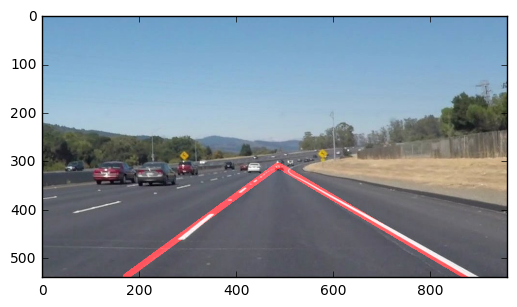

In [13]:
import os
#os.listdir("test_images/")

test_image_list = [mpimg.imread('test_images/'+i) for i in os.listdir('test_images/')]

returned_image = draw_lane_guide(test_image_list[0])

run your solution on all test_images and make copies into the test_images directory).

[[499 317 854 539]]
[[720 465 833 539]]
[[510 327 738 476]]
[[486 311 513 328]]
[[310 423 357 392]]
[[318 425 344 406]]
[[320 425 362 393]]
[[528 336 568 361]]
[[406 358 416 351]]
[[495 317 525 336]]
[[164 526 171 521]]
[[322 414 355 392]]
[[445 330 454 323]]
[[487 305 492 302]]
[[473 314 479 310]]
[[331 416 347 404]]
[[409 359 419 353]]
[[487 307 494 302]]
[[576 369 641 412]]
[[483 306 488 302]]
[[475 310 484 303]]
[[570 362 578 367]]


array([[[180, 196, 209],
        [142, 161, 176],
        [134, 156, 179],
        ..., 
        [136, 154, 178],
        [146, 159, 176],
        [186, 195, 210]],

       [[142, 161, 176],
        [143, 166, 184],
        [134, 160, 183],
        ..., 
        [137, 159, 183],
        [142, 159, 179],
        [148, 161, 178]],

       [[131, 158, 179],
        [133, 161, 183],
        [128, 159, 187],
        ..., 
        [129, 156, 185],
        [136, 158, 182],
        [134, 152, 176]],

       ..., 
       [[120, 121, 125],
        [ 91,  92,  97],
        [ 83,  84,  89],
        ..., 
        [ 88,  89,  93],
        [ 94,  95,  99],
        [120, 121, 125]],

       [[138, 139, 143],
        [105, 106, 110],
        [ 89,  90,  95],
        ..., 
        [ 97,  98, 102],
        [109, 110, 114],
        [139, 140, 144]],

       [[180, 181, 185],
        [140, 141, 145],
        [117, 118, 123],
        ..., 
        [122, 123, 125],
        [140, 141, 143],
        [179, 180,

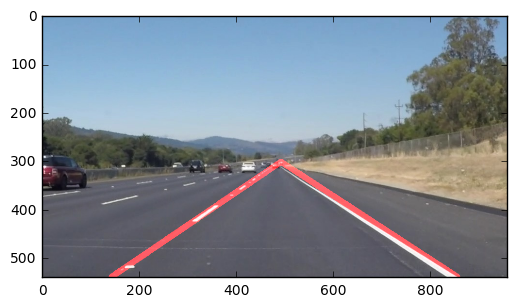

In [14]:
draw_lane_guide(test_image_list[1])

[[274 465 439 341]]
[[262 463 395 370]]
[[154 538 314 426]]
[[400 366 450 327]]
[[605 392 649 419]]
[[612 391 638 406]]
[[493 323 514 335]]
[[256 478 291 451]]
[[413 357 435 340]]
[[525 341 530 344]]
[[174 539 197 522]]
[[550 353 563 361]]
[[224 502 271 465]]
[[605 393 618 401]]
[[549 356 559 362]]
[[625 398 658 417]]
[[353 399 364 391]]
[[181 533 258 475]]
[[769 492 779 498]]
[[477 316 496 316]]
[[429 348 456 324]]
[[525 339 532 343]]
[[551 354 563 362]]
[[393 371 419 351]]


array([[[102, 156, 202],
        [102, 156, 202],
        [102, 156, 202],
        ..., 
        [ 96, 153, 196],
        [ 94, 151, 194],
        [ 88, 145, 188]],

       [[102, 156, 200],
        [102, 156, 200],
        [102, 156, 200],
        ..., 
        [ 96, 153, 196],
        [ 94, 151, 194],
        [ 88, 145, 188]],

       [[102, 157, 198],
        [102, 157, 198],
        [102, 157, 198],
        ..., 
        [ 98, 152, 196],
        [ 96, 150, 194],
        [ 90, 144, 188]],

       ..., 
       [[ 95, 100, 106],
        [ 95, 100, 106],
        [ 95, 100, 106],
        ..., 
        [ 73,  79,  93],
        [ 73,  79,  93],
        [ 73,  79,  93]],

       [[ 95, 100, 106],
        [ 95, 100, 106],
        [ 95, 100, 106],
        ..., 
        [ 71,  77,  91],
        [ 71,  77,  91],
        [ 71,  77,  91]],

       [[ 94,  99, 105],
        [ 94,  99, 105],
        [ 94,  99, 105],
        ..., 
        [ 73,  77,  89],
        [ 73,  77,  89],
        [ 73,  77,

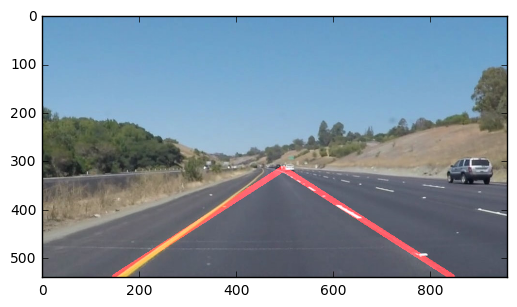

In [15]:
draw_lane_guide(test_image_list[2])


[[159 539 406 360]]
[[410 363 459 326]]
[[249 485 364 396]]
[[786 498 853 539]]
[[377 382 405 361]]
[[536 344 543 348]]
[[413 357 442 334]]
[[700 446 782 497]]
[[494 321 500 324]]
[[178 539 284 457]]
[[159 538 319 422]]
[[499 322 524 336]]
[[538 342 545 346]]
[[410 359 427 345]]
[[756 470 766 476]]
[[722 451 751 467]]
[[387 380 440 339]]
[[337 418 385 380]]
[[573 363 591 373]]
[[569 364 587 376]]
[[700 447 719 459]]
[[832 527 846 536]]
[[441 336 457 324]]
[[743 472 778 494]]
[[536 342 545 347]]
[[303 444 349 408]]
[[380 385 392 375]]
[[712 445 730 455]]


array([[[104, 158, 202],
        [104, 158, 202],
        [104, 158, 202],
        ..., 
        [ 97, 156, 200],
        [ 95, 154, 198],
        [ 93, 152, 196]],

       [[104, 158, 202],
        [104, 158, 202],
        [104, 158, 202],
        ..., 
        [ 96, 155, 199],
        [ 94, 153, 197],
        [ 90, 151, 195]],

       [[103, 157, 201],
        [104, 158, 202],
        [102, 159, 202],
        ..., 
        [ 94, 155, 199],
        [ 92, 153, 197],
        [ 90, 151, 195]],

       ..., 
       [[102, 102, 110],
        [102, 102, 110],
        [102, 102, 110],
        ..., 
        [ 78,  82,  93],
        [ 78,  82,  93],
        [ 78,  82,  93]],

       [[102, 101, 109],
        [102, 101, 109],
        [102, 101, 109],
        ..., 
        [ 78,  82,  91],
        [ 77,  81,  90],
        [ 77,  81,  90]],

       [[ 99,  98, 106],
        [ 99,  98, 106],
        [ 99,  98, 106],
        ..., 
        [ 77,  81,  90],
        [ 77,  81,  90],
        [ 77,  81,

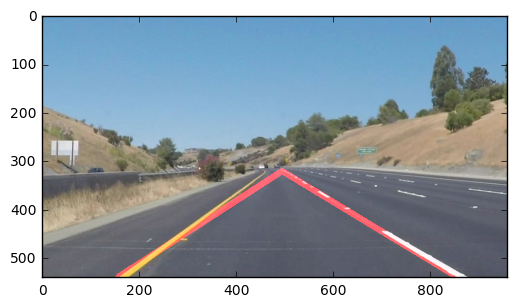

In [16]:
draw_lane_guide(test_image_list[3])


[[172 529 435 338]]
[[436 336 455 322]]
[[244 468 438 332]]
[[195 501 280 442]]
[[661 424 768 493]]
[[730 459 765 480]]
[[672 424 724 456]]
[[392 369 448 328]]
[[501 312 522 328]]
[[530 338 535 341]]
[[560 355 579 366]]
[[450 321 466 308]]
[[157 539 215 497]]
[[559 357 575 368]]
[[349 396 405 356]]
[[532 336 538 340]]
[[409 352 447 325]]
[[756 485 769 493]]
[[691 444 720 463]]
[[510 323 521 330]]
[[671 424 692 437]]
[[481 297 488 302]]
[[271 458 326 419]]
[[492 307 499 312]]


array([[[184, 196, 210],
        [144, 159, 178],
        [132, 154, 177],
        ..., 
        [127, 153, 176],
        [140, 161, 178],
        [183, 199, 214]],

       [[143, 158, 177],
        [144, 162, 184],
        [132, 156, 182],
        ..., 
        [124, 154, 180],
        [137, 159, 180],
        [141, 160, 177]],

       [[131, 153, 176],
        [132, 156, 182],
        [125, 154, 184],
        ..., 
        [117, 150, 181],
        [123, 150, 177],
        [125, 151, 174]],

       ..., 
       [[129, 128, 134],
        [115, 114, 120],
        [110, 109, 115],
        ..., 
        [ 82,  82,  92],
        [ 87,  87,  97],
        [119, 119, 129]],

       [[141, 140, 145],
        [125, 124, 129],
        [115, 114, 119],
        ..., 
        [ 88,  88,  98],
        [106, 106, 114],
        [136, 136, 144]],

       [[176, 175, 180],
        [139, 138, 143],
        [128, 127, 132],
        ..., 
        [119, 119, 127],
        [137, 137, 145],
        [183, 183,

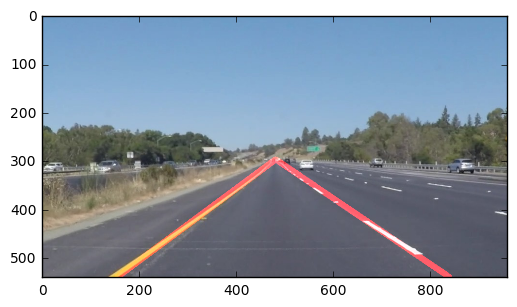

In [17]:
draw_lane_guide(test_image_list[4])


[[246 498 438 348]]
[[281 459 456 331]]
[[175 538 270 469]]
[[582 370 602 382]]
[[743 467 836 523]]
[[505 322 515 328]]
[[507 324 521 332]]
[[584 368 607 381]]
[[273 465 319 432]]
[[194 538 263 486]]
[[496 319 507 326]]
[[796 498 821 513]]
[[423 360 451 339]]
[[487 308 492 311]]
[[418 360 448 338]]
[[507 327 519 334]]
[[248 484 291 453]]
[[495 315 506 322]]
[[545 348 552 352]]


array([[[110, 159, 202],
        [110, 159, 202],
        [110, 159, 202],
        ..., 
        [101, 155, 201],
        [100, 154, 200],
        [ 94, 148, 194]],

       [[110, 159, 202],
        [110, 159, 202],
        [110, 159, 202],
        ..., 
        [101, 155, 201],
        [100, 154, 200],
        [ 94, 148, 194]],

       [[110, 159, 202],
        [110, 159, 202],
        [110, 159, 202],
        ..., 
        [101, 155, 201],
        [100, 154, 200],
        [ 94, 148, 194]],

       ..., 
       [[ 95, 100, 106],
        [ 94,  99, 105],
        [ 94,  99, 105],
        ..., 
        [ 84,  87, 102],
        [ 82,  85, 100],
        [ 79,  82,  97]],

       [[ 94,  99, 105],
        [ 94,  99, 105],
        [ 93,  98, 104],
        ..., 
        [ 84,  88, 100],
        [ 82,  86,  98],
        [ 78,  82,  94]],

       [[ 90,  97, 103],
        [ 89,  96, 102],
        [ 89,  96, 102],
        ..., 
        [ 83,  87,  99],
        [ 81,  85,  97],
        [ 78,  82,

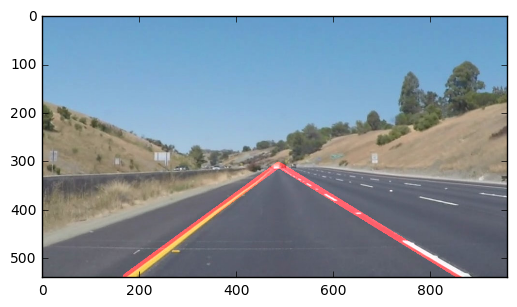

In [18]:
draw_lane_guide(test_image_list[5])


## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

In [19]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [20]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image with lines are drawn on lanes)
    result = draw_lane_guide(image)
    return result

Let's try the one with the solid white lane on the right first ...

[[616 390 817 520]]
[[490 310 766 476]]
[[200 515 311 432]]
[[205 499 291 438]]
[[542 345 614 389]]
[[263 457 301 430]]
[[426 341 432 337]]
[[222 488 261 460]]
[[450 325 457 320]]
[[267 466 310 433]]
[[456 322 463 317]]
[[390 370 406 359]]
[[577 367 612 389]]
[[546 344 567 357]]
[[505 322 569 361]]
[[816 518 849 539]]
[[388 368 404 357]]
[[394 369 406 360]]
[[388 367 400 359]]
[[728 454 775 482]]
[[607 379 623 389]]
[[427 343 433 339]]
[[799 508 848 539]]
[[480 308 488 303]]
[[237 489 290 448]]
[[248 468 302 430]]
[[479 310 488 304]]
[MoviePy] >>>> Building video white.mp4
[MoviePy] Writing video white.mp4


  0%|                                                  | 0/222 [00:00<?, ?it/s]

[[616 390 817 520]]
[[490 310 766 476]]
[[200 515 311 432]]
[[205 499 291 438]]
[[542 345 614 389]]
[[263 457 301 430]]
[[426 341 432 337]]
[[222 488 261 460]]
[[450 325 457 320]]
[[267 466 310 433]]
[[456 322 463 317]]
[[390 370 406 359]]
[[577 367 612 389]]
[[546 344 567 357]]
[[505 322 569 361]]
[[816 518 849 539]]
[[388 368 404 357]]
[[394 369 406 360]]
[[388 367 400 359]]
[[728 454 775 482]]
[[607 379 623 389]]
[[427 343 433 339]]
[[799 508 848 539]]
[[480 308 488 303]]
[[237 489 290 448]]
[[248 468 302 430]]
[[479 310 488 304]]


  0%|▏                                         | 1/222 [00:00<00:39,  5.65it/s]

[[598 379 833 531]]
[[388 373 403 362]]
[[651 407 778 484]]
[[170 539 236 488]]
[[150 539 279 446]]
[[534 337 628 392]]
[[531 337 626 398]]
[[252 476 289 448]]
[[450 324 455 320]]
[[250 466 276 447]]
[[424 343 430 339]]
[[479 310 489 303]]
[[558 352 656 409]]
[[168 539 249 480]]
[[383 371 399 360]]
[[536 338 554 348]]
[[495 316 544 346]]
[[483 309 500 318]]
[[386 374 403 361]]
[[157 533 213 493]]
[[383 372 400 360]]
[[490 310 536 337]]
[[466 310 473 305]]
[[473 312 478 308]]
[[821 522 847 539]]
[[624 391 666 415]]
[[247 481 289 449]]
[[450 325 457 320]]


  1%|▍                                         | 2/222 [00:00<00:34,  6.29it/s]

[[495 313 775 482]]
[[494 315 744 472]]
[[169 539 262 469]]
[[149 539 247 468]]
[[762 485 848 539]]
[[653 407 668 416]]
[[454 321 461 316]]
[[382 378 393 370]]
[[421 344 427 340]]
[[739 470 781 496]]
[[449 325 470 310]]
[[381 378 399 365]]
[[493 311 514 324]]
[[449 327 461 319]]
[[376 376 396 363]]
[[592 371 697 434]]
[[482 307 568 361]]
[[386 374 398 365]]
[[464 315 475 307]]
[[479 310 489 303]]
[[194 507 234 478]]
[[423 346 430 342]]
[[684 435 822 522]]
[[694 433 781 486]]
[[576 363 693 431]]
[[148 539 212 494]]
[[479 304 590 376]]
[[169 539 225 497]]
[[600 381 641 408]]
[[369 381 391 366]]
[[491 310 578 364]]
[[423 347 429 343]]
[[473 307 478 310]]
[[764 486 849 539]]
[[450 328 457 323]]
[[694 441 731 464]]
[[375 383 394 369]]
[[449 326 456 321]]
[[626 397 664 422]]
[[471 304 482 310]]
[[180 530 225 495]]
[[419 346 427 341]]
[[611 383 646 403]]
[[686 428 712 443]]
[[374 383 394 368]]
[[148 538 210 494]]
[[678 431 706 448]]
[[449 325 454 321]]


  2%|▊                                         | 4/222 [00:00<00:31,  6.99it/s]

[[719 457 850 539]]
[[505 319 693 432]]
[[531 337 643 409]]
[[607 380 752 467]]
[[360 388 386 370]]
[[654 416 721 457]]
[[367 389 389 372]]
[[502 319 543 346]]
[[473 310 481 304]]
[[476 309 488 301]]
[[449 325 463 314]]
[[449 328 457 322]]
[[435 337 442 332]]
[[448 326 473 307]]
[[147 539 156 532]]
[[750 467 778 484]]
[[421 349 427 345]]
[[548 349 580 369]]
[[721 449 745 463]]
[[149 538 157 532]]
[[602 382 656 417]]
[[366 389 387 373]]
[[482 307 500 319]]
[[473 312 489 301]]


  2%|▉                                         | 5/222 [00:00<00:31,  6.93it/s]

[[558 355 760 482]]
[[551 347 636 398]]
[[614 384 757 470]]
[[482 307 584 371]]
[[473 312 489 301]]
[[802 510 850 539]]
[[414 349 422 343]]
[[515 325 566 355]]
[[351 393 379 374]]
[[358 395 384 375]]
[[418 350 425 345]]
[[416 348 423 343]]
[[743 472 790 501]]
[[448 325 455 320]]
[[356 395 382 376]]
[[548 345 720 448]]
[[351 394 380 374]]
[[448 326 453 323]]
[[450 328 455 324]]
[[286 444 292 440]]
[[780 496 813 516]]
[[569 362 819 519]]
[[509 321 757 470]]
[[482 307 707 448]]
[[475 308 481 304]]
[[339 403 369 381]]
[[346 403 377 380]]
[[626 391 756 469]]
[[800 508 851 539]]
[[339 401 373 378]]
[[254 463 260 459]]
[[347 403 377 381]]
[[448 328 456 323]]
[[473 311 488 300]]
[[411 352 420 345]]
[[450 328 455 324]]
[[411 350 419 345]]


  3%|█▎                                        | 7/222 [00:00<00:26,  8.08it/s]

[[572 364 852 539]]
[[600 377 722 448]]
[[523 332 571 362]]
[[333 413 370 385]]
[[326 410 366 383]]
[[487 308 544 341]]
[[550 346 578 362]]
[[563 358 591 375]]
[[552 351 574 364]]
[[516 329 540 343]]
[[447 329 456 323]]
[[473 303 478 306]]
[[331 413 368 386]]
[[561 353 644 402]]
[[528 333 555 348]]
[[705 439 756 469]]
[[473 312 489 301]]
[[326 411 348 396]]
[[408 353 417 346]]
[[413 354 421 348]]
[[784 496 848 536]]
[[469 311 485 300]]
[[446 327 454 321]]
[[482 305 487 301]]
[[467 311 475 305]]
[[216 491 221 488]]
[[491 311 524 333]]
[[467 312 478 304]]


  4%|█▌                                        | 8/222 [00:00<00:27,  7.85it/s]

[[576 367 818 519]]
[[515 325 775 482]]
[[319 424 349 402]]
[[482 307 521 331]]
[[309 423 356 390]]
[[655 409 760 472]]
[[513 327 575 365]]
[[317 425 361 392]]
[[805 512 850 539]]
[[445 328 453 322]]
[[446 329 455 323]]
[[473 312 478 308]]
[[405 355 415 348]]
[[408 357 418 350]]
[[498 314 595 373]]
[[766 487 808 513]]
[[546 346 806 503]]
[[576 369 762 486]]
[[291 437 336 406]]
[[300 440 351 401]]
[[506 324 558 356]]
[[614 394 846 539]]
[[445 329 475 307]]
[[521 331 579 365]]
[[306 426 346 399]]
[[401 359 412 352]]
[[718 449 793 494]]
[[406 361 416 354]]
[[515 327 548 346]]
[[289 440 310 425]]
[[549 351 573 367]]
[[474 314 482 309]]
[[401 361 413 352]]
[[312 430 348 403]]
[[481 311 489 306]]


  5%|█▊                                       | 10/222 [00:01<00:24,  8.49it/s]

[[597 380 852 534]]
[[705 453 838 539]]
[[477 307 693 447]]
[[401 366 413 357]]
[[273 461 339 411]]
[[470 314 480 307]]
[[531 338 571 364]]
[[444 332 465 317]]
[[283 444 333 410]]
[[692 445 742 478]]
[[397 365 412 356]]
[[277 459 339 412]]
[[768 493 839 539]]
[[263 459 291 440]]
[[403 366 411 360]]
[[530 341 547 351]]
[[552 351 599 380]]
[[398 364 410 356]]
[[263 458 309 427]]
[[611 393 661 426]]
[[431 345 436 342]]
[[498 317 532 340]]
[[547 352 579 372]]
[[397 364 409 356]]
[[474 314 489 304]]
[[481 313 489 308]]


  5%|██                                       | 11/222 [00:01<00:24,  8.62it/s]

[[482 311 639 413]]
[[653 415 763 483]]
[[751 486 836 539]]
[[230 482 317 421]]
[[783 494 853 537]]
[[543 346 587 375]]
[[258 473 314 430]]
[[670 433 724 469]]
[[493 315 547 350]]
[[229 483 318 421]]
[[458 323 470 314]]
[[610 388 635 405]]
[[654 416 667 425]]
[[281 456 325 423]]
[[631 409 681 441]]
[[452 330 458 325]]
[[443 334 463 319]]
[[397 370 410 361]]
[[241 485 282 454]]
[[742 479 782 505]]
[[516 334 540 349]]
[[559 356 622 397]]
[[473 316 478 312]]
[[396 370 409 361]]
[[450 328 473 311]]
[[640 407 659 420]]
[[393 367 406 359]]
[[712 460 740 479]]
[[619 401 637 412]]
[[725 459 797 503]]
[[453 330 458 326]]
[[475 312 481 308]]


  5%|██▏                                      | 12/222 [00:01<00:24,  8.40it/s]

[[482 310 619 399]]
[[487 311 784 496]]
[[716 464 835 539]]
[[199 503 232 480]]
[[199 515 307 434]]
[[183 513 298 433]]
[[766 484 855 539]]
[[624 404 676 437]]
[[694 450 741 479]]
[[425 346 432 341]]
[[448 328 462 318]]
[[387 371 404 360]]
[[442 333 474 310]]
[[252 476 284 452]]
[[473 315 478 311]]
[[392 372 406 362]]
[[599 387 641 414]]
[[388 370 403 360]]
[[671 435 704 455]]
[[795 501 857 539]]
[[606 390 835 539]]
[[482 308 620 398]]
[[150 534 274 447]]
[[510 324 814 514]]
[[255 470 285 448]]
[[449 326 462 316]]
[[163 539 239 482]]
[[214 502 285 449]]
[[473 314 479 310]]
[[427 345 432 342]]
[[166 523 226 482]]
[[381 372 399 361]]
[[387 374 402 362]]
[[451 327 464 318]]
[[165 538 280 452]]
[[553 355 663 427]]
[[456 321 475 307]]
[[458 320 469 312]]
[[494 312 539 342]]
[[209 493 277 446]]
[[382 373 400 361]]
[[737 477 792 512]]


  6%|██▌                                      | 14/222 [00:01<00:23,  8.85it/s]

[[496 313 708 446]]
[[634 407 837 539]]
[[469 305 476 309]]
[[518 331 562 358]]
[[141 539 246 465]]
[[800 504 858 539]]
[[161 539 258 466]]
[[610 391 633 405]]
[[706 446 818 514]]
[[375 375 386 367]]
[[595 381 618 395]]
[[160 539 248 473]]
[[698 450 835 539]]
[[425 345 430 342]]
[[387 373 399 364]]
[[449 326 464 316]]
[[589 377 606 387]]
[[468 311 480 303]]
[[517 327 753 474]]
[[380 377 392 368]]
[[422 343 428 339]]
[[232 474 244 466]]
[[492 313 526 335]]
[[448 326 470 309]]
[[375 376 396 362]]
[[448 325 466 311]]
[[648 416 666 427]]
[[543 347 600 383]]
[[483 303 488 300]]


  7%|██▊                                      | 15/222 [00:01<00:24,  8.53it/s]

[[616 392 810 522]]
[[514 323 859 539]]
[[486 307 538 342]]
[[375 379 394 366]]
[[489 308 596 380]]
[[368 379 388 364]]
[[157 539 221 492]]
[[607 386 672 431]]
[[448 324 454 320]]
[[180 521 221 491]]
[[674 432 742 477]]
[[448 322 470 306]]
[[422 345 428 341]]
[[598 380 632 404]]
[[473 310 481 304]]
[[797 512 835 538]]
[[373 380 387 370]]
[[551 349 605 386]]
[[455 318 475 303]]
[[490 307 526 330]]
[[368 378 389 364]]
[[419 344 427 339]]
[[625 397 826 532]]
[[512 321 858 538]]
[[561 356 611 388]]
[[154 539 169 528]]
[[489 308 558 354]]
[[367 385 390 368]]
[[483 301 488 298]]
[[506 316 541 339]]
[[417 344 423 340]]
[[360 384 385 367]]
[[365 385 382 373]]
[[421 346 427 342]]
[[742 475 838 539]]
[[359 383 382 368]]
[[419 346 427 341]]
[[543 340 674 422]]
[[447 324 455 318]]
[[470 307 479 301]]
[[510 323 528 335]]
[[447 323 454 318]]
[[496 314 515 326]]


  8%|███▏                                     | 17/222 [00:01<00:22,  9.11it/s]

[[521 328 553 348]]
[[511 321 858 538]]
[[492 311 663 423]]
[[679 435 838 539]]
[[655 419 705 451]]
[[361 384 381 371]]
[[358 392 384 373]]
[[350 390 377 372]]
[[350 391 378 372]]
[[437 334 442 331]]
[[473 310 481 304]]
[[370 384 383 374]]
[[447 324 455 319]]
[[470 308 475 305]]
[[617 394 649 414]]
[[449 326 456 321]]
[[418 349 425 344]]
[[467 309 472 305]]
[[573 366 744 478]]
[[497 313 856 538]]
[[596 376 856 539]]
[[499 318 575 366]]
[[772 498 830 535]]
[[754 486 801 516]]
[[348 401 378 379]]
[[339 400 358 388]]
[[414 352 423 346]]
[[470 310 476 306]]
[[340 399 372 378]]
[[412 350 420 345]]
[[482 306 522 332]]
[[706 454 756 486]]
[[412 351 421 345]]
[[416 352 423 347]]
[[533 340 667 427]]
[[467 309 475 303]]


  9%|███▌                                     | 19/222 [00:02<00:21,  9.60it/s]

[[645 407 855 538]]
[[482 308 700 450]]
[[639 411 830 536]]
[[494 312 573 363]]
[[609 384 659 417]]
[[326 410 362 385]]
[[332 413 363 391]]
[[572 362 638 404]]
[[335 412 371 386]]
[[215 489 220 485]]
[[332 407 360 388]]
[[552 349 622 393]]
[[409 355 419 348]]
[[493 312 553 351]]
[[411 356 421 349]]
[[445 328 454 322]]
[[214 488 225 481]]
[[752 475 819 516]]
[[409 354 418 348]]
[[487 306 494 301]]
[[446 329 455 323]]
[[351 400 369 387]]
[[483 305 489 301]]


  9%|███▋                                     | 20/222 [00:02<00:21,  9.42it/s]

[[499 317 854 539]]
[[513 329 749 483]]
[[761 492 811 524]]
[[310 423 356 392]]
[[320 425 363 392]]
[[487 305 492 302]]
[[409 359 419 352]]
[[648 418 774 500]]
[[406 359 417 351]]
[[487 306 493 302]]
[[485 311 525 336]]
[[473 314 479 310]]
[[355 400 363 394]]
[[433 339 438 336]]
[[468 314 480 306]]
[[468 313 476 307]]
[[487 307 494 302]]
[[794 514 831 537]]
[[476 310 482 306]]
[[445 329 453 324]]
[[578 371 620 398]]


  9%|███▉                                     | 21/222 [00:02<00:21,  9.21it/s]

[[500 318 854 539]]
[[492 315 683 440]]
[[482 311 488 315]]
[[615 396 835 539]]
[[444 331 481 303]]
[[402 360 413 353]]
[[300 439 352 401]]
[[311 422 345 400]]
[[290 437 341 403]]
[[299 439 324 421]]
[[405 362 415 355]]
[[433 342 438 338]]
[[476 309 484 303]]
[[457 322 472 311]]
[[473 314 479 310]]
[[453 327 463 320]]
[[680 430 855 539]]
[[483 306 488 302]]
[[476 310 482 306]]


 10%|████                                     | 22/222 [00:02<00:21,  9.44it/s]

[[500 317 855 539]]
[[494 316 685 441]]
[[671 433 834 539]]
[[473 312 488 302]]
[[264 454 326 413]]
[[290 447 341 409]]
[[275 457 310 431]]
[[430 341 435 338]]
[[443 331 476 307]]
[[377 381 382 378]]
[[530 337 578 367]]
[[699 451 757 488]]
[[327 411 332 408]]
[[400 362 410 355]]
[[432 343 437 340]]
[[405 362 414 356]]
[[298 431 331 409]]
[[401 365 413 357]]
[[487 306 493 302]]
[[475 303 480 306]]
[[518 328 855 539]]
[[520 333 722 465]]
[[651 419 835 539]]
[[487 304 492 301]]
[[233 475 319 417]]
[[263 466 327 418]]
[[394 365 407 356]]
[[451 325 474 308]]
[[499 319 549 351]]
[[243 479 305 434]]
[[473 310 484 302]]
[[313 430 327 419]]
[[232 477 261 457]]
[[398 367 411 358]]
[[488 306 496 301]]
[[481 310 495 301]]
[[483 305 489 301]]
[[394 366 405 358]]
[[494 312 507 320]]
[[295 443 324 421]]
[[473 313 482 307]]
[[573 367 623 399]]
[[510 323 524 331]]


 11%|████▍                                    | 24/222 [00:02<00:20,  9.56it/s]

[[523 331 855 539]]
[[501 320 711 457]]
[[245 468 301 429]]
[[473 307 481 301]]
[[201 510 310 431]]
[[751 485 817 527]]
[[389 369 405 358]]
[[575 363 727 458]]
[[218 485 293 434]]
[[718 463 768 495]]
[[202 497 233 476]]
[[450 326 474 308]]
[[474 302 485 309]]
[[472 310 484 301]]
[[492 313 631 404]]
[[256 471 308 433]]
[[393 370 407 361]]
[[429 344 434 340]]
[[394 364 403 358]]
[[487 304 493 300]]
[[500 316 526 332]]
[[700 451 732 471]]
[[389 368 404 358]]
[[476 309 487 301]]
[[468 310 480 301]]
[[186 507 263 455]]
[[797 515 836 539]]


 11%|████▌                                    | 25/222 [00:02<00:20,  9.47it/s]

[[529 335 855 539]]
[[527 337 743 478]]
[[186 522 264 464]]
[[450 325 472 309]]
[[189 505 278 445]]
[[570 360 770 485]]
[[145 536 233 476]]
[[741 478 834 539]]
[[161 539 231 488]]
[[482 307 628 402]]
[[383 372 401 360]]
[[473 312 489 301]]
[[427 345 433 340]]
[[384 373 402 360]]
[[387 374 404 361]]
[[714 460 756 487]]
[[229 491 289 446]]
[[500 316 528 333]]
[[458 322 465 317]]
[[237 473 267 453]]
[[389 374 404 363]]
[[453 326 466 317]]
[[661 425 832 537]]
[[521 330 855 539]]
[[164 539 209 506]]
[[426 347 432 343]]
[[551 352 647 416]]
[[143 538 207 494]]
[[594 375 855 538]]
[[210 505 260 468]]
[[149 535 193 504]]
[[495 312 515 326]]
[[487 309 555 356]]
[[377 377 397 364]]
[[471 311 484 301]]
[[456 321 481 302]]
[[622 398 715 460]]
[[384 378 400 366]]
[[381 379 399 366]]
[[487 305 495 300]]
[[382 373 395 364]]
[[204 497 247 466]]
[[476 309 487 301]]
[[785 507 834 539]]
[[162 539 231 489]]
[[457 323 466 317]]
[[517 326 541 342]]


 12%|████▉                                    | 27/222 [00:02<00:20,  9.62it/s]

[[517 327 856 539]]
[[518 331 743 478]]
[[163 539 226 493]]
[[147 536 190 507]]
[[607 383 856 538]]
[[776 501 836 539]]
[[371 381 393 367]]
[[141 539 196 502]]
[[471 311 480 304]]
[[457 323 462 320]]
[[449 327 455 323]]
[[473 312 489 301]]
[[378 383 395 370]]
[[705 454 760 489]]
[[490 312 543 347]]
[[456 321 478 304]]
[[503 318 528 333]]
[[327 416 332 412]]
[[421 347 427 342]]
[[325 416 331 412]]
[[464 316 474 308]]
[[729 470 802 517]]
[[474 313 482 307]]
[[449 326 459 318]]
[[374 384 395 369]]


 13%|█████▏                                   | 28/222 [00:03<00:20,  9.35it/s]

[[590 373 856 539]]
[[538 345 811 523]]
[[700 451 835 539]]
[[362 387 386 371]]
[[493 311 614 389]]
[[369 389 390 373]]
[[362 389 385 372]]
[[448 327 476 305]]
[[521 333 555 355]]
[[421 350 428 345]]
[[490 311 498 317]]
[[456 324 466 317]]
[[163 528 168 525]]
[[455 322 474 308]]
[[501 320 523 333]]
[[143 538 159 528]]
[[368 389 389 374]]
[[418 349 426 343]]
[[474 312 489 301]]
[[591 379 641 411]]
[[362 388 373 380]]
[[473 311 478 307]]
[[481 309 495 300]]
[[475 301 482 305]]
[[536 340 551 349]]
[[366 390 373 385]]


 13%|█████▎                                   | 29/222 [00:03<00:21,  8.90it/s]

[[628 403 837 539]]
[[540 342 644 407]]
[[630 397 858 539]]
[[510 324 625 401]]
[[357 396 376 382]]
[[352 394 379 375]]
[[589 372 857 539]]
[[419 351 426 346]]
[[491 312 505 321]]
[[360 395 385 376]]
[[521 329 548 346]]
[[449 328 461 320]]
[[448 327 478 304]]
[[539 345 573 367]]
[[352 395 381 374]]
[[597 382 645 414]]
[[361 394 385 375]]
[[482 307 490 311]]
[[437 336 442 332]]
[[502 317 523 329]]
[[416 349 423 344]]


 14%|█████▌                                   | 30/222 [00:03<00:20,  9.15it/s]

[[632 398 859 539]]
[[727 468 836 539]]
[[500 318 539 343]]
[[494 310 538 340]]
[[552 353 610 390]]
[[544 344 648 409]]
[[341 401 374 378]]
[[347 403 379 380]]
[[699 449 741 476]]
[[576 369 650 416]]
[[471 310 484 300]]
[[415 353 424 346]]
[[650 417 687 440]]
[[498 316 522 331]]
[[351 400 379 379]]
[[413 350 421 345]]
[[448 328 457 322]]
[[447 326 474 306]]
[[546 345 593 374]]
[[671 431 713 457]]
[[475 308 487 300]]
[[621 391 688 434]]
[[474 310 489 300]]
[[754 485 804 517]]


 14%|█████▋                                   | 31/222 [00:03<00:21,  8.99it/s]

[[503 317 855 537]]
[[553 354 838 539]]
[[526 335 756 485]]
[[475 308 482 303]]
[[412 355 421 348]]
[[219 487 225 483]]
[[467 309 473 304]]
[[468 309 480 300]]
[[335 412 371 386]]
[[328 409 364 384]]
[[538 340 682 430]]
[[445 327 465 313]]
[[457 319 480 303]]
[[410 353 420 346]]
[[473 311 488 300]]
[[411 351 418 346]]
[[473 312 482 306]]
[[216 486 227 479]]
[[471 310 481 303]]
[[810 508 859 539]]
[[482 309 499 298]]
[[511 324 534 340]]
[[812 510 858 539]]
[[548 350 838 539]]
[[726 456 859 539]]
[[522 332 633 405]]
[[534 337 766 482]]
[[407 354 417 347]]
[[311 420 358 389]]
[[454 321 474 306]]
[[319 423 363 391]]
[[528 333 551 347]]
[[636 407 721 462]]
[[482 306 499 316]]
[[502 316 539 339]]
[[445 328 451 323]]
[[322 422 361 393]]
[[408 357 420 349]]
[[471 307 478 302]]
[[311 421 351 394]]
[[669 421 721 453]]
[[446 328 454 323]]
[[167 521 172 518]]
[[473 311 488 300]]
[[467 309 478 301]]


 15%|██████                                   | 33/222 [00:03<00:19,  9.52it/s]

[[571 366 837 539]]
[[811 509 859 539]]
[[526 332 830 522]]
[[302 437 351 400]]
[[292 435 347 397]]
[[474 301 551 351]]
[[423 344 430 339]]
[[424 344 437 335]]
[[473 309 481 303]]
[[685 431 855 537]]
[[304 436 312 430]]
[[444 328 477 304]]
[[619 397 677 434]]
[[320 424 353 399]]
[[493 310 504 317]]
[[308 423 344 398]]
[[558 356 588 377]]
[[403 357 413 350]]
[[476 300 482 304]]
[[497 313 547 345]]
[[403 359 414 350]]
[[587 376 626 401]]
[[668 422 856 539]]
[[555 356 836 539]]
[[593 375 674 427]]
[[267 453 333 407]]
[[561 356 603 382]]
[[279 455 342 407]]
[[475 303 528 336]]
[[610 393 835 539]]
[[740 466 857 539]]
[[468 310 473 306]]
[[431 341 436 338]]
[[531 336 560 354]]
[[474 311 489 301]]
[[450 325 481 302]]
[[399 361 410 353]]
[[499 314 517 327]]
[[401 360 409 354]]
[[501 320 551 352]]
[[443 330 464 314]]
[[473 310 481 304]]
[[402 363 414 355]]
[[399 362 412 353]]
[[453 325 460 321]]
[[467 310 479 301]]
[[494 311 501 316]]
[[597 379 620 393]]
[[636 402 692 438]]
[[516 326 545 344]]


 16%|██████▍                                  | 35/222 [00:03<00:19,  9.60it/s]

[[530 336 855 539]]
[[582 375 834 539]]
[[551 350 762 482]]
[[249 478 328 419]]
[[482 307 553 354]]
[[235 476 292 437]]
[[280 444 320 417]]
[[451 325 471 310]]
[[553 355 587 377]]
[[395 366 408 356]]
[[395 365 407 356]]
[[429 343 434 339]]
[[397 367 412 357]]
[[495 313 532 336]]
[[248 478 320 424]]
[[573 369 623 401]]
[[265 455 309 425]]
[[792 499 844 532]]
[[451 326 456 323]]
[[453 326 459 322]]
[[548 352 693 447]]
[[536 340 658 417]]
[[560 356 781 494]]
[[192 507 302 430]]
[[393 371 406 361]]
[[716 463 790 510]]
[[287 450 311 432]]
[[442 331 476 308]]
[[209 508 260 469]]
[[502 318 562 356]]
[[762 481 812 513]]
[[192 506 298 432]]
[[682 441 755 487]]
[[204 510 242 482]]
[[525 336 590 379]]
[[390 368 406 358]]
[[453 325 462 318]]
[[641 414 659 425]]
[[806 508 837 528]]
[[236 488 311 431]]
[[804 520 835 539]]
[[452 327 459 322]]
[[648 419 679 438]]
[[788 497 822 519]]
[[490 312 514 329]]
[[397 363 405 358]]
[[824 519 855 539]]
[[428 344 433 340]]


 17%|██████▊                                  | 37/222 [00:03<00:19,  9.69it/s]

[[584 376 835 539]]
[[494 312 551 348]]
[[573 364 797 504]]
[[169 537 291 445]]
[[538 341 855 539]]
[[452 327 457 323]]
[[146 539 280 445]]
[[552 354 651 419]]
[[145 539 225 483]]
[[384 374 401 361]]
[[425 345 432 340]]
[[222 498 291 446]]
[[470 311 480 304]]
[[491 312 543 348]]
[[389 374 405 361]]
[[384 373 400 361]]
[[263 468 291 447]]
[[384 372 395 364]]
[[441 333 457 320]]
[[473 313 482 307]]


 17%|███████                                  | 38/222 [00:04<00:19,  9.37it/s]

[[829 522 855 538]]
[[524 331 590 373]]
[[491 312 704 455]]
[[148 537 253 464]]
[[670 431 781 505]]
[[572 362 612 387]]
[[167 538 264 465]]
[[518 326 541 341]]
[[641 405 728 461]]
[[755 476 830 524]]
[[424 346 430 341]]
[[711 449 749 474]]
[[383 378 400 365]]
[[625 395 653 414]]
[[378 376 396 363]]
[[787 509 835 539]]
[[450 325 472 309]]
[[556 352 621 394]]
[[488 308 561 354]]
[[473 312 478 309]]
[[251 476 264 466]]
[[734 473 762 492]]
[[452 326 458 322]]
[[482 310 496 301]]
[[163 539 169 535]]
[[144 539 250 465]]
[[164 539 220 498]]
[[780 504 829 535]]
[[745 470 770 487]]
[[224 496 260 469]]


 18%|███████▏                                 | 39/222 [00:04<00:22,  8.21it/s]

[[608 385 832 525]]
[[511 324 755 488]]
[[768 495 834 539]]
[[144 538 214 489]]
[[163 539 229 491]]
[[818 515 855 538]]
[[493 310 544 342]]
[[482 306 488 310]]
[[710 457 754 487]]
[[490 310 681 439]]
[[372 380 393 365]]
[[759 489 798 516]]
[[510 321 637 403]]
[[451 326 456 322]]
[[375 382 396 367]]
[[422 347 428 343]]
[[471 310 477 306]]
[[468 312 476 306]]
[[472 312 478 308]]
[[374 379 392 366]]
[[630 398 855 539]]
[[449 324 455 320]]
[[478 309 493 300]]
[[377 382 394 369]]


 18%|███████▍                                 | 40/222 [00:04<00:21,  8.29it/s]

[[502 319 559 355]]
[[584 374 735 473]]
[[597 376 701 443]]
[[520 326 604 382]]
[[606 388 623 399]]
[[727 469 834 539]]
[[484 300 489 303]]
[[745 469 829 523]]
[[449 326 457 320]]
[[363 386 388 368]]
[[145 537 157 529]]
[[695 438 736 465]]
[[368 387 390 372]]
[[799 503 855 539]]
[[468 306 475 310]]
[[464 311 471 306]]
[[493 309 515 324]]
[[417 346 424 341]]
[[683 440 733 472]]
[[162 539 180 525]]
[[551 351 577 368]]
[[472 312 479 307]]
[[497 315 529 335]]
[[450 326 457 321]]
[[474 309 486 300]]
[[141 539 162 524]]
[[161 539 168 534]]
[[475 307 480 303]]
[[497 311 570 360]]
[[379 379 391 369]]
[[420 348 427 343]]
[[167 536 180 526]]
[[740 466 768 485]]
[[448 325 455 320]]


 18%|███████▌                                 | 41/222 [00:04<00:24,  7.27it/s]

[[500 317 544 345]]
[[649 409 733 463]]
[[518 329 719 464]]
[[638 402 666 421]]
[[718 462 772 499]]
[[523 328 606 383]]
[[689 434 768 485]]
[[765 493 819 530]]
[[430 338 440 330]]
[[417 349 424 344]]
[[361 393 385 374]]
[[354 391 379 373]]
[[559 351 620 392]]
[[799 503 843 532]]
[[605 381 625 395]]
[[737 464 784 495]]
[[450 324 476 305]]
[[691 444 709 457]]
[[449 326 455 322]]
[[806 520 835 539]]
[[284 441 291 436]]
[[472 311 478 307]]
[[483 305 489 301]]
[[354 392 372 379]]
[[633 399 647 409]]
[[494 309 563 355]]
[[356 390 382 372]]
[[539 342 572 364]]
[[463 311 471 305]]
[[414 348 422 342]]


 19%|███████▊                                 | 42/222 [00:04<00:25,  7.09it/s]

[[586 370 854 538]]
[[491 310 767 496]]
[[566 357 655 413]]
[[348 401 379 378]]
[[757 488 834 539]]
[[343 398 376 376]]
[[479 303 491 311]]
[[503 316 542 340]]
[[447 325 455 319]]
[[586 375 699 451]]
[[411 349 419 343]]
[[257 459 264 454]]
[[428 339 435 334]]
[[351 392 372 377]]
[[257 460 265 454]]
[[474 309 488 299]]
[[351 400 379 379]]
[[515 324 585 368]]
[[360 386 375 376]]
[[471 312 489 299]]
[[450 326 456 322]]


 19%|███████▉                                 | 43/222 [00:04<00:23,  7.52it/s]

[[515 326 810 524]]
[[493 309 641 405]]
[[689 434 793 501]]
[[446 325 454 319]]
[[330 407 367 381]]
[[338 409 372 383]]
[[621 391 646 408]]
[[836 526 856 539]]
[[632 398 679 429]]
[[223 484 228 481]]
[[447 326 455 321]]
[[336 409 370 384]]
[[813 512 850 536]]
[[340 399 366 381]]
[[829 535 835 539]]
[[475 306 481 302]]
[[410 353 420 346]]
[[704 444 717 453]]
[[801 517 833 539]]
[[607 389 681 438]]
[[411 353 420 347]]
[[645 406 706 446]]
[[485 306 526 334]]
[[775 489 817 515]]
[[408 350 418 344]]
[[448 326 454 322]]
[[435 335 440 331]]
[[221 483 230 477]]


 20%|████████▏                                | 44/222 [00:04<00:24,  7.23it/s]

[[669 423 854 539]]
[[490 310 792 513]]
[[543 342 625 394]]
[[315 417 358 387]]
[[322 420 364 389]]
[[620 391 648 410]]
[[408 355 417 349]]
[[518 325 556 350]]
[[796 514 832 539]]
[[445 325 452 320]]
[[770 497 800 518]]
[[324 411 359 387]]
[[445 328 454 322]]
[[558 355 575 366]]
[[647 409 855 539]]
[[470 312 478 306]]
[[314 419 345 397]]
[[470 309 475 305]]
[[737 475 785 508]]
[[637 402 671 423]]
[[472 311 481 305]]
[[531 333 548 344]]
[[482 306 489 311]]


 20%|████████▎                                | 45/222 [00:05<00:23,  7.61it/s]

[[494 313 546 346]]
[[526 334 773 500]]
[[539 338 720 455]]
[[724 456 816 515]]
[[526 330 579 365]]
[[303 434 354 396]]
[[295 431 329 408]]
[[772 499 835 539]]
[[799 503 855 539]]
[[309 421 346 395]]
[[676 426 716 452]]
[[594 374 622 393]]
[[317 416 347 395]]
[[403 358 414 351]]
[[470 312 478 307]]
[[306 433 352 398]]
[[444 327 453 321]]
[[709 456 763 493]]
[[476 308 481 305]]
[[513 322 543 342]]
[[295 432 307 424]]
[[648 409 663 419]]


 21%|████████▍                                | 46/222 [00:05<00:23,  7.47it/s]

[[523 331 825 534]]
[[580 364 738 466]]
[[270 449 337 402]]
[[495 310 542 341]]
[[284 449 341 405]]
[[714 450 856 539]]
[[528 331 584 368]]
[[472 309 477 305]]
[[401 360 411 353]]
[[792 511 833 539]]
[[491 311 519 330]]
[[281 450 318 422]]
[[471 311 481 305]]
[[443 327 451 321]]
[[471 308 476 305]]
[[312 428 343 404]]
[[322 411 334 403]]
[[400 360 411 352]]
[[396 358 409 350]]
[[815 526 834 539]]


 21%|████████▋                                | 47/222 [00:05<00:24,  7.21it/s]

[[757 488 833 539]]
[[624 394 854 538]]
[[240 469 322 412]]
[[527 334 832 539]]
[[397 363 409 354]]
[[508 320 654 412]]
[[252 472 329 414]]
[[548 349 729 471]]
[[391 362 404 353]]
[[392 362 406 353]]
[[442 329 475 305]]
[[489 309 512 326]]
[[501 315 553 347]]
[[525 333 559 356]]
[[395 364 403 358]]
[[398 363 409 355]]


 22%|████████▊                                | 48/222 [00:05<00:23,  7.38it/s]

[[534 339 831 539]]
[[567 358 713 450]]
[[197 499 303 425]]
[[211 502 313 426]]
[[507 320 644 406]]
[[513 326 736 476]]
[[745 470 823 520]]
[[390 368 405 357]]
[[450 324 477 304]]
[[718 453 765 484]]
[[441 329 460 316]]
[[471 312 481 306]]
[[825 520 854 539]]
[[391 362 402 355]]
[[386 366 403 355]]
[[493 310 503 316]]
[[503 317 533 335]]
[[392 367 403 359]]
[[471 309 479 303]]
[[472 310 486 300]]


 22%|█████████                                | 49/222 [00:05<00:22,  7.61it/s]

[[531 337 831 539]]
[[570 360 732 462]]
[[449 324 479 303]]
[[221 494 292 441]]
[[513 326 770 499]]
[[493 310 575 362]]
[[149 533 283 439]]
[[735 464 822 520]]
[[160 539 186 519]]
[[507 320 549 346]]
[[826 521 853 539]]
[[471 312 481 306]]
[[162 538 210 501]]
[[381 369 399 358]]
[[386 371 401 359]]
[[554 349 615 388]]
[[425 343 431 338]]
[[244 476 283 447]]
[[192 516 225 490]]
[[216 485 242 467]]
[[596 375 663 418]]
[[384 372 401 361]]


 23%|█████████▏                               | 50/222 [00:05<00:24,  6.89it/s]

[[658 416 854 539]]
[[594 379 832 539]]
[[481 307 488 311]]
[[500 318 537 341]]
[[503 317 657 414]]
[[159 539 226 489]]
[[447 325 463 313]]
[[684 432 726 458]]
[[378 376 389 368]]
[[538 343 582 371]]
[[231 487 266 460]]
[[422 344 429 340]]
[[421 342 427 338]]
[[195 500 255 458]]
[[179 525 261 463]]
[[515 328 543 346]]
[[376 372 394 361]]
[[575 367 613 393]]
[[455 320 480 303]]
[[374 375 388 365]]
[[387 371 397 363]]
[[586 374 629 404]]
[[595 376 647 408]]
[[651 418 706 456]]


 23%|█████████▍                               | 51/222 [00:05<00:24,  6.99it/s]

[[526 334 831 539]]
[[563 355 717 452]]
[[373 380 391 367]]
[[738 465 853 539]]
[[157 539 232 483]]
[[478 304 503 319]]
[[502 316 661 416]]
[[368 377 388 364]]
[[448 325 477 304]]
[[372 380 392 366]]
[[499 317 546 348]]
[[722 455 778 492]]
[[367 379 390 364]]
[[472 310 486 300]]
[[472 312 477 309]]
[[483 303 488 300]]
[[174 527 232 484]]
[[370 381 391 366]]
[[418 343 424 339]]
[[540 343 831 539]]
[[687 434 854 539]]
[[504 318 692 436]]
[[489 311 536 342]]
[[447 325 458 317]]
[[363 386 386 370]]
[[156 539 185 517]]
[[471 312 488 301]]
[[705 445 747 471]]
[[415 345 422 341]]
[[358 384 381 368]]
[[365 386 387 370]]
[[480 304 486 300]]
[[361 383 384 368]]
[[554 353 608 390]]
[[453 320 458 316]]
[[449 326 456 321]]
[[156 538 169 528]]
[[471 310 476 306]]


 24%|█████████▊                               | 53/222 [00:06<00:21,  7.70it/s]

[[533 339 828 537]]
[[502 317 728 459]]
[[486 308 557 356]]
[[348 391 377 372]]
[[354 393 380 374]]
[[780 492 853 539]]
[[446 325 468 310]]
[[751 475 798 504]]
[[721 466 742 480]]
[[525 334 659 424]]
[[453 321 464 313]]
[[471 312 477 308]]
[[435 334 440 331]]
[[418 348 424 344]]
[[415 349 423 344]]
[[469 310 479 303]]
[[505 319 755 476]]
[[593 380 712 458]]
[[726 469 833 539]]
[[493 314 551 351]]
[[470 305 477 309]]
[[447 325 458 317]]
[[575 368 602 385]]
[[471 310 480 304]]
[[410 350 418 344]]
[[412 351 421 344]]
[[742 468 840 531]]
[[470 310 479 303]]
[[446 328 455 322]]
[[343 401 374 379]]
[[650 411 697 440]]
[[710 458 749 483]]
[[337 399 358 385]]
[[510 326 592 378]]
[[480 309 488 304]]
[[481 306 488 301]]
[[815 514 853 539]]
[[345 393 365 380]]
[[471 312 476 308]]
[[445 326 456 318]]
[[493 311 595 375]]
[[414 351 421 346]]


 25%|██████████▏                              | 55/222 [00:06<00:21,  7.64it/s]

[[493 312 617 390]]
[[615 396 771 498]]
[[521 334 568 363]]
[[555 356 592 379]]
[[723 456 852 539]]
[[678 428 779 493]]
[[323 409 356 387]]
[[455 324 463 318]]
[[330 411 366 386]]
[[795 514 830 539]]
[[772 499 809 525]]
[[507 325 548 350]]
[[453 324 458 321]]
[[671 425 690 436]]
[[479 310 488 304]]
[[473 303 486 311]]
[[631 400 647 409]]
[[584 375 699 450]]
[[337 399 361 383]]
[[480 305 485 301]]
[[468 312 479 304]]
[[471 313 485 304]]
[[471 311 476 308]]
[[329 411 366 384]]
[[444 327 452 322]]
[[322 410 336 401]]
[[824 520 853 539]]
[[555 352 607 384]]
[[715 462 749 484]]
[[409 354 419 347]]
[[480 306 487 302]]
[[406 352 416 346]]
[[630 398 661 419]]


 25%|██████████▎                              | 56/222 [00:06<00:25,  6.56it/s]

[[542 347 721 467]]
[[597 379 852 539]]
[[336 400 351 390]]
[[493 313 644 408]]
[[313 423 358 392]]
[[430 337 435 334]]
[[488 312 548 352]]
[[310 418 350 391]]
[[724 469 832 539]]
[[406 357 417 350]]
[[424 344 431 339]]
[[423 344 430 339]]
[[307 421 325 409]]
[[408 357 417 351]]
[[443 329 473 308]]
[[681 440 800 518]]
[[452 325 459 321]]
[[316 422 357 393]]
[[470 314 488 302]]
[[306 421 348 393]]
[[453 323 464 315]]
[[471 314 476 311]]
[[478 311 488 305]]


 26%|██████████▌                              | 57/222 [00:06<00:25,  6.46it/s]

[[602 383 851 539]]
[[547 351 763 496]]
[[451 325 477 306]]
[[288 434 324 410]]
[[604 384 646 410]]
[[296 437 347 400]]
[[492 313 581 370]]
[[471 315 477 311]]
[[309 419 337 401]]
[[725 470 831 539]]
[[470 306 481 312]]
[[488 313 529 341]]
[[457 323 463 319]]
[[422 346 429 341]]
[[407 354 412 351]]
[[404 360 413 354]]
[[399 360 411 351]]
[[532 343 551 354]]
[[325 408 341 398]]
[[452 327 461 321]]
[[470 312 479 306]]
[[528 340 542 348]]
[[430 341 435 338]]
[[555 357 586 378]]
[[293 438 321 418]]


 26%|██████████▋                              | 58/222 [00:06<00:24,  6.72it/s]

[[511 326 729 463]]
[[657 426 808 525]]
[[677 431 719 457]]
[[512 330 580 373]]
[[623 403 650 420]]
[[572 369 606 390]]
[[798 507 840 532]]
[[277 449 335 408]]
[[453 326 458 323]]
[[452 326 458 322]]
[[282 438 329 406]]
[[713 454 800 507]]
[[299 435 335 409]]
[[468 313 478 306]]
[[371 379 376 376]]
[[275 443 287 435]]
[[399 363 410 355]]
[[450 324 463 316]]
[[604 390 631 407]]
[[782 509 830 539]]
[[395 361 408 353]]
[[492 313 643 408]]
[[650 421 668 432]]
[[272 454 303 431]]
[[471 313 488 302]]
[[761 484 824 522]]
[[428 342 435 337]]
[[471 312 480 306]]
[[493 316 527 339]]


 27%|██████████▉                              | 59/222 [00:07<00:27,  6.01it/s]

[[520 334 772 503]]
[[754 490 828 539]]
[[655 417 849 539]]
[[238 476 321 418]]
[[493 313 584 372]]
[[577 367 634 402]]
[[390 364 404 355]]
[[493 316 511 328]]
[[363 384 368 381]]
[[544 349 825 538]]
[[392 366 407 357]]
[[732 466 790 503]]
[[449 325 456 320]]
[[428 342 433 339]]
[[239 476 316 422]]
[[450 325 455 321]]
[[638 406 685 435]]
[[451 327 463 319]]
[[471 312 488 301]]
[[468 313 479 305]]
[[425 341 432 337]]


 27%|███████████                              | 60/222 [00:07<00:25,  6.31it/s]

[[526 338 825 539]]
[[765 487 846 539]]
[[634 404 732 466]]
[[197 507 303 430]]
[[499 318 639 406]]
[[449 325 476 307]]
[[488 312 548 354]]
[[385 367 400 358]]
[[391 369 404 360]]
[[449 326 461 318]]
[[469 315 480 308]]
[[602 383 663 422]]
[[202 502 261 460]]
[[495 314 511 325]]
[[674 430 766 488]]
[[572 365 609 388]]
[[354 390 359 387]]
[[385 369 401 358]]
[[471 315 480 309]]
[[470 312 479 306]]
[[479 312 487 307]]
[[388 370 404 359]]


 27%|███████████▎                             | 61/222 [00:07<00:22,  7.07it/s]

[[541 348 825 539]]
[[508 324 656 417]]
[[149 539 281 446]]
[[752 480 846 539]]
[[524 337 559 361]]
[[379 371 395 361]]
[[659 419 716 457]]
[[383 373 400 362]]
[[438 334 443 331]]
[[450 328 456 324]]
[[715 456 826 526]]
[[448 326 455 321]]
[[493 316 530 342]]
[[421 344 428 340]]
[[423 345 430 340]]
[[345 397 350 394]]
[[469 315 480 307]]
[[379 372 399 360]]
[[425 345 430 342]]
[[150 539 207 499]]
[[471 315 480 309]]
[[512 330 531 342]]
[[571 369 588 380]]
[[590 376 685 437]]


 28%|███████████▍                             | 62/222 [00:07<00:21,  7.32it/s]

[[477 306 823 539]]
[[572 364 739 472]]
[[735 468 845 539]]
[[164 530 252 467]]
[[447 329 456 323]]
[[151 539 220 489]]
[[492 313 563 360]]
[[373 376 392 364]]
[[376 378 395 365]]
[[667 424 721 460]]
[[227 484 252 466]]
[[423 346 428 343]]
[[437 335 442 332]]
[[540 344 556 355]]
[[570 363 584 373]]
[[484 304 489 301]]
[[419 346 426 341]]
[[718 457 753 481]]
[[377 378 395 366]]
[[835 532 846 539]]
[[471 313 479 308]]
[[721 469 775 506]]
[[629 400 656 417]]
[[447 327 454 322]]
[[652 422 689 448]]
[[617 399 643 417]]
[[554 353 596 381]]


 28%|███████████▋                             | 63/222 [00:07<00:20,  7.62it/s]

[[477 306 663 431]]
[[573 365 751 480]]
[[481 303 487 307]]
[[636 412 720 470]]
[[149 539 177 519]]
[[649 413 844 539]]
[[605 386 624 399]]
[[550 351 590 377]]
[[421 348 426 345]]
[[366 382 386 367]]
[[732 478 817 534]]
[[372 382 391 369]]
[[189 512 215 493]]
[[492 313 559 358]]
[[417 346 422 343]]
[[770 504 824 539]]
[[484 304 490 300]]
[[162 531 215 491]]
[[366 380 381 370]]
[[417 347 424 342]]
[[467 313 476 307]]
[[369 383 391 368]]
[[470 312 488 300]]
[[470 315 480 309]]


 29%|███████████▊                             | 64/222 [00:07<00:19,  7.97it/s]

[[622 398 768 490]]
[[517 333 823 539]]
[[734 480 821 539]]
[[513 328 550 351]]
[[146 539 158 531]]
[[362 388 386 372]]
[[491 313 520 332]]
[[356 387 383 370]]
[[798 509 843 539]]
[[554 355 596 380]]
[[702 458 822 539]]
[[515 333 539 348]]
[[417 350 424 345]]
[[548 350 572 365]]
[[447 329 459 321]]
[[731 467 839 537]]
[[594 380 646 412]]
[[476 310 488 301]]
[[454 325 461 320]]
[[446 328 453 323]]
[[147 539 163 528]]
[[414 349 421 344]]
[[537 347 668 435]]
[[484 305 490 301]]
[[624 399 728 464]]
[[435 337 440 334]]
[[304 425 309 422]]


 29%|████████████                             | 65/222 [00:07<00:20,  7.65it/s]

[[632 403 796 509]]
[[488 313 823 539]]
[[509 328 573 371]]
[[678 432 843 539]]
[[492 313 567 363]]
[[574 366 628 402]]
[[411 350 421 344]]
[[416 351 422 347]]
[[742 485 822 539]]
[[353 394 380 375]]
[[473 308 483 302]]
[[445 329 454 323]]
[[354 387 375 374]]
[[434 337 439 334]]
[[411 349 418 345]]
[[347 392 376 374]]
[[470 314 479 308]]
[[481 305 489 300]]
[[352 394 375 378]]
[[604 385 638 408]]
[[558 356 577 369]]


 30%|████████████▏                            | 66/222 [00:07<00:19,  7.99it/s]

[[490 313 825 539]]
[[695 442 845 539]]
[[493 312 520 330]]
[[514 327 580 370]]
[[594 377 666 425]]
[[445 328 456 321]]
[[414 351 420 347]]
[[468 311 478 304]]
[[471 311 486 301]]
[[408 350 416 345]]
[[454 323 465 316]]
[[358 390 374 379]]
[[470 313 492 298]]
[[413 351 420 346]]
[[649 413 712 454]]
[[341 400 374 377]]
[[545 346 598 381]]
[[343 400 372 379]]
[[785 499 841 536]]
[[444 326 451 321]]
[[444 327 475 305]]
[[352 388 369 377]]


 30%|████████████▎                            | 67/222 [00:08<00:19,  7.90it/s]

[[490 313 825 539]]
[[730 464 840 535]]
[[493 312 696 444]]
[[470 311 485 300]]
[[424 342 437 333]]
[[332 408 366 384]]
[[328 409 365 384]]
[[713 463 826 539]]
[[589 374 758 483]]
[[781 496 848 539]]
[[405 353 415 346]]
[[424 341 430 337]]
[[407 354 417 348]]
[[466 311 476 304]]
[[471 311 492 298]]
[[485 305 493 301]]
[[469 310 481 301]]
[[490 313 825 539]]
[[767 488 845 538]]
[[593 377 771 492]]
[[313 420 357 389]]
[[535 340 597 381]]
[[491 311 553 353]]
[[315 420 357 390]]
[[443 328 452 322]]
[[345 393 353 388]]
[[466 312 477 304]]
[[405 356 415 350]]
[[443 329 453 323]]
[[402 355 414 348]]
[[724 461 764 487]]
[[470 313 479 307]]
[[566 360 613 391]]
[[487 305 494 301]]


 31%|████████████▋                            | 69/222 [00:08<00:17,  8.62it/s]

[[489 313 824 539]]
[[493 312 511 324]]
[[510 324 639 408]]
[[296 433 347 397]]
[[638 406 825 527]]
[[630 409 821 538]]
[[469 314 476 310]]
[[605 385 662 423]]
[[442 331 452 324]]
[[442 329 449 324]]
[[398 357 411 350]]
[[420 345 434 336]]
[[484 304 491 299]]
[[427 338 432 335]]
[[473 310 487 301]]
[[485 306 494 300]]
[[402 359 412 352]]
[[480 308 486 312]]
[[655 418 705 450]]
[[298 432 328 411]]


 32%|████████████▉                            | 70/222 [00:08<00:17,  8.89it/s]

[[511 328 823 539]]
[[610 388 817 522]]
[[271 449 335 404]]
[[521 332 563 358]]
[[580 369 630 402]]
[[396 362 410 352]]
[[394 359 406 352]]
[[473 309 485 301]]
[[514 330 567 365]]
[[273 449 335 405]]
[[486 306 495 301]]
[[399 361 410 354]]
[[463 309 473 315]]
[[466 312 478 304]]
[[478 310 490 303]]
[[489 301 494 298]]
[[790 504 832 530]]
[[471 313 484 304]]
[[493 312 525 334]]
[[426 339 432 335]]
[[570 364 602 384]]
[[419 346 428 340]]
[[751 491 785 514]]
[[551 351 569 363]]


 32%|█████████████                            | 71/222 [00:08<00:18,  7.95it/s]

[[657 427 823 539]]
[[679 433 761 485]]
[[517 329 591 376]]
[[298 431 322 415]]
[[819 523 845 539]]
[[586 374 653 415]]
[[557 358 641 416]]
[[241 470 322 413]]
[[524 337 558 359]]
[[668 434 684 444]]
[[735 469 816 521]]
[[466 312 479 304]]
[[469 313 476 308]]
[[487 305 495 300]]
[[389 363 403 354]]
[[624 404 670 435]]
[[565 365 578 373]]
[[394 364 406 356]]
[[476 304 520 333]]
[[489 301 494 298]]
[[512 325 538 342]]
[[633 404 670 426]]
[[467 311 477 304]]
[[515 331 542 348]]
[[392 364 407 354]]
[[390 362 402 354]]
[[494 312 522 331]]
[[240 470 256 459]]
[[604 390 677 439]]


 32%|█████████████▎                           | 72/222 [00:08<00:18,  7.96it/s]

[[512 329 823 539]]
[[509 323 678 433]]
[[202 498 304 426]]
[[750 478 844 539]]
[[716 456 799 511]]
[[356 389 361 386]]
[[438 332 443 329]]
[[425 343 430 340]]
[[466 312 477 304]]
[[388 368 403 358]]
[[449 326 463 317]]
[[691 440 726 464]]
[[490 302 495 299]]
[[491 314 518 332]]
[[383 366 401 356]]
[[199 499 288 437]]
[[648 420 702 457]]
[[526 335 576 368]]
[[473 310 479 306]]
[[489 301 494 298]]
[[467 312 479 304]]
[[469 313 479 307]]
[[774 494 843 539]]


 33%|█████████████▍                           | 73/222 [00:08<00:18,  8.21it/s]

[[512 326 691 442]]
[[514 331 822 539]]
[[470 312 485 301]]
[[384 372 399 361]]
[[144 538 283 441]]
[[732 467 803 514]]
[[779 497 842 539]]
[[520 332 612 392]]
[[378 370 396 359]]
[[509 327 617 400]]
[[687 438 721 461]]
[[260 458 283 442]]
[[346 396 351 393]]
[[469 314 479 307]]
[[420 343 426 339]]
[[422 345 428 341]]
[[484 306 496 299]]
[[142 538 153 531]]
[[465 312 473 307]]
[[382 372 397 362]]


 33%|█████████████▋                           | 74/222 [00:08<00:17,  8.39it/s]

[[515 328 701 449]]
[[521 336 822 539]]
[[158 528 256 460]]
[[513 330 640 416]]
[[465 312 472 307]]
[[142 539 236 473]]
[[705 450 765 490]]
[[377 376 394 365]]
[[800 511 842 539]]
[[447 325 454 320]]
[[511 325 532 339]]
[[470 312 479 306]]
[[741 473 776 497]]
[[376 371 389 363]]
[[469 314 479 307]]
[[758 484 840 538]]
[[490 302 496 298]]
[[372 374 386 365]]
[[374 377 394 364]]
[[331 403 336 400]]
[[491 314 516 331]]
[[333 403 338 400]]
[[466 312 479 304]]
[[640 409 680 435]]
[[477 310 491 302]]
[[371 375 392 362]]


 34%|█████████████▊                           | 75/222 [00:08<00:17,  8.35it/s]

[[526 339 814 534]]
[[513 326 841 539]]
[[201 497 221 483]]
[[521 332 718 460]]
[[466 311 474 306]]
[[478 306 483 309]]
[[367 381 390 366]]
[[510 327 605 392]]
[[160 525 221 482]]
[[470 311 475 308]]
[[373 373 386 365]]
[[768 504 821 539]]
[[769 491 840 538]]
[[416 347 424 342]]
[[370 380 389 367]]
[[415 345 421 341]]
[[725 464 841 539]]
[[600 390 821 539]]
[[626 400 709 455]]
[[527 336 582 371]]
[[513 329 595 385]]
[[538 344 583 373]]
[[466 311 477 303]]
[[672 430 740 475]]
[[561 358 638 409]]
[[414 348 422 343]]
[[361 385 384 369]]
[[502 317 526 335]]
[[412 347 421 341]]
[[364 384 384 370]]
[[584 379 631 410]]
[[493 314 524 336]]
[[469 312 478 306]]
[[415 348 422 344]]
[[602 384 628 402]]
[[485 305 497 298]]


 35%|██████████████▏                          | 77/222 [00:09<00:16,  8.74it/s]

[[535 342 803 516]]
[[628 410 819 539]]
[[521 332 840 539]]
[[497 317 578 375]]
[[351 392 378 373]]
[[574 372 610 396]]
[[349 392 366 381]]
[[623 405 660 431]]
[[432 334 437 331]]
[[409 348 417 343]]
[[490 310 515 326]]
[[355 390 378 374]]
[[433 335 438 332]]
[[411 350 420 344]]
[[514 330 556 360]]
[[540 346 837 539]]
[[482 308 704 463]]
[[703 461 814 538]]
[[562 359 596 382]]
[[443 327 452 321]]
[[345 397 371 379]]
[[514 327 542 346]]
[[341 399 371 378]]
[[406 350 415 345]]
[[677 443 740 488]]
[[468 313 475 309]]
[[424 341 432 336]]
[[409 352 418 346]]
[[717 471 788 521]]
[[612 398 653 427]]
[[484 306 498 298]]
[[553 353 579 371]]
[[492 312 518 329]]
[[338 400 350 392]]
[[408 352 418 345]]
[[465 311 481 301]]


 36%|██████████████▌                          | 79/222 [00:09<00:16,  8.83it/s]

[[540 346 836 539]]
[[520 335 620 405]]
[[473 306 479 310]]
[[664 436 782 516]]
[[528 336 562 360]]
[[326 409 364 382]]
[[576 373 650 426]]
[[754 486 835 539]]
[[495 313 526 336]]
[[484 309 519 333]]
[[803 532 814 539]]
[[783 518 815 539]]
[[522 336 540 348]]
[[442 327 450 321]]
[[562 359 573 367]]
[[509 322 539 345]]
[[403 353 414 346]]
[[352 392 364 384]]
[[652 426 678 445]]
[[409 353 415 349]]
[[330 407 364 383]]
[[468 313 478 307]]
[[403 352 413 346]]
[[488 309 498 316]]
[[406 354 415 348]]
[[576 369 620 397]]
[[669 438 696 457]]
[[405 354 413 349]]


 36%|██████████████▊                          | 80/222 [00:09<00:16,  8.41it/s]

[[635 408 836 539]]
[[490 313 793 525]]
[[734 483 815 539]]
[[491 311 575 369]]
[[472 306 481 300]]
[[420 343 428 337]]
[[327 409 355 390]]
[[311 419 355 388]]
[[592 380 652 418]]
[[404 356 413 350]]
[[401 353 409 348]]
[[576 373 812 538]]
[[401 356 413 349]]
[[478 304 485 300]]
[[518 333 809 537]]
[[539 345 724 466]]
[[306 423 345 396]]
[[680 438 835 539]]
[[292 432 344 396]]
[[478 306 484 310]]
[[538 344 572 366]]
[[396 357 408 349]]
[[398 359 410 351]]
[[528 340 570 369]]
[[649 424 703 462]]
[[492 312 530 337]]
[[490 313 513 328]]
[[441 329 451 322]]
[[521 332 537 342]]
[[399 359 410 352]]
[[489 302 499 297]]
[[464 311 472 306]]
[[610 392 616 396]]
[[472 310 490 299]]
[[486 305 501 297]]


 37%|███████████████▏                         | 82/222 [00:09<00:16,  8.65it/s]

[[490 313 813 539]]
[[480 301 488 306]]
[[688 442 833 539]]
[[269 448 333 404]]
[[520 331 619 398]]
[[621 398 666 429]]
[[641 411 692 446]]
[[396 361 407 354]]
[[466 311 477 304]]
[[394 361 407 353]]
[[268 448 323 410]]
[[695 447 740 478]]
[[469 313 474 310]]
[[393 359 405 351]]
[[789 522 814 539]]
[[515 327 530 337]]
[[426 338 431 335]]
[[774 499 834 539]]


 37%|███████████████▎                         | 83/222 [00:09<00:16,  8.53it/s]

[[516 331 813 539]]
[[492 311 549 350]]
[[541 346 674 433]]
[[285 437 319 414]]
[[496 313 521 330]]
[[721 464 775 501]]
[[247 463 319 413]]
[[768 495 823 533]]
[[386 364 402 353]]
[[660 424 704 454]]
[[470 311 475 308]]
[[448 323 455 318]]
[[425 341 431 337]]
[[503 322 523 335]]
[[391 364 404 355]]
[[522 332 534 340]]
[[465 311 474 305]]
[[456 318 475 305]]
[[555 356 667 429]]
[[527 336 550 351]]
[[392 364 404 356]]
[[697 448 716 462]]
[[488 306 495 302]]
[[469 313 479 307]]


 38%|███████████████▌                         | 84/222 [00:09<00:16,  8.56it/s]

[[540 349 811 539]]
[[657 422 805 521]]
[[523 333 667 430]]
[[255 458 302 425]]
[[765 493 823 533]]
[[520 334 546 352]]
[[384 368 399 359]]
[[386 368 400 359]]
[[387 363 398 356]]
[[657 430 716 472]]
[[648 416 666 429]]
[[470 311 475 308]]
[[519 330 533 339]]
[[424 343 429 340]]
[[421 341 428 337]]
[[697 458 813 539]]
[[491 311 497 315]]
[[233 473 299 427]]
[[490 313 528 339]]
[[812 525 833 539]]
[[469 313 479 307]]


 38%|███████████████▋                         | 85/222 [00:10<00:15,  8.92it/s]

[[516 331 813 539]]
[[551 353 696 448]]
[[671 432 797 516]]
[[491 314 518 331]]
[[472 307 480 301]]
[[469 313 488 301]]
[[248 463 281 440]]
[[505 319 580 373]]
[[529 340 545 351]]
[[807 521 833 539]]
[[473 307 481 301]]
[[381 372 397 361]]
[[223 480 279 441]]
[[376 371 394 359]]
[[633 414 696 459]]
[[344 395 349 392]]
[[585 381 600 391]]
[[588 378 699 451]]
[[469 311 480 304]]
[[778 502 808 523]]
[[379 372 389 366]]
[[709 468 763 505]]


 39%|███████████████▉                         | 86/222 [00:10<00:16,  8.49it/s]

[[546 353 811 539]]
[[532 343 556 359]]
[[755 487 833 539]]
[[563 361 734 473]]
[[375 376 393 364]]
[[499 319 522 334]]
[[209 490 254 458]]
[[600 386 759 490]]
[[418 344 425 339]]
[[525 334 556 355]]
[[373 376 392 364]]
[[437 331 483 301]]
[[493 312 520 329]]
[[421 345 427 342]]
[[379 369 390 362]]
[[514 326 525 333]]
[[550 352 563 360]]
[[475 310 484 304]]
[[485 306 496 299]]


 39%|████████████████                         | 87/222 [00:10<00:15,  8.78it/s]

[[537 347 811 539]]
[[572 368 745 481]]
[[491 314 522 334]]
[[773 499 831 538]]
[[525 338 543 350]]
[[515 330 531 341]]
[[522 332 582 374]]
[[366 382 389 367]]
[[748 483 832 539]]
[[476 306 482 310]]
[[607 397 747 495]]
[[369 376 385 366]]
[[416 345 421 342]]
[[197 499 219 484]]
[[369 381 389 368]]
[[416 346 424 341]]
[[492 312 526 334]]
[[462 316 472 309]]
[[485 305 494 300]]
[[461 316 467 312]]
[[483 308 495 300]]
[[417 345 423 341]]
[[469 314 476 309]]
[[561 359 583 374]]
[[320 413 325 410]]


 40%|████████████████▎                        | 88/222 [00:10<00:15,  8.59it/s]

[[717 464 831 538]]
[[660 433 746 495]]
[[599 390 695 459]]
[[502 317 542 345]]
[[564 362 637 411]]
[[644 416 709 457]]
[[517 330 600 392]]
[[447 326 477 305]]
[[435 335 440 332]]
[[590 379 678 437]]
[[417 349 424 344]]
[[500 320 523 335]]
[[480 305 487 301]]
[[476 310 495 299]]
[[763 507 805 535]]
[[372 374 380 369]]
[[360 387 383 372]]
[[509 325 543 351]]
[[448 328 456 323]]
[[549 350 563 361]]
[[413 348 420 343]]
[[711 460 740 478]]
[[478 310 497 299]]
[[493 315 510 326]]
[[546 353 575 374]]
[[493 312 509 323]]
[[555 354 587 377]]
[[741 490 768 510]]


 40%|████████████████▍                        | 89/222 [00:10<00:16,  8.28it/s]

[[538 347 761 504]]
[[596 384 766 495]]
[[492 314 527 337]]
[[544 346 600 386]]
[[637 418 809 539]]
[[805 521 831 538]]
[[352 393 378 375]]
[[411 350 420 344]]
[[767 496 831 539]]
[[445 327 475 307]]
[[486 306 497 299]]
[[351 393 376 376]]
[[494 312 585 376]]
[[490 302 496 299]]
[[413 351 422 346]]
[[476 311 481 308]]
[[572 372 810 539]]
[[534 344 570 369]]
[[396 361 401 358]]
[[471 312 476 309]]
[[492 307 500 303]]
[[454 324 460 320]]
[[629 405 781 507]]
[[515 329 541 348]]
[[573 373 810 539]]
[[495 313 629 406]]
[[341 401 372 380]]
[[445 328 475 308]]
[[490 301 496 306]]
[[454 325 460 321]]
[[785 508 830 539]]
[[471 314 481 308]]
[[348 391 368 378]]
[[530 341 593 386]]
[[366 385 372 381]]
[[474 311 492 301]]
[[483 305 488 302]]
[[453 323 461 318]]
[[493 315 538 346]]
[[455 325 461 321]]
[[433 336 438 333]]
[[410 354 420 348]]
[[774 501 804 522]]
[[409 351 419 346]]
[[470 312 481 305]]


 41%|████████████████▊                        | 91/222 [00:10<00:15,  8.50it/s]

[[643 414 828 538]]
[[586 382 810 539]]
[[496 313 641 414]]
[[472 314 481 308]]
[[410 356 419 350]]
[[432 336 437 333]]
[[408 353 415 348]]
[[454 325 460 321]]
[[329 410 365 385]]
[[502 320 521 334]]
[[520 332 595 388]]
[[632 407 686 444]]
[[351 389 358 384]]
[[338 398 360 384]]
[[453 323 459 319]]
[[445 330 459 320]]
[[511 326 545 352]]
[[560 363 588 382]]
[[408 356 418 349]]
[[446 330 458 322]]
[[516 326 532 337]]
[[534 340 569 365]]
[[575 374 582 379]]


 41%|████████████████▉                        | 92/222 [00:11<00:20,  6.20it/s]

[[658 424 829 539]]
[[500 318 699 462]]
[[498 314 654 423]]
[[698 461 809 539]]
[[314 420 356 391]]
[[403 356 414 349]]
[[472 312 477 309]]
[[454 325 460 321]]
[[451 324 469 312]]
[[644 415 698 452]]
[[665 437 774 514]]
[[432 339 438 335]]
[[445 329 461 318]]
[[406 358 416 352]]
[[405 358 416 351]]
[[445 330 453 325]]
[[486 305 494 300]]
[[338 398 353 389]]


 42%|█████████████████▏                       | 93/222 [00:11<00:19,  6.49it/s]

[[670 432 829 539]]
[[494 312 509 322]]
[[582 378 755 500]]
[[514 324 588 377]]
[[402 360 414 352]]
[[294 433 300 429]]
[[619 405 810 539]]
[[295 433 344 399]]
[[545 351 562 362]]
[[496 316 535 342]]
[[565 360 679 439]]
[[454 325 460 321]]
[[399 358 411 351]]
[[444 329 476 308]]
[[538 342 566 362]]
[[423 345 436 337]]
[[561 362 581 377]]
[[399 360 407 354]]
[[472 314 478 310]]
[[569 363 659 426]]
[[308 425 346 398]]
[[566 365 591 384]]
[[481 311 495 304]]
[[487 305 495 301]]


 42%|█████████████████▎                       | 94/222 [00:11<00:17,  7.19it/s]

[[545 346 670 431]]
[[615 401 812 539]]
[[476 307 481 310]]
[[560 361 591 382]]
[[607 389 772 500]]
[[322 415 336 405]]
[[429 340 436 335]]
[[285 440 335 405]]
[[777 502 831 539]]
[[594 384 641 419]]
[[462 316 484 301]]
[[517 328 556 358]]
[[395 361 407 352]]
[[523 330 554 351]]
[[487 301 493 305]]
[[533 339 562 362]]
[[272 448 336 403]]
[[496 312 535 337]]
[[753 486 814 528]]
[[400 362 411 354]]
[[443 329 464 315]]
[[400 358 410 352]]
[[701 452 732 472]]
[[522 328 531 335]]
[[453 325 460 321]]
[[577 373 613 399]]


 43%|█████████████████▌                       | 95/222 [00:11<00:17,  7.32it/s]

[[607 388 788 510]]
[[644 421 812 539]]
[[607 394 813 539]]
[[452 323 470 310]]
[[243 468 321 415]]
[[239 469 322 413]]
[[566 360 625 399]]
[[523 331 610 396]]
[[496 311 564 357]]
[[784 506 821 532]]
[[429 340 435 336]]
[[364 382 369 379]]
[[473 312 482 306]]
[[391 362 406 353]]
[[544 344 562 356]]
[[806 521 832 538]]
[[394 365 409 355]]
[[552 350 577 366]]
[[500 316 515 327]]
[[749 483 804 521]]
[[391 363 407 353]]
[[691 446 715 462]]


 43%|█████████████████▋                       | 96/222 [00:11<00:16,  7.77it/s]

[[496 313 539 342]]
[[506 316 697 449]]
[[637 415 814 539]]
[[700 451 825 533]]
[[202 495 238 470]]
[[226 480 305 425]]
[[613 396 663 433]]
[[521 330 549 351]]
[[386 366 402 356]]
[[720 465 833 539]]
[[483 305 490 300]]
[[499 312 510 320]]
[[660 423 705 453]]
[[548 350 618 400]]
[[237 471 287 437]]
[[453 322 463 315]]
[[454 324 460 320]]
[[389 368 406 357]]
[[452 324 459 320]]
[[650 423 676 442]]
[[459 319 464 315]]
[[395 361 403 356]]
[[642 410 661 423]]
[[680 446 811 538]]
[[469 311 481 303]]
[[473 312 483 306]]
[[508 318 525 330]]


 44%|█████████████████▉                       | 97/222 [00:11<00:17,  7.20it/s]

[[666 434 810 538]]
[[654 419 832 539]]
[[551 348 744 479]]
[[485 300 490 304]]
[[593 381 671 439]]
[[214 487 285 438]]
[[483 303 572 366]]
[[381 369 398 358]]
[[425 342 430 339]]
[[674 440 728 480]]
[[566 362 595 384]]
[[493 308 546 343]]
[[442 330 485 299]]
[[216 485 239 469]]
[[347 394 352 391]]
[[385 367 399 358]]
[[251 462 285 439]]
[[572 362 620 394]]
[[473 312 484 305]]
[[391 368 402 360]]
[[549 345 569 360]]
[[424 341 430 336]]


 44%|██████████████████                       | 98/222 [00:11<00:16,  7.44it/s]

[[480 299 485 302]]
[[559 353 813 525]]
[[522 329 812 539]]
[[452 325 459 320]]
[[215 486 259 456]]
[[686 440 832 539]]
[[499 311 543 340]]
[[375 372 395 360]]
[[424 343 430 339]]
[[540 339 558 351]]
[[451 323 471 309]]
[[478 301 514 324]]
[[552 351 614 397]]
[[334 401 340 397]]
[[379 375 398 362]]
[[472 309 486 299]]
[[609 393 662 431]]
[[375 373 391 363]]
[[775 511 813 539]]
[[378 375 384 371]]


 45%|██████████████████▎                      | 99/222 [00:11<00:15,  7.81it/s]

[[593 376 834 539]]
[[541 343 629 407]]
[[700 457 814 539]]
[[533 337 555 352]]
[[547 342 589 373]]
[[599 384 669 436]]
[[375 378 394 364]]
[[610 387 669 426]]
[[531 331 570 360]]
[[368 377 389 363]]
[[685 446 723 475]]
[[374 378 388 368]]
[[480 302 488 307]]
[[450 323 471 309]]
[[489 307 544 344]]
[[451 324 457 320]]
[[497 310 542 340]]
[[368 378 391 363]]
[[579 365 592 375]]
[[420 342 427 338]]
[[638 412 656 426]]
[[473 311 479 307]]
[[474 311 484 304]]
[[674 438 709 465]]
[[216 485 223 480]]
[[422 344 429 340]]
[[482 308 487 305]]
[[496 310 501 313]]


 45%|██████████████████                      | 100/222 [00:12<00:16,  7.48it/s]

[[558 352 766 493]]
[[500 315 526 333]]
[[517 326 788 522]]
[[633 409 813 539]]
[[494 308 552 346]]
[[450 325 478 305]]
[[474 312 489 303]]
[[617 399 634 410]]
[[440 332 445 329]]
[[768 496 833 539]]
[[360 383 385 367]]
[[367 384 389 368]]
[[450 324 470 310]]
[[364 385 382 373]]
[[549 345 567 357]]
[[474 310 479 307]]
[[420 346 425 343]]
[[473 312 480 307]]
[[690 442 724 465]]


 45%|██████████████████▏                     | 101/222 [00:12<00:15,  7.79it/s]

[[508 321 662 432]]
[[550 347 832 538]]
[[657 427 812 539]]
[[578 367 832 539]]
[[356 392 381 375]]
[[415 347 423 342]]
[[350 390 380 372]]
[[494 310 559 352]]
[[361 390 383 374]]
[[449 326 471 311]]
[[418 349 426 344]]
[[416 349 425 343]]
[[549 346 555 350]]
[[632 409 690 452]]
[[415 348 424 342]]


 46%|██████████████████▍                     | 102/222 [00:12<00:14,  8.00it/s]

[[620 395 832 538]]
[[660 431 814 539]]
[[559 354 833 539]]
[[617 399 659 430]]
[[528 335 562 359]]
[[347 400 371 383]]
[[596 384 629 409]]
[[490 309 505 318]]
[[472 312 490 301]]
[[481 305 570 365]]
[[339 399 360 386]]
[[496 312 572 362]]
[[415 352 424 346]]
[[350 392 372 378]]
[[449 328 471 312]]
[[351 398 377 379]]
[[412 350 421 344]]
[[497 302 502 306]]
[[412 351 423 344]]
[[588 378 612 397]]
[[676 442 730 479]]
[[452 327 458 323]]
[[339 398 366 381]]


 46%|██████████████████▌                     | 103/222 [00:12<00:15,  7.72it/s]

[[588 380 815 539]]
[[768 494 833 538]]
[[481 302 833 539]]
[[326 409 364 384]]
[[554 355 593 382]]
[[413 355 420 350]]
[[334 410 367 387]]
[[499 317 563 360]]
[[338 408 369 386]]
[[412 355 421 348]]
[[435 337 440 334]]
[[448 328 472 312]]
[[456 325 467 319]]
[[345 397 363 385]]
[[474 313 479 310]]
[[448 329 477 309]]
[[410 352 419 347]]
[[577 372 632 410]]
[[573 368 769 506]]
[[667 426 835 539]]
[[538 338 656 420]]
[[311 418 356 389]]
[[320 420 352 397]]
[[498 316 575 368]]
[[770 507 815 539]]
[[496 311 523 330]]
[[427 343 435 338]]
[[408 356 419 349]]
[[458 325 466 319]]
[[311 419 338 401]]
[[333 411 362 390]]
[[410 356 419 350]]
[[477 311 484 307]]
[[686 439 740 476]]
[[448 328 466 316]]
[[706 462 787 520]]
[[406 354 415 348]]
[[606 392 662 432]]
[[406 355 416 348]]
[[645 412 671 429]]
[[507 318 539 340]]
[[449 327 471 312]]
[[457 325 467 318]]
[[485 305 490 302]]
[[743 478 790 509]]


 47%|██████████████████▉                     | 105/222 [00:12<00:14,  8.15it/s]

[[498 315 527 335]]
[[567 358 801 516]]
[[644 417 737 484]]
[[529 335 676 441]]
[[495 310 572 360]]
[[303 423 346 395]]
[[302 432 347 400]]
[[767 505 816 538]]
[[797 512 836 539]]
[[453 324 482 304]]
[[721 471 763 502]]
[[382 373 387 370]]
[[406 358 417 351]]
[[493 310 544 342]]
[[292 431 347 395]]
[[406 353 412 349]]
[[402 356 415 349]]
[[434 339 439 336]]
[[317 422 353 397]]
[[745 488 812 535]]
[[551 347 573 361]]
[[473 314 484 307]]


 48%|███████████████████                     | 106/222 [00:12<00:14,  8.26it/s]

[[593 381 818 539]]
[[648 413 790 506]]
[[494 309 590 372]]
[[500 316 548 347]]
[[303 423 335 402]]
[[310 427 341 405]]
[[279 447 341 404]]
[[602 382 644 409]]
[[303 424 336 402]]
[[735 471 838 538]]
[[452 324 476 308]]
[[537 341 559 355]]
[[629 400 653 415]]
[[581 367 600 379]]
[[481 304 492 311]]
[[484 307 492 312]]
[[398 359 412 350]]
[[568 363 616 396]]
[[433 339 438 336]]
[[401 356 411 350]]
[[473 311 484 304]]
[[477 307 485 301]]
[[402 360 414 352]]
[[498 315 534 339]]
[[601 381 616 390]]


 48%|███████████████████▎                    | 107/222 [00:12<00:13,  8.28it/s]

[[606 390 818 539]]
[[507 317 802 515]]
[[497 314 593 379]]
[[398 363 411 354]]
[[250 468 328 413]]
[[394 361 408 352]]
[[576 368 604 387]]
[[289 433 321 412]]
[[429 339 435 335]]
[[323 418 329 414]]
[[739 472 774 496]]
[[454 323 471 311]]
[[591 379 622 400]]
[[798 512 839 538]]
[[445 329 454 322]]
[[475 311 480 308]]
[[287 443 304 431]]
[[431 338 436 335]]
[[597 378 720 461]]


 49%|███████████████████▍                    | 108/222 [00:13<00:13,  8.24it/s]

[[598 384 819 539]]
[[510 319 805 517]]
[[212 495 312 425]]
[[498 315 596 381]]
[[210 496 256 464]]
[[392 367 408 356]]
[[428 340 433 337]]
[[534 338 575 366]]
[[475 312 484 306]]
[[742 474 786 504]]
[[389 365 405 355]]
[[395 366 407 357]]
[[570 364 603 386]]
[[472 311 483 304]]
[[807 517 839 539]]
[[485 304 490 301]]
[[292 431 302 424]]
[[275 443 304 424]]
[[288 443 312 426]]
[[543 340 591 372]]
[[476 308 486 300]]
[[428 342 435 338]]


 49%|███████████████████▋                    | 109/222 [00:13<00:13,  8.56it/s]

[[564 360 819 539]]
[[480 305 493 313]]
[[534 335 826 531]]
[[156 534 230 483]]
[[532 337 629 405]]
[[494 310 535 337]]
[[260 463 292 440]]
[[506 317 575 363]]
[[197 507 261 461]]
[[473 314 480 309]]
[[452 325 472 311]]
[[484 305 490 301]]
[[427 344 434 339]]
[[352 395 357 392]]
[[350 394 355 391]]
[[387 371 404 360]]
[[474 312 479 309]]
[[497 315 506 321]]
[[383 369 401 358]]
[[454 324 464 317]]
[[746 477 814 522]]
[[624 403 818 539]]
[[501 314 543 342]]
[[477 307 486 301]]
[[593 375 744 477]]
[[390 369 402 361]]


 50%|███████████████████▊                    | 110/222 [00:13<00:14,  7.64it/s]

[[507 321 819 539]]
[[701 447 838 539]]
[[533 335 780 501]]
[[223 489 267 458]]
[[185 516 267 457]]
[[380 376 399 363]]
[[442 332 482 305]]
[[503 316 534 337]]
[[377 375 396 361]]
[[339 402 344 399]]
[[151 539 193 509]]
[[540 343 640 413]]
[[549 345 827 532]]
[[427 345 432 342]]
[[426 345 432 341]]
[[423 343 428 340]]
[[473 315 484 308]]
[[592 380 819 539]]
[[510 324 584 373]]
[[549 345 811 521]]
[[602 381 718 459]]
[[174 524 234 482]]
[[376 380 394 367]]
[[505 317 540 341]]
[[449 327 465 317]]
[[370 378 393 364]]
[[594 381 628 404]]
[[373 381 395 366]]
[[459 323 468 317]]
[[421 345 428 341]]
[[830 532 839 538]]
[[801 513 831 534]]
[[151 539 200 505]]
[[485 302 497 310]]
[[424 347 431 343]]
[[544 342 585 370]]
[[370 379 382 371]]
[[456 322 471 312]]
[[460 323 466 319]]
[[488 310 507 322]]
[[325 412 330 409]]
[[542 344 564 359]]
[[473 315 479 311]]


 50%|████████████████████▏                   | 112/222 [00:13<00:13,  8.27it/s]

[[557 350 779 499]]
[[531 337 820 539]]
[[489 306 495 310]]
[[503 316 553 349]]
[[366 386 390 369]]
[[772 493 817 524]]
[[151 539 174 523]]
[[419 347 427 342]]
[[458 324 467 318]]
[[368 385 390 370]]
[[450 326 467 315]]
[[487 309 545 347]]
[[421 348 429 343]]
[[175 523 190 513]]
[[371 377 387 367]]
[[760 485 797 511]]
[[768 502 822 539]]
[[475 313 483 308]]
[[533 335 587 371]]
[[485 305 490 302]]
[[153 539 190 512]]
[[450 328 457 323]]
[[457 321 471 312]]
[[557 354 657 424]]


 51%|████████████████████▎                   | 113/222 [00:13<00:12,  8.57it/s]

[[673 428 842 538]]
[[560 356 822 539]]
[[531 337 600 385]]
[[586 370 644 407]]
[[493 311 589 371]]
[[358 392 384 374]]
[[353 389 382 371]]
[[449 327 482 305]]
[[542 344 805 528]]
[[458 324 464 320]]
[[449 328 459 321]]
[[738 471 842 539]]
[[416 349 425 343]]
[[363 388 377 378]]
[[563 355 628 396]]
[[473 315 484 308]]
[[510 323 540 344]]
[[474 312 479 309]]
[[353 390 365 382]]
[[419 350 427 345]]


 51%|████████████████████▌                   | 114/222 [00:13<00:13,  8.20it/s]

[[557 353 823 539]]
[[503 315 709 449]]
[[754 480 844 539]]
[[418 351 426 346]]
[[413 350 423 344]]
[[347 398 379 376]]
[[359 384 372 375]]
[[455 322 482 304]]
[[716 455 766 487]]
[[349 391 374 375]]
[[510 322 540 343]]
[[459 323 466 318]]
[[415 351 426 344]]
[[484 305 490 301]]
[[671 425 721 457]]
[[545 345 567 361]]
[[473 314 484 307]]
[[351 397 379 377]]
[[438 335 443 332]]
[[438 336 443 333]]


 52%|████████████████████▋                   | 115/222 [00:13<00:12,  8.43it/s]

[[677 428 828 527]]
[[562 356 824 539]]
[[493 310 602 378]]
[[714 453 845 538]]
[[411 352 421 345]]
[[517 328 554 351]]
[[449 328 456 323]]
[[472 311 482 304]]
[[336 406 370 383]]
[[337 399 366 380]]
[[611 385 646 406]]
[[412 353 422 347]]
[[534 336 576 362]]
[[330 404 347 393]]
[[647 408 689 435]]
[[574 361 600 377]]
[[353 394 371 382]]
[[679 437 711 459]]
[[591 372 624 392]]
[[410 351 419 345]]
[[576 366 617 395]]
[[499 316 534 338]]
[[330 405 336 401]]
[[603 380 610 384]]
[[448 328 458 320]]
[[638 402 670 422]]


 52%|████████████████████▉                   | 116/222 [00:13<00:13,  7.70it/s]

[[702 444 846 538]]
[[581 369 815 532]]
[[523 329 669 421]]
[[480 305 493 313]]
[[497 315 551 349]]
[[329 411 363 388]]
[[407 353 418 347]]
[[662 426 695 449]]
[[489 303 497 309]]
[[552 350 636 408]]
[[317 413 360 385]]
[[322 416 334 408]]
[[498 313 534 335]]
[[350 396 363 387]]
[[447 328 458 322]]
[[518 329 560 356]]
[[798 519 825 539]]
[[407 355 415 349]]
[[679 429 706 446]]
[[316 414 331 404]]
[[435 338 440 335]]
[[475 313 484 307]]
[[324 416 352 396]]
[[478 307 485 302]]
[[608 382 613 385]]
[[713 460 758 492]]
[[474 312 479 309]]
[[474 311 479 308]]


 53%|█████████████████████                   | 117/222 [00:14<00:15,  6.92it/s]

[[577 362 740 468]]
[[752 487 827 539]]
[[543 344 638 408]]
[[305 428 354 393]]
[[648 415 718 465]]
[[545 342 833 529]]
[[446 329 484 304]]
[[617 395 645 413]]
[[511 323 541 344]]
[[503 315 560 353]]
[[721 467 809 527]]
[[434 339 439 336]]
[[404 356 415 349]]
[[785 499 845 537]]
[[407 358 419 351]]
[[406 358 419 350]]
[[633 406 678 437]]
[[474 314 484 308]]
[[484 305 490 301]]
[[543 345 599 382]]
[[334 401 350 391]]
[[317 413 326 407]]
[[698 450 732 473]]


 53%|█████████████████████▎                  | 118/222 [00:14<00:14,  6.94it/s]

[[548 344 848 538]]
[[589 376 766 496]]
[[743 482 827 539]]
[[498 316 619 395]]
[[281 444 343 401]]
[[512 321 568 358]]
[[453 324 472 311]]
[[647 407 784 496]]
[[475 312 484 307]]
[[446 329 464 317]]
[[324 408 333 402]]
[[687 443 829 539]]
[[400 359 413 351]]
[[403 360 416 352]]
[[456 325 462 321]]
[[829 527 848 539]]
[[494 310 549 346]]
[[311 424 343 402]]
[[610 390 638 408]]


 54%|█████████████████████▍                  | 119/222 [00:14<00:15,  6.80it/s]

[[593 373 848 538]]
[[709 457 827 539]]
[[509 320 544 344]]
[[255 464 330 411]]
[[511 324 733 474]]
[[407 360 413 356]]
[[310 418 319 412]]
[[473 312 486 303]]
[[399 364 413 355]]
[[712 449 846 536]]
[[554 350 594 374]]
[[474 313 480 310]]
[[454 324 472 312]]
[[396 362 410 354]]
[[499 317 562 359]]
[[454 325 464 318]]
[[430 340 435 337]]
[[455 326 466 319]]
[[796 517 828 539]]
[[587 370 622 393]]
[[489 305 497 310]]
[[516 324 560 353]]


 54%|█████████████████████▌                  | 120/222 [00:14<00:14,  7.07it/s]

[[601 380 779 492]]
[[511 325 829 539]]
[[551 351 778 504]]
[[430 344 436 340]]
[[220 491 272 454]]
[[499 315 583 369]]
[[217 492 297 436]]
[[682 432 849 537]]
[[216 492 314 423]]
[[292 431 307 421]]
[[396 368 409 359]]
[[458 322 483 306]]
[[391 366 406 357]]
[[582 368 639 403]]
[[455 327 467 319]]
[[473 316 484 309]]
[[429 342 434 339]]
[[363 388 368 385]]
[[456 327 464 322]]
[[362 388 367 385]]
[[453 326 465 318]]


 55%|█████████████████████▊                  | 121/222 [00:14<00:14,  7.11it/s]

[[637 403 839 530]]
[[514 327 829 539]]
[[484 307 489 303]]
[[168 528 173 524]]
[[167 528 272 454]]
[[699 443 852 539]]
[[575 363 642 406]]
[[253 466 295 437]]
[[722 466 735 475]]
[[386 371 403 360]]
[[483 309 518 330]]
[[551 348 605 383]]
[[390 372 406 361]]
[[494 312 514 325]]
[[584 373 707 456]]
[[477 310 483 306]]
[[536 342 548 351]]
[[452 326 476 311]]
[[473 316 484 309]]
[[391 372 406 362]]
[[514 324 529 335]]
[[524 335 534 341]]
[[429 345 434 342]]
[[492 308 497 305]]
[[386 370 400 361]]


 55%|█████████████████████▉                  | 122/222 [00:14<00:13,  7.39it/s]

[[497 317 514 328]]
[[549 350 830 539]]
[[494 313 691 436]]
[[180 518 270 455]]
[[700 443 853 539]]
[[452 327 483 306]]
[[667 422 719 454]]
[[783 508 829 539]]
[[454 328 465 321]]
[[220 489 271 453]]
[[426 347 433 343]]
[[481 306 493 314]]
[[540 344 591 379]]
[[380 374 400 362]]
[[425 345 430 341]]
[[149 539 171 525]]
[[380 375 394 366]]
[[531 338 561 359]]
[[476 310 482 306]]
[[386 376 402 364]]
[[427 347 432 344]]
[[474 314 479 311]]
[[442 335 447 332]]
[[473 316 480 311]]


 55%|██████████████████████▏                 | 123/222 [00:14<00:12,  7.67it/s]

[[618 395 832 539]]
[[521 329 731 461]]
[[738 467 797 503]]
[[511 325 622 399]]
[[149 539 239 476]]
[[792 501 851 537]]
[[452 327 462 320]]
[[231 481 239 475]]
[[180 517 187 512]]
[[545 345 559 354]]
[[373 379 395 365]]
[[560 357 823 534]]
[[332 411 337 408]]
[[453 328 461 323]]
[[148 539 163 529]]
[[378 381 398 367]]
[[423 346 429 342]]
[[499 315 547 345]]
[[474 314 490 303]]
[[193 508 224 486]]
[[424 348 431 344]]
[[470 314 482 306]]
[[817 517 841 532]]
[[455 328 461 324]]


 56%|██████████████████████▎                 | 124/222 [00:15<00:12,  7.95it/s]

[[514 326 629 403]]
[[610 389 833 539]]
[[528 333 778 490]]
[[149 539 196 506]]
[[371 385 393 369]]
[[421 347 427 343]]
[[816 514 854 539]]
[[366 383 390 368]]
[[501 318 582 372]]
[[366 384 386 371]]
[[467 316 483 305]]
[[490 310 521 327]]
[[773 487 844 533]]
[[423 349 430 344]]
[[154 536 174 522]]
[[513 323 550 346]]
[[316 421 321 418]]
[[453 328 465 320]]
[[453 326 470 313]]


 56%|██████████████████████▌                 | 125/222 [00:15<00:11,  8.38it/s]

[[494 311 816 513]]
[[585 374 752 483]]
[[670 422 856 539]]
[[546 348 681 436]]
[[290 434 295 431]]
[[418 349 425 344]]
[[356 390 385 372]]
[[451 327 467 315]]
[[717 461 764 491]]
[[420 351 428 345]]
[[810 523 835 539]]
[[471 313 482 305]]
[[454 328 469 317]]
[[362 392 372 385]]
[[801 517 830 535]]
[[514 326 531 337]]
[[594 379 636 406]]
[[474 315 484 308]]
[[363 392 382 378]]
[[514 323 536 337]]
[[419 349 427 344]]
[[526 335 583 371]]
[[439 335 444 332]]
[[474 313 490 302]]
[[754 486 806 519]]


 57%|██████████████████████▋                 | 126/222 [00:15<00:11,  8.22it/s]

[[495 312 857 538]]
[[589 376 800 514]]
[[552 352 615 392]]
[[452 329 460 324]]
[[472 313 484 305]]
[[347 397 372 381]]
[[353 399 378 381]]
[[595 375 635 400]]
[[501 318 530 336]]
[[416 351 425 345]]
[[786 506 813 523]]
[[346 397 379 376]]
[[357 397 383 378]]
[[475 313 480 310]]
[[417 353 426 347]]
[[481 306 498 317]]
[[451 327 478 308]]
[[554 349 582 367]]
[[499 317 513 326]]
[[706 453 798 513]]
[[620 396 647 413]]
[[520 330 563 358]]


 57%|██████████████████████▉                 | 127/222 [00:15<00:11,  8.08it/s]

[[527 332 655 412]]
[[499 317 722 462]]
[[740 475 838 539]]
[[737 462 818 514]]
[[450 328 466 317]]
[[334 406 369 382]]
[[340 408 376 383]]
[[699 448 751 481]]
[[640 402 698 439]]
[[415 355 424 349]]
[[430 343 438 338]]
[[339 404 371 382]]
[[475 313 484 307]]
[[700 439 738 464]]
[[777 487 855 537]]
[[358 397 376 384]]
[[501 315 532 334]]
[[341 408 374 385]]
[[234 475 244 468]]
[[437 337 442 334]]
[[592 378 634 405]]
[[450 330 459 324]]
[[413 353 420 348]]
[[459 321 471 313]]
[[349 396 370 382]]
[[418 354 424 350]]
[[474 315 484 308]]


 58%|███████████████████████                 | 128/222 [00:15<00:11,  8.01it/s]

[[500 315 859 539]]
[[500 318 751 481]]
[[607 388 839 539]]
[[410 355 419 349]]
[[329 418 369 389]]
[[320 417 363 388]]
[[413 357 422 351]]
[[449 329 467 316]]
[[474 315 480 311]]
[[410 356 420 349]]
[[431 342 436 339]]
[[320 416 361 389]]
[[328 418 369 388]]
[[477 309 483 305]]
[[191 505 196 502]]
[[475 313 480 310]]
[[450 330 459 324]]


 58%|███████████████████████▏                | 129/222 [00:15<00:11,  8.25it/s]

[[501 316 564 355]]
[[501 319 718 460]]
[[626 401 838 539]]
[[660 415 859 539]]
[[314 430 360 397]]
[[302 430 352 395]]
[[538 340 684 431]]
[[458 326 469 318]]
[[456 325 470 315]]
[[475 310 485 303]]
[[323 423 360 395]]
[[477 311 484 306]]
[[449 329 467 316]]
[[459 326 466 321]]
[[410 360 420 353]]
[[573 361 601 379]]
[[435 339 440 336]]
[[609 383 641 404]]
[[310 425 354 395]]
[[708 454 766 491]]
[[406 359 417 351]]


 59%|███████████████████████▍                | 130/222 [00:15<00:11,  8.09it/s]

[[569 364 838 539]]
[[605 381 827 519]]
[[499 318 753 483]]
[[280 446 344 403]]
[[407 363 417 356]]
[[560 354 616 389]]
[[289 447 327 420]]
[[490 311 503 318]]
[[292 446 348 405]]
[[403 362 415 353]]
[[541 342 603 380]]
[[455 325 467 316]]
[[379 379 384 376]]
[[474 316 480 312]]
[[821 514 855 536]]
[[473 313 482 306]]
[[322 416 341 404]]
[[606 382 667 421]]
[[523 330 546 344]]
[[448 332 458 325]]
[[406 363 417 355]]
[[311 433 349 405]]


 59%|███████████████████████▌                | 131/222 [00:15<00:11,  8.04it/s]

[[651 418 837 539]]
[[606 382 857 538]]
[[541 342 738 465]]
[[447 333 468 319]]
[[252 465 331 412]]
[[610 391 668 428]]
[[502 320 649 415]]
[[399 365 411 356]]
[[287 451 336 414]]
[[266 466 321 425]]
[[475 311 483 306]]
[[495 313 544 343]]
[[258 462 280 447]]
[[455 326 467 317]]
[[401 367 414 359]]
[[474 316 481 311]]
[[456 328 468 320]]
[[433 344 439 340]]
[[670 430 712 457]]
[[278 447 317 421]]
[[791 496 846 531]]
[[404 365 414 358]]
[[455 325 468 316]]


 59%|███████████████████████▊                | 132/222 [00:16<00:10,  8.23it/s]

[[485 306 828 520]]
[[553 353 839 539]]
[[235 478 313 424]]
[[232 491 314 430]]
[[501 319 541 344]]
[[540 341 764 481]]
[[446 332 468 316]]
[[230 480 309 426]]
[[499 318 687 440]]
[[399 369 410 361]]
[[397 370 411 360]]
[[394 367 408 358]]
[[265 467 322 426]]
[[285 452 321 425]]
[[475 314 480 310]]
[[801 502 856 537]]
[[430 343 436 339]]
[[215 491 272 452]]
[[227 493 274 459]]
[[394 368 409 358]]
[[474 316 480 311]]
[[432 345 437 341]]


 60%|███████████████████████▉                | 133/222 [00:16<00:10,  8.10it/s]

[[495 311 595 374]]
[[567 361 841 539]]
[[181 527 302 439]]
[[663 417 740 464]]
[[446 333 469 317]]
[[173 520 293 436]]
[[593 374 639 401]]
[[711 447 803 503]]
[[498 317 518 329]]
[[681 436 839 539]]
[[178 528 303 437]]
[[499 317 561 356]]
[[388 371 404 360]]
[[394 372 408 362]]
[[474 312 483 305]]
[[431 345 436 341]]
[[428 344 435 339]]
[[637 401 670 420]]
[[772 485 849 532]]
[[392 372 408 361]]
[[231 480 282 445]]
[[475 309 481 305]]
[[454 325 466 316]]
[[164 525 238 474]]


 60%|████████████████████████▏               | 134/222 [00:16<00:11,  7.95it/s]

[[526 328 594 373]]
[[733 469 840 539]]
[[570 362 594 377]]
[[646 404 830 519]]
[[157 528 271 451]]
[[251 475 280 453]]
[[519 327 584 370]]
[[160 539 280 452]]
[[594 378 668 425]]
[[162 539 277 455]]
[[708 451 752 481]]
[[578 362 846 530]]
[[454 326 469 316]]
[[477 307 483 303]]
[[454 324 467 314]]
[[215 488 270 451]]
[[709 453 732 468]]
[[396 368 404 362]]
[[383 373 400 361]]
[[479 310 485 306]]
[[735 469 741 473]]
[[452 325 466 314]]
[[386 375 402 364]]
[[495 310 515 323]]
[[624 398 635 405]]
[[745 476 759 485]]
[[502 317 527 333]]
[[677 432 709 452]]
[[597 375 616 387]]
[[456 326 464 320]]
[[427 345 435 339]]
[[477 309 484 304]]
[[142 539 217 488]]


 61%|████████████████████████▎               | 135/222 [00:16<00:11,  7.48it/s]

[[500 315 609 386]]
[[544 340 744 465]]
[[665 422 791 506]]
[[384 377 400 365]]
[[160 539 249 475]]
[[146 535 239 472]]
[[714 445 792 495]]
[[731 465 840 538]]
[[500 312 546 340]]
[[596 378 654 415]]
[[376 376 396 363]]
[[624 397 690 439]]
[[427 345 433 340]]
[[141 539 169 520]]
[[453 323 467 313]]
[[380 378 400 364]]
[[476 308 482 303]]
[[180 511 238 472]]
[[334 409 340 405]]
[[376 377 388 369]]
[[618 386 752 470]]
[[240 482 248 476]]
[[454 325 461 320]]
[[538 336 561 350]]
[[424 344 431 339]]


 61%|████████████████████████▌               | 136/222 [00:16<00:10,  7.87it/s]

[[548 346 845 539]]
[[493 307 617 385]]
[[618 387 745 464]]
[[424 346 431 341]]
[[374 383 395 368]]
[[480 302 559 352]]
[[160 539 209 504]]
[[369 382 392 366]]
[[160 525 194 502]]
[[422 345 429 340]]
[[604 378 639 399]]
[[146 535 171 518]]
[[161 538 209 503]]
[[474 309 484 302]]
[[573 362 597 377]]
[[743 463 798 498]]
[[452 324 467 313]]
[[370 380 389 367]]
[[454 325 461 320]]
[[318 419 324 415]]
[[475 312 480 308]]


 62%|████████████████████████▋               | 137/222 [00:16<00:10,  8.12it/s]

[[501 316 845 539]]
[[618 387 684 428]]
[[503 314 628 392]]
[[646 404 763 475]]
[[360 388 386 370]]
[[474 313 480 308]]
[[366 389 390 371]]
[[585 366 642 401]]
[[451 324 467 313]]
[[630 401 647 411]]
[[499 312 525 328]]
[[692 433 736 459]]
[[419 346 427 341]]
[[746 466 773 481]]
[[421 349 429 343]]
[[360 387 378 375]]
[[477 309 490 300]]
[[520 327 564 356]]
[[453 326 461 320]]
[[367 389 383 377]]


 62%|████████████████████████▊               | 138/222 [00:16<00:10,  8.39it/s]

[[582 368 710 454]]
[[503 315 647 405]]
[[661 415 803 501]]
[[686 437 844 539]]
[[631 396 733 458]]
[[416 350 426 344]]
[[542 343 584 370]]
[[350 395 380 375]]
[[358 397 384 378]]
[[705 450 777 497]]
[[419 352 427 346]]
[[356 397 384 377]]
[[505 319 539 341]]
[[475 313 480 309]]
[[595 378 666 425]]
[[457 321 467 314]]
[[451 327 460 320]]
[[452 328 469 316]]
[[538 340 560 354]]
[[350 396 375 379]]
[[525 331 541 341]]


 63%|█████████████████████████               | 139/222 [00:16<00:10,  7.89it/s]

[[503 319 652 416]]
[[501 315 780 489]]
[[733 470 843 539]]
[[582 365 649 407]]
[[416 355 425 349]]
[[637 407 687 439]]
[[518 325 566 355]]
[[338 406 373 381]]
[[344 407 377 383]]
[[777 486 824 516]]
[[682 437 729 466]]
[[417 350 423 346]]
[[485 307 494 301]]
[[474 313 479 309]]
[[458 325 468 318]]
[[477 309 482 305]]
[[451 327 467 315]]
[[432 342 444 333]]
[[347 406 375 385]]
[[525 332 557 353]]
[[450 329 459 323]]
[[359 390 369 383]]
[[240 473 248 468]]
[[727 466 752 481]]


 63%|█████████████████████████▏              | 140/222 [00:17<00:10,  8.18it/s]

[[740 464 846 530]]
[[603 385 840 539]]
[[502 317 785 493]]
[[324 416 366 388]]
[[547 348 605 385]]
[[333 417 370 389]]
[[485 307 491 303]]
[[475 314 480 311]]
[[501 319 562 357]]
[[413 358 424 351]]
[[411 356 421 349]]
[[350 405 370 390]]
[[450 331 469 318]]
[[431 344 438 339]]
[[199 503 210 496]]
[[339 405 364 388]]
[[350 397 363 388]]
[[410 356 420 349]]
[[450 329 468 316]]
[[499 318 523 333]]
[[592 377 620 396]]


 64%|█████████████████████████▍              | 141/222 [00:17<00:09,  8.37it/s]

[[504 318 859 539]]
[[687 441 836 538]]
[[506 322 686 439]]
[[456 325 468 316]]
[[307 430 357 395]]
[[410 361 421 352]]
[[316 430 361 396]]
[[483 307 488 310]]
[[703 443 751 473]]
[[344 402 354 395]]
[[316 422 355 395]]
[[547 345 787 495]]
[[317 430 360 398]]
[[607 388 839 539]]
[[407 359 417 352]]
[[429 346 436 341]]
[[409 357 416 352]]
[[476 312 484 306]]
[[474 316 480 312]]
[[485 307 491 303]]


 64%|█████████████████████████▌              | 142/222 [00:17<00:09,  8.55it/s]

[[496 313 836 525]]
[[525 334 648 414]]
[[725 466 822 529]]
[[473 317 485 309]]
[[286 445 346 403]]
[[607 388 839 539]]
[[296 446 351 405]]
[[625 394 636 401]]
[[325 416 344 403]]
[[536 340 550 349]]
[[495 314 527 333]]
[[404 362 416 354]]
[[474 314 482 308]]
[[449 332 458 326]]
[[485 308 493 303]]
[[833 522 858 538]]
[[729 459 777 489]]
[[407 364 419 356]]
[[504 321 532 339]]
[[295 446 351 404]]
[[652 417 688 440]]
[[436 342 441 338]]


 64%|█████████████████████████▊              | 143/222 [00:17<00:09,  8.44it/s]

[[528 332 584 367]]
[[553 352 768 492]]
[[521 328 859 539]]
[[259 464 335 411]]
[[734 471 838 539]]
[[304 439 339 413]]
[[270 465 314 432]]
[[474 316 480 312]]
[[435 343 440 340]]
[[503 320 573 364]]
[[259 463 281 448]]
[[400 364 413 356]]
[[308 428 332 412]]
[[271 465 339 414]]
[[448 332 458 325]]
[[433 342 439 338]]
[[404 366 416 357]]
[[457 327 462 323]]
[[505 318 538 339]]


 65%|█████████████████████████▉              | 144/222 [00:17<00:09,  8.56it/s]

[[510 324 793 508]]
[[521 328 859 539]]
[[241 488 325 425]]
[[269 456 316 423]]
[[224 488 317 423]]
[[399 370 413 360]]
[[278 459 325 424]]
[[785 504 841 539]]
[[641 402 849 532]]
[[447 334 462 323]]
[[506 319 533 336]]
[[475 314 481 310]]
[[395 368 409 358]]
[[434 344 439 340]]
[[750 481 808 518]]
[[474 316 480 312]]
[[431 343 436 339]]
[[224 489 285 446]]
[[476 312 486 304]]
[[431 344 438 339]]
[[237 490 271 464]]


 65%|██████████████████████████▏             | 145/222 [00:17<00:09,  7.78it/s]

[[528 331 819 512]]
[[526 333 844 539]]
[[175 523 260 463]]
[[503 319 533 338]]
[[535 338 556 351]]
[[558 354 842 539]]
[[393 373 410 360]]
[[496 312 535 336]]
[[191 524 307 437]]
[[244 473 300 435]]
[[483 303 491 308]]
[[496 313 503 317]]
[[555 348 662 415]]
[[286 443 296 436]]
[[475 313 493 301]]
[[392 370 407 359]]
[[430 343 436 339]]
[[474 313 484 305]]
[[390 371 405 360]]
[[433 344 438 340]]


 66%|██████████████████████████▎             | 146/222 [00:17<00:09,  7.88it/s]

[[505 319 538 340]]
[[542 338 563 351]]
[[485 304 491 307]]
[[526 332 845 539]]
[[508 318 751 469]]
[[151 539 246 472]]
[[170 539 285 452]]
[[220 489 276 451]]
[[679 423 737 460]]
[[486 307 496 300]]
[[385 373 404 361]]
[[388 376 406 363]]
[[385 374 395 367]]
[[750 467 787 491]]
[[200 516 283 453]]
[[533 336 565 356]]
[[349 402 354 398]]
[[171 524 231 482]]


 66%|██████████████████████████▍             | 147/222 [00:17<00:09,  7.84it/s]

[[600 380 671 426]]
[[711 450 792 504]]
[[597 373 744 462]]
[[742 462 784 488]]
[[169 539 240 486]]
[[534 336 626 396]]
[[492 309 566 352]]
[[152 538 246 472]]
[[170 539 255 475]]
[[452 326 466 316]]
[[482 304 491 310]]
[[491 304 497 300]]
[[382 380 402 366]]
[[552 348 767 488]]
[[520 326 562 350]]
[[642 401 658 411]]
[[478 307 483 304]]
[[495 313 520 328]]
[[782 496 847 539]]
[[195 507 243 473]]
[[456 327 461 323]]
[[379 377 398 364]]
[[378 378 400 364]]
[[428 346 436 341]]
[[575 359 599 373]]
[[497 315 504 319]]
[[567 354 588 366]]
[[383 380 403 366]]
[[517 327 532 336]]
[[474 314 480 311]]
[[660 412 769 478]]
[[426 344 433 340]]


 67%|██████████████████████████▋             | 148/222 [00:18<00:11,  6.59it/s]

[[536 337 780 495]]
[[582 363 744 461]]
[[151 539 176 521]]
[[583 368 686 435]]
[[497 312 570 354]]
[[168 539 193 520]]
[[171 538 217 503]]
[[428 347 434 343]]
[[151 538 201 503]]
[[784 496 819 520]]
[[480 311 486 307]]
[[548 342 581 361]]
[[474 312 490 301]]
[[371 383 396 367]]
[[377 385 398 369]]
[[642 400 664 414]]
[[811 514 852 539]]
[[742 469 799 507]]
[[492 303 498 299]]
[[568 354 624 388]]
[[385 373 394 367]]
[[502 317 527 333]]
[[323 421 329 417]]
[[371 384 377 380]]
[[657 409 756 469]]
[[426 345 432 341]]
[[429 347 435 343]]


 67%|██████████████████████████▊             | 149/222 [00:18<00:11,  6.35it/s]

[[534 336 734 465]]
[[600 374 750 465]]
[[509 319 589 366]]
[[493 310 503 316]]
[[719 455 853 539]]
[[597 377 669 424]]
[[363 389 388 372]]
[[367 392 393 373]]
[[571 356 618 384]]
[[422 349 431 342]]
[[453 327 459 323]]
[[363 390 387 373]]
[[474 315 487 306]]
[[461 323 468 318]]
[[424 350 433 344]]
[[517 327 549 346]]
[[307 435 313 431]]
[[377 379 385 373]]
[[453 326 460 321]]
[[486 306 492 302]]
[[484 311 492 305]]


 68%|███████████████████████████             | 150/222 [00:18<00:11,  6.43it/s]

[[497 312 637 396]]
[[673 427 852 539]]
[[581 367 647 409]]
[[654 408 715 444]]
[[502 318 577 363]]
[[353 397 383 376]]
[[452 327 465 317]]
[[425 351 431 347]]
[[422 352 431 346]]
[[575 363 603 380]]
[[359 399 388 378]]
[[708 441 735 456]]
[[353 398 378 380]]
[[420 350 430 344]]
[[478 308 483 311]]
[[460 324 470 317]]
[[635 396 661 411]]
[[633 401 811 513]]
[[692 431 711 442]]
[[477 310 484 304]]
[[733 456 757 470]]
[[461 324 469 318]]


 68%|███████████████████████████▏            | 151/222 [00:18<00:09,  7.15it/s]

[[537 339 778 495]]
[[558 348 777 484]]
[[492 307 499 312]]
[[535 335 561 351]]
[[507 318 542 340]]
[[460 325 468 319]]
[[350 408 380 385]]
[[486 307 496 300]]
[[505 317 528 332]]
[[341 408 376 382]]
[[452 330 463 322]]
[[348 408 381 384]]
[[793 503 849 539]]
[[417 354 428 346]]
[[509 322 540 342]]
[[417 352 426 346]]
[[477 311 489 302]]
[[341 407 375 382]]
[[483 311 497 301]]
[[844 535 850 539]]
[[614 383 645 403]]
[[260 473 265 469]]
[[725 460 832 529]]
[[420 354 429 348]]
[[417 353 427 346]]
[[554 349 573 361]]
[[452 328 466 317]]
[[548 342 595 372]]


 68%|███████████████████████████▍            | 152/222 [00:18<00:09,  7.12it/s]

[[705 440 787 490]]
[[544 343 836 532]]
[[610 381 707 440]]
[[530 333 590 367]]
[[329 414 369 387]]
[[452 330 460 324]]
[[418 356 427 349]]
[[334 418 362 397]]
[[525 333 551 348]]
[[573 358 612 381]]
[[206 503 217 495]]
[[516 324 556 347]]
[[350 399 367 387]]
[[414 354 423 348]]
[[451 328 465 317]]
[[337 417 374 389]]
[[668 417 772 480]]
[[475 315 492 303]]
[[488 305 495 309]]
[[764 485 848 539]]
[[414 355 424 348]]
[[496 315 542 342]]
[[492 305 498 301]]
[[327 416 352 399]]
[[480 312 497 300]]
[[366 394 374 388]]


 69%|███████████████████████████▌            | 153/222 [00:18<00:08,  7.70it/s]

[[542 341 848 539]]
[[558 347 778 484]]
[[411 357 422 349]]
[[319 429 364 396]]
[[310 427 359 393]]
[[511 322 555 350]]
[[504 316 547 342]]
[[328 422 365 394]]
[[156 537 163 532]]
[[668 423 777 494]]
[[457 322 468 314]]
[[480 311 493 302]]
[[450 328 469 314]]
[[537 335 564 352]]
[[156 538 165 532]]
[[478 311 490 302]]
[[416 357 425 351]]
[[496 314 507 321]]
[[415 357 425 350]]


 69%|███████████████████████████▋            | 154/222 [00:18<00:08,  8.23it/s]

[[726 459 850 539]]
[[577 358 769 478]]
[[553 344 578 360]]
[[535 337 620 390]]
[[289 442 349 400]]
[[681 431 747 473]]
[[486 306 492 301]]
[[298 445 355 402]]
[[609 384 683 431]]
[[497 316 519 327]]
[[407 360 421 350]]
[[498 311 556 347]]
[[407 358 420 350]]
[[411 360 422 352]]
[[565 351 590 367]]
[[655 414 697 440]]
[[522 329 560 353]]
[[459 324 471 316]]
[[761 482 820 521]]
[[480 311 493 302]]
[[449 328 458 322]]
[[477 309 484 304]]
[[336 408 348 400]]


 70%|███████████████████████████▉            | 155/222 [00:19<00:08,  8.02it/s]

[[560 351 850 539]]
[[617 383 729 451]]
[[523 327 619 383]]
[[262 462 337 408]]
[[273 463 343 410]]
[[512 322 549 346]]
[[449 327 465 316]]
[[497 312 538 335]]
[[455 324 464 317]]
[[599 372 627 388]]
[[407 362 420 353]]
[[317 421 334 409]]
[[403 361 418 352]]
[[644 399 663 410]]
[[437 340 442 336]]
[[292 439 315 423]]
[[274 463 343 411]]


 70%|████████████████████████████            | 156/222 [00:19<00:07,  8.46it/s]

[[578 362 851 539]]
[[550 342 650 402]]
[[553 347 748 473]]
[[239 489 329 421]]
[[227 487 290 442]]
[[640 397 696 430]]
[[372 385 377 382]]
[[252 468 284 446]]
[[498 311 510 319]]
[[436 341 441 338]]
[[274 452 322 419]]
[[303 431 321 419]]
[[399 364 413 354]]
[[510 321 551 347]]
[[448 330 470 313]]
[[457 325 470 316]]
[[562 353 571 359]]
[[243 487 292 450]]
[[512 319 528 330]]
[[699 432 741 459]]
[[405 365 417 355]]
[[434 340 439 336]]
[[531 332 558 347]]
[[409 358 415 354]]
[[480 310 492 301]]
[[497 315 511 322]]
[[475 312 491 301]]
[[456 322 464 316]]


 71%|████████████████████████████▎           | 157/222 [00:19<00:08,  8.08it/s]

[[747 470 854 539]]
[[555 345 713 440]]
[[608 382 706 444]]
[[231 497 311 435]]
[[178 523 302 433]]
[[490 310 613 384]]
[[191 526 291 450]]
[[726 458 768 484]]
[[395 367 411 357]]
[[399 369 414 358]]
[[496 310 553 345]]
[[467 319 484 307]]
[[688 426 720 445]]
[[712 449 748 471]]
[[396 366 409 357]]
[[285 456 303 442]]
[[401 369 414 359]]
[[475 312 480 308]]
[[457 323 470 313]]
[[611 383 650 408]]
[[458 325 469 317]]
[[706 445 736 463]]
[[202 506 231 485]]


 71%|████████████████████████████▍           | 158/222 [00:19<00:07,  8.07it/s]

[[590 369 731 460]]
[[550 342 713 440]]
[[174 539 290 452]]
[[455 323 461 319]]
[[478 311 484 307]]
[[156 539 280 449]]
[[650 407 692 434]]
[[695 436 822 518]]
[[543 341 578 363]]
[[580 359 698 430]]
[[446 331 457 323]]
[[234 481 277 450]]
[[390 372 408 359]]
[[205 515 289 451]]
[[514 323 549 346]]
[[801 504 848 533]]
[[560 351 617 387]]
[[397 372 411 361]]
[[433 344 438 340]]
[[431 341 436 338]]
[[497 314 515 324]]
[[431 342 437 338]]
[[525 328 558 347]]
[[457 325 471 316]]
[[390 371 407 359]]
[[498 313 535 333]]


 72%|████████████████████████████▋           | 159/222 [00:19<00:08,  7.56it/s]

[[544 342 858 538]]
[[498 312 660 406]]
[[457 326 465 320]]
[[176 539 261 475]]
[[158 538 248 473]]
[[454 324 463 318]]
[[195 512 249 473]]
[[666 411 692 426]]
[[545 340 569 354]]
[[384 377 404 363]]
[[475 312 483 306]]
[[565 354 588 368]]
[[431 346 437 341]]
[[482 306 539 339]]
[[589 369 693 434]]
[[389 378 408 365]]
[[456 324 470 314]]
[[523 330 547 344]]
[[483 309 492 314]]
[[474 315 485 308]]
[[384 376 402 363]]


 72%|████████████████████████████▊           | 160/222 [00:19<00:07,  7.94it/s]

[[578 362 836 523]]
[[526 329 686 422]]
[[648 406 852 534]]
[[454 326 479 308]]
[[178 539 222 506]]
[[159 538 208 504]]
[[495 310 521 326]]
[[457 327 465 321]]
[[377 383 400 367]]
[[486 306 491 302]]
[[499 316 579 363]]
[[476 314 481 310]]
[[475 313 490 302]]
[[177 539 184 534]]
[[384 383 404 368]]
[[456 327 466 320]]
[[475 315 485 308]]
[[455 325 470 314]]
[[178 524 206 504]]
[[576 357 629 388]]
[[429 348 436 343]]
[[552 348 603 378]]


 73%|█████████████████████████████           | 161/222 [00:19<00:07,  7.92it/s]

[[579 363 840 526]]
[[492 310 686 422]]
[[425 349 431 344]]
[[475 313 483 307]]
[[309 435 316 430]]
[[370 389 393 372]]
[[375 391 399 372]]
[[509 322 544 344]]
[[474 316 485 308]]
[[560 352 620 389]]
[[307 434 313 430]]
[[375 386 392 373]]
[[476 314 484 308]]
[[428 350 434 346]]
[[494 309 502 314]]
[[379 389 386 383]]
[[555 349 570 359]]
[[541 339 568 354]]
[[455 329 465 321]]
[[308 435 315 430]]
[[389 381 399 373]]


 73%|█████████████████████████████▏          | 162/222 [00:19<00:07,  8.10it/s]

[[509 319 552 345]]
[[634 397 746 465]]
[[535 338 636 397]]
[[584 362 674 414]]
[[744 465 806 503]]
[[454 327 471 314]]
[[362 395 387 376]]
[[573 356 626 387]]
[[527 333 562 353]]
[[368 397 394 378]]
[[474 316 485 308]]
[[454 329 465 321]]
[[499 317 529 333]]
[[374 387 389 376]]
[[556 346 582 362]]
[[694 434 741 463]]
[[656 410 680 424]]
[[423 350 429 345]]
[[367 397 394 376]]
[[611 383 629 394]]
[[476 314 489 304]]
[[284 451 291 446]]
[[475 313 483 307]]
[[425 352 433 347]]
[[486 306 491 302]]
[[517 323 571 356]]


 73%|█████████████████████████████▎          | 163/222 [00:20<00:07,  8.23it/s]

[[509 322 717 447]]
[[499 314 638 394]]
[[425 354 431 349]]
[[420 352 427 347]]
[[727 453 765 478]]
[[423 354 431 348]]
[[624 385 680 418]]
[[453 327 464 319]]
[[356 406 388 381]]
[[420 353 428 347]]
[[476 314 482 310]]
[[350 405 383 381]]
[[761 475 803 501]]
[[757 472 787 490]]
[[453 328 472 314]]
[[475 313 482 307]]
[[454 330 466 321]]
[[350 404 380 382]]


 74%|█████████████████████████████▌          | 164/222 [00:20<00:07,  7.67it/s]

[[499 317 790 492]]
[[493 310 556 347]]
[[343 411 375 387]]
[[346 416 381 388]]
[[531 333 686 422]]
[[336 415 374 387]]
[[733 458 797 497]]
[[460 326 468 320]]
[[345 416 381 387]]
[[452 328 466 318]]
[[466 319 472 314]]
[[468 321 489 305]]
[[475 314 489 303]]
[[454 330 464 322]]
[[512 324 531 335]]
[[460 323 468 317]]
[[420 357 429 351]]
[[490 304 497 309]]


 74%|█████████████████████████████▋          | 165/222 [00:20<00:07,  7.62it/s]

[[617 387 719 450]]
[[556 349 683 420]]
[[320 428 367 394]]
[[522 327 560 351]]
[[739 462 806 503]]
[[329 429 372 395]]
[[505 321 564 357]]
[[513 325 642 403]]
[[460 326 469 320]]
[[414 358 424 351]]
[[350 405 365 394]]
[[705 441 756 471]]
[[419 359 426 354]]
[[477 312 484 307]]
[[472 319 484 310]]
[[469 317 481 308]]
[[509 320 525 330]]
[[415 357 423 351]]
[[483 312 492 305]]
[[475 315 489 304]]
[[349 414 372 396]]


 75%|█████████████████████████████▉          | 166/222 [00:20<00:08,  6.99it/s]

[[532 338 812 507]]
[[604 376 701 432]]
[[494 310 503 316]]
[[300 443 357 402]]
[[511 322 604 377]]
[[321 437 363 403]]
[[431 347 440 339]]
[[414 363 423 356]]
[[586 370 764 477]]
[[311 444 356 408]]
[[481 309 488 313]]
[[499 319 553 350]]
[[411 361 422 353]]
[[475 316 491 304]]
[[457 326 469 317]]
[[344 418 360 405]]
[[413 363 423 355]]
[[476 313 489 314]]
[[459 327 466 322]]


 75%|██████████████████████████████          | 167/222 [00:20<00:07,  7.59it/s]

[[505 322 803 501]]
[[499 315 552 346]]
[[534 336 710 438]]
[[315 432 342 412]]
[[311 445 351 412]]
[[286 455 300 444]]
[[288 463 333 426]]
[[469 318 481 309]]
[[275 461 336 417]]
[[437 343 442 339]]
[[458 328 469 320]]
[[407 364 418 355]]
[[468 318 479 309]]
[[411 365 421 358]]
[[470 320 488 306]]
[[550 346 584 366]]
[[455 326 460 322]]
[[409 366 421 357]]
[[775 485 812 507]]
[[459 325 471 315]]


 76%|██████████████████████████████▎         | 168/222 [00:20<00:06,  8.01it/s]

[[498 318 761 476]]
[[540 340 713 440]]
[[261 484 337 423]]
[[456 326 461 322]]
[[252 479 328 422]]
[[457 328 463 323]]
[[436 344 441 340]]
[[286 455 300 444]]
[[721 453 801 500]]
[[408 368 418 360]]
[[255 478 276 462]]
[[405 369 418 359]]
[[474 316 493 303]]
[[509 321 531 333]]
[[402 367 416 357]]
[[496 315 539 338]]
[[792 495 827 517]]
[[322 436 337 424]]
[[476 313 484 307]]
[[402 366 412 359]]
[[663 410 710 438]]
[[273 474 301 451]]
[[458 328 472 318]]


 76%|██████████████████████████████▍         | 169/222 [00:20<00:06,  7.89it/s]

[[534 339 809 505]]
[[537 338 713 440]]
[[265 481 321 436]]
[[208 512 310 436]]
[[456 328 463 323]]
[[212 523 300 452]]
[[474 315 490 303]]
[[254 479 276 462]]
[[498 318 553 350]]
[[211 511 242 488]]
[[463 321 471 315]]
[[401 372 414 362]]
[[468 321 493 303]]
[[403 365 410 360]]
[[506 319 536 336]]
[[433 345 440 340]]
[[684 430 754 473]]
[[455 327 466 318]]
[[397 370 413 360]]
[[464 323 474 316]]
[[769 482 818 511]]


 77%|██████████████████████████████▋         | 170/222 [00:20<00:06,  8.32it/s]

[[554 352 821 513]]
[[568 357 661 409]]
[[253 480 290 452]]
[[192 539 262 484]]
[[175 538 203 517]]
[[241 488 287 453]]
[[496 315 504 319]]
[[542 341 594 371]]
[[456 328 461 324]]
[[604 378 704 434]]
[[263 483 300 452]]
[[175 539 199 521]]
[[392 374 409 362]]
[[397 376 412 365]]
[[466 322 474 316]]
[[500 320 521 330]]
[[463 324 471 318]]
[[501 317 554 347]]
[[433 346 438 342]]
[[210 512 268 468]]
[[455 327 468 317]]
[[406 368 412 363]]
[[218 518 282 467]]
[[522 331 531 337]]
[[396 376 412 364]]
[[729 458 830 519]]
[[545 345 563 357]]
[[447 334 457 326]]
[[536 339 553 351]]
[[455 326 463 320]]


 77%|██████████████████████████████▊         | 171/222 [00:21<00:06,  8.12it/s]

[[540 343 815 509]]
[[509 321 549 344]]
[[213 511 247 485]]
[[642 400 713 440]]
[[193 539 250 493]]
[[201 533 273 475]]
[[545 343 572 358]]
[[176 538 205 516]]
[[485 307 491 303]]
[[498 318 558 353]]
[[431 348 437 344]]
[[471 319 487 307]]
[[721 453 833 521]]
[[211 511 260 474]]
[[604 378 641 398]]
[[386 379 405 365]]
[[392 380 408 368]]
[[388 377 403 366]]
[[560 352 599 375]]
[[468 318 476 312]]
[[454 327 465 319]]
[[456 329 468 320]]
[[499 316 559 350]]
[[390 381 408 367]]


 77%|██████████████████████████████▉         | 172/222 [00:21<00:06,  8.33it/s]

[[565 358 815 509]]
[[576 361 685 424]]
[[212 510 224 502]]
[[192 539 237 503]]
[[175 538 206 515]]
[[585 366 638 396]]
[[556 349 578 361]]
[[379 384 400 368]]
[[512 322 541 338]]
[[456 328 461 324]]
[[391 380 404 369]]
[[479 308 490 314]]
[[639 397 677 419]]
[[192 525 207 514]]
[[386 385 403 371]]
[[500 319 522 330]]
[[534 337 562 356]]
[[178 537 202 519]]
[[499 315 547 342]]
[[471 318 490 304]]
[[454 328 478 309]]
[[528 335 538 340]]
[[659 408 706 436]]
[[429 349 435 344]]
[[453 327 459 322]]
[[551 346 565 353]]


 78%|███████████████████████████████▏        | 173/222 [00:21<00:06,  8.09it/s]

[[581 368 818 511]]
[[560 351 713 440]]
[[480 307 491 314]]
[[377 391 399 374]]
[[513 322 529 332]]
[[499 318 566 357]]
[[372 389 396 372]]
[[531 333 564 352]]
[[465 322 480 311]]
[[557 352 585 370]]
[[374 387 394 372]]
[[455 328 462 323]]
[[427 350 434 345]]
[[470 316 476 312]]
[[378 391 400 374]]
[[550 348 561 355]]
[[482 308 489 303]]
[[525 329 546 341]]
[[471 315 477 310]]


 78%|███████████████████████████████▎        | 174/222 [00:21<00:05,  8.49it/s]

[[550 348 657 413]]
[[585 366 713 440]]
[[745 466 821 513]]
[[524 331 584 368]]
[[614 388 670 421]]
[[454 329 462 323]]
[[498 314 548 342]]
[[423 350 430 345]]
[[560 351 595 371]]
[[462 324 469 319]]
[[552 346 579 361]]
[[373 388 390 376]]
[[371 397 394 379]]
[[612 381 627 390]]
[[642 405 695 436]]
[[728 457 754 472]]
[[478 313 484 309]]
[[363 396 389 377]]
[[482 308 489 303]]
[[541 339 551 344]]
[[453 328 467 317]]
[[426 352 432 347]]
[[500 319 522 330]]
[[683 430 710 445]]
[[369 398 394 377]]
[[453 329 468 317]]


 79%|███████████████████████████████▌        | 175/222 [00:21<00:05,  8.36it/s]

[[588 372 818 511]]
[[570 357 713 440]]
[[461 325 470 319]]
[[667 414 720 445]]
[[360 406 387 384]]
[[353 405 385 381]]
[[552 346 574 358]]
[[511 324 571 360]]
[[424 354 431 348]]
[[663 418 827 517]]
[[489 304 496 309]]
[[499 316 507 320]]
[[564 356 595 376]]
[[420 353 428 347]]
[[456 327 468 317]]
[[534 335 559 349]]
[[500 316 536 335]]
[[361 406 378 392]]
[[353 404 382 382]]
[[425 354 431 349]]
[[500 318 539 341]]
[[514 323 658 409]]
[[591 374 821 513]]
[[485 311 492 316]]
[[341 415 378 387]]
[[598 374 628 392]]
[[684 431 830 519]]
[[421 357 429 351]]
[[510 324 555 350]]
[[452 329 459 323]]
[[646 401 723 447]]
[[348 416 380 390]]
[[355 403 375 388]]
[[350 416 382 389]]
[[489 306 494 302]]
[[420 357 429 350]]
[[548 346 598 378]]
[[474 316 480 312]]
[[231 497 237 492]]
[[461 322 478 310]]
[[460 326 475 316]]
[[417 355 427 349]]


 80%|███████████████████████████████▉        | 177/222 [00:21<00:05,  8.50it/s]

[[667 420 824 515]]
[[609 380 714 441]]
[[540 340 640 404]]
[[465 320 479 310]]
[[581 363 616 383]]
[[325 426 369 393]]
[[508 320 515 324]]
[[543 340 563 351]]
[[460 324 467 318]]
[[526 332 595 376]]
[[417 359 426 352]]
[[347 417 374 396]]
[[571 356 587 366]]
[[419 359 425 354]]
[[533 334 549 342]]
[[628 396 682 428]]
[[470 317 480 310]]
[[580 361 591 368]]
[[468 321 480 312]]
[[521 326 542 338]]
[[421 357 427 352]]
[[180 539 186 535]]
[[334 428 354 412]]
[[652 404 705 435]]
[[325 428 367 395]]
[[475 315 483 309]]
[[561 351 578 361]]
[[451 329 458 323]]
[[414 357 425 350]]
[[453 331 463 323]]


 80%|████████████████████████████████        | 178/222 [00:21<00:05,  8.28it/s]

[[606 382 806 503]]
[[587 366 707 436]]
[[566 357 633 398]]
[[416 361 425 354]]
[[474 314 482 308]]
[[500 318 539 339]]
[[523 327 563 350]]
[[452 331 463 323]]
[[411 360 421 352]]
[[438 340 443 336]]
[[308 439 358 401]]
[[317 442 366 401]]
[[549 343 591 367]]
[[350 416 366 403]]
[[546 343 568 358]]
[[464 320 476 311]]
[[480 313 485 310]]
[[306 441 361 400]]
[[459 324 466 318]]
[[500 315 521 327]]
[[359 408 366 402]]
[[583 367 608 382]]
[[468 321 484 309]]
[[487 303 504 315]]
[[552 348 568 357]]
[[415 361 425 353]]


 81%|████████████████████████████████▎       | 179/222 [00:22<00:05,  7.87it/s]

[[629 395 796 496]]
[[566 352 591 367]]
[[521 325 677 418]]
[[294 461 356 409]]
[[282 459 350 408]]
[[541 339 608 382]]
[[450 330 472 313]]
[[610 383 781 486]]
[[332 420 347 409]]
[[439 340 444 337]]
[[412 363 423 355]]
[[407 361 418 353]]
[[586 363 698 430]]
[[500 314 506 318]]
[[525 330 537 338]]
[[408 362 421 353]]
[[460 325 481 310]]
[[471 318 485 308]]
[[516 322 524 327]]
[[296 460 304 453]]


 81%|████████████████████████████████▍       | 180/222 [00:22<00:05,  8.34it/s]

[[594 373 784 488]]
[[250 485 333 420]]
[[534 332 698 430]]
[[296 460 342 422]]
[[272 478 342 421]]
[[521 328 544 342]]
[[546 342 587 369]]
[[642 403 796 496]]
[[405 363 416 355]]
[[410 366 416 361]]
[[409 366 419 358]]
[[404 365 413 358]]
[[479 312 485 308]]
[[449 331 463 320]]
[[464 323 471 318]]
[[438 342 443 339]]
[[541 339 554 348]]
[[458 326 467 320]]
[[478 309 486 312]]
[[575 360 619 388]]
[[501 316 517 323]]


 82%|████████████████████████████████▌       | 181/222 [00:22<00:05,  7.77it/s]

[[398 370 413 358]]
[[588 368 738 461]]
[[501 314 663 408]]
[[223 520 308 449]]
[[207 518 316 433]]
[[508 321 580 363]]
[[404 370 417 360]]
[[750 467 778 485]]
[[283 471 326 434]]
[[664 410 686 422]]
[[450 332 459 325]]
[[521 325 575 356]]
[[403 370 416 360]]
[[448 331 462 320]]
[[564 354 701 439]]
[[478 312 484 308]]
[[477 311 482 307]]
[[458 324 468 316]]
[[436 343 441 339]]
[[730 455 763 476]]
[[207 519 250 486]]


 82%|████████████████████████████████▊       | 182/222 [00:22<00:05,  7.64it/s]

[[605 378 768 479]]
[[525 330 570 356]]
[[182 538 209 517]]
[[510 319 674 414]]
[[252 496 306 451]]
[[180 539 294 450]]
[[568 356 587 367]]
[[218 524 260 488]]
[[400 373 413 362]]
[[663 415 720 450]]
[[394 372 405 364]]
[[433 342 438 338]]
[[638 394 680 418]]
[[480 312 485 309]]
[[394 371 410 360]]
[[205 534 244 501]]
[[508 321 578 361]]
[[398 374 413 361]]
[[533 331 560 347]]
[[448 332 467 317]]
[[264 485 305 451]]
[[740 461 793 494]]
[[590 369 642 402]]
[[461 321 468 316]]
[[283 458 294 449]]
[[477 311 482 307]]
[[479 312 485 308]]
[[476 310 481 306]]


 82%|████████████████████████████████▉       | 183/222 [00:22<00:05,  7.27it/s]

[[600 375 774 483]]
[[180 538 250 485]]
[[509 319 677 416]]
[[203 535 280 472]]
[[501 317 595 372]]
[[199 539 238 507]]
[[388 376 407 363]]
[[477 311 482 307]]
[[394 378 409 366]]
[[457 327 468 319]]
[[521 325 594 367]]
[[484 312 501 300]]
[[457 325 467 317]]
[[349 409 354 405]]
[[206 518 268 471]]
[[238 493 267 471]]
[[245 502 280 473]]
[[455 326 461 321]]
[[432 346 439 341]]
[[478 312 484 308]]
[[655 404 675 415]]
[[397 375 409 364]]


 83%|█████████████████████████████████▏      | 184/222 [00:22<00:04,  7.86it/s]

[[536 336 680 425]]
[[575 355 621 384]]
[[753 469 793 494]]
[[181 538 231 499]]
[[540 335 564 350]]
[[430 344 435 340]]
[[199 539 223 518]]
[[606 374 674 414]]
[[387 383 405 368]]
[[491 303 496 300]]
[[478 311 483 307]]
[[632 394 690 431]]
[[201 538 245 500]]
[[391 373 401 366]]
[[456 327 470 317]]
[[692 431 759 474]]
[[503 319 531 333]]
[[501 315 555 345]]
[[179 539 230 499]]
[[386 383 405 367]]
[[380 381 402 366]]
[[554 343 581 360]]
[[430 347 437 342]]
[[658 405 671 413]]


 83%|█████████████████████████████████▎      | 185/222 [00:22<00:04,  7.78it/s]

[[623 389 803 501]]
[[614 380 674 414]]
[[589 365 618 381]]
[[517 323 532 332]]
[[565 353 631 395]]
[[502 319 548 343]]
[[552 342 590 365]]
[[373 387 396 370]]
[[428 349 436 342]]
[[549 344 561 352]]
[[478 312 483 308]]
[[525 327 560 348]]
[[380 389 400 372]]
[[318 432 325 427]]
[[426 347 433 342]]
[[543 337 574 356]]
[[459 323 466 320]]
[[461 323 469 319]]
[[453 327 467 316]]
[[646 404 693 433]]


 84%|█████████████████████████████████▌      | 186/222 [00:22<00:04,  8.13it/s]

[[606 380 778 484]]
[[525 328 622 384]]
[[506 321 564 353]]
[[560 352 589 368]]
[[423 349 431 343]]
[[363 394 390 375]]
[[371 396 394 377]]
[[635 393 671 412]]
[[461 324 470 317]]
[[660 407 680 418]]
[[425 351 433 345]]
[[548 345 576 360]]
[[481 307 491 313]]
[[296 449 304 443]]
[[364 395 386 377]]
[[479 309 485 312]]
[[590 370 600 375]]
[[514 322 561 349]]
[[760 474 790 492]]
[[577 362 611 382]]
[[298 449 306 443]]
[[453 328 467 316]]


 84%|█████████████████████████████████▋      | 187/222 [00:23<00:04,  7.57it/s]

[[519 327 577 361]]
[[697 433 769 478]]
[[573 354 674 414]]
[[647 403 688 429]]
[[492 301 500 306]]
[[567 354 665 415]]
[[360 403 388 381]]
[[353 401 385 378]]
[[549 340 592 366]]
[[676 421 743 462]]
[[357 398 383 379]]
[[545 341 569 356]]
[[501 315 547 339]]
[[270 468 278 462]]
[[454 326 466 316]]
[[423 352 431 346]]
[[501 318 517 326]]
[[480 311 485 308]]
[[459 324 470 317]]
[[420 350 428 344]]
[[475 310 486 301]]
[[562 351 593 371]]


 85%|█████████████████████████████████▊      | 188/222 [00:23<00:05,  6.47it/s]

[[500 313 514 321]]
[[529 331 732 453]]
[[525 326 655 401]]
[[420 353 429 345]]
[[340 410 376 383]]
[[451 327 465 315]]
[[349 412 382 384]]
[[452 327 469 316]]
[[340 411 375 384]]
[[558 344 643 393]]
[[461 322 467 318]]
[[347 412 356 405]]
[[589 366 608 377]]
[[478 311 484 307]]
[[419 350 425 345]]
[[569 354 590 366]]
[[422 352 429 346]]
[[235 496 240 492]]


 85%|██████████████████████████████████      | 189/222 [00:23<00:05,  6.52it/s]

[[537 333 695 428]]
[[500 311 577 352]]
[[335 421 373 389]]
[[325 419 368 387]]
[[516 323 540 335]]
[[492 297 500 302]]
[[325 421 367 388]]
[[451 325 465 314]]
[[586 357 624 380]]
[[476 307 481 303]]
[[457 319 465 313]]
[[492 299 497 295]]
[[184 533 191 528]]
[[434 339 444 331]]
[[558 346 568 352]]
[[182 531 194 522]]
[[569 349 589 359]]
[[450 324 460 316]]
[[653 403 678 418]]
[[570 352 593 365]]
[[362 399 374 389]]
[[458 321 469 314]]
[[416 350 423 344]]
[[416 353 423 348]]


 86%|██████████████████████████████████▏     | 190/222 [00:23<00:04,  6.43it/s]

[[501 312 630 384]]
[[523 327 655 403]]
[[305 436 350 403]]
[[315 438 364 398]]
[[322 434 365 398]]
[[475 311 483 305]]
[[666 411 692 426]]
[[411 355 423 347]]
[[347 404 357 397]]
[[459 323 468 316]]
[[414 357 424 350]]
[[544 338 560 347]]
[[438 336 443 333]]
[[459 322 465 318]]
[[653 403 683 420]]
[[330 417 360 396]]
[[572 351 608 370]]


 86%|██████████████████████████████████▍     | 191/222 [00:23<00:04,  6.77it/s]

[[554 345 713 440]]
[[281 456 347 407]]
[[292 459 354 409]]
[[510 319 578 355]]
[[612 375 634 387]]
[[502 318 552 344]]
[[407 359 417 352]]
[[409 362 422 352]]
[[501 315 555 343]]
[[476 310 482 306]]
[[458 325 469 317]]
[[546 342 562 350]]
[[407 360 419 351]]
[[450 329 464 317]]
[[493 300 501 305]]
[[319 427 344 408]]
[[577 355 605 371]]
[[413 356 420 351]]


 86%|██████████████████████████████████▌     | 192/222 [00:23<00:04,  7.33it/s]

[[603 376 738 457]]
[[250 483 334 420]]
[[333 428 342 420]]
[[567 353 615 378]]
[[262 486 341 422]]
[[517 329 584 365]]
[[528 332 582 360]]
[[604 373 667 409]]
[[581 364 753 467]]
[[476 315 490 304]]
[[457 328 469 320]]
[[403 365 417 356]]
[[519 327 555 345]]
[[263 486 331 431]]
[[408 367 420 358]]
[[449 332 467 318]]
[[484 310 495 302]]
[[483 303 490 303]]
[[436 343 442 339]]


 87%|██████████████████████████████████▊     | 193/222 [00:23<00:04,  7.10it/s]

[[561 353 769 478]]
[[205 518 318 433]]
[[519 327 660 405]]
[[248 499 325 435]]
[[222 520 278 473]]
[[588 366 636 392]]
[[477 313 482 309]]
[[399 370 414 359]]
[[502 321 582 366]]
[[372 393 377 390]]
[[476 317 495 303]]
[[448 334 457 326]]
[[502 318 587 365]]
[[402 372 417 360]]
[[631 390 674 414]]
[[209 514 315 434]]
[[604 378 734 456]]
[[405 371 417 361]]


 87%|██████████████████████████████████▉     | 194/222 [00:24<00:04,  6.59it/s]

[[598 375 763 474]]
[[177 538 294 450]]
[[197 539 298 457]]
[[591 368 656 403]]
[[502 319 590 366]]
[[579 365 616 386]]
[[434 346 439 342]]
[[650 401 674 414]]
[[484 311 492 316]]
[[398 375 413 363]]
[[505 324 545 344]]
[[180 537 241 491]]
[[393 374 410 362]]
[[478 311 484 314]]
[[205 532 304 452]]
[[615 386 778 484]]
[[553 350 596 374]]
[[399 375 414 364]]
[[568 355 582 362]]
[[431 344 438 340]]
[[394 373 409 362]]
[[531 338 557 351]]
[[475 318 480 314]]


 88%|███████████████████████████████████▏    | 195/222 [00:24<00:04,  6.61it/s]

[[510 324 669 412]]
[[580 367 695 434]]
[[177 539 266 472]]
[[549 349 584 368]]
[[732 458 790 492]]
[[197 539 236 507]]
[[200 538 225 517]]
[[503 323 560 354]]
[[233 510 277 474]]
[[454 330 463 322]]
[[456 330 468 322]]
[[711 445 764 476]]
[[348 411 354 407]]
[[387 378 406 366]]
[[462 327 469 322]]
[[390 381 410 367]]
[[658 407 686 422]]
[[568 360 599 377]]
[[676 424 713 445]]
[[178 539 267 472]]
[[244 502 277 475]]
[[489 308 496 303]]
[[397 378 407 370]]
[[394 373 404 366]]
[[347 410 352 407]]


 88%|███████████████████████████████████▎    | 196/222 [00:24<00:03,  7.19it/s]

[[641 401 711 443]]
[[636 393 667 410]]
[[544 344 787 490]]
[[604 376 686 422]]
[[387 384 405 369]]
[[178 538 227 501]]
[[501 319 589 366]]
[[196 539 236 506]]
[[525 335 557 352]]
[[384 385 401 372]]
[[430 348 435 344]]
[[426 347 433 342]]
[[572 358 624 386]]
[[474 318 489 306]]
[[380 382 399 368]]
[[380 383 401 368]]
[[453 328 462 321]]
[[178 539 229 500]]
[[334 421 341 416]]
[[197 539 241 502]]
[[554 351 627 394]]
[[495 306 505 301]]
[[459 327 469 320]]
[[476 312 488 303]]
[[520 332 542 343]]


 89%|███████████████████████████████████▍    | 197/222 [00:24<00:03,  7.69it/s]

[[550 347 778 484]]
[[550 344 683 420]]
[[473 303 491 314]]
[[517 326 598 372]]
[[455 329 469 319]]
[[371 390 396 371]]
[[501 318 517 327]]
[[382 388 400 373]]
[[511 326 539 342]]
[[426 350 433 344]]
[[371 388 395 371]]
[[378 390 400 372]]
[[548 346 577 364]]
[[474 314 489 303]]
[[452 328 461 321]]
[[545 344 726 452]]
[[501 318 674 414]]
[[579 360 595 369]]
[[383 387 395 377]]
[[363 395 387 376]]
[[664 414 710 442]]
[[454 329 466 320]]
[[425 351 431 346]]
[[511 326 534 339]]
[[370 397 394 377]]
[[720 447 764 475]]
[[422 349 429 344]]
[[377 385 390 375]]
[[451 328 461 320]]
[[295 449 303 443]]
[[427 350 432 346]]
[[482 308 491 313]]


 90%|███████████████████████████████████▊    | 199/222 [00:24<00:02,  8.23it/s]

[[568 358 778 484]]
[[502 319 652 402]]
[[529 336 682 427]]
[[360 406 389 383]]
[[353 403 383 381]]
[[451 329 464 319]]
[[268 470 275 465]]
[[454 330 469 319]]
[[554 350 566 357]]
[[527 336 547 347]]
[[476 312 481 308]]
[[421 354 429 348]]
[[352 404 384 381]]
[[451 330 464 320]]
[[618 384 666 410]]
[[516 329 535 340]]
[[482 309 489 304]]
[[455 330 468 320]]
[[496 304 503 300]]
[[499 306 506 302]]


 90%|████████████████████████████████████    | 200/222 [00:24<00:02,  8.54it/s]

[[529 335 597 375]]
[[620 389 742 460]]
[[588 365 680 418]]
[[339 413 374 386]]
[[365 402 382 388]]
[[421 355 428 349]]
[[232 499 242 491]]
[[349 415 381 388]]
[[482 308 492 314]]
[[524 329 567 354]]
[[232 500 244 491]]
[[450 329 464 318]]
[[553 345 577 360]]
[[346 408 376 386]]
[[679 424 760 472]]
[[234 500 241 495]]
[[574 361 642 401]]
[[458 326 468 319]]
[[348 415 372 395]]
[[502 320 522 332]]
[[474 302 481 306]]
[[562 350 599 372]]
[[419 355 427 349]]
[[524 332 532 338]]
[[362 397 371 390]]
[[502 318 532 334]]
[[451 330 469 318]]


 91%|████████████████████████████████████▏   | 201/222 [00:24<00:02,  8.01it/s]

[[613 384 707 439]]
[[575 358 673 413]]
[[504 321 593 371]]
[[324 425 369 391]]
[[334 426 375 392]]
[[684 426 756 469]]
[[532 334 574 356]]
[[459 325 467 319]]
[[418 356 426 350]]
[[508 321 513 324]]
[[546 342 597 369]]
[[352 404 368 392]]
[[605 379 647 403]]
[[416 357 425 350]]
[[450 329 464 318]]
[[514 324 538 336]]
[[335 425 354 409]]
[[658 411 732 455]]
[[582 366 617 385]]
[[478 309 488 301]]
[[450 330 461 322]]
[[190 531 195 527]]
[[413 355 421 348]]
[[337 414 366 392]]


 91%|████████████████████████████████████▍   | 202/222 [00:25<00:02,  8.26it/s]

[[503 317 659 404]]
[[613 384 695 432]]
[[646 398 673 413]]
[[317 441 367 399]]
[[305 440 359 399]]
[[693 432 756 469]]
[[623 385 664 407]]
[[479 309 485 312]]
[[485 309 493 314]]
[[577 363 632 394]]
[[504 321 586 367]]
[[458 326 467 319]]
[[451 331 459 324]]
[[319 439 340 421]]
[[438 340 443 336]]
[[449 329 465 318]]
[[316 431 358 399]]
[[410 358 419 350]]


 91%|████████████████████████████████████▌   | 203/222 [00:25<00:02,  8.22it/s]

[[553 347 734 455]]
[[503 317 655 401]]
[[280 460 347 408]]
[[293 460 355 410]]
[[519 328 560 352]]
[[296 446 343 410]]
[[410 362 421 353]]
[[436 340 441 337]]
[[451 330 471 317]]
[[449 329 460 320]]
[[503 319 519 329]]
[[407 359 418 351]]
[[709 439 744 461]]
[[582 364 711 439]]
[[518 324 646 395]]
[[248 484 333 418]]
[[261 485 343 419]]
[[507 322 516 327]]
[[506 321 560 350]]
[[476 312 481 308]]
[[408 364 419 355]]
[[536 338 613 381]]
[[249 482 301 442]]
[[403 362 416 353]]
[[406 364 418 355]]
[[624 384 655 401]]
[[672 417 723 447]]
[[528 330 571 354]]
[[456 324 465 317]]
[[477 313 486 307]]
[[457 326 466 319]]


 92%|████████████████████████████████████▉   | 205/222 [00:25<00:01,  8.61it/s]

[[482 306 494 313]]
[[516 326 710 438]]
[[221 519 327 433]]
[[521 326 649 397]]
[[204 518 296 446]]
[[278 461 316 431]]
[[402 368 415 358]]
[[433 340 439 336]]
[[456 326 467 319]]
[[479 308 490 300]]
[[434 342 439 338]]
[[398 366 413 355]]
[[447 331 465 317]]
[[267 481 307 448]]
[[561 351 588 366]]
[[204 517 250 481]]
[[519 327 701 432]]
[[244 500 307 447]]
[[523 326 640 391]]
[[277 460 294 447]]
[[398 371 412 360]]
[[175 538 296 447]]
[[216 523 251 493]]
[[394 368 409 357]]
[[477 301 494 311]]
[[504 316 529 330]]
[[196 539 236 505]]
[[447 331 457 323]]
[[397 371 412 359]]
[[433 342 438 339]]
[[552 345 618 383]]
[[285 467 307 448]]
[[449 331 467 318]]
[[455 323 460 319]]


 93%|█████████████████████████████████████▎  | 207/222 [00:25<00:01,  8.85it/s]

[[568 354 671 415]]
[[504 316 646 395]]
[[446 331 460 319]]
[[196 539 280 471]]
[[457 326 469 317]]
[[524 329 575 359]]
[[175 539 247 483]]
[[194 525 268 468]]
[[630 390 668 413]]
[[398 370 408 362]]
[[611 374 624 382]]
[[430 344 436 340]]
[[387 374 400 364]]
[[197 538 231 510]]
[[659 407 681 421]]
[[478 300 494 310]]
[[250 481 264 470]]
[[483 311 488 308]]
[[239 504 280 470]]
[[393 375 406 365]]


 94%|█████████████████████████████████████▍  | 208/222 [00:25<00:01,  8.24it/s]

[[601 373 707 436]]
[[522 326 643 393]]
[[197 539 245 499]]
[[385 381 404 366]]
[[426 344 433 339]]
[[546 342 599 373]]
[[177 538 229 498]]
[[454 327 466 319]]
[[530 333 565 354]]
[[387 373 400 364]]
[[211 529 245 500]]
[[454 325 460 320]]
[[523 327 566 351]]
[[382 377 395 368]]
[[428 346 435 341]]
[[504 316 516 324]]
[[611 380 674 417]]
[[233 498 238 494]]
[[184 534 211 513]]
[[507 321 536 337]]
[[479 309 484 305]]
[[429 346 435 342]]


 94%|█████████████████████████████████████▋  | 209/222 [00:25<00:01,  8.63it/s]

[[529 333 704 434]]
[[505 317 513 322]]
[[523 327 649 397]]
[[378 388 400 371]]
[[373 386 397 368]]
[[479 309 489 301]]
[[392 376 400 369]]
[[506 321 521 330]]
[[454 328 465 320]]
[[453 327 462 320]]
[[377 388 400 370]]
[[373 385 394 369]]
[[544 342 571 358]]
[[455 325 464 318]]
[[510 321 515 324]]


 95%|█████████████████████████████████████▊  | 210/222 [00:25<00:01,  8.93it/s]

[[524 331 713 440]]
[[526 329 652 399]]
[[371 395 393 377]]
[[505 318 605 373]]
[[454 329 459 325]]
[[424 351 432 345]]
[[363 393 388 374]]
[[427 350 432 346]]
[[364 393 375 385]]
[[370 395 394 375]]
[[519 329 574 360]]
[[368 390 391 373]]
[[479 310 484 306]]


 95%|██████████████████████████████████████  | 211/222 [00:26<00:01,  9.15it/s]

[[530 332 568 354]]
[[534 337 714 441]]
[[507 323 530 336]]
[[520 330 599 375]]
[[510 322 548 343]]
[[353 402 383 379]]
[[555 346 620 381]]
[[423 353 430 347]]
[[360 404 384 385]]
[[627 385 655 401]]
[[269 468 274 464]]
[[604 373 627 386]]
[[424 353 430 348]]
[[355 400 372 387]]
[[419 352 426 346]]
[[367 398 388 381]]
[[479 311 484 307]]
[[601 376 723 447]]
[[269 469 275 464]]


 95%|██████████████████████████████████████▏ | 212/222 [00:26<00:01,  8.82it/s]

[[523 332 729 451]]
[[561 351 658 403]]
[[587 368 693 429]]
[[416 355 425 348]]
[[453 331 465 323]]
[[349 414 381 387]]
[[340 413 366 393]]
[[349 405 363 395]]
[[512 324 560 349]]
[[355 400 376 385]]
[[451 330 462 321]]
[[233 497 241 491]]
[[348 414 353 410]]
[[545 342 591 366]]
[[458 325 463 321]]
[[506 322 523 333]]
[[358 406 372 394]]


 96%|██████████████████████████████████████▍ | 213/222 [00:26<00:01,  8.32it/s]

[[527 335 735 455]]
[[335 427 374 394]]
[[527 332 673 413]]
[[325 425 341 413]]
[[506 321 635 392]]
[[181 538 195 528]]
[[339 413 368 392]]
[[418 359 425 353]]
[[450 331 461 322]]
[[357 407 373 394]]
[[452 333 465 323]]
[[480 310 488 304]]
[[686 427 744 461]]
[[451 332 459 326]]
[[331 420 355 402]]
[[486 311 491 314]]
[[353 402 366 392]]
[[549 348 587 370]]
[[480 312 485 308]]
[[417 359 425 352]]


 96%|██████████████████████████████████████▌ | 214/222 [00:26<00:00,  8.60it/s]

[[529 336 735 455]]
[[316 442 365 401]]
[[506 321 673 413]]
[[306 439 346 409]]
[[412 362 423 354]]
[[510 326 529 337]]
[[485 308 494 313]]
[[450 331 457 325]]
[[305 441 323 427]]
[[339 414 358 400]]
[[410 360 421 352]]
[[527 332 569 355]]
[[329 421 357 400]]
[[451 333 459 327]]
[[544 345 597 376]]
[[414 362 423 355]]
[[574 358 670 411]]
[[533 336 576 361]]
[[525 335 747 463]]
[[513 326 533 337]]
[[291 463 353 411]]
[[280 460 346 410]]
[[553 347 680 418]]
[[408 366 420 357]]
[[405 363 418 355]]
[[322 427 345 410]]
[[294 461 345 419]]
[[409 366 420 358]]
[[280 461 315 434]]
[[449 334 456 329]]
[[449 332 461 323]]
[[481 313 486 309]]
[[280 462 286 457]]


 97%|██████████████████████████████████████▉ | 216/222 [00:26<00:00,  8.64it/s]

[[508 325 753 467]]
[[523 331 680 418]]
[[287 467 339 422]]
[[248 485 300 445]]
[[531 338 744 461]]
[[479 315 487 309]]
[[292 450 333 420]]
[[480 312 485 308]]
[[406 369 417 360]]
[[276 476 304 451]]
[[436 345 441 341]]
[[453 329 461 323]]
[[458 329 464 324]]
[[448 335 463 324]]
[[401 366 412 358]]
[[404 369 415 361]]
[[316 431 329 421]]
[[434 343 439 340]]
[[512 325 686 422]]
[[508 325 756 469]]
[[218 522 294 460]]
[[203 519 257 478]]
[[401 372 415 362]]
[[479 315 489 308]]
[[259 475 302 443]]
[[396 371 406 362]]
[[481 312 486 308]]
[[296 457 323 435]]
[[447 335 462 324]]
[[277 461 313 434]]
[[434 346 440 342]]
[[278 472 310 447]]
[[456 330 462 325]]
[[203 520 224 504]]
[[447 334 461 323]]


 98%|███████████████████████████████████████▎| 218/222 [00:26<00:00,  8.45it/s]

[[621 391 757 470]]
[[197 539 303 450]]
[[513 325 680 418]]
[[177 538 290 450]]
[[526 335 564 356]]
[[570 361 630 395]]
[[395 376 411 364]]
[[391 373 407 362]]
[[548 348 579 365]]
[[446 335 462 323]]
[[433 347 438 343]]
[[606 382 750 465]]
[[246 485 292 450]]
[[177 539 202 520]]
[[508 324 532 339]]


 99%|███████████████████████████████████████▍| 219/222 [00:27<00:00,  7.68it/s]

[[535 339 678 424]]
[[515 326 548 344]]
[[175 538 264 471]]
[[195 539 259 487]]
[[199 535 276 473]]
[[692 431 738 459]]
[[565 354 683 420]]
[[537 337 564 353]]
[[445 334 461 323]]
[[527 335 603 380]]
[[389 380 407 367]]
[[390 373 403 364]]
[[642 402 693 433]]
[[175 539 234 494]]
[[478 314 488 307]]
[[548 343 582 363]]
[[456 329 463 324]]
[[385 378 404 364]]
[[251 479 262 471]]
[[390 379 407 366]]


 99%|███████████████████████████████████████▋| 220/222 [00:27<00:00,  6.54it/s]

[[644 403 760 472]]
[[636 394 686 422]]
[[515 329 565 356]]
[[709 441 756 469]]
[[385 384 403 370]]
[[600 377 659 413]]
[[555 348 603 374]]
[[177 536 224 500]]
[[195 539 239 502]]
[[627 389 665 409]]
[[429 349 435 344]]
[[426 347 432 343]]
[[453 329 461 323]]
[[523 331 561 350]]
[[174 539 203 517]]
[[576 364 590 371]]
[[378 382 398 368]]
[[571 361 582 366]]
[[583 364 617 382]]
[[383 385 402 370]]
[[507 320 526 332]]
[[585 369 603 380]]
[[604 376 626 387]]
[[455 329 461 324]]


100%|███████████████████████████████████████▊| 221/222 [00:27<00:00,  5.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: white.mp4 

Wall time: 30 s


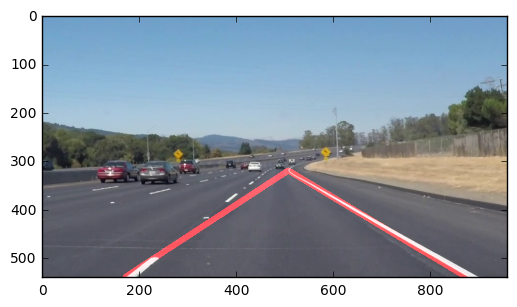

In [21]:
white_output = 'white.mp4'
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [22]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

**At this point, if you were successful you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform.  Modify your draw_lines function accordingly and try re-running your pipeline.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

[[666 425 749 479]]
[[316 417 408 358]]
[[345 393 385 368]]
[[658 427 758 497]]
[[389 367 449 328]]
[[386 373 438 338]]
[[537 338 543 342]]
[[741 475 759 486]]
[[367 380 379 372]]
[[326 410 366 384]]
[[511 316 517 321]]
[[293 432 322 412]]
[[767 492 774 497]]
[[565 357 580 367]]
[[565 360 577 369]]
[[728 466 775 495]]
[[450 331 468 312]]
[[570 359 581 367]]
[[451 326 468 307]]
[[563 360 574 368]]
[[698 446 727 465]]
[[566 357 579 366]]
[MoviePy] >>>> Building video yellow.mp4
[MoviePy] Writing video yellow.mp4


  0%|                                                  | 0/682 [00:00<?, ?it/s]

[[666 425 749 479]]
[[316 417 408 358]]
[[345 393 385 368]]
[[658 427 758 497]]
[[389 367 449 328]]
[[386 373 438 338]]
[[537 338 543 342]]
[[741 475 759 486]]
[[367 380 379 372]]
[[326 410 366 384]]
[[511 316 517 321]]
[[293 432 322 412]]
[[767 492 774 497]]
[[565 357 580 367]]
[[565 360 577 369]]
[[728 466 775 495]]
[[450 331 468 312]]
[[570 359 581 367]]
[[451 326 468 307]]
[[563 360 574 368]]
[[698 446 727 465]]
[[566 357 579 366]]


  0%|                                          | 1/682 [00:00<03:28,  3.27it/s]

[[725 464 813 521]]
[[302 427 450 331]]
[[676 439 813 535]]
[[275 444 346 397]]
[[738 473 760 487]]
[[344 394 431 341]]
[[524 329 545 343]]
[[688 440 718 460]]
[[570 360 587 371]]
[[510 317 519 324]]
[[566 362 580 372]]
[[400 365 411 357]]
[[698 446 734 469]]
[[447 330 466 310]]
[[523 330 533 337]]
[[412 352 437 337]]
[[509 319 518 325]]
[[699 456 717 469]]
[[569 360 586 371]]
[[820 526 832 533]]


  0%|                                          | 2/682 [00:00<02:55,  3.87it/s]

[[823 528 840 539]]
[[702 457 819 539]]
[[256 457 397 366]]
[[716 458 840 538]]
[[372 383 452 329]]
[[454 326 459 322]]
[[573 363 594 377]]
[[379 374 448 329]]
[[542 341 548 345]]
[[337 399 355 387]]
[[506 315 512 319]]
[[529 334 534 338]]
[[503 311 520 324]]
[[571 364 589 377]]
[[575 363 594 376]]
[[456 320 461 316]]
[[261 453 285 437]]
[[510 319 519 325]]
[[369 380 397 362]]
[[530 334 540 341]]
[[354 389 375 375]]
[[274 445 328 409]]
[[718 469 759 498]]
[[802 526 821 539]]
[[571 365 588 377]]
[[461 314 470 304]]
[[411 358 437 340]]
[[498 303 509 313]]


  0%|▏                                         | 3/682 [00:00<02:30,  4.50it/s]

[[402 364 446 335]]
[[265 453 352 395]]
[[356 389 420 349]]
[[818 524 841 539]]
[[246 465 287 437]]
[[581 367 601 381]]
[[590 379 595 382]]
[[750 480 793 507]]
[[542 342 550 347]]
[[738 482 817 537]]
[[323 409 441 335]]
[[748 488 821 539]]
[[448 332 456 326]]
[[344 401 386 375]]
[[796 509 822 526]]
[[503 312 510 318]]
[[528 331 549 349]]
[[498 304 506 311]]
[[459 321 466 315]]
[[578 369 596 382]]
[[263 454 308 425]]
[[391 372 404 362]]
[[451 327 466 310]]
[[541 344 546 348]]
[[765 490 805 516]]
[[508 314 515 320]]


  1%|▏                                         | 4/682 [00:00<02:14,  5.05it/s]

[[202 495 302 428]]
[[331 411 365 388]]
[[310 418 434 340]]
[[580 370 604 387]]
[[799 511 809 517]]
[[817 522 843 539]]
[[402 365 429 346]]
[[796 520 823 539]]
[[461 319 467 314]]
[[421 348 453 325]]
[[354 391 413 354]]
[[584 370 597 378]]
[[586 370 609 386]]
[[251 463 342 403]]
[[354 396 376 381]]
[[445 332 460 316]]
[[513 322 520 327]]
[[413 358 450 332]]
[[546 344 553 349]]
[[532 336 537 340]]
[[784 512 822 539]]
[[370 386 389 373]]
[[581 372 588 377]]
[[544 345 550 350]]
[[506 315 514 320]]
[[527 331 532 334]]


  1%|▎                                         | 5/682 [00:00<01:56,  5.82it/s]

[[220 484 422 352]]
[[306 421 390 370]]
[[586 374 611 393]]
[[376 378 449 329]]
[[177 513 211 491]]
[[403 364 444 337]]
[[590 374 618 392]]
[[604 387 612 393]]
[[511 316 522 326]]
[[547 345 556 352]]
[[528 332 538 339]]
[[227 480 261 458]]
[[420 350 434 340]]
[[546 347 554 352]]
[[448 329 469 306]]
[[592 374 612 387]]
[[448 334 460 322]]
[[513 322 521 328]]


  1%|▎                                         | 6/682 [00:00<01:42,  6.58it/s]

[[233 476 432 346]]
[[400 362 445 332]]
[[296 428 426 346]]
[[596 381 622 400]]
[[235 475 277 448]]
[[604 381 630 398]]
[[180 511 232 478]]
[[694 448 700 452]]
[[507 316 512 320]]
[[505 314 512 319]]
[[549 346 560 353]]
[[548 348 556 354]]
[[449 329 467 309]]
[[598 378 619 392]]
[[402 365 450 332]]
[[153 530 214 490]]
[[593 380 603 387]]
[[535 338 541 343]]
[[517 322 523 327]]
[[405 359 439 337]]
[[440 340 446 334]]


  1%|▍                                         | 7/682 [00:01<01:36,  6.96it/s]

[[174 515 364 391]]
[[440 338 449 332]]
[[325 409 397 365]]
[[600 382 635 407]]
[[380 381 406 361]]
[[605 382 643 406]]
[[443 333 467 308]]
[[156 528 232 478]]
[[408 356 439 336]]
[[511 319 523 328]]
[[410 360 437 340]]
[[530 334 535 337]]
[[309 419 353 393]]
[[353 397 400 367]]
[[531 333 536 336]]
[[536 337 544 343]]
[[513 318 523 325]]
[[510 314 518 321]]
[[608 383 643 405]]
[[507 315 515 321]]
[[448 332 469 310]]
[[392 367 416 352]]
[[601 384 611 391]]
[[551 347 556 350]]
[[435 338 441 333]]


  1%|▍                                         | 8/682 [00:01<01:31,  7.39it/s]

[[145 536 238 473]]
[[375 379 448 328]]
[[326 416 380 379]]
[[284 444 318 420]]
[[364 385 390 368]]
[[258 461 288 440]]
[[295 429 382 374]]
[[554 348 560 352]]
[[504 311 518 321]]
[[609 388 651 417]]
[[616 387 658 415]]
[[390 374 450 330]]
[[458 321 464 316]]
[[358 395 388 374]]
[[533 333 538 336]]
[[439 334 457 319]]
[[556 348 565 354]]
[[758 492 763 496]]
[[211 492 270 452]]
[[555 348 566 355]]
[[610 389 648 416]]
[[532 335 537 338]]
[[451 329 468 311]]
[[553 350 564 357]]


  1%|▌                                         | 9/682 [00:01<01:25,  7.85it/s]

[[229 481 442 337]]
[[208 495 266 455]]
[[296 428 396 365]]
[[624 393 678 426]]
[[811 528 817 532]]
[[664 425 669 428]]
[[619 395 667 428]]
[[433 340 462 313]]
[[146 535 182 512]]
[[625 398 642 410]]
[[505 312 525 326]]
[[398 362 434 339]]
[[557 350 565 355]]
[[555 351 567 359]]
[[509 316 516 321]]
[[662 417 671 423]]
[[394 365 421 348]]
[[559 350 570 357]]
[[344 399 356 391]]
[[194 504 218 487]]
[[443 336 466 313]]
[[646 413 658 421]]
[[627 394 632 397]]
[[812 525 823 533]]
[[558 350 570 358]]


  1%|▌                                        | 10/682 [00:01<01:24,  7.97it/s]

[[223 486 288 441]]
[[375 379 416 350]]
[[144 538 186 509]]
[[278 449 326 416]]
[[282 438 372 381]]
[[415 352 452 323]]
[[509 316 516 321]]
[[637 400 668 419]]
[[329 414 438 340]]
[[503 309 508 313]]
[[630 401 663 425]]
[[516 319 525 326]]
[[641 403 688 432]]
[[646 412 690 442]]
[[181 513 265 456]]
[[444 335 465 314]]
[[508 315 517 321]]
[[561 352 573 360]]
[[509 313 515 318]]
[[412 354 422 346]]
[[373 380 401 360]]
[[643 410 687 441]]
[[558 354 569 361]]
[[311 427 392 372]]
[[676 425 701 440]]


  2%|▋                                        | 11/682 [00:01<01:26,  7.75it/s]

[[154 532 420 353]]
[[142 539 209 494]]
[[291 433 394 366]]
[[653 409 730 459]]
[[648 413 690 442]]
[[282 438 339 401]]
[[370 386 437 340]]
[[367 383 409 356]]
[[441 333 447 327]]
[[643 410 664 425]]
[[689 440 703 450]]
[[417 349 436 337]]
[[564 354 579 364]]
[[508 315 515 321]]
[[392 366 410 355]]
[[447 331 470 306]]
[[561 355 573 364]]
[[566 354 579 363]]
[[143 539 290 440]]
[[649 414 672 430]]
[[437 336 448 325]]
[[500 304 517 319]]
[[685 438 715 459]]
[[506 313 511 317]]
[[502 308 508 313]]


  2%|▋                                        | 12/682 [00:01<01:29,  7.49it/s]

[[146 538 386 376]]
[[274 444 425 345]]
[[659 421 711 456]]
[[702 441 718 451]]
[[724 455 767 482]]
[[667 419 723 453]]
[[143 539 172 520]]
[[745 478 754 484]]
[[374 383 437 340]]
[[567 356 583 367]]
[[686 438 704 450]]
[[659 420 703 450]]
[[712 456 751 483]]
[[538 336 543 340]]
[[465 311 470 306]]
[[281 440 322 413]]
[[564 357 577 367]]
[[383 372 432 340]]
[[425 349 430 344]]
[[430 341 435 336]]
[[437 336 463 309]]
[[438 339 461 317]]
[[570 357 583 366]]
[[503 309 509 314]]
[[566 358 579 367]]
[[503 305 518 320]]


  2%|▊                                        | 13/682 [00:01<01:25,  7.78it/s]

[[571 359 589 370]]
[[146 539 378 382]]
[[267 449 299 428]]
[[705 442 803 505]]
[[737 474 745 479]]
[[281 441 437 336]]
[[747 479 780 501]]
[[287 445 319 424]]
[[709 454 737 472]]
[[690 433 718 451]]
[[174 521 285 446]]
[[509 313 518 320]]
[[438 338 450 328]]
[[458 319 463 315]]
[[388 375 443 335]]
[[537 339 545 344]]
[[788 507 802 516]]
[[710 455 731 469]]
[[439 333 457 317]]
[[568 360 583 371]]
[[573 359 580 364]]
[[432 339 448 326]]
[[684 437 714 458]]
[[724 455 743 467]]
[[446 331 454 324]]
[[382 379 392 371]]
[[539 338 546 343]]
[[780 503 786 507]]
[[413 354 419 349]]
[[613 390 618 393]]
[[743 477 801 516]]
[[391 372 403 364]]
[[373 380 412 354]]


  2%|▊                                        | 14/682 [00:01<01:28,  7.56it/s]

[[147 539 296 439]]
[[709 453 783 503]]
[[714 448 800 501]]
[[326 411 417 351]]
[[254 458 306 425]]
[[316 426 402 364]]
[[703 449 747 479]]
[[356 398 446 332]]
[[749 479 779 499]]
[[805 504 836 523]]
[[412 354 445 329]]
[[507 314 518 322]]
[[812 520 840 539]]
[[575 361 595 374]]
[[310 430 340 408]]
[[627 397 632 400]]
[[572 363 587 374]]
[[499 305 513 316]]
[[301 428 323 413]]
[[807 506 858 538]]
[[800 512 831 534]]
[[442 331 463 309]]
[[576 365 591 375]]
[[508 316 518 323]]
[[454 323 462 316]]
[[150 538 191 511]]
[[277 443 302 427]]
[[302 435 321 421]]


  2%|▉                                        | 15/682 [00:02<01:24,  7.85it/s]

[[279 452 346 405]]
[[295 433 424 346]]
[[577 367 596 379]]
[[163 531 242 476]]
[[751 480 778 498]]
[[204 503 309 430]]
[[524 329 529 332]]
[[580 365 602 379]]
[[315 426 366 391]]
[[749 469 843 528]]
[[368 388 394 371]]
[[233 473 329 410]]
[[784 503 840 539]]
[[435 340 452 326]]
[[582 365 597 375]]
[[433 339 463 309]]
[[397 369 447 331]]
[[643 404 648 407]]
[[734 470 759 486]]
[[822 526 842 539]]
[[415 352 436 335]]
[[511 315 517 321]]
[[759 476 798 500]]
[[637 405 642 408]]
[[389 374 398 367]]
[[497 302 513 316]]
[[541 340 549 345]]
[[259 466 285 447]]
[[540 341 547 346]]
[[794 508 818 524]]
[[406 358 422 346]]
[[328 410 369 382]]


  2%|▉                                        | 16/682 [00:02<01:24,  7.89it/s]

[[195 510 400 367]]
[[236 472 429 342]]
[[783 502 839 538]]
[[787 494 796 499]]
[[581 369 598 380]]
[[447 329 452 325]]
[[358 395 441 336]]
[[586 368 610 383]]
[[419 348 436 336]]
[[216 485 249 462]]
[[789 494 843 528]]
[[504 312 509 316]]
[[544 341 552 347]]
[[154 538 191 511]]
[[442 331 460 313]]
[[542 342 550 348]]
[[801 512 840 538]]
[[589 375 602 384]]
[[264 453 298 430]]
[[506 309 512 315]]
[[407 362 424 349]]
[[442 335 458 318]]
[[650 414 656 418]]


  2%|█                                        | 17/682 [00:02<01:20,  8.22it/s]

[[155 539 395 371]]
[[201 496 430 341]]
[[610 384 619 390]]
[[526 329 532 333]]
[[592 372 619 389]]
[[446 330 460 317]]
[[430 344 450 327]]
[[502 309 519 322]]
[[437 334 447 326]]
[[354 398 427 348]]
[[587 373 611 390]]
[[153 539 163 532]]
[[308 425 372 381]]
[[592 376 613 390]]
[[546 343 554 348]]
[[256 469 330 417]]
[[601 378 612 385]]
[[337 411 353 399]]
[[444 328 463 309]]
[[348 398 412 354]]
[[506 314 511 318]]


  3%|█                                        | 18/682 [00:02<01:18,  8.46it/s]

[[154 539 390 374]]
[[347 398 415 352]]
[[385 376 418 354]]
[[258 458 343 399]]
[[234 474 305 425]]
[[546 345 556 351]]
[[528 329 533 332]]
[[547 344 558 350]]
[[598 375 624 392]]
[[430 339 443 329]]
[[527 330 532 334]]
[[594 378 601 383]]
[[603 383 622 396]]
[[426 348 437 337]]
[[445 326 451 321]]
[[441 334 446 330]]
[[452 323 460 316]]
[[452 320 458 314]]
[[404 359 436 335]]
[[549 344 555 348]]
[[305 433 361 393]]
[[225 480 256 458]]
[[505 313 520 324]]
[[358 390 388 369]]
[[499 305 513 316]]
[[439 337 456 320]]


  3%|█▏                                       | 19/682 [00:02<01:16,  8.69it/s]

[[154 539 311 429]]
[[223 480 368 382]]
[[202 495 414 352]]
[[309 429 385 377]]
[[600 381 632 403]]
[[606 380 643 404]]
[[392 372 404 362]]
[[420 352 458 318]]
[[427 342 452 319]]
[[508 312 513 316]]
[[529 330 534 333]]
[[551 345 561 351]]
[[527 331 533 335]]
[[343 405 359 394]]
[[287 445 327 417]]
[[613 389 635 404]]
[[410 359 429 343]]
[[549 345 561 353]]
[[418 349 425 342]]
[[509 316 517 322]]


  3%|█▏                                       | 20/682 [00:02<01:14,  8.83it/s]

[[239 469 423 344]]
[[274 453 423 348]]
[[153 539 300 436]]
[[505 312 513 318]]
[[609 386 632 402]]
[[616 385 657 410]]
[[751 481 758 485]]
[[554 346 564 352]]
[[759 481 764 484]]
[[641 401 656 410]]
[[616 390 649 412]]
[[438 336 466 307]]
[[204 503 378 381]]
[[550 346 559 354]]
[[553 346 564 353]]
[[506 309 513 316]]
[[530 330 535 333]]
[[510 316 517 321]]
[[433 336 453 316]]
[[613 384 624 391]]
[[432 341 464 309]]


  3%|█▎                                       | 21/682 [00:02<01:18,  8.47it/s]

[[157 535 420 350]]
[[290 434 413 351]]
[[617 390 658 419]]
[[556 347 568 354]]
[[624 390 675 422]]
[[259 455 324 410]]
[[617 391 631 401]]
[[798 510 810 518]]
[[531 330 537 334]]
[[151 539 213 497]]
[[417 348 443 326]]
[[436 337 465 308]]
[[553 348 560 353]]
[[638 398 676 421]]
[[800 508 812 516]]
[[510 312 516 317]]
[[647 410 656 416]]
[[803 513 811 518]]
[[443 325 453 316]]
[[635 402 665 422]]
[[557 348 568 356]]


  3%|█▎                                       | 22/682 [00:02<01:17,  8.54it/s]

[[151 539 362 392]]
[[257 456 421 345]]
[[531 333 538 337]]
[[634 397 667 417]]
[[629 399 686 436]]
[[397 367 430 342]]
[[379 380 392 369]]
[[444 324 449 319]]
[[558 349 572 357]]
[[653 407 688 430]]
[[441 331 459 315]]
[[392 366 419 345]]
[[556 350 567 359]]
[[426 341 450 319]]
[[390 372 441 332]]
[[556 351 565 358]]
[[533 331 538 335]]
[[356 395 392 370]]
[[503 308 514 317]]
[[559 350 572 359]]
[[151 539 412 356]]
[[259 455 413 351]]
[[702 438 724 451]]
[[642 407 702 447]]
[[647 405 686 429]]
[[500 305 507 310]]
[[693 433 712 445]]
[[386 374 391 370]]
[[426 341 449 319]]
[[561 351 576 361]]
[[506 312 515 318]]
[[534 332 540 337]]
[[411 351 427 339]]
[[559 353 570 361]]
[[446 326 456 318]]
[[564 352 576 360]]
[[662 420 712 453]]
[[430 342 445 327]]
[[501 302 506 307]]
[[450 322 458 316]]
[[503 308 512 315]]


  4%|█▍                                       | 24/682 [00:03<01:13,  8.94it/s]

[[153 539 411 358]]
[[445 328 451 323]]
[[219 483 418 348]]
[[656 416 729 464]]
[[710 443 718 447]]
[[267 451 406 357]]
[[666 416 713 445]]
[[718 448 747 466]]
[[433 336 453 316]]
[[565 354 578 363]]
[[564 358 575 365]]
[[562 356 578 366]]
[[402 364 445 329]]
[[535 334 542 339]]
[[718 449 744 465]]
[[657 418 678 432]]
[[735 468 745 474]]
[[507 314 512 318]]
[[705 449 719 458]]
[[511 318 524 327]]
[[507 311 515 318]]
[[396 368 406 360]]


  4%|█▌                                       | 25/682 [00:03<01:12,  9.04it/s]

[[211 490 404 360]]
[[415 354 436 338]]
[[157 539 328 419]]
[[566 359 584 370]]
[[155 539 402 366]]
[[676 430 733 468]]
[[752 470 786 491]]
[[683 428 766 478]]
[[459 315 464 311]]
[[777 495 790 503]]
[[230 477 284 440]]
[[711 452 746 476]]
[[538 336 544 340]]
[[413 353 452 319]]
[[753 479 768 489]]
[[570 358 587 368]]
[[436 337 458 318]]
[[735 468 775 495]]
[[567 360 578 368]]
[[505 309 511 314]]
[[569 358 587 369]]
[[212 489 243 467]]
[[396 365 407 356]]
[[535 336 541 342]]


  4%|█▌                                       | 26/682 [00:03<01:13,  8.98it/s]

[[208 492 392 368]]
[[166 534 270 459]]
[[704 446 806 512]]
[[296 442 354 399]]
[[374 386 434 339]]
[[353 401 369 388]]
[[707 441 772 480]]
[[259 468 305 434]]
[[396 365 415 349]]
[[628 393 633 396]]
[[359 397 387 375]]
[[540 336 546 340]]
[[449 324 458 317]]
[[440 328 452 318]]
[[230 477 284 440]]
[[437 331 448 322]]
[[802 508 823 522]]
[[275 457 308 432]]
[[572 359 593 371]]
[[156 539 162 535]]
[[699 443 743 472]]
[[571 361 586 372]]
[[341 402 359 389]]
[[362 388 428 340]]
[[322 415 337 404]]
[[575 360 585 366]]
[[174 515 235 473]]
[[791 501 833 529]]
[[576 364 587 372]]
[[499 304 516 318]]
[[161 537 196 511]]
[[507 313 516 320]]


  4%|█▌                                       | 27/682 [00:03<01:17,  8.48it/s]

[[167 520 383 374]]
[[202 509 291 445]]
[[434 333 454 316]]
[[778 491 823 520]]
[[342 409 419 351]]
[[403 359 431 337]]
[[339 411 358 396]]
[[371 382 408 354]]
[[728 460 796 504]]
[[179 525 270 459]]
[[833 526 853 539]]
[[445 323 456 314]]
[[274 458 290 446]]
[[384 373 407 355]]
[[578 361 600 374]]
[[288 446 324 422]]
[[576 363 589 373]]
[[430 342 446 326]]
[[331 409 349 396]]
[[582 367 593 375]]
[[729 462 739 468]]
[[540 337 547 343]]
[[541 336 549 342]]
[[158 539 184 520]]
[[325 421 348 403]]
[[823 522 829 526]]
[[496 299 501 304]]
[[836 529 850 538]]
[[511 313 518 319]]
[[735 464 769 486]]
[[738 458 756 469]]
[[318 417 337 404]]
[[401 360 441 328]]
[[577 361 582 364]]
[[542 336 549 341]]


  4%|█▋                                       | 28/682 [00:03<01:21,  8.01it/s]

[[225 480 393 366]]
[[180 525 264 464]]
[[391 371 431 340]]
[[586 364 608 378]]
[[256 469 379 382]]
[[202 496 261 457]]
[[773 487 835 527]]
[[363 393 377 382]]
[[839 528 857 539]]
[[305 435 315 428]]
[[580 364 600 379]]
[[275 457 295 442]]
[[397 363 439 329]]
[[376 384 398 366]]
[[160 539 191 516]]
[[156 528 210 491]]
[[781 491 822 518]]
[[411 357 419 350]]
[[446 327 462 311]]
[[499 302 512 312]]
[[433 337 443 329]]
[[432 334 452 317]]
[[544 337 552 342]]
[[541 338 549 344]]
[[443 328 451 321]]
[[366 384 408 354]]
[[258 458 317 419]]
[[649 408 656 412]]


  4%|█▋                                       | 29/682 [00:03<01:23,  7.82it/s]

[[160 525 368 384]]
[[160 539 237 483]]
[[339 411 412 356]]
[[300 439 326 419]]
[[390 368 443 325]]
[[239 483 283 450]]
[[816 513 821 516]]
[[545 337 555 343]]
[[828 520 859 539]]
[[589 366 611 380]]
[[409 358 427 342]]
[[372 381 388 368]]
[[316 428 359 395]]
[[424 346 436 334]]
[[592 367 617 383]]
[[586 367 609 384]]
[[429 342 449 322]]
[[359 389 386 371]]
[[379 380 393 370]]
[[406 356 432 335]]
[[494 294 508 307]]
[[142 538 248 466]]
[[506 306 518 317]]
[[544 337 555 345]]
[[161 539 231 488]]
[[586 368 600 378]]
[[278 455 290 445]]


  4%|█▊                                       | 30/682 [00:03<01:22,  7.87it/s]

[[405 360 419 350]]
[[241 471 411 352]]
[[218 497 334 415]]
[[157 528 251 463]]
[[409 353 449 319]]
[[340 411 370 387]]
[[363 394 398 365]]
[[438 332 454 319]]
[[592 371 619 390]]
[[288 439 391 367]]
[[548 339 557 345]]
[[160 539 255 472]]
[[527 327 532 330]]
[[446 325 462 311]]
[[549 339 557 344]]
[[596 370 627 388]]
[[421 344 435 332]]
[[385 377 404 361]]
[[546 340 554 346]]
[[424 346 445 327]]
[[496 297 501 302]]
[[505 308 520 320]]
[[503 302 509 308]]
[[162 539 386 376]]
[[175 517 300 430]]
[[304 429 422 343]]
[[600 377 616 388]]
[[379 380 418 351]]
[[528 327 534 331]]
[[438 332 451 322]]
[[142 539 214 489]]
[[608 376 632 392]]
[[501 300 507 305]]
[[418 345 436 331]]
[[510 310 519 317]]
[[605 375 628 390]]
[[513 314 521 319]]
[[241 472 331 409]]
[[445 326 462 310]]
[[606 380 632 397]]
[[549 340 559 346]]
[[404 361 442 330]]
[[412 350 428 338]]
[[502 301 507 306]]
[[350 397 367 384]]
[[529 326 534 329]]
[[273 460 331 417]]
[[360 390 389 368]]


  5%|█▉                                       | 32/682 [00:04<01:19,  8.17it/s]

[[176 530 352 402]]
[[428 340 441 330]]
[[142 538 317 420]]
[[236 474 348 398]]
[[507 310 513 314]]
[[355 393 424 341]]
[[531 326 536 329]]
[[612 379 648 401]]
[[529 328 534 331]]
[[439 331 456 317]]
[[621 389 645 405]]
[[163 539 358 397]]
[[359 395 402 363]]
[[416 346 440 327]]
[[612 383 639 402]]
[[551 343 558 349]]
[[552 341 564 348]]
[[339 403 361 388]]
[[507 306 516 314]]
[[399 365 447 325]]
[[553 344 562 350]]
[[607 381 628 395]]
[[536 331 544 336]]


  5%|█▉                                       | 33/682 [00:04<01:15,  8.60it/s]

[[377 381 397 367]]
[[143 539 176 516]]
[[246 479 362 394]]
[[299 433 409 353]]
[[210 494 269 452]]
[[166 538 236 486]]
[[616 386 639 402]]
[[166 524 214 490]]
[[622 385 663 410]]
[[307 427 369 381]]
[[398 366 449 323]]
[[537 332 546 338]]
[[506 309 511 312]]
[[555 343 567 351]]
[[418 344 439 328]]
[[273 451 315 420]]
[[215 502 271 462]]
[[624 391 660 415]]
[[553 345 558 349]]
[[434 331 447 321]]
[[553 344 563 352]]
[[261 458 283 443]]
[[360 394 377 382]]
[[511 314 522 321]]
[[492 291 509 307]]
[[153 533 192 505]]
[[530 328 536 332]]
[[302 439 315 429]]
[[514 313 522 320]]
[[787 494 797 500]]
[[402 357 427 338]]


  5%|██                                       | 34/682 [00:04<01:27,  7.42it/s]

[[213 491 317 420]]
[[239 486 407 359]]
[[368 383 436 330]]
[[391 370 427 342]]
[[626 393 639 402]]
[[511 314 518 319]]
[[626 392 653 411]]
[[634 392 681 421]]
[[635 398 674 424]]
[[146 538 188 508]]
[[349 397 383 371]]
[[167 538 235 487]]
[[419 348 459 313]]
[[563 351 569 355]]
[[506 305 523 320]]
[[645 398 690 425]]
[[532 328 539 333]]
[[169 536 194 517]]
[[158 530 207 495]]
[[534 328 539 331]]
[[299 432 329 410]]
[[559 345 571 353]]
[[318 419 369 381]]
[[556 347 561 351]]
[[218 501 260 469]]
[[845 530 858 538]]
[[218 488 263 458]]


  5%|██                                       | 35/682 [00:04<01:28,  7.35it/s]

[[206 510 404 361]]
[[194 506 325 414]]
[[327 411 403 357]]
[[349 402 412 354]]
[[638 400 702 441]]
[[647 399 705 435]]
[[361 388 439 327]]
[[166 539 237 486]]
[[427 336 445 322]]
[[169 523 225 483]]
[[559 349 570 357]]
[[502 305 524 321]]
[[302 429 350 396]]
[[560 349 572 357]]
[[417 350 456 316]]
[[643 398 648 401]]
[[510 309 516 314]]
[[560 346 575 355]]
[[559 346 575 356]]
[[426 341 435 334]]
[[145 539 192 506]]
[[190 522 401 363]]
[[399 358 427 337]]
[[329 409 402 357]]
[[146 539 338 404]]
[[166 539 226 494]]
[[563 348 579 358]]
[[652 408 732 460]]
[[662 408 704 434]]
[[414 352 460 311]]
[[367 388 411 354]]
[[562 350 576 360]]
[[699 438 721 452]]
[[508 311 514 315]]
[[536 329 542 334]]
[[499 302 507 308]]
[[506 305 515 314]]
[[386 368 405 354]]
[[705 442 733 460]]
[[399 364 407 358]]
[[372 380 392 365]]


  5%|██▏                                      | 37/682 [00:04<01:18,  8.22it/s]

[[203 500 358 388]]
[[167 539 394 368]]
[[433 334 453 318]]
[[725 454 772 484]]
[[349 396 418 344]]
[[147 539 205 497]]
[[314 428 405 359]]
[[696 436 734 461]]
[[675 417 702 433]]
[[566 350 582 360]]
[[668 419 699 439]]
[[304 428 350 394]]
[[501 300 506 304]]
[[506 309 515 315]]
[[536 330 544 336]]
[[499 302 507 308]]
[[512 315 525 324]]
[[394 367 420 345]]
[[332 408 435 330]]
[[518 318 525 323]]
[[668 418 707 444]]
[[565 353 581 363]]
[[417 349 432 335]]
[[568 350 585 361]]


  6%|██▎                                      | 38/682 [00:04<01:19,  8.05it/s]

[[202 500 332 406]]
[[166 539 398 364]]
[[689 431 823 515]]
[[330 409 428 335]]
[[169 538 365 390]]
[[169 523 248 466]]
[[395 366 425 340]]
[[427 340 456 314]]
[[568 353 585 366]]
[[624 385 629 388]]
[[570 352 591 365]]
[[303 428 353 391]]
[[500 303 507 308]]
[[492 292 508 307]]
[[810 506 819 512]]
[[568 354 577 361]]
[[507 310 515 316]]
[[419 341 439 326]]
[[571 352 591 364]]
[[505 308 515 315]]
[[165 539 393 367]]
[[144 538 334 405]]
[[714 447 827 517]]
[[239 471 385 368]]
[[362 390 390 368]]
[[394 366 456 314]]
[[504 303 516 313]]
[[507 309 516 316]]
[[577 355 597 367]]
[[572 356 587 367]]
[[353 390 367 380]]
[[776 484 799 499]]
[[521 321 526 324]]
[[376 374 428 334]]
[[541 332 547 337]]
[[576 355 597 369]]
[[572 355 590 369]]


  6%|██▍                                      | 40/682 [00:04<01:16,  8.39it/s]

[[164 539 404 358]]
[[221 485 311 420]]
[[273 448 416 344]]
[[747 467 786 492]]
[[504 307 509 311]]
[[756 472 809 506]]
[[386 371 422 343]]
[[579 358 604 373]]
[[577 360 585 366]]
[[166 524 217 486]]
[[508 308 516 314]]
[[576 358 596 373]]
[[413 345 432 331]]
[[230 478 268 450]]
[[540 333 549 338]]
[[415 348 441 326]]
[[490 290 506 305]]
[[146 538 171 519]]
[[539 335 545 339]]
[[427 339 453 316]]
[[581 358 604 372]]


  6%|██▍                                      | 41/682 [00:05<01:14,  8.63it/s]

[[164 539 409 354]]
[[232 477 335 403]]
[[275 447 406 352]]
[[587 362 611 377]]
[[186 508 225 482]]
[[790 494 836 523]]
[[438 330 448 322]]
[[581 362 605 379]]
[[304 435 364 389]]
[[381 375 455 315]]
[[143 539 179 513]]
[[502 302 510 309]]
[[543 335 551 340]]
[[282 452 311 429]]
[[585 361 612 379]]
[[206 494 220 484]]
[[283 441 417 343]]
[[506 306 512 311]]
[[545 335 552 340]]
[[583 364 595 373]]
[[503 307 508 311]]
[[498 297 503 302]]


  6%|██▌                                      | 42/682 [00:05<01:17,  8.29it/s]

[[142 539 368 380]]
[[342 406 392 367]]
[[383 373 427 339]]
[[176 530 227 491]]
[[384 368 418 341]]
[[211 504 258 468]]
[[590 365 614 380]]
[[544 336 554 343]]
[[270 459 343 405]]
[[589 368 615 385]]
[[593 366 619 383]]
[[505 306 517 317]]
[[354 389 381 370]]
[[340 407 411 352]]
[[428 338 456 314]]
[[600 370 621 383]]
[[503 307 511 314]]
[[525 323 533 330]]
[[497 301 503 306]]
[[594 372 601 377]]
[[169 535 201 510]]
[[242 470 310 422]]


  6%|██▌                                      | 43/682 [00:05<01:18,  8.16it/s]

[[194 517 379 378]]
[[143 538 363 384]]
[[377 378 425 341]]
[[357 388 391 362]]
[[594 372 611 384]]
[[387 366 439 326]]
[[545 339 553 346]]
[[598 370 623 386]]
[[162 539 181 525]]
[[546 338 557 345]]
[[490 293 495 298]]
[[508 310 517 317]]
[[164 539 199 512]]
[[414 349 456 314]]
[[602 377 626 393]]
[[549 339 557 344]]
[[496 301 517 318]]
[[545 338 553 343]]
[[616 381 632 391]]
[[545 340 552 346]]


  6%|██▋                                      | 44/682 [00:05<01:15,  8.46it/s]

[[145 539 337 404]]
[[165 539 234 487]]
[[288 448 448 323]]
[[622 391 637 401]]
[[606 376 645 400]]
[[268 463 301 437]]
[[371 379 446 321]]
[[605 376 635 395]]
[[220 499 253 473]]
[[548 341 560 349]]
[[600 378 609 384]]
[[614 386 635 401]]
[[275 457 286 448]]
[[262 468 271 460]]
[[546 343 553 348]]
[[341 401 358 387]]
[[601 378 618 390]]
[[527 327 539 336]]
[[320 424 384 374]]
[[498 301 518 321]]
[[278 445 346 396]]
[[404 354 440 326]]
[[604 376 612 381]]


  7%|██▋                                      | 45/682 [00:05<01:16,  8.28it/s]

[[164 539 220 497]]
[[144 539 339 402]]
[[277 456 369 385]]
[[225 495 290 445]]
[[422 343 445 326]]
[[346 397 439 327]]
[[383 375 432 336]]
[[618 389 649 410]]
[[613 381 660 410]]
[[528 328 533 331]]
[[347 403 416 348]]
[[355 390 373 376]]
[[527 328 533 332]]
[[551 343 562 350]]
[[609 383 632 399]]
[[210 506 244 479]]
[[501 305 512 314]]
[[313 420 363 383]]
[[549 345 559 352]]
[[501 308 519 320]]
[[762 477 770 482]]
[[609 384 621 392]]
[[507 314 519 322]]


  7%|██▊                                      | 46/682 [00:05<01:14,  8.59it/s]

[[165 539 404 359]]
[[189 508 299 431]]
[[455 316 463 309]]
[[320 416 449 319]]
[[401 360 431 338]]
[[619 391 650 411]]
[[623 388 678 421]]
[[144 539 337 403]]
[[553 345 566 353]]
[[618 390 668 422]]
[[308 423 401 357]]
[[496 304 503 310]]
[[551 346 561 354]]
[[506 314 514 320]]
[[295 443 347 403]]
[[499 303 511 314]]
[[415 349 451 321]]
[[500 308 506 313]]
[[218 500 272 460]]
[[627 391 632 394]]


  7%|██▊                                      | 47/682 [00:05<01:20,  7.93it/s]

[[145 539 292 436]]
[[165 539 413 352]]
[[323 414 447 321]]
[[635 395 699 433]]
[[626 395 688 435]]
[[145 538 332 407]]
[[365 388 452 320]]
[[529 330 536 334]]
[[555 347 570 357]]
[[502 307 512 315]]
[[555 350 563 356]]
[[306 435 328 418]]
[[500 309 511 317]]
[[226 494 288 448]]


  7%|██▉                                      | 48/682 [00:05<01:23,  7.64it/s]

[[206 495 372 378]]
[[165 539 406 357]]
[[648 408 692 437]]
[[378 372 421 341]]
[[532 331 538 335]]
[[717 444 727 450]]
[[503 311 512 317]]
[[145 539 205 496]]
[[672 423 715 451]]
[[647 402 711 440]]
[[381 375 444 327]]
[[341 399 404 354]]
[[639 403 655 414]]
[[423 338 446 321]]
[[197 502 252 464]]
[[561 349 574 358]]
[[556 349 569 359]]
[[398 357 437 329]]
[[498 302 510 313]]
[[559 349 570 356]]
[[530 332 536 336]]
[[152 534 267 451]]
[[166 538 385 373]]
[[654 412 709 447]]
[[262 455 378 373]]
[[402 358 450 321]]
[[517 322 522 325]]
[[664 411 714 441]]
[[679 427 748 471]]
[[382 370 439 326]]
[[383 373 441 329]]
[[499 303 507 310]]
[[497 305 512 317]]
[[688 426 710 439]]
[[568 357 575 362]]
[[531 331 539 336]]
[[663 411 683 423]]
[[211 492 294 433]]
[[333 411 390 369]]
[[565 351 579 361]]
[[504 308 515 317]]
[[355 389 392 361]]
[[501 309 511 317]]


  7%|███                                      | 50/682 [00:06<01:15,  8.39it/s]

[[167 523 299 428]]
[[166 538 386 372]]
[[672 423 728 459]]
[[335 404 408 351]]
[[352 397 440 330]]
[[298 430 340 399]]
[[701 441 794 499]]
[[533 332 541 336]]
[[427 335 446 321]]
[[168 536 215 500]]
[[318 416 434 331]]
[[567 353 584 363]]
[[713 441 729 451]]
[[564 354 579 365]]
[[144 538 189 506]]
[[507 311 514 316]]
[[681 422 708 438]]
[[262 456 320 413]]
[[564 355 575 363]]
[[503 311 513 318]]
[[518 322 523 325]]
[[414 349 450 321]]
[[579 361 584 364]]
[[674 425 685 432]]
[[684 423 714 441]]


  7%|███                                      | 51/682 [00:06<01:24,  7.47it/s]

[[166 538 385 373]]
[[165 523 378 373]]
[[770 484 856 537]]
[[507 315 513 319]]
[[733 461 794 500]]
[[347 401 439 331]]
[[695 437 766 483]]
[[570 356 590 368]]
[[418 342 444 323]]
[[573 361 584 369]]
[[144 538 341 400]]
[[409 349 432 333]]
[[430 337 441 329]]
[[375 375 408 350]]
[[502 307 513 317]]
[[711 440 729 451]]
[[507 311 514 317]]
[[501 310 513 318]]
[[164 539 234 486]]
[[568 358 579 366]]
[[397 359 408 351]]
[[537 334 543 338]]


  8%|███▏                                     | 52/682 [00:06<01:19,  7.97it/s]

[[322 412 418 344]]
[[162 539 209 504]]
[[168 536 440 331]]
[[577 360 597 373]]
[[722 456 829 522]]
[[199 500 293 432]]
[[773 486 859 539]]
[[163 539 316 424]]
[[142 539 195 501]]
[[498 307 514 319]]
[[572 360 589 373]]
[[413 346 436 330]]
[[402 359 425 342]]
[[183 511 230 476]]
[[503 308 515 318]]
[[379 371 421 341]]
[[537 336 545 341]]
[[254 461 288 436]]
[[297 431 378 373]]
[[575 359 592 370]]
[[502 311 509 316]]
[[536 337 543 342]]
[[429 339 462 311]]


  8%|███▏                                     | 53/682 [00:06<01:20,  7.83it/s]

[[142 539 405 354]]
[[171 532 307 433]]
[[763 481 856 539]]
[[321 422 403 358]]
[[412 353 462 311]]
[[580 363 604 378]]
[[577 365 596 378]]
[[760 478 765 481]]
[[824 518 858 539]]
[[198 500 211 491]]
[[402 356 453 316]]
[[500 306 515 319]]
[[217 487 348 395]]
[[163 539 201 511]]
[[521 325 526 328]]
[[508 317 514 321]]
[[358 394 426 341]]
[[499 309 508 315]]
[[587 371 598 379]]
[[284 448 327 417]]
[[772 486 812 511]]
[[540 337 548 342]]
[[526 330 531 334]]
[[502 312 509 317]]
[[539 337 548 343]]


  8%|███▏                                     | 54/682 [00:06<01:23,  7.56it/s]

[[142 539 390 365]]
[[247 477 438 333]]
[[339 407 448 324]]
[[813 512 857 539]]
[[503 313 515 321]]
[[497 307 503 312]]
[[164 538 264 463]]
[[539 340 548 346]]
[[394 362 453 316]]
[[506 316 521 326]]
[[489 298 495 303]]
[[581 367 605 384]]
[[586 367 612 382]]
[[662 417 667 420]]
[[540 339 550 345]]
[[806 507 816 513]]
[[448 323 458 315]]
[[507 312 515 320]]
[[351 392 409 350]]
[[824 518 858 539]]
[[141 539 416 346]]
[[160 539 303 435]]
[[319 423 394 365]]
[[206 494 326 410]]
[[413 352 463 310]]
[[383 375 406 356]]
[[587 371 615 390]]
[[593 371 622 389]]
[[542 340 552 347]]
[[460 312 465 308]]
[[293 442 358 392]]
[[544 340 553 346]]
[[489 298 495 303]]
[[498 308 516 322]]
[[429 336 441 325]]
[[541 341 548 347]]
[[488 293 500 305]]
[[381 376 392 367]]
[[407 352 430 334]]
[[392 369 422 344]]
[[543 340 552 346]]
[[507 313 516 320]]


  8%|███▎                                     | 56/682 [00:06<01:20,  7.79it/s]

[[208 505 448 324]]
[[308 421 434 332]]
[[432 336 445 326]]
[[142 538 421 342]]
[[608 385 626 397]]
[[599 375 627 392]]
[[544 341 555 349]]
[[160 539 185 522]]
[[505 315 513 321]]
[[595 377 622 395]]
[[524 327 529 331]]
[[501 308 517 321]]
[[225 480 279 443]]
[[543 343 551 349]]
[[171 531 229 489]]
[[523 329 528 332]]
[[338 408 435 335]]
[[415 345 441 326]]
[[618 391 627 397]]
[[141 539 426 339]]
[[172 532 412 352]]
[[237 484 444 328]]
[[602 382 637 405]]
[[546 344 558 351]]
[[605 380 615 386]]
[[526 329 531 332]]
[[607 380 645 404]]
[[525 329 538 339]]
[[508 315 518 323]]
[[412 348 432 334]]
[[438 328 451 318]]
[[545 344 555 352]]
[[502 313 516 322]]
[[433 336 449 324]]
[[493 304 498 308]]
[[152 532 322 413]]
[[506 317 512 321]]


  9%|███▍                                     | 58/682 [00:07<01:13,  8.47it/s]

[[208 505 453 320]]
[[153 530 429 336]]
[[615 385 655 409]]
[[550 345 561 352]]
[[322 420 441 330]]
[[609 387 651 414]]
[[343 398 359 386]]
[[508 315 522 325]]
[[390 363 439 328]]
[[547 346 560 354]]
[[497 308 502 312]]
[[159 539 243 478]]
[[503 314 532 333]]
[[612 388 656 415]]
[[619 388 638 400]]
[[419 342 441 326]]
[[549 345 555 349]]
[[253 469 419 348]]
[[153 530 421 342]]
[[158 539 294 440]]
[[524 328 533 334]]
[[619 393 672 426]]
[[551 347 565 355]]
[[627 392 672 420]]
[[431 333 450 319]]
[[625 392 637 399]]
[[515 324 526 331]]
[[424 344 459 314]]
[[825 519 835 525]]
[[626 398 657 418]]
[[506 317 518 325]]
[[491 302 499 309]]
[[419 342 440 327]]
[[550 348 560 356]]
[[498 305 519 324]]
[[528 330 533 333]]
[[162 538 221 494]]
[[643 403 653 409]]
[[381 375 406 356]]


  9%|███▌                                     | 60/682 [00:07<01:09,  8.89it/s]

[[203 506 422 346]]
[[167 520 436 331]]
[[636 399 704 439]]
[[165 534 221 494]]
[[676 429 695 441]]
[[663 421 693 441]]
[[529 332 535 337]]
[[504 312 513 319]]
[[404 359 457 317]]
[[508 319 520 326]]
[[636 404 664 423]]
[[159 539 201 509]]
[[425 338 448 321]]
[[500 308 510 316]]
[[555 349 569 358]]
[[417 344 438 329]]
[[530 332 535 336]]
[[323 412 386 367]]
[[498 310 508 317]]
[[527 333 533 337]]
[[156 539 390 369]]
[[428 339 450 323]]
[[676 423 691 432]]
[[240 468 427 337]]
[[560 351 573 360]]
[[528 333 535 338]]
[[644 410 687 437]]
[[525 329 537 336]]
[[555 352 571 362]]
[[652 408 723 450]]
[[646 410 681 433]]
[[261 453 312 417]]
[[501 308 506 312]]
[[455 317 462 311]]
[[334 409 384 373]]
[[687 436 721 458]]
[[507 314 524 327]]
[[176 524 330 412]]
[[509 319 520 326]]
[[435 331 453 316]]
[[425 338 446 321]]
[[400 360 439 332]]
[[649 407 670 419]]
[[558 351 566 356]]


  9%|███▋                                     | 62/682 [00:07<01:08,  9.01it/s]

[[154 539 206 501]]
[[273 454 332 411]]
[[200 507 271 454]]
[[275 443 357 387]]
[[660 420 757 480]]
[[561 353 578 363]]
[[388 370 457 316]]
[[670 418 719 448]]
[[411 349 449 319]]
[[285 445 318 420]]
[[503 310 527 329]]
[[559 354 572 364]]
[[349 391 397 359]]
[[355 393 395 364]]
[[720 448 756 470]]
[[488 299 496 305]]
[[497 308 503 313]]
[[303 432 385 372]]
[[157 538 239 477]]
[[563 353 578 362]]
[[309 419 357 386]]
[[530 334 538 339]]
[[532 333 537 336]]
[[509 319 538 337]]
[[258 465 296 436]]
[[382 368 407 352]]
[[667 417 690 431]]


  9%|███▊                                     | 63/682 [00:07<01:13,  8.42it/s]

[[155 539 427 341]]
[[679 432 805 510]]
[[424 342 441 330]]
[[247 463 434 332]]
[[694 433 753 468]]
[[489 300 496 306]]
[[534 334 540 339]]
[[563 356 579 368]]
[[408 350 441 326]]
[[502 310 513 319]]
[[362 388 432 337]]
[[565 355 583 366]]
[[563 357 578 368]]
[[521 327 526 331]]
[[500 312 513 320]]
[[508 318 528 330]]
[[433 335 452 321]]


  9%|███▊                                     | 64/682 [00:07<01:13,  8.46it/s]

[[185 518 404 359]]
[[431 337 451 322]]
[[703 447 851 539]]
[[246 464 433 333]]
[[533 337 542 342]]
[[721 449 751 467]]
[[357 392 447 326]]
[[567 360 579 369]]
[[233 473 354 388]]
[[757 471 784 488]]
[[488 300 497 307]]
[[570 358 590 371]]
[[374 376 396 360]]
[[726 453 749 467]]
[[154 539 173 525]]
[[410 349 452 317]]
[[567 359 584 372]]
[[320 421 328 415]]
[[499 311 506 316]]
[[155 539 429 340]]
[[534 335 543 342]]
[[704 448 726 462]]
[[536 336 542 340]]
[[499 306 514 320]]


 10%|███▉                                     | 65/682 [00:07<01:18,  7.86it/s]

[[201 507 414 352]]
[[219 483 374 375]]
[[578 363 596 374]]
[[733 466 850 539]]
[[351 392 446 323]]
[[408 356 460 314]]
[[535 337 544 342]]
[[574 366 591 376]]
[[755 470 775 482]]
[[156 539 405 358]]
[[750 466 755 469]]
[[755 471 787 490]]
[[573 361 589 371]]
[[506 314 515 320]]
[[537 337 543 341]]
[[433 332 453 317]]
[[503 315 512 322]]
[[534 338 540 343]]
[[498 310 514 322]]
[[154 539 168 529]]


 10%|███▉                                     | 66/682 [00:08<01:16,  8.04it/s]

[[157 539 436 336]]
[[487 297 493 293]]
[[227 478 437 331]]
[[796 505 849 539]]
[[351 393 408 353]]
[[576 366 597 381]]
[[778 494 837 532]]
[[506 318 513 323]]
[[587 369 605 381]]
[[773 491 816 519]]
[[504 313 515 322]]
[[539 339 546 343]]
[[589 375 599 382]]
[[419 348 460 315]]
[[538 339 547 344]]
[[500 309 515 321]]
[[202 507 411 355]]
[[480 298 488 292]]
[[491 304 499 311]]
[[520 329 530 335]]
[[501 314 515 323]]
[[577 365 603 380]]
[[418 344 453 318]]
[[231 475 272 446]]


 10%|████                                     | 67/682 [00:08<01:13,  8.35it/s]

[[157 539 437 335]]
[[195 500 339 400]]
[[827 525 849 539]]
[[335 404 391 364]]
[[541 340 549 346]]
[[581 371 596 381]]
[[358 394 391 370]]
[[369 381 427 339]]
[[586 369 607 383]]
[[491 303 496 307]]
[[350 394 451 320]]
[[501 310 516 322]]
[[521 329 532 337]]
[[158 539 415 352]]
[[538 341 548 348]]
[[500 312 515 323]]
[[506 318 515 324]]
[[590 376 606 387]]
[[587 369 613 385]]
[[490 303 498 309]]


 10%|████                                     | 68/682 [00:08<01:13,  8.41it/s]

[[246 464 402 358]]
[[159 538 422 347]]
[[523 329 528 332]]
[[497 310 503 315]]
[[591 373 624 393]]
[[423 341 443 327]]
[[505 314 517 323]]
[[397 360 421 344]]
[[587 375 616 394]]
[[213 488 307 423]]
[[486 298 492 294]]
[[411 354 450 325]]
[[541 342 551 348]]
[[200 508 254 468]]
[[490 303 497 308]]
[[480 299 489 292]]
[[540 343 551 350]]
[[435 332 449 322]]
[[376 375 413 350]]
[[522 330 535 338]]


 10%|████▏                                    | 69/682 [00:08<01:28,  6.95it/s]

[[420 347 456 320]]
[[197 499 325 410]]
[[277 453 347 401]]
[[371 380 457 315]]
[[157 539 315 424]]
[[327 417 441 332]]
[[598 377 634 399]]
[[594 380 611 391]]
[[594 378 616 394]]
[[506 315 517 323]]
[[343 398 368 382]]
[[613 391 628 401]]
[[502 315 517 325]]
[[247 463 317 417]]
[[301 436 310 429]]
[[324 411 358 389]]
[[371 385 422 347]]
[[486 295 499 306]]
[[542 345 550 351]]
[[545 343 554 349]]
[[523 330 528 334]]
[[710 451 718 456]]
[[490 304 498 310]]
[[314 426 330 414]]
[[384 371 433 335]]
[[509 321 515 325]]


 10%|████▏                                    | 70/682 [00:08<01:22,  7.41it/s]

[[159 538 430 341]]
[[233 473 395 363]]
[[546 344 558 352]]
[[397 360 430 337]]
[[501 314 509 320]]
[[613 391 639 409]]
[[606 382 625 394]]
[[743 472 751 477]]
[[545 346 554 353]]
[[629 395 649 408]]
[[497 310 502 314]]
[[182 521 244 475]]
[[433 337 445 329]]
[[548 348 555 353]]
[[617 388 640 403]]
[[491 304 497 308]]
[[420 347 432 339]]
[[416 346 452 319]]
[[365 383 418 346]]
[[501 310 512 319]]
[[607 387 622 398]]
[[745 472 753 477]]
[[436 336 462 314]]
[[602 384 611 391]]


 10%|████▎                                    | 71/682 [00:08<01:35,  6.41it/s]

[[369 385 376 380]]
[[240 468 399 360]]
[[419 348 455 321]]
[[212 498 341 407]]
[[495 308 501 313]]
[[610 389 656 420]]
[[503 316 518 326]]
[[618 389 656 413]]
[[345 404 368 386]]
[[375 381 396 367]]
[[390 365 443 327]]
[[177 523 232 485]]
[[209 490 367 383]]
[[504 313 518 325]]
[[610 390 633 406]]
[[487 298 492 294]]
[[614 388 639 403]]
[[386 373 430 341]]
[[548 346 561 354]]
[[656 412 666 418]]
[[492 301 499 307]]
[[163 533 193 513]]
[[547 348 557 356]]
[[400 359 459 313]]
[[483 296 490 301]]
[[282 448 347 402]]
[[551 347 562 354]]
[[501 310 506 314]]


 11%|████▎                                    | 72/682 [00:09<01:43,  5.90it/s]

[[155 539 206 502]]
[[216 485 384 371]]
[[394 367 458 318]]
[[337 410 379 378]]
[[237 482 285 446]]
[[627 395 656 413]]
[[651 416 674 432]]
[[195 500 341 401]]
[[311 429 353 397]]
[[175 526 233 483]]
[[362 393 386 373]]
[[622 398 657 421]]
[[402 358 447 324]]
[[528 332 533 335]]
[[287 446 316 424]]
[[639 402 686 431]]
[[491 305 502 314]]
[[484 296 502 311]]
[[550 350 561 358]]
[[428 338 440 328]]
[[504 317 519 327]]
[[551 348 565 358]]
[[266 461 291 442]]
[[209 502 268 458]]
[[377 381 401 362]]
[[637 407 666 427]]
[[433 338 443 331]]
[[339 401 367 382]]
[[275 455 297 438]]
[[504 314 519 325]]


 11%|████▍                                    | 73/682 [00:09<02:42,  3.76it/s]

[[267 461 399 365]]
[[156 539 199 508]]
[[319 415 401 359]]
[[206 493 284 439]]
[[499 313 507 319]]
[[385 374 450 326]]
[[243 478 286 446]]
[[503 313 513 321]]
[[643 406 694 436]]
[[557 351 569 359]]
[[632 405 670 430]]
[[638 408 644 412]]
[[214 499 254 469]]
[[669 428 700 448]]
[[201 508 245 475]]
[[374 377 424 342]]
[[421 343 453 319]]
[[552 352 561 359]]
[[517 325 535 337]]
[[349 396 367 383]]
[[191 515 231 485]]
[[528 335 534 339]]
[[267 451 376 377]]
[[679 428 698 439]]
[[650 416 698 448]]
[[414 348 440 330]]
[[333 412 389 372]]
[[491 302 501 310]]
[[502 316 511 322]]
[[553 352 565 361]]
[[492 306 498 311]]
[[562 355 569 360]]


 11%|████▍                                    | 74/682 [00:09<02:12,  4.58it/s]

[[305 426 412 351]]
[[190 516 436 337]]
[[385 369 444 327]]
[[651 417 707 454]]
[[702 442 725 456]]
[[446 328 456 320]]
[[505 315 513 321]]
[[156 539 202 506]]
[[692 443 730 468]]
[[653 412 708 445]]
[[208 492 309 422]]
[[517 327 535 340]]
[[393 368 449 327]]
[[482 296 489 302]]
[[508 318 521 327]]
[[555 353 568 364]]
[[595 378 600 381]]
[[490 305 498 311]]
[[279 444 331 407]]
[[561 354 573 362]]
[[500 314 509 321]]
[[557 352 571 361]]
[[206 504 244 476]]
[[485 297 502 311]]
[[496 310 502 315]]
[[676 426 697 439]]
[[559 354 572 362]]
[[339 402 391 365]]
[[676 433 720 462]]


 11%|████▌                                    | 75/682 [00:09<01:59,  5.10it/s]

[[174 515 336 405]]
[[210 502 422 348]]
[[671 424 784 491]]
[[689 442 739 475]]
[[159 538 286 446]]
[[394 363 430 338]]
[[370 380 411 352]]
[[337 403 379 375]]
[[532 336 537 339]]
[[492 307 499 312]]
[[661 425 676 435]]
[[719 461 767 493]]
[[480 298 497 310]]
[[531 336 536 339]]
[[412 355 429 341]]
[[562 355 579 367]]
[[667 428 715 460]]
[[442 329 463 309]]
[[503 317 521 330]]
[[419 350 461 316]]
[[505 316 522 329]]
[[407 358 415 352]]
[[558 357 573 368]]
[[290 435 346 398]]
[[480 297 487 302]]
[[670 424 692 437]]
[[504 315 522 328]]
[[530 337 536 341]]
[[245 466 289 436]]
[[568 360 577 366]]


 11%|████▌                                    | 76/682 [00:09<01:49,  5.52it/s]

[[188 505 369 382]]
[[328 416 447 329]]
[[386 370 451 321]]
[[697 440 720 454]]
[[506 317 516 324]]
[[821 514 840 526]]
[[681 437 772 496]]
[[175 526 291 444]]
[[710 447 761 478]]
[[751 482 821 527]]
[[566 358 584 370]]
[[532 338 539 343]]
[[562 359 579 371]]
[[292 442 334 413]]
[[360 387 399 360]]
[[194 501 245 467]]
[[750 471 812 509]]
[[490 306 500 313]]
[[533 337 539 341]]
[[534 337 540 341]]
[[157 539 198 511]]
[[291 443 305 434]]
[[335 412 355 397]]
[[613 389 618 392]]
[[519 327 528 333]]
[[391 365 411 351]]
[[321 414 383 372]]
[[505 319 512 324]]
[[181 510 200 498]]
[[426 344 461 316]]


 11%|████▋                                    | 77/682 [00:10<01:51,  5.42it/s]

[[218 485 445 326]]
[[419 348 454 322]]
[[255 468 361 393]]
[[570 360 591 374]]
[[719 453 756 475]]
[[798 511 842 539]]
[[156 539 220 493]]
[[489 305 498 311]]
[[706 453 815 523]]
[[757 475 809 507]]
[[268 451 421 344]]
[[359 394 411 354]]
[[533 339 540 344]]
[[565 361 583 374]]
[[208 502 253 471]]
[[507 317 515 323]]
[[174 515 216 485]]
[[535 338 542 343]]
[[481 297 488 302]]
[[348 396 366 383]]
[[519 328 534 338]]
[[257 467 285 448]]
[[160 537 228 489]]
[[504 318 514 324]]
[[521 327 530 333]]
[[355 396 374 382]]
[[487 299 502 311]]
[[763 479 803 504]]
[[404 361 418 349]]
[[502 312 508 317]]
[[802 502 810 507]]
[[705 454 712 458]]


 11%|████▋                                    | 78/682 [00:10<02:34,  3.91it/s]

[[232 475 445 326]]
[[159 538 441 333]]
[[262 455 432 336]]
[[784 504 790 508]]
[[493 308 501 314]]
[[745 478 840 539]]
[[754 474 836 523]]
[[538 339 544 343]]
[[570 364 589 378]]
[[575 363 597 377]]
[[501 315 514 324]]
[[482 299 488 295]]
[[203 495 245 465]]
[[365 388 435 336]]
[[739 475 759 488]]
[[522 328 531 335]]
[[574 363 591 374]]
[[519 329 529 336]]
[[812 509 843 528]]
[[156 539 201 507]]
[[491 306 498 311]]
[[630 404 635 407]]
[[504 318 511 323]]
[[501 311 507 316]]
[[279 452 321 421]]
[[435 337 460 316]]
[[537 339 543 343]]
[[814 511 829 520]]
[[535 341 541 345]]
[[760 478 801 503]]
[[809 518 841 539]]


 12%|████▋                                    | 79/682 [00:10<02:09,  4.67it/s]

[[158 538 313 426]]
[[201 496 287 436]]
[[294 441 405 358]]
[[327 410 455 317]]
[[789 506 840 539]]
[[407 358 458 318]]
[[801 502 852 534]]
[[522 328 532 335]]
[[289 436 352 391]]
[[492 307 501 314]]
[[580 366 606 383]]
[[536 341 544 346]]
[[502 312 512 320]]
[[230 487 276 453]]
[[487 299 500 309]]
[[505 315 514 322]]
[[575 367 600 384]]
[[376 381 396 365]]
[[277 444 315 417]]
[[433 335 447 324]]
[[540 340 546 344]]
[[575 368 586 376]]
[[451 323 460 316]]
[[383 371 411 350]]
[[422 343 436 332]]
[[387 373 400 363]]
[[577 365 606 384]]
[[327 417 378 379]]
[[305 432 447 328]]
[[195 500 269 448]]
[[154 539 308 431]]
[[337 403 454 318]]
[[665 424 670 427]]
[[669 424 674 427]]
[[289 436 352 391]]
[[522 329 534 337]]
[[505 319 512 324]]
[[583 369 608 385]]
[[501 315 515 325]]
[[376 376 445 326]]
[[492 307 499 312]]
[[493 308 502 315]]
[[581 372 608 390]]
[[273 447 323 411]]
[[295 440 376 381]]
[[586 370 615 388]]
[[527 333 538 341]]
[[504 314 515 324]]
[[500 310 508 317]]


 12%|████▊                                    | 81/682 [00:10<01:54,  5.23it/s]

[[168 530 446 328]]
[[266 451 444 326]]
[[585 373 617 396]]
[[593 374 625 395]]
[[501 315 516 325]]
[[590 373 604 382]]
[[506 316 516 323]]
[[153 539 166 530]]
[[455 319 461 314]]
[[381 375 457 319]]
[[492 307 500 313]]
[[608 389 618 396]]
[[239 469 277 442]]
[[501 311 507 316]]
[[154 539 246 473]]
[[543 342 552 349]]
[[506 319 515 326]]
[[594 380 610 392]]


 12%|████▉                                    | 82/682 [00:11<01:44,  5.76it/s]

[[175 524 289 442]]
[[307 422 444 326]]
[[339 407 460 316]]
[[502 312 511 319]]
[[593 379 629 404]]
[[245 475 327 414]]
[[524 330 529 333]]
[[176 523 204 502]]
[[597 377 637 402]]
[[596 377 604 382]]
[[543 343 554 350]]
[[162 534 190 512]]
[[287 445 334 409]]
[[491 306 500 313]]
[[258 456 318 413]]
[[499 313 516 326]]
[[604 387 618 397]]
[[481 297 490 303]]
[[294 431 339 399]]
[[494 309 501 314]]
[[544 343 553 349]]
[[329 414 397 363]]
[[509 322 515 326]]
[[509 318 517 325]]
[[310 428 336 408]]
[[430 335 453 318]]
[[158 536 176 522]]


 12%|████▉                                    | 83/682 [00:11<01:38,  6.10it/s]

[[177 523 448 326]]
[[352 391 436 332]]
[[153 539 206 501]]
[[524 331 529 335]]
[[606 382 651 411]]
[[600 384 633 407]]
[[305 423 348 392]]
[[501 315 512 323]]
[[544 346 555 353]]
[[261 453 325 408]]
[[491 306 499 312]]
[[324 410 447 323]]
[[598 382 644 413]]
[[571 362 576 365]]
[[548 345 557 351]]
[[175 524 222 490]]
[[482 297 503 312]]
[[739 475 744 478]]
[[547 345 556 351]]
[[263 460 332 410]]
[[526 331 531 334]]
[[741 475 746 478]]
[[481 297 488 302]]
[[509 322 515 326]]


 12%|█████                                    | 84/682 [00:11<01:41,  5.90it/s]

[[153 539 302 431]]
[[168 529 453 322]]
[[614 388 669 422]]
[[302 425 446 324]]
[[608 388 658 423]]
[[491 306 498 311]]
[[549 347 561 355]]
[[282 438 358 385]]
[[487 299 507 316]]
[[508 318 518 325]]
[[494 309 504 317]]
[[781 505 792 512]]
[[546 348 557 355]]
[[502 316 509 321]]
[[606 388 633 407]]
[[526 332 532 336]]
[[505 315 510 319]]
[[613 388 668 422]]
[[782 504 795 513]]


 12%|█████                                    | 85/682 [00:11<01:39,  6.02it/s]

[[152 539 249 469]]
[[296 428 408 352]]
[[347 399 443 331]]
[[403 355 456 315]]
[[526 334 531 337]]
[[618 395 677 436]]
[[638 402 690 435]]
[[491 304 499 298]]
[[295 436 349 399]]
[[264 458 324 417]]
[[513 322 520 327]]
[[549 350 559 357]]
[[552 349 564 357]]
[[620 397 653 420]]
[[167 529 272 453]]
[[491 307 502 315]]
[[405 357 451 324]]
[[660 417 687 434]]
[[500 314 505 318]]
[[553 349 562 355]]
[[624 394 650 411]]
[[489 303 513 321]]
[[432 334 446 324]]
[[508 321 519 328]]


 13%|█████▏                                   | 86/682 [00:11<01:28,  6.73it/s]

[[164 530 282 445]]
[[408 352 453 318]]
[[326 415 449 326]]
[[628 403 690 444]]
[[289 433 405 354]]
[[637 402 672 424]]
[[295 437 349 397]]
[[528 335 534 339]]
[[503 317 520 328]]
[[555 350 568 358]]
[[492 304 520 327]]
[[403 355 437 330]]
[[674 425 717 451]]
[[529 333 535 337]]
[[479 298 499 312]]
[[150 539 194 508]]
[[671 430 704 453]]
[[316 422 420 346]]
[[387 366 413 347]]
[[493 309 504 317]]
[[657 414 691 435]]
[[280 448 300 432]]
[[507 321 518 328]]


 13%|█████▏                                   | 87/682 [00:11<01:21,  7.31it/s]

[[150 539 246 470]]
[[242 474 367 384]]
[[299 426 380 371]]
[[641 412 737 474]]
[[502 316 512 322]]
[[338 411 343 407]]
[[682 429 746 470]]
[[366 386 400 360]]
[[421 343 437 330]]
[[379 377 423 344]]
[[531 335 536 338]]
[[652 411 683 431]]
[[412 349 430 335]]
[[491 307 501 314]]
[[352 389 406 353]]
[[408 356 457 319]]
[[505 315 513 321]]
[[509 319 521 327]]
[[442 326 467 306]]
[[559 352 572 361]]
[[433 334 441 328]]
[[555 354 568 363]]
[[439 329 452 319]]
[[278 449 385 371]]
[[642 411 667 428]]
[[701 442 723 456]]
[[529 336 535 340]]
[[403 354 419 343]]
[[492 304 507 316]]
[[556 352 569 360]]
[[233 479 409 355]]
[[750 482 781 502]]
[[532 335 539 339]]
[[148 539 183 514]]
[[324 408 440 329]]
[[678 427 796 500]]
[[685 439 758 488]]
[[226 484 286 443]]
[[664 425 700 450]]
[[418 349 459 317]]
[[561 355 577 364]]
[[190 509 231 482]]
[[491 307 509 320]]
[[510 323 520 330]]
[[507 320 517 327]]
[[531 337 537 341]]
[[506 316 512 320]]
[[310 418 369 379]]
[[343 401 432 338]]
[[512 324 522 330]]


 13%|█████▎                                   | 89/682 [00:11<01:16,  7.80it/s]

[[148 539 389 370]]
[[820 515 852 535]]
[[717 460 742 477]]
[[360 384 442 328]]
[[678 434 704 452]]
[[727 458 824 517]]
[[310 418 369 379]]
[[566 358 580 367]]
[[683 439 837 539]]
[[387 371 421 346]]
[[149 539 302 432]]
[[491 308 510 321]]
[[492 305 514 322]]
[[562 360 579 370]]
[[384 368 404 355]]
[[508 318 529 333]]
[[699 441 727 457]]
[[400 362 457 319]]
[[510 323 527 334]]
[[427 339 467 307]]
[[687 436 692 439]]
[[569 359 583 368]]
[[685 437 691 441]]
[[534 337 540 341]]


 13%|█████▍                                   | 90/682 [00:12<01:12,  8.16it/s]

[[208 499 301 432]]
[[299 435 428 342]]
[[354 389 442 329]]
[[803 517 836 539]]
[[817 514 857 539]]
[[536 339 542 343]]
[[620 397 625 400]]
[[717 462 749 483]]
[[303 423 391 365]]
[[730 460 785 495]]
[[746 480 815 526]]
[[831 522 857 538]]
[[566 362 584 375]]
[[508 319 514 323]]
[[153 538 196 506]]
[[481 302 487 298]]
[[504 319 513 325]]
[[569 361 589 374]]
[[419 350 461 316]]
[[745 480 778 502]]
[[490 308 501 315]]
[[795 501 808 509]]
[[498 314 509 322]]
[[187 514 217 491]]
[[507 318 513 322]]
[[758 477 824 518]]
[[443 328 467 308]]
[[498 310 508 318]]
[[565 363 580 373]]
[[296 428 338 401]]
[[491 309 503 317]]
[[533 340 541 345]]
[[267 457 333 410]]
[[571 361 589 373]]


 13%|█████▍                                   | 91/682 [00:12<01:12,  8.13it/s]

[[151 539 440 336]]
[[247 463 440 332]]
[[537 341 545 346]]
[[574 365 595 378]]
[[765 484 857 539]]
[[753 485 781 504]]
[[753 486 790 511]]
[[570 366 588 379]]
[[813 524 836 539]]
[[415 350 434 335]]
[[794 513 826 534]]
[[570 367 581 375]]
[[498 310 509 320]]
[[492 310 503 318]]
[[436 334 450 324]]
[[583 375 591 380]]
[[407 359 460 319]]
[[734 475 747 483]]
[[525 334 536 341]]
[[504 320 513 327]]
[[783 507 789 511]]
[[577 367 590 376]]
[[506 318 514 324]]
[[477 300 485 306]]
[[535 343 543 348]]


 13%|█████▌                                   | 92/682 [00:12<01:16,  7.67it/s]

[[154 539 354 399]]
[[233 473 310 421]]
[[300 429 384 371]]
[[335 411 444 334]]
[[503 317 511 323]]
[[802 519 831 538]]
[[491 311 526 334]]
[[438 333 466 312]]
[[580 370 603 384]]
[[818 517 855 539]]
[[395 365 450 325]]
[[576 372 596 386]]
[[153 539 194 510]]
[[646 417 651 420]]
[[282 449 308 430]]
[[776 503 792 514]]
[[521 332 526 335]]
[[537 345 544 350]]
[[320 416 396 364]]
[[801 517 834 539]]
[[539 344 546 348]]
[[648 417 653 420]]
[[789 508 795 512]]
[[827 523 837 529]]
[[577 372 597 386]]
[[432 342 462 318]]
[[577 369 584 373]]
[[238 479 283 448]]
[[311 428 362 393]]
[[650 417 655 420]]


 14%|█████▌                                   | 93/682 [00:12<01:22,  7.18it/s]

[[153 539 437 340]]
[[224 480 433 339]]
[[205 493 290 435]]
[[504 318 516 327]]
[[354 398 439 338]]
[[580 375 604 392]]
[[586 374 612 391]]
[[491 312 507 322]]
[[456 323 461 319]]
[[523 333 528 336]]
[[233 473 249 462]]
[[502 320 508 324]]
[[582 376 606 392]]
[[481 303 490 309]]
[[543 346 549 350]]
[[314 419 438 335]]
[[539 347 545 352]]
[[522 335 534 342]]
[[214 498 277 453]]
[[508 322 516 328]]
[[663 428 669 432]]
[[427 342 466 312]]
[[583 373 591 378]]


 14%|█████▋                                   | 94/682 [00:12<01:21,  7.20it/s]

[[242 469 424 346]]
[[154 539 160 535]]
[[155 539 428 347]]
[[600 388 616 399]]
[[586 379 613 398]]
[[593 378 622 397]]
[[683 442 691 447]]
[[491 312 504 321]]
[[361 393 451 329]]
[[202 495 432 340]]
[[591 378 607 388]]
[[499 314 508 321]]
[[438 334 452 324]]
[[504 322 516 330]]
[[687 443 693 447]]
[[546 348 552 352]]
[[507 322 517 330]]
[[586 380 592 384]]
[[209 490 268 450]]
[[352 400 404 363]]
[[481 304 489 309]]
[[544 347 551 352]]
[[262 465 288 446]]
[[508 322 517 328]]
[[523 336 528 339]]
[[524 334 536 343]]
[[424 345 434 337]]


 14%|█████▋                                   | 95/682 [00:12<01:22,  7.12it/s]

[[188 505 424 346]]
[[155 539 377 383]]
[[393 372 454 326]]
[[495 314 501 318]]
[[593 384 622 404]]
[[505 319 510 323]]
[[525 335 531 338]]
[[156 539 303 436]]
[[713 460 721 465]]
[[597 382 634 404]]
[[422 347 467 311]]
[[593 383 627 406]]
[[492 313 509 325]]
[[413 358 424 350]]
[[548 349 556 354]]
[[508 322 518 329]]
[[481 304 489 309]]
[[477 303 485 308]]
[[328 417 361 394]]
[[546 349 556 355]]
[[386 377 408 360]]
[[543 350 554 356]]
[[275 446 425 344]]
[[261 464 431 344]]
[[433 337 463 315]]
[[194 501 430 341]]
[[241 468 436 336]]
[[194 511 263 464]]
[[526 335 531 338]]
[[621 396 627 400]]
[[600 387 622 403]]
[[476 301 483 306]]
[[548 349 559 356]]
[[335 411 440 337]]
[[483 303 495 311]]
[[632 403 641 409]]
[[508 322 518 328]]
[[154 539 199 509]]
[[493 312 503 319]]
[[606 387 647 412]]
[[546 351 557 358]]
[[607 392 635 412]]
[[503 320 509 324]]
[[492 312 510 324]]
[[608 387 621 395]]
[[616 398 639 414]]
[[478 306 485 300]]


 14%|█████▊                                   | 97/682 [00:13<01:14,  7.83it/s]

[[243 478 409 358]]
[[216 485 430 340]]
[[528 335 533 339]]
[[161 536 290 443]]
[[628 405 656 424]]
[[326 411 418 349]]
[[630 400 646 410]]
[[632 402 659 419]]
[[614 396 645 418]]
[[789 510 805 520]]
[[408 360 420 350]]
[[552 351 562 357]]
[[481 302 488 307]]
[[417 354 450 327]]
[[485 303 512 323]]
[[549 350 562 358]]
[[492 311 510 324]]
[[791 510 804 518]]
[[363 392 405 361]]
[[439 333 460 315]]
[[548 352 558 359]]
[[616 392 664 422]]
[[273 447 316 418]]
[[486 305 491 308]]
[[494 312 504 319]]
[[549 352 559 359]]


 14%|█████▉                                   | 98/682 [00:13<01:16,  7.64it/s]

[[278 453 450 328]]
[[209 490 430 340]]
[[184 520 365 389]]
[[481 302 491 308]]
[[627 398 677 430]]
[[620 400 674 436]]
[[557 357 563 361]]
[[492 311 511 324]]
[[493 311 520 329]]
[[404 363 410 358]]
[[155 539 180 521]]
[[506 318 520 328]]
[[444 329 471 306]]
[[158 538 266 460]]
[[645 410 656 417]]
[[530 336 535 340]]
[[483 302 496 311]]
[[485 300 492 305]]
[[554 352 566 359]]
[[619 400 643 416]]
[[551 354 562 361]]
[[450 327 458 321]]


 15%|█████▉                                   | 99/682 [00:13<01:11,  8.21it/s]

[[233 473 435 336]]
[[211 499 384 377]]
[[559 354 569 361]]
[[284 447 427 346]]
[[632 407 677 438]]
[[209 490 419 348]]
[[509 320 517 326]]
[[641 406 700 444]]
[[493 311 512 324]]
[[177 523 238 481]]
[[154 539 186 518]]
[[554 355 566 363]]
[[491 310 498 315]]
[[529 338 535 342]]
[[421 350 461 318]]
[[649 418 697 451]]
[[515 325 521 330]]
[[505 320 510 324]]
[[479 304 487 299]]
[[414 355 421 349]]
[[678 429 709 449]]
[[633 408 656 424]]
[[556 353 568 361]]
[[645 410 653 415]]
[[486 304 511 321]]
[[447 325 464 313]]


 15%|█████▊                                  | 100/682 [00:13<01:07,  8.56it/s]

[[155 539 280 451]]
[[223 480 431 339]]
[[531 340 536 343]]
[[645 417 677 438]]
[[383 378 460 320]]
[[676 428 681 431]]
[[705 447 732 463]]
[[667 430 709 459]]
[[681 432 695 441]]
[[562 356 575 364]]
[[344 406 374 383]]
[[369 388 392 370]]
[[684 433 705 446]]
[[267 459 312 428]]
[[512 323 522 330]]
[[645 416 688 445]]
[[412 353 446 326]]
[[560 356 575 366]]
[[499 311 514 323]]
[[477 301 486 307]]
[[502 318 508 322]]
[[492 311 506 320]]
[[299 436 347 403]]
[[493 308 514 324]]
[[323 413 409 355]]
[[681 439 726 470]]
[[563 362 570 366]]
[[531 337 538 341]]
[[685 434 701 444]]
[[531 339 537 343]]
[[655 415 675 428]]
[[428 344 434 339]]
[[432 338 471 307]]


 15%|█████▉                                  | 101/682 [00:13<01:08,  8.49it/s]

[[157 538 287 444]]
[[248 463 423 345]]
[[675 427 772 487]]
[[680 438 767 496]]
[[322 421 446 331]]
[[532 340 539 344]]
[[535 338 540 341]]
[[564 358 580 369]]
[[663 427 731 473]]
[[281 450 323 419]]
[[479 302 514 324]]
[[736 466 771 487]]
[[499 311 514 323]]
[[439 331 471 307]]
[[414 350 433 337]]
[[561 359 575 369]]
[[481 302 489 307]]
[[704 446 729 461]]
[[504 319 523 332]]
[[662 427 678 438]]
[[497 314 509 322]]
[[341 407 375 382]]
[[431 338 446 327]]
[[477 306 487 299]]
[[267 460 311 427]]


 15%|█████▉                                  | 102/682 [00:13<01:07,  8.62it/s]

[[233 473 429 340]]
[[694 439 768 485]]
[[683 440 754 488]]
[[153 539 381 379]]
[[747 482 821 531]]
[[245 474 424 348]]
[[492 311 514 325]]
[[769 485 822 519]]
[[436 337 453 325]]
[[736 466 765 484]]
[[493 308 514 323]]
[[533 341 540 345]]
[[323 413 409 355]]
[[567 360 585 371]]
[[458 318 471 307]]
[[535 339 543 344]]
[[410 354 443 328]]
[[519 330 539 344]]
[[538 340 543 343]]
[[570 361 586 371]]
[[448 328 465 315]]
[[495 312 504 318]]
[[441 331 456 318]]
[[485 304 491 308]]
[[683 441 716 463]]
[[520 329 529 335]]
[[564 362 581 373]]
[[720 464 806 522]]
[[405 361 438 336]]


 15%|██████                                  | 103/682 [00:13<01:11,  8.15it/s]

[[152 539 399 366]]
[[239 469 421 346]]
[[828 522 855 539]]
[[753 486 833 539]]
[[538 340 544 344]]
[[573 363 592 375]]
[[708 458 746 483]]
[[733 464 767 484]]
[[481 302 488 307]]
[[477 301 486 307]]
[[525 333 535 340]]
[[492 311 529 337]]
[[521 329 531 336]]
[[773 488 823 518]]
[[383 377 465 315]]
[[485 303 515 324]]
[[734 465 763 483]]
[[422 345 471 307]]
[[708 457 774 501]]
[[499 311 512 321]]
[[568 365 587 377]]
[[535 342 542 346]]


 15%|██████                                  | 104/682 [00:13<01:10,  8.23it/s]

[[152 539 393 370]]
[[254 458 427 341]]
[[578 366 599 379]]
[[771 486 792 499]]
[[742 478 801 518]]
[[573 368 594 381]]
[[771 487 815 514]]
[[415 354 461 318]]
[[483 302 495 310]]
[[482 302 491 308]]
[[826 520 849 535]]
[[806 519 836 539]]
[[435 335 471 306]]
[[576 365 599 380]]
[[492 311 517 326]]
[[366 388 408 359]]
[[421 349 459 319]]
[[497 310 518 326]]
[[785 506 820 530]]
[[639 408 644 411]]
[[428 340 442 328]]
[[573 367 590 378]]
[[820 515 856 539]]
[[641 408 646 411]]
[[539 341 546 346]]
[[479 304 484 300]]


 15%|██████▏                                 | 105/682 [00:13<01:08,  8.47it/s]

[[152 539 391 371]]
[[246 464 419 347]]
[[803 506 815 513]]
[[823 519 856 539]]
[[154 538 354 398]]
[[543 343 549 347]]
[[785 506 834 539]]
[[498 314 508 321]]
[[396 368 459 319]]
[[577 371 597 384]]
[[582 369 607 384]]
[[507 321 526 334]]
[[492 311 509 322]]
[[577 369 601 386]]
[[388 373 405 360]]
[[417 347 443 329]]
[[484 301 516 324]]
[[477 301 486 307]]
[[444 328 471 306]]
[[817 513 823 517]]
[[785 507 816 528]]
[[538 344 547 349]]
[[654 418 659 421]]
[[539 342 549 348]]


 16%|██████▏                                 | 106/682 [00:14<01:05,  8.76it/s]

[[152 539 407 360]]
[[450 326 460 319]]
[[309 422 414 351]]
[[501 317 517 327]]
[[261 454 322 412]]
[[583 375 608 391]]
[[588 373 616 391]]
[[543 344 552 350]]
[[443 329 471 307]]
[[404 362 449 328]]
[[494 309 517 325]]
[[432 337 454 319]]
[[492 311 503 318]]
[[294 432 416 349]]
[[583 374 611 392]]
[[544 344 551 349]]
[[484 305 511 323]]
[[672 430 678 434]]
[[374 383 452 325]]
[[527 335 535 340]]
[[540 346 549 351]]


 16%|██████▎                                 | 107/682 [00:14<01:04,  8.93it/s]

[[152 539 416 354]]
[[427 340 471 309]]
[[281 441 413 352]]
[[590 379 620 399]]
[[478 303 507 321]]
[[153 539 350 401]]
[[605 383 627 398]]
[[247 463 318 415]]
[[545 346 554 352]]
[[591 380 607 391]]
[[693 447 700 451]]
[[401 364 460 320]]
[[548 347 555 352]]
[[506 318 518 326]]
[[523 334 528 337]]
[[492 312 497 315]]
[[492 309 514 323]]
[[524 332 530 336]]
[[233 473 421 346]]
[[593 377 622 395]]
[[503 319 516 328]]
[[525 332 530 335]]
[[440 331 450 324]]


 16%|██████▎                                 | 108/682 [00:14<01:02,  9.22it/s]

[[154 539 396 369]]
[[314 420 370 381]]
[[372 380 423 345]]
[[484 304 496 312]]
[[223 480 294 433]]
[[526 334 531 337]]
[[597 384 632 407]]
[[324 419 427 346]]
[[601 382 640 406]]
[[479 304 518 329]]
[[548 348 558 355]]
[[295 432 349 395]]
[[496 311 518 328]]
[[441 330 471 309]]
[[262 453 310 421]]
[[435 340 460 320]]
[[722 466 729 471]]
[[508 319 518 327]]
[[545 349 555 356]]
[[437 333 461 317]]
[[509 324 515 328]]
[[374 379 407 357]]
[[607 386 623 396]]
[[413 351 431 339]]


 16%|██████▍                                 | 109/682 [00:14<01:01,  9.31it/s]

[[305 433 418 353]]
[[216 485 422 346]]
[[172 526 244 477]]
[[610 388 654 415]]
[[605 390 622 402]]
[[550 350 561 357]]
[[231 485 307 433]]
[[607 391 646 417]]
[[479 304 519 330]]
[[484 302 492 308]]
[[547 351 558 359]]
[[500 315 519 328]]
[[392 371 434 341]]
[[299 438 325 419]]
[[443 329 471 309]]
[[408 355 466 313]]
[[478 305 484 309]]
[[526 337 531 340]]
[[479 305 485 309]]
[[497 315 503 319]]
[[420 347 445 329]]
[[424 347 450 329]]
[[165 531 201 507]]
[[506 322 518 330]]
[[577 368 582 371]]
[[442 334 461 320]]
[[526 336 532 340]]
[[474 303 480 307]]


 16%|██████▍                                 | 110/682 [00:14<01:03,  8.97it/s]

[[155 539 357 397]]
[[434 340 460 322]]
[[262 454 373 381]]
[[621 395 672 426]]
[[496 315 520 331]]
[[368 390 390 373]]
[[428 342 450 324]]
[[614 397 663 428]]
[[419 351 433 342]]
[[490 310 496 307]]
[[415 350 444 330]]
[[356 392 426 343]]
[[394 370 412 358]]
[[489 307 515 325]]
[[812 522 829 533]]
[[619 394 635 404]]
[[373 385 393 372]]
[[414 355 428 346]]
[[817 524 827 530]]
[[226 478 318 418]]
[[474 303 484 309]]
[[550 354 560 361]]
[[480 305 486 309]]
[[343 406 355 398]]
[[554 352 565 359]]
[[550 353 562 361]]
[[206 504 307 433]]
[[632 407 664 428]]
[[358 396 366 391]]
[[492 313 513 327]]
[[356 397 374 385]]
[[529 336 534 339]]
[[237 471 264 454]]


 16%|██████▌                                 | 111/682 [00:14<01:10,  8.13it/s]

[[155 539 403 365]]
[[248 465 402 361]]
[[484 304 513 323]]
[[506 322 521 331]]
[[655 416 695 439]]
[[643 414 684 441]]
[[224 481 295 432]]
[[156 539 310 431]]
[[209 490 262 454]]
[[674 428 687 436]]
[[448 330 464 319]]
[[387 377 407 360]]
[[479 305 505 321]]
[[555 353 569 363]]
[[553 356 568 364]]
[[438 335 455 321]]
[[497 313 520 329]]
[[557 354 569 362]]
[[411 353 441 332]]
[[625 403 639 413]]
[[631 401 673 426]]
[[418 352 443 335]]
[[413 352 431 340]]
[[399 362 413 353]]
[[481 304 492 311]]
[[271 449 304 426]]
[[511 326 520 332]]
[[481 305 487 309]]
[[626 403 682 441]]
[[412 358 423 349]]


 16%|██████▌                                 | 112/682 [00:14<01:12,  7.86it/s]

[[188 505 410 355]]
[[274 457 465 318]]
[[638 411 680 439]]
[[532 337 537 340]]
[[156 539 212 501]]
[[480 305 512 325]]
[[670 423 721 456]]
[[440 332 466 314]]
[[492 310 505 302]]
[[249 473 294 442]]
[[344 414 349 411]]
[[558 355 574 365]]
[[230 487 261 466]]
[[397 363 442 332]]
[[654 415 689 436]]
[[639 411 711 458]]
[[493 308 500 313]]
[[492 308 512 323]]
[[155 539 229 489]]
[[201 507 221 494]]
[[557 358 568 366]]
[[645 409 665 421]]
[[515 328 521 332]]
[[678 430 688 436]]
[[695 440 712 451]]
[[348 404 401 366]]
[[557 357 569 366]]


 17%|██████▋                                 | 113/682 [00:14<01:09,  8.23it/s]

[[399 366 465 318]]
[[221 493 397 369]]
[[354 394 471 309]]
[[720 455 747 472]]
[[335 407 361 388]]
[[484 304 493 310]]
[[658 423 742 479]]
[[157 539 279 453]]
[[481 305 502 319]]
[[240 469 336 406]]
[[653 421 674 435]]
[[662 419 705 445]]
[[535 338 540 342]]
[[487 305 523 330]]
[[507 322 522 332]]
[[497 315 514 326]]
[[355 398 361 394]]
[[560 360 574 369]]
[[209 491 253 461]]
[[532 340 538 344]]
[[737 465 758 478]]
[[671 425 734 463]]
[[562 357 579 368]]
[[316 418 341 402]]
[[695 447 739 476]]
[[388 375 450 329]]
[[195 500 334 406]]
[[213 500 313 428]]
[[568 360 585 370]]
[[719 454 746 471]]
[[157 539 221 493]]
[[672 432 789 508]]
[[343 408 457 323]]
[[709 447 795 500]]
[[317 419 447 328]]
[[412 352 471 310]]
[[485 303 525 331]]
[[479 305 486 309]]
[[370 389 466 317]]
[[564 362 579 372]]
[[755 476 792 499]]
[[481 305 487 309]]
[[567 360 585 372]]
[[498 315 524 333]]
[[388 369 465 315]]
[[683 431 699 441]]
[[679 430 734 463]]
[[320 423 340 410]]
[[203 507 227 489]]
[[568 364 580 372]]


 17%|██████▋                                 | 115/682 [00:15<01:10,  8.04it/s]

[[195 500 414 352]]
[[278 454 465 318]]
[[744 478 839 539]]
[[800 503 855 537]]
[[572 362 591 374]]
[[694 446 748 482]]
[[495 314 515 326]]
[[157 539 215 497]]
[[378 376 439 334]]
[[704 445 795 499]]
[[495 310 518 326]]
[[230 488 345 405]]
[[568 363 587 376]]
[[416 349 444 330]]
[[708 455 776 500]]
[[159 538 189 517]]
[[537 340 544 345]]
[[440 332 460 319]]
[[535 342 541 346]]
[[360 390 374 380]]
[[570 362 580 368]]
[[493 313 502 319]]
[[203 506 231 487]]
[[494 310 504 317]]
[[584 370 590 374]]
[[480 305 486 309]]
[[481 304 490 310]]
[[779 501 833 537]]
[[570 366 586 376]]
[[521 330 536 340]]


 17%|██████▊                                 | 116/682 [00:15<01:08,  8.23it/s]

[[213 488 388 370]]
[[155 539 369 389]]
[[485 304 527 332]]
[[724 465 838 539]]
[[498 315 514 325]]
[[798 502 856 537]]
[[410 353 464 316]]
[[577 365 598 378]]
[[402 363 465 318]]
[[736 464 788 495]]
[[527 334 533 338]]
[[497 315 526 334]]
[[572 367 592 380]]
[[325 419 376 384]]
[[752 474 791 498]]
[[383 372 422 346]]
[[723 465 771 497]]
[[377 383 411 357]]
[[537 343 544 347]]
[[511 320 518 325]]
[[515 327 525 334]]
[[410 358 416 354]]
[[260 456 304 426]]
[[576 365 593 376]]


 17%|██████▊                                 | 117/682 [00:15<01:06,  8.47it/s]

[[198 498 388 370]]
[[257 469 466 317]]
[[761 489 810 522]]
[[156 539 199 508]]
[[796 500 850 534]]
[[541 342 549 347]]
[[424 343 466 314]]
[[582 368 606 383]]
[[339 411 373 386]]
[[809 520 834 537]]
[[247 476 290 444]]
[[209 490 280 442]]
[[505 319 523 331]]
[[508 322 534 339]]
[[376 377 410 354]]
[[506 317 519 326]]
[[539 344 547 349]]
[[787 506 826 532]]
[[578 370 599 385]]
[[483 307 489 303]]
[[524 331 539 342]]
[[215 497 249 474]]
[[298 440 397 368]]
[[485 304 503 316]]
[[798 501 852 534]]
[[157 539 217 496]]
[[580 368 593 376]]
[[497 315 505 320]]
[[491 307 511 321]]
[[414 350 439 334]]


 17%|██████▉                                 | 118/682 [00:15<01:08,  8.22it/s]

[[257 469 466 317]]
[[262 456 471 310]]
[[583 374 610 391]]
[[157 539 180 523]]
[[587 371 615 388]]
[[351 396 385 371]]
[[188 505 252 461]]
[[323 422 362 394]]
[[542 343 552 350]]
[[529 335 536 340]]
[[485 304 519 326]]
[[402 360 465 315]]
[[583 373 603 386]]
[[202 508 253 470]]
[[479 304 486 309]]
[[541 345 549 350]]
[[254 461 295 432]]
[[180 522 207 504]]
[[498 315 528 335]]
[[830 520 849 532]]
[[543 343 552 349]]
[[280 453 335 413]]
[[479 305 484 309]]
[[813 523 839 539]]
[[345 400 372 380]]
[[811 521 840 539]]
[[505 319 524 331]]
[[222 494 230 488]]


 17%|██████▉                                 | 119/682 [00:15<01:18,  7.22it/s]

[[174 515 391 368]]
[[256 470 464 319]]
[[415 351 471 311]]
[[157 539 268 461]]
[[594 376 625 395]]
[[590 378 618 397]]
[[498 315 518 328]]
[[500 313 515 323]]
[[684 437 692 442]]
[[452 325 462 318]]
[[545 345 555 352]]
[[393 365 438 334]]
[[685 437 693 442]]
[[489 307 495 311]]
[[497 315 511 324]]
[[487 305 511 321]]
[[362 386 380 375]]
[[474 303 482 308]]
[[380 374 408 356]]
[[174 515 373 380]]
[[160 538 282 450]]
[[300 439 374 384]]
[[446 329 471 310]]
[[276 456 322 422]]
[[602 380 637 402]]
[[487 305 499 314]]
[[390 367 447 328]]
[[416 353 463 320]]
[[601 380 631 399]]
[[547 346 558 354]]
[[515 323 521 327]]
[[481 305 489 310]]
[[597 383 631 405]]
[[354 400 405 361]]
[[497 315 519 329]]
[[404 362 421 351]]
[[479 307 484 310]]
[[490 310 496 307]]
[[479 305 487 310]]
[[364 386 383 372]]
[[333 415 369 388]]
[[545 347 554 354]]
[[158 539 205 505]]
[[501 314 520 327]]
[[408 356 426 343]]
[[486 306 497 313]]
[[710 454 718 459]]
[[263 465 302 436]]


 18%|███████                                 | 121/682 [00:15<01:17,  7.20it/s]

[[323 414 417 350]]
[[161 538 261 466]]
[[197 499 291 437]]
[[281 453 363 392]]
[[482 305 491 311]]
[[495 314 521 330]]
[[237 472 321 417]]
[[360 388 438 335]]
[[487 305 507 319]]
[[644 406 649 409]]
[[368 390 407 360]]
[[608 385 652 411]]
[[509 319 522 328]]
[[420 352 463 320]]
[[550 348 561 355]]
[[604 388 644 414]]
[[188 505 221 484]]
[[510 322 521 329]]
[[227 491 269 460]]
[[402 365 418 352]]
[[452 325 471 310]]
[[605 388 641 411]]
[[446 329 452 324]]
[[312 431 369 389]]
[[548 350 558 356]]
[[412 358 422 349]]
[[494 314 502 319]]
[[373 385 380 380]]
[[418 348 444 329]]
[[474 304 481 308]]
[[529 334 534 337]]
[[247 477 287 447]]
[[609 385 639 403]]


 18%|███████▏                                | 122/682 [00:16<01:15,  7.39it/s]

[[160 525 383 374]]
[[162 538 267 462]]
[[225 494 366 391]]
[[152 531 319 418]]
[[481 306 520 330]]
[[487 305 515 325]]
[[375 379 449 326]]
[[613 392 661 424]]
[[479 305 487 310]]
[[618 391 670 422]]
[[419 353 466 318]]
[[371 388 406 361]]
[[510 320 523 329]]
[[613 394 660 424]]
[[455 327 463 321]]
[[429 342 445 329]]
[[554 350 564 356]]
[[420 352 448 330]]
[[637 403 644 407]]
[[550 352 562 359]]
[[441 333 452 324]]
[[486 306 497 313]]
[[387 376 412 358]]
[[786 502 799 510]]
[[321 415 360 389]]
[[159 539 222 494]]
[[624 395 629 398]]
[[322 422 374 385]]


 18%|███████▏                                | 123/682 [00:16<01:15,  7.43it/s]

[[163 538 253 473]]
[[205 496 275 449]]
[[290 437 427 344]]
[[200 512 466 319]]
[[497 316 521 331]]
[[632 399 691 436]]
[[623 400 682 438]]
[[501 315 523 329]]
[[393 366 438 336]]
[[141 539 302 430]]
[[554 354 567 362]]
[[557 352 568 359]]
[[422 346 442 333]]
[[160 539 209 504]]
[[554 355 566 362]]
[[481 309 502 309]]
[[531 336 537 340]]
[[630 399 660 417]]
[[473 305 479 308]]
[[248 478 290 447]]
[[436 336 471 312]]
[[161 539 239 483]]
[[141 539 274 449]]
[[441 336 466 319]]
[[311 422 439 335]]
[[168 535 455 327]]
[[638 409 695 447]]
[[501 318 524 332]]
[[643 406 679 428]]
[[532 339 537 342]]
[[674 432 706 453]]
[[646 407 670 422]]
[[534 337 539 340]]
[[560 354 573 362]]
[[493 309 510 321]]
[[675 425 697 440]]
[[426 347 444 335]]
[[357 392 411 355]]
[[291 436 347 399]]
[[559 354 568 360]]
[[682 429 703 443]]
[[513 326 523 332]]
[[429 341 471 312]]
[[557 356 570 364]]
[[511 321 525 331]]
[[502 307 515 307]]
[[290 437 309 425]]
[[332 415 352 404]]
[[479 309 502 309]]


 18%|███████▎                                | 125/682 [00:16<01:08,  8.08it/s]

[[163 539 466 319]]
[[162 526 336 405]]
[[316 420 471 312]]
[[650 418 737 474]]
[[500 318 525 333]]
[[683 431 703 443]]
[[660 416 704 443]]
[[535 338 541 342]]
[[741 467 751 473]]
[[695 446 736 473]]
[[741 466 751 472]]
[[516 325 525 331]]
[[491 309 526 331]]
[[709 446 739 464]]
[[709 447 734 463]]
[[562 356 578 365]]
[[533 340 538 343]]
[[451 327 466 316]]
[[476 307 483 307]]
[[144 538 179 513]]
[[533 339 539 343]]
[[479 309 490 309]]
[[258 469 320 424]]
[[163 539 454 328]]
[[225 481 436 338]]
[[667 428 779 501]]
[[740 466 775 487]]
[[679 428 734 462]]
[[198 500 402 362]]
[[488 309 494 313]]
[[563 361 578 371]]
[[497 317 526 334]]
[[535 339 543 344]]
[[423 346 462 320]]
[[566 359 582 369]]
[[143 539 193 505]]
[[538 340 543 343]]
[[535 341 542 345]]
[[358 398 372 388]]
[[481 307 489 312]]
[[501 316 519 327]]
[[507 308 512 305]]
[[150 533 201 499]]
[[473 305 484 312]]


 19%|███████▍                                | 127/682 [00:16<01:04,  8.63it/s]

[[283 453 466 320]]
[[699 442 732 461]]
[[707 454 837 538]]
[[703 443 771 485]]
[[257 461 361 389]]
[[186 523 256 471]]
[[148 536 283 442]]
[[688 442 739 476]]
[[310 433 372 387]]
[[407 359 471 313]]
[[504 321 527 334]]
[[837 526 856 537]]
[[261 469 295 443]]
[[570 362 588 373]]
[[806 507 826 519]]
[[369 385 443 332]]
[[331 411 357 392]]
[[536 343 543 347]]
[[573 363 589 373]]
[[781 492 818 513]]
[[537 341 544 345]]
[[481 308 489 313]]
[[568 364 585 375]]
[[486 308 505 320]]
[[500 319 526 335]]
[[162 539 188 520]]
[[513 323 519 327]]
[[285 451 310 432]]
[[143 539 182 511]]
[[347 400 367 385]]
[[500 316 519 328]]
[[215 502 273 459]]


 19%|███████▌                                | 128/682 [00:16<01:07,  8.18it/s]

[[162 539 306 435]]
[[418 354 466 321]]
[[715 460 816 525]]
[[142 539 224 482]]
[[253 464 355 393]]
[[537 344 544 348]]
[[776 488 824 517]]
[[293 446 383 379]]
[[575 365 595 377]]
[[321 417 431 342]]
[[820 526 841 539]]
[[730 460 751 472]]
[[479 308 488 313]]
[[736 464 767 483]]
[[496 314 505 320]]
[[191 506 305 427]]
[[391 375 420 353]]
[[539 342 547 347]]
[[571 366 591 379]]
[[798 512 839 539]]
[[498 318 528 336]]
[[422 348 440 334]]
[[388 377 411 359]]
[[576 365 586 371]]
[[539 344 546 348]]
[[419 349 463 320]]
[[789 495 825 517]]
[[524 332 529 335]]
[[410 356 421 348]]
[[541 342 547 346]]
[[437 340 447 333]]
[[358 399 386 377]]
[[496 311 501 314]]


 19%|███████▌                                | 129/682 [00:16<01:15,  7.32it/s]

[[142 538 357 393]]
[[476 312 482 308]]
[[196 516 466 320]]
[[211 491 425 346]]
[[791 507 841 539]]
[[775 486 837 524]]
[[576 370 595 382]]
[[539 344 548 349]]
[[541 343 549 348]]
[[481 308 490 313]]
[[750 481 787 506]]
[[496 317 510 325]]
[[504 321 529 336]]
[[578 367 602 381]]
[[461 320 470 314]]
[[807 518 825 530]]
[[419 349 461 321]]
[[182 526 238 484]]
[[503 307 508 310]]
[[772 495 795 511]]
[[582 368 603 381]]
[[501 316 530 336]]
[[539 345 545 349]]
[[775 487 820 514]]
[[216 501 450 331]]


 19%|███████▌                                | 130/682 [00:17<01:13,  7.46it/s]

[[166 537 452 330]]
[[142 539 309 426]]
[[444 333 459 323]]
[[295 434 438 337]]
[[486 310 491 313]]
[[581 373 605 388]]
[[822 527 841 539]]
[[585 371 611 387]]
[[202 512 210 506]]
[[541 345 550 351]]
[[204 496 417 352]]
[[271 462 466 320]]
[[502 320 518 330]]
[[804 516 840 539]]
[[500 316 512 324]]
[[426 344 465 318]]
[[541 346 547 350]]
[[586 371 611 386]]
[[827 518 849 532]]
[[526 333 531 336]]
[[809 520 815 524]]
[[478 308 488 313]]
[[496 314 505 320]]
[[800 514 805 517]]
[[543 344 552 350]]
[[585 376 603 388]]


 19%|███████▋                                | 131/682 [00:17<01:11,  7.67it/s]

[[237 486 465 321]]
[[319 419 470 314]]
[[157 529 229 479]]
[[502 320 519 331]]
[[593 375 621 392]]
[[307 427 323 415]]
[[234 477 286 440]]
[[673 433 678 436]]
[[209 505 289 448]]
[[506 320 512 324]]
[[587 376 614 394]]
[[545 345 554 351]]
[[212 503 234 488]]
[[543 347 552 353]]
[[369 385 466 317]]
[[190 520 214 502]]
[[163 539 178 527]]
[[591 375 620 393]]
[[500 316 507 321]]
[[514 327 538 342]]
[[291 438 313 422]]
[[528 334 538 340]]
[[415 356 435 342]]
[[276 448 289 438]]
[[192 505 246 468]]
[[184 524 205 508]]
[[142 539 189 506]]
[[316 421 348 398]]


 19%|███████▋                                | 132/682 [00:17<01:19,  6.88it/s]

[[224 495 450 331]]
[[142 539 270 452]]
[[146 535 422 348]]
[[600 379 631 398]]
[[545 349 553 354]]
[[545 348 554 354]]
[[500 316 521 330]]
[[514 324 522 329]]
[[547 346 557 353]]
[[161 539 226 493]]
[[480 308 488 313]]
[[416 351 461 321]]
[[593 380 623 400]]
[[502 320 519 331]]
[[489 310 505 320]]
[[697 448 703 452]]
[[514 327 520 331]]
[[164 538 440 338]]
[[141 539 417 352]]
[[601 385 638 409]]
[[606 384 644 406]]
[[401 362 465 318]]
[[274 460 465 321]]
[[484 310 491 314]]
[[478 308 488 313]]
[[601 386 634 408]]
[[500 320 524 334]]
[[494 311 502 316]]
[[490 311 508 322]]
[[514 325 522 330]]
[[629 398 644 407]]
[[727 468 734 472]]
[[505 322 523 333]]
[[551 348 560 354]]
[[301 430 434 340]]
[[548 351 556 356]]
[[729 466 736 470]]
[[608 384 621 392]]


 20%|███████▊                                | 134/682 [00:17<01:10,  7.76it/s]

[[142 539 324 416]]
[[162 539 197 514]]
[[194 517 451 331]]
[[614 389 660 417]]
[[275 448 434 340]]
[[484 310 491 314]]
[[608 391 650 418]]
[[500 320 521 332]]
[[333 417 432 345]]
[[514 325 523 331]]
[[610 391 630 404]]
[[616 389 659 416]]
[[536 340 543 345]]
[[500 317 513 325]]
[[411 355 429 343]]
[[428 343 457 325]]
[[224 495 258 470]]
[[765 490 776 497]]
[[553 350 562 356]]
[[625 401 648 416]]
[[141 539 403 362]]
[[766 490 776 496]]
[[495 318 502 322]]
[[550 351 561 358]]


 20%|███████▉                                | 135/682 [00:17<01:17,  7.02it/s]

[[456 328 465 322]]
[[142 538 416 353]]
[[186 523 447 334]]
[[817 526 831 535]]
[[618 397 669 430]]
[[556 352 566 358]]
[[624 396 678 428]]
[[404 360 464 319]]
[[310 434 421 353]]
[[499 320 521 333]]
[[554 352 567 360]]
[[516 329 523 333]]
[[552 354 564 361]]
[[818 524 828 530]]
[[650 417 659 423]]
[[626 396 669 422]]
[[622 399 641 411]]
[[494 311 500 315]]
[[487 311 495 316]]
[[505 311 513 311]]
[[827 531 833 535]]
[[165 538 185 522]]
[[387 372 461 322]]


 20%|███████▉                                | 136/682 [00:17<01:10,  7.71it/s]

[[143 539 391 371]]
[[172 534 464 322]]
[[496 319 522 334]]
[[639 404 701 443]]
[[489 312 502 320]]
[[164 539 328 420]]
[[630 405 689 444]]
[[402 362 456 326]]
[[651 418 688 443]]
[[505 321 515 327]]
[[317 420 364 389]]
[[534 339 539 342]]
[[471 308 482 314]]
[[514 326 524 333]]
[[162 527 184 512]]
[[558 355 571 362]]
[[447 335 464 323]]
[[453 327 466 318]]
[[449 334 458 328]]
[[481 310 507 326]]
[[501 319 512 326]]
[[420 353 429 347]]
[[636 403 652 413]]
[[431 342 447 331]]


 20%|████████                                | 137/682 [00:17<01:13,  7.41it/s]

[[162 539 223 495]]
[[197 501 417 352]]
[[163 539 441 338]]
[[497 319 514 329]]
[[651 411 719 453]]
[[643 414 716 461]]
[[311 433 410 361]]
[[535 339 541 343]]
[[419 349 457 325]]
[[533 340 540 344]]
[[561 356 576 365]]
[[181 512 243 471]]
[[558 357 572 366]]
[[533 341 538 344]]
[[667 428 705 453]]
[[503 322 523 334]]
[[159 527 195 504]]
[[477 315 485 311]]
[[444 336 461 325]]
[[314 423 365 388]]
[[499 317 513 326]]
[[450 329 462 321]]


 20%|████████                                | 138/682 [00:18<01:16,  7.13it/s]

[[233 489 464 321]]
[[666 421 766 481]]
[[659 424 751 483]]
[[142 538 388 372]]
[[338 405 460 322]]
[[565 358 579 366]]
[[182 524 227 493]]
[[534 341 541 345]]
[[562 360 576 369]]
[[501 321 525 335]]
[[697 440 717 452]]
[[514 326 519 329]]
[[432 345 464 322]]
[[499 317 513 326]]
[[564 358 580 367]]
[[162 539 171 533]]
[[222 496 253 473]]
[[161 539 184 524]]
[[537 340 542 343]]
[[681 429 696 438]]
[[724 456 749 471]]
[[441 339 463 323]]
[[491 314 502 320]]


 20%|████████▏                               | 139/682 [00:18<01:25,  6.33it/s]

[[162 539 438 339]]
[[349 397 462 320]]
[[566 363 580 372]]
[[479 309 488 314]]
[[141 539 373 382]]
[[688 434 763 479]]
[[750 481 799 514]]
[[722 455 783 491]]
[[677 435 791 509]]
[[497 319 514 329]]
[[569 360 586 370]]
[[265 454 319 418]]
[[536 342 542 346]]
[[758 477 779 490]]
[[568 360 586 371]]
[[514 328 526 335]]
[[442 338 463 322]]
[[316 429 386 377]]
[[302 429 403 361]]
[[504 320 517 328]]
[[524 315 530 319]]
[[765 481 798 501]]
[[429 342 445 331]]
[[493 311 501 316]]
[[540 341 545 344]]
[[539 341 544 344]]
[[708 454 733 470]]
[[565 361 582 372]]


 21%|████████▏                               | 140/682 [00:18<01:27,  6.17it/s]

[[164 538 446 334]]
[[299 433 465 317]]
[[804 504 846 530]]
[[486 311 494 316]]
[[510 326 526 336]]
[[169 521 274 448]]
[[783 503 839 539]]
[[574 363 591 374]]
[[537 343 544 347]]
[[712 448 785 492]]
[[502 322 515 330]]
[[711 456 733 470]]
[[516 330 525 336]]
[[569 365 586 376]]
[[495 315 509 324]]
[[701 451 730 469]]
[[739 474 776 498]]
[[463 311 469 307]]
[[247 467 350 397]]
[[747 470 805 504]]
[[442 338 463 322]]
[[540 342 546 346]]
[[148 535 183 510]]
[[493 312 500 316]]
[[826 529 835 535]]
[[504 320 510 324]]
[[745 478 766 492]]
[[493 311 501 316]]
[[711 448 744 468]]


 21%|████████▎                               | 141/682 [00:18<01:18,  6.87it/s]

[[235 488 398 369]]
[[143 539 208 495]]
[[267 455 431 341]]
[[743 468 846 530]]
[[782 502 837 538]]
[[731 469 780 502]]
[[391 373 441 338]]
[[573 368 594 381]]
[[577 366 598 379]]
[[174 530 201 512]]
[[184 510 324 415]]
[[430 343 465 318]]
[[540 343 548 348]]
[[504 321 517 329]]
[[437 342 462 323]]
[[143 538 184 511]]
[[575 366 596 378]]
[[161 539 193 518]]
[[503 323 516 331]]
[[524 334 529 337]]
[[745 478 774 497]]
[[194 516 225 495]]
[[635 406 640 409]]
[[496 320 515 331]]
[[473 316 480 316]]
[[633 406 638 409]]
[[789 506 832 534]]


 21%|████████▎                               | 142/682 [00:18<01:13,  7.31it/s]

[[163 539 439 339]]
[[236 476 384 373]]
[[187 509 269 452]]
[[786 493 836 523]]
[[779 500 831 533]]
[[782 502 814 523]]
[[578 370 600 385]]
[[364 388 423 346]]
[[545 345 550 348]]
[[581 369 606 384]]
[[431 342 476 310]]
[[504 321 517 329]]
[[799 501 840 526]]
[[156 530 198 500]]
[[541 346 549 351]]
[[472 315 478 310]]
[[647 415 652 418]]
[[441 339 462 323]]
[[497 320 517 331]]
[[425 346 437 337]]
[[162 539 189 519]]
[[225 483 267 454]]
[[336 407 361 390]]
[[308 435 362 395]]
[[525 334 530 337]]
[[772 497 777 500]]
[[141 539 154 531]]
[[497 317 510 326]]


 21%|████████▍                               | 143/682 [00:18<01:13,  7.37it/s]

[[162 539 252 474]]
[[141 539 368 385]]
[[431 342 474 310]]
[[200 513 392 374]]
[[339 411 385 378]]
[[375 379 429 343]]
[[547 346 553 350]]
[[583 374 610 391]]
[[544 345 553 351]]
[[424 350 461 324]]
[[496 320 516 331]]
[[489 313 502 321]]
[[590 373 614 388]]
[[327 412 400 363]]
[[443 334 471 313]]
[[531 338 537 342]]
[[543 348 550 352]]
[[665 426 670 429]]
[[356 398 417 355]]
[[527 335 538 342]]
[[587 372 615 389]]
[[492 312 497 315]]
[[664 426 669 429]]
[[583 375 605 389]]
[[490 313 512 326]]
[[481 311 488 315]]
[[398 363 409 355]]
[[142 539 259 460]]
[[542 347 551 352]]
[[180 527 226 493]]
[[398 368 408 360]]


 21%|████████▍                               | 144/682 [00:18<01:13,  7.30it/s]

[[247 478 276 457]]
[[196 516 384 379]]
[[142 539 334 409]]
[[342 409 385 378]]
[[275 448 412 355]]
[[373 386 412 359]]
[[499 322 517 332]]
[[589 378 619 397]]
[[546 347 556 353]]
[[385 377 453 331]]
[[391 368 459 323]]
[[526 337 531 340]]
[[544 349 554 354]]
[[549 348 556 352]]
[[594 377 625 395]]
[[526 335 532 338]]
[[493 316 509 326]]
[[163 539 189 521]]
[[374 380 392 368]]
[[502 315 510 315]]
[[615 390 620 393]]
[[593 377 625 396]]
[[471 313 479 313]]
[[491 309 501 316]]
[[420 352 454 330]]


 21%|████████▌                               | 145/682 [00:19<01:09,  7.69it/s]

[[163 539 432 344]]
[[142 539 246 469]]
[[301 430 456 325]]
[[596 382 631 405]]
[[143 538 306 428]]
[[612 387 627 396]]
[[601 381 637 403]]
[[494 316 517 330]]
[[426 349 461 324]]
[[501 323 510 328]]
[[716 457 721 460]]
[[507 323 512 326]]
[[472 316 478 316]]
[[547 350 557 356]]
[[489 313 497 313]]
[[711 456 719 461]]
[[549 349 559 354]]
[[503 312 518 312]]
[[502 315 510 315]]
[[527 337 532 340]]
[[213 490 249 466]]
[[402 360 461 321]]


 21%|████████▌                               | 146/682 [00:19<01:06,  8.08it/s]

[[162 539 427 347]]
[[146 535 366 386]]
[[604 388 642 413]]
[[367 384 449 330]]
[[504 324 519 333]]
[[489 313 511 326]]
[[497 321 503 324]]
[[610 386 652 412]]
[[141 539 308 426]]
[[494 312 500 316]]
[[604 387 643 413]]
[[491 313 497 317]]
[[746 478 755 484]]
[[396 364 461 321]]
[[440 340 461 324]]
[[609 386 619 392]]
[[473 312 497 312]]
[[167 536 372 387]]
[[551 350 561 356]]
[[494 314 499 317]]
[[747 478 755 483]]
[[634 400 652 411]]


 22%|████████▌                               | 147/682 [00:19<01:02,  8.51it/s]

[[163 539 360 396]]
[[275 447 462 320]]
[[142 538 350 397]]
[[354 399 462 323]]
[[613 393 660 423]]
[[618 391 644 407]]
[[488 312 496 317]]
[[504 324 513 329]]
[[621 392 652 411]]
[[505 322 513 327]]
[[531 337 537 341]]
[[495 320 510 328]]
[[530 337 537 342]]
[[614 394 658 423]]
[[482 312 488 315]]
[[555 352 566 358]]
[[530 339 535 342]]
[[650 411 669 422]]
[[486 309 499 317]]
[[350 402 363 393]]
[[518 315 525 315]]
[[788 506 802 516]]
[[143 538 188 508]]


 22%|████████▋                               | 148/682 [00:19<01:01,  8.74it/s]

[[163 539 354 400]]
[[215 488 463 320]]
[[141 539 293 436]]
[[334 413 461 324]]
[[496 321 511 329]]
[[624 400 679 436]]
[[496 318 512 327]]
[[629 398 660 417]]
[[632 399 690 434]]
[[510 311 518 311]]
[[554 354 566 362]]
[[502 315 510 315]]
[[179 527 229 490]]
[[471 313 479 313]]
[[533 339 538 342]]
[[501 323 521 334]]
[[556 356 565 362]]
[[479 312 485 312]]
[[556 353 570 360]]


 22%|████████▋                               | 149/682 [00:19<00:59,  8.99it/s]

[[201 497 461 321]]
[[162 539 413 357]]
[[645 406 666 419]]
[[491 313 496 316]]
[[141 539 231 478]]
[[636 408 703 451]]
[[561 355 575 363]]
[[648 409 659 416]]
[[533 341 538 344]]
[[643 406 681 428]]
[[494 313 499 316]]
[[432 346 461 324]]
[[560 358 573 365]]
[[637 408 689 441]]
[[666 420 679 428]]
[[501 323 513 330]]
[[433 345 462 323]]
[[412 359 428 347]]
[[686 432 716 450]]
[[491 315 501 321]]
[[687 433 705 444]]
[[398 368 414 357]]
[[676 433 704 451]]


 22%|████████▊                               | 150/682 [00:19<00:59,  8.92it/s]

[[161 539 275 457]]
[[142 538 461 322]]
[[496 318 508 325]]
[[163 539 414 357]]
[[681 436 734 471]]
[[665 419 705 443]]
[[651 418 685 440]]
[[534 342 542 346]]
[[538 341 543 344]]
[[534 343 540 346]]
[[566 358 580 366]]
[[562 360 576 368]]
[[433 346 455 330]]
[[421 354 460 325]]
[[504 307 512 312]]
[[712 448 737 463]]
[[563 358 580 367]]
[[487 316 522 316]]
[[711 447 749 469]]
[[660 416 669 421]]
[[534 341 543 346]]
[[498 311 505 311]]
[[702 441 711 446]]
[[296 433 419 350]]
[[471 313 484 313]]
[[602 383 607 386]]
[[651 417 700 449]]
[[715 458 737 472]]
[[504 325 513 330]]


 22%|████████▊                               | 151/682 [00:19<01:03,  8.43it/s]

[[163 539 400 367]]
[[141 539 456 326]]
[[571 361 585 369]]
[[566 363 582 372]]
[[668 429 778 498]]
[[492 310 497 313]]
[[536 344 541 347]]
[[742 465 792 495]]
[[295 434 415 353]]
[[420 355 462 325]]
[[685 432 736 462]]
[[498 322 524 337]]
[[501 321 516 330]]
[[519 317 524 317]]
[[668 428 726 465]]
[[392 374 418 355]]
[[711 448 723 455]]
[[569 364 574 367]]
[[498 311 519 311]]
[[570 361 585 370]]
[[742 466 777 487]]
[[677 427 710 446]]
[[424 349 435 341]]
[[493 317 499 317]]
[[504 322 516 329]]
[[436 341 450 331]]
[[524 320 534 321]]
[[484 316 507 316]]


 22%|████████▉                               | 152/682 [00:19<01:03,  8.38it/s]

[[164 539 409 361]]
[[142 539 325 415]]
[[494 314 499 317]]
[[726 464 816 522]]
[[285 441 353 396]]
[[574 363 592 374]]
[[783 490 812 507]]
[[446 336 461 326]]
[[474 318 482 313]]
[[442 339 453 332]]
[[383 374 443 336]]
[[710 446 734 461]]
[[363 388 405 361]]
[[395 372 426 350]]
[[569 364 588 375]]
[[700 440 776 485]]
[[690 442 717 460]]
[[503 324 515 331]]
[[476 318 484 313]]
[[741 465 773 484]]
[[690 441 796 510]]
[[327 412 363 389]]
[[510 311 519 311]]
[[491 316 499 320]]
[[491 314 517 330]]
[[444 335 461 321]]
[[573 363 586 371]]
[[471 313 497 313]]
[[500 308 510 315]]
[[428 349 445 338]]
[[538 345 544 348]]


 22%|████████▉                               | 153/682 [00:20<01:06,  7.91it/s]

[[394 369 449 332]]
[[275 458 361 397]]
[[225 484 353 395]]
[[750 479 843 539]]
[[740 464 775 485]]
[[178 530 247 478]]
[[363 394 451 334]]
[[143 539 170 520]]
[[782 489 818 511]]
[[499 323 527 338]]
[[144 539 226 483]]
[[494 314 499 317]]
[[241 484 274 459]]
[[510 326 519 331]]
[[578 366 599 379]]
[[718 459 800 512]]
[[330 412 404 361]]
[[484 316 494 316]]
[[574 366 593 379]]
[[506 317 519 317]]
[[438 339 464 320]]
[[740 463 786 491]]
[[580 366 599 378]]
[[342 410 359 397]]
[[540 346 547 350]]
[[163 539 174 531]]
[[264 467 276 458]]
[[479 313 498 313]]
[[485 310 491 314]]
[[191 521 242 483]]
[[727 465 746 478]]
[[574 367 590 378]]
[[521 334 528 338]]
[[476 301 486 293]]
[[796 508 844 539]]


 23%|█████████                               | 154/682 [00:20<01:14,  7.11it/s]

[[375 388 420 356]]
[[144 539 348 401]]
[[167 539 251 476]]
[[229 481 461 324]]
[[776 484 781 487]]
[[544 346 552 351]]
[[504 323 519 332]]
[[419 358 443 341]]
[[780 487 809 505]]
[[481 313 488 317]]
[[780 498 844 539]]
[[229 493 390 376]]
[[494 317 517 331]]
[[490 317 496 320]]
[[579 372 600 384]]
[[753 481 813 520]]
[[545 346 552 350]]
[[582 369 606 382]]
[[499 323 517 333]]
[[407 366 462 326]]
[[496 322 503 326]]
[[484 317 519 317]]
[[496 319 504 324]]
[[781 489 818 511]]
[[588 373 606 383]]
[[581 372 601 384]]
[[542 347 551 352]]
[[353 396 379 379]]
[[145 539 189 510]]


 23%|█████████                               | 155/682 [00:20<01:09,  7.59it/s]

[[185 512 454 330]]
[[247 480 343 412]]
[[378 387 420 357]]
[[337 415 364 397]]
[[606 384 615 389]]
[[182 527 272 463]]
[[801 513 844 539]]
[[585 376 609 390]]
[[589 374 615 388]]
[[431 351 463 326]]
[[544 349 550 353]]
[[814 509 824 515]]
[[348 407 379 386]]
[[497 323 519 334]]
[[508 326 519 332]]
[[147 538 206 499]]
[[528 338 539 345]]
[[507 318 518 311]]
[[485 311 499 320]]
[[586 376 610 390]]
[[494 315 500 319]]
[[506 318 515 312]]
[[176 532 190 522]]
[[451 331 464 322]]
[[502 323 511 328]]
[[663 422 668 425]]
[[452 334 461 327]]
[[544 348 554 353]]
[[449 333 462 324]]
[[470 315 490 315]]
[[319 428 350 407]]
[[373 389 401 370]]


 23%|█████████▏                              | 156/682 [00:20<01:08,  7.72it/s]

[[147 539 330 415]]
[[168 539 394 375]]
[[423 352 451 333]]
[[368 388 428 350]]
[[331 413 358 396]]
[[595 378 625 395]]
[[388 381 464 326]]
[[591 379 620 397]]
[[502 326 519 335]]
[[498 321 520 334]]
[[548 350 557 355]]
[[419 360 452 336]]
[[499 319 507 319]]
[[283 456 399 372]]
[[550 350 558 355]]
[[496 323 508 330]]
[[520 315 527 315]]
[[491 319 512 308]]
[[306 430 343 406]]
[[511 314 519 314]]
[[546 351 557 357]]
[[480 315 494 315]]
[[367 390 389 375]]


 23%|█████████▏                              | 157/682 [00:20<01:04,  8.13it/s]

[[169 539 396 375]]
[[149 539 235 481]]
[[313 426 432 348]]
[[434 345 453 332]]
[[385 383 430 353]]
[[604 383 637 402]]
[[598 384 631 404]]
[[550 352 562 359]]
[[338 409 437 344]]
[[242 476 283 447]]
[[263 462 293 440]]
[[552 352 561 357]]
[[529 341 534 344]]
[[496 324 509 331]]
[[471 316 497 316]]
[[494 319 511 329]]
[[517 320 525 320]]
[[603 383 620 393]]
[[598 385 621 399]]
[[549 354 558 359]]
[[431 352 464 327]]
[[502 319 525 319]]
[[481 299 492 291]]
[[369 395 376 390]]
[[625 396 632 400]]
[[298 438 315 425]]
[[348 410 354 406]]
[[535 344 543 348]]
[[532 323 541 324]]
[[494 318 520 334]]
[[203 502 227 485]]


 23%|█████████▎                              | 158/682 [00:20<01:08,  7.68it/s]

[[151 538 294 441]]
[[170 539 397 375]]
[[317 424 431 349]]
[[386 384 463 328]]
[[531 341 545 349]]
[[612 388 646 408]]
[[606 390 642 412]]
[[606 389 643 412]]
[[505 328 521 337]]
[[483 316 489 319]]
[[288 444 322 422]]
[[552 356 562 361]]
[[554 354 565 361]]
[[527 324 535 324]]
[[471 316 497 316]]
[[502 324 514 331]]
[[496 324 510 332]]
[[420 356 440 341]]
[[471 320 478 320]]
[[412 366 427 356]]
[[321 429 349 410]]
[[740 470 747 474]]
[[626 397 631 400]]
[[633 400 650 410]]
[[429 350 464 323]]
[[556 354 565 360]]
[[328 417 362 395]]
[[530 342 536 345]]
[[520 319 530 319]]
[[471 314 477 314]]


 23%|█████████▎                              | 159/682 [00:20<01:09,  7.53it/s]

[[193 510 437 345]]
[[172 539 404 371]]
[[154 538 191 513]]
[[485 312 499 320]]
[[491 317 499 322]]
[[555 358 565 364]]
[[619 393 667 420]]
[[152 538 262 464]]
[[489 313 500 320]]
[[400 375 466 325]]
[[614 395 660 422]]
[[483 316 490 320]]
[[497 325 523 338]]
[[171 539 365 398]]
[[471 316 488 316]]
[[556 355 567 361]]
[[518 334 523 337]]
[[554 357 567 364]]
[[305 433 331 416]]
[[472 321 479 321]]
[[409 369 418 362]]
[[780 495 790 501]]
[[530 324 538 324]]
[[458 329 464 324]]
[[478 303 487 294]]
[[349 403 402 368]]
[[531 343 536 346]]
[[441 342 453 331]]
[[436 349 454 335]]


 23%|█████████▍                              | 160/682 [00:20<01:07,  7.77it/s]

[[173 539 406 370]]
[[234 482 448 337]]
[[475 321 487 313]]
[[187 515 306 434]]
[[650 410 687 432]]
[[625 401 677 433]]
[[397 373 420 357]]
[[492 316 499 320]]
[[458 329 464 324]]
[[667 421 677 427]]
[[385 386 432 351]]
[[561 357 572 364]]
[[265 471 343 414]]
[[411 368 465 326]]
[[557 359 569 366]]
[[500 326 523 338]]
[[153 539 183 518]]
[[638 404 643 407]]
[[484 318 494 319]]
[[490 313 497 317]]
[[833 528 850 539]]
[[633 400 654 412]]
[[557 358 570 366]]
[[559 357 572 365]]
[[470 316 488 316]]
[[199 507 232 485]]


 24%|█████████▍                              | 161/682 [00:21<01:07,  7.67it/s]

[[440 345 464 327]]
[[173 539 457 333]]
[[154 539 261 464]]
[[363 396 451 334]]
[[637 407 701 447]]
[[666 419 680 427]]
[[502 326 524 338]]
[[224 491 281 450]]
[[563 358 577 366]]
[[263 464 293 442]]
[[561 361 575 368]]
[[685 430 711 445]]
[[308 433 349 404]]
[[471 316 485 316]]
[[368 392 380 383]]
[[505 325 516 331]]
[[305 435 321 423]]
[[650 410 658 415]]
[[262 474 274 465]]
[[643 406 665 418]]
[[488 319 522 319]]
[[354 402 370 390]]
[[279 461 338 418]]
[[572 364 577 367]]
[[462 312 468 307]]
[[338 419 376 391]]
[[534 343 541 347]]


 24%|█████████▌                              | 162/682 [00:21<01:06,  7.84it/s]

[[282 460 455 334]]
[[449 334 465 322]]
[[280 451 438 344]]
[[651 415 729 464]]
[[164 531 332 417]]
[[536 344 543 348]]
[[660 415 742 462]]
[[190 526 256 479]]
[[566 360 582 369]]
[[243 488 305 442]]
[[498 324 526 338]]
[[685 430 701 439]]
[[564 362 576 370]]
[[537 343 545 348]]
[[504 324 517 331]]
[[471 315 485 315]]
[[666 419 678 426]]
[[154 538 234 484]]
[[461 312 470 312]]
[[506 319 514 319]]
[[174 539 192 525]]
[[564 361 572 366]]
[[425 352 447 337]]
[[503 324 516 332]]
[[651 416 681 435]]
[[568 360 582 368]]
[[441 344 460 330]]
[[471 316 478 316]]


 24%|█████████▌                              | 163/682 [00:21<01:03,  8.14it/s]

[[173 539 406 370]]
[[154 539 204 505]]
[[360 398 440 342]]
[[678 431 767 486]]
[[215 496 367 393]]
[[737 459 767 477]]
[[366 400 464 326]]
[[707 442 730 455]]
[[707 441 732 455]]
[[497 323 513 332]]
[[539 343 546 347]]
[[538 346 544 349]]
[[494 315 500 319]]
[[568 363 584 373]]
[[486 311 492 315]]
[[677 424 702 438]]
[[503 315 508 315]]
[[505 324 510 327]]
[[668 425 712 453]]
[[422 354 445 338]]
[[487 315 509 327]]
[[572 362 587 371]]
[[361 403 375 393]]
[[471 315 497 315]]
[[279 452 318 425]]
[[199 507 227 489]]
[[683 428 700 438]]
[[497 312 515 312]]


 24%|█████████▌                              | 164/682 [00:21<01:07,  7.67it/s]

[[319 434 441 345]]
[[194 511 405 368]]
[[688 436 816 516]]
[[174 539 199 520]]
[[422 354 449 335]]
[[731 454 736 457]]
[[488 314 517 331]]
[[235 495 306 442]]
[[324 422 428 351]]
[[706 441 726 453]]
[[575 364 593 375]]
[[743 470 818 516]]
[[497 323 516 333]]
[[400 371 406 367]]
[[155 538 182 521]]
[[736 458 764 475]]
[[292 454 367 398]]
[[572 366 590 376]]
[[488 317 494 313]]
[[241 490 265 472]]
[[539 346 547 350]]
[[175 539 246 486]]
[[737 458 757 470]]
[[492 315 499 319]]
[[701 445 739 469]]
[[572 365 582 371]]
[[497 312 516 312]]
[[577 364 586 369]]
[[543 345 549 348]]
[[504 326 515 332]]
[[500 318 509 319]]
[[175 525 230 487]]
[[438 347 443 342]]
[[688 437 706 449]]
[[706 440 725 451]]
[[471 315 488 315]]


 24%|█████████▋                              | 165/682 [00:21<01:13,  7.07it/s]

[[173 539 453 335]]
[[216 497 364 394]]
[[714 453 858 539]]
[[156 538 294 442]]
[[362 397 461 325]]
[[588 371 595 375]]
[[579 366 600 378]]
[[491 317 499 321]]
[[725 451 756 469]]
[[576 368 596 379]]
[[496 319 517 330]]
[[343 417 398 376]]
[[390 378 441 341]]
[[497 322 529 339]]
[[544 345 551 349]]
[[405 372 434 350]]
[[502 312 517 312]]
[[505 318 510 319]]
[[735 457 757 470]]
[[760 481 856 539]]
[[471 313 483 314]]
[[331 418 343 409]]
[[507 324 518 330]]


 24%|█████████▋                              | 166/682 [00:21<01:08,  7.54it/s]

[[176 538 426 356]]
[[429 352 449 338]]
[[201 508 366 393]]
[[446 335 464 322]]
[[746 471 859 539]]
[[155 538 178 522]]
[[155 539 316 427]]
[[371 391 448 335]]
[[525 336 530 339]]
[[481 313 488 317]]
[[486 311 496 317]]
[[587 374 602 383]]
[[585 368 607 380]]
[[544 347 550 351]]
[[645 407 651 410]]
[[544 348 549 351]]
[[506 326 518 333]]
[[583 368 607 381]]
[[347 407 392 375]]
[[385 385 435 349]]
[[375 388 445 336]]
[[489 315 495 319]]
[[506 323 512 327]]
[[748 473 781 493]]
[[582 371 604 383]]
[[494 317 508 325]]
[[174 538 391 381]]


 24%|█████████▊                              | 167/682 [00:21<01:09,  7.42it/s]

[[177 525 355 401]]
[[176 538 439 346]]
[[176 539 331 426]]
[[354 403 449 334]]
[[789 497 859 539]]
[[588 374 612 388]]
[[440 340 463 323]]
[[506 323 521 331]]
[[499 323 532 340]]
[[492 317 500 321]]
[[547 347 557 353]]
[[549 347 557 351]]
[[157 539 204 505]]
[[488 314 520 332]]
[[382 384 438 343]]
[[590 371 616 386]]
[[429 353 461 328]]
[[490 311 500 317]]
[[589 374 599 380]]
[[546 349 554 353]]
[[471 313 479 314]]


 25%|█████████▊                              | 168/682 [00:21<01:06,  7.74it/s]

[[158 539 353 403]]
[[176 539 388 385]]
[[339 414 457 328]]
[[258 479 433 351]]
[[593 377 615 390]]
[[482 314 488 317]]
[[608 382 620 389]]
[[365 396 442 340]]
[[503 322 521 332]]
[[504 325 519 333]]
[[548 350 558 355]]
[[596 375 607 381]]
[[549 348 559 353]]
[[389 384 427 354]]
[[553 349 558 352]]
[[461 311 470 311]]
[[494 317 510 319]]
[[458 327 465 321]]
[[497 322 510 329]]
[[173 528 199 509]]
[[470 312 477 312]]
[[497 319 502 322]]
[[605 379 621 389]]
[[437 348 443 342]]
[[847 532 859 539]]
[[477 315 497 314]]
[[487 312 497 312]]


 25%|█████████▉                              | 169/682 [00:22<01:06,  7.69it/s]

[[158 539 438 343]]
[[177 539 380 391]]
[[307 436 418 358]]
[[397 378 461 328]]
[[603 379 632 395]]
[[505 325 524 336]]
[[601 381 632 400]]
[[436 344 473 313]]
[[550 351 559 356]]
[[554 350 562 354]]
[[551 349 562 355]]
[[551 352 556 355]]
[[307 443 373 396]]
[[505 323 519 331]]
[[483 296 489 291]]
[[159 538 178 524]]
[[367 400 410 367]]
[[479 313 485 313]]
[[704 441 710 444]]
[[600 381 631 400]]
[[530 337 535 340]]


 25%|█████████▉                              | 170/682 [00:22<01:02,  8.24it/s]

[[159 538 209 503]]
[[336 424 431 352]]
[[293 446 356 401]]
[[368 394 406 365]]
[[179 539 282 462]]
[[230 490 301 439]]
[[307 445 332 425]]
[[381 385 429 348]]
[[317 438 436 348]]
[[496 318 514 328]]
[[609 385 645 407]]
[[201 510 235 485]]
[[341 413 355 402]]
[[612 383 650 405]]
[[552 352 563 358]]
[[254 484 301 448]]
[[234 486 271 460]]
[[496 321 524 336]]
[[400 371 464 322]]
[[555 350 565 356]]
[[318 429 343 411]]
[[477 301 489 291]]
[[323 433 448 338]]
[[607 385 643 407]]
[[553 350 559 353]]
[[158 539 218 497]]
[[369 393 383 382]]


 25%|██████████                              | 171/682 [00:22<01:03,  8.01it/s]

[[276 468 446 340]]
[[275 459 349 406]]
[[237 497 288 458]]
[[367 395 464 322]]
[[357 402 391 376]]
[[179 539 207 518]]
[[172 531 254 472]]
[[617 390 657 415]]
[[487 313 515 328]]
[[483 296 489 291]]
[[555 354 567 360]]
[[198 526 231 500]]
[[621 388 665 413]]
[[532 338 538 341]]
[[769 479 778 484]]
[[557 352 569 358]]
[[248 478 309 434]]
[[555 353 568 360]]
[[482 313 490 317]]
[[503 324 522 334]]
[[215 513 274 468]]
[[325 432 336 424]]
[[363 404 414 365]]
[[160 539 221 495]]
[[490 313 512 313]]
[[496 321 520 334]]
[[483 316 499 318]]
[[767 478 777 484]]
[[344 411 359 399]]


 25%|██████████                              | 172/682 [00:22<01:05,  7.80it/s]

[[161 539 389 379]]
[[375 394 447 339]]
[[255 483 379 392]]
[[179 539 325 433]]
[[534 339 539 342]]
[[487 313 515 328]]
[[161 538 270 462]]
[[626 396 675 426]]
[[560 357 567 361]]
[[505 325 524 335]]
[[663 412 684 424]]
[[376 387 415 360]]
[[649 404 669 415]]
[[416 358 435 345]]
[[632 394 649 403]]
[[487 309 494 313]]
[[496 321 521 334]]
[[631 398 677 426]]
[[560 353 574 361]]
[[411 366 419 360]]
[[407 365 418 357]]
[[451 332 465 320]]
[[522 321 527 321]]
[[209 517 346 417]]
[[448 338 461 328]]
[[405 372 414 365]]
[[631 394 663 411]]
[[429 348 443 338]]


 25%|██████████▏                             | 173/682 [00:22<01:09,  7.29it/s]

[[180 539 242 493]]
[[283 453 409 364]]
[[392 380 460 328]]
[[162 537 268 465]]
[[637 402 698 438]]
[[196 528 439 345]]
[[492 316 504 322]]
[[681 421 699 431]]
[[418 357 465 319]]
[[496 320 522 334]]
[[490 313 496 316]]
[[683 423 697 431]]
[[208 505 299 443]]
[[563 354 578 362]]
[[562 357 573 363]]
[[644 400 682 421]]
[[294 456 326 431]]
[[487 312 515 328]]
[[400 370 429 348]]
[[639 402 669 420]]
[[486 309 496 315]]
[[390 377 400 369]]


 26%|██████████▏                             | 174/682 [00:22<01:04,  7.86it/s]

[[206 522 398 377]]
[[235 489 440 340]]
[[163 539 221 497]]
[[652 410 724 453]]
[[505 324 525 335]]
[[487 308 496 313]]
[[660 408 698 430]]
[[395 379 414 363]]
[[417 362 457 329]]
[[567 356 583 364]]
[[486 309 499 317]]
[[486 310 496 316]]
[[169 535 231 490]]
[[464 319 469 314]]
[[680 420 697 430]]
[[496 317 516 328]]
[[223 497 248 478]]
[[412 366 429 351]]
[[565 358 579 366]]
[[415 358 465 319]]
[[654 410 675 423]]
[[191 533 218 512]]
[[236 488 254 474]]
[[482 312 489 316]]
[[537 340 543 343]]
[[658 408 673 416]]


 26%|██████████▎                             | 175/682 [00:22<01:03,  7.94it/s]

[[272 463 426 351]]
[[184 539 374 396]]
[[569 361 583 369]]
[[303 449 421 360]]
[[573 359 588 368]]
[[233 491 287 451]]
[[667 419 757 473]]
[[165 538 250 478]]
[[668 418 702 439]]
[[504 324 516 330]]
[[675 417 695 428]]
[[499 319 517 329]]
[[374 388 427 350]]
[[487 313 496 313]]
[[423 357 457 329]]
[[419 355 442 338]]
[[569 358 575 361]]
[[668 419 748 467]]
[[469 313 482 313]]
[[537 343 543 346]]
[[409 368 423 356]]
[[261 471 319 428]]
[[498 317 508 317]]
[[681 421 696 429]]
[[497 321 502 324]]
[[446 335 456 326]]


 26%|██████████▎                             | 176/682 [00:22<01:02,  8.07it/s]

[[167 539 434 345]]
[[186 539 339 424]]
[[708 442 801 500]]
[[481 313 487 309]]
[[262 471 408 365]]
[[345 419 451 334]]
[[575 361 593 370]]
[[573 363 588 372]]
[[441 338 464 321]]
[[405 372 439 344]]
[[469 313 496 313]]
[[687 430 738 461]]
[[538 344 544 347]]
[[497 321 517 331]]
[[427 350 443 337]]
[[288 461 346 418]]
[[578 363 589 369]]
[[486 316 496 316]]
[[509 324 517 329]]
[[541 342 548 346]]
[[469 311 479 311]]


 26%|██████████▍                             | 177/682 [00:23<01:03,  7.96it/s]

[[225 499 383 384]]
[[195 534 284 465]]
[[415 359 455 329]]
[[352 414 458 329]]
[[711 444 762 474]]
[[314 433 436 344]]
[[576 364 596 376]]
[[300 453 322 438]]
[[482 296 488 291]]
[[495 318 504 323]]
[[502 324 517 332]]
[[176 534 231 493]]
[[577 366 594 376]]
[[288 464 350 414]]
[[524 335 529 338]]
[[541 343 550 348]]
[[241 487 295 447]]
[[540 345 548 349]]
[[711 445 728 455]]
[[309 437 365 397]]
[[503 322 518 330]]
[[472 313 507 313]]
[[500 317 507 318]]
[[388 386 415 364]]
[[268 479 302 452]]
[[763 476 787 490]]
[[579 364 600 375]]
[[326 435 343 420]]
[[188 539 238 500]]
[[386 381 409 365]]
[[431 352 457 330]]
[[205 513 216 505]]


 26%|██████████▍                             | 178/682 [00:23<01:03,  7.93it/s]

[[169 539 430 349]]
[[257 488 411 368]]
[[475 318 488 308]]
[[581 368 605 381]]
[[189 539 263 482]]
[[755 471 784 488]]
[[585 367 608 379]]
[[423 353 463 323]]
[[398 377 450 337]]
[[497 322 503 325]]
[[498 322 509 328]]
[[741 462 778 484]]
[[493 316 519 331]]
[[469 313 481 314]]
[[406 366 423 354]]
[[511 329 516 332]]
[[592 375 603 381]]
[[584 367 593 372]]
[[206 527 405 372]]
[[469 312 475 312]]
[[545 345 553 349]]
[[496 319 501 322]]
[[475 316 493 318]]
[[346 410 388 379]]
[[502 311 514 311]]


 26%|██████████▍                             | 179/682 [00:23<01:00,  8.31it/s]

[[436 347 463 327]]
[[324 428 463 323]]
[[236 503 348 418]]
[[171 538 264 472]]
[[310 446 394 382]]
[[304 441 330 423]]
[[546 346 555 351]]
[[239 501 297 458]]
[[588 370 594 373]]
[[587 372 612 386]]
[[461 314 466 310]]
[[496 322 518 333]]
[[487 317 492 314]]
[[208 526 235 504]]
[[509 326 520 332]]
[[234 492 276 463]]
[[490 317 497 312]]
[[384 388 404 374]]
[[319 430 354 405]]
[[200 532 218 517]]
[[590 370 616 384]]
[[294 450 312 436]]
[[396 379 464 325]]
[[277 462 300 444]]
[[495 317 507 319]]
[[462 314 467 310]]
[[544 348 552 352]]


 26%|██████████▌                             | 180/682 [00:23<00:58,  8.53it/s]

[[171 539 326 426]]
[[202 531 403 374]]
[[302 442 371 393]]
[[372 392 464 321]]
[[379 392 431 352]]
[[595 373 626 389]]
[[546 348 555 353]]
[[488 312 499 318]]
[[498 322 518 333]]
[[592 375 618 390]]
[[496 312 523 312]]
[[435 347 461 328]]
[[595 376 620 390]]
[[547 347 557 353]]
[[492 317 505 324]]
[[358 401 378 387]]
[[398 373 462 323]]
[[414 364 434 349]]
[[617 385 625 389]]
[[205 528 220 516]]
[[271 465 334 420]]
[[548 347 556 351]]
[[484 316 495 317]]
[[192 538 430 352]]
[[171 539 305 441]]
[[296 446 427 350]]
[[696 434 702 437]]
[[599 379 630 396]]
[[496 321 520 333]]
[[482 310 513 327]]
[[171 538 388 380]]
[[478 312 485 316]]
[[529 336 534 339]]
[[548 349 560 355]]
[[426 355 440 342]]
[[535 340 543 344]]
[[478 311 490 317]]
[[622 386 636 394]]
[[429 347 452 331]]
[[550 348 560 353]]
[[603 376 629 391]]
[[480 299 488 291]]
[[492 314 498 317]]
[[496 311 518 311]]
[[601 376 607 379]]
[[406 365 417 357]]
[[552 348 561 353]]
[[446 339 462 326]]
[[696 433 703 437]]
[[399 376 426 354]]


 27%|██████████▋                             | 182/682 [00:23<00:56,  8.85it/s]

[[373 396 463 325]]
[[309 438 459 325]]
[[199 519 315 432]]
[[191 538 283 468]]
[[397 378 414 365]]
[[286 464 362 406]]
[[499 320 521 332]]
[[497 322 520 334]]
[[722 450 727 453]]
[[606 383 641 403]]
[[611 381 649 401]]
[[268 478 307 449]]
[[171 539 201 516]]
[[531 337 536 340]]
[[610 381 617 385]]
[[290 452 314 433]]
[[552 349 563 355]]
[[489 317 496 312]]
[[551 352 558 356]]
[[550 350 562 357]]
[[354 411 371 399]]
[[467 311 473 311]]
[[191 539 237 504]]
[[499 313 506 313]]
[[606 382 643 403]]
[[190 525 210 510]]
[[257 476 271 466]]
[[440 339 450 331]]


 27%|██████████▋                             | 183/682 [00:23<00:57,  8.69it/s]

[[191 539 430 352]]
[[171 539 345 412]]
[[384 383 462 322]]
[[618 386 664 410]]
[[201 532 385 388]]
[[488 312 497 318]]
[[482 312 506 325]]
[[614 388 658 412]]
[[496 322 521 335]]
[[321 428 380 386]]
[[647 402 654 406]]
[[553 351 567 358]]
[[475 311 486 317]]
[[552 353 562 359]]
[[396 378 409 368]]
[[631 398 654 411]]
[[253 478 316 433]]
[[390 377 420 356]]
[[358 401 390 378]]
[[555 351 567 357]]
[[510 311 516 311]]
[[474 312 484 317]]
[[413 365 442 341]]


 27%|██████████▊                             | 184/682 [00:23<00:57,  8.69it/s]

[[173 538 351 408]]
[[203 532 294 459]]
[[384 389 464 324]]
[[397 374 436 342]]
[[487 311 494 315]]
[[327 435 385 387]]
[[629 392 680 420]]
[[267 482 288 464]]
[[315 444 361 406]]
[[624 394 673 422]]
[[333 421 375 389]]
[[202 532 242 500]]
[[283 469 303 452]]
[[370 394 411 362]]
[[555 355 568 362]]
[[503 326 513 331]]
[[556 353 570 360]]
[[491 317 513 329]]
[[421 355 461 324]]
[[467 312 477 312]]
[[292 462 307 449]]
[[434 344 461 323]]
[[495 312 516 311]]
[[627 392 639 398]]
[[563 357 570 361]]
[[193 539 210 525]]
[[531 341 537 344]]
[[658 413 674 422]]
[[488 318 494 320]]
[[363 399 370 393]]


 27%|██████████▊                             | 185/682 [00:24<01:04,  7.65it/s]

[[310 437 419 357]]
[[192 539 422 359]]
[[173 538 236 491]]
[[633 399 682 428]]
[[248 484 346 411]]
[[559 355 574 363]]
[[677 419 690 426]]
[[412 361 455 329]]
[[561 355 574 362]]
[[420 359 463 326]]
[[504 327 513 332]]
[[533 342 539 345]]
[[489 315 496 319]]
[[481 311 493 318]]
[[672 415 677 418]]
[[640 399 698 430]]
[[654 411 694 434]]
[[532 340 538 343]]
[[373 396 425 356]]
[[465 308 470 304]]
[[498 321 505 325]]
[[230 497 269 467]]
[[384 382 426 351]]
[[202 532 227 513]]
[[560 355 566 358]]
[[504 312 516 312]]
[[558 357 571 364]]
[[517 317 528 317]]
[[481 312 490 317]]
[[244 500 289 464]]


 27%|██████████▉                             | 186/682 [00:24<01:05,  7.61it/s]

[[233 495 460 324]]
[[280 470 423 358]]
[[192 539 361 407]]
[[647 408 717 448]]
[[652 406 701 432]]
[[172 539 220 503]]
[[562 357 578 366]]
[[202 517 282 458]]
[[561 359 576 367]]
[[420 359 443 342]]
[[564 357 578 365]]
[[433 348 456 332]]
[[471 313 483 318]]
[[535 341 541 344]]
[[507 328 514 332]]
[[481 313 507 327]]
[[336 419 387 380]]
[[488 314 496 319]]
[[534 341 541 345]]
[[494 323 504 328]]
[[477 317 483 317]]
[[424 355 438 345]]
[[498 315 504 315]]
[[496 323 513 332]]
[[503 311 521 311]]
[[445 339 463 325]]


 27%|██████████▉                             | 187/682 [00:24<01:08,  7.19it/s]

[[267 470 449 333]]
[[192 539 349 416]]
[[563 360 580 369]]
[[349 415 372 398]]
[[662 417 734 458]]
[[173 539 247 485]]
[[667 414 704 434]]
[[362 405 410 368]]
[[296 447 361 399]]
[[709 443 748 466]]
[[437 346 462 325]]
[[407 370 427 352]]
[[565 359 583 367]]
[[193 539 245 499]]
[[178 535 253 479]]
[[563 361 578 369]]
[[497 321 515 330]]
[[446 335 469 314]]
[[493 322 513 332]]
[[483 315 493 315]]
[[241 489 269 467]]
[[376 395 382 390]]
[[470 318 476 314]]
[[395 379 402 373]]
[[420 360 435 346]]
[[422 352 448 333]]
[[518 322 525 322]]
[[508 313 520 313]]
[[535 342 543 345]]
[[685 423 695 428]]
[[478 315 484 318]]


 28%|███████████                             | 188/682 [00:24<01:19,  6.18it/s]

[[260 475 450 332]]
[[442 342 455 332]]
[[203 532 306 449]]
[[678 426 762 474]]
[[521 336 531 341]]
[[374 396 433 347]]
[[687 425 704 434]]
[[173 539 266 469]]
[[305 451 345 418]]
[[536 345 542 348]]
[[480 312 492 319]]
[[487 314 495 319]]
[[213 510 273 464]]
[[539 343 545 346]]
[[529 339 536 343]]
[[566 363 583 372]]
[[707 442 766 476]]
[[571 361 588 370]]
[[426 354 462 325]]
[[469 312 484 318]]
[[423 352 440 338]]
[[493 322 512 332]]
[[570 361 588 371]]
[[192 539 238 503]]
[[343 421 389 383]]
[[324 436 364 403]]
[[406 371 425 354]]
[[492 318 507 327]]
[[236 493 425 350]]
[[502 311 520 311]]
[[437 341 458 325]]
[[568 363 584 372]]


 28%|███████████                             | 189/682 [00:24<01:15,  6.55it/s]

[[225 514 331 429]]
[[197 520 328 424]]
[[419 355 472 312]]
[[734 458 772 480]]
[[344 420 385 386]]
[[302 442 355 404]]
[[701 440 732 458]]
[[574 363 594 374]]
[[326 424 407 365]]
[[390 382 414 364]]
[[335 426 348 416]]
[[201 533 279 470]]
[[347 416 364 404]]
[[397 371 414 359]]
[[412 364 460 327]]
[[571 365 589 375]]
[[480 312 515 331]]
[[383 388 408 369]]
[[173 538 203 517]]
[[537 345 544 349]]
[[469 312 481 317]]
[[495 323 514 333]]
[[494 310 503 315]]
[[747 466 774 482]]
[[714 446 736 460]]
[[479 317 485 317]]
[[185 529 218 506]]
[[510 330 515 333]]
[[540 344 547 348]]
[[320 439 346 417]]


 28%|███████████▏                            | 190/682 [00:24<01:13,  6.73it/s]

[[325 435 461 325]]
[[174 539 458 325]]
[[192 539 321 438]]
[[727 455 784 488]]
[[538 346 547 351]]
[[541 345 548 349]]
[[579 366 600 377]]
[[575 368 594 379]]
[[478 313 514 333]]
[[173 539 270 466]]
[[268 479 363 404]]
[[479 312 507 327]]
[[579 370 590 376]]
[[475 317 482 317]]
[[514 313 519 313]]
[[302 453 461 325]]
[[209 513 453 329]]
[[173 539 389 377]]
[[438 340 459 323]]
[[406 364 426 348]]
[[485 315 507 327]]
[[191 539 262 485]]
[[581 369 607 382]]
[[541 346 550 351]]
[[493 323 506 330]]
[[255 490 294 458]]
[[763 476 784 488]]
[[498 325 505 329]]
[[478 312 484 315]]
[[579 370 602 384]]
[[291 462 318 439]]
[[379 392 395 379]]
[[539 347 548 352]]
[[502 312 523 312]]
[[539 348 547 352]]
[[585 369 592 373]]
[[490 319 500 324]]
[[464 315 482 315]]
[[512 330 517 333]]


 28%|███████████▎                            | 192/682 [00:25<01:05,  7.48it/s]

[[172 539 456 325]]
[[277 472 441 340]]
[[192 539 239 501]]
[[283 457 401 368]]
[[542 348 551 353]]
[[435 342 452 329]]
[[485 314 490 317]]
[[584 373 609 388]]
[[588 372 615 386]]
[[212 524 336 424]]
[[430 350 460 325]]
[[478 313 491 320]]
[[544 347 553 351]]
[[490 318 503 325]]
[[666 418 672 421]]
[[542 349 550 353]]
[[486 312 523 312]]
[[469 312 481 317]]
[[494 323 506 329]]
[[480 312 485 315]]


 28%|███████████▎                            | 193/682 [00:25<01:04,  7.58it/s]

[[172 539 457 324]]
[[190 539 370 398]]
[[378 390 459 326]]
[[484 311 490 314]]
[[530 340 538 344]]
[[595 375 625 392]]
[[485 314 508 328]]
[[590 375 620 393]]
[[499 325 516 334]]
[[311 443 371 397]]
[[544 350 551 354]]
[[590 376 609 388]]
[[544 349 554 354]]
[[473 312 480 312]]
[[463 314 470 314]]
[[409 364 460 325]]
[[529 321 536 321]]
[[473 313 483 317]]
[[501 311 513 311]]
[[495 323 506 329]]
[[545 347 556 353]]


 28%|███████████▍                            | 194/682 [00:25<01:00,  8.11it/s]

[[186 528 455 325]]
[[244 496 380 389]]
[[189 539 252 491]]
[[479 311 487 316]]
[[597 380 627 398]]
[[400 371 456 328]]
[[621 388 626 391]]
[[504 327 516 333]]
[[546 350 556 355]]
[[171 538 247 481]]
[[547 348 559 355]]
[[601 378 620 388]]
[[463 313 480 313]]
[[383 385 419 357]]
[[546 351 554 355]]
[[707 441 715 445]]
[[477 312 490 319]]
[[525 338 531 341]]
[[625 391 637 397]]
[[294 456 309 444]]
[[513 316 518 316]]
[[241 499 273 474]]


 29%|███████████▍                            | 195/682 [00:25<01:04,  7.50it/s]

[[171 539 457 323]]
[[269 477 433 345]]
[[189 539 245 496]]
[[484 313 492 318]]
[[608 383 650 405]]
[[483 314 489 317]]
[[484 311 490 315]]
[[606 385 643 406]]
[[414 361 459 325]]
[[604 385 611 389]]
[[548 352 557 357]]
[[605 385 630 400]]
[[549 350 561 355]]
[[353 410 386 384]]
[[509 311 515 307]]
[[228 508 264 481]]
[[171 538 272 462]]
[[471 313 480 313]]
[[526 339 531 342]]
[[266 478 302 450]]
[[610 383 635 396]]
[[518 315 527 315]]
[[513 313 521 313]]
[[340 413 356 400]]
[[557 354 562 357]]


 29%|███████████▍                            | 196/682 [00:25<01:01,  7.86it/s]

[[271 475 430 347]]
[[173 537 454 326]]
[[612 388 657 415]]
[[527 338 533 341]]
[[552 351 565 358]]
[[648 404 665 413]]
[[189 539 227 510]]
[[644 401 649 404]]
[[333 426 378 390]]
[[618 388 645 402]]
[[170 539 264 468]]
[[248 492 288 461]]
[[494 312 516 312]]
[[432 347 458 325]]
[[507 329 517 335]]
[[612 389 642 407]]
[[220 514 246 495]]
[[551 354 560 359]]
[[512 313 521 313]]
[[243 496 266 479]]
[[469 316 481 316]]
[[273 463 315 431]]


 29%|███████████▌                            | 197/682 [00:25<00:59,  8.21it/s]

[[240 488 451 329]]
[[297 454 387 383]]
[[190 539 362 404]]
[[495 324 508 331]]
[[553 356 565 362]]
[[629 395 684 425]]
[[170 538 262 471]]
[[552 356 563 362]]
[[624 397 675 427]]
[[379 388 455 330]]
[[556 354 568 360]]
[[204 513 290 450]]
[[477 312 486 317]]
[[648 406 655 410]]
[[663 414 673 420]]
[[530 340 535 343]]
[[484 314 492 319]]
[[489 312 495 312]]
[[555 354 568 361]]
[[462 315 474 315]]
[[379 382 452 328]]


 29%|███████████▌                            | 198/682 [00:25<00:58,  8.29it/s]

[[188 539 357 407]]
[[255 476 376 385]]
[[681 423 707 437]]
[[506 329 518 336]]
[[323 424 420 351]]
[[633 402 695 439]]
[[184 527 247 482]]
[[400 372 428 349]]
[[654 408 665 414]]
[[362 403 398 372]]
[[429 346 453 327]]
[[556 357 569 364]]
[[496 322 509 329]]
[[344 416 360 404]]
[[662 413 675 420]]
[[477 312 488 318]]
[[467 319 473 314]]
[[411 359 457 323]]
[[214 505 296 445]]
[[486 316 491 319]]
[[642 401 647 404]]
[[433 347 458 326]]
[[495 324 508 331]]
[[557 355 573 363]]
[[169 538 220 502]]
[[266 479 293 458]]
[[522 321 535 322]]
[[202 530 226 511]]
[[499 311 512 310]]
[[512 316 529 316]]
[[530 342 535 345]]
[[646 404 657 410]]


 29%|███████████▋                            | 199/682 [00:25<00:58,  8.30it/s]

[[188 539 316 439]]
[[168 539 279 458]]
[[313 431 403 365]]
[[270 463 323 425]]
[[703 437 724 448]]
[[647 411 725 456]]
[[317 438 363 400]]
[[509 331 521 337]]
[[400 372 427 350]]
[[660 413 703 436]]
[[425 349 444 333]]
[[371 387 424 349]]
[[429 350 458 326]]
[[649 413 697 441]]
[[168 538 214 505]]
[[533 342 538 345]]
[[486 317 503 326]]
[[558 359 572 367]]
[[267 477 310 443]]
[[432 344 458 322]]
[[384 383 401 371]]
[[243 483 276 460]]
[[517 316 529 316]]
[[561 358 577 366]]
[[563 358 576 365]]
[[521 321 532 322]]
[[304 438 320 427]]
[[317 437 333 426]]
[[422 355 437 343]]
[[382 386 398 372]]
[[489 312 508 312]]
[[495 324 508 331]]
[[704 438 720 447]]
[[370 396 386 382]]


 29%|███████████▋                            | 200/682 [00:26<00:59,  8.13it/s]

[[170 537 382 378]]
[[186 539 355 407]]
[[320 434 456 327]]
[[662 420 759 476]]
[[532 344 538 347]]
[[493 321 508 329]]
[[678 423 695 432]]
[[672 419 683 425]]
[[390 374 424 348]]
[[662 421 757 476]]
[[701 436 721 447]]
[[567 360 582 368]]
[[471 313 481 318]]
[[348 404 453 327]]
[[494 324 508 331]]
[[258 473 316 428]]
[[483 318 501 319]]
[[497 322 504 326]]
[[320 425 356 399]]
[[167 539 228 493]]
[[512 316 529 316]]
[[563 362 577 370]]
[[565 360 582 369]]
[[478 314 489 320]]
[[729 452 738 457]]


 29%|███████████▊                            | 201/682 [00:26<01:01,  7.86it/s]

[[244 482 456 323]]
[[281 464 457 326]]
[[686 435 805 504]]
[[186 539 329 427]]
[[166 539 253 474]]
[[682 432 789 494]]
[[494 321 504 326]]
[[727 451 738 457]]
[[569 362 587 371]]
[[257 472 313 429]]
[[699 435 721 447]]
[[495 324 509 331]]
[[461 312 471 312]]
[[491 320 503 326]]
[[694 431 699 434]]
[[566 364 580 372]]
[[317 426 451 328]]
[[469 316 488 317]]
[[535 343 542 347]]
[[407 364 427 349]]
[[196 517 239 486]]
[[457 315 475 314]]
[[700 435 722 447]]


 30%|███████████▊                            | 202/682 [00:26<01:01,  7.83it/s]

[[375 390 456 327]]
[[253 487 381 384]]
[[172 535 380 379]]
[[705 445 830 520]]
[[408 360 436 338]]
[[502 325 510 330]]
[[188 538 271 471]]
[[705 446 772 486]]
[[519 336 535 344]]
[[367 396 399 370]]
[[477 313 489 320]]
[[476 312 490 320]]
[[536 344 542 347]]
[[569 366 590 377]]
[[166 539 319 424]]
[[393 371 420 350]]
[[721 446 726 449]]
[[265 477 293 454]]
[[570 364 593 375]]
[[454 324 467 312]]
[[461 312 470 312]]
[[383 377 412 356]]
[[418 353 456 323]]
[[726 450 741 459]]
[[493 323 511 332]]
[[798 500 836 523]]
[[516 321 526 321]]
[[522 315 527 315]]
[[518 337 529 342]]
[[466 314 475 314]]
[[481 317 491 309]]


 30%|███████████▉                            | 203/682 [00:26<01:01,  7.73it/s]

[[254 485 442 338]]
[[166 538 284 452]]
[[735 465 826 519]]
[[286 449 450 329]]
[[186 539 307 444]]
[[755 476 855 536]]
[[575 370 595 381]]
[[495 325 511 333]]
[[484 315 490 319]]
[[578 368 600 380]]
[[460 315 482 315]]
[[251 475 297 442]]
[[437 343 453 330]]
[[537 348 544 352]]
[[468 317 487 318]]
[[497 311 505 311]]
[[538 346 545 350]]
[[494 322 508 330]]
[[166 539 226 495]]


 30%|███████████▉                            | 204/682 [00:26<00:59,  8.09it/s]

[[177 530 293 445]]
[[185 539 322 432]]
[[286 459 374 392]]
[[774 489 858 539]]
[[307 433 400 367]]
[[166 538 257 472]]
[[259 469 309 433]]
[[334 421 384 384]]
[[474 314 488 321]]
[[582 371 608 385]]
[[538 350 543 353]]
[[431 347 443 339]]
[[429 346 444 333]]
[[492 324 502 330]]
[[441 337 449 330]]
[[579 373 601 386]]
[[540 348 546 351]]
[[410 364 430 348]]
[[481 315 504 328]]
[[348 403 384 378]]
[[394 370 420 353]]
[[381 386 395 374]]
[[481 316 494 323]]
[[393 377 403 368]]
[[538 349 547 354]]
[[422 350 429 345]]
[[460 315 474 315]]
[[828 520 859 539]]
[[416 360 429 349]]
[[477 318 491 310]]
[[455 323 460 318]]
[[405 368 414 360]]
[[420 357 457 326]]
[[438 339 450 329]]
[[494 325 510 334]]


 30%|████████████                            | 205/682 [00:26<01:02,  7.62it/s]

[[398 373 457 327]]
[[172 533 310 432]]
[[233 501 366 397]]
[[312 429 428 347]]
[[585 378 609 392]]
[[400 372 456 328]]
[[828 521 858 539]]
[[477 318 483 314]]
[[356 406 390 378]]
[[184 539 225 509]]
[[587 375 616 390]]
[[584 376 612 392]]
[[467 319 476 313]]
[[484 315 498 315]]
[[503 328 513 334]]
[[177 531 259 470]]
[[515 317 530 317]]
[[412 358 453 327]]
[[495 326 512 335]]
[[476 314 488 321]]
[[542 349 550 353]]
[[237 498 293 455]]
[[434 346 442 340]]
[[167 537 210 506]]
[[296 441 308 433]]
[[498 316 511 309]]
[[591 376 608 385]]
[[826 519 859 539]]
[[324 421 352 402]]
[[523 339 534 346]]


 30%|████████████                            | 206/682 [00:26<01:16,  6.25it/s]

[[350 410 389 380]]
[[329 418 446 333]]
[[394 376 455 328]]
[[208 507 327 418]]
[[192 532 242 493]]
[[184 539 406 366]]
[[690 437 698 441]]
[[542 353 550 357]]
[[544 350 554 355]]
[[590 380 621 398]]
[[496 326 513 335]]
[[169 536 226 492]]
[[594 379 627 396]]
[[301 438 411 358]]
[[509 332 514 335]]
[[498 325 510 332]]
[[460 316 487 316]]
[[597 385 617 397]]
[[481 313 491 319]]
[[197 515 245 478]]
[[484 317 489 320]]
[[495 326 504 331]]
[[467 318 483 319]]
[[523 339 528 342]]
[[542 351 552 357]]


 30%|████████████▏                           | 207/682 [00:27<01:10,  6.73it/s]

[[162 539 449 330]]
[[355 406 455 328]]
[[183 539 377 388]]
[[544 354 552 358]]
[[597 385 632 405]]
[[602 383 639 403]]
[[546 351 555 356]]
[[182 539 313 437]]
[[523 341 528 344]]
[[187 520 381 379]]
[[510 332 515 335]]
[[496 326 513 335]]
[[460 315 477 315]]
[[499 325 506 329]]
[[497 312 505 312]]
[[523 339 529 342]]
[[627 397 632 400]]
[[502 313 513 313]]
[[478 316 490 322]]


 30%|████████████▏                           | 208/682 [00:27<01:05,  7.21it/s]

[[196 527 321 432]]
[[161 539 451 328]]
[[605 389 646 412]]
[[340 416 453 330]]
[[550 353 560 358]]
[[610 387 653 410]]
[[524 341 530 344]]
[[494 325 503 330]]
[[181 539 230 502]]
[[260 477 322 431]]
[[552 357 558 360]]
[[498 324 515 334]]
[[460 315 486 315]]
[[443 337 456 327]]
[[315 428 444 334]]
[[546 354 557 360]]
[[311 438 342 416]]
[[372 392 427 352]]
[[475 313 491 322]]
[[339 417 368 396]]
[[750 473 760 479]]
[[512 312 523 312]]
[[751 472 761 477]]


 31%|████████████▎                           | 209/682 [00:27<01:13,  6.47it/s]

[[160 538 222 493]]
[[179 539 377 389]]
[[225 491 345 406]]
[[423 352 449 334]]
[[614 395 662 422]]
[[359 396 409 359]]
[[307 441 365 398]]
[[619 393 670 420]]
[[405 368 422 353]]
[[160 539 261 466]]
[[372 392 388 379]]
[[526 342 532 345]]
[[454 323 463 315]]
[[417 358 425 352]]
[[387 376 451 328]]
[[474 312 492 322]]
[[333 413 364 392]]
[[481 312 486 315]]
[[526 340 532 344]]
[[502 326 516 334]]
[[525 342 530 345]]
[[329 424 375 389]]
[[497 326 515 336]]
[[394 376 412 361]]
[[510 316 529 316]]
[[552 354 564 360]]
[[499 325 511 332]]
[[550 356 562 362]]
[[386 381 395 375]]
[[472 317 486 318]]
[[341 408 352 401]]


 31%|████████████▎                           | 210/682 [00:27<01:14,  6.36it/s]

[[246 477 447 331]]
[[315 436 444 336]]
[[624 400 681 434]]
[[494 325 506 331]]
[[355 404 368 394]]
[[178 539 343 414]]
[[185 521 255 469]]
[[631 399 690 432]]
[[496 323 508 330]]
[[529 341 534 344]]
[[460 315 486 315]]
[[159 539 205 505]]
[[526 342 533 346]]
[[194 528 254 482]]
[[528 341 533 344]]
[[555 356 567 363]]
[[385 377 421 351]]
[[393 376 449 333]]
[[668 420 682 428]]
[[217 498 389 373]]
[[491 313 505 313]]


 31%|████████████▍                           | 211/682 [00:27<01:09,  6.77it/s]

[[160 538 337 410]]
[[330 423 451 331]]
[[178 539 349 410]]
[[636 409 704 449]]
[[641 406 662 417]]
[[314 428 372 385]]
[[689 433 705 442]]
[[387 376 449 329]]
[[475 313 489 321]]
[[666 419 716 447]]
[[481 315 488 319]]
[[557 358 572 366]]
[[497 327 504 331]]
[[293 451 362 400]]
[[498 325 518 337]]
[[371 387 426 346]]
[[554 360 566 367]]
[[514 316 529 316]]
[[157 539 217 496]]
[[480 315 485 318]]
[[645 407 665 418]]
[[527 344 532 347]]
[[638 409 705 449]]
[[391 378 418 357]]
[[555 360 568 367]]
[[511 312 523 312]]
[[378 388 398 372]]
[[459 317 464 313]]
[[482 314 496 313]]


 31%|████████████▍                           | 212/682 [00:27<01:06,  7.12it/s]

[[190 517 381 379]]
[[179 539 286 458]]
[[349 410 454 328]]
[[651 417 712 455]]
[[658 416 680 428]]
[[225 503 287 457]]
[[712 446 739 461]]
[[355 405 383 383]]
[[659 416 697 437]]
[[284 459 318 432]]
[[512 335 517 338]]
[[531 343 537 346]]
[[561 361 576 369]]
[[369 389 450 328]]
[[697 445 736 468]]
[[497 327 507 332]]
[[162 537 213 499]]
[[558 363 571 370]]
[[498 325 509 331]]
[[459 315 497 315]]
[[367 390 377 382]]
[[224 491 236 483]]
[[674 431 735 468]]
[[475 314 487 321]]
[[320 431 329 425]]
[[511 312 523 312]]
[[563 361 575 368]]
[[502 314 507 311]]
[[289 454 296 449]]
[[688 433 706 443]]
[[187 519 223 492]]


 31%|████████████▍                           | 213/682 [00:27<01:09,  6.71it/s]

[[190 515 346 405]]
[[234 497 318 432]]
[[668 429 775 493]]
[[178 539 248 485]]
[[743 465 778 484]]
[[327 417 403 365]]
[[373 392 451 331]]
[[495 324 508 331]]
[[157 539 195 513]]
[[564 363 580 372]]
[[349 410 387 380]]
[[494 326 506 332]]
[[684 431 715 448]]
[[196 526 276 464]]
[[415 356 452 326]]
[[668 428 721 460]]
[[531 344 538 348]]
[[493 326 499 329]]
[[688 434 703 442]]
[[392 372 401 365]]
[[710 446 737 461]]
[[519 316 524 316]]
[[509 315 517 315]]
[[471 316 496 315]]
[[530 346 538 350]]
[[433 346 445 337]]
[[312 438 339 416]]
[[408 361 429 344]]
[[178 524 235 484]]
[[561 365 579 374]]
[[404 364 418 352]]
[[723 454 734 460]]
[[478 318 485 318]]
[[508 317 530 317]]
[[337 419 359 401]]


 31%|████████████▌                           | 214/682 [00:28<01:06,  7.00it/s]

[[195 510 424 349]]
[[177 539 306 442]]
[[702 450 828 526]]
[[699 440 735 460]]
[[315 435 380 385]]
[[428 346 454 324]]
[[399 372 404 368]]
[[386 382 440 339]]
[[379 386 393 376]]
[[689 442 830 526]]
[[568 365 586 375]]
[[508 317 517 317]]
[[532 348 538 351]]
[[168 531 267 460]]
[[741 463 756 472]]
[[783 488 793 494]]
[[500 326 510 332]]
[[388 379 423 352]]
[[518 316 524 316]]
[[741 464 777 484]]
[[403 363 433 341]]
[[156 539 165 533]]
[[474 313 491 323]]
[[176 539 339 416]]
[[514 337 519 339]]
[[525 341 536 347]]
[[566 368 582 377]]
[[476 316 485 316]]
[[514 335 520 337]]
[[481 313 489 313]]
[[155 539 194 512]]
[[476 315 511 313]]
[[566 367 584 377]]
[[533 345 541 349]]


 32%|████████████▌                           | 215/682 [00:28<01:07,  6.89it/s]

[[175 539 449 332]]
[[497 327 506 332]]
[[322 421 446 331]]
[[574 368 593 379]]
[[793 505 833 529]]
[[240 479 351 399]]
[[716 458 851 539]]
[[727 456 774 482]]
[[153 539 226 489]]
[[492 322 500 326]]
[[747 468 772 482]]
[[533 348 540 352]]
[[459 315 485 315]]
[[570 370 581 377]]
[[497 324 509 331]]
[[217 494 248 473]]
[[537 346 542 349]]
[[158 536 175 525]]
[[515 336 520 339]]
[[573 371 588 380]]
[[533 347 542 352]]
[[474 318 485 318]]
[[515 335 521 338]]
[[526 342 533 346]]
[[219 507 275 464]]
[[535 346 543 350]]
[[385 382 403 368]]
[[490 313 503 313]]


 32%|████████████▋                           | 216/682 [00:28<01:05,  7.06it/s]

[[317 432 398 371]]
[[154 538 410 358]]
[[750 478 801 509]]
[[414 355 451 326]]
[[183 533 262 472]]
[[753 481 758 484]]
[[777 485 797 497]]
[[493 325 501 329]]
[[535 349 543 353]]
[[224 502 446 334]]
[[763 487 850 539]]
[[577 370 601 384]]
[[448 331 456 324]]
[[273 464 289 452]]
[[297 446 338 415]]
[[153 539 273 455]]
[[575 372 595 384]]
[[499 327 508 332]]
[[517 335 522 338]]
[[473 312 489 321]]
[[538 347 545 351]]
[[582 372 599 382]]
[[174 539 188 529]]
[[459 314 472 314]]
[[500 325 511 332]]
[[500 312 510 312]]
[[491 317 496 317]]
[[473 317 479 317]]
[[173 539 222 502]]


 32%|████████████▋                           | 217/682 [00:28<01:08,  6.78it/s]

[[206 501 422 349]]
[[174 539 446 334]]
[[469 316 474 312]]
[[497 326 507 332]]
[[175 538 357 401]]
[[795 505 851 539]]
[[397 370 426 349]]
[[478 314 484 317]]
[[152 539 212 498]]
[[582 373 609 387]]
[[580 375 604 389]]
[[813 517 821 522]]
[[403 362 448 328]]
[[500 325 512 332]]
[[797 507 849 539]]
[[474 313 484 319]]
[[594 380 609 389]]
[[494 325 499 328]]
[[579 375 602 389]]
[[458 314 467 314]]
[[481 314 487 318]]
[[539 348 548 353]]
[[421 352 447 333]]
[[516 337 521 340]]


 32%|████████████▊                           | 218/682 [00:28<01:03,  7.26it/s]

[[152 539 392 371]]
[[306 440 444 336]]
[[173 539 318 430]]
[[474 313 484 319]]
[[495 325 510 333]]
[[590 377 618 393]]
[[218 506 269 467]]
[[584 377 613 395]]
[[153 538 422 349]]
[[399 364 438 337]]
[[413 358 448 332]]
[[542 349 550 354]]
[[518 337 523 340]]
[[586 379 612 395]]
[[539 351 546 355]]
[[507 316 516 316]]
[[509 312 521 311]]
[[500 325 512 332]]
[[359 400 415 357]]
[[466 316 474 316]]
[[458 314 479 314]]
[[545 350 551 354]]


 32%|████████████▊                           | 219/682 [00:28<00:58,  7.88it/s]

[[152 539 417 353]]
[[171 539 278 461]]
[[311 437 384 382]]
[[542 350 553 356]]
[[382 382 442 338]]
[[473 312 486 320]]
[[591 383 623 402]]
[[597 381 630 400]]
[[272 465 306 439]]
[[702 447 709 451]]
[[337 417 356 402]]
[[541 352 552 358]]
[[216 507 223 502]]
[[592 382 624 402]]
[[172 539 198 520]]
[[398 366 451 326]]
[[596 381 623 397]]
[[399 369 425 350]]
[[492 313 503 313]]
[[289 453 301 444]]
[[544 350 554 356]]
[[507 316 529 316]]
[[412 359 444 336]]
[[303 442 333 420]]
[[518 338 524 341]]
[[443 336 454 327]]
[[458 314 468 313]]


 32%|████████████▉                           | 220/682 [00:28<00:56,  8.22it/s]

[[150 539 427 345]]
[[279 460 295 448]]
[[238 490 450 330]]
[[544 353 555 359]]
[[604 385 643 407]]
[[599 386 636 409]]
[[170 539 232 494]]
[[496 325 512 334]]
[[299 445 445 335]]
[[389 371 438 337]]
[[735 466 740 469]]
[[545 351 558 359]]
[[414 353 447 329]]
[[603 385 612 390]]
[[215 506 244 484]]
[[504 312 521 311]]
[[521 337 527 340]]
[[543 353 553 359]]
[[480 314 487 318]]
[[459 314 485 314]]
[[466 316 475 316]]
[[548 352 558 358]]
[[446 333 452 328]]
[[359 393 439 336]]
[[169 539 358 401]]
[[150 538 278 451]]
[[193 508 327 417]]
[[612 390 658 415]]
[[608 392 652 418]]
[[325 417 361 393]]
[[359 399 392 375]]
[[386 378 447 333]]
[[549 353 561 360]]
[[547 355 557 361]]
[[521 339 527 342]]
[[458 313 475 313]]
[[642 407 653 413]]
[[473 311 488 320]]
[[219 503 275 463]]
[[624 402 649 418]]
[[503 326 513 332]]
[[374 387 396 372]]
[[551 353 561 359]]
[[508 315 527 315]]
[[547 354 558 361]]
[[500 327 516 336]]
[[389 376 444 336]]
[[482 313 504 311]]
[[351 406 379 384]]
[[520 320 530 321]]


 33%|█████████████                           | 222/682 [00:29<00:53,  8.58it/s]

[[225 500 448 332]]
[[151 539 419 351]]
[[618 398 669 429]]
[[623 396 639 405]]
[[552 354 565 361]]
[[654 413 677 427]]
[[170 539 263 471]]
[[474 311 492 321]]
[[626 397 649 410]]
[[552 358 560 363]]
[[481 311 486 314]]
[[523 339 530 343]]
[[425 345 445 331]]
[[410 356 438 337]]
[[480 313 485 316]]
[[555 359 562 363]]
[[644 408 653 413]]
[[823 523 830 527]]
[[652 418 660 423]]
[[555 356 565 362]]
[[459 313 476 313]]
[[508 315 527 315]]
[[307 431 329 415]]
[[526 338 531 341]]
[[658 416 671 424]]


 33%|█████████████                           | 223/682 [00:29<00:52,  8.72it/s]

[[193 510 360 393]]
[[360 398 405 364]]
[[170 539 336 418]]
[[371 390 440 339]]
[[631 406 689 442]]
[[677 427 694 437]]
[[635 408 691 442]]
[[358 393 422 349]]
[[553 358 567 365]]
[[636 403 700 440]]
[[307 438 357 402]]
[[416 353 445 331]]
[[167 528 226 486]]
[[555 356 568 363]]
[[645 409 652 413]]
[[499 326 514 334]]
[[526 339 532 342]]
[[207 500 400 365]]
[[150 539 171 525]]
[[471 316 486 316]]
[[510 311 521 311]]
[[400 368 454 327]]
[[351 406 374 388]]
[[466 313 486 315]]
[[250 482 303 441]]


 33%|█████████████▏                          | 224/682 [00:29<00:55,  8.18it/s]

[[152 539 425 347]]
[[248 484 362 398]]
[[192 512 333 413]]
[[173 539 453 328]]
[[644 414 719 460]]
[[650 412 730 458]]
[[559 358 575 367]]
[[526 342 532 345]]
[[669 422 685 431]]
[[556 360 569 368]]
[[501 324 508 328]]
[[439 335 450 327]]
[[502 311 521 311]]
[[527 339 534 343]]
[[412 355 442 334]]
[[526 341 534 345]]
[[459 313 467 314]]
[[652 412 664 419]]
[[508 315 527 315]]
[[398 371 420 354]]
[[497 325 508 331]]
[[560 358 574 366]]


 33%|█████████████▏                          | 225/682 [00:29<00:53,  8.50it/s]

[[152 539 410 358]]
[[192 525 451 330]]
[[727 457 757 474]]
[[660 424 753 482]]
[[677 427 726 455]]
[[666 427 682 437]]
[[507 327 519 334]]
[[687 440 755 482]]
[[563 360 580 369]]
[[437 337 451 326]]
[[560 362 575 371]]
[[172 539 216 506]]
[[367 387 424 348]]
[[700 441 722 453]]
[[419 355 442 338]]
[[476 312 487 312]]
[[477 314 486 315]]
[[668 422 690 434]]
[[160 534 330 415]]
[[440 338 448 332]]
[[509 313 519 313]]
[[404 361 434 341]]
[[493 317 498 317]]
[[564 365 574 371]]
[[173 539 278 460]]
[[727 456 767 479]]
[[472 316 486 316]]
[[502 311 521 311]]


 33%|█████████████▎                          | 226/682 [00:29<00:54,  8.32it/s]

[[255 466 434 340]]
[[326 423 394 372]]
[[170 539 310 437]]
[[715 456 803 510]]
[[694 435 758 473]]
[[206 500 297 438]]
[[568 362 576 367]]
[[388 378 456 325]]
[[763 477 800 499]]
[[313 433 329 422]]
[[570 362 586 373]]
[[530 340 538 344]]
[[680 435 801 510]]
[[199 505 227 487]]
[[494 316 507 308]]
[[509 314 515 310]]
[[700 440 721 452]]
[[152 539 159 534]]
[[422 348 432 340]]
[[169 526 195 509]]
[[505 328 517 335]]
[[415 353 425 345]]
[[307 439 381 382]]
[[564 363 579 373]]
[[479 311 489 317]]
[[566 364 580 373]]
[[368 393 389 376]]
[[483 312 497 311]]
[[153 537 178 521]]
[[442 332 455 322]]
[[182 531 218 505]]
[[477 313 487 313]]
[[478 315 484 315]]
[[288 452 300 444]]


 33%|█████████████▎                          | 227/682 [00:29<01:01,  7.37it/s]

[[150 539 434 340]]
[[226 499 449 331]]
[[510 329 520 335]]
[[704 449 848 539]]
[[476 312 482 316]]
[[726 455 757 473]]
[[714 448 790 492]]
[[437 336 449 327]]
[[571 364 592 376]]
[[288 442 441 334]]
[[568 366 585 377]]
[[169 539 231 495]]
[[712 448 718 451]]
[[762 476 797 497]]
[[481 313 498 323]]
[[533 341 541 346]]
[[499 323 520 336]]
[[225 499 394 372]]
[[573 364 580 368]]
[[463 312 476 311]]
[[170 539 199 519]]
[[571 367 587 377]]


 33%|█████████████▎                          | 228/682 [00:29<00:58,  7.78it/s]

[[171 539 405 363]]
[[150 539 314 424]]
[[735 468 849 539]]
[[277 449 350 399]]
[[748 467 767 478]]
[[326 414 379 379]]
[[170 539 225 498]]
[[761 475 796 496]]
[[407 363 452 328]]
[[574 369 595 381]]
[[387 372 432 341]]
[[582 370 600 380]]
[[576 366 583 370]]
[[534 341 543 347]]
[[797 506 851 539]]
[[440 337 456 324]]
[[506 312 516 312]]
[[493 322 501 326]]
[[421 348 429 342]]
[[469 314 476 309]]
[[517 334 527 339]]
[[427 344 442 333]]
[[462 312 498 312]]
[[352 404 394 372]]
[[533 343 542 348]]
[[398 370 412 358]]
[[509 327 517 331]]
[[538 343 543 346]]
[[305 429 340 405]]
[[484 313 489 316]]
[[405 359 423 346]]


 34%|█████████████▍                          | 229/682 [00:29<01:00,  7.47it/s]

[[149 539 435 338]]
[[323 425 428 346]]
[[504 326 511 330]]
[[777 494 838 532]]
[[236 489 321 425]]
[[169 539 246 483]]
[[790 502 850 539]]
[[358 393 405 360]]
[[534 344 543 349]]
[[581 369 608 384]]
[[216 504 281 456]]
[[150 539 258 463]]
[[652 416 657 419]]
[[537 342 545 347]]
[[535 344 544 349]]
[[482 312 489 316]]
[[579 371 595 381]]
[[419 349 456 320]]
[[513 313 524 313]]
[[403 366 446 333]]
[[583 369 593 375]]
[[578 371 601 385]]
[[475 309 488 317]]
[[483 311 498 311]]
[[817 518 844 535]]
[[515 318 523 318]]
[[384 380 396 371]]


 34%|█████████████▍                          | 230/682 [00:30<01:27,  5.16it/s]

[[147 539 441 333]]
[[264 466 319 426]]
[[310 434 456 324]]
[[168 539 300 440]]
[[536 345 545 350]]
[[494 319 502 323]]
[[586 375 612 391]]
[[502 325 510 329]]
[[481 310 487 313]]
[[590 373 610 385]]
[[833 528 843 535]]
[[504 323 513 328]]
[[509 328 519 333]]
[[292 447 326 421]]
[[512 330 528 340]]
[[585 375 609 391]]
[[671 427 676 430]]
[[541 344 548 348]]
[[537 343 548 349]]
[[428 342 456 320]]
[[475 309 492 319]]
[[462 311 474 311]]


 34%|█████████████▌                          | 231/682 [00:30<01:19,  5.67it/s]

[[147 539 356 393]]
[[226 494 325 422]]
[[471 314 476 310]]
[[269 464 363 394]]
[[361 391 449 327]]
[[432 343 456 324]]
[[305 438 355 401]]
[[505 326 525 338]]
[[175 532 224 497]]
[[476 314 482 310]]
[[590 378 620 398]]
[[370 389 432 345]]
[[345 402 362 389]]
[[608 385 628 396]]
[[215 503 244 481]]
[[481 310 491 316]]
[[542 345 551 350]]
[[510 312 516 312]]
[[696 442 701 445]]
[[540 345 551 352]]
[[539 347 548 352]]
[[359 398 376 385]]
[[437 335 457 319]]
[[475 309 488 317]]
[[269 454 339 406]]
[[540 347 549 352]]
[[254 475 288 449]]
[[618 391 628 397]]
[[165 539 196 518]]
[[595 377 608 384]]
[[518 319 524 319]]


 34%|█████████████▌                          | 232/682 [00:30<01:15,  5.97it/s]

[[234 479 441 334]]
[[165 539 437 341]]
[[187 511 232 479]]
[[602 382 640 404]]
[[598 384 633 406]]
[[148 538 207 496]]
[[328 414 431 342]]
[[598 383 607 389]]
[[541 346 553 353]]
[[477 313 487 313]]
[[541 348 551 354]]
[[397 370 454 327]]
[[618 392 623 395]]
[[460 312 498 312]]
[[485 314 490 317]]
[[522 335 527 338]]
[[629 398 638 403]]
[[608 391 632 406]]
[[209 496 258 461]]
[[510 330 525 339]]
[[467 315 474 315]]
[[527 339 534 343]]


 34%|█████████████▋                          | 233/682 [00:30<01:12,  6.18it/s]

[[166 539 435 343]]
[[319 421 429 344]]
[[426 345 449 328]]
[[146 539 224 485]]
[[506 326 528 339]]
[[346 402 403 361]]
[[543 351 554 357]]
[[219 490 271 453]]
[[606 390 645 415]]
[[545 349 555 355]]
[[283 446 317 421]]
[[430 346 455 327]]
[[613 388 635 402]]
[[461 313 498 313]]
[[641 406 649 411]]
[[475 311 488 318]]
[[634 401 654 413]]
[[250 469 288 441]]
[[326 416 352 397]]
[[511 330 522 337]]
[[511 331 516 334]]
[[611 388 623 395]]
[[204 500 242 473]]
[[253 477 307 437]]
[[605 388 623 400]]


 34%|█████████████▋                          | 234/682 [00:30<01:09,  6.49it/s]

[[166 539 435 343]]
[[223 487 447 330]]
[[545 352 557 359]]
[[622 394 672 424]]
[[615 395 662 425]]
[[289 449 326 422]]
[[146 539 237 476]]
[[355 401 445 335]]
[[334 410 401 364]]
[[641 406 649 411]]
[[524 337 529 340]]
[[462 313 498 313]]
[[548 350 560 357]]
[[805 512 816 518]]
[[474 311 486 317]]
[[545 350 557 356]]
[[507 329 514 333]]
[[637 410 654 421]]
[[655 415 665 421]]
[[208 497 256 463]]
[[505 326 516 332]]
[[473 316 481 316]]


 34%|█████████████▊                          | 235/682 [00:30<01:02,  7.14it/s]

[[301 432 431 341]]
[[164 539 435 342]]
[[145 539 222 485]]
[[548 353 560 360]]
[[217 490 280 445]]
[[632 399 658 414]]
[[626 401 684 437]]
[[640 404 648 409]]
[[483 312 490 316]]
[[270 453 311 424]]
[[526 337 531 340]]
[[655 413 681 428]]
[[167 538 175 532]]
[[476 311 486 317]]
[[427 343 447 328]]
[[505 325 513 330]]
[[204 511 246 481]]
[[524 338 529 341]]
[[656 414 664 419]]
[[549 350 563 357]]
[[157 531 258 460]]
[[673 424 687 432]]
[[461 312 476 312]]


 35%|█████████████▊                          | 236/682 [00:31<01:00,  7.40it/s]

[[164 539 388 376]]
[[144 538 246 469]]
[[255 463 439 334]]
[[639 408 710 452]]
[[693 435 713 446]]
[[498 321 508 327]]
[[672 422 694 434]]
[[382 379 435 341]]
[[550 353 565 361]]
[[648 407 657 412]]
[[527 337 533 340]]
[[370 388 386 377]]
[[497 323 507 328]]
[[232 477 280 445]]
[[654 411 665 418]]
[[483 312 489 316]]
[[551 351 568 361]]
[[422 350 456 323]]
[[450 324 457 318]]
[[176 530 254 472]]
[[553 351 568 360]]
[[144 539 191 507]]
[[225 482 253 464]]
[[491 318 498 322]]
[[245 479 308 434]]
[[461 311 474 311]]


 35%|█████████████▉                          | 237/682 [00:31<00:59,  7.50it/s]

[[216 501 391 374]]
[[142 539 292 438]]
[[394 367 455 321]]
[[720 451 747 466]]
[[293 437 317 419]]
[[554 353 571 363]]
[[654 417 742 472]]
[[163 539 214 501]]
[[553 355 570 364]]
[[394 370 424 350]]
[[447 330 455 324]]
[[556 353 571 362]]
[[217 500 246 478]]
[[218 487 272 451]]
[[363 387 407 357]]
[[316 420 354 395]]
[[693 434 708 444]]
[[480 309 491 315]]
[[558 354 571 361]]
[[349 397 365 387]]
[[527 339 533 342]]
[[310 432 401 366]]
[[529 337 534 340]]
[[491 321 499 325]]
[[168 536 228 491]]
[[522 318 528 322]]
[[419 353 455 325]]
[[498 321 508 326]]
[[663 416 693 433]]
[[698 437 714 446]]
[[472 314 489 315]]
[[294 435 307 426]]
[[327 412 355 394]]
[[484 313 501 323]]
[[377 378 387 372]]


 35%|█████████████▉                          | 238/682 [00:31<01:02,  7.12it/s]

[[162 539 440 337]]
[[284 443 431 340]]
[[142 539 197 501]]
[[721 451 745 465]]
[[672 427 766 488]]
[[211 493 383 373]]
[[692 433 713 445]]
[[714 445 720 448]]
[[557 357 574 366]]
[[559 355 576 364]]
[[683 427 695 434]]
[[754 470 777 485]]
[[187 509 228 480]]
[[725 461 784 498]]
[[161 539 203 509]]
[[529 338 536 342]]
[[761 474 784 488]]
[[773 482 786 490]]
[[492 321 500 325]]
[[565 359 576 365]]
[[461 311 467 312]]
[[502 323 510 327]]
[[423 345 443 331]]
[[423 349 456 324]]
[[673 429 723 461]]
[[556 357 571 366]]
[[472 314 490 315]]


 35%|██████████████                          | 239/682 [00:31<00:57,  7.72it/s]

[[252 464 411 356]]
[[168 536 428 347]]
[[696 444 842 535]]
[[753 470 787 490]]
[[143 538 219 488]]
[[560 360 578 370]]
[[563 358 582 370]]
[[326 413 423 347]]
[[704 441 712 445]]
[[695 442 777 494]]
[[754 470 769 479]]
[[717 448 746 465]]
[[561 360 568 364]]
[[346 406 359 397]]
[[494 323 500 326]]
[[220 486 271 452]]
[[532 340 538 343]]
[[465 312 474 312]]
[[367 391 384 378]]
[[435 338 455 321]]
[[708 442 718 448]]
[[564 358 582 368]]
[[213 491 226 483]]
[[481 315 495 308]]
[[438 338 447 332]]
[[530 341 537 345]]
[[400 367 409 360]]


 35%|██████████████                          | 240/682 [00:31<00:58,  7.56it/s]

[[163 539 432 344]]
[[289 440 436 337]]
[[143 539 181 513]]
[[723 460 850 539]]
[[202 500 265 455]]
[[531 342 539 346]]
[[499 322 510 328]]
[[170 522 230 479]]
[[481 312 488 316]]
[[532 343 537 346]]
[[733 458 743 463]]
[[183 526 403 366]]
[[534 341 540 344]]
[[566 360 588 372]]
[[286 442 343 401]]
[[497 322 503 325]]
[[735 458 756 470]]
[[563 362 582 373]]
[[248 468 278 446]]
[[435 341 446 333]]
[[751 468 775 482]]
[[481 310 486 313]]
[[723 459 777 493]]
[[565 360 576 366]]
[[430 344 452 328]]
[[468 312 476 312]]
[[564 362 575 368]]


 35%|██████████████▏                         | 241/682 [00:31<00:58,  7.48it/s]

[[143 539 308 427]]
[[163 539 385 378]]
[[760 482 852 539]]
[[483 312 491 307]]
[[343 403 395 366]]
[[329 420 404 364]]
[[240 484 282 453]]
[[412 354 438 336]]
[[319 418 355 394]]
[[570 363 594 376]]
[[274 449 328 413]]
[[408 363 455 325]]
[[483 313 489 317]]
[[499 323 511 330]]
[[475 311 487 318]]
[[568 364 589 377]]
[[274 460 300 440]]
[[401 368 414 357]]
[[491 312 509 312]]
[[480 310 491 316]]
[[481 313 488 317]]
[[651 412 656 415]]
[[439 335 457 319]]
[[522 336 533 342]]
[[496 324 502 327]]
[[293 446 322 424]]
[[397 365 415 353]]
[[491 311 521 311]]
[[762 484 850 539]]
[[649 412 654 415]]
[[459 312 464 312]]
[[535 342 542 346]]
[[344 401 369 384]]
[[568 365 587 377]]
[[533 344 541 348]]


 35%|██████████████▏                         | 242/682 [00:31<01:02,  7.08it/s]

[[419 353 455 326]]
[[226 483 364 387]]
[[211 505 427 348]]
[[142 539 191 505]]
[[219 499 273 459]]
[[413 353 456 321]]
[[810 513 852 539]]
[[499 323 512 330]]
[[535 345 543 349]]
[[181 513 266 454]]
[[163 539 199 512]]
[[573 367 596 382]]
[[574 365 596 378]]
[[372 383 452 325]]
[[481 311 521 311]]
[[519 333 531 340]]
[[536 343 545 348]]
[[508 315 527 315]]
[[496 322 502 325]]
[[459 312 476 312]]
[[321 418 347 399]]
[[573 368 587 377]]
[[536 346 541 349]]
[[496 324 508 330]]
[[580 368 602 380]]


 36%|██████████████▎                         | 243/682 [00:32<01:05,  6.70it/s]

[[164 539 443 336]]
[[143 539 276 449]]
[[240 473 344 401]]
[[367 387 452 325]]
[[479 311 490 317]]
[[579 369 610 386]]
[[304 438 421 353]]
[[520 334 532 341]]
[[483 314 488 317]]
[[577 371 605 387]]
[[324 416 354 394]]
[[459 313 476 313]]
[[473 310 488 318]]
[[340 405 365 388]]
[[142 539 257 461]]
[[480 311 486 314]]
[[537 345 547 349]]
[[581 369 610 385]]
[[500 324 513 331]]
[[382 377 405 361]]
[[537 347 543 351]]


 36%|██████████████▎                         | 244/682 [00:32<01:00,  7.24it/s]

[[226 482 416 353]]
[[165 539 444 336]]
[[586 373 619 392]]
[[178 516 219 487]]
[[539 349 546 353]]
[[163 539 230 491]]
[[488 310 497 316]]
[[543 347 549 351]]
[[215 490 269 454]]
[[583 375 615 394]]
[[402 362 432 341]]
[[506 316 527 316]]
[[196 504 215 491]]
[[717 453 722 456]]
[[359 399 373 389]]
[[160 527 186 510]]
[[526 339 532 343]]
[[459 313 470 314]]
[[713 452 720 456]]
[[500 325 505 328]]
[[541 347 549 352]]
[[404 365 451 330]]
[[497 326 502 329]]
[[585 377 612 393]]
[[480 312 490 317]]
[[539 348 548 353]]
[[285 443 339 406]]
[[300 440 309 434]]


 36%|██████████████▎                         | 245/682 [00:32<00:57,  7.66it/s]

[[166 539 423 352]]
[[178 515 407 360]]
[[402 367 449 332]]
[[748 474 755 478]]
[[589 380 624 401]]
[[521 338 526 341]]
[[593 378 630 399]]
[[475 317 481 313]]
[[164 539 355 401]]
[[144 539 227 483]]
[[393 369 454 324]]
[[591 381 626 401]]
[[499 325 505 328]]
[[541 350 549 355]]
[[592 377 606 385]]
[[542 349 552 355]]
[[482 314 523 312]]
[[528 341 535 345]]
[[618 393 623 396]]
[[517 316 528 316]]
[[482 317 497 319]]
[[202 499 249 468]]
[[492 312 520 310]]
[[543 349 551 353]]
[[464 319 474 312]]


 36%|██████████████▍                         | 246/682 [00:32<00:53,  8.20it/s]

[[236 475 416 353]]
[[252 475 372 390]]
[[196 502 278 448]]
[[596 384 636 408]]
[[299 441 362 396]]
[[381 384 403 366]]
[[394 374 413 358]]
[[184 525 247 478]]
[[627 398 643 407]]
[[600 382 627 397]]
[[477 301 490 290]]
[[401 369 439 339]]
[[599 382 643 406]]
[[395 367 434 340]]
[[494 323 504 328]]
[[545 350 555 356]]
[[143 538 168 521]]
[[315 422 377 381]]
[[507 316 524 316]]
[[480 314 488 319]]
[[598 382 607 387]]
[[543 352 552 357]]
[[237 486 276 459]]
[[195 503 226 483]]
[[480 312 490 318]]
[[599 387 634 408]]
[[481 312 523 312]]
[[493 325 504 330]]
[[445 331 456 321]]
[[288 441 299 433]]
[[543 351 553 357]]
[[795 502 804 507]]
[[421 352 438 339]]
[[456 319 464 312]]
[[165 539 192 518]]
[[479 317 497 319]]
[[613 390 621 395]]
[[278 457 284 453]]
[[379 385 392 374]]


 36%|██████████████▍                         | 247/682 [00:32<00:58,  7.48it/s]

[[149 534 409 358]]
[[167 536 287 451]]
[[318 429 384 380]]
[[494 323 506 330]]
[[630 399 639 404]]
[[494 325 504 330]]
[[524 339 529 342]]
[[604 389 650 417]]
[[378 386 426 348]]
[[547 351 558 357]]
[[395 367 456 321]]
[[639 405 658 416]]
[[143 539 157 530]]
[[274 459 319 428]]
[[607 386 658 415]]
[[608 392 630 406]]
[[398 371 442 336]]
[[163 539 250 478]]
[[428 344 444 331]]
[[474 317 485 317]]
[[492 318 505 310]]
[[210 493 269 454]]
[[480 314 511 311]]
[[477 315 486 315]]
[[413 355 428 343]]
[[424 351 451 329]]
[[636 408 651 417]]
[[504 317 516 310]]
[[151 533 185 511]]
[[167 522 200 501]]
[[623 396 634 402]]
[[313 431 339 413]]
[[495 323 506 329]]


 36%|██████████████▌                         | 248/682 [00:32<00:59,  7.29it/s]

[[141 539 403 362]]
[[406 363 453 328]]
[[162 539 264 467]]
[[250 476 383 382]]
[[635 403 647 410]]
[[613 395 665 427]]
[[621 395 677 426]]
[[421 349 434 338]]
[[348 406 387 379]]
[[548 354 560 361]]
[[525 341 531 343]]
[[398 364 440 335]]
[[642 412 669 428]]
[[434 339 447 328]]
[[496 311 503 311]]
[[476 317 489 309]]
[[473 312 487 320]]
[[618 392 637 403]]
[[526 338 532 342]]
[[480 314 487 318]]
[[550 353 562 359]]
[[463 314 473 314]]
[[487 312 523 312]]
[[164 539 206 509]]
[[388 378 401 367]]
[[555 356 561 360]]
[[493 325 499 328]]
[[503 317 510 317]]


 37%|██████████████▌                         | 249/682 [00:32<00:55,  7.86it/s]

[[141 539 393 369]]
[[163 539 314 430]]
[[318 429 456 325]]
[[622 401 676 434]]
[[634 403 690 435]]
[[496 323 505 328]]
[[365 395 380 383]]
[[557 357 566 361]]
[[482 315 496 324]]
[[550 356 564 363]]
[[433 340 456 320]]
[[302 440 328 421]]
[[528 339 534 342]]
[[446 330 451 326]]
[[552 354 566 362]]
[[429 343 444 330]]
[[626 399 633 403]]
[[288 450 312 432]]
[[641 406 676 426]]
[[391 369 411 356]]
[[526 341 534 344]]
[[630 405 690 441]]
[[410 356 416 351]]
[[624 399 631 403]]
[[242 483 289 449]]
[[418 351 435 337]]
[[469 316 474 316]]
[[490 323 503 330]]
[[505 312 523 312]]


 37%|██████████████▋                         | 250/682 [00:32<01:03,  6.82it/s]

[[142 538 391 370]]
[[364 394 409 361]]
[[162 539 280 456]]
[[640 406 716 450]]
[[641 412 699 448]]
[[405 360 455 321]]
[[271 461 329 421]]
[[557 356 570 363]]
[[330 419 369 392]]
[[491 323 506 331]]
[[389 370 411 355]]
[[691 442 704 450]]
[[482 314 488 317]]
[[650 411 728 456]]
[[637 407 643 411]]
[[308 435 326 422]]
[[411 358 425 349]]
[[642 412 674 432]]
[[507 318 512 321]]
[[480 311 485 314]]
[[299 434 354 396]]
[[500 325 507 329]]
[[677 434 716 458]]
[[211 493 262 458]]
[[440 337 456 324]]
[[553 358 564 365]]
[[476 317 491 317]]
[[458 313 473 313]]
[[327 422 345 409]]
[[388 376 452 329]]


 37%|██████████████▋                         | 251/682 [00:33<01:07,  6.38it/s]

[[213 505 389 377]]
[[144 538 376 381]]
[[144 539 354 397]]
[[665 421 738 463]]
[[657 422 750 480]]
[[369 391 442 337]]
[[736 463 750 471]]
[[377 380 427 343]]
[[717 452 751 471]]
[[499 325 508 331]]
[[498 327 507 332]]
[[559 358 574 367]]
[[418 351 451 326]]
[[163 539 208 507]]
[[530 343 535 346]]
[[480 312 523 312]]
[[649 416 658 421]]
[[469 311 481 318]]
[[556 360 572 369]]
[[199 515 253 475]]
[[719 460 751 480]]
[[502 326 508 330]]
[[655 416 678 429]]
[[506 316 527 316]]
[[399 368 451 330]]
[[475 312 485 318]]
[[167 538 225 495]]
[[757 474 764 478]]
[[459 313 471 314]]
[[482 313 488 317]]


 37%|██████████████▊                         | 252/682 [00:33<01:03,  6.80it/s]

[[145 539 334 411]]
[[166 539 396 372]]
[[675 434 796 509]]
[[498 327 508 332]]
[[684 433 812 507]]
[[259 461 375 382]]
[[387 377 451 330]]
[[749 471 796 498]]
[[531 344 536 347]]
[[402 361 438 336]]
[[560 362 577 372]]
[[666 427 675 433]]
[[531 342 537 345]]
[[678 436 733 471]]
[[683 433 697 441]]
[[387 372 421 349]]
[[564 361 579 370]]
[[324 426 341 413]]
[[366 387 389 372]]
[[560 363 575 372]]
[[473 317 484 317]]
[[479 300 490 290]]
[[458 314 473 314]]
[[563 361 579 371]]
[[750 472 762 479]]
[[495 312 523 312]]
[[357 400 374 387]]
[[495 326 506 332]]
[[563 365 574 372]]


 37%|██████████████▊                         | 253/682 [00:33<00:58,  7.34it/s]

[[340 413 401 368]]
[[145 539 349 401]]
[[738 465 785 492]]
[[700 450 842 538]]
[[166 539 247 482]]
[[465 315 470 311]]
[[283 456 313 433]]
[[376 380 427 345]]
[[699 450 794 509]]
[[495 326 507 333]]
[[311 426 350 400]]
[[436 341 455 327]]
[[711 449 744 468]]
[[532 346 538 349]]
[[241 486 271 463]]
[[811 507 833 521]]
[[308 438 332 419]]
[[479 314 487 319]]
[[567 364 585 374]]
[[372 383 392 370]]
[[423 352 431 345]]
[[564 365 577 373]]
[[359 400 375 388]]
[[532 345 539 349]]
[[481 318 487 321]]
[[422 348 429 342]]
[[412 360 429 346]]
[[786 492 819 513]]
[[480 313 486 313]]
[[398 369 410 361]]
[[565 366 582 376]]
[[532 343 541 348]]
[[409 357 421 348]]
[[495 313 523 313]]
[[364 390 379 379]]
[[479 312 489 318]]
[[482 315 490 309]]
[[343 412 361 398]]
[[708 448 730 461]]
[[808 516 838 535]]
[[469 317 474 317]]
[[533 343 541 347]]
[[425 346 439 334]]
[[228 495 253 476]]
[[351 398 366 388]]
[[369 391 417 355]]
[[501 329 509 333]]
[[471 311 484 318]]


 37%|██████████████▉                         | 254/682 [00:33<01:02,  6.80it/s]

[[176 520 433 340]]
[[260 473 455 326]]
[[729 468 830 531]]
[[740 466 801 501]]
[[387 372 449 328]]
[[571 366 591 378]]
[[778 488 830 519]]
[[534 346 541 350]]
[[215 504 257 475]]
[[293 449 451 330]]
[[167 539 241 487]]
[[457 316 463 312]]
[[716 457 723 461]]
[[149 538 183 514]]
[[481 314 488 318]]
[[479 314 484 317]]
[[801 512 844 539]]
[[568 368 587 379]]
[[567 368 586 379]]
[[473 312 484 318]]
[[489 313 523 312]]
[[267 458 323 418]]
[[535 344 543 348]]
[[534 347 540 350]]
[[193 508 234 479]]
[[572 366 592 377]]


 37%|██████████████▉                         | 255/682 [00:33<01:11,  5.98it/s]

[[152 537 433 340]]
[[263 471 454 327]]
[[768 491 845 539]]
[[780 490 821 513]]
[[572 370 594 383]]
[[536 347 543 351]]
[[175 535 265 468]]
[[575 368 598 381]]
[[374 381 442 333]]
[[484 318 511 332]]
[[538 345 546 350]]
[[577 368 590 376]]
[[466 316 473 316]]
[[495 312 523 312]]
[[537 345 544 349]]
[[458 314 484 314]]
[[497 327 508 333]]
[[169 539 189 523]]
[[303 432 332 412]]
[[768 492 803 514]]
[[510 316 526 316]]
[[473 312 488 321]]
[[519 335 531 342]]
[[433 339 455 322]]
[[233 493 455 326]]
[[748 478 757 483]]
[[150 538 185 513]]


 38%|███████████████                         | 256/682 [00:33<01:11,  5.99it/s]

[[150 539 431 342]]
[[229 497 454 328]]
[[538 348 546 353]]
[[537 348 545 353]]
[[519 337 524 340]]
[[415 352 451 326]]
[[479 312 484 315]]
[[823 526 844 539]]
[[795 506 805 512]]
[[581 372 606 387]]
[[473 312 478 315]]
[[169 539 230 496]]
[[577 373 602 388]]
[[499 326 511 332]]
[[583 372 607 386]]
[[479 315 486 319]]
[[435 337 453 324]]
[[499 328 510 334]]
[[505 328 512 332]]
[[484 317 495 319]]
[[224 500 455 326]]
[[799 509 804 512]]
[[149 539 195 507]]
[[524 339 532 344]]
[[541 347 548 351]]
[[495 312 510 311]]
[[239 478 284 446]]
[[538 346 548 352]]


 38%|███████████████                         | 257/682 [00:34<01:19,  5.32it/s]

[[192 511 293 440]]
[[171 539 219 503]]
[[260 474 335 416]]
[[361 398 394 372]]
[[221 503 277 460]]
[[150 539 425 346]]
[[489 321 503 328]]
[[367 386 450 327]]
[[486 322 510 334]]
[[589 375 616 391]]
[[398 369 454 328]]
[[472 312 488 321]]
[[583 376 610 393]]
[[540 349 548 354]]
[[599 382 616 392]]
[[285 454 302 441]]
[[479 312 484 315]]
[[505 328 512 332]]
[[340 412 375 386]]
[[669 430 674 433]]
[[497 327 512 334]]
[[588 375 612 389]]
[[516 321 526 322]]
[[495 312 511 312]]
[[505 316 526 316]]
[[419 350 432 339]]


 38%|███████████████▏                        | 258/682 [00:34<01:18,  5.38it/s]

[[172 539 455 326]]
[[151 539 302 433]]
[[501 326 513 333]]
[[342 405 392 368]]
[[590 380 621 399]]
[[545 348 554 353]]
[[405 359 451 326]]
[[595 379 627 397]]
[[543 351 550 355]]
[[548 351 554 354]]
[[608 387 627 398]]
[[521 338 528 341]]
[[296 437 330 412]]
[[495 313 506 313]]
[[505 316 526 316]]
[[543 350 553 355]]
[[487 322 513 334]]
[[495 312 522 312]]
[[347 401 371 383]]
[[362 391 448 329]]
[[329 413 348 400]]
[[466 316 471 316]]
[[479 314 487 318]]
[[396 371 410 361]]
[[462 313 484 316]]
[[256 465 286 443]]


 38%|███████████████▏                        | 259/682 [00:34<01:10,  5.96it/s]

[[171 539 427 347]]
[[151 538 429 343]]
[[546 349 557 356]]
[[502 329 512 334]]
[[276 450 449 328]]
[[601 383 629 398]]
[[718 461 724 465]]
[[499 325 514 333]]
[[597 385 632 407]]
[[383 381 443 335]]
[[615 391 640 405]]
[[545 352 554 357]]
[[458 313 467 313]]
[[597 384 633 407]]
[[481 314 487 318]]
[[480 313 502 312]]
[[423 352 455 326]]
[[468 314 476 317]]
[[495 313 522 312]]


 38%|███████████████▏                        | 260/682 [00:34<01:05,  6.46it/s]

[[171 539 346 407]]
[[149 539 427 344]]
[[606 391 647 416]]
[[610 388 653 412]]
[[493 322 515 334]]
[[366 394 423 350]]
[[467 313 475 317]]
[[289 451 340 412]]
[[478 312 484 315]]
[[414 354 436 336]]
[[548 351 561 357]]
[[421 354 437 339]]
[[548 354 557 359]]
[[547 353 559 359]]
[[487 322 499 328]]
[[475 312 480 312]]
[[377 385 400 367]]
[[464 314 470 309]]
[[606 389 646 415]]
[[479 314 498 325]]
[[485 312 522 312]]
[[339 414 361 396]]
[[443 333 453 324]]
[[524 339 529 342]]
[[627 398 655 414]]
[[434 339 439 334]]
[[475 314 484 319]]
[[354 403 381 381]]
[[504 327 515 333]]


 38%|███████████████▎                        | 261/682 [00:34<01:05,  6.44it/s]

[[150 539 450 328]]
[[254 478 456 326]]
[[506 329 516 334]]
[[486 312 495 318]]
[[555 354 565 360]]
[[205 513 299 444]]
[[626 398 673 425]]
[[497 327 513 336]]
[[615 396 665 427]]
[[621 395 655 414]]
[[615 397 647 417]]
[[222 501 255 477]]
[[173 523 230 484]]
[[178 533 211 510]]
[[623 395 637 403]]
[[473 312 497 325]]
[[804 515 817 523]]
[[512 316 527 316]]
[[266 459 333 411]]
[[278 459 340 413]]
[[173 538 190 525]]
[[485 313 503 312]]
[[550 355 562 362]]
[[505 329 516 335]]
[[466 314 477 315]]


 38%|███████████████▎                        | 262/682 [00:35<01:19,  5.30it/s]

[[178 534 386 378]]
[[150 539 449 329]]
[[632 401 688 434]]
[[627 404 684 439]]
[[635 402 671 423]]
[[386 373 451 327]]
[[562 359 569 362]]
[[482 316 497 325]]
[[305 440 456 326]]
[[486 322 514 336]]
[[553 357 565 364]]
[[627 403 655 420]]
[[183 530 234 491]]
[[528 340 534 343]]
[[494 323 505 329]]
[[485 312 522 312]]
[[460 313 468 316]]
[[665 420 695 438]]
[[498 327 517 336]]
[[526 340 534 345]]
[[555 355 561 358]]
[[505 316 526 316]]


 39%|███████████████▍                        | 263/682 [00:35<01:14,  5.64it/s]

[[147 539 250 469]]
[[212 508 371 389]]
[[325 415 413 355]]
[[169 539 264 468]]
[[501 326 509 330]]
[[559 356 574 366]]
[[557 358 570 366]]
[[378 384 394 373]]
[[292 438 340 406]]
[[203 500 313 425]]
[[648 409 722 453]]
[[640 411 711 455]]
[[414 359 456 326]]
[[371 383 425 346]]
[[487 322 518 337]]
[[398 370 415 356]]
[[405 365 418 354]]
[[417 356 426 348]]
[[647 409 714 449]]
[[433 340 455 322]]
[[640 410 676 433]]
[[489 312 522 312]]
[[423 347 434 338]]
[[366 394 383 381]]
[[505 316 526 316]]
[[386 378 400 369]]


 39%|███████████████▍                        | 264/682 [00:35<01:32,  4.50it/s]

[[234 479 424 346]]
[[167 539 312 433]]
[[246 480 411 360]]
[[662 423 675 431]]
[[561 360 575 368]]
[[194 507 268 454]]
[[665 418 749 468]]
[[699 447 706 452]]
[[486 309 496 316]]
[[675 432 732 467]]
[[431 345 440 337]]
[[238 476 451 326]]
[[503 313 512 313]]
[[487 321 520 336]]
[[463 313 473 313]]
[[146 539 202 501]]
[[562 358 578 366]]
[[401 366 431 344]]
[[482 316 508 329]]
[[710 454 744 475]]
[[467 315 473 315]]
[[480 311 485 314]]
[[509 329 520 335]]
[[481 311 521 311]]


 39%|███████████████▌                        | 265/682 [00:35<01:30,  4.62it/s]

[[147 539 454 324]]
[[185 525 426 349]]
[[675 431 732 467]]
[[684 430 747 467]]
[[728 465 775 494]]
[[725 453 768 480]]
[[564 362 582 372]]
[[487 321 495 325]]
[[492 320 511 330]]
[[486 311 521 311]]
[[401 366 454 328]]
[[533 343 538 346]]
[[493 323 521 337]]
[[437 337 450 328]]
[[342 404 422 348]]
[[177 531 233 491]]
[[568 360 586 370]]
[[686 430 719 450]]
[[506 315 526 315]]
[[762 475 790 493]]
[[167 539 183 528]]
[[506 313 513 313]]
[[146 539 177 517]]
[[302 439 430 346]]
[[474 316 496 317]]


 39%|███████████████▌                        | 266/682 [00:36<01:38,  4.21it/s]

[[743 473 752 479]]
[[276 459 455 328]]
[[805 512 829 527]]
[[147 539 286 442]]
[[327 415 420 350]]
[[738 471 772 492]]
[[708 444 790 493]]
[[205 511 268 466]]
[[829 528 845 538]]
[[699 447 831 529]]
[[489 322 521 338]]
[[494 322 511 331]]
[[483 299 488 295]]
[[167 539 190 523]]
[[571 363 593 375]]
[[257 464 328 413]]
[[445 331 453 325]]
[[253 476 313 433]]
[[569 365 587 376]]
[[422 347 453 326]]
[[535 343 543 348]]
[[736 460 787 490]]
[[304 431 334 409]]
[[496 312 522 312]]
[[700 448 705 451]]
[[214 506 234 491]]
[[534 344 543 349]]
[[173 534 215 505]]
[[413 354 443 334]]
[[462 313 475 314]]
[[508 320 516 320]]
[[534 345 542 349]]


 39%|███████████████▋                        | 267/682 [00:36<02:26,  2.83it/s]

[[167 539 426 350]]
[[187 512 381 377]]
[[575 369 593 380]]
[[582 368 598 378]]
[[729 465 770 490]]
[[341 406 404 361]]
[[747 477 829 527]]
[[507 328 515 333]]
[[488 322 515 335]]
[[740 463 787 490]]
[[498 324 511 331]]
[[291 439 304 430]]
[[148 539 201 501]]
[[392 371 424 346]]
[[490 323 522 339]]
[[422 352 455 328]]
[[459 313 464 313]]
[[752 470 793 494]]
[[440 337 456 323]]
[[829 529 843 537]]
[[506 321 512 321]]
[[506 316 526 316]]
[[451 327 457 322]]
[[453 329 458 325]]
[[426 346 436 338]]
[[731 467 764 487]]
[[460 315 476 314]]
[[495 311 503 311]]
[[406 361 427 344]]
[[149 537 185 512]]
[[634 405 639 408]]
[[536 346 543 350]]
[[468 316 497 318]]


 39%|███████████████▋                        | 268/682 [00:36<02:03,  3.36it/s]

[[373 389 456 328]]
[[291 441 451 329]]
[[780 496 828 526]]
[[280 457 353 405]]
[[149 539 298 435]]
[[203 513 283 456]]
[[507 331 513 334]]
[[580 372 604 386]]
[[651 414 656 417]]
[[491 321 505 312]]
[[167 539 197 519]]
[[779 496 820 522]]
[[483 317 504 328]]
[[584 370 608 383]]
[[351 405 377 387]]
[[462 310 471 314]]
[[588 373 608 384]]
[[489 323 512 334]]
[[539 348 546 352]]
[[295 438 343 404]]
[[541 346 549 351]]
[[174 534 234 492]]
[[780 487 790 492]]
[[492 321 500 325]]
[[185 526 239 488]]
[[579 372 601 385]]
[[258 473 291 450]]
[[341 413 351 406]]
[[485 317 497 319]]
[[495 311 511 311]]
[[502 326 508 329]]


 39%|███████████████▊                        | 269/682 [00:37<01:53,  3.63it/s]

[[255 466 452 328]]
[[309 436 454 330]]
[[171 538 223 500]]
[[191 522 247 482]]
[[149 539 278 449]]
[[585 375 614 391]]
[[489 322 526 341]]
[[282 456 318 431]]
[[496 310 507 317]]
[[588 373 618 389]]
[[585 374 600 383]]
[[248 480 284 456]]
[[543 347 552 352]]
[[315 432 371 392]]
[[821 521 828 526]]
[[501 325 516 333]]
[[541 349 549 353]]
[[590 373 610 384]]
[[460 312 486 316]]
[[483 317 489 320]]
[[522 337 528 340]]
[[835 530 849 539]]
[[426 346 436 339]]


 40%|███████████████▊                        | 270/682 [00:37<01:34,  4.34it/s]

[[235 480 454 327]]
[[168 539 421 355]]
[[479 302 484 299]]
[[544 350 553 355]]
[[149 539 198 504]]
[[598 377 629 395]]
[[236 479 277 450]]
[[597 382 623 397]]
[[491 323 515 335]]
[[495 322 503 326]]
[[423 352 452 333]]
[[547 349 554 352]]
[[592 378 602 384]]
[[482 315 488 318]]
[[496 311 503 311]]
[[484 315 489 318]]
[[596 377 604 381]]
[[592 379 612 390]]
[[362 397 390 377]]
[[609 384 628 395]]
[[465 314 477 314]]
[[319 421 329 414]]
[[200 504 245 472]]
[[545 349 555 353]]
[[446 336 456 329]]
[[470 317 478 317]]
[[460 311 465 311]]
[[410 362 426 351]]
[[502 328 508 331]]
[[482 312 523 312]]
[[148 539 183 514]]


 40%|███████████████▉                        | 271/682 [00:37<01:39,  4.11it/s]

[[160 532 354 397]]
[[169 539 246 483]]
[[297 447 440 340]]
[[248 483 293 448]]
[[353 399 458 323]]
[[619 390 642 402]]
[[599 382 635 404]]
[[495 322 518 334]]
[[491 323 517 336]]
[[234 493 273 463]]
[[604 381 630 395]]
[[330 415 364 390]]
[[548 350 559 355]]
[[546 351 555 357]]
[[149 539 167 526]]
[[505 316 526 316]]
[[379 380 390 372]]
[[511 321 517 321]]
[[310 437 332 420]]
[[468 315 502 313]]
[[155 535 187 513]]
[[482 312 523 312]]
[[248 472 300 435]]
[[500 327 512 333]]
[[311 428 337 409]]
[[425 348 448 331]]
[[483 313 490 317]]
[[227 498 245 484]]
[[604 386 632 403]]
[[449 335 460 324]]


 40%|███████████████▉                        | 272/682 [00:37<01:39,  4.12it/s]

[[392 371 455 326]]
[[170 539 375 390]]
[[203 502 328 417]]
[[453 331 458 327]]
[[320 421 408 361]]
[[629 396 656 411]]
[[751 475 760 480]]
[[391 377 410 364]]
[[502 326 511 331]]
[[553 352 562 357]]
[[549 353 559 359]]
[[406 366 452 333]]
[[337 416 355 404]]
[[608 388 649 413]]
[[491 323 508 332]]
[[277 451 377 383]]
[[159 534 208 499]]
[[470 314 478 318]]
[[495 322 505 328]]
[[612 386 640 401]]
[[369 393 398 373]]
[[749 477 758 482]]
[[452 328 458 323]]
[[484 315 489 318]]
[[484 316 499 325]]
[[180 518 193 509]]
[[526 340 532 343]]
[[211 497 262 463]]
[[516 316 523 316]]
[[608 387 617 393]]
[[513 313 522 313]]
[[515 335 525 340]]
[[404 369 425 351]]
[[551 352 560 357]]
[[171 539 219 505]]


 40%|████████████████                        | 273/682 [00:37<01:30,  4.53it/s]

[[217 505 403 369]]
[[152 539 454 327]]
[[184 517 451 330]]
[[528 340 534 344]]
[[797 502 808 509]]
[[621 391 655 409]]
[[617 393 663 422]]
[[178 534 224 501]]
[[356 403 454 331]]
[[552 355 563 361]]
[[634 397 640 400]]
[[494 321 512 331]]
[[462 310 472 314]]
[[619 394 642 408]]
[[492 323 519 337]]
[[643 403 674 421]]
[[488 319 509 330]]
[[482 312 523 312]]
[[253 479 286 455]]
[[554 353 566 360]]
[[477 315 486 316]]
[[216 506 242 488]]


 40%|████████████████                        | 274/682 [00:37<01:15,  5.38it/s]

[[171 538 401 371]]
[[391 377 415 360]]
[[157 536 450 331]]
[[152 539 324 419]]
[[555 357 567 364]]
[[628 400 684 435]]
[[488 319 499 325]]
[[671 420 690 431]]
[[492 324 519 338]]
[[635 399 696 434]]
[[499 327 521 338]]
[[489 319 511 331]]
[[454 330 461 324]]
[[268 469 286 456]]
[[466 315 475 315]]
[[408 364 436 344]]
[[178 534 234 494]]
[[486 313 498 320]]
[[556 355 571 363]]
[[477 318 483 318]]
[[469 317 476 317]]
[[425 353 458 327]]
[[490 313 496 313]]
[[457 321 466 314]]


 40%|████████████████▏                       | 275/682 [00:38<01:06,  6.10it/s]

[[170 539 348 410]]
[[152 538 287 444]]
[[338 410 458 323]]
[[641 407 700 443]]
[[645 405 683 425]]
[[370 392 455 330]]
[[237 480 300 435]]
[[558 358 573 366]]
[[305 433 340 407]]
[[330 422 376 389]]
[[491 323 509 332]]
[[696 434 722 448]]
[[501 325 510 330]]
[[464 310 471 314]]
[[679 424 721 447]]
[[560 357 575 365]]
[[408 360 451 329]]
[[495 311 511 311]]
[[366 395 391 378]]
[[264 470 317 432]]
[[484 300 491 295]]
[[707 447 712 450]]
[[529 343 534 346]]
[[656 417 711 450]]
[[531 342 537 345]]
[[325 419 353 398]]
[[558 359 570 366]]
[[276 453 310 428]]
[[469 316 483 318]]
[[460 313 472 314]]


 40%|████████████████▏                       | 276/682 [00:38<01:03,  6.43it/s]

[[171 525 448 331]]
[[169 539 358 402]]
[[353 404 454 330]]
[[663 414 719 445]]
[[656 415 731 462]]
[[693 431 735 455]]
[[517 336 523 338]]
[[562 360 576 368]]
[[487 318 512 331]]
[[490 322 512 332]]
[[564 358 580 367]]
[[150 538 169 525]]
[[321 428 367 395]]
[[730 462 737 466]]
[[479 302 484 298]]
[[493 320 504 326]]
[[165 529 224 487]]
[[278 451 391 372]]
[[465 313 486 313]]
[[734 464 743 469]]
[[225 498 320 429]]
[[460 314 466 310]]
[[561 360 574 368]]
[[501 324 512 330]]
[[460 312 465 312]]
[[511 320 519 320]]
[[394 373 402 367]]
[[439 337 458 321]]
[[150 539 185 514]]


 41%|████████████████▏                       | 277/682 [00:38<01:03,  6.38it/s]

[[182 517 449 330]]
[[276 462 427 349]]
[[496 322 505 327]]
[[675 428 750 474]]
[[237 490 308 437]]
[[682 425 725 449]]
[[174 535 209 511]]
[[484 317 490 320]]
[[680 430 699 442]]
[[685 426 694 431]]
[[463 309 479 317]]
[[752 474 769 485]]
[[568 361 585 370]]
[[152 538 219 490]]
[[493 323 512 333]]
[[735 464 779 492]]
[[565 362 583 372]]
[[208 511 263 470]]
[[718 446 744 461]]
[[419 356 460 324]]
[[450 328 458 321]]
[[460 312 465 312]]
[[436 339 460 321]]
[[196 519 246 482]]
[[500 312 522 312]]
[[488 318 499 324]]


 41%|████████████████▎                       | 278/682 [00:38<01:29,  4.53it/s]

[[186 515 449 331]]
[[169 539 374 390]]
[[697 442 769 486]]
[[302 442 403 368]]
[[720 448 743 461]]
[[438 342 454 330]]
[[741 468 764 482]]
[[478 315 486 319]]
[[503 329 514 335]]
[[782 493 821 517]]
[[568 366 587 376]]
[[389 377 450 334]]
[[488 319 510 331]]
[[151 539 203 502]]
[[490 323 504 330]]
[[704 439 710 442]]
[[572 364 591 375]]
[[536 345 543 349]]
[[464 313 470 316]]
[[533 347 539 350]]
[[502 311 510 316]]
[[775 489 821 518]]
[[709 441 744 461]]
[[180 519 232 482]]
[[473 317 480 317]]
[[484 300 493 292]]


 41%|████████████████▎                       | 279/682 [00:38<01:25,  4.72it/s]

[[157 534 297 439]]
[[170 539 368 395]]
[[309 429 354 399]]
[[573 370 592 381]]
[[728 462 820 518]]
[[375 390 409 363]]
[[435 345 451 334]]
[[411 363 426 351]]
[[152 538 222 491]]
[[405 363 452 329]]
[[576 368 598 380]]
[[357 397 401 364]]
[[575 370 594 381]]
[[493 319 508 310]]
[[538 347 545 351]]
[[735 458 743 462]]
[[326 425 369 394]]
[[535 348 544 353]]
[[737 458 753 467]]
[[725 460 767 485]]
[[302 434 324 420]]
[[490 324 511 335]]
[[365 390 376 382]]
[[276 452 314 427]]
[[750 466 763 474]]
[[820 519 856 539]]
[[363 398 386 380]]
[[421 356 434 346]]
[[392 372 416 354]]
[[496 324 514 334]]
[[430 346 457 324]]
[[478 318 489 310]]
[[245 486 266 470]]
[[373 391 404 366]]
[[200 518 226 500]]
[[478 316 486 320]]
[[578 368 599 379]]
[[465 315 473 315]]


 41%|████████████████▍                       | 280/682 [00:39<01:27,  4.61it/s]

[[153 539 452 329]]
[[210 512 330 422]]
[[828 522 856 539]]
[[762 482 819 517]]
[[343 414 408 364]]
[[577 373 600 386]]
[[592 377 605 384]]
[[490 324 513 336]]
[[175 538 227 498]]
[[406 367 427 351]]
[[497 325 514 335]]
[[540 349 547 353]]
[[286 456 328 424]]
[[767 486 823 520]]
[[580 371 599 380]]
[[401 366 419 353]]
[[202 518 259 474]]
[[423 355 456 329]]
[[471 318 496 320]]
[[649 412 654 415]]
[[504 331 510 334]]
[[537 351 543 354]]
[[155 538 375 384]]
[[537 350 545 354]]
[[433 344 456 325]]
[[462 310 471 315]]


 41%|████████████████▍                       | 281/682 [00:39<01:18,  5.14it/s]

[[153 539 423 350]]
[[281 460 420 356]]
[[811 512 816 515]]
[[827 522 855 539]]
[[585 375 614 390]]
[[583 377 609 392]]
[[416 356 453 328]]
[[471 308 478 303]]
[[433 347 438 343]]
[[172 539 206 515]]
[[491 320 503 312]]
[[203 516 338 417]]
[[452 332 459 326]]
[[521 341 526 344]]
[[469 318 476 313]]
[[425 354 452 333]]
[[584 377 603 388]]
[[541 350 550 355]]
[[506 331 515 336]]
[[587 375 606 385]]
[[173 538 294 450]]
[[422 356 432 348]]
[[491 325 513 337]]
[[435 346 446 337]]
[[834 527 852 538]]
[[450 330 456 324]]
[[494 315 505 315]]
[[496 318 507 319]]
[[514 318 523 318]]
[[154 539 189 515]]
[[506 322 523 324]]
[[272 457 328 417]]
[[506 314 522 314]]


 41%|████████████████▌                       | 282/682 [00:39<01:10,  5.70it/s]

[[174 539 266 470]]
[[154 539 448 333]]
[[276 463 291 452]]
[[394 376 450 335]]
[[492 326 514 338]]
[[595 380 617 392]]
[[593 384 618 398]]
[[443 336 456 325]]
[[270 469 324 427]]
[[523 341 529 344]]
[[354 406 405 367]]
[[589 381 610 393]]
[[489 325 507 335]]
[[543 352 552 357]]
[[378 387 392 376]]
[[475 319 485 312]]
[[541 354 551 359]]
[[372 386 382 378]]
[[330 423 359 402]]
[[244 487 286 456]]
[[482 315 494 315]]
[[489 317 497 317]]
[[504 331 514 336]]
[[463 315 471 319]]
[[591 379 624 397]]
[[480 320 505 320]]
[[231 497 273 466]]
[[347 393 359 393]]
[[499 315 522 315]]
[[473 308 479 303]]
[[392 372 404 363]]


 41%|████████████████▌                       | 283/682 [00:39<01:09,  5.77it/s]

[[154 539 351 401]]
[[174 539 227 499]]
[[366 396 447 337]]
[[284 459 360 400]]
[[392 373 448 332]]
[[596 385 631 405]]
[[231 498 275 464]]
[[548 354 555 358]]
[[491 322 508 332]]
[[491 323 516 337]]
[[351 399 401 366]]
[[543 355 553 360]]
[[602 384 617 392]]
[[598 383 636 403]]
[[488 325 506 334]]
[[175 539 248 484]]
[[471 316 522 314]]
[[250 484 265 472]]
[[169 529 197 510]]
[[375 389 389 378]]
[[523 343 529 346]]
[[359 395 378 382]]
[[490 325 515 338]]
[[269 470 327 425]]
[[481 315 487 311]]
[[224 491 269 459]]
[[329 425 365 396]]
[[494 318 519 317]]
[[426 349 438 341]]
[[273 457 303 435]]
[[467 318 479 319]]
[[363 399 382 399]]


 42%|████████████████▋                       | 284/682 [00:40<01:43,  3.84it/s]

[[216 508 352 406]]
[[155 538 316 425]]
[[152 539 341 407]]
[[172 539 203 516]]
[[381 384 447 336]]
[[489 324 516 338]]
[[548 354 557 359]]
[[173 539 252 480]]
[[450 332 458 326]]
[[465 315 470 311]]
[[353 406 385 380]]
[[344 403 439 339]]
[[544 356 554 361]]
[[491 322 517 336]]
[[604 389 641 412]]
[[625 397 630 400]]
[[502 317 522 317]]
[[627 398 650 410]]
[[611 393 626 402]]
[[743 471 751 476]]
[[608 388 632 400]]
[[531 346 539 350]]
[[490 324 498 328]]
[[437 340 442 335]]
[[455 322 464 315]]
[[502 311 509 311]]
[[391 371 401 364]]
[[194 524 351 406]]
[[487 315 521 312]]
[[484 319 490 322]]
[[545 355 555 361]]
[[329 405 340 405]]
[[444 335 458 322]]
[[469 314 477 316]]
[[385 381 395 373]]


 42%|████████████████▋                       | 285/682 [00:40<01:49,  3.64it/s]

[[152 539 309 429]]
[[198 521 342 413]]
[[173 539 340 413]]
[[383 376 443 335]]
[[493 325 508 333]]
[[612 394 659 422]]
[[491 322 508 331]]
[[370 390 384 380]]
[[304 431 329 415]]
[[636 403 666 420]]
[[386 380 414 359]]
[[491 324 500 329]]
[[172 539 196 521]]
[[332 411 437 340]]
[[431 348 458 325]]
[[498 313 521 313]]
[[617 393 637 403]]
[[612 395 656 421]]
[[399 371 433 346]]
[[293 439 307 430]]
[[549 355 562 362]]
[[547 356 559 363]]
[[407 361 413 357]]
[[642 406 653 412]]
[[375 388 397 371]]
[[550 355 562 361]]
[[497 328 505 332]]
[[481 318 487 321]]
[[441 336 449 328]]
[[619 393 625 396]]
[[517 317 522 317]]
[[288 443 297 437]]
[[183 517 228 485]]
[[419 357 433 345]]


 42%|████████████████▊                       | 286/682 [00:40<01:53,  3.49it/s]

[[404 363 449 329]]
[[151 539 315 425]]
[[272 464 327 424]]
[[197 521 248 482]]
[[483 319 507 333]]
[[364 396 445 337]]
[[623 402 643 414]]
[[666 421 680 429]]
[[553 357 566 364]]
[[318 421 405 362]]
[[623 401 661 425]]
[[627 399 666 419]]
[[202 516 295 448]]
[[328 424 364 395]]
[[528 342 535 346]]
[[337 407 391 371]]
[[845 534 850 537]]
[[429 348 449 333]]
[[642 412 674 433]]
[[550 358 563 366]]
[[667 421 686 432]]
[[527 344 533 347]]
[[487 314 492 311]]
[[507 330 518 337]]
[[498 313 518 313]]
[[305 431 323 417]]
[[279 449 288 442]]
[[442 334 455 323]]
[[499 328 508 333]]
[[449 332 456 327]]
[[529 343 535 347]]
[[172 539 193 524]]
[[330 424 358 424]]
[[652 418 678 434]]
[[333 419 359 398]]
[[505 321 512 321]]
[[154 538 201 505]]
[[650 412 659 417]]
[[502 317 521 317]]


 42%|████████████████▊                       | 287/682 [00:40<01:55,  3.41it/s]

[[154 539 295 440]]
[[241 490 276 463]]
[[312 426 437 341]]
[[354 405 443 340]]
[[640 408 686 433]]
[[463 312 475 319]]
[[176 538 309 438]]
[[553 362 567 370]]
[[645 417 700 450]]
[[635 410 701 450]]
[[311 438 352 405]]
[[489 325 518 340]]
[[558 361 570 368]]
[[316 435 334 435]]
[[301 435 373 385]]
[[666 423 679 430]]
[[686 435 710 448]]
[[174 539 307 439]]
[[332 422 372 391]]
[[310 438 335 438]]
[[505 331 519 340]]
[[441 338 457 322]]
[[436 346 457 326]]
[[557 361 570 369]]
[[231 484 288 443]]
[[489 315 520 313]]


 42%|████████████████▉                       | 288/682 [00:41<01:57,  3.35it/s]

[[215 496 372 386]]
[[295 449 349 408]]
[[398 370 447 333]]
[[198 523 269 468]]
[[529 348 535 352]]
[[649 420 728 469]]
[[658 419 742 467]]
[[279 462 398 373]]
[[163 533 214 498]]
[[393 378 432 348]]
[[364 393 390 374]]
[[559 364 575 372]]
[[418 360 426 353]]
[[462 316 472 316]]
[[377 384 403 365]]
[[653 422 702 452]]
[[556 366 569 373]]
[[426 354 431 349]]
[[490 296 495 293]]
[[294 452 331 452]]
[[209 501 261 464]]
[[434 348 451 332]]
[[175 539 218 507]]
[[531 347 538 352]]
[[289 454 332 455]]
[[502 315 521 315]]
[[479 321 493 321]]
[[373 392 390 380]]
[[700 451 729 469]]
[[267 471 287 455]]
[[440 338 457 325]]
[[561 364 574 371]]
[[176 539 260 474]]
[[351 402 378 382]]


 42%|████████████████▉                       | 289/682 [00:41<01:37,  4.02it/s]

[[249 472 335 412]]
[[265 472 337 418]]
[[406 365 447 333]]
[[388 382 445 339]]
[[668 432 768 494]]
[[559 368 576 377]]
[[697 442 735 464]]
[[177 539 248 484]]
[[336 420 359 402]]
[[709 450 730 462]]
[[319 424 394 372]]
[[156 539 242 477]]
[[516 341 525 346]]
[[516 339 524 344]]
[[516 340 521 343]]
[[531 350 536 353]]
[[374 392 389 380]]
[[347 412 375 390]]
[[563 366 580 376]]
[[740 468 773 487]]
[[387 378 404 365]]
[[673 429 700 444]]
[[239 492 280 462]]
[[478 315 520 315]]
[[231 475 243 475]]
[[396 372 402 367]]
[[533 348 540 352]]
[[270 469 305 443]]
[[366 398 382 385]]
[[666 432 735 474]]
[[491 327 510 338]]
[[399 370 422 352]]
[[268 472 283 472]]
[[492 316 497 319]]
[[439 339 454 326]]
[[267 475 295 475]]
[[562 366 574 373]]
[[492 325 510 335]]


 43%|█████████████████                       | 290/682 [00:41<01:24,  4.62it/s]

[[162 533 273 455]]
[[207 516 375 390]]
[[534 349 542 354]]
[[686 443 783 503]]
[[780 490 827 517]]
[[424 354 440 343]]
[[403 367 430 346]]
[[263 463 313 427]]
[[332 414 396 372]]
[[532 351 538 354]]
[[696 442 727 459]]
[[422 353 454 326]]
[[567 368 586 379]]
[[386 382 422 357]]
[[785 494 825 517]]
[[767 492 801 514]]
[[709 450 731 462]]
[[563 370 577 379]]
[[463 317 471 317]]
[[175 524 208 501]]
[[492 325 501 330]]
[[739 466 756 477]]
[[188 528 212 512]]
[[468 310 473 306]]
[[490 327 498 331]]
[[460 315 468 315]]
[[395 377 405 370]]
[[495 326 510 335]]
[[721 464 768 493]]
[[351 409 365 398]]
[[473 320 479 320]]
[[490 322 508 311]]
[[442 340 455 329]]
[[497 315 521 315]]
[[382 385 400 373]]
[[397 371 420 353]]
[[317 426 334 413]]
[[565 368 581 377]]
[[228 500 251 501]]
[[232 498 282 499]]
[[493 328 501 332]]
[[800 512 817 523]]
[[192 527 200 521]]
[[373 386 389 376]]
[[289 445 312 428]]
[[177 538 195 524]]
[[460 313 468 314]]
[[214 497 245 475]]
[[303 443 331 424]]
[[749 472 776 487]]


 43%|█████████████████                       | 291/682 [00:41<01:19,  4.90it/s]

[[153 539 320 422]]
[[258 476 429 351]]
[[536 349 544 354]]
[[781 491 823 515]]
[[713 459 817 522]]
[[244 487 345 413]]
[[439 342 447 336]]
[[750 473 770 484]]
[[326 418 417 356]]
[[500 330 510 335]]
[[488 325 494 328]]
[[495 328 509 336]]
[[462 311 475 319]]
[[571 370 592 382]]
[[208 514 247 486]]
[[787 494 824 515]]
[[567 372 585 383]]
[[211 535 232 535]]
[[751 483 795 509]]
[[189 538 232 539]]
[[494 327 510 336]]
[[302 435 405 365]]
[[723 457 759 477]]
[[187 530 226 502]]
[[503 329 511 334]]
[[426 348 440 338]]
[[517 340 522 343]]
[[820 524 843 539]]
[[497 326 507 333]]
[[445 334 454 325]]
[[481 315 502 315]]
[[492 318 500 318]]
[[432 345 443 334]]
[[534 350 543 355]]
[[468 318 475 312]]
[[448 335 456 327]]
[[737 465 773 485]]


 43%|█████████████████▏                      | 292/682 [00:41<01:15,  5.13it/s]

[[202 518 284 456]]
[[200 506 437 340]]
[[747 479 847 539]]
[[175 539 356 403]]
[[776 486 818 511]]
[[536 351 544 355]]
[[179 520 308 430]]
[[447 334 455 327]]
[[491 325 510 335]]
[[372 393 426 351]]
[[400 368 456 323]]
[[576 372 597 384]]
[[501 315 511 315]]
[[781 490 821 513]]
[[391 379 447 335]]
[[483 311 493 318]]
[[538 349 547 354]]
[[503 328 512 334]]
[[352 407 368 394]]
[[468 313 476 318]]
[[571 374 594 387]]
[[466 317 473 317]]
[[584 376 600 385]]
[[377 384 390 374]]
[[152 539 182 517]]
[[323 429 351 407]]
[[585 381 595 387]]
[[463 315 477 315]]
[[524 342 531 346]]
[[481 313 519 313]]
[[518 340 523 343]]
[[811 518 846 539]]
[[295 450 318 432]]
[[361 401 378 387]]


 43%|█████████████████▏                      | 293/682 [00:42<01:06,  5.82it/s]

[[410 363 450 332]]
[[153 539 369 388]]
[[298 446 428 351]]
[[792 506 847 539]]
[[173 539 308 440]]
[[520 340 525 343]]
[[582 375 608 390]]
[[340 409 442 335]]
[[538 351 546 356]]
[[577 377 603 391]]
[[541 350 549 354]]
[[539 350 550 356]]
[[417 355 428 346]]
[[806 504 818 511]]
[[657 423 662 426]]
[[492 325 502 331]]
[[659 423 664 426]]
[[228 498 392 378]]
[[497 312 517 312]]
[[597 383 608 389]]
[[170 526 188 513]]
[[464 312 469 314]]
[[428 347 433 343]]
[[495 326 511 335]]
[[368 390 419 353]]
[[497 325 513 334]]
[[169 527 212 496]]
[[493 325 498 328]]


 43%|█████████████████▏                      | 294/682 [00:42<01:00,  6.43it/s]

[[441 339 450 332]]
[[152 539 346 404]]
[[221 505 443 338]]
[[361 395 434 342]]
[[175 539 222 503]]
[[491 324 511 335]]
[[337 419 439 342]]
[[584 380 610 396]]
[[543 351 552 356]]
[[468 314 474 317]]
[[246 475 302 435]]
[[332 415 362 393]]
[[586 378 618 395]]
[[498 325 505 329]]
[[246 486 283 458]]
[[478 312 517 312]]
[[601 390 612 397]]
[[222 504 260 475]]
[[354 400 400 366]]
[[595 383 602 387]]
[[522 339 528 342]]
[[541 352 550 358]]
[[492 316 501 317]]
[[484 299 492 293]]
[[545 351 553 356]]
[[512 316 519 316]]
[[435 341 454 323]]


 43%|█████████████████▎                      | 295/682 [00:42<00:56,  6.86it/s]

[[315 435 439 341]]
[[153 539 370 387]]
[[212 512 288 453]]
[[440 339 454 328]]
[[597 382 629 401]]
[[411 359 439 337]]
[[372 387 390 373]]
[[591 384 620 402]]
[[252 482 319 430]]
[[491 323 513 335]]
[[616 398 623 402]]
[[495 322 515 334]]
[[349 403 369 388]]
[[304 443 332 421]]
[[191 526 245 486]]
[[444 335 456 326]]
[[595 382 613 392]]
[[383 379 446 331]]
[[547 352 556 358]]
[[489 316 495 316]]
[[491 311 519 311]]
[[522 340 527 343]]
[[543 353 553 359]]
[[180 535 209 513]]
[[492 315 519 315]]
[[308 431 355 398]]
[[602 390 621 402]]
[[172 526 223 491]]


 43%|█████████████████▎                      | 296/682 [00:42<00:54,  7.10it/s]

[[258 476 380 385]]
[[274 454 421 351]]
[[152 539 382 378]]
[[340 416 411 361]]
[[526 339 531 342]]
[[498 323 508 329]]
[[173 539 249 483]]
[[601 385 637 405]]
[[597 388 633 409]]
[[427 349 456 325]]
[[480 316 486 319]]
[[434 341 447 328]]
[[546 354 558 360]]
[[499 327 504 330]]
[[378 389 400 370]]
[[493 323 514 335]]
[[443 333 454 323]]
[[413 361 418 356]]
[[242 488 280 459]]
[[547 352 558 358]]
[[400 371 409 363]]
[[611 395 634 409]]
[[448 331 456 324]]
[[497 325 506 330]]
[[404 362 430 344]]
[[486 316 510 315]]
[[729 467 738 472]]


 44%|█████████████████▍                      | 297/682 [00:42<00:50,  7.62it/s]

[[256 467 406 362]]
[[286 456 440 340]]
[[153 539 429 345]]
[[617 399 650 419]]
[[177 536 249 483]]
[[639 406 658 417]]
[[628 401 635 405]]
[[613 391 657 417]]
[[497 325 515 335]]
[[605 392 623 404]]
[[242 487 329 423]]
[[526 339 532 342]]
[[770 492 780 498]]
[[492 323 505 330]]
[[525 339 530 342]]
[[612 391 624 398]]
[[548 356 558 362]]
[[551 354 563 362]]
[[507 314 518 314]]
[[607 393 633 410]]
[[448 331 456 325]]
[[525 341 530 344]]
[[427 346 454 323]]
[[476 316 483 317]]
[[207 513 250 482]]
[[769 492 778 498]]
[[549 356 559 362]]
[[434 344 456 324]]
[[350 409 387 381]]


 44%|█████████████████▍                      | 298/682 [00:42<00:47,  8.07it/s]

[[426 350 454 328]]
[[153 539 273 455]]
[[230 498 343 413]]
[[307 433 436 339]]
[[623 398 652 415]]
[[551 358 563 365]]
[[443 336 456 326]]
[[306 442 418 358]]
[[494 324 508 332]]
[[615 399 668 431]]
[[653 415 671 426]]
[[823 523 840 533]]
[[275 455 287 445]]
[[181 533 221 504]]
[[555 356 567 363]]
[[282 450 305 434]]
[[528 341 534 344]]
[[824 526 838 534]]
[[400 371 408 364]]
[[233 484 259 465]]
[[236 493 270 467]]
[[475 304 482 298]]
[[648 412 677 429]]
[[327 426 345 412]]
[[466 315 473 315]]
[[392 377 405 366]]
[[309 431 322 421]]
[[492 313 506 313]]
[[492 315 519 315]]
[[215 508 244 486]]
[[343 414 366 396]]
[[437 338 454 323]]
[[287 446 338 410]]
[[616 400 635 412]]
[[411 362 438 342]]
[[198 520 226 499]]
[[551 357 564 365]]
[[491 311 518 311]]


 44%|█████████████████▌                      | 299/682 [00:42<00:50,  7.57it/s]

[[154 539 421 352]]
[[176 537 369 396]]
[[636 406 660 420]]
[[380 386 434 346]]
[[663 422 699 442]]
[[507 329 517 335]]
[[527 344 532 347]]
[[627 408 689 445]]
[[634 411 688 444]]
[[240 480 380 382]]
[[559 359 572 366]]
[[366 398 383 384]]
[[494 325 507 332]]
[[377 390 402 369]]
[[415 356 452 326]]
[[491 311 505 311]]
[[204 518 278 463]]
[[496 323 503 327]]
[[676 430 691 439]]
[[642 410 652 416]]
[[557 358 570 366]]
[[657 419 667 425]]
[[431 348 456 325]]
[[462 313 472 313]]
[[554 360 565 368]]
[[492 316 504 308]]
[[555 360 566 368]]
[[555 358 571 367]]
[[174 539 209 514]]
[[507 315 518 315]]
[[158 536 192 512]]
[[467 316 484 317]]
[[528 344 533 347]]
[[528 342 536 347]]


 44%|█████████████████▌                      | 300/682 [00:42<00:50,  7.61it/s]

[[154 539 414 357]]
[[173 539 339 418]]
[[657 419 729 460]]
[[356 404 414 362]]
[[494 324 508 332]]
[[665 430 709 458]]
[[640 415 681 441]]
[[298 447 338 418]]
[[418 354 453 325]]
[[441 339 456 325]]
[[559 360 571 367]]
[[658 420 668 426]]
[[500 325 507 329]]
[[479 311 517 311]]
[[363 400 373 392]]
[[412 361 435 344]]
[[502 328 517 337]]
[[476 309 481 312]]
[[561 360 576 369]]
[[488 308 505 319]]
[[557 362 570 370]]
[[481 300 487 296]]
[[663 429 669 433]]
[[696 449 717 462]]
[[190 513 215 496]]
[[408 361 426 346]]
[[346 406 384 377]]
[[560 363 572 370]]
[[492 315 518 315]]
[[187 530 229 499]]
[[490 323 498 327]]
[[155 538 189 514]]
[[385 382 396 373]]
[[531 343 537 347]]
[[418 358 444 335]]


 44%|█████████████████▋                      | 301/682 [00:43<00:54,  6.96it/s]

[[154 539 416 355]]
[[190 528 321 430]]
[[308 441 400 370]]
[[726 459 757 477]]
[[656 425 751 484]]
[[398 373 452 329]]
[[698 443 718 455]]
[[657 426 690 447]]
[[492 323 507 331]]
[[461 311 469 315]]
[[564 362 581 372]]
[[357 396 430 344]]
[[561 363 577 373]]
[[675 429 698 442]]
[[396 374 410 362]]
[[498 323 508 329]]
[[515 335 520 338]]
[[697 442 720 455]]
[[433 340 456 321]]
[[327 419 343 407]]
[[173 539 264 472]]
[[417 354 453 324]]
[[531 345 538 349]]
[[492 315 505 315]]
[[729 469 753 484]]
[[443 336 456 324]]
[[533 343 540 347]]
[[676 430 692 439]]
[[721 455 734 463]]
[[465 308 472 312]]


 44%|█████████████████▋                      | 302/682 [00:43<00:54,  7.00it/s]

[[154 539 399 367]]
[[194 525 433 345]]
[[675 436 800 514]]
[[808 505 813 508]]
[[725 459 755 476]]
[[775 487 806 505]]
[[417 352 440 335]]
[[522 338 528 341]]
[[697 442 719 455]]
[[565 366 582 376]]
[[438 339 449 331]]
[[570 364 587 374]]
[[567 364 587 375]]
[[366 390 390 372]]
[[812 508 817 511]]
[[393 370 419 352]]
[[186 531 226 500]]
[[762 479 803 504]]
[[492 323 500 327]]
[[533 345 540 349]]
[[174 539 208 513]]
[[762 480 797 501]]
[[516 335 525 341]]
[[534 343 542 348]]
[[685 443 729 471]]
[[365 396 375 388]]
[[314 436 359 402]]
[[431 341 456 322]]
[[483 307 489 307]]
[[485 312 517 309]]
[[517 334 522 336]]
[[408 359 429 344]]
[[776 498 801 514]]
[[533 346 538 349]]
[[426 350 443 336]]
[[501 327 508 331]]
[[720 455 749 472]]


 44%|█████████████████▊                      | 303/682 [00:43<00:59,  6.32it/s]

[[473 314 484 306]]
[[152 539 415 354]]
[[761 478 802 503]]
[[257 477 423 352]]
[[733 473 843 539]]
[[430 345 454 326]]
[[189 514 337 410]]
[[699 450 745 480]]
[[171 539 213 508]]
[[572 365 594 378]]
[[708 449 717 454]]
[[389 372 418 350]]
[[725 458 754 475]]
[[438 338 455 325]]
[[218 506 270 466]]
[[518 333 529 340]]
[[535 346 542 350]]
[[811 508 837 524]]
[[420 350 453 322]]
[[570 368 588 379]]
[[498 321 511 329]]
[[534 346 539 349]]
[[174 538 239 489]]
[[339 414 380 384]]
[[495 323 510 331]]
[[467 313 472 313]]
[[699 451 720 465]]
[[381 383 391 375]]
[[463 311 474 311]]
[[804 503 815 510]]
[[476 307 481 310]]
[[726 459 751 474]]
[[573 365 592 376]]
[[392 375 405 364]]
[[518 334 529 341]]
[[254 479 296 447]]


 45%|█████████████████▊                      | 304/682 [00:43<01:15,  5.02it/s]

[[152 539 403 363]]
[[184 531 437 340]]
[[730 471 840 539]]
[[810 509 852 534]]
[[518 335 529 342]]
[[574 371 593 383]]
[[540 345 547 349]]
[[761 480 782 493]]
[[821 515 828 519]]
[[733 473 788 508]]
[[538 345 547 350]]
[[469 309 486 318]]
[[333 411 384 376]]
[[577 368 601 382]]
[[408 359 456 319]]
[[497 321 512 330]]
[[218 506 425 350]]
[[763 481 794 499]]
[[536 346 544 351]]
[[485 311 505 311]]
[[496 323 510 331]]
[[477 311 484 306]]
[[574 370 590 380]]
[[379 379 398 365]]
[[781 492 800 503]]
[[419 349 433 339]]
[[434 342 441 335]]


 45%|█████████████████▉                      | 305/682 [00:43<01:07,  5.60it/s]

[[185 529 437 339]]
[[283 447 397 365]]
[[790 508 838 539]]
[[497 320 513 330]]
[[809 509 859 539]]
[[187 514 265 458]]
[[540 345 549 350]]
[[782 503 823 530]]
[[495 322 512 331]]
[[809 508 852 534]]
[[369 386 424 346]]
[[223 489 333 410]]
[[583 371 601 381]]
[[444 332 455 324]]
[[539 345 550 352]]
[[151 539 201 503]]
[[388 372 441 332]]
[[539 347 547 352]]
[[588 379 602 387]]
[[275 462 329 422]]
[[580 373 603 387]]
[[399 369 409 361]]
[[346 401 361 390]]
[[494 322 503 327]]
[[338 415 372 389]]
[[830 533 839 539]]
[[770 495 794 512]]
[[408 363 429 346]]
[[478 308 517 308]]
[[365 395 376 386]]
[[591 376 610 387]]
[[437 334 456 320]]


 45%|█████████████████▉                      | 306/682 [00:43<01:02,  6.06it/s]

[[472 313 478 308]]
[[173 538 438 338]]
[[150 539 412 355]]
[[500 321 513 329]]
[[414 352 437 335]]
[[588 374 611 387]]
[[293 438 422 347]]
[[585 375 613 393]]
[[539 348 547 353]]
[[520 336 534 343]]
[[493 321 513 331]]
[[497 320 514 330]]
[[585 376 611 393]]
[[601 382 618 392]]
[[431 343 455 323]]
[[540 348 549 353]]
[[825 530 838 539]]
[[494 322 512 331]]
[[545 347 552 351]]
[[482 307 487 310]]
[[444 328 456 319]]
[[672 429 677 432]]


 45%|██████████████████                      | 307/682 [00:44<00:55,  6.80it/s]

[[172 538 365 393]]
[[150 539 318 421]]
[[233 480 419 349]]
[[595 378 618 391]]
[[355 402 452 326]]
[[592 380 605 388]]
[[542 349 552 355]]
[[593 381 621 399]]
[[403 360 456 320]]
[[543 347 555 353]]
[[603 383 614 389]]
[[383 376 406 359]]
[[169 539 178 532]]
[[492 321 512 331]]
[[279 457 287 451]]
[[425 347 455 323]]
[[505 324 514 329]]
[[618 392 629 398]]
[[694 443 701 447]]
[[496 320 503 324]]
[[498 320 506 325]]
[[502 308 516 308]]


 45%|██████████████████                      | 308/682 [00:44<00:50,  7.47it/s]

[[438 336 454 324]]
[[149 539 411 355]]
[[197 519 440 336]]
[[170 539 333 416]]
[[605 383 619 391]]
[[722 463 727 466]]
[[599 385 634 407]]
[[603 383 642 405]]
[[529 340 537 344]]
[[544 350 556 357]]
[[497 320 515 330]]
[[493 321 518 334]]
[[481 307 486 310]]
[[385 373 450 324]]
[[482 306 493 313]]
[[548 349 559 355]]
[[544 351 555 357]]
[[148 539 382 375]]
[[525 336 530 339]]
[[491 309 500 309]]


 45%|██████████████████                      | 309/682 [00:44<00:52,  7.13it/s]

[[147 539 414 352]]
[[228 495 381 380]]
[[306 437 438 337]]
[[495 320 515 332]]
[[608 390 647 415]]
[[612 388 646 407]]
[[493 318 515 330]]
[[468 307 473 310]]
[[549 350 559 356]]
[[640 404 658 414]]
[[423 345 444 327]]
[[491 320 504 327]]
[[226 496 270 462]]
[[500 321 509 326]]
[[427 344 440 335]]
[[491 311 502 303]]
[[526 336 531 339]]
[[611 391 616 394]]
[[168 539 212 505]]
[[759 485 769 491]]
[[400 361 420 347]]
[[481 307 487 310]]
[[547 352 558 358]]
[[760 486 766 490]]
[[390 375 402 365]]
[[482 305 487 308]]
[[472 312 484 305]]
[[210 508 254 474]]
[[523 337 535 343]]


 45%|██████████████████▏                     | 310/682 [00:44<00:52,  7.14it/s]

[[269 454 407 357]]
[[175 532 350 404]]
[[180 514 234 478]]
[[616 395 661 423]]
[[623 394 661 416]]
[[354 401 415 354]]
[[427 340 456 319]]
[[237 476 297 433]]
[[400 367 445 330]]
[[550 354 562 361]]
[[146 538 185 512]]
[[493 321 515 332]]
[[527 337 533 340]]
[[418 347 441 331]]
[[645 407 668 421]]
[[396 364 415 351]]
[[498 320 509 326]]
[[495 311 503 316]]
[[396 369 414 355]]
[[491 310 501 316]]
[[259 470 313 430]]
[[497 322 516 332]]
[[552 351 565 359]]
[[429 344 455 322]]
[[189 522 232 491]]
[[508 307 515 307]]
[[157 530 201 501]]


 46%|██████████████████▏                     | 311/682 [00:44<00:51,  7.14it/s]

[[254 464 414 352]]
[[335 414 414 356]]
[[274 460 352 402]]
[[674 425 692 435]]
[[145 539 236 475]]
[[628 403 681 436]]
[[231 480 290 438]]
[[175 531 244 482]]
[[498 323 516 333]]
[[636 401 676 425]]
[[553 356 565 363]]
[[640 404 650 410]]
[[556 354 570 362]]
[[493 321 505 328]]
[[631 405 684 439]]
[[395 365 455 320]]
[[677 427 691 435]]
[[205 509 256 473]]
[[393 371 454 323]]
[[244 480 275 459]]
[[495 319 500 322]]
[[498 320 510 327]]
[[307 436 378 383]]
[[208 496 261 458]]
[[491 311 501 304]]
[[165 539 203 512]]
[[656 414 668 421]]
[[528 338 534 341]]


 46%|██████████████████▎                     | 312/682 [00:44<00:49,  7.44it/s]

[[244 480 269 462]]
[[164 539 413 358]]
[[254 464 411 354]]
[[156 531 280 445]]
[[556 358 570 366]]
[[648 409 696 437]]
[[641 410 712 456]]
[[702 442 717 451]]
[[641 411 694 445]]
[[651 410 660 415]]
[[673 424 688 433]]
[[558 356 574 364]]
[[381 380 428 345]]
[[494 322 509 330]]
[[429 343 448 330]]
[[440 332 449 325]]
[[412 353 455 320]]
[[529 339 536 343]]
[[497 323 518 334]]
[[254 474 375 386]]
[[486 314 502 303]]
[[696 438 716 450]]
[[435 338 450 328]]
[[144 538 176 516]]
[[527 341 533 344]]


 46%|██████████████████▎                     | 313/682 [00:45<01:08,  5.35it/s]

[[163 539 283 452]]
[[212 493 419 348]]
[[255 474 346 406]]
[[668 427 747 478]]
[[354 402 454 324]]
[[168 523 263 457]]
[[664 419 723 453]]
[[723 454 744 466]]
[[724 455 751 471]]
[[424 344 451 322]]
[[701 449 743 476]]
[[530 340 536 343]]
[[561 358 568 362]]
[[490 310 501 317]]
[[564 359 579 369]]
[[529 342 535 345]]
[[404 358 427 341]]
[[532 340 537 343]]
[[507 316 513 320]]
[[657 421 686 439]]
[[559 360 574 369]]
[[144 538 189 508]]
[[344 409 438 336]]
[[241 484 274 459]]
[[560 360 570 366]]
[[499 324 508 329]]
[[164 539 209 507]]
[[476 302 484 296]]
[[487 306 497 313]]
[[435 336 448 326]]


 46%|██████████████████▍                     | 314/682 [00:45<01:04,  5.74it/s]

[[164 539 404 364]]
[[232 480 406 358]]
[[676 432 776 497]]
[[684 431 746 467]]
[[145 539 228 481]]
[[532 341 540 346]]
[[723 454 751 470]]
[[180 528 374 387]]
[[784 491 795 498]]
[[565 361 585 372]]
[[709 453 745 476]]
[[216 491 276 448]]
[[444 332 452 326]]
[[472 314 484 306]]
[[397 369 411 357]]
[[500 325 524 339]]
[[392 367 407 357]]
[[464 311 472 303]]
[[470 313 478 308]]
[[422 350 436 338]]
[[763 477 796 498]]
[[440 335 451 328]]
[[495 320 502 324]]
[[564 363 579 373]]
[[420 346 446 328]]
[[525 337 533 342]]
[[750 479 792 507]]
[[744 467 749 470]]
[[675 433 705 452]]
[[447 327 455 320]]
[[531 343 538 347]]
[[503 324 509 328]]
[[413 351 427 342]]
[[567 361 581 369]]
[[689 433 696 437]]
[[463 311 472 311]]
[[411 358 421 350]]


 46%|██████████████████▍                     | 315/682 [00:45<00:59,  6.21it/s]

[[180 516 325 415]]
[[702 450 844 539]]
[[181 528 259 470]]
[[314 424 449 326]]
[[294 446 452 327]]
[[711 447 758 474]]
[[700 448 834 532]]
[[220 500 306 436]]
[[571 364 592 376]]
[[493 323 501 327]]
[[757 474 796 497]]
[[568 367 587 378]]
[[145 539 176 517]]
[[476 308 490 316]]
[[721 453 749 470]]
[[496 321 503 325]]
[[498 325 521 337]]
[[485 312 496 312]]
[[508 328 522 336]]
[[535 343 542 347]]
[[804 503 824 515]]
[[532 344 541 349]]
[[490 313 514 313]]
[[347 401 362 390]]
[[152 535 192 506]]
[[364 389 402 361]]
[[264 468 328 420]]
[[438 335 455 321]]
[[296 436 311 425]]


 46%|██████████████████▌                     | 316/682 [00:45<01:11,  5.13it/s]

[[318 420 424 345]]
[[145 539 212 494]]
[[165 539 388 377]]
[[534 346 542 351]]
[[354 395 396 366]]
[[480 309 485 312]]
[[730 467 846 539]]
[[266 457 381 377]]
[[742 465 797 497]]
[[574 367 599 381]]
[[435 337 450 325]]
[[390 374 448 331]]
[[370 389 389 376]]
[[518 334 529 340]]
[[535 347 540 350]]
[[739 472 847 539]]
[[635 406 641 409]]
[[198 503 240 473]]
[[426 346 453 326]]
[[576 372 593 382]]
[[576 367 599 380]]
[[500 326 517 335]]
[[415 351 433 337]]
[[758 475 796 497]]
[[495 321 501 325]]
[[442 332 448 327]]
[[536 344 544 349]]
[[465 308 472 312]]
[[305 439 366 392]]
[[260 461 286 442]]
[[573 369 581 374]]


 46%|██████████████████▌                     | 317/682 [00:45<01:11,  5.14it/s]

[[209 496 416 351]]
[[317 429 393 373]]
[[252 477 310 434]]
[[769 491 847 539]]
[[770 492 844 538]]
[[167 537 253 476]]
[[256 464 396 366]]
[[784 490 795 496]]
[[150 537 214 491]]
[[582 371 607 385]]
[[357 399 374 386]]
[[441 333 454 322]]
[[276 460 305 439]]
[[648 416 654 419]]
[[390 375 433 341]]
[[518 336 523 339]]
[[577 373 602 387]]
[[495 321 511 330]]
[[301 441 344 410]]
[[537 346 547 351]]
[[536 348 544 352]]
[[410 354 438 335]]
[[419 353 440 336]]
[[497 325 510 332]]
[[588 375 602 383]]
[[200 502 238 475]]
[[242 483 324 425]]
[[494 324 501 328]]
[[146 539 192 506]]
[[368 391 386 377]]
[[165 539 183 527]]
[[504 314 515 314]]


 47%|██████████████████▋                     | 318/682 [00:46<01:14,  4.87it/s]

[[189 510 409 356]]
[[241 486 453 326]]
[[824 524 847 538]]
[[410 355 454 322]]
[[668 427 673 430]]
[[166 539 284 453]]
[[583 376 610 392]]
[[421 351 450 330]]
[[495 321 509 330]]
[[150 537 193 506]]
[[486 312 492 316]]
[[587 374 611 387]]
[[595 379 616 391]]
[[257 464 385 374]]
[[468 310 474 313]]
[[434 338 447 328]]
[[478 309 484 312]]
[[538 349 547 354]]
[[541 347 550 352]]
[[525 340 532 344]]
[[497 325 510 332]]
[[826 526 840 535]]
[[336 415 349 406]]
[[482 308 498 318]]
[[500 326 511 332]]
[[402 364 410 358]]


 47%|██████████████████▋                     | 319/682 [00:46<01:09,  5.21it/s]

[[371 382 447 328]]
[[277 448 362 390]]
[[165 539 377 385]]
[[146 539 249 469]]
[[521 336 526 339]]
[[601 382 627 397]]
[[247 469 298 435]]
[[347 399 380 377]]
[[464 309 478 316]]
[[612 388 626 396]]
[[589 378 618 397]]
[[520 337 525 340]]
[[291 447 391 374]]
[[395 369 452 327]]
[[540 349 552 355]]
[[542 347 553 353]]
[[596 378 605 383]]
[[543 348 552 353]]
[[405 357 454 323]]
[[495 324 503 328]]
[[146 538 275 451]]
[[477 308 484 312]]
[[480 311 487 311]]
[[594 378 622 393]]
[[485 312 490 312]]
[[541 350 550 355]]
[[502 327 512 332]]


 47%|██████████████████▊                     | 320/682 [00:46<01:01,  5.90it/s]

[[170 523 390 369]]
[[221 500 452 326]]
[[601 382 640 404]]
[[391 368 454 321]]
[[404 363 448 330]]
[[596 382 613 393]]
[[610 392 631 405]]
[[186 524 242 484]]
[[146 539 187 510]]
[[495 324 513 332]]
[[544 349 552 353]]
[[305 438 387 376]]
[[603 382 623 393]]
[[595 382 632 405]]
[[543 351 553 356]]
[[371 382 396 363]]
[[165 539 192 521]]
[[510 311 515 311]]
[[384 373 418 347]]
[[544 352 549 355]]
[[522 336 528 339]]
[[496 321 503 325]]
[[717 456 724 460]]


 47%|██████████████████▊                     | 321/682 [00:46<00:59,  6.11it/s]

[[315 421 447 328]]
[[250 478 452 326]]
[[611 387 655 412]]
[[231 481 288 440]]
[[605 389 646 414]]
[[148 538 262 458]]
[[384 373 391 368]]
[[166 539 211 507]]
[[310 434 392 372]]
[[239 486 262 468]]
[[604 387 625 400]]
[[548 350 559 356]]
[[267 456 334 408]]
[[545 351 557 358]]
[[354 395 374 380]]
[[472 314 478 316]]
[[500 326 513 333]]
[[751 479 759 484]]
[[378 376 385 371]]
[[205 511 247 479]]
[[547 350 559 357]]
[[506 328 515 333]]
[[442 330 454 321]]
[[337 407 361 389]]
[[545 352 555 358]]
[[755 481 760 484]]
[[626 401 639 409]]
[[403 358 448 326]]
[[616 390 621 393]]
[[497 313 513 313]]


 47%|██████████████████▉                     | 322/682 [00:46<00:57,  6.22it/s]

[[275 459 452 326]]
[[369 382 448 326]]
[[150 536 444 330]]
[[620 392 673 422]]
[[620 398 663 424]]
[[213 503 276 458]]
[[164 539 222 498]]
[[524 337 531 341]]
[[499 325 513 333]]
[[504 327 515 333]]
[[614 393 656 419]]
[[551 352 563 359]]
[[145 539 261 458]]
[[635 401 668 420]]
[[548 354 554 358]]
[[800 506 811 513]]
[[209 506 230 492]]
[[552 352 562 358]]
[[524 338 530 342]]
[[526 337 531 340]]
[[549 354 558 360]]
[[497 313 513 313]]
[[247 478 296 443]]


 47%|██████████████████▉                     | 323/682 [00:46<01:02,  5.79it/s]

[[162 528 443 331]]
[[240 485 327 420]]
[[625 402 674 431]]
[[340 403 446 328]]
[[527 339 532 342]]
[[632 400 672 422]]
[[164 539 274 459]]
[[329 420 417 352]]
[[550 356 563 363]]
[[494 321 500 324]]
[[627 402 653 418]]
[[644 407 696 436]]
[[525 341 531 344]]
[[495 324 515 334]]
[[170 522 226 482]]
[[412 356 448 330]]
[[660 422 673 430]]
[[554 354 567 362]]
[[410 353 433 337]]
[[285 452 385 376]]


 48%|███████████████████                     | 324/682 [00:46<00:56,  6.31it/s]

[[239 475 410 355]]
[[269 464 432 342]]
[[167 538 238 485]]
[[648 409 706 443]]
[[145 539 240 473]]
[[526 342 533 346]]
[[637 409 684 439]]
[[374 380 398 362]]
[[665 426 673 431]]
[[688 440 706 451]]
[[687 433 723 454]]
[[407 356 443 332]]
[[238 486 267 464]]
[[679 435 697 446]]
[[493 322 508 330]]
[[194 506 257 461]]
[[527 340 532 343]]
[[658 416 704 442]]
[[431 344 449 330]]
[[496 325 505 330]]
[[472 305 480 310]]
[[554 358 568 367]]
[[388 370 426 344]]
[[493 321 508 329]]
[[560 358 571 365]]
[[383 379 451 328]]
[[557 357 567 363]]


 48%|███████████████████                     | 325/682 [00:47<00:58,  6.14it/s]

[[162 528 446 329]]
[[164 539 386 377]]
[[674 426 758 475]]
[[659 423 745 476]]
[[165 539 329 420]]
[[145 538 166 524]]
[[558 361 572 370]]
[[496 326 506 331]]
[[343 408 368 390]]
[[500 325 509 330]]
[[559 359 576 369]]
[[444 330 454 322]]
[[416 355 444 334]]
[[662 419 707 444]]
[[474 316 480 312]]
[[513 331 519 335]]
[[368 389 447 333]]
[[653 420 688 442]]
[[727 469 733 472]]
[[145 539 205 497]]
[[528 342 536 345]]
[[664 419 678 427]]
[[557 361 571 370]]
[[484 313 500 313]]
[[462 310 468 313]]
[[696 448 701 451]]


 48%|███████████████████                     | 326/682 [00:47<00:53,  6.65it/s]

[[151 536 446 330]]
[[315 429 450 330]]
[[700 450 726 466]]
[[493 323 501 327]]
[[499 325 508 330]]
[[680 431 804 502]]
[[671 432 732 469]]
[[165 539 326 422]]
[[564 362 582 373]]
[[737 472 769 492]]
[[563 366 576 374]]
[[464 311 475 317]]
[[683 431 699 440]]
[[504 330 518 338]]
[[766 493 776 499]]
[[682 431 714 449]]
[[146 539 227 482]]
[[530 345 536 349]]
[[533 344 538 347]]
[[246 480 343 409]]
[[496 315 511 315]]
[[484 312 491 317]]
[[573 371 578 374]]
[[481 309 497 319]]
[[679 436 699 448]]
[[732 470 763 489]]
[[796 498 801 501]]
[[561 364 577 374]]


 48%|███████████████████▏                    | 327/682 [00:47<00:56,  6.26it/s]

[[310 432 448 332]]
[[147 538 418 349]]
[[737 472 845 539]]
[[569 365 588 377]]
[[174 533 268 463]]
[[796 499 830 519]]
[[464 311 475 317]]
[[706 446 751 471]]
[[531 346 537 350]]
[[564 366 584 378]]
[[695 446 724 465]]
[[236 488 334 415]]
[[749 471 821 513]]
[[382 375 453 324]]
[[515 336 525 342]]
[[484 313 490 317]]
[[765 492 775 499]]
[[533 344 540 348]]
[[716 459 756 485]]
[[228 481 241 472]]
[[617 398 622 401]]
[[565 367 582 378]]
[[725 467 730 471]]
[[449 325 454 321]]
[[481 309 497 319]]
[[420 349 445 331]]
[[484 300 489 297]]
[[145 539 222 485]]
[[532 344 540 349]]
[[720 454 749 470]]
[[163 539 191 520]]
[[209 508 286 450]]
[[494 323 501 327]]
[[779 499 814 521]]
[[821 529 829 534]]


 48%|███████████████████▏                    | 328/682 [00:47<00:59,  5.99it/s]

[[253 474 446 333]]
[[203 499 446 329]]
[[777 497 845 539]]
[[145 539 400 361]]
[[221 497 290 448]]
[[573 367 595 380]]
[[737 464 815 509]]
[[501 328 508 332]]
[[533 346 541 351]]
[[163 539 202 513]]
[[569 370 589 382]]
[[534 345 543 351]]
[[301 438 450 329]]
[[744 476 767 491]]
[[725 466 732 471]]
[[819 527 826 531]]
[[569 369 590 382]]
[[213 503 242 483]]
[[485 316 490 316]]
[[536 345 543 349]]
[[577 370 592 379]]
[[487 317 495 317]]
[[770 495 775 498]]
[[497 327 506 332]]
[[757 484 803 514]]
[[495 311 510 311]]
[[764 492 773 498]]
[[534 348 539 351]]
[[764 493 769 496]]
[[194 517 212 505]]
[[483 313 490 313]]
[[778 488 821 513]]
[[733 470 761 488]]


 48%|███████████████████▎                    | 329/682 [00:47<00:56,  6.24it/s]

[[143 539 368 382]]
[[461 316 466 312]]
[[212 504 364 390]]
[[382 379 436 339]]
[[163 539 218 498]]
[[446 326 453 321]]
[[576 369 602 385]]
[[351 395 403 358]]
[[574 371 598 386]]
[[338 411 378 380]]
[[538 346 545 350]]
[[783 499 844 538]]
[[411 354 444 330]]
[[491 321 496 324]]
[[581 371 603 384]]
[[770 492 818 522]]
[[535 345 544 350]]
[[535 348 540 351]]
[[368 389 416 353]]
[[494 325 500 328]]
[[534 347 543 352]]
[[517 336 523 339]]
[[778 487 809 505]]
[[763 491 772 496]]
[[432 343 446 332]]
[[179 528 238 484]]
[[399 362 446 328]]
[[580 370 594 378]]
[[308 425 375 377]]
[[774 494 804 513]]
[[585 379 596 386]]
[[143 538 188 507]]
[[421 351 431 343]]


 48%|███████████████████▎                    | 330/682 [00:47<00:56,  6.19it/s]

[[411 357 445 332]]
[[141 539 357 388]]
[[205 506 448 329]]
[[374 378 444 329]]
[[585 372 612 388]]
[[830 528 848 539]]
[[579 374 606 390]]
[[336 404 388 367]]
[[167 534 203 509]]
[[263 463 407 358]]
[[597 384 607 390]]
[[464 309 472 312]]
[[483 317 491 321]]
[[519 334 529 340]]
[[536 347 544 352]]
[[584 372 609 387]]
[[833 529 849 539]]
[[818 522 831 530]]
[[537 345 547 351]]
[[537 347 545 352]]
[[233 486 250 474]]
[[490 313 496 317]]
[[579 372 584 376]]
[[204 507 230 489]]
[[519 335 530 342]]
[[186 508 370 379]]


 49%|███████████████████▍                    | 331/682 [00:48<01:01,  5.75it/s]

[[159 539 448 329]]
[[284 438 443 330]]
[[585 377 615 396]]
[[589 375 622 394]]
[[215 487 320 414]]
[[187 518 406 359]]
[[490 320 512 332]]
[[490 312 497 317]]
[[541 346 550 352]]
[[179 512 239 469]]
[[605 389 616 396]]
[[496 324 508 331]]
[[520 336 525 339]]
[[526 339 533 343]]
[[490 314 495 317]]
[[481 316 491 321]]
[[539 348 547 353]]
[[679 436 685 440]]
[[681 436 686 439]]


 49%|███████████████████▍                    | 332/682 [00:48<00:57,  6.07it/s]

[[159 539 403 362]]
[[216 485 439 334]]
[[410 357 446 332]]
[[195 500 313 420]]
[[597 380 634 402]]
[[592 382 628 404]]
[[158 539 309 429]]
[[543 348 554 355]]
[[541 350 552 356]]
[[490 313 497 318]]
[[490 315 496 318]]
[[500 327 512 333]]
[[363 392 378 381]]
[[521 337 526 340]]
[[608 386 635 402]]
[[396 368 409 358]]
[[542 351 550 356]]


 49%|███████████████████▌                    | 333/682 [00:48<00:58,  5.96it/s]

[[191 516 408 359]]
[[180 511 286 439]]
[[400 362 444 330]]
[[297 430 391 368]]
[[738 476 746 481]]
[[605 386 648 410]]
[[601 389 641 413]]
[[256 458 324 413]]
[[403 364 428 345]]
[[158 539 196 511]]
[[383 372 405 358]]
[[504 329 513 334]]
[[544 352 556 359]]
[[607 386 635 402]]
[[221 494 271 457]]
[[490 314 498 319]]
[[546 351 557 358]]
[[501 328 510 333]]
[[603 389 621 400]]
[[427 347 447 332]]
[[166 534 214 498]]
[[525 338 537 345]]
[[474 313 490 322]]
[[211 489 255 459]]
[[372 380 385 371]]
[[523 339 528 342]]
[[442 335 447 331]]
[[548 351 557 357]]
[[424 349 435 340]]
[[544 353 554 359]]
[[393 371 411 357]]


 49%|███████████████████▌                    | 334/682 [00:48<00:53,  6.53it/s]

[[195 500 443 332]]
[[228 488 441 338]]
[[157 539 276 455]]
[[633 403 667 423]]
[[610 394 658 424]]
[[481 318 491 323]]
[[502 328 514 335]]
[[617 393 650 412]]
[[524 341 529 344]]
[[549 353 561 360]]
[[546 355 558 362]]
[[378 381 435 342]]
[[547 355 559 362]]
[[610 395 622 403]]
[[616 393 667 422]]
[[496 315 510 315]]
[[548 353 560 360]]
[[394 367 440 335]]
[[623 403 651 421]]
[[240 479 442 337]]
[[188 505 442 333]]
[[550 357 561 364]]
[[551 355 565 363]]
[[620 401 678 437]]
[[156 539 277 454]]
[[627 400 687 435]]
[[209 490 351 394]]
[[526 342 532 345]]
[[526 340 533 344]]
[[515 333 522 337]]
[[503 329 521 339]]
[[495 315 510 315]]
[[347 403 400 366]]
[[490 316 497 320]]
[[503 330 514 336]]
[[464 312 474 317]]


 49%|███████████████████▋                    | 336/682 [00:48<00:46,  7.48it/s]

[[238 480 443 336]]
[[202 495 442 333]]
[[553 359 567 367]]
[[641 408 713 450]]
[[529 341 535 345]]
[[216 485 342 400]]
[[633 409 703 453]]
[[166 531 238 482]]
[[506 331 518 337]]
[[385 373 415 352]]
[[553 357 569 365]]
[[223 491 274 456]]
[[526 343 532 346]]
[[158 537 165 532]]
[[683 433 714 451]]
[[156 539 183 520]]
[[475 317 483 317]]
[[527 341 533 344]]
[[445 333 450 329]]
[[155 539 316 426]]
[[224 480 439 335]]
[[710 449 747 470]]
[[648 419 734 472]]
[[334 412 403 365]]
[[655 416 709 447]]
[[504 330 528 342]]
[[309 422 334 405]]
[[514 333 529 342]]
[[223 480 303 426]]
[[401 366 425 348]]
[[559 359 574 368]]
[[528 343 535 347]]
[[298 438 346 405]]
[[491 322 498 326]]
[[653 421 663 427]]
[[672 433 688 443]]
[[499 328 505 331]]
[[682 432 731 460]]
[[410 360 445 333]]
[[490 314 497 319]]
[[696 448 717 461]]
[[489 324 497 328]]
[[395 370 408 360]]
[[165 533 189 516]]
[[560 363 569 369]]
[[531 342 536 345]]
[[445 332 451 327]]
[[233 484 289 444]]
[[407 358 421 348]]
[[528 344 534 347]]


 50%|███████████████████▊                    | 338/682 [00:49<00:51,  6.74it/s]

[[238 480 444 335]]
[[224 480 440 334]]
[[504 329 517 337]]
[[680 431 781 490]]
[[560 363 576 373]]
[[178 522 247 475]]
[[724 466 756 486]]
[[666 430 692 447]]
[[441 332 446 328]]
[[562 361 579 371]]
[[233 473 319 415]]
[[491 316 496 319]]
[[737 475 750 483]]
[[717 462 724 467]]
[[533 343 538 346]]
[[379 377 433 340]]
[[676 428 685 433]]
[[532 343 539 348]]
[[157 537 193 513]]
[[479 317 484 320]]
[[698 449 716 461]]
[[212 498 248 474]]
[[563 361 579 370]]
[[672 433 687 443]]
[[530 345 536 348]]
[[492 322 499 326]]
[[768 483 792 497]]
[[693 447 710 458]]
[[229 486 261 465]]
[[682 439 688 443]]


 50%|███████████████████▉                    | 339/682 [00:49<01:04,  5.30it/s]

[[155 539 440 339]]
[[740 467 827 518]]
[[304 427 439 336]]
[[814 523 831 534]]
[[760 490 806 518]]
[[464 312 469 308]]
[[694 448 717 462]]
[[240 470 300 428]]
[[837 525 849 532]]
[[564 367 582 377]]
[[566 364 585 375]]
[[755 488 763 493]]
[[697 442 784 492]]
[[795 500 843 528]]
[[755 489 762 493]]
[[762 490 829 532]]
[[688 444 709 458]]
[[339 403 363 387]]
[[403 364 427 348]]
[[736 473 755 486]]
[[225 480 281 441]]
[[488 322 500 327]]
[[723 466 755 487]]
[[493 323 498 326]]
[[277 445 331 408]]
[[532 345 538 349]]
[[531 346 537 349]]
[[182 521 238 482]]
[[459 313 467 316]]
[[533 344 539 347]]
[[202 495 214 487]]
[[487 300 493 296]]


 50%|███████████████████▉                    | 340/682 [00:49<01:04,  5.31it/s]

[[391 373 444 335]]
[[202 495 334 406]]
[[265 463 362 393]]
[[762 490 823 528]]
[[156 539 199 508]]
[[533 346 541 351]]
[[729 460 830 520]]
[[353 395 443 332]]
[[535 345 543 350]]
[[761 490 803 517]]
[[728 460 773 487]]
[[361 395 387 376]]
[[170 530 216 496]]
[[249 474 292 442]]
[[534 348 539 351]]
[[726 467 754 486]]
[[807 521 818 528]]
[[224 492 254 469]]
[[414 354 440 335]]
[[723 467 762 492]]
[[568 369 589 381]]
[[327 412 351 395]]
[[576 370 593 379]]
[[494 326 505 332]]
[[246 466 290 436]]
[[330 417 361 394]]
[[445 328 453 322]]
[[488 324 496 328]]
[[273 448 311 422]]
[[195 500 219 484]]
[[405 364 420 353]]
[[536 345 543 349]]
[[571 367 583 373]]
[[338 405 362 388]]


 50%|████████████████████                    | 341/682 [00:49<01:17,  4.42it/s]

[[311 429 378 382]]
[[350 397 427 345]]
[[156 539 335 413]]
[[759 489 804 517]]
[[573 372 596 385]]
[[195 500 438 336]]
[[770 484 843 528]]
[[377 384 443 336]]
[[585 375 600 383]]
[[491 322 500 327]]
[[216 485 283 440]]
[[518 337 528 343]]
[[777 489 829 520]]
[[575 369 599 382]]
[[494 323 501 327]]
[[573 371 581 376]]
[[248 473 312 429]]
[[799 513 809 519]]
[[754 488 760 492]]
[[537 346 546 352]]
[[371 388 397 368]]
[[639 412 644 415]]
[[814 522 839 539]]
[[518 336 530 343]]
[[436 337 443 331]]
[[535 348 542 352]]
[[804 519 811 524]]
[[446 331 452 326]]
[[492 325 500 329]]
[[535 347 544 352]]
[[416 352 426 345]]
[[350 402 372 387]]


 50%|████████████████████                    | 342/682 [00:49<01:07,  5.03it/s]

[[170 528 439 339]]
[[443 334 448 330]]
[[228 478 437 337]]
[[578 375 602 390]]
[[582 373 609 388]]
[[538 348 546 353]]
[[538 349 545 353]]
[[501 326 511 332]]
[[478 316 483 319]]
[[819 526 832 534]]
[[579 374 603 390]]
[[168 531 249 473]]
[[508 333 523 340]]
[[542 347 548 351]]
[[245 466 289 436]]
[[818 526 837 538]]
[[820 514 846 530]]
[[584 373 596 380]]
[[337 412 349 403]]
[[520 336 532 343]]
[[216 485 259 456]]
[[414 354 425 346]]
[[356 393 379 377]]
[[507 331 515 335]]
[[537 349 544 353]]
[[435 338 440 334]]
[[408 358 416 352]]
[[540 347 548 352]]
[[371 383 394 367]]
[[525 340 531 344]]


 50%|████████████████████                    | 343/682 [00:50<01:04,  5.25it/s]

[[155 539 402 366]]
[[228 478 437 337]]
[[588 376 619 394]]
[[202 495 251 461]]
[[540 349 549 355]]
[[329 416 386 377]]
[[412 359 444 334]]
[[585 379 612 396]]
[[586 379 614 396]]
[[465 311 470 313]]
[[492 322 502 327]]
[[466 313 473 316]]
[[594 380 613 391]]
[[540 348 551 353]]
[[403 365 413 357]]
[[260 456 304 426]]
[[508 330 517 334]]
[[377 379 400 363]]
[[415 353 445 329]]
[[507 331 515 336]]


 50%|████████████████████▏                   | 344/682 [00:50<01:01,  5.53it/s]

[[227 479 433 340]]
[[337 411 440 338]]
[[213 498 283 450]]
[[274 455 353 401]]
[[491 321 502 327]]
[[596 381 618 393]]
[[593 383 625 403]]
[[195 500 247 464]]
[[419 349 442 332]]
[[156 539 249 474]]
[[498 327 512 334]]
[[502 326 513 333]]
[[592 383 622 402]]
[[608 388 631 401]]
[[544 349 555 356]]
[[440 337 448 330]]
[[157 538 209 501]]
[[542 351 550 356]]
[[446 326 454 320]]
[[241 478 335 414]]
[[702 450 708 454]]


 51%|████████████████████▏                   | 345/682 [00:50<01:04,  5.25it/s]

[[195 500 269 450]]
[[165 532 236 482]]
[[251 473 308 432]]
[[284 450 402 365]]
[[324 415 402 361]]
[[250 464 304 427]]
[[545 352 554 358]]
[[599 388 635 411]]
[[393 373 442 336]]
[[604 386 645 409]]
[[404 361 437 337]]
[[240 481 266 461]]
[[157 539 170 530]]
[[523 339 528 342]]
[[599 387 638 411]]
[[332 409 350 396]]
[[548 351 558 358]]
[[357 393 371 383]]
[[439 333 446 327]]
[[161 535 215 498]]
[[361 396 415 356]]
[[503 327 512 332]]
[[224 492 247 474]]
[[493 325 501 329]]
[[273 449 331 409]]
[[606 386 618 393]]
[[398 365 411 355]]
[[423 347 441 333]]
[[525 338 530 341]]
[[490 321 497 325]]
[[544 353 553 358]]
[[477 305 482 308]]


 51%|████████████████████▎                   | 346/682 [00:50<01:07,  5.00it/s]

[[157 539 419 355]]
[[204 495 435 339]]
[[159 537 237 482]]
[[609 394 651 421]]
[[525 339 531 342]]
[[629 401 661 419]]
[[314 428 437 341]]
[[487 308 498 315]]
[[547 354 559 361]]
[[259 459 370 384]]
[[551 353 562 360]]
[[174 515 229 477]]
[[612 391 643 408]]
[[608 392 652 421]]
[[491 322 503 328]]
[[781 502 786 505]]
[[774 499 783 505]]
[[492 325 502 330]]
[[645 411 652 415]]
[[495 326 503 330]]
[[555 355 562 359]]
[[426 350 433 343]]


 51%|████████████████████▎                   | 347/682 [00:50<01:05,  5.09it/s]

[[157 539 427 349]]
[[432 340 439 335]]
[[167 520 432 341]]
[[229 479 364 388]]
[[619 400 672 434]]
[[644 410 681 431]]
[[552 357 562 363]]
[[625 398 646 410]]
[[525 341 530 344]]
[[511 332 527 340]]
[[553 354 566 363]]
[[158 539 210 502]]
[[551 357 561 363]]
[[247 477 293 444]]
[[384 375 429 344]]
[[628 400 659 418]]
[[394 372 443 335]]
[[618 400 651 421]]
[[528 340 533 342]]
[[491 322 497 325]]
[[552 354 558 358]]
[[509 333 514 335]]
[[515 335 520 338]]


 51%|████████████████████▍                   | 348/682 [00:51<02:04,  2.69it/s]

[[250 475 301 439]]
[[173 529 247 476]]
[[160 525 431 342]]
[[553 358 566 366]]
[[295 443 441 337]]
[[630 406 695 449]]
[[639 406 695 441]]
[[467 310 472 313]]
[[556 356 569 363]]
[[387 378 412 359]]
[[361 390 425 347]]
[[466 312 473 316]]
[[239 482 325 421]]
[[631 408 661 427]]
[[492 322 505 328]]
[[401 368 434 343]]
[[495 326 514 336]]
[[476 316 485 320]]
[[555 356 569 364]]
[[435 337 443 331]]
[[157 539 192 515]]
[[512 333 532 345]]
[[527 340 533 343]]
[[231 478 354 395]]
[[354 402 398 369]]
[[669 424 705 446]]


 51%|████████████████████▍                   | 349/682 [00:51<01:51,  3.00it/s]

[[158 539 335 415]]
[[146 535 430 343]]
[[645 416 725 468]]
[[494 326 507 333]]
[[657 418 713 451]]
[[339 412 381 381]]
[[362 396 392 373]]
[[435 341 449 329]]
[[491 322 506 330]]
[[701 445 725 459]]
[[418 352 444 330]]
[[505 331 516 337]]
[[557 360 571 369]]
[[386 379 414 357]]
[[487 308 492 311]]
[[652 415 680 431]]
[[421 354 432 345]]
[[515 336 523 340]]
[[416 357 442 336]]
[[561 359 574 367]]
[[521 338 528 342]]
[[714 452 738 466]]
[[656 416 662 420]]
[[529 341 536 345]]
[[380 383 402 366]]
[[158 539 352 403]]
[[187 506 298 433]]
[[531 342 538 346]]
[[731 463 763 482]]
[[662 428 749 484]]
[[333 408 415 354]]
[[670 426 705 446]]
[[370 390 443 335]]
[[480 317 493 324]]
[[529 344 537 348]]
[[560 362 565 365]]
[[410 357 441 333]]
[[479 317 484 320]]
[[701 445 741 468]]
[[499 328 517 337]]
[[687 443 737 476]]
[[319 418 353 396]]
[[304 428 331 411]]
[[173 516 199 499]]
[[350 403 363 395]]
[[717 462 765 493]]
[[674 427 679 430]]
[[563 365 575 372]]
[[565 361 570 364]]
[[374 386 391 375]]


 51%|████████████████████▌                   | 351/682 [00:52<01:39,  3.31it/s]

[[158 539 350 404]]
[[174 515 251 463]]
[[333 409 433 339]]
[[693 439 819 514]]
[[683 441 774 498]]
[[344 407 430 346]]
[[246 468 326 412]]
[[564 364 583 375]]
[[466 311 475 316]]
[[777 500 819 528]]
[[567 363 586 373]]
[[301 431 346 399]]
[[434 341 443 334]]
[[467 310 490 322]]
[[519 337 526 341]]
[[705 455 797 514]]
[[327 419 384 380]]
[[564 365 581 375]]
[[214 489 254 462]]
[[825 518 837 525]]
[[369 385 426 345]]
[[818 513 825 517]]
[[489 321 499 326]]
[[732 463 764 482]]
[[530 345 536 348]]
[[414 357 440 337]]
[[548 353 553 355]]
[[532 345 539 348]]
[[533 343 538 346]]
[[491 316 496 319]]


 52%|████████████████████▋                   | 352/682 [00:52<01:34,  3.50it/s]

[[163 523 423 347]]
[[157 539 341 410]]
[[722 456 858 538]]
[[536 344 543 349]]
[[730 471 839 539]]
[[479 312 486 307]]
[[279 453 422 352]]
[[521 338 526 341]]
[[328 412 404 361]]
[[569 368 587 379]]
[[572 365 585 372]]
[[467 310 475 313]]
[[576 368 592 377]]
[[772 487 815 513]]
[[416 356 448 328]]
[[466 310 473 313]]
[[533 345 540 349]]
[[524 339 529 341]]
[[815 525 837 539]]
[[515 335 524 341]]
[[710 457 729 469]]
[[428 343 453 320]]
[[771 486 816 513]]
[[478 316 508 330]]
[[568 367 589 379]]
[[825 519 841 528]]
[[483 321 491 325]]
[[781 502 817 525]]


 52%|████████████████████▋                   | 353/682 [00:52<01:18,  4.17it/s]

[[170 518 423 347]]
[[344 408 428 347]]
[[769 485 815 513]]
[[745 479 837 539]]
[[157 539 327 420]]
[[759 478 818 514]]
[[331 417 377 383]]
[[573 370 595 384]]
[[478 316 488 321]]
[[495 326 507 332]]
[[420 352 431 344]]
[[576 368 591 376]]
[[312 423 414 354]]
[[823 518 858 539]]
[[489 321 504 329]]
[[490 324 506 332]]
[[518 335 529 342]]
[[537 345 545 350]]
[[516 336 521 339]]
[[442 329 453 320]]
[[490 299 496 295]]
[[534 346 543 351]]
[[431 343 446 331]]
[[745 480 778 502]]
[[474 315 486 307]]
[[534 347 542 351]]
[[300 438 328 419]]
[[425 344 436 336]]
[[467 310 487 321]]
[[581 371 600 383]]


 52%|████████████████████▊                   | 354/682 [00:52<01:06,  4.91it/s]

[[166 521 420 349]]
[[214 499 400 368]]
[[791 509 838 539]]
[[822 517 858 538]]
[[582 372 608 386]]
[[489 321 500 327]]
[[157 538 234 486]]
[[578 374 601 388]]
[[310 424 411 356]]
[[394 371 427 347]]
[[536 348 545 353]]
[[486 323 498 328]]
[[831 523 858 539]]
[[421 351 450 326]]
[[421 348 453 318]]
[[288 446 420 353]]
[[579 374 602 388]]
[[537 346 547 351]]
[[599 382 608 387]]
[[584 372 591 376]]
[[158 539 173 529]]
[[805 507 814 512]]
[[660 419 666 422]]
[[540 346 547 350]]


 52%|████████████████████▊                   | 355/682 [00:53<00:59,  5.52it/s]

[[237 472 421 348]]
[[159 539 271 458]]
[[351 403 421 352]]
[[286 449 336 412]]
[[167 520 245 466]]
[[489 321 500 327]]
[[419 348 441 331]]
[[589 376 607 386]]
[[310 432 346 405]]
[[584 378 612 395]]
[[517 337 522 340]]
[[259 468 305 434]]
[[588 376 618 393]]
[[472 315 485 307]]
[[320 425 360 395]]
[[363 394 392 372]]
[[157 539 185 519]]
[[414 357 450 326]]
[[356 399 374 385]]
[[518 336 524 339]]
[[584 377 589 380]]
[[413 353 434 337]]
[[541 348 550 353]]
[[538 350 545 354]]
[[592 382 597 385]]
[[539 350 548 355]]


 52%|████████████████████▉                   | 356/682 [00:53<01:37,  3.35it/s]

[[157 539 396 371]]
[[429 344 440 336]]
[[208 492 420 349]]
[[267 461 419 354]]
[[412 358 426 348]]
[[590 382 623 402]]
[[595 380 615 391]]
[[473 316 485 308]]
[[282 443 411 356]]
[[541 351 546 354]]
[[542 349 553 356]]
[[443 332 448 328]]
[[492 326 500 330]]
[[489 322 499 327]]
[[540 351 550 357]]
[[424 344 438 334]]
[[601 384 629 400]]
[[519 337 525 340]]
[[170 518 181 510]]
[[518 338 523 341]]


 52%|████████████████████▉                   | 357/682 [00:53<01:19,  4.11it/s]

[[222 492 418 354]]
[[194 501 419 349]]
[[473 313 489 322]]
[[598 386 634 409]]
[[157 539 356 399]]
[[618 394 642 408]]
[[604 385 617 392]]
[[491 322 511 334]]
[[209 490 258 457]]
[[542 352 554 358]]
[[433 340 442 333]]
[[364 388 398 364]]
[[156 539 391 374]]
[[465 312 473 316]]
[[440 334 452 322]]
[[603 385 624 397]]
[[486 323 499 329]]
[[519 339 524 342]]
[[436 335 450 319]]
[[545 350 556 357]]
[[598 387 623 403]]
[[408 356 426 343]]
[[310 424 340 403]]


 52%|████████████████████▉                   | 358/682 [00:53<01:06,  4.89it/s]

[[155 539 410 360]]
[[218 485 412 354]]
[[544 354 555 360]]
[[548 352 560 359]]
[[219 495 380 382]]
[[618 394 642 408]]
[[607 393 647 419]]
[[440 330 446 325]]
[[202 495 244 466]]
[[488 321 502 329]]
[[411 359 437 336]]
[[465 310 471 313]]
[[607 392 651 420]]
[[486 323 500 330]]
[[640 408 650 414]]
[[521 340 527 343]]
[[469 315 477 310]]
[[445 329 450 325]]
[[645 410 657 417]]
[[416 351 435 334]]
[[546 352 560 360]]
[[522 338 527 341]]
[[617 393 629 400]]
[[408 361 413 356]]
[[641 408 651 414]]


 53%|█████████████████████                   | 359/682 [00:54<01:09,  4.67it/s]

[[155 539 358 397]]
[[205 493 412 353]]
[[548 356 558 362]]
[[489 321 498 326]]
[[617 398 668 431]]
[[359 396 384 377]]
[[417 352 447 327]]
[[628 400 676 428]]
[[401 366 408 359]]
[[393 372 404 362]]
[[492 325 509 334]]
[[384 378 391 372]]
[[414 356 421 349]]
[[634 410 667 431]]
[[495 324 502 328]]
[[345 400 375 379]]
[[436 337 441 333]]
[[216 485 268 450]]
[[401 360 448 322]]
[[625 397 630 400]]
[[549 353 563 360]]
[[521 340 527 343]]
[[154 539 362 393]]
[[642 409 651 414]]
[[465 310 470 306]]
[[548 355 560 362]]
[[413 352 443 327]]
[[629 400 640 406]]
[[822 530 835 538]]
[[656 417 669 425]]


 53%|█████████████████████                   | 360/682 [00:54<00:58,  5.50it/s]

[[294 434 396 365]]
[[280 451 406 362]]
[[444 329 450 324]]
[[214 497 299 439]]
[[234 474 302 427]]
[[628 405 691 446]]
[[489 321 496 325]]
[[526 340 531 343]]
[[406 356 432 337]]
[[550 357 564 365]]
[[674 428 692 439]]
[[155 539 203 505]]
[[317 418 371 381]]
[[550 358 562 365]]
[[411 358 446 328]]
[[635 404 662 420]]
[[486 323 510 335]]
[[219 484 268 450]]
[[552 355 568 363]]
[[206 503 245 477]]
[[419 350 431 342]]
[[336 412 374 386]]
[[656 417 700 443]]
[[487 321 495 325]]
[[407 361 414 354]]
[[270 450 304 426]]
[[430 338 449 320]]
[[306 433 333 415]]
[[387 370 405 358]]


 53%|█████████████████████▏                  | 361/682 [00:54<01:39,  3.21it/s]

[[389 369 412 353]]
[[181 510 406 358]]
[[225 492 332 415]]
[[334 415 431 342]]
[[697 442 722 457]]
[[642 414 716 464]]
[[503 331 519 339]]
[[697 443 719 456]]
[[314 429 335 413]]
[[199 510 234 484]]
[[553 359 568 368]]
[[525 341 533 345]]
[[676 430 696 441]]
[[159 538 220 494]]
[[524 343 530 346]]
[[496 325 504 329]]
[[404 358 441 329]]
[[488 322 509 333]]
[[557 358 572 366]]
[[420 350 446 328]]
[[483 322 492 327]]
[[656 417 675 428]]
[[642 415 673 436]]
[[273 458 313 429]]
[[465 312 470 312]]
[[334 414 367 390]]
[[486 323 511 336]]
[[705 455 719 465]]


 53%|█████████████████████▏                  | 362/682 [00:54<01:21,  3.94it/s]

[[253 472 421 350]]
[[424 346 435 338]]
[[174 515 396 365]]
[[697 442 720 456]]
[[659 426 725 469]]
[[179 523 246 477]]
[[725 459 758 479]]
[[661 427 702 453]]
[[491 325 513 337]]
[[677 430 691 438]]
[[420 345 444 326]]
[[707 456 754 488]]
[[402 359 422 345]]
[[556 362 573 371]]
[[527 342 535 347]]
[[433 339 443 331]]
[[557 361 565 366]]
[[501 329 514 337]]
[[669 424 682 432]]
[[157 539 215 499]]
[[726 459 734 464]]
[[240 480 279 453]]
[[472 315 483 307]]
[[526 343 534 347]]
[[560 360 577 369]]
[[366 392 432 341]]
[[739 467 744 470]]
[[465 310 470 306]]
[[675 428 697 441]]
[[324 422 348 404]]
[[487 321 503 329]]
[[764 484 771 488]]
[[397 364 435 334]]


 53%|█████████████████████▎                  | 363/682 [00:55<01:21,  3.90it/s]

[[153 530 395 366]]
[[158 539 342 410]]
[[727 460 757 478]]
[[679 438 808 521]]
[[404 362 421 350]]
[[697 441 730 461]]
[[343 409 363 393]]
[[564 362 583 373]]
[[250 465 373 382]]
[[375 386 444 330]]
[[396 365 414 350]]
[[763 481 803 507]]
[[561 364 580 375]]
[[402 361 447 323]]
[[697 442 719 455]]
[[488 321 505 330]]
[[487 321 496 326]]
[[527 344 534 348]]
[[747 473 754 477]]
[[680 439 713 461]]
[[817 514 826 519]]
[[561 365 578 375]]
[[463 310 474 316]]
[[530 343 537 347]]
[[426 342 433 336]]
[[316 427 342 409]]
[[568 365 581 372]]
[[477 316 482 319]]
[[486 323 502 332]]
[[765 484 778 492]]
[[357 399 373 386]]
[[730 472 788 509]]
[[480 309 489 315]]


 53%|█████████████████████▎                  | 364/682 [00:55<01:09,  4.57it/s]

[[192 517 354 400]]
[[146 535 388 371]]
[[705 453 837 539]]
[[765 483 805 507]]
[[161 539 255 471]]
[[350 404 442 332]]
[[728 460 756 477]]
[[718 453 727 458]]
[[516 338 522 341]]
[[814 512 858 539]]
[[705 454 828 534]]
[[565 367 585 378]]
[[568 365 590 377]]
[[402 359 422 345]]
[[529 345 536 349]]
[[726 458 758 477]]
[[512 334 522 339]]
[[772 487 806 507]]
[[476 316 505 330]]
[[392 368 416 350]]
[[427 340 438 332]]
[[414 350 424 342]]
[[469 315 475 310]]
[[441 328 449 321]]
[[470 315 477 310]]
[[298 442 327 420]]
[[364 394 420 351]]
[[331 418 353 401]]
[[623 400 628 403]]
[[257 461 311 424]]
[[807 507 815 512]]
[[463 310 474 316]]
[[531 344 539 348]]
[[640 400 645 402]]
[[488 324 505 332]]
[[571 365 590 376]]


 54%|█████████████████████▍                  | 365/682 [00:55<01:00,  5.22it/s]

[[188 520 404 363]]
[[142 538 377 379]]
[[740 477 839 539]]
[[766 483 804 506]]
[[404 362 433 340]]
[[764 480 806 506]]
[[817 514 858 539]]
[[203 509 229 490]]
[[429 338 449 321]]
[[466 309 473 313]]
[[497 325 506 330]]
[[487 323 505 332]]
[[488 321 497 326]]
[[575 368 597 381]]
[[161 539 213 501]]
[[306 436 330 418]]
[[402 359 422 345]]
[[160 525 215 488]]
[[531 347 539 351]]
[[489 321 503 329]]
[[378 377 413 352]]
[[570 369 593 383]]
[[468 313 474 309]]
[[790 509 837 539]]
[[334 416 396 370]]
[[814 512 858 538]]
[[764 481 772 486]]
[[579 371 586 375]]
[[436 336 443 331]]
[[533 345 541 349]]
[[419 346 433 336]]
[[753 474 759 477]]
[[480 309 489 314]]
[[570 370 589 382]]


 54%|█████████████████████▍                  | 366/682 [00:55<00:52,  5.99it/s]

[[142 539 283 444]]
[[174 531 390 374]]
[[342 404 401 361]]
[[350 398 443 328]]
[[470 308 476 311]]
[[784 505 821 529]]
[[814 512 858 538]]
[[783 504 839 539]]
[[411 358 449 326]]
[[533 347 542 353]]
[[488 321 499 327]]
[[218 487 257 461]]
[[535 346 543 350]]
[[272 450 343 403]]
[[580 372 597 381]]
[[575 373 600 388]]
[[464 310 474 316]]
[[488 324 505 333]]
[[141 539 164 523]]
[[161 539 185 522]]
[[384 378 416 353]]
[[253 463 275 449]]
[[489 315 494 318]]
[[597 382 605 386]]
[[533 348 538 351]]
[[318 428 372 388]]
[[341 404 387 370]]
[[799 502 808 507]]
[[809 507 814 510]]
[[795 501 804 506]]


 54%|█████████████████████▌                  | 367/682 [00:55<00:47,  6.61it/s]

[[175 531 381 381]]
[[222 484 381 376]]
[[469 312 474 309]]
[[143 539 203 497]]
[[586 375 607 387]]
[[354 394 376 378]]
[[581 377 610 394]]
[[378 383 449 326]]
[[464 310 469 313]]
[[429 338 447 324]]
[[535 349 544 354]]
[[536 347 547 353]]
[[477 316 491 323]]
[[366 386 440 330]]
[[208 494 262 458]]
[[471 308 477 311]]
[[584 375 592 379]]
[[482 321 503 332]]
[[537 347 547 352]]
[[489 321 500 327]]
[[382 375 427 341]]
[[248 467 356 394]]
[[487 323 506 333]]
[[163 539 195 516]]
[[401 364 406 360]]
[[195 503 233 478]]


 54%|█████████████████████▌                  | 368/682 [00:55<00:43,  7.24it/s]

[[217 500 370 389]]
[[141 539 344 402]]
[[162 539 189 519]]
[[183 510 366 386]]
[[592 384 618 400]]
[[597 382 626 398]]
[[377 378 447 323]]
[[484 322 500 330]]
[[346 406 446 328]]
[[587 380 620 400]]
[[537 350 546 355]]
[[439 333 451 323]]
[[474 315 480 318]]
[[174 531 232 488]]
[[488 321 508 332]]
[[517 336 522 339]]
[[463 310 473 315]]
[[539 348 550 354]]
[[592 379 614 390]]
[[409 358 420 350]]
[[490 324 506 333]]
[[400 361 442 328]]
[[357 391 371 382]]
[[476 312 481 315]]
[[243 481 297 441]]


 54%|█████████████████████▋                  | 369/682 [00:55<00:40,  7.77it/s]

[[225 482 300 430]]
[[283 452 353 401]]
[[160 539 210 503]]
[[292 437 438 331]]
[[432 338 450 324]]
[[594 385 632 407]]
[[389 372 428 343]]
[[163 538 386 376]]
[[485 322 499 329]]
[[147 535 232 476]]
[[539 351 549 357]]
[[626 398 638 405]]
[[489 321 509 332]]
[[541 349 553 356]]
[[540 351 552 357]]
[[464 309 477 316]]
[[600 383 610 389]]
[[161 539 270 460]]
[[626 399 631 402]]
[[328 412 391 367]]
[[354 399 364 391]]
[[171 519 187 508]]
[[735 461 741 464]]
[[388 373 405 361]]
[[606 386 625 397]]
[[424 345 438 335]]
[[402 359 435 332]]


 54%|█████████████████████▋                  | 370/682 [00:56<00:40,  7.80it/s]

[[162 539 296 442]]
[[343 400 422 344]]
[[142 538 341 403]]
[[266 465 437 336]]
[[603 391 645 417]]
[[544 351 555 357]]
[[614 392 619 395]]
[[518 339 523 342]]
[[483 321 498 329]]
[[620 395 654 415]]
[[489 321 501 328]]
[[425 340 437 332]]
[[327 412 384 372]]
[[495 324 502 328]]
[[172 518 226 482]]
[[542 353 553 359]]
[[763 489 771 494]]
[[408 353 424 342]]
[[609 389 626 398]]
[[437 331 444 326]]
[[430 340 450 324]]
[[490 324 507 334]]
[[603 390 635 410]]


 54%|█████████████████████▊                  | 371/682 [00:56<00:38,  8.17it/s]

[[354 392 423 343]]
[[170 534 345 407]]
[[142 538 328 412]]
[[612 397 664 429]]
[[638 406 657 417]]
[[545 354 558 362]]
[[626 400 631 403]]
[[161 539 232 488]]
[[302 429 359 390]]
[[346 406 380 379]]
[[489 321 501 328]]
[[379 381 438 335]]
[[485 322 500 330]]
[[421 344 434 333]]
[[374 385 403 361]]
[[638 407 647 412]]
[[488 321 499 327]]
[[547 353 559 360]]
[[544 355 554 361]]
[[184 510 246 469]]
[[625 399 632 403]]
[[654 416 667 423]]
[[545 355 557 362]]
[[391 367 403 358]]
[[521 339 527 342]]
[[332 416 364 391]]
[[344 399 374 379]]
[[519 340 525 343]]
[[441 331 448 326]]
[[432 336 441 327]]
[[550 354 560 360]]
[[615 398 657 424]]
[[436 333 448 322]]
[[816 522 824 527]]
[[229 491 263 466]]


 55%|█████████████████████▊                  | 372/682 [00:56<00:52,  5.89it/s]

[[178 515 418 347]]
[[164 538 350 403]]
[[485 322 499 330]]
[[624 404 686 443]]
[[316 427 396 368]]
[[230 480 368 383]]
[[638 407 646 412]]
[[486 315 492 318]]
[[487 321 500 328]]
[[671 427 686 436]]
[[637 406 656 417]]
[[420 344 443 327]]
[[360 394 393 370]]
[[414 354 446 328]]
[[549 355 564 364]]
[[633 403 638 406]]
[[150 534 191 505]]
[[520 341 526 344]]
[[624 405 649 421]]
[[387 374 403 361]]
[[419 345 435 334]]
[[547 357 560 364]]
[[522 340 528 343]]
[[653 416 666 423]]
[[421 348 434 337]]
[[551 355 564 362]]
[[489 321 496 325]]


 55%|█████████████████████▉                  | 373/682 [00:56<00:50,  6.13it/s]

[[369 382 396 363]]
[[163 539 321 424]]
[[147 536 241 471]]
[[395 367 422 348]]
[[287 440 377 375]]
[[509 333 529 344]]
[[638 413 713 461]]
[[673 429 685 436]]
[[311 431 367 388]]
[[369 388 391 370]]
[[508 334 530 346]]
[[590 381 595 384]]
[[693 440 715 453]]
[[357 391 447 323]]
[[550 359 564 367]]
[[553 357 569 366]]
[[234 476 295 434]]
[[522 343 528 346]]
[[652 415 665 423]]
[[482 321 501 331]]
[[652 416 664 423]]
[[377 382 447 327]]
[[323 421 331 415]]
[[214 490 253 464]]
[[671 427 687 436]]
[[637 413 688 446]]
[[524 341 530 344]]
[[564 364 569 367]]
[[400 360 443 327]]
[[485 315 493 310]]
[[693 441 712 452]]


 55%|█████████████████████▉                  | 374/682 [00:56<00:46,  6.64it/s]

[[407 354 440 330]]
[[143 539 423 343]]
[[162 539 353 400]]
[[653 423 727 470]]
[[251 474 393 370]]
[[721 458 751 475]]
[[524 342 532 346]]
[[487 321 501 329]]
[[557 360 573 369]]
[[693 441 715 453]]
[[670 427 693 440]]
[[694 442 713 453]]
[[553 361 567 370]]
[[417 352 445 329]]
[[653 424 698 453]]
[[514 337 523 342]]
[[486 323 501 331]]
[[343 406 379 380]]
[[701 454 746 484]]
[[523 343 531 347]]
[[526 342 531 345]]
[[142 539 200 499]]
[[427 340 448 322]]
[[391 370 420 349]]
[[496 328 502 331]]
[[555 362 571 371]]
[[495 325 502 329]]
[[505 316 523 316]]


 55%|█████████████████████▉                  | 375/682 [00:57<01:33,  3.30it/s]

[[149 535 427 340]]
[[371 385 436 337]]
[[672 436 741 479]]
[[259 469 367 388]]
[[493 326 513 338]]
[[721 458 748 474]]
[[412 350 442 328]]
[[527 343 534 347]]
[[760 492 798 515]]
[[721 457 749 474]]
[[161 539 278 454]]
[[478 316 498 327]]
[[757 479 795 502]]
[[528 343 534 346]]
[[560 362 579 373]]
[[488 321 504 330]]
[[557 364 575 374]]
[[299 440 400 364]]
[[467 311 474 306]]
[[692 440 714 453]]
[[143 539 200 498]]
[[688 446 757 490]]
[[749 484 777 502]]
[[561 362 579 372]]
[[477 316 486 321]]
[[510 334 521 340]]
[[526 345 532 348]]
[[341 400 351 393]]
[[142 539 168 520]]
[[802 503 807 506]]
[[804 507 813 512]]


 55%|██████████████████████                  | 376/682 [00:57<01:25,  3.58it/s]

[[236 483 396 366]]
[[153 530 273 446]]
[[805 508 857 539]]
[[697 451 799 515]]
[[322 412 414 349]]
[[171 530 257 469]]
[[482 320 494 327]]
[[719 456 749 473]]
[[479 316 505 330]]
[[805 507 820 516]]
[[756 478 797 502]]
[[288 436 327 410]]
[[365 388 418 350]]
[[565 364 585 375]]
[[714 462 837 539]]
[[236 472 316 418]]
[[412 349 430 337]]
[[561 366 580 377]]
[[465 309 470 312]]
[[283 450 349 401]]
[[405 359 429 340]]
[[529 343 535 346]]
[[526 344 533 348]]
[[760 481 794 501]]
[[476 315 486 320]]
[[384 369 411 351]]
[[516 337 527 343]]
[[577 374 582 377]]
[[488 320 499 326]]
[[239 471 256 459]]
[[164 535 206 506]]
[[470 311 482 303]]
[[489 323 503 331]]
[[438 333 446 328]]
[[561 364 581 377]]
[[843 531 856 539]]
[[489 314 494 317]]
[[818 516 823 519]]
[[395 366 404 359]]
[[442 326 448 321]]


 55%|██████████████████████                  | 377/682 [00:57<01:21,  3.74it/s]

[[245 466 432 335]]
[[157 539 436 336]]
[[803 505 857 538]]
[[729 471 838 539]]
[[158 539 392 369]]
[[755 477 795 501]]
[[566 368 587 381]]
[[579 372 592 379]]
[[348 395 412 350]]
[[570 366 592 378]]
[[222 482 278 442]]
[[481 319 503 331]]
[[465 309 476 315]]
[[512 335 522 341]]
[[513 334 524 341]]
[[728 470 792 510]]
[[531 344 538 348]]
[[756 477 766 483]]
[[493 325 504 331]]
[[529 345 537 350]]
[[497 324 506 329]]
[[470 308 482 315]]
[[465 308 471 311]]
[[804 507 858 539]]
[[403 361 434 336]]
[[413 348 429 337]]


 55%|██████████████████████▏                 | 378/682 [00:57<01:08,  4.42it/s]

[[317 416 435 333]]
[[158 539 412 354]]
[[574 369 600 384]]
[[803 506 841 528]]
[[418 348 438 334]]
[[258 457 328 407]]
[[216 486 272 446]]
[[770 496 814 524]]
[[573 372 597 386]]
[[771 498 837 539]]
[[479 315 484 318]]
[[469 308 476 312]]
[[518 338 526 342]]
[[478 318 504 331]]
[[842 529 857 538]]
[[532 345 542 351]]
[[198 498 221 482]]
[[809 510 857 539]]
[[530 346 539 351]]
[[360 391 416 351]]
[[574 373 593 385]]
[[798 500 804 503]]
[[514 334 519 337]]
[[579 371 600 383]]
[[465 308 470 311]]
[[443 329 450 324]]


 56%|██████████████████████▏                 | 379/682 [00:58<01:00,  4.99it/s]

[[157 539 440 333]]
[[212 488 315 416]]
[[371 379 444 326]]
[[197 511 296 439]]
[[534 346 544 351]]
[[578 376 603 391]]
[[581 373 610 390]]
[[487 322 505 332]]
[[278 442 372 378]]
[[577 375 606 392]]
[[478 315 488 320]]
[[580 373 589 378]]
[[515 335 520 338]]
[[466 309 477 315]]
[[497 325 508 331]]
[[533 348 542 353]]
[[162 536 411 355]]
[[844 532 856 539]]
[[384 369 411 351]]


 56%|██████████████████████▎                 | 380/682 [00:58<00:51,  5.87it/s]

[[157 539 324 418]]
[[240 468 405 356]]
[[319 423 452 323]]
[[535 350 543 355]]
[[482 320 507 333]]
[[158 539 356 395]]
[[687 443 692 446]]
[[536 348 547 354]]
[[584 380 615 399]]
[[517 336 522 339]]
[[587 378 621 397]]
[[470 311 481 304]]
[[589 378 622 397]]
[[429 337 446 325]]
[[396 366 413 354]]
[[466 309 484 319]]
[[268 448 296 429]]
[[396 361 427 340]]
[[216 485 240 469]]
[[489 320 509 332]]
[[417 351 449 326]]


 56%|██████████████████████▎                 | 381/682 [00:58<00:45,  6.63it/s]

[[223 480 403 358]]
[[158 539 449 327]]
[[595 383 633 405]]
[[591 385 627 407]]
[[244 477 442 333]]
[[518 337 523 340]]
[[596 383 623 398]]
[[537 352 548 358]]
[[475 309 481 305]]
[[470 309 477 313]]
[[541 350 551 356]]
[[716 462 721 465]]
[[367 382 447 324]]
[[478 316 486 320]]
[[538 351 549 358]]
[[523 341 531 346]]
[[592 385 618 401]]
[[481 320 508 334]]
[[539 350 550 356]]
[[415 348 437 333]]
[[506 316 529 316]]
[[488 320 495 324]]


 56%|██████████████████████▍                 | 382/682 [00:58<00:52,  5.69it/s]

[[172 529 446 330]]
[[223 480 403 358]]
[[498 326 503 329]]
[[634 406 649 415]]
[[158 539 279 451]]
[[606 389 637 407]]
[[599 390 634 411]]
[[478 316 484 319]]
[[600 391 640 416]]
[[542 352 554 359]]
[[369 382 385 371]]
[[405 355 430 339]]
[[540 354 550 360]]
[[486 322 509 335]]
[[520 338 525 341]]
[[603 388 649 414]]
[[541 354 552 360]]
[[428 340 452 320]]
[[249 463 366 384]]
[[471 309 483 316]]
[[415 348 429 339]]
[[752 485 760 489]]


 56%|██████████████████████▍                 | 383/682 [00:58<00:46,  6.42it/s]

[[223 480 403 358]]
[[188 517 451 326]]
[[545 353 558 360]]
[[543 356 554 362]]
[[468 309 474 312]]
[[467 309 482 318]]
[[609 396 658 427]]
[[614 394 668 425]]
[[487 320 507 332]]
[[242 479 292 443]]
[[502 328 512 334]]
[[408 353 439 332]]
[[484 321 502 331]]
[[520 340 526 344]]
[[154 539 244 476]]
[[520 339 528 344]]
[[549 356 558 361]]
[[640 415 659 427]]
[[521 339 526 342]]
[[364 391 389 372]]
[[299 438 320 422]]
[[437 333 444 328]]
[[620 398 642 411]]
[[543 355 555 362]]
[[472 309 477 305]]
[[246 465 385 371]]
[[469 314 476 310]]
[[492 325 510 335]]
[[400 359 423 344]]


 56%|██████████████████████▌                 | 384/682 [00:58<00:43,  6.88it/s]

[[435 337 449 327]]
[[221 492 334 412]]
[[233 473 401 359]]
[[299 436 395 368]]
[[647 413 690 438]]
[[620 402 679 440]]
[[182 519 258 467]]
[[666 425 681 434]]
[[432 337 452 320]]
[[402 361 441 334]]
[[654 418 659 421]]
[[488 319 505 329]]
[[522 339 529 343]]
[[548 355 562 363]]
[[522 341 527 344]]
[[546 356 559 364]]
[[485 321 511 335]]
[[422 343 436 333]]
[[471 314 479 309]]
[[486 304 492 301]]
[[392 364 428 340]]
[[470 305 480 311]]
[[658 426 680 440]]
[[467 309 473 312]]
[[154 539 190 515]]
[[549 359 558 364]]
[[549 355 563 362]]
[[631 404 656 418]]


 56%|██████████████████████▌                 | 385/682 [00:58<00:41,  7.12it/s]

[[183 520 450 326]]
[[233 473 401 359]]
[[640 409 688 437]]
[[633 410 706 457]]
[[477 308 483 304]]
[[289 444 442 333]]
[[551 356 567 366]]
[[549 358 564 367]]
[[488 319 514 335]]
[[665 424 717 454]]
[[380 373 449 323]]
[[486 321 500 329]]
[[525 340 531 344]]
[[496 326 512 335]]
[[471 305 477 309]]
[[194 511 257 466]]
[[492 324 504 331]]
[[153 539 187 517]]
[[490 314 495 317]]
[[677 438 694 449]]
[[633 411 640 416]]
[[233 484 450 326]]
[[658 419 753 476]]
[[262 453 336 402]]
[[648 419 739 478]]
[[369 381 449 323]]
[[480 315 495 323]]
[[154 539 173 525]]
[[326 410 367 381]]
[[219 494 271 455]]
[[554 358 572 368]]
[[648 420 702 455]]
[[474 311 484 304]]
[[553 360 568 369]]
[[556 358 572 367]]
[[329 415 395 367]]
[[489 319 515 335]]
[[497 326 515 336]]
[[341 400 401 357]]
[[167 530 230 485]]
[[553 361 566 369]]
[[665 424 678 432]]
[[526 341 532 344]]
[[685 436 705 448]]


 57%|██████████████████████▋                 | 387/682 [00:59<00:39,  7.51it/s]

[[155 539 296 437]]
[[324 411 444 327]]
[[361 392 452 324]]
[[676 430 741 469]]
[[773 499 786 507]]
[[467 307 474 311]]
[[557 362 573 372]]
[[559 360 567 365]]
[[564 362 577 370]]
[[667 431 784 507]]
[[240 478 306 431]]
[[793 500 801 505]]
[[527 343 535 347]]
[[418 350 431 341]]
[[282 438 296 430]]
[[407 354 417 347]]
[[742 469 786 496]]
[[491 319 512 332]]
[[303 432 337 409]]
[[488 318 498 324]]
[[254 458 269 448]]
[[335 410 355 395]]
[[313 417 341 399]]
[[715 454 735 466]]
[[487 320 516 336]]
[[298 427 322 412]]
[[529 341 535 345]]
[[557 363 572 372]]
[[340 407 378 378]]
[[484 303 497 312]]
[[477 309 487 309]]
[[667 432 694 450]]
[[154 539 230 484]]
[[386 372 400 362]]
[[677 430 717 454]]


 57%|██████████████████████▊                 | 388/682 [00:59<00:38,  7.55it/s]

[[216 495 352 397]]
[[472 304 482 310]]
[[692 449 824 532]]
[[701 445 857 539]]
[[165 531 252 468]]
[[326 410 447 325]]
[[379 379 453 323]]
[[504 327 514 333]]
[[793 501 848 534]]
[[285 436 317 416]]
[[363 389 380 378]]
[[562 363 583 374]]
[[562 366 578 376]]
[[376 380 397 364]]
[[746 473 783 495]]
[[344 404 365 388]]
[[488 321 505 330]]
[[152 539 174 523]]
[[530 342 538 347]]
[[315 417 401 357]]
[[326 417 359 392]]
[[512 334 522 340]]
[[564 363 584 374]]
[[254 458 263 452]]
[[529 345 534 348]]
[[399 363 430 342]]
[[465 308 474 308]]


 57%|██████████████████████▊                 | 389/682 [00:59<00:36,  8.03it/s]

[[200 505 378 380]]
[[790 500 846 534]]
[[253 459 427 341]]
[[506 328 531 344]]
[[720 467 808 524]]
[[720 466 772 500]]
[[165 531 226 488]]
[[396 365 447 330]]
[[732 465 817 516]]
[[566 369 586 381]]
[[374 376 443 329]]
[[516 334 526 340]]
[[488 321 505 331]]
[[782 506 832 539]]
[[530 346 536 350]]
[[153 539 335 411]]
[[567 366 591 379]]
[[499 325 508 330]]
[[531 346 537 350]]
[[849 534 856 538]]
[[467 307 474 311]]
[[492 323 506 331]]
[[365 388 394 368]]
[[493 309 511 309]]
[[430 341 452 325]]
[[533 344 540 348]]
[[320 414 344 398]]
[[428 340 454 319]]


 57%|██████████████████████▊                 | 390/682 [00:59<00:34,  8.43it/s]

[[247 463 433 337]]
[[340 406 442 334]]
[[759 493 831 539]]
[[574 370 598 384]]
[[182 519 250 470]]
[[294 439 348 402]]
[[772 490 854 539]]
[[485 320 499 328]]
[[570 372 592 386]]
[[468 308 476 312]]
[[499 327 519 339]]
[[215 496 324 419]]
[[468 307 473 310]]
[[801 508 842 533]]
[[154 539 212 497]]
[[489 319 509 331]]
[[575 370 597 383]]
[[571 372 593 386]]
[[445 330 454 323]]
[[367 381 446 327]]
[[516 335 527 342]]
[[373 382 449 328]]
[[534 345 543 350]]
[[532 347 541 352]]
[[326 416 362 392]]


 57%|██████████████████████▉                 | 391/682 [00:59<00:33,  8.59it/s]

[[152 539 356 396]]
[[247 463 433 337]]
[[484 316 511 332]]
[[323 418 368 387]]
[[578 373 607 389]]
[[393 369 436 337]]
[[826 524 842 533]]
[[815 530 824 536]]
[[492 323 507 332]]
[[534 348 544 354]]
[[399 365 411 356]]
[[363 390 389 370]]
[[536 346 545 352]]
[[507 329 529 343]]
[[412 356 453 324]]
[[487 321 499 328]]
[[516 336 528 344]]
[[358 387 446 327]]
[[590 384 600 391]]
[[479 309 488 309]]
[[576 375 598 390]]
[[582 374 599 384]]
[[809 525 830 539]]


 57%|██████████████████████▉                 | 392/682 [00:59<00:35,  8.24it/s]

[[258 464 380 378]]
[[259 455 343 397]]
[[410 353 443 329]]
[[389 367 451 322]]
[[157 535 236 481]]
[[398 364 440 335]]
[[493 323 509 332]]
[[538 348 548 354]]
[[582 378 612 398]]
[[488 321 500 328]]
[[585 377 602 387]]
[[368 381 402 357]]
[[218 492 291 442]]
[[305 424 315 417]]
[[518 336 531 344]]
[[380 376 410 357]]
[[586 377 617 396]]
[[474 308 485 315]]
[[490 319 501 326]]
[[163 532 181 519]]
[[440 334 450 327]]
[[330 407 360 385]]
[[536 349 545 355]]
[[475 308 487 315]]
[[468 307 475 311]]
[[587 377 597 383]]
[[267 458 297 437]]
[[582 379 599 391]]


 58%|███████████████████████                 | 393/682 [00:59<00:41,  6.97it/s]

[[477 311 482 308]]
[[152 539 299 436]]
[[292 431 371 379]]
[[404 357 453 320]]
[[264 451 318 415]]
[[594 382 629 403]]
[[396 367 453 324]]
[[333 412 391 369]]
[[589 383 622 405]]
[[520 337 525 340]]
[[266 458 326 417]]
[[490 319 504 327]]
[[518 338 523 341]]
[[539 351 549 357]]
[[416 349 442 330]]
[[488 321 511 333]]
[[383 371 395 362]]
[[348 393 398 361]]
[[483 309 488 306]]
[[484 311 490 315]]
[[541 349 550 354]]
[[290 441 358 393]]
[[540 349 549 354]]
[[525 341 533 345]]
[[386 373 429 342]]


 58%|███████████████████████                 | 394/682 [01:00<00:44,  6.43it/s]

[[152 539 337 409]]
[[261 453 444 329]]
[[367 386 436 339]]
[[543 351 554 358]]
[[492 320 520 338]]
[[597 389 635 414]]
[[602 387 643 412]]
[[492 323 524 342]]
[[335 409 401 364]]
[[542 353 551 359]]
[[153 539 253 469]]
[[422 348 452 326]]
[[742 482 748 486]]
[[468 308 476 312]]
[[616 396 622 400]]
[[510 331 527 341]]
[[338 400 350 392]]


 58%|███████████████████████▏                | 395/682 [01:00<00:40,  7.14it/s]

[[152 538 357 394]]
[[282 438 341 399]]
[[350 392 400 360]]
[[612 393 645 413]]
[[376 381 400 363]]
[[606 395 653 425]]
[[492 320 505 328]]
[[389 372 424 346]]
[[495 324 512 334]]
[[331 412 361 390]]
[[391 365 422 345]]
[[628 403 654 419]]
[[494 324 502 329]]
[[443 332 455 323]]
[[468 307 475 311]]
[[523 338 529 342]]
[[521 340 526 343]]
[[323 410 365 383]]
[[271 446 304 424]]
[[395 363 454 320]]
[[398 366 442 333]]
[[491 320 496 323]]
[[546 353 558 360]]
[[358 393 384 374]]
[[153 538 204 503]]
[[544 354 555 361]]
[[547 353 557 359]]


 58%|███████████████████████▏                | 396/682 [01:00<00:38,  7.47it/s]

[[151 539 311 427]]
[[289 433 408 355]]
[[493 303 498 300]]
[[302 432 349 400]]
[[522 339 528 342]]
[[381 378 410 356]]
[[522 341 527 344]]
[[549 355 562 363]]
[[547 357 559 364]]
[[469 307 483 316]]
[[355 396 386 373]]
[[616 402 670 438]]
[[408 359 433 340]]
[[524 339 529 342]]
[[551 355 562 362]]
[[409 354 433 336]]
[[626 401 674 432]]
[[372 384 392 369]]
[[380 373 435 336]]
[[261 453 291 433]]
[[499 324 506 328]]
[[485 320 491 323]]
[[394 369 419 350]]
[[622 400 651 418]]
[[491 320 501 326]]
[[312 417 350 392]]
[[234 480 285 445]]
[[488 321 513 335]]
[[432 342 456 322]]
[[547 356 556 362]]


 58%|███████████████████████▎                | 397/682 [01:00<00:37,  7.54it/s]

[[150 539 445 332]]
[[470 308 476 312]]
[[282 438 393 365]]
[[629 411 695 454]]
[[492 320 515 334]]
[[678 435 699 447]]
[[396 366 447 330]]
[[658 422 678 434]]
[[550 358 564 367]]
[[379 374 449 325]]
[[484 319 514 336]]
[[286 443 376 380]]
[[525 340 530 343]]
[[700 447 705 450]]
[[476 307 488 315]]
[[470 307 478 311]]
[[641 412 652 419]]
[[489 319 494 322]]
[[556 358 567 365]]
[[523 341 530 345]]
[[553 357 566 365]]
[[302 424 385 369]]
[[654 419 667 427]]
[[628 409 671 438]]
[[179 519 233 482]]


 58%|███████████████████████▎                | 398/682 [01:00<00:37,  7.50it/s]

[[150 539 448 330]]
[[282 438 395 364]]
[[680 437 696 447]]
[[642 420 726 475]]
[[703 451 731 467]]
[[488 321 506 331]]
[[556 359 572 369]]
[[256 464 362 390]]
[[378 375 449 325]]
[[651 418 698 447]]
[[525 343 530 346]]
[[553 361 568 370]]
[[471 306 486 316]]
[[553 360 562 366]]
[[482 316 494 322]]
[[525 341 533 346]]
[[303 423 396 362]]
[[470 307 478 312]]
[[527 341 533 345]]
[[710 465 725 475]]


 59%|███████████████████████▍                | 399/682 [01:00<00:36,  7.77it/s]

[[149 539 449 329]]
[[678 443 768 503]]
[[559 361 577 373]]
[[329 407 443 330]]
[[772 492 778 495]]
[[778 498 783 501]]
[[676 434 723 463]]
[[557 364 572 373]]
[[470 308 477 312]]
[[512 335 521 340]]
[[522 340 529 345]]
[[289 433 338 400]]
[[475 309 487 316]]
[[735 471 768 492]]
[[491 320 507 330]]
[[486 320 505 331]]
[[660 431 694 455]]
[[220 489 320 419]]
[[602 391 607 394]]
[[513 333 536 348]]
[[729 466 735 470]]
[[496 325 507 331]]
[[561 362 577 372]]
[[702 451 728 466]]
[[429 339 448 326]]
[[394 364 428 341]]
[[483 316 492 321]]
[[686 441 694 446]]
[[666 435 765 502]]


 59%|███████████████████████▍                | 400/682 [01:00<00:38,  7.29it/s]

[[151 538 449 329]]
[[563 364 583 376]]
[[704 462 823 539]]
[[325 410 442 331]]
[[777 498 825 528]]
[[149 539 339 406]]
[[734 471 769 492]]
[[561 366 578 377]]
[[694 445 702 450]]
[[701 450 740 474]]
[[282 438 343 397]]
[[682 446 750 491]]
[[499 327 507 331]]
[[488 321 505 331]]
[[491 320 501 326]]
[[836 535 841 538]]
[[514 334 519 337]]
[[528 345 535 349]]
[[776 496 793 507]]
[[564 364 582 375]]
[[485 317 499 325]]
[[561 367 567 371]]
[[476 309 487 316]]
[[776 497 817 522]]
[[487 321 497 327]]


 59%|███████████████████████▌                | 401/682 [01:00<00:39,  7.18it/s]

[[149 539 334 410]]
[[314 418 440 333]]
[[487 321 500 329]]
[[709 465 793 521]]
[[820 524 827 528]]
[[333 412 414 354]]
[[567 367 588 380]]
[[516 335 525 340]]
[[721 463 746 478]]
[[732 470 770 493]]
[[514 337 523 342]]
[[733 471 766 492]]
[[733 480 821 539]]
[[402 364 455 324]]
[[769 492 825 528]]
[[530 346 537 351]]
[[292 440 326 416]]
[[566 370 585 382]]
[[775 497 808 518]]
[[499 325 508 331]]
[[304 423 346 396]]
[[470 309 485 318]]
[[285 436 312 419]]
[[148 539 250 468]]
[[493 324 507 332]]
[[399 362 425 344]]
[[625 406 630 409]]
[[448 329 456 322]]
[[531 345 540 350]]


 59%|███████████████████████▌                | 402/682 [01:01<00:39,  7.11it/s]

[[285 445 446 332]]
[[283 438 449 326]]
[[575 371 597 384]]
[[745 488 821 539]]
[[156 534 311 426]]
[[573 370 597 385]]
[[774 496 814 522]]
[[570 373 591 386]]
[[489 322 507 332]]
[[534 346 542 351]]
[[833 533 842 539]]
[[476 310 483 314]]
[[767 491 775 496]]
[[393 365 419 348]]
[[532 348 539 352]]
[[515 335 527 342]]
[[147 539 205 499]]
[[799 512 823 527]]
[[485 320 492 324]]
[[773 495 826 528]]
[[515 337 525 343]]
[[282 438 318 414]]
[[181 517 336 409]]
[[328 409 438 335]]
[[338 409 420 350]]
[[578 374 605 390]]
[[490 320 510 332]]
[[268 448 353 391]]
[[477 308 484 313]]
[[147 539 212 494]]
[[795 523 819 539]]
[[576 377 600 392]]
[[482 316 489 320]]
[[597 386 605 391]]
[[579 374 596 384]]
[[831 532 841 538]]
[[485 320 512 335]]
[[287 444 332 412]]
[[794 521 821 539]]
[[347 396 381 373]]
[[535 347 545 353]]
[[811 520 821 526]]
[[428 346 454 325]]
[[476 309 483 314]]
[[477 309 484 314]]
[[378 381 397 367]]
[[517 336 529 343]]
[[415 355 422 349]]
[[433 338 450 325]]
[[534 349 543 354]]


 59%|███████████████████████▋                | 404/682 [01:01<00:35,  7.73it/s]

[[267 458 444 334]]
[[296 430 443 331]]
[[581 380 608 398]]
[[487 321 501 329]]
[[585 378 615 396]]
[[180 516 251 469]]
[[148 538 207 499]]
[[517 338 522 341]]
[[476 309 487 316]]
[[485 317 504 328]]
[[536 351 545 356]]
[[479 310 489 316]]
[[604 390 615 397]]
[[284 438 329 407]]
[[246 471 274 453]]
[[523 341 530 345]]
[[540 349 548 354]]
[[434 340 451 328]]
[[415 351 428 342]]
[[493 321 503 327]]
[[386 371 409 355]]
[[538 349 543 352]]
[[256 464 324 418]]
[[471 309 484 317]]
[[162 530 170 524]]
[[495 325 507 332]]


 59%|███████████████████████▊                | 405/682 [01:01<00:33,  8.23it/s]

[[264 460 444 334]]
[[280 441 443 331]]
[[148 539 253 468]]
[[588 385 619 405]]
[[540 350 551 356]]
[[494 321 505 328]]
[[592 382 617 397]]
[[538 352 548 358]]
[[474 311 480 307]]
[[239 476 278 450]]
[[488 321 510 334]]
[[446 331 454 325]]
[[495 322 511 332]]
[[354 392 437 336]]
[[147 539 261 462]]
[[605 390 627 403]]
[[492 321 507 330]]
[[471 308 477 312]]
[[261 453 305 423]]
[[709 454 715 458]]
[[538 351 549 358]]
[[479 310 488 316]]


 60%|███████████████████████▊                | 406/682 [01:01<00:31,  8.67it/s]

[[207 500 444 334]]
[[253 459 447 328]]
[[471 308 485 317]]
[[547 353 555 358]]
[[596 389 633 414]]
[[601 387 633 407]]
[[541 353 552 360]]
[[628 405 640 412]]
[[149 539 201 504]]
[[526 342 533 347]]
[[474 311 480 307]]
[[342 400 437 336]]
[[541 351 554 359]]
[[743 475 751 480]]
[[745 475 750 478]]
[[487 321 510 334]]
[[521 338 526 341]]
[[494 321 511 332]]
[[288 444 368 388]]
[[496 325 501 328]]
[[148 539 245 473]]
[[504 330 512 334]]
[[731 478 738 483]]


 60%|███████████████████████▊                | 407/682 [01:01<00:37,  7.34it/s]

[[156 535 449 330]]
[[254 458 336 403]]
[[335 405 400 360]]
[[472 309 477 312]]
[[609 393 657 422]]
[[605 396 649 424]]
[[402 360 432 338]]
[[487 321 496 326]]
[[441 335 456 324]]
[[521 341 527 344]]
[[330 408 354 391]]
[[414 352 455 321]]
[[543 355 555 362]]
[[522 339 527 342]]
[[483 316 496 323]]
[[368 388 435 341]]
[[546 353 557 360]]
[[776 505 781 508]]
[[486 316 513 334]]
[[150 539 195 507]]
[[775 509 784 515]]
[[382 374 398 362]]
[[641 413 652 420]]
[[605 395 626 409]]
[[494 324 513 335]]
[[265 460 365 390]]
[[523 339 528 342]]
[[494 321 513 333]]


 60%|███████████████████████▉                | 408/682 [01:01<00:35,  7.79it/s]

[[178 521 446 333]]
[[261 454 446 329]]
[[488 321 496 326]]
[[549 355 562 363]]
[[444 333 455 325]]
[[621 400 662 425]]
[[546 357 558 364]]
[[319 416 433 339]]
[[472 309 486 318]]
[[615 402 667 437]]
[[656 422 677 435]]
[[490 319 511 332]]
[[149 539 233 482]]
[[525 340 530 344]]
[[490 322 512 335]]
[[524 339 530 343]]
[[615 401 640 418]]
[[484 316 492 321]]


 60%|███████████████████████▉                | 409/682 [01:01<00:37,  7.37it/s]

[[162 532 443 335]]
[[260 455 442 332]]
[[550 356 566 365]]
[[499 326 514 335]]
[[493 320 508 329]]
[[677 435 702 450]]
[[524 342 530 346]]
[[627 410 682 446]]
[[549 358 564 367]]
[[634 407 683 438]]
[[423 348 444 334]]
[[149 539 213 496]]
[[288 435 347 396]]
[[524 341 531 346]]
[[525 340 532 344]]
[[647 422 656 428]]
[[350 395 417 350]]
[[526 340 532 343]]
[[439 333 447 328]]
[[671 439 690 452]]


 60%|████████████████████████                | 410/682 [01:02<00:34,  7.94it/s]

[[151 539 444 334]]
[[280 441 443 331]]
[[641 418 720 471]]
[[700 449 733 470]]
[[489 320 516 336]]
[[648 416 733 469]]
[[334 412 421 351]]
[[344 399 417 350]]
[[492 319 515 333]]
[[486 316 496 322]]
[[556 358 572 368]]
[[553 360 568 369]]
[[255 458 281 439]]
[[651 417 680 435]]
[[177 520 228 485]]
[[243 476 327 417]]
[[443 330 449 326]]
[[480 307 497 307]]


 60%|████████████████████████                | 411/682 [01:02<00:33,  8.09it/s]

[[151 539 446 332]]
[[260 454 442 331]]
[[663 431 724 473]]
[[667 426 718 458]]
[[729 466 775 495]]
[[699 455 740 484]]
[[488 316 517 333]]
[[488 319 516 335]]
[[530 341 536 345]]
[[473 307 480 311]]
[[717 467 750 491]]
[[674 431 757 483]]
[[560 359 577 370]]
[[497 323 510 331]]
[[658 428 684 446]]
[[557 361 573 371]]
[[489 319 498 324]]
[[752 481 763 488]]
[[564 361 577 369]]
[[406 357 457 318]]


 60%|████████████████████████▏               | 412/682 [01:02<00:31,  8.54it/s]

[[159 533 442 335]]
[[680 442 815 533]]
[[698 445 814 518]]
[[451 326 456 322]]
[[445 331 455 324]]
[[268 448 443 330]]
[[494 321 517 335]]
[[500 322 519 335]]
[[563 361 583 374]]
[[490 319 500 325]]
[[561 363 580 375]]
[[275 443 342 398]]
[[689 439 769 489]]
[[566 362 584 373]]
[[784 500 812 517]]
[[474 306 481 310]]
[[529 342 536 347]]
[[561 364 567 368]]
[[394 364 417 349]]
[[480 306 486 310]]
[[501 322 510 328]]


 61%|████████████████████████▏               | 413/682 [01:02<00:30,  8.79it/s]

[[165 529 448 330]]
[[254 458 442 331]]
[[717 456 849 538]]
[[707 458 827 539]]
[[568 364 590 377]]
[[565 366 585 378]]
[[825 524 849 539]]
[[479 308 486 312]]
[[766 487 816 518]]
[[503 325 511 329]]
[[532 342 541 347]]
[[565 365 586 378]]
[[150 539 188 514]]
[[201 504 271 456]]
[[732 476 765 498]]
[[496 322 508 329]]
[[494 318 511 328]]
[[321 420 369 387]]
[[490 319 509 330]]
[[807 525 828 539]]
[[478 308 485 312]]
[[284 447 314 425]]


 61%|████████████████████████▎               | 414/682 [01:02<00:30,  8.93it/s]

[[152 539 444 334]]
[[268 448 298 428]]
[[247 463 444 330]]
[[742 482 831 539]]
[[756 479 851 538]]
[[495 318 512 329]]
[[570 369 593 383]]
[[200 506 344 405]]
[[575 367 598 381]]
[[533 345 542 350]]
[[573 367 597 381]]
[[417 352 450 329]]
[[493 320 510 330]]
[[822 521 851 539]]
[[570 368 594 383]]
[[768 487 813 515]]
[[635 409 640 412]]
[[802 521 829 539]]
[[488 315 502 323]]
[[151 539 174 523]]
[[291 443 394 369]]
[[428 345 447 332]]
[[265 461 337 409]]
[[249 462 445 330]]
[[791 514 830 539]]
[[454 325 459 321]]
[[576 372 602 389]]
[[364 386 429 342]]
[[819 518 852 539]]
[[538 345 547 351]]
[[798 518 829 538]]
[[169 527 235 482]]
[[489 315 513 330]]
[[490 319 511 331]]
[[243 475 263 462]]
[[518 335 523 338]]
[[398 368 433 342]]
[[590 376 606 386]]
[[427 343 458 319]]
[[536 347 545 352]]
[[578 370 607 388]]
[[375 384 421 350]]
[[212 497 255 468]]
[[805 509 823 520]]


 61%|████████████████████████▍               | 416/682 [01:02<00:29,  8.89it/s]

[[153 539 441 337]]
[[277 443 399 363]]
[[537 348 547 354]]
[[501 325 532 343]]
[[413 352 444 331]]
[[585 374 616 393]]
[[582 376 612 395]]
[[401 360 429 342]]
[[475 307 483 311]]
[[490 316 515 331]]
[[582 377 608 394]]
[[492 321 501 316]]
[[229 476 311 421]]
[[499 302 504 299]]
[[674 432 679 435]]
[[484 310 490 307]]
[[387 370 418 350]]
[[185 516 192 511]]
[[490 319 504 327]]
[[539 346 550 353]]
[[434 341 457 324]]
[[510 307 515 307]]


 61%|████████████████████████▍               | 417/682 [01:02<00:30,  8.83it/s]

[[153 539 447 333]]
[[278 444 437 337]]
[[591 379 627 400]]
[[405 358 450 327]]
[[227 478 282 440]]
[[588 381 621 402]]
[[540 350 549 356]]
[[542 348 552 354]]
[[693 448 700 452]]
[[541 350 550 356]]
[[588 382 603 392]]
[[475 308 482 312]]
[[489 316 511 330]]
[[490 308 498 303]]
[[501 325 515 334]]
[[281 450 342 408]]
[[490 320 504 328]]
[[452 324 459 319]]
[[184 518 260 466]]
[[233 473 256 457]]
[[495 319 512 330]]
[[435 341 457 325]]


 61%|████████████████████████▌               | 418/682 [01:02<00:29,  9.05it/s]

[[168 530 418 355]]
[[321 416 438 337]]
[[596 388 626 407]]
[[599 384 642 410]]
[[223 480 334 407]]
[[487 316 492 319]]
[[720 467 730 473]]
[[545 354 552 359]]
[[481 308 487 312]]
[[475 308 483 312]]
[[523 337 528 340]]
[[489 320 514 334]]
[[617 400 633 411]]
[[154 539 449 332]]
[[542 352 554 359]]
[[544 350 556 357]]
[[522 338 528 342]]
[[524 337 529 340]]
[[727 469 732 472]]
[[280 442 328 410]]
[[423 346 443 333]]
[[491 318 501 324]]
[[496 320 515 332]]


 61%|████████████████████████▌               | 419/682 [01:03<00:32,  8.13it/s]

[[154 539 449 332]]
[[423 346 452 326]]
[[276 446 438 337]]
[[523 339 529 343]]
[[547 352 560 360]]
[[604 393 627 408]]
[[548 352 560 359]]
[[609 390 643 410]]
[[643 417 651 422]]
[[604 392 648 421]]
[[226 479 280 442]]
[[489 320 500 326]]
[[243 478 397 370]]
[[780 494 785 497]]
[[607 390 658 420]]
[[498 324 507 329]]
[[496 320 516 332]]
[[246 466 307 424]]
[[490 317 508 328]]
[[155 539 439 340]]
[[195 500 362 388]]
[[489 317 499 323]]
[[646 419 655 425]]
[[615 400 666 433]]
[[314 421 358 391]]
[[619 396 678 432]]
[[481 312 486 308]]
[[355 394 452 326]]
[[235 484 245 477]]
[[243 478 389 376]]
[[549 356 561 364]]
[[615 399 659 428]]
[[495 320 508 328]]
[[524 340 530 344]]
[[824 533 830 537]]
[[446 329 457 321]]
[[551 353 556 356]]
[[492 321 506 329]]
[[549 353 563 362]]
[[482 312 497 304]]
[[815 528 824 534]]
[[550 353 564 362]]


 62%|████████████████████████▋               | 421/682 [01:03<00:30,  8.45it/s]

[[155 539 379 382]]
[[218 484 442 333]]
[[494 321 517 334]]
[[659 427 691 448]]
[[491 317 509 328]]
[[526 340 532 344]]
[[630 403 675 429]]
[[422 346 451 326]]
[[396 370 458 324]]
[[626 405 657 426]]
[[223 480 302 427]]
[[300 436 373 386]]
[[626 406 657 427]]
[[650 415 702 446]]
[[552 354 567 364]]
[[552 357 567 366]]
[[154 539 234 483]]
[[381 379 417 354]]
[[528 339 533 342]]
[[553 354 568 364]]
[[496 309 517 309]]
[[260 465 294 440]]
[[643 417 670 435]]


 62%|████████████████████████▊               | 422/682 [01:03<00:32,  7.88it/s]

[[153 539 445 334]]
[[276 445 432 340]]
[[553 357 570 368]]
[[644 411 733 464]]
[[637 413 721 467]]
[[233 473 333 406]]
[[567 363 573 367]]
[[555 356 564 361]]
[[650 415 678 432]]
[[495 318 510 328]]
[[558 357 573 366]]
[[480 310 491 317]]
[[483 311 499 302]]
[[490 319 500 325]]
[[385 371 436 337]]
[[553 358 568 368]]
[[708 458 717 464]]
[[641 416 657 427]]
[[422 346 437 336]]
[[696 443 733 465]]
[[683 442 697 451]]
[[154 539 398 368]]
[[243 467 433 339]]
[[490 319 508 329]]
[[219 483 333 406]]
[[652 424 733 475]]
[[690 439 711 452]]
[[664 422 680 432]]
[[482 313 488 316]]
[[347 403 450 330]]
[[661 422 773 489]]
[[657 425 696 451]]
[[494 318 509 327]]
[[706 457 725 469]]
[[531 340 537 345]]
[[529 342 534 345]]
[[532 340 537 344]]
[[740 479 759 491]]
[[483 311 493 306]]
[[556 358 573 371]]
[[162 533 218 493]]
[[240 468 277 443]]
[[481 311 498 302]]
[[561 358 574 366]]
[[505 324 510 327]]
[[430 340 445 330]]
[[559 358 578 370]]
[[402 365 420 352]]
[[195 510 239 478]]


 62%|████████████████████████▊               | 424/682 [01:03<00:32,  8.00it/s]

[[153 539 298 438]]
[[717 456 829 524]]
[[560 363 579 375]]
[[445 333 456 325]]
[[484 311 497 303]]
[[301 429 427 344]]
[[672 437 767 498]]
[[266 451 308 424]]
[[291 444 416 354]]
[[562 363 580 375]]
[[481 311 493 318]]
[[684 435 725 460]]
[[331 416 453 328]]
[[429 341 452 325]]
[[519 333 525 337]]
[[563 360 584 374]]
[[516 334 524 339]]
[[492 317 510 328]]
[[224 480 268 450]]
[[785 509 811 526]]
[[741 480 784 509]]
[[303 427 351 394]]
[[565 361 577 368]]
[[441 332 460 317]]
[[787 509 806 522]]
[[498 320 511 328]]
[[385 372 422 346]]
[[211 499 277 454]]
[[492 320 509 330]]
[[682 435 714 454]]
[[702 455 732 475]]


 62%|████████████████████████▉               | 425/682 [01:03<00:38,  6.71it/s]

[[154 539 431 345]]
[[285 440 423 347]]
[[567 367 587 379]]
[[782 507 832 539]]
[[532 344 538 348]]
[[738 468 848 536]]
[[536 343 541 346]]
[[201 496 442 333]]
[[734 476 785 510]]
[[478 308 483 311]]
[[517 334 527 340]]
[[494 318 512 329]]
[[702 455 738 480]]
[[584 374 590 378]]
[[566 363 586 374]]
[[391 372 439 339]]
[[534 345 539 348]]
[[209 490 259 456]]
[[522 336 528 340]]
[[794 502 854 539]]
[[710 451 736 467]]
[[484 311 494 304]]
[[578 370 590 377]]
[[415 355 454 327]]
[[479 310 488 316]]
[[697 453 718 467]]
[[729 463 767 487]]
[[568 363 577 368]]


 62%|████████████████████████▉               | 426/682 [01:04<00:39,  6.55it/s]

[[320 423 446 334]]
[[198 498 441 334]]
[[736 479 829 539]]
[[229 487 304 436]]
[[743 473 853 539]]
[[372 382 395 366]]
[[279 452 336 413]]
[[189 515 231 487]]
[[534 346 542 350]]
[[154 539 191 515]]
[[774 492 789 501]]
[[571 369 584 378]]
[[493 318 513 330]]
[[572 366 593 379]]
[[799 507 852 539]]
[[581 372 597 382]]
[[491 320 509 331]]
[[480 311 504 325]]
[[487 309 498 303]]
[[569 367 574 370]]
[[209 490 270 449]]
[[430 341 460 318]]
[[762 496 774 504]]
[[331 416 379 382]]
[[535 347 540 350]]
[[573 371 591 384]]
[[432 343 458 324]]
[[808 524 831 539]]


 63%|█████████████████████████               | 427/682 [01:04<00:43,  5.91it/s]

[[195 500 381 375]]
[[303 435 446 334]]
[[383 375 457 321]]
[[154 539 257 469]]
[[535 347 541 351]]
[[780 508 807 526]]
[[519 336 529 343]]
[[793 505 851 539]]
[[255 469 294 443]]
[[573 371 600 389]]
[[811 527 829 539]]
[[578 370 595 380]]
[[521 335 530 341]]
[[286 448 363 394]]
[[488 319 502 327]]
[[813 515 851 538]]
[[155 539 207 504]]
[[480 311 492 318]]
[[775 504 828 539]]
[[770 499 779 505]]
[[497 323 512 332]]
[[577 370 606 388]]
[[642 416 647 419]]
[[575 372 589 381]]
[[297 440 342 408]]


 63%|█████████████████████████               | 428/682 [01:04<00:42,  5.95it/s]

[[195 500 431 341]]
[[154 539 428 347]]
[[583 373 615 393]]
[[525 339 531 343]]
[[826 536 831 539]]
[[493 318 513 330]]
[[585 379 609 395]]
[[157 538 324 421]]
[[433 338 453 324]]
[[537 348 543 352]]
[[491 317 504 325]]
[[440 337 454 327]]
[[579 375 592 383]]
[[594 380 615 394]]
[[539 346 548 351]]
[[261 455 315 419]]
[[429 345 448 332]]
[[493 321 505 328]]
[[479 308 489 308]]
[[499 324 513 332]]
[[520 335 532 343]]


 63%|█████████████████████████▏              | 429/682 [01:04<00:38,  6.55it/s]

[[154 539 425 349]]
[[428 345 450 330]]
[[279 443 429 342]]
[[423 345 453 324]]
[[233 474 298 429]]
[[479 308 484 311]]
[[590 377 618 394]]
[[604 386 626 400]]
[[539 349 547 354]]
[[591 383 618 402]]
[[680 440 686 444]]
[[491 320 505 328]]
[[592 383 620 402]]
[[585 377 592 381]]
[[233 473 277 443]]
[[686 440 691 443]]
[[614 392 622 397]]
[[494 318 507 326]]
[[587 377 592 380]]
[[541 347 551 352]]
[[451 328 460 321]]
[[367 389 441 337]]
[[506 327 514 332]]
[[496 322 513 332]]


 63%|█████████████████████████▏              | 430/682 [01:04<00:35,  7.01it/s]

[[154 539 375 385]]
[[247 463 375 379]]
[[216 485 235 472]]
[[610 396 631 410]]
[[480 309 485 306]]
[[496 319 507 326]]
[[344 405 450 330]]
[[602 385 632 403]]
[[593 383 628 407]]
[[618 395 639 408]]
[[440 336 452 328]]
[[399 363 459 318]]
[[600 389 632 410]]
[[491 320 505 328]]
[[480 311 506 326]]
[[594 381 600 385]]
[[498 323 504 327]]
[[543 348 553 354]]
[[425 347 437 339]]
[[541 351 550 356]]
[[319 415 353 393]]
[[305 426 312 421]]
[[380 380 392 372]]
[[424 345 453 324]]
[[233 473 271 448]]
[[258 466 272 456]]
[[376 377 400 362]]


 63%|█████████████████████████▎              | 431/682 [01:04<00:33,  7.55it/s]

[[154 539 294 441]]
[[240 468 336 405]]
[[314 427 356 396]]
[[346 397 388 370]]
[[598 386 622 402]]
[[334 413 368 387]]
[[494 321 514 333]]
[[386 376 408 359]]
[[441 335 454 326]]
[[633 404 654 417]]
[[428 342 444 329]]
[[489 316 496 320]]
[[422 349 439 338]]
[[606 392 646 419]]
[[379 381 398 366]]
[[375 378 432 338]]
[[439 334 460 317]]
[[612 390 645 411]]
[[646 413 654 418]]
[[547 350 557 356]]
[[281 449 323 420]]
[[370 386 380 380]]
[[543 351 554 358]]
[[483 311 496 303]]
[[546 350 554 355]]
[[740 479 748 484]]
[[432 342 449 330]]
[[495 319 505 325]]
[[238 479 307 432]]
[[507 312 513 309]]
[[325 411 364 386]]
[[401 365 413 357]]


 63%|█████████████████████████▎              | 432/682 [01:04<00:32,  7.59it/s]

[[154 539 359 396]]
[[402 359 447 328]]
[[263 452 394 366]]
[[358 394 453 327]]
[[489 316 496 320]]
[[616 398 665 431]]
[[611 392 619 396]]
[[626 399 663 422]]
[[495 319 505 325]]
[[609 392 617 396]]
[[356 396 382 379]]
[[496 322 515 333]]
[[613 392 620 396]]
[[646 412 673 429]]
[[546 353 557 360]]
[[550 352 560 358]]
[[376 382 401 365]]
[[401 360 421 347]]
[[240 468 268 450]]
[[437 338 454 326]]
[[493 321 505 328]]
[[483 311 495 303]]
[[549 352 559 358]]
[[303 427 328 410]]
[[548 354 556 359]]
[[501 322 509 327]]
[[340 401 406 357]]
[[288 436 301 428]]
[[509 312 516 308]]
[[314 426 356 397]]
[[616 399 662 431]]
[[481 311 490 317]]


 63%|█████████████████████████▍              | 433/682 [01:05<00:32,  7.64it/s]

[[153 539 422 350]]
[[254 458 353 393]]
[[556 355 564 360]]
[[526 338 531 341]]
[[628 406 684 445]]
[[482 313 488 316]]
[[662 422 696 443]]
[[384 371 425 344]]
[[350 394 392 367]]
[[636 404 649 412]]
[[495 319 508 327]]
[[633 403 669 425]]
[[498 323 515 333]]
[[482 311 496 303]]
[[548 354 561 362]]
[[429 345 459 321]]
[[409 359 420 350]]
[[423 345 459 318]]
[[504 324 517 332]]
[[621 398 629 404]]
[[635 410 673 437]]
[[548 355 558 361]]
[[369 387 409 358]]
[[550 353 564 361]]
[[424 347 436 339]]


 64%|█████████████████████████▍              | 434/682 [01:05<00:32,  7.65it/s]

[[152 539 433 342]]
[[240 468 437 335]]
[[643 416 702 455]]
[[647 412 695 441]]
[[551 357 563 364]]
[[160 534 333 413]]
[[436 338 456 324]]
[[554 355 568 363]]
[[526 341 532 344]]
[[551 356 564 364]]
[[704 448 725 461]]
[[344 399 412 353]]
[[678 431 707 449]]
[[714 455 725 462]]
[[496 322 506 328]]
[[490 316 508 327]]
[[671 435 712 463]]
[[528 339 534 342]]
[[414 355 424 347]]
[[431 338 452 324]]
[[649 419 658 425]]
[[650 412 660 418]]
[[512 331 517 334]]


 64%|█████████████████████████▌              | 435/682 [01:05<00:31,  7.85it/s]

[[278 451 434 341]]
[[226 478 443 331]]
[[158 536 298 438]]
[[658 426 714 463]]
[[666 423 691 438]]
[[530 340 535 343]]
[[736 468 755 480]]
[[665 423 705 447]]
[[338 403 408 356]]
[[680 441 729 473]]
[[557 357 572 366]]
[[555 360 567 367]]
[[494 321 508 329]]
[[493 318 509 328]]
[[703 447 740 470]]
[[219 492 282 449]]
[[562 363 569 367]]
[[696 452 748 487]]
[[527 341 534 345]]
[[644 415 651 419]]
[[268 458 377 382]]
[[667 431 682 441]]
[[485 314 490 317]]
[[434 336 444 330]]
[[555 359 568 367]]
[[738 470 763 486]]
[[165 530 199 507]]
[[681 433 714 453]]


 64%|█████████████████████████▌              | 436/682 [01:05<00:31,  7.73it/s]

[[152 539 403 363]]
[[236 471 434 337]]
[[702 455 797 519]]
[[775 492 815 518]]
[[494 318 508 327]]
[[714 453 756 479]]
[[490 316 501 323]]
[[677 437 683 441]]
[[561 359 572 366]]
[[500 324 508 329]]
[[731 474 785 510]]
[[734 466 776 492]]
[[529 342 536 346]]
[[557 360 572 370]]
[[374 382 431 343]]
[[425 346 451 328]]
[[683 442 712 461]]
[[492 320 507 329]]
[[695 441 736 466]]
[[421 345 449 326]]
[[532 341 537 344]]
[[338 403 406 357]]
[[685 435 717 454]]
[[480 307 485 310]]
[[689 445 707 457]]


 64%|█████████████████████████▋              | 437/682 [01:05<00:30,  8.09it/s]

[[217 493 436 339]]
[[273 446 424 344]]
[[716 463 829 539]]
[[775 491 825 522]]
[[479 310 492 318]]
[[734 465 778 492]]
[[152 539 392 371]]
[[564 361 581 371]]
[[531 344 536 347]]
[[711 451 758 479]]
[[416 352 452 327]]
[[562 363 573 370]]
[[726 470 753 489]]
[[563 364 578 373]]
[[249 462 313 418]]
[[496 322 508 329]]
[[493 318 509 327]]
[[432 337 451 324]]
[[416 348 436 335]]
[[491 320 505 328]]
[[831 525 850 538]]
[[495 310 502 315]]
[[680 441 687 445]]
[[531 341 539 345]]
[[702 452 708 457]]


 64%|█████████████████████████▋              | 438/682 [01:05<00:30,  7.89it/s]

[[202 503 223 488]]
[[236 479 452 327]]
[[254 458 436 335]]
[[494 318 510 328]]
[[570 364 589 376]]
[[747 472 854 539]]
[[745 482 799 518]]
[[208 499 253 468]]
[[807 522 819 530]]
[[532 344 538 348]]
[[804 521 833 539]]
[[152 538 185 516]]
[[565 366 583 377]]
[[754 487 782 506]]
[[714 459 719 462]]
[[256 469 261 466]]
[[621 400 626 403]]
[[533 342 541 346]]
[[745 484 750 487]]
[[361 387 384 371]]
[[163 530 234 482]]
[[565 365 584 377]]
[[272 454 332 413]]
[[813 527 831 539]]
[[517 332 522 335]]
[[706 458 714 463]]
[[568 364 583 373]]
[[449 328 455 324]]
[[492 320 508 330]]
[[479 307 488 307]]
[[275 443 308 421]]


 64%|█████████████████████████▋              | 439/682 [01:05<00:33,  7.24it/s]

[[150 539 431 342]]
[[353 392 396 363]]
[[478 309 502 324]]
[[276 443 423 344]]
[[825 519 857 539]]
[[803 519 835 539]]
[[741 477 754 486]]
[[417 347 448 326]]
[[534 345 541 349]]
[[793 499 802 504]]
[[429 342 455 323]]
[[793 514 801 519]]
[[570 368 586 378]]
[[790 498 831 522]]
[[777 501 793 511]]
[[573 366 596 380]]
[[393 368 452 326]]
[[569 368 590 381]]
[[739 479 750 486]]
[[451 322 458 317]]
[[494 318 511 328]]
[[479 307 484 310]]
[[492 320 510 330]]
[[776 499 783 504]]
[[347 395 372 378]]
[[804 518 836 539]]
[[268 448 354 390]]
[[538 344 543 347]]


 65%|█████████████████████████▊              | 440/682 [01:05<00:31,  7.76it/s]

[[148 539 435 338]]
[[305 423 360 385]]
[[518 332 531 340]]
[[796 514 803 518]]
[[518 333 530 340]]
[[488 314 502 323]]
[[535 345 543 350]]
[[336 402 427 340]]
[[578 369 604 384]]
[[574 370 598 385]]
[[496 318 512 328]]
[[151 538 178 519]]
[[490 318 509 329]]
[[492 316 509 327]]
[[244 473 385 374]]
[[787 506 804 517]]
[[399 358 422 343]]
[[481 310 500 300]]
[[428 338 447 326]]
[[487 317 498 323]]
[[433 338 451 326]]
[[536 343 543 347]]
[[292 431 323 410]]
[[784 507 794 514]]
[[148 539 450 327]]
[[282 438 443 329]]
[[539 345 548 350]]
[[479 309 485 305]]
[[580 374 607 391]]
[[196 506 396 366]]
[[520 333 525 336]]
[[493 317 513 329]]
[[586 373 605 384]]
[[537 346 547 352]]
[[585 373 613 389]]
[[493 320 511 330]]
[[478 309 488 315]]


 65%|█████████████████████████▉              | 442/682 [01:06<00:28,  8.45it/s]

[[147 539 450 327]]
[[304 423 430 338]]
[[499 323 511 330]]
[[489 315 504 324]]
[[607 391 618 398]]
[[593 377 624 396]]
[[586 377 615 397]]
[[258 463 372 383]]
[[591 377 621 395]]
[[540 346 545 349]]
[[478 306 483 310]]
[[495 318 506 325]]
[[586 379 614 397]]
[[481 312 489 316]]
[[289 433 345 395]]
[[431 336 449 324]]
[[525 338 532 342]]
[[541 346 551 352]]
[[487 317 503 326]]


 65%|█████████████████████████▉              | 443/682 [01:06<00:27,  8.72it/s]

[[194 507 448 329]]
[[296 428 447 326]]
[[715 463 723 468]]
[[478 309 490 316]]
[[593 383 609 393]]
[[600 382 636 403]]
[[541 349 552 356]]
[[399 362 450 327]]
[[607 392 628 405]]
[[371 379 392 364]]
[[479 310 485 314]]
[[163 527 188 511]]
[[493 317 514 330]]
[[597 381 636 404]]
[[491 319 506 327]]
[[159 531 175 520]]
[[521 336 526 339]]
[[544 348 554 354]]
[[542 350 549 355]]
[[189 510 229 481]]
[[483 306 489 310]]
[[489 315 504 324]]
[[327 408 380 372]]
[[599 387 617 399]]


 65%|██████████████████████████              | 444/682 [01:06<00:27,  8.56it/s]

[[148 539 452 326]]
[[282 438 450 324]]
[[506 327 514 332]]
[[448 328 456 322]]
[[605 387 648 412]]
[[319 414 390 366]]
[[752 486 765 494]]
[[491 317 506 326]]
[[402 362 415 353]]
[[607 392 642 415]]
[[205 500 268 456]]
[[752 488 763 495]]
[[522 338 528 341]]
[[543 351 554 358]]
[[543 352 553 358]]
[[601 389 630 408]]
[[546 350 557 357]]
[[293 439 357 394]]
[[522 337 529 341]]
[[477 308 482 311]]
[[756 487 766 493]]
[[495 322 512 332]]
[[501 322 507 326]]
[[547 350 555 355]]


 65%|██████████████████████████              | 445/682 [01:06<00:28,  8.28it/s]

[[149 539 453 326]]
[[268 448 449 326]]
[[617 395 666 424]]
[[610 396 658 427]]
[[523 339 528 342]]
[[525 338 530 341]]
[[476 310 486 316]]
[[501 323 507 327]]
[[548 353 553 356]]
[[805 521 821 531]]
[[546 355 556 361]]
[[477 310 504 326]]
[[217 491 254 465]]
[[495 320 508 328]]
[[546 354 559 362]]
[[489 320 514 334]]
[[800 520 812 528]]
[[410 352 452 323]]
[[175 520 210 496]]
[[478 307 498 307]]
[[313 425 326 417]]
[[151 538 448 330]]
[[268 448 344 397]]
[[332 406 436 334]]
[[660 428 670 434]]
[[624 405 633 411]]
[[359 392 454 325]]
[[629 402 690 440]]
[[475 309 486 316]]
[[524 340 530 344]]
[[620 403 679 441]]
[[495 323 515 335]]
[[549 357 560 364]]
[[478 307 485 312]]
[[526 339 531 342]]
[[278 442 322 412]]
[[148 539 205 499]]
[[633 405 672 429]]
[[552 355 565 362]]
[[500 323 516 333]]
[[478 310 504 326]]
[[264 451 285 437]]
[[482 312 495 304]]
[[419 346 450 325]]


 66%|██████████████████████████▏             | 447/682 [01:06<00:27,  8.69it/s]

[[287 442 450 327]]
[[401 357 456 319]]
[[181 515 302 433]]
[[639 408 716 454]]
[[527 338 533 342]]
[[499 321 517 332]]
[[633 410 669 433]]
[[278 441 446 327]]
[[526 339 532 343]]
[[162 528 196 506]]
[[554 355 563 361]]
[[474 307 489 316]]
[[633 409 648 419]]
[[481 306 486 309]]
[[497 323 505 328]]
[[676 438 694 450]]
[[498 323 515 333]]
[[679 439 694 449]]
[[147 539 173 522]]
[[557 356 569 364]]
[[552 358 566 366]]


 66%|██████████████████████████▎             | 448/682 [01:06<00:26,  8.98it/s]

[[324 415 454 323]]
[[655 417 752 475]]
[[310 418 447 325]]
[[705 455 740 477]]
[[145 539 275 451]]
[[481 310 486 306]]
[[250 467 323 417]]
[[703 454 724 468]]
[[477 308 518 332]]
[[732 473 738 477]]
[[558 357 566 362]]
[[692 449 699 453]]
[[477 304 485 309]]
[[675 436 692 447]]
[[555 359 570 368]]
[[657 424 668 431]]
[[559 357 574 366]]
[[491 319 516 333]]
[[648 419 680 440]]
[[528 338 535 343]]
[[487 317 496 322]]
[[146 539 168 525]]
[[477 305 485 310]]


 66%|██████████████████████████▎             | 449/682 [01:06<00:28,  8.05it/s]

[[193 508 267 456]]
[[666 431 671 434]]
[[775 500 782 505]]
[[155 534 326 414]]
[[676 429 799 503]]
[[559 360 576 371]]
[[331 403 453 320]]
[[342 401 411 354]]
[[529 340 535 344]]
[[499 322 508 328]]
[[564 359 579 369]]
[[559 361 575 371]]
[[730 472 735 475]]
[[734 474 775 499]]
[[532 339 537 342]]
[[478 308 484 304]]
[[764 495 776 503]]
[[391 367 446 329]]
[[667 431 697 451]]
[[744 469 749 472]]
[[789 496 800 502]]
[[513 330 518 333]]
[[680 430 685 433]]
[[509 325 519 332]]
[[708 456 722 466]]
[[494 303 500 307]]
[[673 434 691 446]]
[[310 418 443 328]]
[[503 322 515 330]]
[[323 415 345 400]]
[[678 429 719 454]]
[[701 452 732 474]]
[[279 446 336 407]]


 66%|██████████████████████████▍             | 450/682 [01:07<00:31,  7.41it/s]

[[402 360 449 327]]
[[197 505 304 428]]
[[563 363 580 374]]
[[699 443 855 536]]
[[302 431 353 393]]
[[474 306 487 314]]
[[729 470 754 487]]
[[354 388 422 341]]
[[777 501 818 527]]
[[820 531 831 538]]
[[477 303 486 309]]
[[427 339 458 316]]
[[533 339 540 343]]
[[783 504 828 533]]
[[696 449 730 472]]
[[388 365 424 341]]
[[566 361 586 373]]
[[247 470 296 435]]
[[187 512 233 478]]
[[164 528 198 503]]
[[531 341 538 345]]
[[762 494 769 499]]
[[567 361 586 372]]
[[347 398 438 334]]
[[496 320 519 334]]
[[733 472 762 491]]
[[563 362 582 374]]
[[149 538 158 532]]
[[690 445 698 451]]
[[159 530 173 521]]
[[763 494 773 501]]
[[484 311 494 317]]
[[496 317 510 326]]
[[444 330 455 322]]
[[507 310 513 307]]


 66%|██████████████████████████▍             | 451/682 [01:07<00:33,  6.90it/s]

[[147 539 448 328]]
[[324 408 452 321]]
[[747 472 784 494]]
[[726 469 761 491]]
[[495 317 511 327]]
[[761 493 773 500]]
[[731 462 858 538]]
[[771 497 817 527]]
[[480 309 493 317]]
[[478 304 486 309]]
[[572 364 593 377]]
[[335 401 391 364]]
[[761 492 772 499]]
[[817 529 832 539]]
[[504 322 512 327]]
[[355 393 411 353]]
[[533 343 540 347]]
[[473 306 487 314]]
[[728 469 760 490]]
[[568 365 586 378]]
[[288 440 345 399]]
[[534 340 542 346]]


 66%|██████████████████████████▌             | 452/682 [01:07<00:30,  7.51it/s]

[[395 361 458 316]]
[[339 404 386 371]]
[[148 538 299 432]]
[[787 495 859 539]]
[[790 508 837 538]]
[[386 370 438 334]]
[[794 511 814 524]]
[[573 369 595 383]]
[[473 305 494 317]]
[[773 497 814 525]]
[[490 317 509 328]]
[[327 406 414 347]]
[[260 459 383 373]]
[[495 317 513 328]]
[[772 486 804 505]]
[[758 490 771 498]]
[[644 411 649 414]]
[[535 344 542 348]]
[[814 527 825 534]]
[[578 367 600 381]]
[[579 367 600 380]]
[[536 341 545 347]]
[[503 324 511 328]]
[[397 364 456 321]]
[[481 305 486 308]]


 66%|██████████████████████████▌             | 453/682 [01:07<00:30,  7.44it/s]

[[144 539 435 336]]
[[337 405 454 323]]
[[537 344 544 349]]
[[362 383 458 316]]
[[503 323 523 336]]
[[480 308 513 327]]
[[583 370 602 382]]
[[478 303 487 309]]
[[539 345 545 349]]
[[540 343 548 349]]
[[578 371 605 388]]
[[591 374 610 386]]
[[493 318 509 328]]
[[343 395 401 355]]
[[827 519 859 539]]
[[506 322 514 327]]
[[810 523 822 531]]
[[478 304 486 309]]
[[825 531 837 539]]


 67%|██████████████████████████▋             | 454/682 [01:07<00:31,  7.19it/s]

[[143 539 339 402]]
[[337 405 411 352]]
[[502 320 513 327]]
[[585 375 615 394]]
[[589 373 620 392]]
[[391 363 458 316]]
[[352 388 385 367]]
[[423 346 455 322]]
[[498 320 513 329]]
[[584 375 612 393]]
[[540 343 550 349]]
[[480 308 499 319]]
[[601 381 606 384]]
[[497 320 503 324]]
[[484 311 489 314]]
[[377 371 402 355]]
[[381 374 426 343]]
[[539 345 547 350]]
[[300 430 360 388]]
[[678 434 684 438]]


 67%|██████████████████████████▋             | 455/682 [01:07<00:29,  7.59it/s]

[[245 468 341 401]]
[[142 539 286 438]]
[[497 317 513 327]]
[[340 403 414 350]]
[[358 384 443 328]]
[[479 304 487 309]]
[[541 346 552 353]]
[[597 378 632 399]]
[[431 340 448 328]]
[[591 380 624 401]]
[[493 318 512 329]]
[[396 364 426 342]]
[[449 326 455 322]]
[[619 392 625 396]]
[[473 305 495 317]]
[[702 451 710 456]]
[[441 332 454 323]]
[[701 452 709 457]]
[[522 333 535 341]]
[[337 399 351 390]]
[[503 323 513 329]]
[[330 410 361 387]]
[[444 327 454 318]]
[[543 345 553 351]]
[[363 381 385 367]]
[[541 347 549 352]]


 67%|██████████████████████████▋             | 456/682 [01:07<00:28,  8.04it/s]

[[421 344 451 323]]
[[179 513 359 391]]
[[605 384 646 409]]
[[378 373 457 318]]
[[599 386 638 411]]
[[350 396 447 330]]
[[603 384 625 397]]
[[544 350 554 356]]
[[350 390 389 365]]
[[546 348 556 354]]
[[482 310 502 322]]
[[169 520 228 481]]
[[734 473 740 477]]
[[323 409 345 395]]
[[155 530 177 516]]
[[624 396 639 405]]
[[529 339 536 343]]
[[497 318 515 329]]
[[739 477 745 481]]
[[489 317 504 326]]
[[497 321 514 331]]
[[337 399 364 382]]


 67%|██████████████████████████▊             | 457/682 [01:08<00:27,  8.27it/s]

[[322 417 413 355]]
[[144 539 220 486]]
[[206 497 258 460]]
[[546 353 556 359]]
[[303 423 436 336]]
[[613 391 663 421]]
[[371 382 454 326]]
[[481 311 499 322]]
[[526 337 531 340]]
[[355 388 445 329]]
[[494 307 500 303]]
[[261 458 340 406]]
[[480 308 485 311]]
[[608 393 654 423]]
[[776 504 790 513]]
[[631 402 639 407]]
[[487 318 506 328]]
[[546 352 557 359]]
[[549 351 560 357]]
[[501 322 516 331]]
[[494 321 501 325]]
[[411 356 437 339]]
[[644 410 656 417]]
[[235 477 265 456]]
[[608 394 653 423]]
[[523 339 529 342]]
[[502 323 517 332]]
[[508 329 514 333]]
[[500 324 516 333]]


 67%|██████████████████████████▊             | 458/682 [01:08<00:28,  7.99it/s]

[[244 472 419 350]]
[[290 433 460 319]]
[[625 399 684 434]]
[[157 530 222 487]]
[[634 410 673 436]]
[[479 308 486 312]]
[[483 312 508 327]]
[[499 324 516 334]]
[[618 400 670 435]]
[[369 386 411 356]]
[[282 438 410 352]]
[[284 445 302 433]]
[[223 485 251 467]]
[[525 339 531 343]]
[[552 353 564 360]]
[[551 353 565 361]]
[[433 342 456 324]]
[[525 340 530 343]]
[[526 338 532 342]]
[[487 318 499 325]]
[[192 506 241 474]]
[[549 355 561 362]]


 67%|██████████████████████████▉             | 459/682 [01:08<00:27,  8.13it/s]

[[273 452 458 322]]
[[145 538 207 495]]
[[329 406 460 318]]
[[637 412 697 451]]
[[527 339 533 343]]
[[526 340 531 343]]
[[494 318 518 332]]
[[661 420 674 428]]
[[527 340 532 343]]
[[558 355 570 362]]
[[638 406 709 448]]
[[631 407 688 445]]
[[304 423 330 404]]
[[199 501 252 466]]
[[476 309 484 313]]
[[244 470 268 455]]
[[491 319 509 329]]
[[527 338 534 342]]
[[482 311 502 323]]
[[282 445 345 400]]
[[385 369 446 328]]
[[211 494 408 356]]
[[303 423 396 360]]
[[645 416 717 463]]
[[143 539 197 502]]
[[528 341 534 344]]
[[488 317 500 324]]
[[653 415 742 468]]
[[407 359 431 341]]
[[153 533 226 482]]
[[396 366 412 354]]
[[556 357 570 366]]
[[437 337 445 332]]
[[558 356 574 366]]
[[395 361 431 339]]
[[645 417 729 471]]
[[480 310 507 325]]
[[424 342 436 335]]
[[704 446 728 461]]
[[559 356 574 364]]
[[424 347 436 338]]
[[437 334 457 319]]
[[498 309 508 309]]
[[492 319 519 334]]
[[505 323 511 327]]
[[445 331 453 326]]


 68%|███████████████████████████             | 461/682 [01:08<00:25,  8.52it/s]

[[170 522 368 384]]
[[663 428 770 498]]
[[488 317 502 325]]
[[674 426 680 430]]
[[433 336 458 319]]
[[685 433 769 485]]
[[350 390 432 338]]
[[422 347 445 332]]
[[337 399 374 376]]
[[474 308 479 305]]
[[500 323 519 334]]
[[325 415 381 375]]
[[780 492 786 495]]
[[478 309 498 320]]
[[562 358 579 368]]
[[680 431 729 461]]
[[317 413 336 401]]
[[503 322 519 332]]
[[144 539 186 510]]
[[388 370 440 336]]
[[393 367 402 361]]
[[494 317 504 323]]
[[559 358 574 369]]
[[369 384 386 373]]
[[445 331 453 326]]
[[697 449 754 487]]
[[224 485 284 444]]
[[447 329 455 324]]


 68%|███████████████████████████             | 462/682 [01:08<00:29,  7.38it/s]

[[268 455 356 393]]
[[776 490 824 519]]
[[685 443 829 536]]
[[405 361 446 332]]
[[296 428 398 361]]
[[220 488 295 437]]
[[361 391 413 354]]
[[347 393 429 341]]
[[735 465 778 491]]
[[506 324 514 329]]
[[533 341 540 345]]
[[190 509 244 473]]
[[564 363 582 374]]
[[482 311 504 324]]
[[567 361 585 372]]
[[321 419 388 371]]
[[702 445 741 468]]
[[165 526 205 500]]
[[387 367 445 329]]
[[490 319 497 323]]
[[831 524 846 533]]
[[565 361 584 372]]
[[493 320 508 329]]
[[501 324 510 329]]
[[832 525 846 534]]
[[403 362 427 345]]


 68%|███████████████████████████▏            | 463/682 [01:08<00:28,  7.61it/s]

[[150 539 422 349]]
[[712 461 833 539]]
[[296 428 440 334]]
[[482 312 503 324]]
[[824 519 834 525]]
[[775 490 825 520]]
[[479 311 488 316]]
[[571 364 592 377]]
[[725 459 811 511]]
[[568 367 586 378]]
[[424 349 458 323]]
[[489 319 511 331]]
[[149 539 196 506]]
[[536 343 543 347]]
[[835 527 855 539]]
[[580 375 585 378]]
[[418 348 459 320]]
[[734 465 758 480]]
[[535 343 540 346]]
[[504 324 512 329]]
[[288 434 322 412]]
[[533 345 541 349]]


 68%|███████████████████████████▏            | 464/682 [01:08<00:26,  8.19it/s]

[[150 539 409 358]]
[[289 433 440 334]]
[[479 309 504 325]]
[[830 536 835 539]]
[[761 481 821 518]]
[[574 370 594 383]]
[[747 483 804 521]]
[[773 489 805 509]]
[[489 319 503 327]]
[[149 539 279 448]]
[[500 309 512 316]]
[[535 345 544 350]]
[[495 319 513 330]]
[[395 369 431 343]]
[[580 369 599 381]]
[[825 519 856 539]]
[[417 354 459 323]]
[[806 521 831 538]]
[[540 345 545 348]]
[[438 334 460 319]]
[[763 493 814 527]]
[[536 344 545 350]]
[[479 311 488 316]]
[[495 322 512 331]]


 68%|███████████████████████████▎            | 465/682 [01:09<00:27,  7.85it/s]

[[323 419 454 327]]
[[268 448 386 369]]
[[795 514 834 539]]
[[413 353 460 319]]
[[388 369 415 350]]
[[295 437 358 394]]
[[203 502 259 462]]
[[811 512 856 539]]
[[582 376 601 388]]
[[149 539 197 506]]
[[582 371 608 387]]
[[479 311 488 316]]
[[241 476 275 451]]
[[577 372 590 380]]
[[497 320 514 330]]
[[538 348 545 352]]
[[539 345 548 350]]
[[489 319 503 327]]
[[482 312 497 321]]
[[495 308 502 303]]
[[655 421 660 424]]
[[282 446 315 424]]
[[829 523 855 539]]
[[537 347 546 352]]
[[488 315 503 324]]
[[370 381 403 358]]
[[176 520 221 488]]
[[355 391 373 378]]
[[578 373 603 388]]
[[603 383 608 386]]


 68%|███████████████████████████▎            | 466/682 [01:09<00:26,  8.03it/s]

[[321 420 456 325]]
[[289 433 433 339]]
[[182 515 291 441]]
[[490 319 500 325]]
[[588 374 618 392]]
[[479 308 505 325]]
[[539 348 547 353]]
[[148 539 203 502]]
[[286 444 346 401]]
[[505 327 514 332]]
[[584 377 609 393]]
[[674 433 679 436]]
[[540 346 551 353]]
[[234 479 317 421]]
[[520 336 532 343]]
[[675 433 680 436]]
[[587 374 617 392]]
[[522 335 534 342]]
[[584 375 611 394]]
[[365 384 371 380]]
[[414 351 438 335]]
[[496 322 504 327]]
[[319 421 371 385]]
[[289 433 430 341]]
[[148 539 320 419]]
[[238 477 417 352]]
[[593 378 629 399]]
[[478 308 500 322]]
[[591 381 623 401]]
[[489 318 517 334]]
[[591 380 616 396]]
[[595 378 628 398]]
[[434 338 454 322]]
[[399 366 457 324]]
[[507 325 528 338]]
[[488 314 506 325]]
[[541 349 551 355]]
[[384 376 406 360]]
[[450 328 456 324]]
[[543 347 553 352]]


 69%|███████████████████████████▍            | 468/682 [01:09<00:25,  8.26it/s]

[[149 539 374 382]]
[[282 438 429 342]]
[[603 383 633 401]]
[[612 395 634 409]]
[[482 311 507 326]]
[[485 316 505 328]]
[[379 380 457 324]]
[[524 336 530 339]]
[[598 386 635 409]]
[[503 323 516 331]]
[[610 388 643 407]]
[[350 400 377 380]]
[[546 349 556 355]]
[[421 347 460 319]]
[[543 350 555 357]]
[[728 468 737 474]]
[[729 468 737 473]]
[[405 362 456 325]]
[[598 385 631 406]]
[[529 341 536 345]]
[[489 318 515 333]]
[[312 426 350 399]]


 69%|███████████████████████████▌            | 469/682 [01:09<00:30,  6.98it/s]

[[359 394 459 324]]
[[414 353 461 319]]
[[479 309 508 328]]
[[214 495 271 454]]
[[261 453 351 393]]
[[531 343 538 347]]
[[396 365 456 322]]
[[490 320 506 329]]
[[608 392 652 420]]
[[148 539 222 489]]
[[611 389 640 406]]
[[373 380 392 366]]
[[269 456 338 409]]
[[524 339 529 342]]
[[607 392 646 418]]
[[610 389 657 417]]
[[235 479 248 470]]
[[526 338 531 341]]
[[481 312 500 323]]
[[551 352 560 358]]
[[353 393 383 372]]
[[307 429 354 398]]
[[546 353 558 360]]
[[382 379 440 338]]
[[770 495 781 502]]
[[489 319 516 334]]
[[190 510 226 486]]


 69%|███████████████████████████▌            | 470/682 [01:09<00:35,  6.06it/s]

[[312 420 421 349]]
[[170 526 347 402]]
[[241 477 459 325]]
[[623 397 678 430]]
[[616 399 669 432]]
[[247 463 349 395]]
[[482 313 502 325]]
[[551 354 563 361]]
[[615 397 650 420]]
[[526 341 531 344]]
[[149 539 172 523]]
[[384 373 458 322]]
[[489 320 506 330]]
[[655 417 677 430]]
[[549 355 562 363]]
[[496 321 509 329]]
[[490 321 495 324]]
[[554 355 564 361]]
[[499 325 508 330]]
[[483 312 489 312]]
[[549 356 560 363]]


 69%|███████████████████████████▌            | 471/682 [01:09<00:34,  6.08it/s]

[[242 477 459 325]]
[[151 539 316 424]]
[[247 463 423 348]]
[[636 405 674 428]]
[[627 407 691 448]]
[[634 405 702 446]]
[[627 406 692 448]]
[[552 358 565 366]]
[[485 318 507 331]]
[[482 314 497 323]]
[[479 311 509 330]]
[[556 357 568 364]]
[[400 368 413 358]]
[[480 311 489 311]]
[[471 309 479 314]]
[[506 329 518 336]]
[[424 346 463 320]]
[[499 312 511 312]]
[[527 342 533 346]]
[[499 326 508 331]]


 69%|███████████████████████████▋            | 472/682 [01:10<00:31,  6.72it/s]

[[339 410 440 339]]
[[254 458 430 343]]
[[555 361 568 369]]
[[514 332 520 336]]
[[485 316 508 329]]
[[151 539 217 493]]
[[646 413 701 445]]
[[640 414 705 458]]
[[428 344 462 320]]
[[485 318 507 331]]
[[431 341 447 329]]
[[663 429 719 466]]
[[362 389 375 380]]
[[496 310 503 305]]
[[673 429 691 440]]
[[152 539 357 396]]
[[528 343 535 347]]
[[692 440 732 464]]
[[425 349 446 335]]
[[516 312 522 312]]
[[482 312 488 312]]
[[558 359 572 367]]
[[436 341 458 326]]
[[499 312 511 312]]
[[291 443 332 414]]
[[709 459 715 463]]


 69%|███████████████████████████▋            | 473/682 [01:10<00:30,  6.80it/s]

[[323 421 440 339]]
[[254 458 430 343]]
[[669 425 772 489]]
[[715 464 756 491]]
[[278 451 357 397]]
[[657 426 757 491]]
[[657 425 738 478]]
[[153 539 160 534]]
[[172 526 250 470]]
[[727 462 756 480]]
[[530 344 537 348]]
[[479 311 510 330]]
[[240 468 303 427]]
[[562 361 577 369]]
[[234 482 274 454]]
[[434 342 459 325]]
[[696 443 719 457]]
[[532 343 538 347]]
[[267 460 295 440]]
[[331 409 350 396]]
[[422 348 460 321]]
[[530 345 535 348]]
[[490 321 508 331]]
[[558 362 574 372]]
[[176 522 198 507]]
[[517 312 523 312]]


 70%|███████████████████████████▊            | 474/682 [01:10<00:28,  7.41it/s]

[[426 348 457 326]]
[[764 485 807 511]]
[[153 539 382 379]]
[[482 313 498 323]]
[[683 442 776 504]]
[[252 461 352 394]]
[[707 450 719 457]]
[[686 437 724 459]]
[[814 515 827 523]]
[[342 408 402 365]]
[[457 324 463 320]]
[[696 443 777 492]]
[[327 412 378 377]]
[[565 363 583 373]]
[[152 539 246 473]]
[[492 322 509 332]]
[[446 331 457 323]]
[[562 365 578 375]]
[[403 362 425 345]]
[[677 438 684 443]]
[[406 364 425 349]]
[[711 460 735 476]]
[[531 345 537 349]]
[[427 345 444 331]]
[[796 517 808 525]]
[[564 367 575 374]]
[[302 428 334 407]]
[[754 489 809 525]]
[[736 477 785 509]]
[[233 473 298 429]]
[[535 344 540 347]]
[[416 353 433 339]]
[[564 363 583 374]]
[[482 308 488 312]]
[[374 380 394 368]]
[[498 312 505 312]]
[[384 373 401 363]]
[[486 315 510 330]]
[[377 384 415 356]]
[[678 440 707 459]]


 70%|███████████████████████████▊            | 475/682 [01:10<00:32,  6.37it/s]

[[153 539 294 440]]
[[283 441 377 378]]
[[703 456 831 539]]
[[725 461 842 532]]
[[376 385 459 325]]
[[388 372 453 325]]
[[297 440 324 420]]
[[490 321 508 332]]
[[260 456 301 428]]
[[570 366 589 377]]
[[323 422 345 405]]
[[566 368 585 379]]
[[536 345 542 349]]
[[703 455 781 506]]
[[485 315 505 327]]
[[227 478 279 442]]
[[381 377 408 357]]
[[349 402 388 376]]
[[367 386 386 372]]
[[496 324 510 332]]
[[814 516 852 539]]
[[469 312 475 312]]
[[716 455 725 460]]
[[523 339 533 345]]
[[314 428 368 390]]
[[569 366 589 378]]
[[775 492 805 510]]
[[486 316 504 327]]
[[198 508 265 462]]


 70%|███████████████████████████▉            | 476/682 [01:10<00:32,  6.34it/s]

[[155 539 443 337]]
[[744 482 830 538]]
[[762 484 807 511]]
[[216 485 381 377]]
[[472 309 481 314]]
[[748 475 813 514]]
[[571 372 591 384]]
[[479 311 513 332]]
[[437 340 456 327]]
[[575 369 596 383]]
[[404 360 434 340]]
[[343 408 390 375]]
[[424 346 462 320]]
[[801 507 850 538]]
[[736 478 789 512]]
[[330 410 350 396]]
[[361 389 403 362]]
[[534 348 541 352]]
[[482 312 489 312]]
[[584 374 597 382]]
[[469 310 475 313]]
[[537 346 545 350]]
[[534 347 542 352]]
[[480 311 489 311]]


 70%|███████████████████████████▉            | 477/682 [01:10<00:30,  6.64it/s]

[[156 539 444 337]]
[[423 347 460 322]]
[[272 449 400 365]]
[[795 504 852 538]]
[[537 350 544 354]]
[[576 374 594 386]]
[[785 509 832 539]]
[[184 508 236 472]]
[[478 311 493 320]]
[[485 318 512 334]]
[[537 349 545 354]]
[[395 367 420 351]]
[[779 505 813 528]]
[[580 373 605 388]]
[[222 481 283 443]]
[[486 316 513 333]]
[[578 376 600 390]]
[[511 313 524 313]]
[[478 314 486 309]]
[[521 337 531 343]]
[[431 345 449 333]]
[[445 335 459 326]]
[[405 360 432 342]]
[[814 516 852 539]]
[[470 313 476 313]]
[[373 388 383 381]]
[[541 348 547 352]]


 70%|████████████████████████████            | 478/682 [01:10<00:28,  7.25it/s]

[[363 390 448 329]]
[[156 539 430 347]]
[[234 474 364 389]]
[[493 320 514 333]]
[[583 379 604 392]]
[[460 313 481 313]]
[[181 510 230 477]]
[[501 327 514 334]]
[[485 315 514 332]]
[[539 350 549 356]]
[[585 376 608 390]]
[[427 348 457 327]]
[[668 431 674 434]]
[[589 377 615 393]]
[[542 349 549 354]]
[[582 379 608 395]]
[[279 444 309 424]]
[[373 382 382 376]]
[[411 360 421 353]]
[[487 319 512 334]]
[[308 425 359 391]]
[[378 380 440 336]]
[[398 369 408 362]]
[[666 431 672 435]]
[[190 504 275 448]]
[[482 312 499 312]]
[[543 349 550 354]]


 70%|████████████████████████████            | 479/682 [01:11<00:26,  7.53it/s]

[[157 539 421 354]]
[[175 515 433 341]]
[[522 338 534 346]]
[[590 383 620 402]]
[[156 539 200 508]]
[[592 380 625 400]]
[[174 515 293 435]]
[[356 399 458 327]]
[[485 317 513 334]]
[[479 311 515 333]]
[[503 325 514 332]]
[[351 398 405 361]]
[[514 312 523 312]]
[[543 350 553 357]]
[[523 338 535 346]]
[[468 313 476 313]]
[[423 347 440 336]]
[[487 319 507 331]]
[[476 311 490 311]]
[[589 383 617 401]]
[[489 312 508 303]]


 70%|████████████████████████████▏           | 480/682 [01:11<00:25,  7.81it/s]

[[480 313 487 308]]
[[224 492 423 352]]
[[250 465 419 351]]
[[429 342 457 323]]
[[153 530 349 398]]
[[524 338 534 344]]
[[602 385 637 406]]
[[158 538 237 484]]
[[544 353 554 359]]
[[595 386 631 409]]
[[615 393 638 407]]
[[500 323 516 333]]
[[523 339 528 342]]
[[290 447 343 409]]
[[490 317 516 334]]
[[404 365 451 330]]
[[543 353 551 358]]
[[485 317 514 334]]
[[545 351 556 358]]
[[459 312 476 312]]
[[157 539 196 513]]
[[167 520 284 441]]
[[448 333 458 326]]
[[413 354 428 344]]


 71%|████████████████████████████▏           | 481/682 [01:11<00:24,  8.05it/s]

[[146 535 363 389]]
[[169 531 415 358]]
[[611 391 653 416]]
[[362 391 422 349]]
[[755 490 764 496]]
[[605 393 646 419]]
[[160 525 274 448]]
[[484 316 515 335]]
[[608 390 654 417]]
[[323 417 461 321]]
[[379 383 442 338]]
[[500 323 517 334]]
[[546 354 557 361]]
[[476 313 482 313]]
[[524 340 529 343]]
[[755 488 761 492]]
[[759 490 767 496]]
[[489 316 495 320]]
[[499 311 507 311]]
[[249 476 312 431]]
[[756 488 763 492]]
[[488 316 507 328]]
[[513 312 523 312]]


 71%|████████████████████████████▎           | 482/682 [01:11<00:23,  8.40it/s]

[[161 525 338 406]]
[[373 384 455 325]]
[[158 539 413 360]]
[[622 398 672 429]]
[[549 357 558 363]]
[[550 357 561 364]]
[[614 399 663 431]]
[[415 357 448 334]]
[[526 342 532 345]]
[[343 403 370 386]]
[[486 315 507 328]]
[[486 318 517 336]]
[[162 537 345 409]]
[[806 521 821 530]]
[[149 533 248 466]]
[[342 405 355 396]]
[[375 381 388 373]]
[[557 359 564 364]]
[[487 312 500 312]]
[[620 397 645 413]]
[[410 362 443 336]]
[[498 322 509 329]]
[[415 353 447 330]]
[[528 340 533 343]]
[[488 313 499 313]]
[[486 311 491 311]]
[[424 350 458 327]]
[[174 517 413 356]]
[[250 475 409 363]]
[[160 539 336 416]]
[[487 318 509 331]]
[[530 341 535 344]]
[[631 404 694 443]]
[[552 358 564 366]]
[[624 406 655 427]]
[[634 405 691 440]]
[[626 407 685 445]]
[[486 315 510 330]]
[[410 361 430 347]]
[[415 353 464 320]]
[[141 539 180 512]]
[[492 322 502 328]]
[[513 313 518 313]]
[[527 343 533 346]]
[[484 312 491 312]]
[[555 357 568 364]]
[[153 531 211 491]]
[[496 313 518 311]]
[[396 371 421 354]]
[[405 361 435 340]]


 71%|████████████████████████████▍           | 484/682 [01:11<00:22,  8.91it/s]

[[153 530 411 356]]
[[157 539 391 375]]
[[638 415 711 462]]
[[644 412 712 454]]
[[371 388 460 325]]
[[649 414 703 447]]
[[557 358 571 366]]
[[160 525 258 459]]
[[492 321 509 331]]
[[442 336 458 326]]
[[423 346 464 319]]
[[529 343 534 346]]
[[159 539 198 512]]
[[488 315 520 335]]
[[407 358 417 352]]
[[562 364 567 368]]
[[434 342 442 337]]
[[559 358 564 361]]
[[487 317 507 329]]
[[637 413 664 431]]
[[411 359 438 340]]


 71%|████████████████████████████▍           | 485/682 [01:11<00:23,  8.27it/s]

[[155 539 340 409]]
[[208 491 416 350]]
[[653 422 747 483]]
[[664 421 759 480]]
[[405 361 456 325]]
[[487 312 509 326]]
[[330 415 378 382]]
[[561 358 577 367]]
[[491 318 510 329]]
[[423 345 438 333]]
[[486 314 507 327]]
[[414 351 425 342]]
[[558 360 571 369]]
[[385 377 411 357]]
[[318 418 382 374]]
[[420 347 427 341]]
[[530 341 538 345]]
[[358 395 370 387]]
[[449 327 457 321]]


 71%|████████████████████████████▌           | 486/682 [01:11<00:23,  8.44it/s]

[[154 539 354 399]]
[[436 338 454 326]]
[[315 420 457 321]]
[[486 314 511 329]]
[[223 480 319 417]]
[[683 433 793 501]]
[[672 433 698 451]]
[[729 472 787 509]]
[[355 397 428 345]]
[[563 363 576 372]]
[[689 446 728 470]]
[[215 486 243 468]]
[[320 415 365 386]]
[[564 363 579 373]]
[[564 360 583 371]]
[[534 341 541 346]]
[[496 318 502 322]]
[[317 424 368 389]]
[[392 367 405 358]]
[[486 311 513 328]]
[[275 445 339 403]]
[[673 435 696 450]]
[[487 306 492 310]]
[[724 468 755 488]]
[[794 501 809 510]]


 71%|████████████████████████████▌           | 487/682 [01:11<00:23,  8.16it/s]

[[787 508 827 534]]
[[233 473 416 349]]
[[366 388 458 323]]
[[696 449 835 539]]
[[714 451 855 539]]
[[203 505 299 436]]
[[298 438 360 392]]
[[403 357 439 333]]
[[260 468 265 465]]
[[566 364 586 376]]
[[494 319 511 329]]
[[152 539 211 499]]
[[488 312 512 327]]
[[570 362 589 374]]
[[350 401 379 379]]
[[434 335 463 317]]
[[533 341 540 346]]
[[706 447 730 462]]
[[701 453 745 482]]
[[490 316 510 328]]
[[621 397 626 400]]
[[373 384 392 371]]
[[410 356 433 340]]
[[567 365 583 375]]


 72%|████████████████████████████▌           | 488/682 [01:12<00:23,  8.23it/s]

[[154 539 361 394]]
[[212 488 409 355]]
[[574 367 594 379]]
[[739 469 804 508]]
[[726 471 832 539]]
[[216 485 354 392]]
[[273 455 416 354]]
[[571 368 586 378]]
[[575 367 596 380]]
[[797 504 853 538]]
[[410 353 432 339]]
[[779 504 812 526]]
[[536 345 542 349]]
[[393 365 416 350]]
[[490 317 513 330]]
[[571 369 591 382]]
[[410 357 450 329]]
[[430 339 463 319]]
[[491 315 513 329]]
[[363 391 373 384]]
[[802 508 833 527]]
[[416 353 459 324]]


 72%|████████████████████████████▋           | 489/682 [01:12<00:22,  8.62it/s]

[[238 480 401 365]]
[[209 490 402 360]]
[[153 539 237 482]]
[[581 371 604 385]]
[[216 485 333 406]]
[[767 498 794 516]]
[[783 496 826 522]]
[[389 372 454 327]]
[[400 360 463 319]]
[[489 317 513 332]]
[[795 504 834 527]]
[[775 503 829 539]]
[[578 370 604 386]]
[[644 417 649 420]]
[[520 334 537 345]]
[[575 372 599 387]]
[[496 312 502 308]]
[[234 483 268 460]]
[[488 314 514 330]]
[[489 314 508 326]]
[[809 513 852 538]]


 72%|████████████████████████████▋           | 490/682 [01:12<00:21,  8.92it/s]

[[155 539 306 433]]
[[299 430 391 368]]
[[335 413 414 354]]
[[403 358 452 325]]
[[226 479 300 428]]
[[596 381 612 391]]
[[522 335 539 346]]
[[314 426 336 412]]
[[539 348 547 353]]
[[543 347 551 351]]
[[315 418 371 381]]
[[585 374 613 391]]
[[373 379 401 361]]
[[581 376 607 393]]
[[266 460 293 442]]
[[387 375 458 325]]
[[540 349 546 353]]
[[487 316 513 332]]
[[541 346 551 353]]
[[487 313 515 331]]
[[293 441 312 429]]
[[208 491 223 481]]
[[405 357 463 319]]
[[374 385 393 371]]
[[308 431 323 421]]
[[223 480 243 467]]
[[582 376 596 385]]


 72%|████████████████████████████▊           | 491/682 [01:12<00:20,  9.20it/s]

[[155 539 312 429]]
[[195 500 412 353]]
[[430 341 448 328]]
[[382 379 437 338]]
[[541 349 550 355]]
[[612 391 623 398]]
[[587 380 615 399]]
[[335 413 365 390]]
[[418 349 435 336]]
[[234 483 279 452]]
[[488 314 516 331]]
[[591 378 623 397]]
[[458 315 469 307]]
[[487 316 513 332]]
[[283 449 347 403]]
[[367 390 395 368]]
[[437 335 444 330]]
[[455 325 461 321]]
[[223 480 294 432]]
[[544 348 553 353]]
[[443 332 463 319]]
[[471 307 479 312]]
[[439 337 458 326]]
[[587 379 602 389]]
[[489 314 495 318]]
[[359 396 378 380]]
[[548 351 553 354]]


 72%|████████████████████████████▊           | 492/682 [01:12<00:22,  8.51it/s]

[[233 473 402 359]]
[[297 439 445 332]]
[[164 533 282 448]]
[[600 382 636 404]]
[[544 349 554 356]]
[[497 311 504 316]]
[[594 382 628 406]]
[[407 354 462 319]]
[[544 350 553 356]]
[[385 370 404 356]]
[[488 316 516 332]]
[[487 312 517 331]]
[[616 397 629 406]]
[[273 456 323 419]]
[[710 459 716 463]]
[[504 326 515 332]]
[[548 349 556 354]]
[[545 348 556 355]]
[[305 433 347 402]]
[[426 345 458 325]]
[[487 315 494 319]]


 72%|████████████████████████████▉           | 493/682 [01:12<00:21,  8.68it/s]

[[154 539 355 398]]
[[389 367 450 326]]
[[319 415 381 374]]
[[240 468 284 440]]
[[357 395 451 329]]
[[608 387 651 414]]
[[525 338 530 341]]
[[603 389 643 415]]
[[295 431 327 411]]
[[376 376 432 339]]
[[491 318 517 333]]
[[488 313 517 332]]
[[366 389 380 380]]
[[272 447 355 392]]
[[487 312 517 331]]
[[492 319 507 328]]
[[308 430 359 395]]
[[744 482 752 488]]
[[747 482 754 486]]
[[749 485 754 488]]
[[550 350 560 356]]
[[444 331 463 319]]


 72%|████████████████████████████▉           | 494/682 [01:12<00:22,  8.46it/s]

[[154 539 366 390]]
[[356 390 454 324]]
[[445 334 459 325]]
[[209 490 391 367]]
[[307 431 388 374]]
[[507 327 517 333]]
[[617 398 660 426]]
[[488 313 519 332]]
[[647 411 668 424]]
[[379 379 446 332]]
[[637 405 669 424]]
[[490 317 516 333]]
[[633 401 648 411]]
[[528 337 533 340]]
[[612 393 651 420]]
[[550 353 562 360]]
[[618 393 634 403]]
[[551 351 564 359]]
[[526 338 532 342]]
[[456 324 463 319]]
[[793 511 805 519]]
[[550 354 560 360]]


 73%|█████████████████████████████           | 495/682 [01:12<00:22,  8.13it/s]

[[154 539 362 393]]
[[209 490 462 319]]
[[283 448 389 373]]
[[623 401 680 439]]
[[364 390 406 361]]
[[631 400 659 417]]
[[668 424 681 432]]
[[490 314 519 332]]
[[554 353 568 361]]
[[528 340 534 343]]
[[496 321 516 333]]
[[553 356 565 363]]
[[394 368 452 329]]
[[635 403 667 422]]
[[491 317 518 334]]
[[155 539 186 518]]
[[359 388 405 356]]
[[634 409 658 425]]
[[685 434 690 437]]
[[436 337 452 326]]
[[272 458 438 338]]
[[251 463 349 395]]
[[353 394 391 366]]
[[395 365 440 333]]
[[179 524 225 490]]
[[641 412 669 431]]
[[636 410 705 455]]
[[377 377 403 358]]
[[557 355 572 364]]
[[188 505 237 471]]
[[491 318 509 329]]
[[644 408 717 453]]
[[227 490 277 453]]
[[328 411 362 386]]
[[408 360 444 334]]
[[531 339 537 343]]
[[530 341 535 344]]
[[501 307 507 303]]
[[155 539 196 511]]
[[490 314 514 329]]
[[688 436 706 447]]
[[505 326 520 335]]
[[224 491 244 477]]
[[291 436 333 407]]
[[230 477 288 437]]
[[556 357 570 366]]
[[374 379 386 370]]


 73%|█████████████████████████████▏          | 497/682 [01:13<00:22,  8.31it/s]

[[190 516 326 418]]
[[490 313 514 328]]
[[202 495 454 325]]
[[531 341 538 345]]
[[652 418 736 475]]
[[660 417 752 474]]
[[356 396 446 333]]
[[156 539 238 481]]
[[495 320 512 330]]
[[652 419 680 438]]
[[325 419 358 396]]
[[561 357 578 367]]
[[348 402 373 385]]
[[560 359 573 368]]
[[451 328 463 319]]
[[285 440 339 403]]
[[282 451 307 432]]


 73%|█████████████████████████████▏          | 498/682 [01:13<00:21,  8.48it/s]

[[158 539 254 470]]
[[771 496 784 504]]
[[195 501 274 448]]
[[670 431 781 503]]
[[403 360 430 340]]
[[241 469 315 420]]
[[718 453 783 492]]
[[198 511 414 355]]
[[324 412 392 367]]
[[677 428 717 451]]
[[430 345 448 332]]
[[489 313 514 328]]
[[383 372 414 351]]
[[174 515 263 455]]
[[564 362 580 371]]
[[566 360 584 370]]
[[399 366 419 353]]
[[692 437 770 484]]
[[492 318 523 336]]
[[413 353 465 319]]
[[424 348 436 340]]
[[699 449 712 457]]
[[363 391 373 385]]
[[388 374 400 366]]
[[307 424 329 410]]
[[570 361 580 367]]
[[434 341 459 326]]
[[671 431 693 445]]
[[535 341 541 345]]


 73%|█████████████████████████████▎          | 499/682 [01:13<00:24,  7.51it/s]

[[197 512 410 358]]
[[167 520 360 389]]
[[693 445 818 526]]
[[788 495 841 527]]
[[420 351 464 323]]
[[567 364 587 375]]
[[157 539 195 512]]
[[409 355 464 320]]
[[713 449 807 506]]
[[349 395 422 347]]
[[494 316 515 329]]
[[489 316 501 323]]
[[805 506 840 527]]
[[538 342 544 346]]
[[498 322 522 336]]
[[490 313 501 320]]
[[704 443 726 456]]
[[569 362 590 373]]
[[778 499 815 523]]
[[194 514 248 474]]
[[159 539 202 507]]
[[433 342 447 333]]
[[304 426 358 390]]
[[703 443 746 468]]
[[406 361 423 350]]


 73%|█████████████████████████████▎          | 500/682 [01:13<00:22,  7.94it/s]

[[174 515 457 324]]
[[301 436 451 331]]
[[501 321 514 329]]
[[734 461 841 527]]
[[729 468 839 539]]
[[453 331 464 324]]
[[170 530 303 436]]
[[536 345 542 349]]
[[572 367 593 379]]
[[493 319 519 334]]
[[540 344 546 348]]
[[452 328 463 320]]
[[507 328 514 332]]
[[490 314 515 329]]
[[771 494 815 523]]
[[344 405 438 339]]
[[157 539 189 518]]
[[472 308 478 312]]
[[575 365 597 377]]
[[279 452 324 421]]
[[275 446 317 417]]
[[579 368 597 378]]
[[250 473 268 460]]


 73%|█████████████████████████████▍          | 501/682 [01:13<00:21,  8.44it/s]

[[160 538 309 430]]
[[188 505 452 327]]
[[496 318 516 330]]
[[353 398 464 323]]
[[787 493 836 523]]
[[770 493 814 522]]
[[489 313 510 326]]
[[489 316 516 332]]
[[759 487 785 504]]
[[308 432 337 410]]
[[496 321 514 332]]
[[252 461 400 361]]
[[824 528 841 539]]
[[576 370 598 384]]
[[583 369 605 382]]
[[253 472 323 420]]
[[332 415 361 393]]
[[577 370 601 384]]
[[539 347 546 351]]
[[451 329 464 320]]
[[769 493 823 528]]


 74%|█████████████████████████████▍          | 502/682 [01:13<00:21,  8.49it/s]

[[181 510 448 330]]
[[239 480 450 332]]
[[582 373 606 389]]
[[159 538 222 494]]
[[496 321 514 332]]
[[490 314 519 332]]
[[209 490 436 337]]
[[452 329 465 320]]
[[585 372 612 387]]
[[824 528 841 539]]
[[450 330 464 320]]
[[204 505 237 483]]
[[542 346 551 351]]
[[826 517 837 524]]
[[540 347 549 353]]
[[310 429 437 340]]
[[503 323 510 327]]
[[543 347 550 351]]
[[582 374 605 389]]
[[810 520 822 528]]


 74%|█████████████████████████████▌          | 503/682 [01:13<00:22,  7.85it/s]

[[300 429 448 330]]
[[202 506 375 384]]
[[223 480 293 434]]
[[335 411 410 360]]
[[156 539 277 454]]
[[490 314 517 332]]
[[389 373 422 351]]
[[594 377 615 389]]
[[544 350 553 355]]
[[588 377 616 396]]
[[591 376 623 394]]
[[491 318 516 333]]
[[353 398 388 374]]
[[358 389 384 372]]
[[271 448 309 422]]
[[208 491 262 455]]
[[321 414 347 397]]
[[452 329 461 322]]
[[419 352 463 325]]


 74%|█████████████████████████████▌          | 504/682 [01:14<00:23,  7.64it/s]

[[156 538 372 386]]
[[271 447 404 360]]
[[223 480 282 441]]
[[549 350 556 354]]
[[427 348 463 324]]
[[598 381 634 401]]
[[596 383 627 403]]
[[328 416 389 373]]
[[399 362 464 321]]
[[545 349 556 356]]
[[530 341 537 345]]
[[378 382 430 345]]
[[493 320 516 334]]
[[705 451 713 456]]
[[158 538 199 509]]
[[600 385 629 403]]
[[489 314 517 332]]
[[488 316 502 325]]
[[544 350 555 356]]
[[245 465 324 413]]
[[455 327 462 322]]
[[427 348 452 331]]
[[238 480 442 337]]
[[202 495 438 336]]
[[608 386 647 409]]
[[602 388 640 411]]
[[209 501 251 472]]
[[155 539 218 496]]
[[526 338 531 341]]
[[490 315 518 333]]
[[488 316 502 325]]
[[490 318 517 334]]
[[348 397 398 364]]
[[501 309 508 304]]
[[332 413 366 389]]
[[622 395 629 399]]
[[546 353 555 358]]
[[254 469 285 448]]
[[602 386 631 405]]
[[548 351 559 357]]


 74%|█████████████████████████████▋          | 506/682 [01:14<00:21,  8.13it/s]

[[154 539 325 419]]
[[247 463 332 407]]
[[615 391 657 416]]
[[361 387 403 360]]
[[447 335 456 329]]
[[778 499 789 506]]
[[285 446 435 341]]
[[610 392 654 421]]
[[551 352 562 358]]
[[385 371 413 353]]
[[780 498 787 502]]
[[407 356 459 324]]
[[490 318 516 334]]
[[489 314 518 332]]
[[308 422 366 385]]
[[618 392 649 410]]
[[418 353 464 323]]
[[490 314 496 318]]
[[488 316 499 323]]
[[155 539 218 495]]
[[351 400 369 388]]
[[551 355 558 360]]
[[609 391 656 421]]
[[331 414 343 406]]
[[376 378 387 371]]


 74%|█████████████████████████████▋          | 507/682 [01:14<00:22,  7.79it/s]

[[419 353 444 336]]
[[240 468 316 418]]
[[365 386 410 354]]
[[153 539 413 357]]
[[489 318 518 336]]
[[625 398 676 428]]
[[382 378 422 350]]
[[620 400 674 434]]
[[504 325 512 330]]
[[627 398 685 432]]
[[380 376 399 363]]
[[445 333 463 321]]
[[554 355 566 362]]
[[284 438 377 377]]
[[285 446 375 383]]
[[489 315 519 334]]
[[449 333 455 330]]
[[488 317 519 336]]
[[625 402 675 434]]
[[413 352 451 328]]
[[550 355 561 363]]


 74%|█████████████████████████████▊          | 508/682 [01:14<00:21,  7.98it/s]

[[155 539 295 441]]
[[305 426 441 335]]
[[321 421 400 367]]
[[632 409 681 440]]
[[640 407 709 448]]
[[354 394 375 380]]
[[229 476 303 427]]
[[219 493 286 447]]
[[632 408 697 450]]
[[509 332 517 337]]
[[488 315 513 331]]
[[386 376 423 350]]
[[253 469 319 424]]
[[492 321 519 337]]
[[417 355 462 325]]
[[330 415 372 387]]
[[303 434 329 417]]
[[487 317 501 326]]
[[659 419 701 444]]
[[498 322 510 330]]
[[377 377 398 363]]
[[530 341 535 344]]
[[435 340 461 323]]
[[554 357 570 365]]
[[554 359 568 367]]
[[465 311 471 311]]


 75%|█████████████████████████████▊          | 509/682 [01:14<00:25,  6.91it/s]

[[154 539 436 342]]
[[345 400 442 335]]
[[485 313 500 323]]
[[491 321 518 338]]
[[720 465 730 471]]
[[654 417 741 469]]
[[559 360 574 369]]
[[646 418 726 470]]
[[218 484 280 441]]
[[394 370 408 361]]
[[437 339 462 322]]
[[307 425 345 399]]
[[556 361 570 370]]
[[484 313 512 331]]
[[242 468 329 409]]
[[454 331 463 325]]
[[500 324 521 337]]
[[153 539 167 529]]
[[705 448 728 462]]
[[492 321 511 333]]
[[360 389 377 378]]
[[438 342 451 333]]


 75%|█████████████████████████████▉          | 510/682 [01:14<00:23,  7.21it/s]

[[155 539 438 341]]
[[294 434 434 340]]
[[670 435 769 497]]
[[490 321 520 339]]
[[559 364 576 374]]
[[562 363 579 373]]
[[684 435 767 486]]
[[208 491 263 453]]
[[339 411 380 382]]
[[483 314 521 337]]
[[408 358 441 336]]
[[445 338 463 326]]
[[334 408 402 362]]
[[670 428 698 444]]
[[267 452 298 430]]
[[416 357 448 335]]
[[704 448 727 462]]
[[486 314 493 319]]
[[662 430 708 458]]
[[157 538 398 369]]
[[772 490 822 520]]
[[209 490 345 401]]
[[719 466 823 533]]
[[302 428 354 395]]
[[356 392 462 323]]
[[533 346 539 349]]
[[693 442 781 495]]
[[381 380 463 326]]
[[562 366 580 378]]
[[535 346 540 349]]
[[683 443 731 475]]
[[483 314 502 326]]
[[812 515 819 519]]
[[567 366 585 376]]
[[531 347 537 351]]
[[162 534 232 484]]
[[494 324 510 334]]
[[691 442 697 445]]
[[732 466 767 487]]
[[242 467 307 425]]
[[683 444 709 461]]
[[756 481 764 486]]
[[496 326 511 335]]


 75%|██████████████████████████████          | 512/682 [01:14<00:21,  7.89it/s]

[[232 485 382 380]]
[[212 488 300 429]]
[[772 490 818 518]]
[[369 384 406 358]]
[[709 459 832 539]]
[[396 368 461 327]]
[[394 367 463 322]]
[[721 459 814 515]]
[[329 411 374 379]]
[[165 532 240 478]]
[[569 368 591 381]]
[[487 316 508 329]]
[[231 485 262 463]]
[[302 429 352 394]]
[[496 322 523 339]]
[[533 348 540 352]]
[[202 506 394 371]]
[[488 319 512 334]]
[[826 523 853 539]]
[[184 518 203 504]]
[[567 370 588 382]]
[[394 370 411 360]]
[[571 368 590 379]]
[[155 539 187 515]]


 75%|██████████████████████████████          | 513/682 [01:15<00:21,  7.92it/s]

[[153 539 429 346]]
[[278 444 433 340]]
[[758 481 838 529]]
[[753 487 833 539]]
[[744 482 832 539]]
[[455 318 466 310]]
[[226 478 274 445]]
[[571 372 594 386]]
[[575 371 597 384]]
[[437 339 463 321]]
[[773 491 815 516]]
[[492 319 513 332]]
[[637 412 642 415]]
[[518 338 523 341]]
[[577 371 598 384]]
[[501 328 510 334]]
[[825 522 853 539]]
[[375 383 405 362]]
[[571 371 580 377]]
[[428 347 458 329]]
[[534 348 542 353]]
[[254 460 281 441]]
[[488 319 512 334]]
[[538 347 544 351]]
[[292 443 351 401]]
[[154 538 433 343]]
[[297 430 368 383]]
[[789 510 834 539]]
[[825 522 853 539]]
[[368 382 431 342]]
[[806 509 812 513]]
[[822 519 854 539]]
[[576 375 600 390]]
[[580 373 607 389]]
[[233 473 315 419]]
[[538 347 547 352]]
[[579 376 602 390]]
[[489 315 513 332]]
[[423 346 465 320]]
[[583 374 607 388]]
[[487 317 513 334]]
[[340 407 398 366]]
[[438 340 456 330]]
[[486 314 501 324]]
[[152 539 209 499]]
[[390 367 413 353]]


 76%|██████████████████████████████▏         | 515/682 [01:15<00:20,  8.29it/s]

[[254 458 392 365]]
[[260 463 430 344]]
[[156 535 262 463]]
[[488 317 514 333]]
[[488 314 505 325]]
[[397 362 451 329]]
[[587 376 616 393]]
[[540 348 549 354]]
[[435 342 462 323]]
[[231 483 282 449]]
[[582 377 595 385]]
[[233 473 399 361]]
[[151 539 204 503]]
[[538 349 547 354]]
[[582 378 611 395]]
[[447 331 462 320]]
[[501 326 513 333]]
[[503 324 526 338]]


 76%|██████████████████████████████▎         | 516/682 [01:15<00:19,  8.43it/s]

[[150 539 188 513]]
[[269 458 394 368]]
[[233 473 431 340]]
[[596 381 628 400]]
[[543 349 553 355]]
[[152 539 314 425]]
[[589 382 609 395]]
[[404 361 462 324]]
[[589 381 621 402]]
[[488 317 527 341]]
[[594 380 625 399]]
[[422 347 464 319]]
[[483 311 518 333]]
[[326 409 348 395]]
[[364 383 379 374]]
[[184 517 277 452]]
[[375 382 384 376]]
[[351 392 361 386]]
[[389 372 423 350]]
[[264 451 281 440]]
[[540 351 548 356]]


 76%|██████████████████████████████▎         | 517/682 [01:15<00:18,  8.82it/s]

[[260 463 417 353]]
[[353 392 428 342]]
[[289 434 351 393]]
[[201 506 239 479]]
[[544 350 556 357]]
[[213 496 267 459]]
[[602 385 641 408]]
[[497 322 506 328]]
[[484 311 510 328]]
[[407 357 449 329]]
[[431 345 463 323]]
[[543 353 551 358]]
[[243 466 279 442]]
[[495 321 515 334]]
[[596 387 634 410]]
[[181 520 212 497]]
[[442 335 462 320]]
[[174 525 197 507]]
[[280 440 322 413]]
[[601 385 634 405]]
[[529 342 535 346]]
[[596 386 628 406]]
[[195 510 255 468]]
[[523 339 528 342]]
[[355 395 371 384]]


 76%|██████████████████████████████▍         | 518/682 [01:15<00:19,  8.41it/s]

[[435 340 464 320]]
[[252 470 366 388]]
[[239 469 398 362]]
[[546 355 556 361]]
[[489 317 500 324]]
[[549 353 560 359]]
[[153 539 282 448]]
[[314 426 384 376]]
[[611 391 657 420]]
[[605 391 649 420]]
[[386 376 410 358]]
[[761 493 773 500]]
[[374 379 439 336]]
[[548 353 558 359]]
[[605 392 648 420]]
[[498 320 510 328]]
[[546 354 558 361]]
[[612 391 657 418]]
[[417 354 456 330]]
[[497 323 510 331]]
[[413 354 423 347]]
[[549 356 557 361]]
[[153 539 426 348]]
[[308 422 465 320]]
[[551 355 563 362]]
[[627 401 676 430]]
[[526 341 532 345]]
[[616 399 666 431]]
[[412 358 456 330]]
[[269 449 334 404]]
[[496 322 518 336]]
[[620 397 631 403]]
[[528 340 533 344]]
[[549 355 560 363]]
[[488 314 520 334]]
[[615 399 664 431]]
[[233 473 293 432]]
[[497 323 509 331]]
[[376 377 408 356]]


 76%|██████████████████████████████▍         | 520/682 [01:15<00:18,  8.75it/s]

[[236 479 397 367]]
[[240 468 282 440]]
[[268 448 466 319]]
[[152 539 312 427]]
[[654 417 699 444]]
[[627 406 665 431]]
[[633 409 688 445]]
[[633 404 699 443]]
[[499 320 521 335]]
[[296 429 436 338]]
[[551 356 565 365]]
[[393 370 456 330]]
[[555 356 568 364]]
[[504 327 511 331]]
[[528 342 533 345]]
[[270 456 296 438]]
[[340 407 414 357]]
[[563 360 568 363]]
[[552 358 564 365]]
[[271 446 465 320]]
[[277 451 362 393]]
[[555 359 570 368]]
[[648 413 729 462]]
[[335 411 423 350]]
[[184 516 275 454]]
[[640 414 714 462]]
[[151 539 183 518]]
[[558 358 572 367]]
[[405 363 455 331]]
[[497 319 522 335]]
[[489 314 498 320]]
[[555 360 568 368]]
[[247 472 283 448]]
[[684 442 717 463]]
[[500 324 511 331]]
[[169 527 235 482]]
[[251 461 308 421]]
[[531 341 537 344]]


 77%|██████████████████████████████▌         | 522/682 [01:16<00:18,  8.88it/s]

[[346 404 430 346]]
[[261 453 467 319]]
[[683 441 752 486]]
[[561 360 577 369]]
[[666 423 732 463]]
[[153 538 247 474]]
[[436 344 461 327]]
[[205 502 262 463]]
[[670 426 767 484]]
[[498 320 523 336]]
[[490 317 515 333]]
[[403 365 465 323]]
[[251 470 276 453]]
[[260 463 355 397]]
[[559 361 574 371]]
[[688 445 707 458]]
[[662 428 681 441]]
[[283 448 328 416]]
[[154 539 417 355]]
[[247 463 468 319]]
[[676 437 801 518]]
[[685 436 819 516]]
[[534 346 539 349]]
[[505 324 517 332]]
[[432 347 465 324]]
[[563 365 580 375]]
[[536 343 542 347]]
[[566 363 581 372]]
[[490 317 506 327]]
[[535 343 541 347]]
[[376 384 466 323]]
[[761 482 801 506]]
[[499 320 510 327]]
[[497 322 516 334]]


 77%|██████████████████████████████▋         | 524/682 [01:16<00:17,  9.27it/s]

[[427 347 468 319]]
[[283 439 357 392]]
[[713 452 854 537]]
[[498 322 516 333]]
[[303 435 427 349]]
[[155 539 228 486]]
[[701 453 761 492]]
[[495 318 516 331]]
[[355 393 369 383]]
[[344 406 376 383]]
[[242 478 280 450]]
[[426 350 452 334]]
[[537 344 544 349]]
[[713 460 734 474]]
[[390 371 425 347]]
[[794 512 837 539]]
[[535 346 542 350]]
[[808 510 856 539]]
[[263 454 304 426]]
[[275 455 317 424]]
[[746 481 797 515]]
[[178 523 253 469]]
[[445 338 465 324]]
[[500 320 517 331]]
[[261 455 288 436]]
[[374 381 386 372]]
[[567 367 587 379]]
[[257 468 301 435]]
[[411 357 441 337]]
[[360 390 375 379]]


 77%|██████████████████████████████▊         | 525/682 [01:16<00:18,  8.69it/s]

[[170 528 414 358]]
[[223 480 273 447]]
[[745 472 856 538]]
[[262 453 344 401]]
[[790 510 836 539]]
[[384 375 468 319]]
[[576 372 594 383]]
[[746 481 800 517]]
[[366 392 425 351]]
[[430 348 457 331]]
[[154 539 210 499]]
[[575 368 597 381]]
[[572 370 591 382]]
[[330 409 369 385]]
[[505 324 527 338]]
[[423 350 449 333]]
[[743 471 748 474]]
[[373 382 396 366]]
[[808 510 856 539]]
[[633 408 638 411]]
[[733 474 776 502]]
[[501 324 514 332]]
[[496 317 512 328]]


 77%|██████████████████████████████▊         | 526/682 [01:16<00:18,  8.67it/s]

[[223 480 458 327]]
[[321 423 464 326]]
[[499 323 517 334]]
[[223 491 320 425]]
[[789 498 857 539]]
[[651 418 656 421]]
[[801 516 837 539]]
[[783 506 824 532]]
[[508 326 519 333]]
[[199 508 238 482]]
[[577 372 602 388]]
[[581 372 603 385]]
[[173 526 215 498]]
[[577 374 600 388]]
[[495 318 512 328]]
[[155 539 198 510]]
[[297 440 336 414]]
[[523 338 528 341]]
[[583 372 605 386]]
[[789 509 836 539]]
[[498 321 507 327]]


 77%|██████████████████████████████▉         | 527/682 [01:16<00:17,  8.63it/s]

[[309 424 468 320]]
[[392 375 441 341]]
[[210 500 320 425]]
[[223 480 272 450]]
[[587 375 615 392]]
[[412 360 421 354]]
[[304 435 383 381]]
[[439 343 457 331]]
[[582 375 609 393]]
[[167 532 192 513]]
[[298 431 358 393]]
[[669 429 674 432]]
[[262 455 296 434]]
[[491 314 519 332]]
[[228 488 275 457]]
[[583 377 608 393]]
[[590 376 608 387]]
[[500 323 518 334]]
[[666 429 671 432]]
[[277 445 314 422]]
[[182 521 236 483]]
[[499 322 506 326]]
[[527 337 537 343]]
[[423 354 452 335]]
[[526 337 534 342]]
[[235 472 279 445]]
[[541 349 551 355]]


 77%|██████████████████████████████▉         | 528/682 [01:16<00:18,  8.12it/s]

[[385 380 443 340]]
[[349 398 468 320]]
[[158 538 420 355]]
[[215 487 335 407]]
[[526 339 531 342]]
[[544 351 552 356]]
[[549 350 556 354]]
[[155 539 250 473]]
[[595 379 625 397]]
[[543 351 551 356]]
[[495 316 515 329]]
[[589 381 617 399]]
[[337 406 395 369]]
[[546 349 556 356]]
[[499 322 518 334]]
[[496 317 520 332]]
[[424 354 465 325]]
[[176 524 186 517]]
[[156 538 169 529]]
[[300 438 373 387]]
[[390 372 440 339]]


 78%|███████████████████████████████         | 529/682 [01:16<00:18,  8.25it/s]

[[157 539 420 355]]
[[257 459 393 370]]
[[405 362 463 322]]
[[181 510 274 449]]
[[597 385 631 407]]
[[601 383 637 405]]
[[437 345 466 324]]
[[280 452 323 422]]
[[604 384 638 405]]
[[504 321 521 333]]
[[498 321 519 334]]
[[424 354 441 341]]
[[528 338 533 341]]
[[421 352 469 319]]
[[546 352 555 358]]
[[495 316 519 332]]


 78%|███████████████████████████████         | 530/682 [01:17<00:17,  8.46it/s]

[[369 391 441 341]]
[[293 435 452 331]]
[[157 539 394 373]]
[[174 515 213 489]]
[[605 390 643 415]]
[[611 388 652 413]]
[[218 486 286 439]]
[[499 321 521 335]]
[[505 322 522 333]]
[[551 352 562 359]]
[[549 353 560 360]]
[[332 410 368 387]]
[[447 337 466 324]]
[[750 482 760 488]]
[[553 352 561 357]]
[[195 500 242 469]]
[[605 389 642 414]]
[[494 314 516 329]]
[[430 345 468 319]]
[[402 367 414 359]]
[[304 428 331 411]]
[[319 425 358 398]]
[[626 398 645 410]]
[[424 354 455 332]]
[[549 354 557 359]]
[[506 326 514 331]]


 78%|███████████████████████████████▏        | 531/682 [01:17<00:17,  8.60it/s]

[[287 439 452 331]]
[[157 539 438 343]]
[[198 498 354 396]]
[[614 395 662 426]]
[[494 315 515 328]]
[[621 394 657 416]]
[[554 353 566 360]]
[[499 321 521 335]]
[[420 357 466 324]]
[[652 414 670 425]]
[[552 356 562 362]]
[[456 317 466 310]]
[[181 510 215 488]]
[[620 394 651 413]]
[[536 343 545 349]]
[[243 478 290 445]]
[[500 321 508 326]]
[[511 326 523 334]]
[[530 340 536 344]]


 78%|███████████████████████████████▏        | 532/682 [01:17<00:17,  8.72it/s]

[[164 534 402 367]]
[[202 495 370 385]]
[[498 320 514 330]]
[[358 392 424 350]]
[[642 413 681 439]]
[[181 510 280 445]]
[[631 401 657 416]]
[[436 342 461 323]]
[[498 316 514 327]]
[[382 382 413 360]]
[[493 313 524 334]]
[[554 357 565 364]]
[[417 359 463 325]]
[[624 402 680 439]]
[[636 404 646 410]]
[[651 413 692 438]]
[[157 539 297 441]]
[[531 341 538 345]]
[[391 370 433 344]]
[[510 328 523 336]]


 78%|███████████████████████████████▎        | 533/682 [01:17<00:16,  8.92it/s]

[[331 417 408 363]]
[[283 443 469 318]]
[[157 539 445 338]]
[[644 409 719 454]]
[[194 502 334 408]]
[[637 410 699 451]]
[[488 310 518 330]]
[[657 422 706 455]]
[[670 425 682 432]]
[[499 321 523 336]]
[[560 357 574 366]]
[[557 358 572 367]]
[[690 437 708 448]]
[[562 357 574 364]]
[[424 354 464 324]]
[[202 496 230 477]]
[[157 539 433 346]]
[[273 450 469 318]]
[[660 418 753 474]]
[[652 419 740 476]]
[[160 525 385 374]]
[[652 420 697 450]]
[[695 440 706 447]]
[[497 316 516 328]]
[[535 341 542 345]]
[[689 436 709 448]]
[[534 341 541 345]]
[[533 343 538 346]]
[[560 360 574 369]]
[[422 355 464 324]]
[[563 359 579 369]]
[[498 320 515 330]]
[[534 343 540 347]]
[[493 314 515 328]]
[[714 451 753 475]]


 78%|███████████████████████████████▍        | 535/682 [01:17<00:15,  9.39it/s]

[[158 539 465 324]]
[[239 473 469 318]]
[[681 431 740 467]]
[[681 438 753 486]]
[[746 471 784 494]]
[[567 361 584 371]]
[[715 460 724 466]]
[[498 320 524 337]]
[[670 432 699 451]]
[[153 530 300 431]]
[[564 363 580 373]]
[[501 319 517 329]]
[[670 431 701 452]]
[[687 435 706 447]]
[[732 471 764 492]]
[[343 402 382 376]]
[[568 361 578 367]]
[[733 472 783 505]]
[[538 343 544 346]]
[[790 497 799 503]]
[[159 539 464 325]]
[[234 477 341 405]]
[[790 498 843 530]]
[[568 366 585 377]]
[[772 497 822 530]]
[[571 364 585 373]]
[[142 538 377 380]]
[[693 447 787 508]]
[[160 539 243 481]]
[[572 364 590 375]]
[[399 367 468 319]]
[[746 471 812 511]]
[[703 445 735 465]]
[[537 344 545 349]]
[[539 344 545 348]]
[[693 446 725 467]]
[[499 321 514 331]]
[[723 466 836 539]]
[[356 395 400 365]]
[[498 316 516 330]]
[[748 473 759 480]]
[[398 372 454 333]]


 79%|███████████████████████████████▍        | 537/682 [01:17<00:15,  9.36it/s]

[[141 539 381 378]]
[[166 536 273 459]]
[[721 466 825 533]]
[[300 441 385 380]]
[[733 464 781 493]]
[[350 406 388 378]]
[[388 375 469 319]]
[[244 485 249 482]]
[[796 503 841 530]]
[[383 378 401 365]]
[[434 348 453 334]]
[[498 321 517 332]]
[[575 367 597 381]]
[[766 494 815 526]]
[[160 539 213 501]]
[[398 373 436 345]]
[[497 316 517 330]]
[[237 486 283 452]]
[[360 393 371 385]]
[[257 472 302 438]]
[[744 471 779 493]]
[[572 369 592 382]]
[[495 316 516 330]]
[[843 530 850 534]]
[[538 347 546 352]]
[[789 498 842 530]]
[[211 493 265 457]]
[[365 390 377 381]]
[[431 349 458 330]]
[[370 392 398 371]]


 79%|███████████████████████████████▌        | 538/682 [01:17<00:17,  8.37it/s]

[[150 534 454 329]]
[[221 496 460 328]]
[[786 495 808 509]]
[[758 488 824 531]]
[[160 539 219 499]]
[[580 370 604 384]]
[[577 372 599 386]]
[[781 492 788 496]]
[[789 498 837 527]]
[[758 489 804 519]]
[[540 348 549 353]]
[[177 527 317 429]]
[[592 381 600 386]]
[[490 313 518 331]]
[[579 370 599 382]]
[[499 321 517 332]]
[[275 449 337 407]]
[[413 358 445 336]]


 79%|███████████████████████████████▌        | 539/682 [01:18<00:16,  8.66it/s]

[[141 539 370 385]]
[[401 366 464 321]]
[[190 518 456 331]]
[[587 373 613 389]]
[[810 522 836 539]]
[[526 336 531 339]]
[[845 531 856 538]]
[[162 538 223 496]]
[[821 530 827 534]]
[[544 347 552 352]]
[[582 375 607 391]]
[[583 375 608 391]]
[[498 320 515 331]]
[[542 349 550 354]]
[[354 397 399 366]]
[[826 532 837 539]]
[[489 311 520 332]]
[[848 534 856 539]]
[[826 520 839 527]]
[[374 384 409 360]]
[[508 327 516 332]]


 79%|███████████████████████████████▋        | 540/682 [01:18<00:16,  8.45it/s]

[[162 539 300 442]]
[[292 439 449 333]]
[[143 539 382 378]]
[[359 399 425 354]]
[[588 380 615 397]]
[[593 378 623 396]]
[[329 420 365 396]]
[[274 459 340 414]]
[[526 337 532 341]]
[[680 439 685 442]]
[[383 382 445 340]]
[[497 320 518 333]]
[[489 310 519 331]]
[[545 351 554 356]]
[[501 322 519 333]]
[[500 319 518 331]]
[[163 539 243 483]]
[[142 539 450 331]]
[[231 489 450 335]]
[[161 539 289 449]]
[[527 338 532 341]]
[[596 383 626 403]]
[[602 381 635 401]]
[[489 310 521 331]]
[[547 351 557 357]]
[[548 349 558 355]]
[[143 539 192 506]]
[[600 381 630 399]]
[[453 331 463 324]]
[[597 383 628 403]]
[[497 319 518 332]]
[[242 470 304 429]]
[[352 398 441 338]]


 79%|███████████████████████████████▊        | 542/682 [01:18<00:15,  8.79it/s]

[[142 539 451 330]]
[[201 510 444 339]]
[[499 319 520 333]]
[[489 310 521 330]]
[[161 539 289 449]]
[[603 387 641 411]]
[[608 385 635 401]]
[[614 389 644 407]]
[[450 333 461 325]]
[[299 432 326 414]]
[[489 309 495 305]]
[[552 350 563 357]]
[[338 407 400 366]]
[[489 308 494 305]]
[[392 374 441 341]]
[[602 387 627 403]]
[[502 318 515 326]]
[[739 472 750 479]]


 80%|███████████████████████████████▊        | 543/682 [01:18<00:15,  8.72it/s]

[[141 539 448 332]]
[[232 489 395 374]]
[[611 393 655 421]]
[[361 397 448 336]]
[[228 492 270 463]]
[[618 391 658 416]]
[[499 319 521 333]]
[[555 352 566 359]]
[[611 391 654 420]]
[[327 415 422 351]]
[[782 502 793 509]]
[[215 501 242 483]]
[[502 318 522 331]]
[[202 510 235 488]]
[[552 354 562 360]]
[[302 432 313 424]]
[[449 331 469 317]]
[[162 539 186 521]]
[[498 319 511 327]]
[[619 391 634 400]]
[[489 311 494 314]]


 80%|███████████████████████████████▉        | 544/682 [01:18<00:16,  8.34it/s]

[[184 510 208 494]]
[[356 402 462 325]]
[[145 537 443 336]]
[[232 489 368 393]]
[[623 400 675 434]]
[[631 398 686 432]]
[[177 528 238 486]]
[[533 338 539 342]]
[[497 314 515 326]]
[[556 356 566 362]]
[[501 320 517 330]]
[[557 353 570 362]]
[[532 340 537 343]]
[[496 314 514 326]]
[[563 356 570 361]]
[[663 419 678 428]]
[[229 492 285 452]]
[[333 417 419 356]]
[[632 405 676 434]]
[[161 539 210 506]]
[[445 333 469 317]]
[[330 414 343 405]]
[[647 409 657 415]]


 80%|███████████████████████████████▉        | 545/682 [01:18<00:19,  7.08it/s]

[[149 536 404 364]]
[[263 469 418 357]]
[[383 377 450 331]]
[[634 407 699 449]]
[[495 315 515 327]]
[[164 539 256 474]]
[[642 406 695 438]]
[[393 376 431 348]]
[[143 539 342 405]]
[[499 320 523 334]]
[[664 420 675 427]]
[[420 357 452 333]]
[[500 320 507 324]]
[[561 356 574 364]]
[[503 319 517 328]]
[[193 518 275 460]]
[[682 431 701 442]]
[[558 358 571 366]]


 80%|████████████████████████████████        | 546/682 [01:18<00:18,  7.25it/s]

[[165 523 230 479]]
[[290 449 463 323]]
[[461 322 469 316]]
[[143 539 402 364]]
[[164 539 316 429]]
[[678 426 683 429]]
[[565 357 579 365]]
[[732 459 742 465]]
[[562 359 575 367]]
[[495 313 504 319]]
[[563 357 579 366]]
[[501 319 521 332]]
[[658 414 677 426]]
[[649 416 695 446]]
[[677 433 711 456]]
[[679 427 701 441]]
[[706 444 731 459]]
[[400 364 434 342]]
[[648 415 691 443]]
[[708 446 729 459]]
[[705 451 728 467]]
[[424 348 467 317]]
[[503 318 525 332]]
[[534 341 540 345]]


 80%|████████████████████████████████        | 547/682 [01:19<00:17,  7.53it/s]

[[142 539 432 343]]
[[665 424 769 492]]
[[256 473 462 324]]
[[701 439 706 442]]
[[500 319 515 328]]
[[778 487 785 492]]
[[209 506 261 468]]
[[736 462 770 482]]
[[567 359 585 369]]
[[175 531 352 403]]
[[682 429 698 439]]
[[496 313 517 327]]
[[707 444 730 458]]
[[439 341 450 333]]
[[565 361 581 370]]
[[161 527 370 386]]
[[429 344 445 333]]
[[679 434 723 463]]
[[674 424 721 452]]
[[569 359 585 368]]
[[494 313 501 317]]
[[539 340 544 344]]
[[508 320 526 333]]
[[535 342 542 346]]


 80%|████████████████████████████████▏       | 548/682 [01:19<00:17,  7.70it/s]

[[143 539 368 387]]
[[163 539 256 472]]
[[775 485 821 513]]
[[217 501 278 457]]
[[686 438 766 490]]
[[388 378 417 356]]
[[710 453 823 526]]
[[311 434 393 373]]
[[372 384 424 347]]
[[775 484 812 507]]
[[705 442 729 457]]
[[493 312 518 327]]
[[406 365 458 325]]
[[297 444 320 426]]
[[426 347 464 318]]
[[572 361 590 371]]
[[569 363 586 373]]
[[731 457 766 480]]
[[540 341 546 345]]
[[398 366 416 354]]
[[537 342 544 346]]
[[319 419 370 385]]
[[538 341 546 346]]
[[517 328 522 331]]
[[499 318 515 328]]
[[417 353 459 321]]
[[419 356 448 334]]
[[500 318 516 328]]


 80%|████████████████████████████████▏       | 549/682 [01:19<00:17,  7.41it/s]

[[340 405 437 339]]
[[257 473 449 333]]
[[499 318 515 328]]
[[712 455 813 520]]
[[729 465 842 538]]
[[168 536 249 478]]
[[226 484 327 414]]
[[776 485 812 507]]
[[583 367 597 375]]
[[573 366 590 377]]
[[738 463 766 480]]
[[143 539 184 511]]
[[542 342 549 346]]
[[254 474 424 351]]
[[233 479 274 450]]
[[776 486 818 511]]
[[276 450 354 396]]
[[790 504 844 539]]
[[414 354 447 331]]
[[494 312 517 326]]
[[540 342 547 346]]
[[576 364 597 376]]
[[207 497 233 478]]
[[443 333 468 316]]
[[541 342 548 346]]
[[176 517 190 507]]
[[735 460 768 480]]


 81%|████████████████████████████████▎       | 550/682 [01:19<00:18,  7.31it/s]

[[220 500 448 334]]
[[327 414 434 341]]
[[164 539 210 506]]
[[746 477 783 501]]
[[148 537 243 471]]
[[782 499 844 539]]
[[581 367 603 380]]
[[523 333 535 340]]
[[498 317 516 328]]
[[445 331 459 321]]
[[747 477 835 534]]
[[577 367 600 382]]
[[541 345 548 349]]
[[267 455 329 414]]
[[217 501 465 321]]
[[762 476 767 479]]
[[775 485 818 511]]
[[583 367 604 380]]
[[495 312 529 335]]
[[247 470 292 439]]
[[414 354 444 333]]
[[497 317 517 329]]
[[543 343 551 348]]
[[774 484 806 503]]
[[510 321 529 334]]
[[542 343 551 349]]


 81%|████████████████████████████████▎       | 551/682 [01:19<00:16,  7.88it/s]

[[444 336 466 321]]
[[243 472 351 397]]
[[175 532 449 333]]
[[310 427 444 333]]
[[164 539 211 505]]
[[543 346 551 351]]
[[583 371 608 387]]
[[586 370 591 373]]
[[818 522 844 539]]
[[498 317 517 329]]
[[587 370 613 386]]
[[146 538 218 488]]
[[494 312 521 329]]
[[413 356 434 341]]
[[210 495 262 458]]
[[816 521 843 539]]
[[166 538 394 372]]
[[793 507 825 528]]
[[583 372 596 381]]
[[590 372 599 378]]
[[791 505 841 538]]
[[518 326 531 335]]
[[439 336 453 326]]
[[524 334 536 341]]
[[168 538 465 322]]
[[255 465 389 372]]
[[149 537 248 468]]
[[525 335 530 338]]
[[593 375 622 392]]
[[613 391 618 394]]
[[376 382 468 316]]
[[531 338 539 343]]
[[589 376 609 390]]
[[544 348 552 353]]
[[594 379 617 394]]
[[495 313 532 337]]
[[442 338 458 326]]
[[545 348 553 353]]
[[498 318 518 330]]
[[411 358 444 334]]
[[246 471 277 449]]
[[363 391 382 377]]


 81%|████████████████████████████████▍       | 553/682 [01:19<00:15,  8.50it/s]

[[288 442 428 347]]
[[169 538 465 323]]
[[146 538 235 480]]
[[520 331 540 343]]
[[503 319 524 332]]
[[600 380 634 400]]
[[595 382 625 401]]
[[247 472 342 406]]
[[532 340 541 345]]
[[458 325 467 319]]
[[342 413 440 342]]
[[498 319 523 334]]
[[442 335 469 317]]
[[230 483 278 449]]
[[551 349 559 354]]
[[547 351 556 356]]
[[596 381 627 402]]
[[201 502 245 472]]
[[549 349 559 355]]
[[429 345 444 335]]
[[211 497 369 387]]
[[249 480 396 373]]
[[170 538 445 338]]
[[311 428 445 334]]
[[609 385 647 408]]
[[603 386 639 409]]
[[730 466 738 471]]
[[494 314 507 322]]
[[550 350 557 354]]
[[534 340 543 346]]
[[732 466 739 470]]
[[497 318 520 332]]
[[550 352 560 358]]
[[162 530 207 498]]
[[730 467 737 472]]
[[512 328 518 332]]
[[500 317 521 331]]
[[239 477 287 443]]
[[528 338 533 341]]
[[450 329 469 317]]
[[551 350 563 357]]
[[607 385 628 397]]


 81%|████████████████████████████████▌       | 555/682 [01:19<00:13,  9.18it/s]

[[275 452 409 359]]
[[167 539 449 334]]
[[148 539 270 454]]
[[497 317 522 332]]
[[490 310 510 323]]
[[618 396 653 418]]
[[169 525 353 397]]
[[536 341 545 346]]
[[497 318 520 332]]
[[370 387 433 343]]
[[617 390 663 416]]
[[512 324 522 331]]
[[324 426 364 397]]
[[612 391 656 419]]
[[554 351 566 359]]
[[442 338 465 323]]
[[553 354 563 360]]
[[557 352 566 358]]
[[423 349 439 338]]
[[371 392 434 346]]
[[484 309 492 305]]
[[505 319 522 330]]
[[552 353 564 360]]
[[445 332 468 317]]
[[530 338 535 341]]


 82%|████████████████████████████████▌       | 556/682 [01:20<00:13,  9.41it/s]

[[167 539 226 496]]
[[176 518 326 416]]
[[168 538 468 320]]
[[422 349 445 333]]
[[492 313 498 317]]
[[253 465 424 349]]
[[622 398 652 417]]
[[629 396 683 428]]
[[559 353 570 360]]
[[531 339 536 342]]
[[622 397 674 430]]
[[490 310 514 325]]
[[531 338 538 342]]
[[824 523 839 532]]
[[533 336 538 340]]
[[497 317 522 332]]
[[555 354 567 362]]
[[829 528 839 534]]
[[147 538 194 507]]
[[558 353 569 360]]
[[670 427 675 430]]
[[364 397 388 379]]
[[437 338 469 316]]
[[504 318 523 331]]


 82%|████████████████████████████████▋       | 557/682 [01:20<00:15,  8.13it/s]

[[165 539 467 320]]
[[265 456 424 348]]
[[641 402 706 441]]
[[670 426 697 443]]
[[633 402 676 431]]
[[209 496 313 424]]
[[147 537 206 498]]
[[497 315 524 332]]
[[490 309 524 330]]
[[430 342 469 315]]
[[680 426 685 429]]
[[558 355 572 363]]
[[560 353 575 362]]
[[400 369 419 356]]
[[394 368 428 345]]
[[230 480 266 456]]
[[532 338 539 342]]
[[173 519 223 486]]
[[513 326 523 332]]
[[166 539 399 370]]


 82%|████████████████████████████████▋       | 558/682 [01:20<00:14,  8.61it/s]

[[167 538 441 339]]
[[189 508 412 357]]
[[657 411 736 458]]
[[680 432 724 460]]
[[145 538 289 441]]
[[164 539 362 396]]
[[490 309 525 330]]
[[562 358 575 366]]
[[422 348 442 334]]
[[498 317 524 332]]
[[388 372 414 355]]
[[655 416 700 446]]
[[497 316 525 332]]
[[442 333 470 314]]
[[415 353 432 342]]
[[648 412 670 427]]
[[563 355 575 362]]
[[426 349 467 320]]
[[493 309 499 313]]
[[566 356 579 364]]
[[534 339 541 343]]


 82%|████████████████████████████████▊       | 559/682 [01:20<00:13,  8.92it/s]

[[165 539 467 320]]
[[196 505 330 412]]
[[673 421 762 474]]
[[313 425 436 339]]
[[495 311 526 331]]
[[664 423 761 483]]
[[504 320 516 327]]
[[145 538 203 500]]
[[438 336 460 321]]
[[497 316 515 327]]
[[565 358 581 369]]
[[538 338 544 342]]
[[569 358 585 368]]
[[565 359 580 369]]
[[459 323 470 315]]
[[355 403 421 354]]
[[196 504 219 488]]
[[736 458 772 480]]
[[495 312 510 322]]
[[363 391 423 349]]


 82%|████████████████████████████████▊       | 560/682 [01:20<00:14,  8.53it/s]

[[423 352 460 325]]
[[311 427 434 341]]
[[167 539 436 343]]
[[684 436 810 514]]
[[150 537 262 459]]
[[697 435 772 480]]
[[498 317 517 328]]
[[573 361 591 372]]
[[496 312 520 328]]
[[279 449 309 427]]
[[427 345 469 316]]
[[569 363 587 373]]
[[281 457 295 447]]
[[692 433 725 452]]
[[483 311 492 304]]
[[569 362 588 373]]
[[241 486 410 363]]
[[358 395 403 364]]
[[540 340 546 344]]
[[255 465 296 436]]
[[684 435 790 501]]


 82%|████████████████████████████████▉       | 561/682 [01:20<00:14,  8.51it/s]

[[167 525 365 391]]
[[810 513 818 518]]
[[346 411 458 327]]
[[709 451 850 539]]
[[249 480 339 416]]
[[515 325 520 328]]
[[768 478 781 486]]
[[372 386 410 358]]
[[492 313 533 338]]
[[721 449 760 472]]
[[255 477 285 455]]
[[343 413 386 380]]
[[578 364 597 376]]
[[168 539 234 492]]
[[515 324 540 341]]
[[384 378 455 325]]
[[492 310 508 321]]
[[574 366 583 372]]
[[196 518 235 491]]
[[236 489 249 481]]
[[148 539 172 523]]
[[539 343 545 347]]
[[495 308 501 312]]
[[575 366 592 377]]
[[499 318 527 335]]
[[483 308 488 304]]
[[434 340 446 331]]
[[296 437 340 407]]
[[155 533 191 510]]


 82%|████████████████████████████████▉       | 562/682 [01:20<00:14,  8.03it/s]

[[243 473 395 370]]
[[363 397 467 321]]
[[741 470 852 539]]
[[170 538 407 366]]
[[498 317 529 335]]
[[419 351 470 316]]
[[167 539 425 352]]
[[582 366 605 380]]
[[379 380 413 357]]
[[168 525 236 478]]
[[500 315 509 321]]
[[583 370 600 381]]
[[507 319 530 335]]
[[235 480 300 435]]
[[405 361 430 344]]
[[829 524 853 539]]
[[579 368 594 378]]
[[497 316 521 330]]
[[440 339 459 326]]
[[347 402 381 379]]
[[498 313 511 322]]
[[590 370 605 379]]


 83%|█████████████████████████████████       | 563/682 [01:20<00:14,  8.32it/s]

[[169 539 412 362]]
[[173 523 302 433]]
[[365 391 470 315]]
[[168 539 187 525]]
[[782 495 852 539]]
[[381 384 467 321]]
[[504 320 520 329]]
[[657 416 662 419]]
[[497 316 518 329]]
[[586 369 600 377]]
[[584 370 608 386]]
[[495 312 521 328]]
[[324 418 378 381]]
[[149 539 225 486]]
[[252 469 304 432]]
[[545 343 553 348]]
[[792 501 853 539]]
[[481 310 486 313]]
[[588 369 613 384]]
[[426 350 458 327]]
[[307 430 352 400]]
[[585 372 591 376]]


 83%|█████████████████████████████████       | 564/682 [01:20<00:13,  8.76it/s]

[[170 539 342 414]]
[[204 502 382 378]]
[[299 437 410 359]]
[[374 391 454 329]]
[[492 312 498 316]]
[[545 346 553 351]]
[[590 374 617 391]]
[[149 539 197 507]]
[[594 373 613 384]]
[[368 395 397 372]]
[[547 344 556 349]]
[[423 348 471 315]]
[[431 346 436 342]]
[[496 315 519 329]]
[[494 311 522 328]]
[[390 372 421 351]]
[[344 411 365 397]]
[[448 334 465 323]]
[[843 533 852 539]]
[[604 378 623 389]]
[[155 534 211 497]]
[[326 425 336 418]]
[[840 530 854 539]]


 83%|█████████████████████████████████▏      | 565/682 [01:21<00:14,  8.16it/s]

[[393 370 439 337]]
[[170 539 388 380]]
[[150 538 279 451]]
[[344 404 404 363]]
[[277 451 378 382]]
[[498 316 520 330]]
[[342 413 426 351]]
[[597 379 626 397]]
[[549 345 559 351]]
[[499 314 523 328]]
[[601 377 634 395]]
[[428 344 470 315]]
[[505 320 522 330]]
[[217 492 262 462]]
[[548 347 558 353]]
[[427 349 444 337]]
[[597 378 627 397]]
[[243 474 313 427]]
[[277 461 412 362]]
[[151 539 247 472]]
[[301 434 392 372]]
[[396 369 455 325]]
[[202 516 275 464]]
[[604 382 641 405]]
[[496 315 522 330]]
[[490 309 523 328]]
[[378 386 467 321]]
[[220 492 294 439]]
[[513 326 520 330]]
[[609 381 634 395]]
[[424 351 456 328]]
[[172 539 204 516]]
[[365 390 442 334]]
[[608 381 647 403]]
[[395 374 409 364]]
[[251 471 297 437]]
[[604 383 637 404]]
[[250 481 283 458]]
[[303 433 357 397]]
[[551 346 562 353]]
[[280 459 343 414]]
[[550 349 560 355]]


 83%|█████████████████████████████████▎      | 567/682 [01:21<00:14,  8.08it/s]

[[423 352 463 324]]
[[153 539 421 351]]
[[255 478 386 382]]
[[173 539 261 475]]
[[498 317 522 331]]
[[399 366 471 315]]
[[620 387 662 412]]
[[613 388 654 414]]
[[492 310 524 330]]
[[616 386 655 409]]
[[402 369 425 352]]
[[220 504 276 464]]
[[362 399 405 368]]
[[761 479 772 486]]
[[153 538 198 507]]
[[554 348 566 355]]
[[508 322 516 327]]
[[553 350 564 357]]
[[412 361 441 340]]
[[491 312 498 316]]
[[614 389 642 407]]
[[389 379 415 360]]


 83%|█████████████████████████████████▎      | 568/682 [01:21<00:14,  8.12it/s]

[[422 353 466 322]]
[[356 397 422 350]]
[[175 539 247 486]]
[[407 365 421 355]]
[[238 481 379 382]]
[[623 394 672 424]]
[[343 414 394 376]]
[[631 393 680 422]]
[[157 538 250 471]]
[[280 460 343 415]]
[[500 315 525 331]]
[[559 350 569 356]]
[[212 511 309 440]]
[[809 510 815 514]]
[[424 347 469 317]]
[[817 514 824 518]]
[[491 312 498 316]]
[[811 508 824 516]]
[[498 317 525 332]]
[[374 390 387 381]]
[[511 321 519 326]]
[[622 394 634 402]]
[[224 490 412 358]]
[[534 336 539 339]]
[[386 381 406 366]]
[[558 350 570 357]]
[[555 351 568 359]]


 83%|█████████████████████████████████▎      | 569/682 [01:21<00:14,  7.62it/s]

[[156 539 378 383]]
[[197 524 458 328]]
[[487 310 500 318]]
[[642 400 663 412]]
[[634 401 692 437]]
[[641 400 703 435]]
[[175 539 222 504]]
[[365 392 444 333]]
[[492 310 502 316]]
[[560 352 574 360]]
[[176 539 278 462]]
[[636 403 660 418]]
[[499 318 524 333]]
[[503 318 519 327]]
[[327 428 380 387]]
[[340 409 370 388]]
[[558 352 571 362]]
[[156 538 355 399]]
[[501 316 526 331]]
[[441 336 469 317]]


 84%|█████████████████████████████████▍      | 570/682 [01:21<00:13,  8.09it/s]

[[157 539 380 382]]
[[201 522 416 360]]
[[491 313 526 333]]
[[700 434 718 445]]
[[658 415 716 452]]
[[488 308 527 331]]
[[370 394 391 378]]
[[421 354 466 323]]
[[413 356 470 317]]
[[653 407 691 428]]
[[535 339 542 343]]
[[679 422 721 446]]
[[563 354 579 363]]
[[692 436 720 453]]
[[378 383 415 355]]
[[190 529 266 473]]
[[562 355 576 364]]
[[503 318 527 332]]
[[462 322 469 317]]
[[419 356 431 348]]
[[509 324 516 328]]
[[561 356 574 364]]
[[334 414 392 372]]
[[647 408 667 422]]


 84%|█████████████████████████████████▍      | 571/682 [01:21<00:13,  8.22it/s]

[[178 539 410 364]]
[[158 539 316 428]]
[[663 417 751 472]]
[[279 453 385 378]]
[[672 417 717 443]]
[[418 356 466 323]]
[[663 418 695 438]]
[[677 420 692 429]]
[[401 365 470 316]]
[[500 318 527 333]]
[[567 355 584 365]]
[[493 310 518 326]]
[[565 357 580 367]]
[[374 385 392 373]]
[[337 420 361 402]]
[[242 492 288 457]]
[[456 327 467 319]]
[[365 391 379 382]]
[[387 381 430 348]]


 84%|█████████████████████████████████▌      | 572/682 [01:21<00:12,  8.46it/s]

[[199 512 387 376]]
[[455 332 468 322]]
[[232 501 347 412]]
[[681 428 785 493]]
[[375 386 435 340]]
[[337 421 452 332]]
[[492 313 499 317]]
[[570 358 590 369]]
[[160 539 234 486]]
[[184 535 237 497]]
[[512 325 527 334]]
[[503 318 512 323]]
[[569 360 586 370]]
[[447 333 455 327]]
[[491 310 520 327]]
[[231 501 278 465]]
[[699 433 718 444]]
[[339 412 412 357]]
[[693 429 714 441]]
[[491 313 518 329]]
[[749 470 799 500]]
[[417 353 445 334]]
[[681 429 719 453]]
[[408 365 421 355]]
[[291 446 344 408]]


 84%|█████████████████████████████████▌      | 573/682 [01:22<00:13,  8.16it/s]

[[163 539 451 330]]
[[182 539 316 438]]
[[327 428 427 352]]
[[705 444 833 521]]
[[214 503 408 362]]
[[573 362 592 374]]
[[491 314 529 336]]
[[504 319 511 323]]
[[432 348 450 334]]
[[576 361 596 372]]
[[502 317 530 334]]
[[297 452 366 399]]
[[412 363 441 340]]
[[540 343 547 347]]
[[513 326 525 333]]
[[731 460 788 495]]
[[573 363 590 374]]
[[331 427 449 335]]
[[165 539 407 363]]
[[734 462 836 523]]
[[164 539 455 328]]
[[236 499 283 464]]
[[578 366 593 375]]
[[491 311 505 319]]
[[198 528 256 485]]
[[579 364 603 377]]
[[539 340 552 347]]
[[578 367 598 379]]
[[582 364 596 372]]
[[579 367 599 379]]
[[310 442 365 400]]
[[285 461 312 442]]
[[542 344 550 348]]
[[491 314 529 336]]
[[185 539 234 502]]
[[586 367 604 377]]
[[414 361 443 339]]
[[502 318 527 333]]


 84%|█████████████████████████████████▋      | 575/682 [01:22<00:12,  8.59it/s]

[[165 538 453 329]]
[[187 538 363 401]]
[[165 539 400 368]]
[[772 483 824 515]]
[[403 369 454 332]]
[[491 313 521 331]]
[[492 311 524 330]]
[[184 539 254 485]]
[[583 368 599 378]]
[[457 328 469 318]]
[[441 337 446 333]]
[[492 310 500 315]]
[[374 394 426 351]]
[[585 367 611 381]]
[[583 369 605 382]]
[[357 407 376 391]]
[[544 344 553 349]]
[[588 367 597 372]]
[[772 484 780 489]]
[[546 343 555 349]]
[[365 401 393 377]]


 84%|█████████████████████████████████▊      | 576/682 [01:22<00:13,  7.74it/s]

[[164 539 395 371]]
[[252 486 372 395]]
[[304 446 339 419]]
[[591 369 620 385]]
[[184 539 238 497]]
[[405 362 468 319]]
[[389 380 450 334]]
[[491 313 503 320]]
[[589 371 615 387]]
[[589 372 613 387]]
[[487 308 496 313]]
[[492 310 501 315]]
[[546 345 554 350]]
[[501 316 523 329]]
[[393 371 419 353]]
[[499 318 520 330]]
[[379 382 392 373]]
[[185 539 249 490]]
[[342 417 394 377]]
[[228 505 268 475]]
[[481 305 492 312]]
[[384 378 403 365]]
[[588 371 609 384]]


 85%|█████████████████████████████████▊      | 577/682 [01:22<00:13,  7.89it/s]

[[446 334 470 317]]
[[350 411 442 339]]
[[164 539 399 368]]
[[480 313 491 305]]
[[216 514 316 438]]
[[548 346 553 349]]
[[599 373 631 391]]
[[595 375 624 393]]
[[185 539 214 517]]
[[529 335 535 338]]
[[165 539 242 483]]
[[490 313 522 331]]
[[393 371 405 363]]
[[211 519 280 466]]
[[607 378 631 392]]
[[444 338 466 324]]
[[282 463 340 420]]
[[486 308 494 312]]
[[550 345 559 350]]
[[501 316 514 324]]
[[400 366 435 340]]
[[358 405 383 386]]
[[595 374 617 388]]
[[488 308 503 317]]
[[314 438 350 412]]
[[551 345 560 350]]
[[408 361 447 333]]
[[456 328 463 323]]


 85%|█████████████████████████████████▉      | 578/682 [01:22<00:12,  8.22it/s]

[[163 539 403 364]]
[[445 334 469 316]]
[[184 539 332 424]]
[[453 329 468 317]]
[[550 347 558 352]]
[[313 440 419 355]]
[[501 315 524 329]]
[[431 346 465 324]]
[[551 347 562 353]]
[[508 322 523 331]]
[[377 382 443 334]]
[[601 377 628 395]]
[[606 376 643 397]]
[[716 448 723 452]]
[[552 345 562 351]]
[[402 370 430 347]]
[[606 380 636 399]]
[[532 333 537 336]]
[[629 390 643 398]]
[[275 469 289 458]]
[[186 538 192 533]]
[[183 539 285 460]]
[[163 539 357 398]]
[[412 357 434 340]]
[[341 418 427 349]]
[[553 348 563 354]]
[[614 381 657 405]]
[[301 449 397 372]]
[[610 383 651 407]]
[[355 398 408 360]]
[[504 317 518 325]]
[[426 347 468 318]]
[[399 365 413 356]]
[[555 346 566 352]]
[[512 324 525 331]]
[[429 348 460 328]]
[[258 482 284 461]]
[[497 315 503 319]]
[[283 463 303 446]]
[[496 314 501 317]]
[[432 345 447 335]]
[[557 348 567 354]]
[[497 312 502 315]]
[[312 430 332 416]]


 85%|██████████████████████████████████      | 580/682 [01:22<00:12,  8.30it/s]

[[163 539 469 317]]
[[239 497 441 340]]
[[623 387 674 415]]
[[618 389 665 417]]
[[185 539 276 468]]
[[408 364 436 343]]
[[558 349 570 356]]
[[501 316 516 325]]
[[555 351 566 357]]
[[484 308 491 303]]
[[389 379 409 364]]
[[270 463 344 408]]
[[502 320 514 327]]
[[518 328 526 332]]
[[498 317 524 332]]
[[618 387 666 417]]
[[444 338 467 323]]
[[392 371 421 351]]
[[486 313 491 309]]
[[197 516 267 464]]
[[497 313 526 331]]
[[168 536 218 500]]
[[200 528 405 368]]
[[176 532 262 468]]
[[635 393 671 413]]
[[185 539 239 497]]
[[308 434 448 332]]
[[629 395 686 429]]
[[398 372 468 322]]
[[561 351 574 358]]
[[501 316 527 331]]
[[558 353 571 360]]
[[633 393 689 424]]
[[165 539 198 515]]
[[201 514 304 437]]
[[322 424 342 410]]
[[511 325 526 333]]
[[187 538 256 484]]
[[499 318 515 328]]
[[271 462 311 433]]
[[438 340 469 317]]
[[635 399 684 429]]
[[388 380 402 370]]


 85%|██████████████████████████████████▏     | 582/682 [01:23<00:11,  8.70it/s]

[[289 459 435 345]]
[[241 484 361 396]]
[[186 539 263 481]]
[[496 313 520 328]]
[[355 399 468 319]]
[[505 320 514 325]]
[[167 539 290 449]]
[[563 353 578 361]]
[[641 403 708 443]]
[[562 355 576 363]]
[[647 401 692 426]]
[[501 320 516 329]]
[[641 402 709 443]]
[[347 405 376 385]]
[[280 466 316 439]]
[[536 340 541 343]]
[[561 355 575 363]]
[[265 478 288 461]]
[[510 325 526 334]]
[[331 417 351 403]]
[[444 339 462 328]]
[[485 308 491 304]]
[[408 360 449 332]]
[[649 401 676 416]]


 85%|██████████████████████████████████▏     | 583/682 [01:23<00:11,  8.27it/s]

[[331 426 431 348]]
[[322 424 432 344]]
[[167 539 308 436]]
[[206 524 286 463]]
[[511 326 527 335]]
[[656 412 739 462]]
[[664 410 689 424]]
[[273 472 329 429]]
[[691 426 701 432]]
[[504 320 511 324]]
[[567 356 584 366]]
[[658 413 709 443]]
[[368 398 407 367]]
[[188 539 221 514]]
[[290 448 340 412]]
[[418 355 444 336]]
[[425 354 440 342]]
[[663 410 686 423]]
[[564 356 579 366]]
[[435 347 448 337]]
[[307 445 363 402]]
[[703 440 740 462]]
[[568 356 583 364]]
[[194 533 244 496]]
[[446 336 461 324]]
[[490 314 504 322]]
[[496 314 517 328]]
[[416 360 429 350]]
[[347 406 397 370]]
[[444 341 470 321]]
[[565 358 576 365]]


 86%|██████████████████████████████████▎     | 584/682 [01:23<00:12,  7.84it/s]

[[188 539 439 343]]
[[250 478 363 395]]
[[674 423 779 486]]
[[321 425 431 345]]
[[497 315 520 329]]
[[196 518 249 480]]
[[189 539 235 503]]
[[674 422 775 483]]
[[504 323 518 331]]
[[497 318 505 323]]
[[424 355 465 325]]
[[541 341 546 344]]
[[439 341 468 319]]
[[572 358 589 367]]
[[169 538 210 509]]
[[690 425 698 430]]
[[228 494 284 454]]
[[506 324 529 336]]
[[361 403 410 364]]
[[507 322 512 325]]
[[569 361 582 369]]
[[571 358 589 368]]


 86%|██████████████████████████████████▎     | 585/682 [01:23<00:12,  7.98it/s]

[[189 539 333 426]]
[[177 532 308 436]]
[[495 317 518 331]]
[[577 361 594 372]]
[[278 457 440 339]]
[[413 362 438 344]]
[[317 437 385 385]]
[[694 435 756 471]]
[[388 381 443 341]]
[[702 440 796 496]]
[[541 343 548 347]]
[[572 362 588 372]]
[[187 539 348 414]]
[[501 318 521 330]]
[[169 539 245 483]]
[[442 339 469 319]]
[[445 341 463 328]]
[[292 447 312 433]]
[[542 342 549 346]]
[[375 385 421 352]]


 86%|██████████████████████████████████▎     | 586/682 [01:23<00:11,  8.14it/s]

[[188 539 431 349]]
[[188 525 368 390]]
[[721 451 796 496]]
[[394 371 463 324]]
[[582 364 601 374]]
[[355 400 377 385]]
[[577 366 594 376]]
[[399 368 417 356]]
[[498 319 531 338]]
[[433 348 458 332]]
[[168 538 250 478]]
[[496 317 501 320]]
[[504 320 520 329]]
[[369 390 396 370]]
[[496 314 504 319]]
[[419 359 440 344]]
[[545 343 551 347]]
[[226 495 262 469]]
[[505 324 518 331]]
[[769 479 784 488]]
[[542 344 550 349]]


 86%|██████████████████████████████████▍     | 587/682 [01:23<00:11,  8.08it/s]

[[187 539 426 353]]
[[169 537 329 420]]
[[227 494 439 340]]
[[755 471 796 496]]
[[582 369 603 381]]
[[546 344 554 348]]
[[489 314 505 323]]
[[585 367 609 380]]
[[360 396 376 385]]
[[502 322 521 332]]
[[755 470 787 490]]
[[440 344 445 340]]
[[495 314 522 331]]
[[423 352 458 328]]
[[506 325 520 332]]
[[400 367 424 350]]
[[410 364 417 359]]
[[447 340 465 325]]
[[587 367 600 374]]
[[412 364 440 343]]
[[187 539 419 358]]
[[168 539 221 500]]
[[421 354 469 319]]
[[336 415 410 360]]
[[167 539 238 486]]
[[260 470 313 432]]
[[303 438 333 417]]
[[501 318 522 331]]
[[499 320 522 333]]
[[488 307 499 314]]
[[546 347 555 352]]
[[417 360 456 334]]
[[587 371 612 386]]
[[601 376 617 385]]
[[203 513 245 481]]
[[506 325 513 329]]
[[495 317 502 321]]
[[530 336 546 346]]
[[280 455 308 435]]
[[550 346 557 350]]
[[392 374 402 367]]
[[666 416 671 419]]
[[587 372 610 386]]
[[547 348 552 351]]
[[457 332 463 328]]
[[355 407 375 393]]
[[398 375 406 369]]
[[592 370 606 378]]


 86%|██████████████████████████████████▌     | 589/682 [01:24<00:11,  8.25it/s]

[[324 433 430 351]]
[[419 356 469 320]]
[[171 537 314 430]]
[[388 378 412 359]]
[[187 539 262 482]]
[[550 347 559 352]]
[[286 452 376 385]]
[[378 385 398 369]]
[[255 487 325 431]]
[[598 374 627 390]]
[[503 320 523 333]]
[[549 349 557 354]]
[[593 375 622 393]]
[[353 409 385 385]]
[[500 321 521 333]]
[[596 374 627 391]]
[[450 339 463 328]]
[[593 376 619 392]]
[[403 367 420 354]]
[[301 440 315 430]]
[[330 427 363 402]]
[[397 375 408 367]]
[[239 499 260 482]]
[[684 428 690 431]]
[[420 359 436 349]]


 87%|██████████████████████████████████▌     | 590/682 [01:24<00:11,  7.67it/s]

[[167 539 436 344]]
[[220 514 398 375]]
[[189 539 418 360]]
[[537 341 545 346]]
[[604 379 639 398]]
[[600 381 633 400]]
[[441 342 467 321]]
[[507 324 520 332]]
[[504 325 523 335]]
[[322 425 348 407]]
[[448 337 469 320]]
[[439 347 470 323]]
[[537 342 544 346]]
[[551 351 560 356]]
[[552 349 562 355]]
[[415 363 431 352]]
[[512 329 524 335]]
[[496 319 503 323]]
[[551 352 559 356]]
[[502 320 510 325]]
[[169 539 226 497]]
[[417 358 443 340]]


 87%|██████████████████████████████████▋     | 591/682 [01:24<00:11,  7.89it/s]

[[189 539 400 375]]
[[415 361 470 321]]
[[458 333 471 323]]
[[211 508 416 359]]
[[638 400 652 408]]
[[607 387 645 409]]
[[501 324 524 337]]
[[454 332 469 321]]
[[169 539 433 347]]
[[628 394 641 401]]
[[736 461 745 466]]
[[553 352 565 358]]
[[612 385 629 394]]
[[496 320 504 325]]
[[495 317 508 325]]
[[363 404 406 372]]
[[607 386 646 409]]
[[421 361 442 345]]
[[539 344 546 349]]
[[488 309 498 316]]
[[506 324 516 330]]
[[534 340 539 343]]


 87%|██████████████████████████████████▋     | 592/682 [01:24<00:10,  8.34it/s]

[[170 539 469 322]]
[[190 539 390 383]]
[[495 320 506 327]]
[[504 323 517 331]]
[[623 391 655 409]]
[[170 538 422 355]]
[[494 316 505 323]]
[[371 398 461 332]]
[[621 396 659 418]]
[[557 354 570 362]]
[[509 327 516 331]]
[[616 392 660 418]]
[[555 356 566 362]]
[[560 355 569 360]]
[[502 325 514 332]]
[[236 504 374 396]]
[[639 401 667 416]]
[[496 320 501 323]]
[[456 335 470 324]]
[[506 328 515 333]]


 87%|██████████████████████████████████▊     | 593/682 [01:24<00:10,  8.69it/s]

[[171 539 444 341]]
[[306 449 471 324]]
[[190 539 285 467]]
[[634 398 686 428]]
[[824 518 838 526]]
[[626 398 677 430]]
[[561 357 573 364]]
[[494 317 518 332]]
[[269 478 316 443]]
[[495 321 506 328]]
[[424 356 461 329]]
[[505 325 515 331]]
[[191 539 265 483]]
[[435 352 455 338]]
[[496 321 501 324]]
[[637 401 644 405]]
[[410 366 425 355]]
[[650 408 660 414]]
[[268 468 338 416]]
[[535 343 542 346]]
[[626 400 658 419]]
[[505 328 526 339]]
[[443 342 463 327]]
[[487 311 495 316]]


 87%|██████████████████████████████████▊     | 594/682 [01:24<00:10,  8.36it/s]

[[194 539 427 357]]
[[174 538 441 344]]
[[638 407 700 444]]
[[645 406 674 422]]
[[508 328 517 333]]
[[667 419 678 425]]
[[494 321 504 327]]
[[285 456 402 371]]
[[666 418 691 432]]
[[685 429 700 438]]
[[563 359 577 367]]
[[500 325 516 335]]
[[537 346 542 349]]
[[412 370 442 347]]
[[638 408 671 428]]
[[443 344 449 338]]
[[561 361 573 368]]
[[494 318 507 326]]
[[431 356 470 325]]
[[446 342 469 323]]
[[650 409 661 415]]
[[566 360 576 366]]
[[206 515 242 489]]
[[503 324 518 333]]
[[339 424 367 403]]


 87%|██████████████████████████████████▉     | 595/682 [01:24<00:10,  8.59it/s]

[[187 529 468 324]]
[[210 526 410 370]]
[[253 480 425 355]]
[[651 415 728 461]]
[[503 324 518 333]]
[[684 429 738 459]]
[[538 347 543 350]]
[[659 414 686 429]]
[[427 359 470 325]]
[[497 323 527 341]]
[[567 361 581 369]]
[[651 416 692 441]]
[[397 381 425 359]]
[[245 499 301 456]]
[[194 539 216 523]]
[[510 329 518 334]]
[[692 434 699 438]]
[[565 363 578 371]]
[[494 321 503 326]]
[[443 344 457 333]]
[[327 435 338 427]]
[[708 443 730 455]]
[[498 318 503 315]]
[[223 503 266 472]]
[[359 410 378 396]]
[[190 527 212 512]]
[[494 319 503 318]]
[[513 316 519 312]]
[[193 539 222 518]]


 87%|██████████████████████████████████▉     | 596/682 [01:24<00:12,  7.01it/s]

[[193 539 427 357]]
[[326 426 418 359]]
[[174 539 265 472]]
[[668 425 762 481]]
[[700 436 747 463]]
[[224 501 280 461]]
[[426 355 469 322]]
[[677 423 729 453]]
[[541 345 547 348]]
[[480 312 489 317]]
[[351 408 424 356]]
[[568 363 584 373]]
[[507 329 533 343]]
[[478 311 488 317]]
[[432 355 468 325]]
[[486 310 496 316]]
[[526 337 539 346]]
[[293 450 329 425]]
[[710 449 761 480]]
[[493 316 518 332]]
[[712 444 721 449]]
[[734 456 753 467]]
[[570 362 588 372]]
[[409 370 449 342]]
[[251 481 274 465]]
[[267 469 291 453]]
[[494 320 507 328]]
[[475 315 483 315]]


 88%|███████████████████████████████████     | 597/682 [01:25<00:12,  6.75it/s]

[[194 539 382 392]]
[[391 380 449 338]]
[[175 539 307 440]]
[[687 435 810 509]]
[[255 480 389 380]]
[[696 434 728 452]]
[[360 408 469 325]]
[[494 320 506 327]]
[[509 327 519 333]]
[[582 369 593 375]]
[[799 502 804 505]]
[[729 460 734 463]]
[[572 366 588 376]]
[[344 414 457 331]]
[[543 346 550 350]]
[[488 313 498 319]]
[[576 365 593 374]]
[[502 325 528 340]]
[[541 347 548 351]]
[[500 320 512 328]]
[[508 326 519 332]]
[[764 481 794 499]]
[[406 374 448 342]]
[[577 370 587 376]]


 88%|███████████████████████████████████     | 598/682 [01:25<00:11,  7.41it/s]

[[212 511 343 415]]
[[221 518 285 468]]
[[252 495 344 421]]
[[712 450 852 534]]
[[340 416 399 373]]
[[384 391 414 366]]
[[415 366 458 334]]
[[544 346 552 350]]
[[391 379 440 345]]
[[354 413 373 399]]
[[501 324 518 334]]
[[507 325 520 333]]
[[543 348 550 352]]
[[177 537 299 448]]
[[306 441 329 425]]
[[195 539 224 516]]
[[352 415 366 405]]
[[579 367 595 376]]
[[422 357 446 339]]
[[370 400 394 382]]
[[734 455 744 461]]
[[180 535 226 502]]
[[487 310 496 316]]
[[458 333 467 326]]
[[441 344 470 319]]
[[581 367 600 378]]
[[202 534 261 487]]
[[321 430 394 378]]
[[488 312 508 325]]
[[409 371 451 340]]
[[495 320 505 326]]
[[364 405 369 401]]
[[576 368 596 379]]
[[508 329 517 334]]
[[713 451 755 476]]


 88%|███████████████████████████████████▏    | 599/682 [01:25<00:11,  7.20it/s]

[[194 539 351 416]]
[[175 539 264 472]]
[[259 476 343 414]]
[[347 418 451 339]]
[[545 348 552 352]]
[[495 318 504 324]]
[[744 468 836 523]]
[[387 381 450 336]]
[[585 368 607 381]]
[[506 323 521 332]]
[[581 370 602 382]]
[[336 418 359 402]]
[[494 316 502 312]]
[[461 329 470 322]]
[[432 350 469 319]]
[[357 402 385 384]]
[[743 466 827 517]]
[[583 368 605 380]]
[[410 368 448 341]]
[[507 327 519 334]]
[[452 337 460 331]]
[[315 443 366 404]]
[[546 346 554 351]]
[[497 320 510 328]]
[[188 530 299 447]]


 88%|███████████████████████████████████▏    | 600/682 [01:25<00:10,  7.51it/s]

[[232 509 468 324]]
[[188 530 380 386]]
[[502 323 520 334]]
[[358 403 414 361]]
[[492 315 498 319]]
[[782 489 818 511]]
[[494 318 509 327]]
[[590 371 615 385]]
[[338 425 416 364]]
[[405 369 469 319]]
[[497 316 509 324]]
[[176 539 363 398]]
[[587 373 611 387]]
[[196 538 225 516]]
[[495 318 502 322]]
[[784 491 827 517]]
[[547 349 554 353]]
[[548 347 557 352]]
[[595 373 609 381]]
[[478 308 487 313]]
[[514 330 521 334]]
[[208 528 268 482]]
[[586 373 609 387]]
[[661 415 667 418]]


 88%|███████████████████████████████████▏    | 601/682 [01:25<00:10,  7.87it/s]

[[293 449 450 334]]
[[196 537 328 433]]
[[325 434 416 363]]
[[440 345 458 331]]
[[505 324 520 333]]
[[176 537 252 481]]
[[210 511 253 480]]
[[592 375 619 391]]
[[596 373 625 389]]
[[419 361 449 339]]
[[261 485 422 359]]
[[504 320 522 331]]
[[601 380 620 391]]
[[231 495 329 423]]
[[530 336 535 339]]
[[549 349 558 354]]
[[609 381 622 388]]
[[551 347 560 352]]
[[501 321 522 333]]
[[217 519 458 330]]
[[174 538 350 406]]
[[419 356 467 319]]
[[602 376 620 386]]
[[358 402 454 330]]
[[553 347 562 352]]
[[495 316 521 332]]
[[700 437 707 441]]
[[201 532 306 450]]
[[487 306 492 309]]
[[532 336 537 339]]
[[487 310 493 313]]
[[604 376 636 394]]
[[599 378 630 396]]
[[317 431 341 413]]
[[501 317 515 326]]
[[551 349 560 354]]
[[452 334 469 321]]
[[599 377 615 387]]
[[337 417 371 391]]
[[531 337 536 340]]
[[488 309 508 321]]


 88%|███████████████████████████████████▎    | 603/682 [01:25<00:09,  8.60it/s]

[[229 496 389 379]]
[[259 486 459 329]]
[[267 467 449 334]]
[[612 381 649 402]]
[[200 533 284 467]]
[[496 317 523 333]]
[[501 317 524 331]]
[[608 383 640 403]]
[[194 523 222 501]]
[[451 335 465 324]]
[[726 453 733 458]]
[[632 392 648 401]]
[[488 309 508 321]]
[[303 450 314 442]]
[[432 348 442 340]]
[[220 503 260 474]]
[[377 393 393 380]]
[[553 350 563 356]]
[[512 312 521 312]]
[[533 336 538 339]]
[[622 391 642 403]]
[[555 349 565 354]]
[[495 316 505 322]]


 89%|███████████████████████████████████▍    | 604/682 [01:25<00:09,  8.54it/s]

[[461 327 470 320]]
[[173 538 256 477]]
[[459 325 466 319]]
[[194 539 262 485]]
[[258 474 351 408]]
[[496 317 507 324]]
[[351 414 443 344]]
[[341 414 414 362]]
[[509 323 525 333]]
[[265 481 362 407]]
[[620 386 663 411]]
[[495 317 524 334]]
[[417 363 446 341]]
[[615 388 656 412]]
[[458 330 466 324]]
[[398 373 469 318]]
[[558 351 570 358]]
[[556 353 567 359]]
[[766 477 771 480]]
[[502 318 510 323]]
[[173 539 203 517]]
[[248 482 264 471]]
[[514 313 522 313]]
[[319 430 370 394]]
[[447 339 458 331]]
[[240 502 289 463]]
[[306 449 338 425]]
[[761 473 769 478]]
[[616 389 654 412]]


 89%|███████████████████████████████████▍    | 605/682 [01:26<00:09,  8.43it/s]

[[218 520 458 332]]
[[412 363 452 333]]
[[175 538 286 455]]
[[319 433 430 350]]
[[629 393 681 421]]
[[624 394 672 423]]
[[504 324 523 335]]
[[302 445 353 406]]
[[560 353 574 360]]
[[501 318 517 329]]
[[534 341 539 344]]
[[496 318 506 324]]
[[175 539 300 445]]
[[495 318 510 327]]
[[195 539 221 519]]
[[631 393 662 410]]
[[459 330 467 324]]
[[328 435 350 417]]
[[563 355 574 361]]
[[559 355 571 362]]
[[291 453 321 430]]


 89%|███████████████████████████████████▌    | 606/682 [01:26<00:08,  8.83it/s]

[[331 432 457 333]]
[[438 344 466 322]]
[[175 538 423 357]]
[[261 487 329 435]]
[[563 356 578 364]]
[[642 400 702 433]]
[[635 401 681 428]]
[[426 353 449 336]]
[[562 357 568 361]]
[[494 318 510 328]]
[[196 539 244 500]]
[[503 324 524 336]]
[[417 360 442 342]]
[[505 322 516 329]]
[[651 411 689 434]]
[[206 531 305 454]]
[[507 327 514 331]]
[[189 528 209 514]]
[[451 337 464 327]]
[[321 431 391 379]]
[[317 443 377 397]]
[[566 356 578 363]]
[[535 342 541 346]]
[[680 422 692 429]]
[[405 369 437 346]]


 89%|███████████████████████████████████▌    | 607/682 [01:26<00:08,  8.83it/s]

[[228 502 395 377]]
[[292 464 444 345]]
[[201 535 280 475]]
[[497 317 507 323]]
[[647 409 719 450]]
[[537 342 545 346]]
[[445 342 465 326]]
[[494 319 511 329]]
[[495 319 504 324]]
[[656 408 680 421]]
[[383 387 440 344]]
[[568 358 582 366]]
[[565 361 578 368]]
[[701 434 717 443]]
[[283 471 311 450]]
[[662 412 714 441]]
[[195 526 237 494]]
[[178 538 219 507]]
[[269 483 297 461]]
[[441 343 468 319]]
[[509 329 525 338]]
[[398 375 438 345]]
[[485 313 491 316]]
[[507 324 518 331]]
[[213 513 256 480]]


 89%|███████████████████████████████████▋    | 608/682 [01:26<00:08,  8.56it/s]

[[183 536 451 334]]
[[236 510 390 386]]
[[663 417 750 469]]
[[386 385 431 351]]
[[453 335 470 320]]
[[541 343 547 346]]
[[669 416 694 429]]
[[384 392 428 356]]
[[503 324 526 338]]
[[570 360 586 368]]
[[204 535 358 411]]
[[485 312 491 315]]
[[436 351 454 335]]
[[569 362 583 370]]
[[474 312 479 307]]
[[458 331 470 321]]
[[538 344 545 348]]
[[671 416 707 436]]
[[440 347 448 339]]
[[452 333 461 324]]
[[349 412 443 341]]
[[494 318 507 326]]
[[663 418 748 469]]
[[510 326 517 330]]
[[459 327 466 320]]


 89%|███████████████████████████████████▋    | 609/682 [01:26<00:08,  8.67it/s]

[[178 539 383 385]]
[[205 534 343 422]]
[[681 427 791 493]]
[[301 457 341 424]]
[[409 367 453 331]]
[[335 430 467 323]]
[[510 325 520 331]]
[[750 468 790 492]]
[[485 312 503 322]]
[[504 324 529 338]]
[[453 330 468 318]]
[[500 321 510 327]]
[[573 361 579 364]]
[[572 363 589 373]]
[[368 397 414 362]]
[[574 361 592 371]]
[[690 426 710 438]]
[[573 364 586 372]]
[[542 343 549 347]]
[[401 373 423 355]]
[[541 343 549 348]]


 89%|███████████████████████████████████▊    | 610/682 [01:26<00:08,  8.42it/s]

[[180 539 439 343]]
[[221 522 387 388]]
[[586 371 595 376]]
[[703 440 796 496]]
[[493 317 508 326]]
[[270 481 328 435]]
[[426 358 441 346]]
[[445 338 454 330]]
[[510 325 518 330]]
[[366 399 427 353]]
[[396 382 417 364]]
[[506 322 512 326]]
[[578 364 599 375]]
[[507 326 529 338]]
[[497 316 508 323]]
[[334 422 350 409]]
[[411 370 452 336]]
[[380 395 398 379]]
[[483 311 490 315]]
[[201 538 224 518]]
[[576 366 589 373]]
[[371 402 380 394]]
[[400 378 409 370]]
[[580 364 595 372]]
[[703 441 762 476]]


 90%|███████████████████████████████████▊    | 611/682 [01:26<00:08,  8.35it/s]

[[180 538 366 398]]
[[393 379 419 358]]
[[216 526 375 398]]
[[369 404 389 386]]
[[731 457 766 478]]
[[368 398 401 372]]
[[731 456 787 490]]
[[509 325 519 330]]
[[412 365 432 347]]
[[483 311 510 327]]
[[396 382 408 371]]
[[405 375 413 367]]
[[580 368 602 380]]
[[583 366 606 378]]
[[446 337 458 325]]
[[199 539 339 426]]
[[413 368 468 321]]
[[506 322 514 327]]
[[390 386 396 381]]
[[435 345 447 335]]
[[512 329 517 332]]
[[181 538 232 500]]
[[497 316 509 323]]
[[361 403 395 376]]
[[546 345 553 349]]


 90%|███████████████████████████████████▉    | 612/682 [01:26<00:08,  8.22it/s]

[[236 511 452 336]]
[[181 538 352 409]]
[[181 539 432 349]]
[[433 351 463 326]]
[[589 370 614 383]]
[[495 318 511 328]]
[[507 323 519 331]]
[[201 538 340 426]]
[[585 371 609 385]]
[[508 327 531 340]]
[[413 363 466 320]]
[[548 346 556 351]]
[[767 478 793 494]]
[[544 348 552 352]]
[[497 317 514 327]]
[[306 455 438 348]]
[[181 539 431 350]]
[[220 524 278 476]]
[[614 384 623 389]]
[[226 504 335 422]]
[[594 373 623 388]]
[[484 312 518 331]]
[[591 375 617 390]]
[[281 475 328 436]]
[[549 350 557 354]]
[[547 350 555 354]]
[[508 327 518 333]]
[[492 314 512 326]]
[[421 357 438 344]]
[[251 499 277 478]]
[[439 346 469 321]]
[[440 341 466 320]]
[[201 539 246 502]]
[[493 318 511 328]]
[[514 328 520 332]]
[[508 324 520 331]]


 90%|████████████████████████████████████    | 614/682 [01:27<00:07,  9.02it/s]

[[182 538 427 353]]
[[202 539 343 425]]
[[551 349 561 354]]
[[388 390 447 340]]
[[492 314 512 326]]
[[419 359 441 340]]
[[496 319 505 324]]
[[380 396 420 362]]
[[601 377 633 394]]
[[691 434 696 437]]
[[502 323 512 329]]
[[318 446 337 430]]
[[597 379 626 396]]
[[483 312 501 322]]
[[367 407 386 390]]
[[403 371 421 357]]
[[508 324 520 332]]
[[428 352 434 347]]
[[514 331 519 334]]
[[184 536 318 435]]
[[339 429 348 421]]
[[341 420 402 373]]
[[445 337 462 322]]
[[234 512 245 503]]
[[509 328 515 331]]
[[550 352 555 355]]
[[202 538 233 513]]
[[549 351 558 356]]
[[548 350 560 356]]
[[487 311 500 319]]


 90%|████████████████████████████████████    | 615/682 [01:27<00:07,  8.58it/s]

[[201 539 310 451]]
[[421 356 445 337]]
[[190 531 281 464]]
[[373 400 380 394]]
[[300 460 339 428]]
[[454 332 467 321]]
[[283 461 374 394]]
[[483 311 489 314]]
[[605 382 639 402]]
[[610 381 645 400]]
[[384 385 413 364]]
[[268 472 334 425]]
[[378 397 460 328]]
[[414 363 433 347]]
[[529 337 535 340]]
[[499 318 514 327]]
[[323 442 351 418]]
[[248 487 271 471]]
[[504 324 520 333]]
[[345 424 355 416]]
[[554 350 563 355]]
[[605 383 637 402]]
[[354 416 370 404]]
[[492 317 498 320]]
[[181 538 237 497]]
[[338 420 391 381]]
[[606 383 621 392]]
[[434 345 466 318]]
[[498 319 517 331]]
[[361 410 400 378]]
[[551 352 561 357]]
[[502 319 509 323]]


 90%|████████████████████████████████████▏   | 616/682 [01:27<00:07,  8.35it/s]

[[181 539 409 367]]
[[202 539 426 357]]
[[181 538 285 460]]
[[617 385 659 408]]
[[500 318 514 327]]
[[553 352 565 359]]
[[448 337 467 321]]
[[612 387 649 409]]
[[613 387 653 410]]
[[410 366 474 311]]
[[555 351 567 357]]
[[531 338 537 341]]
[[427 355 462 326]]
[[504 324 516 331]]
[[339 419 419 358]]
[[493 317 504 323]]
[[553 353 562 358]]
[[310 452 342 427]]


 90%|████████████████████████████████████▏   | 617/682 [01:27<00:07,  8.79it/s]

[[182 539 280 465]]
[[258 483 378 390]]
[[308 454 417 365]]
[[380 390 466 318]]
[[560 353 571 359]]
[[202 539 296 465]]
[[621 392 667 419]]
[[493 318 513 329]]
[[626 391 659 408]]
[[556 354 569 361]]
[[558 353 571 361]]
[[220 524 324 442]]
[[427 355 463 325]]
[[644 401 675 417]]
[[532 339 538 343]]
[[499 318 515 328]]
[[348 414 401 372]]
[[531 340 537 343]]
[[622 393 649 409]]
[[207 522 309 443]]
[[384 392 464 324]]
[[204 539 390 388]]
[[366 401 444 338]]
[[562 355 575 362]]
[[532 341 539 345]]
[[632 398 687 431]]
[[644 401 651 405]]
[[657 408 695 429]]
[[439 341 465 319]]
[[226 508 360 404]]
[[559 356 571 363]]
[[511 326 523 333]]
[[419 363 444 342]]
[[638 397 657 407]]
[[307 455 409 372]]
[[494 318 514 330]]
[[196 530 240 496]]
[[367 400 400 373]]
[[637 402 675 425]]


 91%|████████████████████████████████████▎   | 619/682 [01:27<00:06,  9.19it/s]

[[321 435 417 360]]
[[243 509 366 406]]
[[385 392 466 322]]
[[650 404 667 413]]
[[492 317 513 329]]
[[199 529 240 498]]
[[535 340 542 344]]
[[185 539 310 442]]
[[414 362 433 345]]
[[644 405 707 443]]
[[361 412 383 392]]
[[675 418 686 424]]
[[499 317 512 325]]
[[561 358 574 365]]
[[300 451 345 415]]
[[536 340 541 343]]
[[456 327 465 319]]
[[562 358 576 365]]
[[644 404 710 444]]
[[652 404 695 428]]
[[435 345 454 327]]
[[324 442 359 413]]
[[205 539 240 511]]
[[327 430 411 364]]
[[233 503 286 461]]
[[566 356 579 363]]
[[510 328 523 335]]
[[564 356 577 363]]
[[366 408 400 378]]


 91%|████████████████████████████████████▎   | 620/682 [01:27<00:07,  8.53it/s]

[[187 539 441 340]]
[[207 539 325 440]]
[[349 422 438 345]]
[[428 349 463 321]]
[[660 415 740 461]]
[[666 412 698 430]]
[[659 414 701 438]]
[[567 358 585 368]]
[[438 342 445 336]]
[[396 377 405 369]]
[[512 326 517 329]]
[[328 438 337 430]]
[[185 539 314 439]]
[[496 318 505 323]]
[[535 342 541 346]]
[[569 358 585 367]]
[[451 330 465 318]]
[[430 353 465 322]]
[[465 317 472 310]]
[[503 323 524 336]]
[[327 440 347 422]]
[[565 359 581 368]]
[[467 313 472 313]]
[[494 318 515 329]]
[[373 395 386 384]]
[[461 311 475 311]]
[[500 318 513 326]]


 91%|████████████████████████████████████▍   | 621/682 [01:27<00:07,  7.93it/s]

[[206 539 293 466]]
[[186 539 339 420]]
[[676 422 775 482]]
[[324 442 360 411]]
[[324 433 465 319]]
[[362 411 462 324]]
[[507 325 521 333]]
[[539 342 545 345]]
[[573 360 589 369]]
[[569 362 586 371]]
[[361 404 440 340]]
[[186 538 214 516]]
[[245 507 325 440]]
[[497 319 511 327]]
[[495 317 504 322]]
[[472 309 480 313]]
[[569 361 581 368]]
[[441 338 463 320]]
[[468 308 478 313]]
[[499 317 511 324]]
[[397 380 430 351]]
[[391 377 440 338]]
[[254 498 447 336]]
[[216 514 417 357]]
[[697 433 750 465]]
[[522 331 527 334]]
[[508 321 517 326]]
[[190 534 245 490]]
[[496 316 508 323]]
[[296 453 388 381]]
[[405 371 465 320]]
[[203 539 269 485]]
[[418 355 463 319]]
[[541 341 548 345]]
[[573 362 591 372]]
[[575 360 596 371]]
[[303 458 349 420]]
[[522 332 527 335]]
[[538 342 546 346]]


 91%|████████████████████████████████████▌   | 623/682 [01:28<00:06,  8.48it/s]

[[235 499 413 360]]
[[205 538 291 466]]
[[321 443 380 392]]
[[360 410 436 344]]
[[507 323 515 328]]
[[483 308 517 328]]
[[284 473 319 443]]
[[443 334 465 316]]
[[499 315 517 326]]
[[182 539 207 519]]
[[443 338 459 326]]
[[578 365 598 376]]
[[581 363 602 374]]
[[217 513 246 489]]
[[450 332 464 321]]
[[271 484 278 478]]
[[423 352 451 328]]
[[185 537 215 513]]
[[580 365 587 369]]
[[723 448 744 461]]
[[540 343 549 347]]
[[541 342 549 345]]
[[353 408 363 400]]


 91%|████████████████████████████████████▌   | 624/682 [01:28<00:06,  8.70it/s]

[[398 376 467 318]]
[[458 321 465 315]]
[[184 538 432 344]]
[[202 539 332 433]]
[[182 539 228 503]]
[[321 441 383 390]]
[[495 315 518 328]]
[[500 315 518 326]]
[[525 331 530 334]]
[[582 367 604 379]]
[[232 500 250 486]]
[[542 343 552 348]]
[[392 375 465 316]]
[[584 365 610 378]]
[[544 342 553 347]]
[[543 345 548 348]]
[[358 410 440 341]]


 92%|████████████████████████████████████▋   | 625/682 [01:28<00:06,  8.91it/s]

[[193 531 426 349]]
[[393 380 464 320]]
[[423 350 463 318]]
[[209 533 337 429]]
[[365 404 411 366]]
[[589 370 614 384]]
[[546 343 556 348]]
[[314 446 362 408]]
[[494 315 515 326]]
[[182 539 253 484]]
[[544 345 553 350]]
[[591 368 619 383]]
[[545 343 555 349]]
[[340 425 369 401]]
[[501 315 513 323]]
[[368 394 439 338]]
[[506 322 518 329]]
[[203 539 234 513]]
[[499 317 508 322]]


 92%|████████████████████████████████████▋   | 626/682 [01:28<00:06,  9.21it/s]

[[204 539 338 427]]
[[313 439 363 400]]
[[185 538 404 367]]
[[381 392 419 358]]
[[546 346 556 352]]
[[532 338 540 342]]
[[527 334 532 337]]
[[424 351 465 316]]
[[495 316 516 327]]
[[596 375 622 390]]
[[335 431 382 390]]
[[444 337 465 321]]
[[600 373 629 388]]
[[548 345 558 350]]
[[337 429 356 412]]
[[435 345 453 331]]
[[429 350 435 346]]
[[405 366 422 351]]
[[599 373 622 386]]
[[186 537 224 507]]
[[685 425 690 428]]
[[595 375 617 388]]
[[546 347 555 352]]
[[413 360 426 348]]
[[457 324 464 318]]
[[503 321 519 330]]
[[505 319 520 328]]
[[411 366 450 333]]


 92%|████████████████████████████████████▊   | 627/682 [01:28<00:06,  8.31it/s]

[[352 408 442 337]]
[[205 522 334 424]]
[[312 451 415 362]]
[[708 440 714 443]]
[[533 339 542 344]]
[[266 487 332 433]]
[[548 349 559 355]]
[[342 416 394 376]]
[[495 317 520 331]]
[[427 354 455 329]]
[[482 306 490 311]]
[[552 348 561 353]]
[[481 310 487 313]]
[[601 379 634 398]]
[[204 539 222 525]]
[[479 306 489 312]]
[[606 378 639 395]]
[[397 378 407 370]]
[[601 380 608 384]]
[[358 412 364 407]]
[[258 494 298 462]]
[[319 434 355 407]]
[[185 538 221 511]]
[[213 531 266 489]]
[[417 362 425 354]]
[[427 348 463 320]]
[[394 381 404 373]]
[[278 465 314 439]]
[[527 337 532 340]]
[[503 318 515 326]]
[[605 378 640 396]]
[[459 326 464 322]]


 92%|████████████████████████████████████▊   | 628/682 [01:28<00:06,  8.11it/s]

[[206 539 310 452]]
[[300 451 464 319]]
[[312 452 422 357]]
[[270 474 315 438]]
[[608 384 645 405]]
[[505 324 520 332]]
[[553 350 563 355]]
[[186 539 243 493]]
[[615 383 653 403]]
[[510 325 521 331]]
[[481 311 487 314]]
[[205 539 260 493]]
[[495 318 510 326]]
[[384 384 416 359]]
[[458 325 463 320]]
[[414 365 457 328]]
[[247 490 283 463]]
[[550 350 562 358]]
[[621 387 653 404]]
[[505 320 520 330]]
[[452 333 465 322]]
[[550 351 555 354]]
[[291 469 301 460]]
[[205 524 265 477]]


 92%|████████████████████████████████████▉   | 629/682 [01:28<00:06,  7.60it/s]

[[333 433 466 321]]
[[289 460 422 353]]
[[205 539 317 448]]
[[622 388 668 412]]
[[616 389 645 406]]
[[216 516 264 478]]
[[336 421 370 394]]
[[410 364 464 319]]
[[531 338 536 341]]
[[627 395 660 414]]
[[553 353 565 360]]
[[185 539 218 513]]
[[640 398 646 401]]
[[265 490 287 472]]
[[495 318 512 328]]
[[249 491 335 422]]
[[313 450 333 434]]
[[503 320 515 327]]
[[627 391 633 394]]
[[555 352 567 358]]
[[426 354 451 333]]
[[509 327 520 333]]
[[207 539 437 346]]
[[193 535 316 439]]
[[334 423 390 380]]
[[532 339 538 342]]
[[626 395 661 416]]
[[314 439 373 394]]
[[429 352 443 341]]
[[632 394 661 410]]
[[371 394 464 321]]
[[496 319 522 334]]
[[189 538 346 415]]
[[557 354 565 358]]
[[531 339 538 344]]
[[649 408 678 425]]
[[478 315 488 306]]
[[635 395 674 416]]
[[270 488 313 451]]
[[500 319 522 333]]
[[556 356 569 363]]
[[437 345 466 322]]
[[492 318 512 329]]
[[671 415 687 423]]
[[480 312 486 315]]
[[559 354 571 360]]
[[336 432 344 425]]


 93%|█████████████████████████████████████   | 631/682 [01:28<00:06,  8.19it/s]

[[208 539 379 395]]
[[189 538 290 459]]
[[334 424 463 320]]
[[646 401 698 430]]
[[654 411 698 437]]
[[476 315 485 308]]
[[424 356 464 323]]
[[268 475 324 432]]
[[495 319 512 329]]
[[507 323 514 328]]
[[561 356 576 365]]
[[638 403 687 431]]
[[388 386 465 323]]
[[498 320 505 324]]
[[349 419 375 398]]
[[532 340 538 343]]
[[558 357 571 365]]
[[372 400 381 393]]
[[316 437 330 427]]
[[402 375 422 359]]
[[503 320 510 324]]
[[534 340 539 343]]


 93%|█████████████████████████████████████   | 632/682 [01:29<00:05,  8.50it/s]

[[206 539 466 321]]
[[252 487 429 348]]
[[435 346 448 335]]
[[651 410 717 448]]
[[308 453 359 410]]
[[499 320 509 326]]
[[187 538 328 428]]
[[535 341 540 344]]
[[495 319 514 330]]
[[370 401 452 332]]
[[665 412 680 420]]
[[433 343 463 321]]
[[651 409 727 453]]
[[660 409 698 430]]
[[503 320 515 327]]
[[400 370 436 342]]
[[564 357 573 361]]


 93%|█████████████████████████████████████▏  | 633/682 [01:29<00:05,  8.56it/s]

[[186 538 428 348]]
[[315 446 329 434]]
[[385 388 465 321]]
[[271 484 373 398]]
[[675 423 738 460]]
[[568 359 585 368]]
[[206 539 286 470]]
[[536 341 542 344]]
[[719 448 757 470]]
[[666 418 701 439]]
[[497 319 515 330]]
[[683 422 698 430]]
[[418 355 462 321]]
[[566 361 579 369]]
[[185 539 233 502]]
[[275 480 450 333]]
[[500 318 524 334]]
[[533 343 539 346]]
[[511 328 524 335]]
[[705 440 760 472]]


 93%|█████████████████████████████████████▏  | 634/682 [01:29<00:05,  8.88it/s]

[[203 539 326 436]]
[[183 539 463 320]]
[[425 353 462 323]]
[[575 362 589 370]]
[[452 328 463 319]]
[[525 335 532 339]]
[[494 318 505 324]]
[[686 429 754 469]]
[[301 458 345 420]]
[[367 401 465 321]]
[[538 342 544 346]]
[[535 344 541 347]]
[[502 319 516 328]]
[[569 363 585 372]]
[[328 436 366 402]]
[[726 452 760 472]]
[[571 361 588 370]]
[[535 343 543 347]]
[[686 430 724 452]]
[[399 371 410 362]]


 93%|█████████████████████████████████████▏  | 635/682 [01:29<00:05,  8.96it/s]

[[209 534 445 336]]
[[182 539 462 320]]
[[709 442 769 478]]
[[494 318 526 336]]
[[183 539 426 349]]
[[502 319 516 328]]
[[576 364 597 375]]
[[537 344 544 348]]
[[342 422 399 374]]
[[573 366 592 376]]
[[736 458 760 472]]
[[578 364 597 374]]
[[476 310 483 314]]
[[540 343 546 347]]
[[202 539 294 462]]
[[181 539 462 319]]
[[216 527 443 337]]
[[497 319 516 329]]
[[366 402 379 391]]
[[394 379 461 323]]
[[539 343 548 348]]
[[507 325 525 336]]
[[578 368 600 380]]
[[738 459 769 478]]
[[647 402 653 405]]
[[494 318 502 322]]
[[506 321 516 327]]
[[581 366 599 376]]
[[259 490 281 472]]
[[539 346 544 349]]


 93%|█████████████████████████████████████▎  | 637/682 [01:29<00:04,  9.71it/s]

[[179 539 255 480]]
[[240 506 368 399]]
[[397 370 461 320]]
[[294 449 415 357]]
[[442 339 464 321]]
[[449 330 460 321]]
[[600 376 611 382]]
[[582 371 605 384]]
[[366 402 373 396]]
[[404 369 439 341]]
[[586 369 611 383]]
[[258 478 287 456]]
[[200 539 243 502]]
[[497 319 517 330]]
[[278 462 314 435]]
[[498 317 517 328]]
[[376 392 426 352]]
[[495 318 515 330]]
[[474 310 481 314]]
[[542 344 551 349]]
[[540 344 550 350]]
[[657 411 663 414]]


 94%|█████████████████████████████████████▍  | 638/682 [01:29<00:04,  9.51it/s]

[[445 333 461 320]]
[[303 452 464 321]]
[[324 427 452 327]]
[[205 534 286 468]]
[[210 516 295 448]]
[[587 374 613 390]]
[[672 421 679 425]]
[[591 373 606 381]]
[[197 526 248 485]]
[[286 466 329 432]]
[[544 346 553 351]]
[[498 320 517 331]]
[[593 373 619 388]]
[[541 347 551 353]]
[[307 440 334 418]]
[[524 334 529 337]]
[[541 348 548 352]]
[[299 445 322 427]]
[[599 381 614 390]]
[[200 539 225 518]]
[[497 317 517 329]]
[[179 539 208 516]]


 94%|█████████████████████████████████████▍  | 639/682 [01:29<00:04,  9.46it/s]

[[315 434 461 320]]
[[257 490 419 358]]
[[179 539 343 411]]
[[598 377 630 394]]
[[593 378 622 396]]
[[546 348 556 353]]
[[199 539 231 513]]
[[605 385 623 396]]
[[495 319 503 324]]
[[350 413 394 378]]
[[206 532 255 493]]
[[499 321 516 331]]
[[427 350 463 322]]
[[524 337 529 340]]
[[504 321 518 329]]
[[473 311 479 314]]
[[543 349 553 355]]
[[416 359 459 326]]
[[396 372 412 359]]
[[501 320 518 330]]
[[178 539 306 439]]
[[610 384 623 391]]
[[693 434 700 438]]


 94%|█████████████████████████████████████▌  | 640/682 [01:29<00:04,  9.27it/s]

[[236 506 463 322]]
[[300 445 460 320]]
[[239 491 322 427]]
[[547 349 559 355]]
[[546 349 558 356]]
[[607 382 642 401]]
[[717 451 724 455]]
[[720 449 728 453]]
[[600 384 634 403]]
[[177 539 219 505]]
[[213 525 262 486]]
[[546 351 557 357]]
[[604 381 631 396]]
[[492 319 517 332]]
[[186 532 286 454]]
[[600 382 635 403]]
[[717 450 725 455]]
[[444 334 460 321]]
[[501 320 518 330]]
[[199 537 240 504]]


 94%|█████████████████████████████████████▌  | 641/682 [01:30<00:04,  8.34it/s]

[[401 366 460 321]]
[[195 539 413 362]]
[[263 472 346 408]]
[[194 539 463 321]]
[[494 319 519 332]]
[[177 537 261 472]]
[[614 386 656 409]]
[[608 387 650 411]]
[[319 430 416 355]]
[[502 320 519 330]]
[[608 388 630 401]]
[[613 386 633 397]]
[[548 352 559 358]]
[[413 356 460 320]]
[[243 487 276 461]]
[[552 351 561 356]]
[[526 338 531 341]]
[[751 467 761 473]]
[[749 469 758 474]]
[[549 350 559 356]]


 94%|█████████████████████████████████████▋  | 642/682 [01:30<00:05,  7.68it/s]

[[194 538 463 320]]
[[174 539 384 380]]
[[323 435 377 391]]
[[625 391 672 418]]
[[616 391 664 420]]
[[421 349 460 320]]
[[557 353 566 358]]
[[551 351 566 360]]
[[356 400 399 368]]
[[506 321 513 326]]
[[527 338 532 341]]
[[502 322 511 327]]
[[499 318 511 325]]
[[440 340 463 321]]
[[496 319 512 328]]
[[245 498 266 481]]
[[173 538 366 393]]
[[497 317 502 320]]
[[401 365 424 348]]
[[198 534 418 356]]
[[171 539 399 367]]
[[210 509 226 497]]
[[171 538 201 516]]
[[628 398 659 417]]
[[352 402 456 323]]
[[496 316 521 330]]
[[496 318 512 327]]
[[632 396 693 428]]
[[495 318 519 332]]
[[637 403 685 431]]
[[428 343 440 335]]
[[432 345 460 323]]
[[555 352 569 359]]
[[345 417 366 399]]
[[453 325 460 319]]
[[671 417 693 429]]
[[440 338 451 330]]
[[553 354 567 362]]


 94%|█████████████████████████████████████▊  | 644/682 [01:30<00:04,  7.87it/s]

[[198 534 457 325]]
[[172 539 397 369]]
[[171 539 318 428]]
[[667 421 707 445]]
[[647 404 714 441]]
[[338 413 459 321]]
[[648 410 691 436]]
[[560 355 572 362]]
[[498 317 515 327]]
[[556 356 571 365]]
[[494 318 520 333]]
[[693 436 708 445]]
[[497 317 504 321]]
[[531 338 537 341]]
[[334 426 361 403]]
[[639 406 658 417]]
[[448 329 460 319]]


 95%|█████████████████████████████████████▊  | 645/682 [01:30<00:04,  8.36it/s]

[[334 425 455 327]]
[[173 538 419 352]]
[[193 538 292 460]]
[[662 413 723 447]]
[[703 443 739 464]]
[[504 321 515 327]]
[[561 357 578 366]]
[[251 491 315 442]]
[[363 394 459 321]]
[[654 414 737 464]]
[[499 318 505 322]]
[[499 321 511 328]]
[[471 306 476 309]]
[[308 446 344 418]]
[[559 359 574 368]]
[[654 415 677 429]]
[[262 472 313 433]]
[[495 317 501 320]]
[[299 454 332 428]]
[[495 319 505 325]]
[[532 339 539 343]]
[[560 359 576 368]]
[[174 538 393 373]]
[[218 519 456 327]]
[[733 462 777 488]]
[[677 429 716 453]]
[[468 312 474 315]]
[[678 424 738 457]]
[[566 360 583 370]]
[[265 482 392 379]]
[[396 369 457 324]]
[[500 322 512 329]]
[[535 341 541 344]]
[[702 444 776 488]]
[[699 435 732 453]]
[[671 426 687 436]]
[[503 321 514 328]]
[[450 332 462 323]]
[[438 342 449 334]]
[[562 362 579 372]]
[[532 342 539 346]]
[[495 320 511 329]]
[[360 397 411 359]]
[[202 532 228 510]]
[[572 363 584 370]]


 95%|█████████████████████████████████████▉  | 647/682 [01:30<00:04,  8.69it/s]

[[275 462 459 323]]
[[210 526 405 368]]
[[735 464 829 520]]
[[180 534 371 390]]
[[534 344 542 348]]
[[692 439 778 490]]
[[703 438 741 459]]
[[495 320 513 330]]
[[199 534 270 477]]
[[693 440 724 459]]
[[435 345 462 323]]
[[702 438 736 457]]
[[534 342 543 347]]
[[498 319 513 328]]
[[449 330 459 321]]
[[494 320 503 325]]
[[536 342 543 346]]
[[570 363 589 374]]
[[401 371 411 362]]
[[535 345 540 348]]
[[422 355 429 348]]
[[173 539 389 376]]
[[390 379 417 357]]
[[281 468 433 345]]
[[764 482 832 522]]
[[439 342 461 324]]
[[236 505 276 472]]
[[248 496 388 382]]
[[779 490 809 508]]
[[537 343 545 348]]
[[494 320 505 326]]
[[370 389 439 338]]
[[731 454 744 461]]
[[521 333 526 336]]
[[405 362 454 327]]
[[497 321 513 330]]
[[728 453 753 467]]
[[725 459 777 490]]
[[196 535 232 508]]
[[473 310 478 313]]
[[719 455 746 472]]
[[574 366 596 377]]
[[536 345 543 349]]
[[435 345 446 335]]
[[571 367 590 379]]


 95%|██████████████████████████████████████  | 649/682 [01:30<00:03,  9.20it/s]

[[191 539 428 348]]
[[173 538 403 364]]
[[328 420 459 321]]
[[504 324 515 330]]
[[752 475 776 489]]
[[762 480 804 505]]
[[581 368 603 381]]
[[802 505 809 509]]
[[763 481 834 523]]
[[575 370 593 381]]
[[537 345 545 350]]
[[414 360 435 343]]
[[538 343 547 348]]
[[812 509 843 528]]
[[575 369 597 383]]
[[522 333 527 336]]
[[205 529 394 376]]
[[503 321 516 329]]
[[579 368 600 380]]
[[442 339 462 322]]
[[214 508 274 462]]


 95%|██████████████████████████████████████  | 650/682 [01:31<00:03,  8.24it/s]

[[170 539 462 319]]
[[213 521 430 346]]
[[540 344 550 350]]
[[808 508 852 534]]
[[432 341 454 324]]
[[452 326 459 320]]
[[499 319 505 322]]
[[199 532 340 418]]
[[586 371 611 387]]
[[497 320 514 330]]
[[800 504 807 508]]
[[581 372 604 387]]
[[496 320 501 323]]
[[813 510 843 528]]
[[505 321 511 325]]
[[583 370 588 373]]
[[391 376 414 358]]
[[398 366 412 356]]
[[592 374 611 385]]
[[169 538 300 440]]
[[198 532 415 357]]
[[408 364 448 332]]
[[275 460 354 399]]
[[352 402 426 345]]
[[543 345 553 351]]
[[429 348 461 322]]
[[346 414 387 380]]
[[586 376 614 393]]
[[523 335 536 342]]
[[530 338 537 342]]
[[591 374 620 391]]
[[188 539 214 518]]
[[411 357 462 319]]
[[541 347 550 352]]
[[592 374 620 390]]
[[331 418 352 401]]
[[171 538 298 442]]
[[497 320 514 330]]
[[609 389 616 393]]
[[357 398 379 380]]
[[331 426 342 417]]
[[256 486 355 406]]


 96%|██████████████████████████████████████▏ | 652/682 [01:31<00:03,  8.32it/s]

[[167 539 461 318]]
[[187 538 324 430]]
[[325 428 461 321]]
[[166 539 412 354]]
[[497 319 517 330]]
[[598 377 632 396]]
[[593 378 624 398]]
[[547 346 556 351]]
[[186 539 273 471]]
[[543 347 554 353]]
[[602 380 632 398]]
[[300 448 348 411]]
[[525 333 530 336]]
[[546 346 556 352]]
[[701 442 708 446]]
[[593 379 621 397]]
[[217 500 433 338]]
[[281 463 414 356]]
[[184 539 277 466]]
[[600 383 636 405]]
[[527 333 532 336]]
[[406 363 459 324]]
[[605 381 645 405]]
[[164 539 207 506]]
[[413 354 458 319]]
[[548 346 559 352]]
[[728 461 736 465]]
[[497 319 508 325]]
[[610 383 645 403]]
[[242 481 284 449]]
[[509 322 519 328]]
[[245 490 293 453]]
[[198 514 230 489]]
[[548 349 557 354]]
[[729 459 737 464]]
[[613 390 637 405]]
[[288 456 346 410]]
[[549 347 559 353]]
[[533 338 539 342]]
[[504 322 518 330]]
[[382 377 399 364]]


 96%|██████████████████████████████████████▎ | 654/682 [01:31<00:03,  8.26it/s]

[[182 539 354 404]]
[[231 489 419 348]]
[[341 413 458 324]]
[[163 538 203 508]]
[[614 386 655 410]]
[[608 387 652 414]]
[[164 538 300 436]]
[[527 334 534 339]]
[[549 350 559 356]]
[[627 393 661 413]]
[[528 334 534 337]]
[[406 359 448 327]]
[[498 319 509 325]]
[[183 539 280 463]]
[[550 348 562 355]]
[[609 388 639 407]]
[[375 386 426 348]]
[[765 484 774 489]]
[[429 342 457 322]]
[[608 388 622 397]]


 96%|██████████████████████████████████████▍ | 655/682 [01:31<00:03,  8.58it/s]

[[164 537 328 417]]
[[181 539 448 331]]
[[346 402 429 343]]
[[626 393 677 423]]
[[618 394 649 414]]
[[182 539 337 418]]
[[506 321 520 330]]
[[163 539 217 499]]
[[239 481 285 448]]
[[373 382 455 324]]
[[553 350 566 358]]
[[326 417 356 396]]
[[631 402 668 425]]
[[817 513 827 519]]
[[480 312 486 308]]
[[273 456 329 416]]
[[816 514 830 523]]
[[819 513 831 520]]
[[501 321 518 331]]
[[438 339 460 323]]
[[816 515 822 519]]
[[551 352 563 359]]
[[500 318 510 324]]
[[640 407 670 426]]
[[480 309 487 304]]
[[383 380 411 359]]
[[624 393 652 409]]


 96%|██████████████████████████████████████▍ | 656/682 [01:31<00:03,  8.53it/s]

[[181 539 419 353]]
[[180 524 457 322]]
[[635 399 700 436]]
[[554 354 565 361]]
[[629 401 689 438]]
[[297 438 458 321]]
[[503 320 509 324]]
[[531 337 536 340]]
[[425 349 460 323]]
[[557 352 569 359]]
[[365 394 381 382]]
[[556 352 567 359]]
[[165 535 201 510]]
[[530 338 535 341]]
[[501 321 520 332]]


 96%|██████████████████████████████████████▌ | 657/682 [01:31<00:02,  8.78it/s]

[[340 414 423 350]]
[[160 537 457 321]]
[[160 538 307 431]]
[[654 409 720 448]]
[[501 321 520 332]]
[[643 409 715 454]]
[[178 539 291 453]]
[[506 321 522 331]]
[[231 498 315 434]]
[[642 409 667 425]]
[[400 368 443 336]]
[[533 337 539 340]]
[[531 337 539 341]]
[[557 356 571 364]]
[[560 354 574 362]]
[[332 419 396 370]]
[[694 432 729 452]]
[[368 385 402 362]]
[[285 456 321 429]]


 96%|██████████████████████████████████████▌ | 658/682 [01:32<00:02,  8.80it/s]

[[159 538 408 357]]
[[179 539 396 370]]
[[723 450 756 469]]
[[375 382 455 324]]
[[693 440 752 476]]
[[674 422 689 431]]
[[666 417 753 467]]
[[159 539 457 322]]
[[507 322 523 332]]
[[683 434 718 456]]
[[416 357 460 323]]
[[658 419 691 440]]
[[507 325 521 333]]
[[564 357 574 363]]
[[561 358 576 367]]
[[534 338 541 342]]
[[400 369 414 358]]
[[563 356 580 366]]
[[322 428 402 367]]
[[561 359 574 367]]


 97%|██████████████████████████████████████▋ | 659/682 [01:32<00:02,  8.68it/s]

[[197 524 298 447]]
[[159 539 460 320]]
[[741 470 798 505]]
[[695 434 763 474]]
[[343 411 433 345]]
[[569 359 585 369]]
[[567 359 585 370]]
[[260 475 307 440]]
[[534 342 539 345]]
[[423 351 460 324]]
[[680 434 736 467]]
[[499 321 513 329]]
[[390 376 412 359]]
[[178 539 257 479]]
[[519 331 524 334]]
[[677 431 705 448]]
[[225 490 369 385]]
[[507 323 514 327]]
[[686 429 722 449]]
[[346 410 364 396]]
[[567 362 580 371]]
[[282 458 340 415]]
[[512 325 524 333]]


 97%|██████████████████████████████████████▋ | 660/682 [01:32<00:02,  8.71it/s]

[[219 507 403 368]]
[[158 539 382 377]]
[[710 452 812 515]]
[[177 539 290 454]]
[[342 413 393 375]]
[[568 364 587 376]]
[[495 321 505 326]]
[[712 445 769 478]]
[[501 321 512 327]]
[[586 371 591 374]]
[[477 312 487 305]]
[[573 363 592 374]]
[[370 387 420 350]]
[[570 365 588 376]]
[[357 401 458 327]]
[[508 327 523 336]]
[[538 342 545 346]]
[[700 447 751 478]]
[[419 351 460 322]]
[[835 529 846 536]]
[[508 324 514 328]]
[[399 366 425 348]]
[[804 509 836 529]]
[[536 344 543 348]]
[[204 505 247 474]]
[[758 472 772 480]]
[[521 332 526 335]]
[[537 342 545 347]]


 97%|██████████████████████████████████████▊ | 661/682 [01:32<00:02,  8.42it/s]

[[176 539 352 406]]
[[340 408 457 323]]
[[160 536 256 468]]
[[784 497 852 539]]
[[476 314 487 306]]
[[275 453 320 422]]
[[345 410 436 343]]
[[493 320 499 323]]
[[573 367 593 379]]
[[730 464 780 496]]
[[539 342 547 347]]
[[496 321 505 326]]
[[577 365 599 378]]
[[755 470 778 484]]
[[296 438 338 409]]
[[758 481 813 516]]
[[509 327 525 336]]
[[311 427 363 390]]
[[412 360 455 329]]
[[232 484 251 471]]
[[158 538 184 520]]
[[581 368 586 371]]
[[743 463 750 467]]
[[574 368 590 378]]
[[503 324 513 330]]
[[250 482 297 447]]
[[506 323 516 329]]
[[253 469 301 436]]


 97%|██████████████████████████████████████▊ | 662/682 [01:32<00:02,  8.17it/s]

[[174 539 460 324]]
[[233 484 399 364]]
[[783 496 853 539]]
[[162 535 228 486]]
[[440 336 460 321]]
[[581 368 607 383]]
[[376 382 438 336]]
[[591 372 607 382]]
[[578 369 600 383]]
[[219 505 406 364]]
[[510 327 526 336]]
[[769 488 810 514]]
[[226 489 284 446]]
[[542 343 550 348]]
[[403 363 432 342]]
[[650 412 655 415]]
[[231 485 256 466]]
[[540 344 547 349]]
[[240 477 420 350]]
[[174 539 460 323]]
[[823 520 853 539]]
[[156 537 302 434]]
[[429 342 455 324]]
[[499 321 508 326]]
[[587 370 615 386]]
[[584 372 610 388]]
[[588 370 609 382]]
[[380 377 438 337]]
[[543 344 552 349]]
[[545 344 553 349]]
[[542 346 549 350]]
[[828 523 855 539]]
[[503 322 516 330]]
[[346 408 360 398]]
[[423 352 439 340]]
[[542 345 550 350]]


 97%|██████████████████████████████████████▉ | 664/682 [01:32<00:01,  9.01it/s]

[[172 539 440 337]]
[[224 487 427 344]]
[[502 319 511 324]]
[[595 373 626 391]]
[[601 381 620 393]]
[[298 434 315 422]]
[[385 379 405 365]]
[[163 532 270 455]]
[[590 374 619 393]]
[[525 333 536 340]]
[[429 341 460 321]]
[[510 323 519 328]]
[[545 344 556 350]]
[[445 335 458 325]]
[[510 325 518 329]]
[[544 346 553 351]]
[[152 539 183 516]]
[[599 376 611 383]]
[[417 350 448 329]]
[[615 385 625 391]]
[[499 320 508 325]]
[[431 345 453 328]]


 98%|███████████████████████████████████████ | 665/682 [01:32<00:01,  8.64it/s]

[[172 539 452 329]]
[[152 538 422 348]]
[[402 361 457 322]]
[[616 386 638 399]]
[[620 388 638 398]]
[[602 383 630 400]]
[[603 378 628 392]]
[[249 469 454 325]]
[[501 321 510 326]]
[[712 451 718 454]]
[[547 347 556 353]]
[[548 345 559 352]]
[[597 378 631 400]]
[[294 446 367 392]]
[[606 380 615 385]]
[[437 341 458 325]]
[[527 333 533 336]]
[[168 527 199 506]]
[[547 348 555 353]]


 98%|███████████████████████████████████████ | 666/682 [01:32<00:01,  8.59it/s]

[[171 539 391 374]]
[[151 538 419 350]]
[[200 503 460 321]]
[[637 398 653 408]]
[[528 333 534 337]]
[[610 382 642 400]]
[[503 319 511 324]]
[[606 384 644 408]]
[[386 379 439 338]]
[[502 321 511 326]]
[[552 347 562 353]]
[[480 306 485 309]]
[[170 539 307 436]]
[[549 349 560 355]]
[[417 356 447 332]]
[[558 350 563 353]]
[[647 403 653 406]]
[[551 347 562 354]]
[[605 384 641 407]]
[[550 350 557 354]]
[[527 335 532 338]]
[[150 538 454 325]]
[[283 454 421 353]]
[[621 389 670 417]]
[[615 391 662 419]]
[[248 480 304 440]]
[[554 349 566 356]]
[[169 539 281 457]]
[[553 352 564 358]]
[[392 374 456 327]]
[[552 351 559 355]]
[[529 337 535 340]]
[[530 335 535 338]]
[[531 335 536 338]]
[[558 352 566 357]]
[[497 320 508 326]]
[[503 322 519 331]]
[[792 497 807 506]]
[[481 305 490 310]]
[[636 398 646 404]]


 98%|███████████████████████████████████████▏| 668/682 [01:33<00:01,  9.18it/s]

[[189 524 353 404]]
[[150 539 454 326]]
[[150 538 231 481]]
[[625 398 680 432]]
[[633 396 690 430]]
[[374 389 458 326]]
[[169 539 264 470]]
[[388 372 459 322]]
[[555 354 567 361]]
[[557 352 570 359]]
[[530 338 536 342]]
[[253 466 300 433]]
[[503 323 519 332]]
[[532 337 537 340]]
[[338 414 391 376]]
[[555 353 568 361]]


 98%|███████████████████████████████████████▏| 669/682 [01:33<00:01,  9.25it/s]

[[149 539 363 390]]
[[394 373 458 326]]
[[206 513 306 438]]
[[170 539 270 464]]
[[557 356 571 364]]
[[645 404 716 445]]
[[344 404 440 335]]
[[637 406 703 447]]
[[352 405 385 380]]
[[560 354 574 361]]
[[382 378 410 357]]
[[366 395 396 372]]
[[637 405 704 447]]
[[426 346 446 331]]
[[533 340 539 343]]
[[304 441 326 423]]
[[497 321 511 328]]
[[150 538 273 452]]
[[533 338 539 341]]
[[565 357 574 362]]
[[475 307 485 313]]
[[407 360 432 341]]
[[315 433 364 395]]
[[689 430 708 441]]
[[404 361 459 322]]
[[196 519 411 362]]
[[215 494 453 327]]
[[568 359 579 366]]
[[652 415 734 466]]
[[713 444 748 464]]
[[169 539 323 427]]
[[660 413 706 440]]
[[150 538 202 503]]
[[653 415 735 466]]
[[498 322 514 330]]
[[181 516 263 460]]
[[564 356 579 365]]
[[337 415 390 377]]
[[432 346 458 326]]
[[533 340 540 344]]
[[412 360 425 351]]
[[533 341 538 344]]
[[560 357 576 367]]
[[534 339 540 342]]
[[356 396 375 383]]
[[397 372 440 339]]


 98%|███████████████████████████████████████▎| 671/682 [01:33<00:01,  9.41it/s]

[[264 459 335 409]]
[[150 539 344 403]]
[[669 425 775 491]]
[[224 500 347 408]]
[[348 402 455 324]]
[[331 421 443 337]]
[[566 358 582 367]]
[[712 444 736 458]]
[[568 363 580 370]]
[[745 463 763 474]]
[[195 521 229 495]]
[[565 361 581 370]]
[[679 424 753 467]]
[[169 539 193 521]]
[[567 358 585 368]]
[[470 310 476 306]]
[[324 418 358 394]]
[[534 341 542 345]]
[[537 340 543 343]]
[[191 523 219 502]]
[[453 330 458 326]]
[[728 461 777 491]]
[[287 444 336 409]]
[[503 324 513 329]]


 99%|███████████████████████████████████████▍| 672/682 [01:33<00:01,  8.80it/s]

[[402 363 439 337]]
[[253 478 405 367]]
[[151 539 331 413]]
[[691 439 831 526]]
[[571 361 591 372]]
[[347 404 359 395]]
[[330 415 408 359]]
[[742 462 769 478]]
[[171 538 250 482]]
[[406 365 455 330]]
[[699 437 736 458]]
[[570 364 587 374]]
[[501 324 513 330]]
[[469 312 475 307]]
[[173 538 207 513]]
[[362 400 401 369]]
[[425 347 458 323]]
[[569 364 586 374]]
[[538 341 545 345]]
[[677 449 698 449]]
[[506 324 515 329]]
[[177 521 238 479]]
[[575 364 591 373]]
[[201 518 227 499]]


 99%|███████████████████████████████████████▍| 673/682 [01:33<00:01,  8.77it/s]

[[183 516 303 432]]
[[210 510 377 388]]
[[718 456 852 539]]
[[329 416 458 323]]
[[358 401 452 332]]
[[576 364 597 376]]
[[750 467 772 480]]
[[573 366 594 378]]
[[302 434 343 405]]
[[430 344 453 327]]
[[740 460 763 474]]
[[174 538 249 482]]
[[402 367 420 355]]
[[151 539 321 420]]
[[774 490 854 539]]
[[538 344 545 348]]
[[499 323 515 330]]
[[728 454 734 457]]
[[251 479 401 370]]
[[578 364 597 375]]


 99%|███████████████████████████████████████▌| 674/682 [01:33<00:00,  8.91it/s]

[[206 513 398 373]]
[[152 539 311 428]]
[[753 478 850 539]]
[[302 435 380 379]]
[[366 395 456 329]]
[[466 315 473 310]]
[[369 388 423 348]]
[[581 368 605 381]]
[[505 326 515 332]]
[[172 539 235 492]]
[[542 344 550 349]]
[[421 351 441 336]]
[[539 345 547 350]]
[[764 494 777 494]]
[[644 410 649 413]]
[[539 346 546 350]]
[[578 370 600 383]]
[[295 449 319 431]]
[[522 334 528 338]]
[[729 493 752 493]]
[[335 412 378 381]]
[[502 322 508 326]]
[[543 344 549 348]]
[[341 416 362 400]]
[[430 345 458 323]]
[[731 496 741 496]]
[[583 368 590 372]]
[[500 322 505 325]]


 99%|███████████████████████████████████████▌| 675/682 [01:33<00:00,  8.70it/s]

[[153 537 309 431]]
[[267 470 435 344]]
[[172 539 238 489]]
[[800 508 851 539]]
[[241 489 279 460]]
[[411 361 418 356]]
[[310 430 424 348]]
[[506 325 517 331]]
[[587 371 613 386]]
[[583 373 608 388]]
[[420 356 457 328]]
[[372 386 458 324]]
[[507 325 516 330]]
[[542 347 551 352]]
[[775 529 787 529]]
[[498 324 514 332]]
[[586 371 613 387]]
[[258 465 282 448]]
[[505 325 516 332]]
[[543 345 553 351]]
[[786 531 835 529]]
[[541 347 548 351]]
[[284 458 341 416]]
[[193 524 210 511]]


 99%|███████████████████████████████████████▋| 676/682 [01:34<00:00,  8.82it/s]

[[155 537 259 465]]
[[258 478 457 328]]
[[261 465 368 388]]
[[372 387 407 360]]
[[383 379 430 344]]
[[192 524 268 470]]
[[589 377 619 395]]
[[544 347 555 353]]
[[592 375 623 393]]
[[190 527 211 511]]
[[505 327 516 333]]
[[593 375 617 389]]
[[172 539 191 525]]
[[544 349 552 354]]
[[294 442 308 432]]
[[426 352 446 338]]
[[406 361 414 355]]
[[441 338 452 329]]
[[589 378 618 395]]
[[526 336 531 339]]
[[346 405 370 387]]


 99%|███████████████████████████████████████▋| 677/682 [01:34<00:00,  9.07it/s]

[[308 431 451 330]]
[[244 490 334 422]]
[[153 539 283 451]]
[[349 409 451 334]]
[[595 382 628 402]]
[[606 384 635 400]]
[[175 539 217 508]]
[[412 361 448 336]]
[[327 426 366 398]]
[[601 380 625 394]]
[[266 473 326 427]]
[[289 445 334 414]]
[[525 338 532 341]]
[[280 452 294 442]]
[[352 401 364 392]]
[[706 448 713 452]]
[[362 400 376 390]]
[[499 325 509 329]]
[[548 349 557 354]]
[[195 525 258 478]]
[[235 496 253 482]]


 99%|███████████████████████████████████████▊| 678/682 [01:34<00:00,  9.20it/s]

[[177 539 439 342]]
[[155 539 329 417]]
[[420 353 450 331]]
[[734 468 743 473]]
[[608 385 637 401]]
[[603 387 641 410]]
[[342 408 456 326]]
[[207 504 259 467]]
[[527 339 532 342]]
[[623 394 647 408]]
[[548 353 557 358]]
[[528 337 533 340]]
[[247 476 263 465]]
[[417 359 454 331]]
[[549 350 562 357]]
[[611 391 642 410]]
[[333 414 416 354]]
[[548 350 554 353]]
[[533 342 540 346]]
[[195 526 373 392]]
[[548 352 558 358]]
[[499 325 506 329]]


100%|███████████████████████████████████████▊| 679/682 [01:34<00:00,  9.04it/s]

[[178 539 455 330]]
[[284 448 450 331]]
[[614 393 658 420]]
[[157 539 300 438]]
[[617 391 648 408]]
[[529 338 543 347]]
[[278 463 432 347]]
[[612 393 654 419]]
[[550 353 563 361]]
[[775 492 787 499]]
[[555 354 564 359]]
[[207 505 229 489]]
[[444 339 452 333]]
[[633 400 657 414]]
[[231 486 390 374]]
[[550 354 562 361]]
[[552 352 565 359]]


100%|███████████████████████████████████████▉| 680/682 [01:34<00:00,  9.06it/s]

[[241 478 447 333]]
[[350 408 421 354]]
[[424 354 451 333]]
[[336 420 358 404]]
[[209 516 315 434]]
[[622 398 673 430]]
[[627 396 675 424]]
[[168 532 189 516]]
[[201 506 208 501]]
[[351 400 450 330]]
[[187 516 229 488]]
[[530 338 536 341]]
[[623 398 660 421]]
[[177 539 242 490]]
[[629 396 683 428]]
[[353 406 373 392]]
[[554 353 568 360]]
[[216 496 236 483]]
[[309 439 328 426]]
[[829 526 847 537]]
[[185 518 203 506]]
[[325 427 337 419]]
[[554 356 565 362]]
[[159 537 186 518]]
[[499 325 507 329]]
[[838 530 847 536]]
[[227 488 257 468]]
[[553 354 566 362]]


100%|███████████████████████████████████████▉| 681/682 [01:34<00:00,  8.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: yellow.mp4 

Wall time: 1min 36s


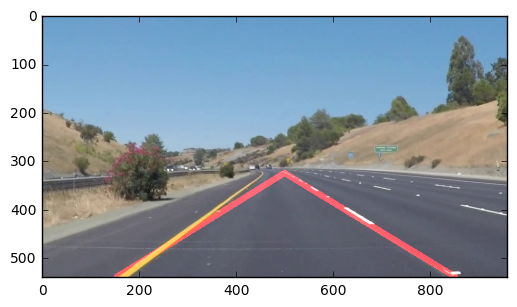

In [24]:
yellow_output = 'yellow.mp4'
clip2 = VideoFileClip('solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

In [25]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Reflections

Congratulations on finding the lane lines!  As the final step in this project, we would like you to share your thoughts on your lane finding pipeline... specifically, how could you imagine making your algorithm better / more robust?  Where will your current algorithm be likely to fail?

Please add your thoughts below,  and if you're up for making your pipeline more robust, be sure to scroll down and check out the optional challenge video below!


Weaknesses:

1. The masking region considered for filtering out the noise is hard coded.  This will mean that a narrower lane with noise at the boundaries might not be detected well by the system.  Need to build in logic to remove this hard code
2. The running of scripts takes between 30 seconds to 75 seconds for videos.  Need to look at optimizing the script.
3. The extrapolation of the lines have been done using slope calculation and end point assumptions.  It might be better to fit a linear regression equation to get a more accurate result
4. The yellow line curves to the lest in some frames.  This is not being adequately captured by the logic.  Need to refine the logic to achieve this.

## Submission

If you're satisfied with your video outputs it's time to submit!  Submit this ipython notebook for review.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

[[506 426 512 426]]
[[496 425 507 425]]
[[524 425 583 421]]
[[393 436 561 425]]
[[360 499 583 440]]
[[542 494 598 459]]
[[566 483 633 444]]
[[512 425 525 424]]
[[286 443 319 441]]
[[294 440 321 438]]
[[468 540 544 494]]
[[398 429 408 429]]
[[205 540 386 492]]
[[421 428 432 428]]
[[725 453 731 457]]
[[363 438 381 437]]
[[503 525 558 490]]
[[717 449 723 453]]
[[332 435 371 433]]
[[459 427 469 427]]
[[402 431 419 431]]
[[385 430 397 430]]
[[467 429 473 429]]
[[614 418 620 418]]
[[758 477 779 491]]
[[483 539 505 525]]
[[631 418 638 418]]
[[366 436 412 433]]
[[605 436 644 430]]
[[650 417 656 417]]
[[628 420 634 420]]
[[754 478 771 491]]
[[552 488 620 447]]
[[354 431 368 431]]
[[429 432 434 432]]
[[629 412 634 413]]
[[341 437 368 435]]
[[321 441 327 441]]
[[633 445 640 441]]
[[615 421 621 421]]
[[553 493 582 474]]
[[382 437 392 436]]
[[433 428 447 428]]
[[395 359 427 364]]
[[759 477 779 490]]
[[507 367 513 367]]
[[722 455 728 459]]
[[488 527 530 502]]
[[452 430 460 429]]
[[671 417 678 422]]


  0%|                                                  | 0/251 [00:00<?, ?it/s]

[[506 426 512 426]]
[[496 425 507 425]]
[[524 425 583 421]]
[[393 436 561 425]]
[[360 499 583 440]]
[[542 494 598 459]]
[[566 483 633 444]]
[[512 425 525 424]]
[[286 443 319 441]]
[[294 440 321 438]]
[[468 540 544 494]]
[[398 429 408 429]]
[[205 540 386 492]]
[[421 428 432 428]]
[[725 453 731 457]]
[[363 438 381 437]]
[[503 525 558 490]]
[[717 449 723 453]]
[[332 435 371 433]]
[[459 427 469 427]]
[[402 431 419 431]]
[[385 430 397 430]]
[[467 429 473 429]]
[[614 418 620 418]]
[[758 477 779 491]]
[[483 539 505 525]]
[[631 418 638 418]]
[[366 436 412 433]]
[[605 436 644 430]]
[[650 417 656 417]]
[[628 420 634 420]]
[[754 478 771 491]]
[[552 488 620 447]]
[[354 431 368 431]]
[[429 432 434 432]]
[[629 412 634 413]]
[[341 437 368 435]]
[[321 441 327 441]]
[[633 445 640 441]]
[[615 421 621 421]]
[[553 493 582 474]]
[[382 437 392 436]]
[[433 428 447 428]]
[[395 359 427 364]]
[[759 477 779 490]]
[[507 367 513 367]]
[[722 455 728 459]]
[[488 527 530 502]]
[[452 430 460 429]]
[[671 417 678 422]]


  0%|▏                                         | 1/251 [00:00<01:05,  3.80it/s]

[[543 425 563 424]]
[[350 433 360 433]]
[[278 441 294 440]]
[[465 427 479 426]]
[[327 440 426 434]]
[[346 431 365 431]]
[[540 423 581 420]]
[[326 434 347 434]]
[[356 500 502 461]]
[[468 540 606 454]]
[[627 444 632 441]]
[[205 540 382 493]]
[[540 501 614 453]]
[[610 420 619 420]]
[[295 439 342 437]]
[[412 432 429 432]]
[[515 427 532 427]]
[[328 435 336 435]]
[[441 430 455 430]]
[[478 467 557 447]]
[[478 428 484 428]]
[[481 540 538 504]]
[[499 424 520 423]]
[[388 429 414 429]]
[[565 444 633 431]]
[[488 429 501 429]]
[[413 430 422 430]]
[[761 479 787 495]]
[[487 427 497 427]]
[[620 410 636 413]]
[[582 422 588 422]]
[[415 428 421 428]]
[[395 431 406 431]]
[[282 443 315 441]]
[[506 459 540 451]]
[[639 420 644 420]]
[[361 433 371 433]]
[[609 418 619 417]]
[[646 417 654 418]]
[[454 367 472 369]]
[[658 417 667 422]]
[[401 359 411 361]]
[[548 495 595 464]]
[[633 417 640 416]]
[[431 433 444 433]]
[[613 454 645 439]]
[[831 526 836 529]]
[[663 426 678 426]]
[[369 434 411 433]]
[[831 525 837 529]]


  1%|▎                                         | 2/251 [00:00<01:07,  3.70it/s]

[[362 438 372 438]]
[[383 434 440 431]]
[[373 437 382 437]]
[[571 423 585 422]]
[[482 540 517 517]]
[[336 506 474 469]]
[[671 416 677 416]]
[[383 437 554 425]]
[[489 529 601 457]]
[[607 418 615 418]]
[[519 425 526 425]]
[[399 432 412 431]]
[[380 430 390 430]]
[[539 502 616 452]]
[[343 437 367 435]]
[[303 439 317 439]]
[[205 540 341 504]]
[[420 429 441 428]]
[[503 460 561 446]]
[[322 435 371 433]]
[[486 425 502 425]]
[[586 420 596 420]]
[[499 424 515 424]]
[[666 416 674 422]]
[[629 432 659 427]]
[[527 424 579 421]]
[[660 421 668 423]]
[[325 440 339 440]]
[[728 455 735 460]]
[[780 491 796 501]]
[[397 359 413 362]]
[[606 459 624 448]]
[[577 441 582 441]]
[[492 369 505 373]]
[[406 429 422 428]]
[[768 483 786 494]]
[[606 421 616 421]]
[[381 370 396 370]]
[[564 485 583 472]]
[[725 457 733 462]]
[[608 453 638 439]]
[[584 440 616 434]]
[[340 439 355 439]]
[[660 420 668 422]]
[[617 409 632 413]]
[[519 517 528 511]]
[[293 442 308 442]]
[[624 449 635 443]]
[[278 441 300 440]]
[[765 486 790 502]]


  1%|▌                                         | 3/251 [00:00<01:05,  3.81it/s]

[[293 518 468 471]]
[[442 431 450 431]]
[[408 435 417 435]]
[[367 431 377 431]]
[[274 444 329 441]]
[[392 434 441 431]]
[[585 421 615 419]]
[[546 423 560 423]]
[[418 429 446 428]]
[[473 540 598 459]]
[[618 449 626 444]]
[[552 494 582 473]]
[[517 425 529 425]]
[[597 438 611 435]]
[[615 454 628 446]]
[[662 422 686 422]]
[[301 518 359 504]]
[[316 435 327 435]]
[[295 440 324 439]]
[[485 540 529 511]]
[[409 431 416 431]]
[[377 437 384 437]]
[[472 469 558 447]]
[[530 424 545 423]]
[[511 428 555 425]]
[[716 446 723 451]]
[[328 435 354 434]]
[[387 430 401 430]]
[[441 433 447 433]]
[[780 495 799 509]]
[[560 422 578 421]]
[[394 436 407 436]]
[[629 443 637 443]]
[[775 488 802 505]]
[[574 479 619 451]]
[[466 431 479 431]]
[[650 428 658 428]]
[[493 425 501 425]]
[[657 427 685 427]]
[[369 435 382 435]]
[[502 424 516 424]]
[[462 475 500 464]]
[[382 432 395 432]]
[[715 446 724 453]]
[[609 454 622 446]]
[[208 540 229 534]]
[[590 465 605 455]]
[[777 488 808 508]]
[[580 419 589 419]]
[[551 448 573 443]]


  2%|▋                                         | 4/251 [00:01<01:05,  3.75it/s]

[[390 437 398 437]]
[[531 427 541 427]]
[[306 440 372 436]]
[[416 435 421 435]]
[[450 476 573 443]]
[[395 430 437 429]]
[[516 426 577 421]]
[[474 431 488 431]]
[[209 540 352 504]]
[[488 540 538 505]]
[[449 431 456 431]]
[[417 433 448 431]]
[[513 514 619 448]]
[[577 477 622 450]]
[[431 434 440 434]]
[[659 423 669 421]]
[[489 430 530 427]]
[[362 500 436 481]]
[[445 481 455 478]]
[[288 444 297 444]]
[[665 428 684 428]]
[[272 527 333 512]]
[[319 442 337 441]]
[[630 419 635 419]]
[[786 494 821 516]]
[[373 433 412 434]]
[[533 507 563 488]]
[[583 421 592 421]]
[[377 435 396 435]]
[[790 502 811 517]]
[[337 433 386 431]]
[[600 422 611 422]]
[[598 438 653 429]]
[[311 436 325 436]]
[[779 495 807 515]]
[[311 442 318 442]]
[[602 419 610 419]]
[[669 423 675 420]]
[[479 537 502 523]]
[[609 458 631 446]]
[[646 418 657 418]]
[[472 427 479 427]]
[[338 441 372 439]]
[[729 461 739 467]]
[[454 433 467 432]]
[[673 417 680 422]]
[[674 420 681 420]]
[[485 426 516 424]]
[[732 459 740 464]]
[[637 420 651 420]]


  2%|▊                                         | 5/251 [00:01<01:05,  3.74it/s]

[[400 437 408 437]]
[[467 432 530 428]]
[[436 432 461 430]]
[[238 535 350 505]]
[[589 467 618 449]]
[[566 422 575 422]]
[[582 474 627 448]]
[[372 439 399 437]]
[[386 431 403 431]]
[[276 443 383 436]]
[[477 540 522 510]]
[[306 437 313 437]]
[[575 424 583 424]]
[[475 469 604 437]]
[[581 421 610 420]]
[[330 442 348 441]]
[[337 433 379 432]]
[[821 517 830 523]]
[[282 445 315 443]]
[[634 433 658 428]]
[[491 540 534 507]]
[[638 444 653 436]]
[[734 461 744 467]]
[[256 534 298 522]]
[[354 435 399 433]]
[[788 500 827 527]]
[[517 512 607 455]]
[[531 425 560 422]]
[[395 435 413 434]]
[[793 499 831 523]]
[[471 427 484 427]]
[[385 495 427 484]]
[[532 509 598 464]]
[[641 418 646 419]]
[[414 434 419 434]]
[[677 429 687 427]]
[[626 434 641 431]]
[[404 430 416 430]]
[[409 436 421 436]]
[[557 425 569 424]]
[[613 409 628 414]]
[[445 434 458 433]]
[[420 430 432 430]]
[[377 371 390 371]]
[[424 433 434 433]]
[[317 437 327 437]]
[[326 511 356 503]]
[[678 421 683 420]]
[[610 436 615 436]]
[[531 427 544 427]]


  2%|█                                         | 6/251 [00:01<01:05,  3.76it/s]

[[218 540 415 487]]
[[385 431 396 431]]
[[342 435 356 435]]
[[598 419 611 418]]
[[276 443 377 436]]
[[540 497 617 449]]
[[596 422 610 422]]
[[391 437 472 432]]
[[431 432 467 429]]
[[499 532 583 473]]
[[329 433 364 432]]
[[472 470 587 440]]
[[378 436 401 434]]
[[661 417 669 417]]
[[406 430 420 430]]
[[395 432 405 432]]
[[798 506 845 538]]
[[581 475 626 448]]
[[458 476 485 469]]
[[500 429 511 429]]
[[302 437 341 435]]
[[476 540 545 494]]
[[404 434 428 432]]
[[521 425 532 425]]
[[477 426 510 425]]
[[735 462 747 469]]
[[671 423 686 422]]
[[822 516 850 533]]
[[574 420 585 420]]
[[654 428 682 428]]
[[445 428 450 428]]
[[654 421 664 421]]
[[221 540 303 518]]
[[332 441 342 441]]
[[512 428 524 428]]
[[671 421 680 419]]
[[317 442 331 442]]
[[625 421 638 417]]
[[475 469 492 464]]
[[613 436 637 431]]
[[628 444 636 444]]
[[378 438 390 437]]
[[402 494 423 487]]
[[451 476 477 468]]
[[486 428 497 428]]
[[651 436 663 433]]
[[486 369 500 373]]
[[533 424 555 423]]
[[804 505 822 515]]
[[490 539 583 474]]


  3%|█▏                                        | 7/251 [00:01<01:04,  3.76it/s]

[[276 443 329 439]]
[[499 463 568 444]]
[[486 428 497 427]]
[[334 433 344 433]]
[[221 540 302 518]]
[[273 445 283 445]]
[[488 532 608 454]]
[[567 422 572 422]]
[[632 421 648 420]]
[[343 437 356 437]]
[[314 437 343 435]]
[[371 431 387 430]]
[[611 457 624 449]]
[[389 437 423 435]]
[[437 482 475 472]]
[[490 539 597 464]]
[[290 444 324 442]]
[[340 508 401 490]]
[[384 431 413 430]]
[[329 438 341 438]]
[[351 440 388 437]]
[[442 433 457 433]]
[[347 435 359 435]]
[[523 427 542 426]]
[[810 513 849 540]]
[[508 426 530 425]]
[[356 432 370 432]]
[[412 433 424 432]]
[[433 481 466 471]]
[[619 418 634 417]]
[[839 526 849 533]]
[[401 493 454 478]]
[[440 431 454 431]]
[[584 423 589 423]]
[[572 443 658 428]]
[[531 424 552 423]]
[[356 436 397 435]]
[[645 438 664 433]]
[[303 517 332 510]]
[[442 428 464 428]]
[[489 540 562 489]]
[[360 434 371 434]]
[[578 421 590 421]]
[[635 418 647 417]]
[[816 512 832 522]]
[[810 514 827 526]]
[[406 432 411 432]]
[[510 428 522 428]]
[[657 421 662 422]]
[[553 422 566 422]]


  3%|█▎                                        | 8/251 [00:02<01:06,  3.65it/s]

[[481 428 494 427]]
[[272 525 295 519]]
[[399 430 411 430]]
[[382 435 450 431]]
[[476 540 548 493]]
[[294 520 506 460]]
[[489 540 608 457]]
[[408 429 425 429]]
[[660 417 672 417]]
[[671 422 681 422]]
[[466 432 527 427]]
[[347 437 369 436]]
[[505 426 512 426]]
[[531 503 619 448]]
[[320 433 357 432]]
[[396 436 410 436]]
[[351 439 364 439]]
[[397 432 411 432]]
[[571 423 609 422]]
[[386 497 466 474]]
[[441 428 482 426]]
[[324 438 331 438]]
[[611 436 643 430]]
[[570 420 580 420]]
[[322 435 347 435]]
[[527 424 535 424]]
[[513 425 524 425]]
[[824 523 850 540]]
[[288 441 302 441]]
[[314 440 324 439]]
[[649 421 670 421]]
[[281 444 290 444]]
[[610 456 637 443]]
[[489 426 504 424]]
[[744 466 757 475]]
[[652 438 664 435]]
[[536 424 570 421]]
[[826 524 851 540]]
[[290 434 307 434]]
[[637 421 642 420]]
[[306 443 315 442]]
[[620 418 646 418]]
[[302 436 327 436]]
[[379 437 395 437]]
[[491 369 498 371]]
[[411 435 426 435]]
[[629 433 639 431]]
[[438 433 451 433]]
[[222 540 303 517]]
[[532 453 573 443]]


  4%|█▌                                        | 9/251 [00:02<01:05,  3.67it/s]

[[275 445 328 442]]
[[569 424 579 424]]
[[491 540 585 472]]
[[308 440 317 440]]
[[349 440 394 437]]
[[647 424 658 424]]
[[360 435 374 434]]
[[461 427 486 426]]
[[268 528 505 461]]
[[441 431 449 431]]
[[504 462 573 443]]
[[369 436 440 432]]
[[421 429 458 428]]
[[477 540 556 488]]
[[397 430 420 430]]
[[433 434 471 432]]
[[591 468 636 444]]
[[503 426 569 422]]
[[311 436 318 436]]
[[538 499 618 449]]
[[374 431 396 431]]
[[360 436 368 436]]
[[499 429 510 429]]
[[585 441 653 429]]
[[343 511 410 490]]
[[747 469 761 478]]
[[615 419 642 419]]
[[665 421 683 420]]
[[403 436 416 436]]
[[459 430 470 430]]
[[284 442 290 442]]
[[349 432 363 432]]
[[743 471 758 480]]
[[487 430 498 430]]
[[222 540 273 526]]
[[511 428 523 428]]
[[295 437 304 437]]
[[481 428 492 427]]
[[421 435 432 435]]
[[841 533 851 540]]
[[569 421 592 420]]
[[408 491 461 476]]
[[470 304 510 311]]
[[582 423 607 423]]
[[633 446 661 436]]
[[322 439 355 437]]
[[483 367 489 367]]
[[608 410 622 414]]
[[376 433 397 433]]
[[634 443 647 438]]


  4%|█▋                                       | 10/251 [00:02<01:02,  3.86it/s]

[[385 436 420 434]]
[[568 425 595 423]]
[[422 487 455 478]]
[[233 539 362 502]]
[[348 435 360 435]]
[[543 424 588 421]]
[[394 431 415 431]]
[[480 540 599 460]]
[[529 427 542 426]]
[[447 477 517 459]]
[[355 440 364 440]]
[[492 540 580 476]]
[[321 434 343 434]]
[[356 436 383 434]]
[[302 437 332 438]]
[[310 443 317 443]]
[[543 451 577 443]]
[[469 432 493 431]]
[[327 439 342 439]]
[[324 442 335 442]]
[[365 440 384 439]]
[[418 485 476 470]]
[[290 442 326 440]]
[[420 433 434 433]]
[[385 438 398 438]]
[[606 456 615 452]]
[[616 454 648 441]]
[[457 431 481 429]]
[[344 433 365 432]]
[[325 517 339 513]]
[[753 473 767 482]]
[[482 429 488 429]]
[[548 450 570 445]]
[[646 422 656 422]]
[[471 427 483 427]]
[[405 437 432 435]]
[[441 482 456 478]]
[[615 414 620 416]]
[[574 444 650 430]]
[[750 472 767 483]]
[[357 503 379 497]]
[[489 426 500 425]]
[[613 420 634 420]]
[[585 473 619 453]]
[[481 369 494 373]]
[[501 427 513 427]]
[[482 308 503 311]]
[[359 437 367 437]]
[[370 432 393 432]]
[[295 444 309 444]]


  4%|█▊                                       | 11/251 [00:02<01:06,  3.61it/s]

[[462 473 552 448]]
[[271 446 483 431]]
[[498 427 503 427]]
[[501 426 558 422]]
[[469 426 493 425]]
[[526 507 606 455]]
[[225 540 299 520]]
[[582 423 600 422]]
[[491 540 588 470]]
[[667 423 680 423]]
[[634 421 641 421]]
[[462 427 468 427]]
[[417 431 459 428]]
[[497 429 520 428]]
[[284 442 300 441]]
[[560 447 580 442]]
[[302 519 419 484]]
[[580 476 619 452]]
[[522 427 530 427]]
[[433 481 463 472]]
[[342 510 431 484]]
[[458 430 479 429]]
[[332 433 346 433]]
[[305 441 322 440]]
[[480 540 511 519]]
[[347 433 366 432]]
[[531 426 536 426]]
[[394 431 400 431]]
[[512 517 538 500]]
[[610 436 616 436]]
[[363 436 384 436]]
[[309 434 331 434]]
[[494 425 500 425]]
[[363 435 375 434]]
[[581 442 609 437]]
[[575 421 589 421]]
[[334 438 363 437]]
[[608 454 646 438]]
[[398 430 406 430]]
[[623 450 662 436]]
[[758 476 773 487]]
[[612 412 623 415]]
[[619 419 640 419]]
[[314 436 357 435]]
[[753 474 768 484]]
[[750 475 766 487]]
[[397 434 425 433]]
[[658 429 668 428]]
[[479 540 522 511]]
[[469 305 500 310]]


  5%|█▉                                       | 12/251 [00:03<01:05,  3.67it/s]

[[359 436 366 436]]
[[547 423 586 421]]
[[453 432 476 431]]
[[510 425 516 425]]
[[500 462 563 445]]
[[439 431 447 431]]
[[319 433 364 432]]
[[494 539 577 477]]
[[351 506 359 504]]
[[374 433 382 433]]
[[497 426 504 426]]
[[669 421 675 420]]
[[333 441 378 438]]
[[345 508 440 481]]
[[422 432 436 432]]
[[479 540 564 481]]
[[625 419 632 417]]
[[329 435 348 435]]
[[246 535 379 495]]
[[367 436 385 434]]
[[450 475 520 457]]
[[566 480 580 472]]
[[395 436 404 436]]
[[467 426 489 425]]
[[423 434 452 433]]
[[282 442 302 440]]
[[564 445 654 429]]
[[585 472 602 462]]
[[665 423 677 423]]
[[571 423 583 422]]
[[595 465 609 458]]
[[349 434 373 434]]
[[273 445 303 443]]
[[592 463 601 459]]
[[357 505 371 501]]
[[477 430 503 429]]
[[368 499 429 481]]
[[661 421 668 421]]
[[636 445 650 439]]
[[315 439 332 438]]
[[383 437 394 437]]
[[385 435 418 433]]
[[603 460 637 444]]
[[676 420 683 420]]
[[394 430 415 430]]
[[611 412 617 414]]
[[758 477 780 490]]
[[597 460 606 456]]
[[581 423 592 423]]
[[603 408 616 412]]


  5%|██                                       | 13/251 [00:03<01:03,  3.77it/s]

[[309 442 342 440]]
[[388 434 426 432]]
[[363 431 410 429]]
[[321 435 377 433]]
[[495 536 551 496]]
[[304 516 405 487]]
[[487 429 495 429]]
[[479 539 601 457]]
[[268 531 404 490]]
[[388 436 412 435]]
[[427 431 481 427]]
[[587 422 600 422]]
[[462 426 475 426]]
[[546 498 607 457]]
[[566 423 586 423]]
[[659 423 665 422]]
[[673 419 680 419]]
[[497 462 531 453]]
[[438 433 443 433]]
[[552 447 645 429]]
[[532 423 544 422]]
[[642 421 665 421]]
[[476 425 486 425]]
[[525 426 535 426]]
[[224 540 313 514]]
[[507 427 524 426]]
[[321 438 344 436]]
[[763 480 788 496]]
[[344 437 392 433]]
[[464 431 486 429]]
[[551 421 583 420]]
[[284 437 295 436]]
[[449 475 493 464]]
[[361 438 387 437]]
[[410 376 421 378]]
[[621 451 641 439]]
[[609 412 615 414]]
[[296 437 307 436]]
[[415 375 424 377]]
[[759 482 782 496]]
[[588 466 610 452]]
[[633 418 640 420]]
[[719 447 725 449]]
[[444 432 452 432]]
[[490 540 521 518]]
[[723 451 734 458]]
[[447 427 461 427]]
[[642 439 662 433]]
[[663 416 673 422]]
[[603 460 617 452]]


  6%|██▎                                      | 14/251 [00:03<01:03,  3.72it/s]

[[661 416 675 415]]
[[296 442 317 441]]
[[227 538 457 472]]
[[285 436 293 436]]
[[390 433 404 433]]
[[318 441 370 437]]
[[360 430 380 430]]
[[489 531 593 461]]
[[564 420 573 420]]
[[405 432 445 430]]
[[301 520 392 493]]
[[490 539 585 470]]
[[640 423 654 423]]
[[321 437 326 437]]
[[407 434 416 434]]
[[278 441 320 438]]
[[381 430 386 430]]
[[533 451 646 429]]
[[394 429 406 429]]
[[491 425 505 425]]
[[288 434 293 434]]
[[319 432 338 432]]
[[622 418 644 416]]
[[333 434 364 433]]
[[474 429 486 429]]
[[769 483 792 498]]
[[348 436 366 435]]
[[462 428 478 427]]
[[612 454 656 436]]
[[460 425 481 425]]
[[421 433 429 433]]
[[530 425 540 425]]
[[533 423 561 421]]
[[765 485 780 496]]
[[580 474 609 456]]
[[371 437 403 435]]
[[775 491 791 502]]
[[312 432 318 432]]
[[561 423 573 423]]
[[598 458 643 438]]
[[290 433 310 433]]
[[421 428 439 427]]
[[506 424 514 424]]
[[441 429 456 429]]
[[640 421 654 421]]
[[673 419 686 427]]
[[378 432 384 432]]
[[453 431 471 430]]
[[371 434 385 434]]
[[476 540 501 524]]


  6%|██▍                                      | 15/251 [00:04<01:03,  3.71it/s]

[[514 424 547 423]]
[[489 428 516 426]]
[[464 430 485 429]]
[[217 540 418 483]]
[[550 496 598 462]]
[[549 448 566 444]]
[[477 540 598 458]]
[[346 431 371 431]]
[[478 425 486 425]]
[[286 443 307 442]]
[[270 529 363 501]]
[[316 437 341 437]]
[[369 434 391 434]]
[[489 540 546 497]]
[[487 426 494 426]]
[[357 434 371 433]]
[[394 435 401 435]]
[[285 436 322 435]]
[[777 488 803 505]]
[[308 441 393 436]]
[[620 418 637 418]]
[[422 482 555 446]]
[[621 433 626 433]]
[[771 489 800 509]]
[[420 431 444 430]]
[[347 436 367 435]]
[[569 421 583 421]]
[[298 433 345 432]]
[[638 423 652 423]]
[[428 428 438 428]]
[[631 420 637 420]]
[[387 430 403 429]]
[[391 433 418 432]]
[[567 444 589 440]]
[[678 426 684 426]]
[[575 477 584 471]]
[[547 421 552 421]]
[[504 424 513 424]]
[[718 447 727 453]]
[[602 456 613 451]]
[[323 435 347 434]]
[[731 457 739 462]]
[[283 441 323 438]]
[[593 466 622 449]]
[[644 421 651 421]]
[[651 429 664 428]]
[[782 496 799 508]]
[[564 480 588 464]]
[[423 365 435 367]]
[[583 422 595 422]]


  6%|██▌                                      | 16/251 [00:04<01:04,  3.62it/s]

[[352 435 434 430]]
[[481 425 517 424]]
[[468 469 554 446]]
[[429 480 461 471]]
[[213 540 347 502]]
[[392 435 399 435]]
[[357 437 367 437]]
[[513 513 601 456]]
[[428 432 455 431]]
[[295 521 362 501]]
[[488 540 590 466]]
[[295 436 328 434]]
[[790 501 815 517]]
[[490 427 502 427]]
[[342 431 398 429]]
[[606 418 633 417]]
[[665 415 684 427]]
[[456 430 466 430]]
[[354 501 397 488]]
[[782 492 817 513]]
[[276 443 350 438]]
[[283 440 309 438]]
[[400 434 414 434]]
[[434 429 448 429]]
[[347 435 355 434]]
[[778 494 812 516]]
[[547 448 577 442]]
[[585 470 607 456]]
[[640 421 651 421]]
[[412 484 438 477]]
[[615 452 647 439]]
[[250 533 307 517]]
[[365 433 376 432]]
[[454 425 472 424]]
[[629 443 669 430]]
[[611 435 646 429]]
[[545 421 556 421]]
[[385 435 391 435]]
[[503 520 531 502]]
[[719 447 726 452]]
[[476 539 501 523]]
[[655 429 663 428]]
[[310 432 324 432]]
[[566 421 576 421]]
[[503 426 510 426]]
[[325 435 358 433]]
[[417 364 428 366]]
[[785 493 822 515]]
[[469 425 476 425]]
[[522 423 541 423]]


  7%|██▊                                      | 17/251 [00:04<01:05,  3.60it/s]

[[261 526 471 469]]
[[276 443 342 439]]
[[419 433 447 432]]
[[415 431 444 430]]
[[669 415 675 415]]
[[617 419 633 418]]
[[268 528 335 509]]
[[488 540 585 470]]
[[657 417 677 416]]
[[656 421 672 420]]
[[334 436 358 436]]
[[653 423 678 423]]
[[305 435 323 434]]
[[482 426 536 424]]
[[475 540 595 460]]
[[638 422 655 422]]
[[787 501 819 522]]
[[375 430 394 430]]
[[620 434 645 430]]
[[469 425 475 425]]
[[320 435 337 435]]
[[795 500 838 526]]
[[474 429 483 429]]
[[478 466 567 444]]
[[301 433 323 433]]
[[823 523 830 528]]
[[393 435 407 435]]
[[318 437 324 437]]
[[382 434 398 433]]
[[720 449 729 456]]
[[684 428 694 428]]
[[541 422 563 421]]
[[424 428 429 428]]
[[541 425 547 425]]
[[588 468 631 446]]
[[338 434 350 434]]
[[557 424 591 423]]
[[607 454 629 444]]
[[804 511 827 527]]
[[359 435 386 433]]
[[347 438 361 438]]
[[632 443 639 441]]
[[645 438 663 433]]
[[311 516 349 506]]
[[571 421 576 421]]
[[793 499 816 514]]
[[345 431 374 431]]
[[499 427 504 427]]
[[325 437 330 437]]
[[421 365 431 367]]


  7%|██▉                                      | 18/251 [00:04<01:03,  3.68it/s]

[[323 440 417 434]]
[[635 422 648 422]]
[[606 420 636 418]]
[[302 433 327 433]]
[[328 437 370 435]]
[[222 537 402 488]]
[[613 452 618 449]]
[[488 540 589 467]]
[[314 436 367 433]]
[[651 418 660 416]]
[[228 540 376 498]]
[[813 511 851 535]]
[[796 506 844 538]]
[[446 427 475 426]]
[[476 540 592 462]]
[[353 431 421 429]]
[[491 428 498 428]]
[[471 468 568 444]]
[[657 423 681 423]]
[[523 424 539 423]]
[[381 493 447 476]]
[[276 443 307 441]]
[[461 430 480 429]]
[[658 435 670 431]]
[[388 433 430 431]]
[[624 449 661 436]]
[[803 506 834 525]]
[[657 416 667 422]]
[[476 425 482 425]]
[[538 425 563 423]]
[[605 437 640 431]]
[[828 527 846 539]]
[[512 425 517 425]]
[[675 429 685 429]]
[[557 484 567 478]]
[[441 432 457 431]]
[[482 426 502 426]]
[[617 450 649 437]]
[[544 422 551 422]]
[[738 463 748 471]]
[[493 310 500 311]]
[[514 427 523 426]]
[[657 421 671 421]]
[[586 409 593 410]]
[[584 441 614 436]]
[[468 306 490 309]]
[[599 415 609 419]]
[[720 449 731 456]]
[[280 440 289 440]]
[[553 492 563 485]]


  8%|███                                      | 19/251 [00:05<01:03,  3.65it/s]

[[301 442 466 431]]
[[212 540 375 496]]
[[356 436 394 434]]
[[477 539 579 470]]
[[546 425 561 425]]
[[654 418 674 417]]
[[489 540 587 469]]
[[228 540 365 501]]
[[613 420 623 420]]
[[528 423 539 423]]
[[579 424 594 424]]
[[540 423 547 423]]
[[502 460 634 432]]
[[304 437 346 435]]
[[349 432 358 432]]
[[359 432 367 432]]
[[594 465 619 453]]
[[521 425 528 425]]
[[314 433 327 433]]
[[829 528 840 535]]
[[287 440 313 438]]
[[502 428 513 428]]
[[327 438 345 437]]
[[814 514 833 525]]
[[528 424 539 424]]
[[458 427 478 426]]
[[660 420 666 424]]
[[589 464 622 448]]
[[654 417 661 417]]
[[347 435 353 435]]
[[598 419 607 419]]
[[666 421 671 424]]
[[740 466 752 473]]
[[635 423 671 422]]
[[690 427 695 430]]
[[354 434 362 434]]
[[605 459 644 442]]
[[825 519 858 540]]
[[808 515 847 540]]
[[592 421 597 421]]
[[371 496 417 485]]
[[635 421 644 421]]
[[374 431 394 430]]
[[650 425 660 425]]
[[518 427 531 427]]
[[498 427 511 426]]
[[476 540 588 465]]
[[416 485 480 466]]
[[284 437 308 436]]
[[740 470 747 475]]


  8%|███▎                                     | 20/251 [00:05<01:10,  3.28it/s]

[[275 444 370 438]]
[[675 419 681 419]]
[[439 428 483 427]]
[[304 516 506 459]]
[[344 437 353 437]]
[[410 432 423 432]]
[[493 538 579 474]]
[[509 459 540 451]]
[[485 429 515 428]]
[[476 540 540 497]]
[[663 434 678 428]]
[[442 432 452 432]]
[[660 424 682 424]]
[[303 434 319 434]]
[[354 436 367 436]]
[[663 418 674 418]]
[[592 466 646 441]]
[[632 444 639 442]]
[[589 421 595 421]]
[[320 433 349 433]]
[[280 525 332 511]]
[[649 425 657 420]]
[[278 441 309 439]]
[[308 436 332 436]]
[[534 500 586 466]]
[[231 536 314 513]]
[[572 424 591 424]]
[[823 525 846 540]]
[[829 523 859 540]]
[[458 431 484 429]]
[[674 430 697 430]]
[[484 427 506 426]]
[[722 453 727 455]]
[[554 448 581 443]]
[[402 430 410 430]]
[[619 422 627 422]]
[[582 442 611 437]]
[[401 435 416 435]]
[[598 420 621 419]]
[[230 540 300 520]]
[[399 433 410 433]]
[[665 417 673 417]]
[[535 423 570 423]]
[[371 437 384 437]]
[[592 464 602 457]]
[[350 432 376 432]]
[[358 435 364 434]]
[[550 496 585 470]]
[[642 432 662 431]]
[[462 368 469 370]]


  8%|███▍                                     | 21/251 [00:05<01:10,  3.27it/s]

[[277 443 316 441]]
[[309 513 433 479]]
[[301 439 310 439]]
[[434 428 471 426]]
[[513 427 521 427]]
[[400 435 405 435]]
[[353 435 368 434]]
[[536 425 558 425]]
[[495 426 546 422]]
[[455 430 489 429]]
[[647 425 653 424]]
[[307 433 337 433]]
[[455 472 564 445]]
[[627 446 633 443]]
[[488 531 527 505]]
[[491 539 578 474]]
[[527 419 538 419]]
[[528 503 570 476]]
[[225 540 299 520]]
[[568 476 580 470]]
[[390 430 397 430]]
[[288 434 306 434]]
[[360 431 389 431]]
[[476 540 487 533]]
[[234 534 262 527]]
[[660 418 672 417]]
[[593 465 618 452]]
[[651 431 660 430]]
[[522 426 534 426]]
[[316 435 341 435]]
[[745 469 761 480]]
[[334 432 366 432]]
[[383 434 407 432]]
[[629 423 637 423]]
[[392 435 399 435]]
[[280 440 289 440]]
[[326 437 340 437]]
[[751 472 761 479]]
[[561 446 614 436]]
[[640 419 654 419]]
[[647 422 657 422]]
[[525 505 540 496]]
[[617 453 647 440]]
[[682 429 690 429]]
[[666 432 671 432]]
[[590 463 603 457]]
[[370 435 382 434]]
[[663 421 671 421]]
[[551 422 556 422]]
[[587 421 592 421]]


  9%|███▌                                     | 22/251 [00:06<01:24,  2.72it/s]

[[274 444 336 440]]
[[435 432 502 429]]
[[356 432 373 432]]
[[627 424 639 421]]
[[389 492 494 462]]
[[289 437 325 436]]
[[524 426 538 426]]
[[338 437 403 433]]
[[476 540 546 491]]
[[601 459 606 456]]
[[454 427 470 427]]
[[634 423 655 423]]
[[502 460 630 432]]
[[489 540 582 472]]
[[479 427 510 426]]
[[569 476 583 469]]
[[662 418 671 418]]
[[301 434 319 434]]
[[596 421 625 420]]
[[281 440 297 440]]
[[595 465 646 441]]
[[642 425 667 425]]
[[374 431 411 430]]
[[642 432 658 432]]
[[216 540 330 508]]
[[750 473 767 484]]
[[662 419 680 419]]
[[482 536 571 476]]
[[560 423 567 423]]
[[343 439 376 437]]
[[572 474 588 466]]
[[410 432 440 428]]
[[668 424 682 424]]
[[669 429 697 430]]
[[591 414 601 418]]
[[506 314 523 315]]
[[647 441 659 438]]
[[616 451 655 436]]
[[578 409 585 411]]
[[528 423 536 423]]
[[267 529 274 527]]
[[441 428 453 427]]
[[405 365 417 367]]
[[536 504 566 483]]
[[418 375 429 377]]
[[370 498 394 491]]
[[541 423 554 423]]
[[303 439 325 438]]
[[324 433 347 432]]
[[748 476 762 485]]


  9%|███▊                                     | 23/251 [00:06<01:16,  2.97it/s]

[[594 421 609 420]]
[[348 432 395 431]]
[[501 428 511 428]]
[[284 521 486 464]]
[[343 436 358 435]]
[[311 441 329 440]]
[[477 540 570 475]]
[[314 438 343 437]]
[[360 438 428 433]]
[[523 424 552 423]]
[[489 539 577 475]]
[[599 462 649 440]]
[[465 428 508 426]]
[[661 425 670 424]]
[[625 424 634 424]]
[[439 428 445 428]]
[[371 435 403 432]]
[[585 442 631 433]]
[[589 464 622 448]]
[[534 426 552 426]]
[[632 423 660 423]]
[[438 432 446 432]]
[[645 420 679 419]]
[[217 540 281 521]]
[[629 446 639 441]]
[[658 424 665 424]]
[[454 431 496 429]]
[[755 476 773 488]]
[[625 426 659 425]]
[[525 423 531 423]]
[[627 450 638 445]]
[[302 434 339 433]]
[[409 431 425 430]]
[[571 475 583 469]]
[[644 418 669 417]]
[[555 448 580 443]]
[[404 430 413 430]]
[[657 436 675 428]]
[[508 424 513 424]]
[[620 450 629 445]]
[[576 476 616 455]]
[[298 442 310 441]]
[[468 309 497 312]]
[[509 458 544 451]]
[[676 430 690 430]]
[[750 476 760 485]]
[[426 429 438 428]]
[[280 440 296 440]]
[[505 519 539 496]]
[[426 369 435 370]]


 10%|███▉                                     | 24/251 [00:06<01:11,  3.19it/s]

[[606 422 636 421]]
[[557 422 564 422]]
[[534 453 571 444]]
[[410 433 420 433]]
[[537 423 550 422]]
[[488 426 505 425]]
[[299 441 394 435]]
[[397 430 408 430]]
[[212 540 285 520]]
[[655 418 661 416]]
[[353 501 410 485]]
[[514 426 538 426]]
[[282 439 289 439]]
[[295 437 313 436]]
[[581 474 605 459]]
[[474 540 510 516]]
[[570 476 578 470]]
[[486 540 570 479]]
[[364 431 382 431]]
[[415 429 424 429]]
[[363 434 370 434]]
[[508 516 542 494]]
[[456 471 552 448]]
[[462 427 483 426]]
[[655 424 677 424]]
[[421 432 439 432]]
[[609 457 651 439]]
[[577 476 590 467]]
[[641 418 652 417]]
[[457 430 470 430]]
[[506 424 529 423]]
[[602 458 619 449]]
[[409 429 414 429]]
[[440 431 456 431]]
[[513 419 521 419]]
[[575 473 602 457]]
[[306 438 328 437]]
[[423 428 446 428]]
[[392 432 397 432]]
[[605 420 629 420]]
[[760 479 780 492]]
[[638 422 662 422]]
[[755 480 771 491]]
[[338 432 358 432]]
[[519 508 566 477]]
[[575 443 624 434]]
[[671 430 684 430]]
[[495 312 506 313]]
[[547 423 561 423]]
[[587 417 601 421]]


 10%|████                                     | 25/251 [00:07<01:09,  3.24it/s]

[[305 441 312 441]]
[[350 438 383 436]]
[[522 427 534 427]]
[[287 435 369 432]]
[[626 424 632 423]]
[[443 475 496 462]]
[[555 425 564 425]]
[[591 421 606 420]]
[[580 443 616 435]]
[[668 419 681 419]]
[[571 476 595 461]]
[[457 428 489 427]]
[[597 461 603 457]]
[[339 505 400 488]]
[[544 497 583 473]]
[[638 425 658 424]]
[[445 431 477 430]]
[[390 431 435 428]]
[[475 539 567 477]]
[[763 482 789 498]]
[[832 531 837 535]]
[[289 439 326 438]]
[[488 540 541 499]]
[[307 436 319 436]]
[[761 485 782 499]]
[[444 427 455 427]]
[[602 461 649 440]]
[[533 424 554 424]]
[[489 463 579 443]]
[[672 428 681 428]]
[[344 436 369 435]]
[[217 540 300 517]]
[[485 429 506 428]]
[[587 419 595 419]]
[[611 420 620 420]]
[[593 422 598 422]]
[[530 508 553 492]]
[[509 424 527 424]]
[[658 421 666 422]]
[[665 424 680 424]]
[[584 416 591 418]]
[[321 440 345 439]]
[[596 423 611 423]]
[[636 433 646 433]]
[[617 422 631 426]]
[[638 418 651 418]]
[[384 435 398 435]]
[[415 367 431 370]]
[[483 311 494 312]]
[[567 420 573 420]]


 10%|████▏                                    | 26/251 [00:07<01:10,  3.18it/s]

[[552 422 559 422]]
[[602 422 630 421]]
[[459 428 515 424]]
[[405 485 447 474]]
[[276 443 362 437]]
[[474 539 569 475]]
[[363 436 390 435]]
[[475 466 551 449]]
[[494 533 572 478]]
[[406 433 440 432]]
[[532 423 545 423]]
[[678 427 687 427]]
[[291 434 340 433]]
[[294 439 299 439]]
[[299 516 414 483]]
[[385 431 448 427]]
[[581 472 607 459]]
[[615 454 650 439]]
[[582 419 596 419]]
[[604 456 649 437]]
[[215 540 296 518]]
[[520 425 526 425]]
[[296 436 308 436]]
[[662 421 667 424]]
[[582 420 613 420]]
[[341 435 356 435]]
[[766 487 787 501]]
[[597 423 603 423]]
[[489 310 495 313]]
[[780 492 798 503]]
[[357 434 364 434]]
[[671 423 686 423]]
[[650 422 664 424]]
[[280 440 291 439]]
[[338 432 368 432]]
[[630 418 641 420]]
[[644 425 649 422]]
[[571 475 581 468]]
[[628 433 638 432]]
[[393 364 405 366]]
[[578 443 625 433]]
[[769 485 799 503]]
[[641 423 651 425]]
[[562 480 609 454]]
[[443 431 451 431]]
[[550 449 575 443]]
[[636 424 642 426]]
[[541 424 555 423]]
[[391 434 405 434]]
[[773 486 779 490]]


 11%|████▍                                    | 27/251 [00:07<01:11,  3.14it/s]

[[353 432 368 432]]
[[628 421 643 417]]
[[398 487 450 473]]
[[477 429 498 428]]
[[487 538 568 481]]
[[527 454 622 433]]
[[530 426 544 426]]
[[287 435 341 433]]
[[352 437 423 433]]
[[628 423 649 423]]
[[528 424 544 423]]
[[472 540 555 484]]
[[588 468 619 453]]
[[495 425 500 425]]
[[731 461 739 466]]
[[217 540 321 510]]
[[280 440 344 436]]
[[290 437 299 437]]
[[424 428 439 428]]
[[617 453 640 443]]
[[557 483 617 450]]
[[777 490 810 510]]
[[490 426 495 426]]
[[357 499 510 458]]
[[586 421 603 421]]
[[662 424 674 424]]
[[312 440 318 440]]
[[484 427 490 427]]
[[424 433 440 432]]
[[495 427 514 427]]
[[675 423 687 423]]
[[643 425 661 425]]
[[451 428 456 428]]
[[657 419 681 419]]
[[281 443 286 443]]
[[498 313 526 315]]
[[628 433 649 433]]
[[394 430 425 429]]
[[618 425 626 426]]
[[319 440 336 439]]
[[551 487 559 483]]
[[601 419 607 420]]
[[549 423 555 423]]
[[621 448 673 430]]
[[454 431 472 430]]
[[772 492 802 512]]
[[599 423 609 423]]
[[580 419 590 419]]
[[663 429 670 429]]
[[628 418 647 422]]


 11%|████▌                                    | 28/251 [00:08<01:10,  3.16it/s]

[[244 531 429 478]]
[[525 424 542 423]]
[[528 426 537 426]]
[[530 424 538 424]]
[[437 427 446 427]]
[[346 437 355 437]]
[[316 439 325 439]]
[[287 435 321 433]]
[[597 461 610 453]]
[[581 472 638 443]]
[[359 436 401 434]]
[[484 540 553 490]]
[[423 432 440 432]]
[[491 526 579 469]]
[[614 421 642 420]]
[[471 467 533 453]]
[[529 421 540 421]]
[[375 431 397 430]]
[[280 440 308 438]]
[[791 499 824 519]]
[[589 423 605 423]]
[[486 428 492 428]]
[[319 434 325 434]]
[[448 428 488 426]]
[[779 497 815 520]]
[[670 423 683 423]]
[[627 418 636 418]]
[[441 431 456 431]]
[[640 425 648 425]]
[[598 419 605 420]]
[[398 430 417 428]]
[[576 472 591 463]]
[[537 452 623 433]]
[[577 419 595 420]]
[[279 442 307 441]]
[[493 427 509 427]]
[[621 423 644 423]]
[[718 448 723 449]]
[[471 540 507 516]]
[[396 365 402 366]]
[[786 495 808 509]]
[[407 375 417 377]]
[[661 429 683 430]]
[[326 433 346 433]]
[[650 437 655 438]]
[[578 423 584 423]]
[[606 420 613 422]]
[[577 413 588 417]]
[[525 509 534 503]]
[[420 381 428 382]]


 12%|████▋                                    | 29/251 [00:08<01:10,  3.15it/s]

[[281 439 322 437]]
[[504 428 518 428]]
[[571 425 595 424]]
[[213 540 428 479]]
[[357 432 376 432]]
[[481 426 495 425]]
[[552 423 563 423]]
[[616 452 624 447]]
[[588 466 596 461]]
[[402 434 409 434]]
[[496 425 506 425]]
[[581 421 590 420]]
[[439 476 621 434]]
[[280 442 328 439]]
[[535 504 579 474]]
[[426 428 442 428]]
[[498 521 583 468]]
[[329 433 363 433]]
[[625 419 631 419]]
[[738 462 745 467]]
[[410 434 457 431]]
[[636 423 657 423]]
[[793 501 839 529]]
[[485 540 492 535]]
[[622 434 641 434]]
[[618 424 635 424]]
[[590 421 601 421]]
[[648 425 667 425]]
[[788 503 829 531]]
[[337 438 350 437]]
[[501 426 514 426]]
[[614 427 622 427]]
[[568 482 622 451]]
[[445 429 459 429]]
[[576 413 581 414]]
[[392 365 402 367]]
[[490 421 497 421]]
[[796 502 824 519]]
[[691 431 696 431]]
[[596 423 621 422]]
[[539 500 552 492]]
[[416 380 426 382]]
[[356 437 369 436]]
[[471 540 478 536]]
[[631 448 638 444]]
[[642 425 647 426]]
[[654 419 674 419]]
[[514 425 529 425]]
[[815 520 831 531]]
[[597 461 617 451]]


 12%|████▉                                    | 30/251 [00:08<01:16,  2.89it/s]

[[441 430 462 429]]
[[589 422 616 420]]
[[382 434 389 434]]
[[484 429 502 429]]
[[512 512 573 474]]
[[292 441 353 438]]
[[241 532 411 484]]
[[618 424 628 424]]
[[429 479 619 435]]
[[647 426 659 418]]
[[587 424 602 424]]
[[523 423 529 423]]
[[512 519 589 469]]
[[440 432 457 432]]
[[357 433 383 432]]
[[289 436 298 436]]
[[807 509 857 540]]
[[597 462 615 452]]
[[280 440 287 440]]
[[495 427 507 427]]
[[302 435 325 434]]
[[551 422 558 421]]
[[545 426 558 426]]
[[800 512 844 540]]
[[521 425 538 425]]
[[629 426 651 425]]
[[485 530 589 465]]
[[601 463 617 454]]
[[362 437 384 436]]
[[572 420 579 420]]
[[612 422 634 422]]
[[405 430 412 430]]
[[523 424 540 424]]
[[525 427 540 427]]
[[655 420 682 420]]
[[629 419 637 420]]
[[402 376 413 378]]
[[570 425 580 425]]
[[805 509 853 538]]
[[420 429 427 429]]
[[392 435 405 435]]
[[321 435 348 434]]
[[487 537 515 518]]
[[644 423 660 423]]
[[420 433 439 433]]
[[615 425 629 428]]
[[606 456 619 451]]
[[485 313 516 315]]
[[572 418 579 418]]
[[619 453 657 438]]


 12%|█████                                    | 31/251 [00:09<01:10,  3.14it/s]

[[623 427 636 424]]
[[601 423 636 421]]
[[233 533 320 509]]
[[407 434 449 432]]
[[478 534 582 469]]
[[466 470 562 447]]
[[294 435 311 435]]
[[619 419 629 419]]
[[423 428 437 428]]
[[321 439 349 438]]
[[483 540 540 500]]
[[486 427 532 425]]
[[477 426 489 426]]
[[324 434 339 434]]
[[657 425 671 425]]
[[337 433 360 433]]
[[472 538 490 527]]
[[612 428 618 428]]
[[818 516 856 540]]
[[489 429 520 428]]
[[545 497 557 489]]
[[303 438 311 438]]
[[658 433 666 430]]
[[615 425 626 425]]
[[565 425 578 425]]
[[585 471 607 460]]
[[405 430 415 430]]
[[811 518 844 540]]
[[649 420 681 420]]
[[597 464 618 454]]
[[616 454 657 438]]
[[589 465 622 449]]
[[438 430 467 428]]
[[299 514 476 467]]
[[578 423 585 423]]
[[656 431 693 427]]
[[741 466 754 475]]
[[613 435 637 435]]
[[553 420 561 419]]
[[587 422 603 421]]
[[643 423 657 423]]
[[585 424 600 424]]
[[419 429 426 429]]
[[350 438 406 434]]
[[300 440 314 440]]
[[463 311 483 312]]
[[832 524 857 540]]
[[470 426 476 426]]
[[392 376 399 377]]
[[620 449 659 435]]


 13%|█████▏                                   | 32/251 [00:09<01:10,  3.10it/s]

[[408 434 415 434]]
[[425 433 435 433]]
[[649 418 656 418]]
[[518 425 551 423]]
[[363 497 482 466]]
[[398 430 413 430]]
[[461 427 504 427]]
[[642 423 657 423]]
[[487 536 540 501]]
[[436 433 461 431]]
[[481 532 577 472]]
[[470 540 483 532]]
[[357 437 374 437]]
[[541 499 596 465]]
[[464 430 512 429]]
[[207 540 346 501]]
[[529 423 541 423]]
[[643 426 660 426]]
[[471 469 614 436]]
[[834 526 857 540]]
[[651 420 680 420]]
[[340 434 349 434]]
[[611 425 630 425]]
[[571 476 583 470]]
[[574 423 606 421]]
[[615 455 657 438]]
[[826 528 844 540]]
[[547 426 557 426]]
[[481 425 486 425]]
[[424 429 431 429]]
[[507 425 517 426]]
[[688 432 696 432]]
[[566 412 572 412]]
[[310 440 318 440]]
[[584 468 612 454]]
[[616 427 624 428]]
[[306 435 339 434]]
[[744 468 759 478]]
[[277 442 283 442]]
[[607 426 620 429]]
[[403 378 410 379]]
[[577 423 583 423]]
[[395 367 411 370]]
[[678 424 689 424]]
[[741 470 754 479]]
[[284 442 301 441]]
[[850 535 858 540]]
[[536 427 546 427]]
[[618 451 625 447]]
[[633 424 648 425]]


 13%|█████▍                                   | 33/251 [00:09<01:12,  3.01it/s]

[[245 529 462 471]]
[[432 431 447 430]]
[[532 427 545 427]]
[[534 425 542 425]]
[[331 439 401 435]]
[[501 519 570 476]]
[[611 422 622 422]]
[[607 425 628 425]]
[[482 540 528 509]]
[[470 540 477 536]]
[[478 467 612 436]]
[[495 427 521 426]]
[[478 534 506 517]]
[[455 427 476 427]]
[[496 429 529 428]]
[[564 485 607 459]]
[[580 424 597 424]]
[[441 432 452 432]]
[[583 422 596 422]]
[[527 509 570 480]]
[[641 423 665 423]]
[[596 421 605 421]]
[[516 424 524 424]]
[[282 442 300 441]]
[[606 428 641 427]]
[[749 471 763 480]]
[[288 436 343 434]]
[[567 478 605 458]]
[[646 425 653 426]]
[[653 440 659 438]]
[[650 420 678 420]]
[[657 433 676 433]]
[[564 416 570 415]]
[[545 419 553 418]]
[[365 434 373 434]]
[[660 425 672 425]]
[[629 446 645 439]]
[[485 428 495 426]]
[[397 376 407 378]]
[[612 456 631 448]]
[[383 431 430 428]]
[[417 434 435 433]]
[[673 424 687 424]]
[[744 473 759 483]]
[[569 348 577 353]]
[[669 429 679 429]]
[[659 436 664 435]]
[[530 424 552 424]]
[[571 423 578 423]]
[[490 314 511 315]]


 14%|█████▌                                   | 34/251 [00:10<01:11,  3.03it/s]

[[549 427 560 427]]
[[338 439 421 435]]
[[501 427 518 426]]
[[621 426 648 425]]
[[569 424 612 421]]
[[466 429 484 429]]
[[636 428 645 426]]
[[433 479 604 439]]
[[679 433 702 433]]
[[484 540 518 517]]
[[423 434 438 434]]
[[518 516 592 468]]
[[562 483 610 455]]
[[555 487 582 470]]
[[210 539 438 478]]
[[448 428 462 428]]
[[472 540 544 492]]
[[527 428 548 427]]
[[362 433 378 433]]
[[439 433 445 433]]
[[333 437 346 437]]
[[619 421 625 421]]
[[407 430 426 430]]
[[607 423 620 423]]
[[513 425 528 425]]
[[751 474 769 485]]
[[647 421 677 421]]
[[561 426 577 426]]
[[294 442 306 442]]
[[603 426 615 426]]
[[383 367 396 369]]
[[531 501 543 494]]
[[577 478 629 449]]
[[306 436 334 435]]
[[326 416 336 417]]
[[453 424 462 424]]
[[673 425 687 425]]
[[433 431 446 431]]
[[489 431 507 430]]
[[323 440 337 440]]
[[561 418 568 420]]
[[398 378 405 380]]
[[464 431 488 431]]
[[679 430 688 428]]
[[722 454 727 455]]
[[379 432 407 431]]
[[561 422 569 423]]
[[748 476 760 484]]
[[647 440 652 441]]
[[515 424 526 424]]


 14%|█████▋                                   | 35/251 [00:10<01:08,  3.14it/s]

[[335 505 588 442]]
[[510 521 546 498]]
[[571 426 584 426]]
[[565 424 596 422]]
[[614 429 620 429]]
[[470 429 485 429]]
[[451 433 481 432]]
[[448 429 459 429]]
[[542 499 627 450]]
[[663 426 674 426]]
[[385 432 423 430]]
[[346 439 360 439]]
[[500 430 536 429]]
[[496 523 601 460]]
[[531 426 547 426]]
[[653 435 659 435]]
[[304 442 337 440]]
[[397 436 413 436]]
[[447 425 456 425]]
[[616 453 624 448]]
[[550 452 610 438]]
[[283 438 292 438]]
[[546 409 551 410]]
[[651 427 664 427]]
[[585 425 599 425]]
[[261 525 314 512]]
[[660 434 670 434]]
[[399 434 406 434]]
[[502 527 525 512]]
[[719 451 731 459]]
[[646 421 678 421]]
[[424 432 450 432]]
[[620 428 650 428]]
[[510 425 523 424]]
[[537 428 553 428]]
[[656 437 661 437]]
[[282 443 293 443]]
[[486 428 510 428]]
[[486 530 504 519]]
[[752 480 769 492]]
[[219 537 267 524]]
[[348 435 384 433]]
[[757 478 775 490]]
[[535 504 559 490]]
[[600 423 609 424]]
[[631 425 657 424]]
[[630 449 656 440]]
[[610 430 615 430]]
[[478 431 499 431]]
[[378 437 396 437]]


 14%|█████▉                                   | 36/251 [00:10<01:07,  3.16it/s]

[[524 426 556 424]]
[[284 442 294 442]]
[[432 433 490 431]]
[[310 511 603 438]]
[[300 436 325 435]]
[[386 431 404 431]]
[[429 429 457 429]]
[[486 538 578 476]]
[[418 432 424 432]]
[[438 424 449 424]]
[[531 500 584 470]]
[[320 440 351 439]]
[[652 427 660 426]]
[[284 437 291 437]]
[[654 435 662 431]]
[[214 537 300 515]]
[[508 425 521 425]]
[[463 429 471 429]]
[[557 426 566 426]]
[[507 515 530 502]]
[[763 481 782 493]]
[[636 424 650 424]]
[[577 477 617 454]]
[[326 438 331 438]]
[[570 477 626 447]]
[[389 377 410 381]]
[[389 434 398 434]]
[[496 427 507 427]]
[[637 427 648 427]]
[[756 482 777 496]]
[[646 421 674 421]]
[[453 430 462 430]]
[[661 426 669 426]]
[[557 414 562 415]]
[[508 424 514 424]]
[[384 436 394 436]]
[[384 367 393 369]]
[[720 452 733 461]]
[[633 448 641 444]]
[[671 434 681 434]]
[[641 420 649 420]]
[[663 434 670 434]]
[[341 434 374 433]]
[[488 430 502 430]]
[[663 431 668 431]]
[[600 423 615 423]]
[[539 427 556 427]]
[[582 425 590 425]]
[[599 421 605 421]]
[[556 491 571 482]]


 15%|██████                                   | 37/251 [00:11<01:13,  2.92it/s]

[[317 509 602 438]]
[[453 432 537 428]]
[[276 443 299 442]]
[[359 433 400 431]]
[[461 429 472 428]]
[[505 424 512 424]]
[[536 425 551 425]]
[[490 534 524 512]]
[[469 540 587 467]]
[[342 439 375 437]]
[[317 438 323 438]]
[[478 428 498 428]]
[[533 505 621 452]]
[[668 425 678 425]]
[[590 424 613 423]]
[[436 424 444 424]]
[[675 434 687 434]]
[[766 484 792 501]]
[[422 429 443 429]]
[[601 430 607 430]]
[[336 439 341 439]]
[[644 421 672 421]]
[[589 421 601 421]]
[[545 427 553 427]]
[[273 521 316 510]]
[[596 426 622 426]]
[[564 423 585 423]]
[[419 432 430 432]]
[[726 459 733 464]]
[[284 437 302 437]]
[[646 440 654 437]]
[[215 537 260 526]]
[[431 433 440 432]]
[[775 494 787 502]]
[[600 460 616 452]]
[[507 425 519 425]]
[[596 428 616 429]]
[[289 440 297 440]]
[[401 435 417 435]]
[[536 422 544 422]]
[[482 540 498 530]]
[[620 427 626 428]]
[[623 425 647 425]]
[[589 466 600 461]]
[[389 377 406 380]]
[[545 332 551 336]]
[[447 431 460 430]]
[[552 415 559 417]]
[[672 430 693 427]]
[[769 485 792 500]]


 15%|██████▏                                  | 38/251 [00:11<01:12,  2.94it/s]

[[408 432 422 432]]
[[311 510 600 438]]
[[345 433 375 432]]
[[348 438 417 434]]
[[608 428 623 428]]
[[548 426 562 426]]
[[601 425 623 425]]
[[470 539 581 470]]
[[544 498 584 472]]
[[391 430 405 430]]
[[374 434 384 434]]
[[448 432 481 430]]
[[525 425 538 425]]
[[492 429 511 429]]
[[506 523 558 490]]
[[648 420 681 419]]
[[491 424 517 425]]
[[430 431 450 430]]
[[775 488 795 502]]
[[671 429 679 429]]
[[594 429 607 429]]
[[222 535 248 528]]
[[727 460 734 465]]
[[670 424 683 424]]
[[297 441 305 441]]
[[451 429 495 427]]
[[624 424 643 424]]
[[358 435 364 435]]
[[628 427 633 428]]
[[550 420 557 420]]
[[289 516 329 506]]
[[534 423 542 423]]
[[383 431 391 431]]
[[649 432 656 432]]
[[649 423 659 423]]
[[406 430 424 429]]
[[536 427 547 427]]
[[771 491 794 507]]
[[582 470 592 465]]
[[593 463 609 455]]
[[567 423 578 423]]
[[783 493 802 506]]
[[469 540 478 535]]
[[481 540 516 517]]
[[551 412 556 413]]
[[629 446 637 442]]
[[544 327 549 331]]
[[335 439 347 438]]
[[604 439 616 437]]
[[575 474 585 469]]


 16%|██████▎                                  | 39/251 [00:11<01:19,  2.65it/s]

[[396 489 597 439]]
[[365 437 407 435]]
[[479 430 518 429]]
[[565 424 582 423]]
[[377 434 389 434]]
[[345 433 375 432]]
[[577 474 616 451]]
[[620 425 648 425]]
[[563 486 605 461]]
[[523 425 536 425]]
[[333 434 344 434]]
[[779 492 798 504]]
[[472 539 550 489]]
[[311 438 353 436]]
[[388 430 405 430]]
[[519 428 536 428]]
[[427 431 487 428]]
[[200 540 364 497]]
[[309 435 326 435]]
[[613 457 624 451]]
[[607 429 621 429]]
[[586 421 595 421]]
[[729 462 736 467]]
[[507 524 537 503]]
[[588 470 596 466]]
[[549 426 570 426]]
[[646 433 651 433]]
[[640 428 650 421]]
[[543 334 555 342]]
[[490 295 498 301]]
[[595 466 603 462]]
[[782 493 808 510]]
[[544 331 554 338]]
[[391 433 412 432]]
[[523 507 558 484]]
[[515 426 523 426]]
[[690 433 701 433]]
[[730 462 737 467]]
[[531 423 538 423]]
[[547 417 554 418]]
[[776 495 805 515]]
[[422 434 473 431]]
[[667 420 675 420]]
[[673 434 681 434]]
[[295 441 312 441]]
[[536 505 555 491]]
[[499 528 515 518]]
[[621 453 640 444]]
[[659 431 664 431]]
[[676 419 681 419]]


 16%|██████▌                                  | 40/251 [00:12<01:17,  2.73it/s]

[[440 430 477 429]]
[[593 426 606 426]]
[[562 424 580 423]]
[[642 428 654 426]]
[[470 540 521 509]]
[[215 536 298 515]]
[[487 537 605 460]]
[[458 432 468 432]]
[[313 511 391 491]]
[[524 426 540 425]]
[[639 428 645 427]]
[[384 436 396 436]]
[[405 487 591 440]]
[[605 458 622 449]]
[[323 440 345 439]]
[[284 437 296 437]]
[[576 425 609 423]]
[[731 463 739 469]]
[[521 428 540 428]]
[[469 431 492 431]]
[[495 524 615 452]]
[[789 498 830 523]]
[[541 336 549 341]]
[[277 443 293 442]]
[[476 300 491 310]]
[[782 498 819 524]]
[[423 434 435 434]]
[[342 434 375 432]]
[[369 435 376 435]]
[[607 426 631 426]]
[[635 421 672 421]]
[[538 326 548 333]]
[[419 432 443 431]]
[[541 427 556 427]]
[[525 410 535 408]]
[[537 324 548 332]]
[[482 427 507 427]]
[[720 451 729 457]]
[[589 430 630 429]]
[[655 426 666 426]]
[[680 434 694 434]]
[[409 435 422 435]]
[[300 439 309 439]]
[[579 399 595 396]]
[[499 424 505 424]]
[[650 435 655 432]]
[[483 540 516 519]]
[[407 430 415 430]]
[[529 424 535 424]]
[[376 432 385 431]]


 16%|██████▋                                  | 41/251 [00:12<01:39,  2.12it/s]

[[315 440 326 440]]
[[642 425 648 424]]
[[284 519 447 476]]
[[374 437 390 437]]
[[484 540 543 501]]
[[417 432 427 432]]
[[548 424 555 424]]
[[581 421 592 421]]
[[470 428 476 428]]
[[588 468 615 452]]
[[649 424 659 424]]
[[457 429 474 429]]
[[405 435 435 434]]
[[384 434 405 433]]
[[605 461 622 452]]
[[477 427 486 427]]
[[630 428 641 428]]
[[337 434 398 430]]
[[562 487 588 472]]
[[471 540 601 459]]
[[441 433 451 433]]
[[507 427 516 427]]
[[540 341 549 347]]
[[476 431 532 428]]
[[459 474 510 460]]
[[803 506 846 532]]
[[536 328 548 336]]
[[472 540 490 529]]
[[495 427 510 426]]
[[792 505 837 535]]
[[605 426 613 427]]
[[720 451 730 458]]
[[618 425 648 425]]
[[368 435 377 435]]
[[513 460 571 445]]
[[593 422 603 424]]
[[635 446 644 444]]
[[670 420 682 420]]
[[300 441 314 441]]
[[696 434 703 434]]
[[522 410 527 411]]
[[646 433 653 433]]
[[540 413 547 414]]
[[517 426 534 426]]
[[527 424 532 424]]
[[542 333 548 337]]
[[539 335 547 341]]
[[298 436 315 436]]
[[241 530 309 512]]
[[572 445 584 443]]


 17%|██████▊                                  | 42/251 [00:13<01:45,  1.99it/s]

[[403 436 417 436]]
[[312 441 398 437]]
[[262 526 448 477]]
[[585 427 653 425]]
[[650 428 666 418]]
[[549 491 602 459]]
[[482 429 535 426]]
[[399 434 409 434]]
[[382 432 397 432]]
[[485 540 587 472]]
[[425 432 433 432]]
[[466 432 481 432]]
[[293 437 308 437]]
[[473 540 512 516]]
[[810 511 860 540]]
[[508 462 578 444]]
[[590 470 611 458]]
[[820 523 847 540]]
[[467 428 483 427]]
[[551 490 617 452]]
[[280 443 286 443]]
[[550 424 575 424]]
[[661 418 672 425]]
[[346 434 358 434]]
[[368 435 384 435]]
[[526 506 548 493]]
[[576 422 591 422]]
[[538 419 545 421]]
[[552 427 562 427]]
[[584 430 590 431]]
[[736 468 747 475]]
[[681 425 686 428]]
[[309 436 333 436]]
[[600 430 617 430]]
[[513 312 520 317]]
[[521 413 530 411]]
[[518 511 537 500]]
[[669 421 682 420]]
[[482 431 499 431]]
[[638 436 677 430]]
[[568 401 590 396]]
[[738 465 750 473]]
[[669 425 680 425]]
[[219 536 276 522]]
[[278 441 306 440]]
[[355 437 363 437]]
[[493 425 500 425]]
[[303 442 309 442]]
[[487 540 518 519]]
[[844 531 858 540]]


 17%|███████                                  | 43/251 [00:14<01:46,  1.95it/s]

[[244 531 505 462]]
[[524 507 596 462]]
[[535 506 604 461]]
[[611 426 656 424]]
[[574 422 579 422]]
[[593 424 603 424]]
[[276 443 373 438]]
[[462 428 501 428]]
[[605 429 630 429]]
[[430 431 446 431]]
[[356 435 372 435]]
[[506 526 534 508]]
[[558 426 581 425]]
[[405 433 417 433]]
[[310 436 323 436]]
[[506 429 527 429]]
[[823 519 860 540]]
[[394 436 410 436]]
[[816 520 846 540]]
[[390 429 395 429]]
[[633 421 666 421]]
[[564 447 580 444]]
[[476 431 505 430]]
[[324 435 362 433]]
[[837 533 848 540]]
[[741 467 752 474]]
[[529 456 543 453]]
[[669 435 687 435]]
[[473 540 535 501]]
[[816 521 833 532]]
[[655 432 660 432]]
[[516 308 525 314]]
[[518 424 526 424]]
[[664 417 669 420]]
[[742 467 755 475]]
[[627 428 636 428]]
[[504 309 515 316]]
[[646 436 653 436]]
[[391 437 396 437]]
[[499 427 512 427]]
[[490 425 498 425]]
[[673 430 692 427]]
[[425 434 458 433]]
[[681 424 686 422]]
[[491 331 500 340]]
[[411 435 424 435]]
[[535 420 535 415]]
[[644 441 652 438]]
[[524 514 586 473]]
[[839 527 857 538]]


 18%|███████▏                                 | 44/251 [00:14<01:46,  1.94it/s]

[[431 432 439 432]]
[[567 426 577 426]]
[[579 428 594 428]]
[[554 425 571 424]]
[[435 434 499 431]]
[[342 437 351 437]]
[[214 540 504 463]]
[[402 435 422 433]]
[[518 429 529 429]]
[[344 434 351 434]]
[[592 427 623 427]]
[[297 437 312 437]]
[[476 540 592 465]]
[[493 536 603 462]]
[[468 430 505 428]]
[[591 431 624 430]]
[[352 436 359 436]]
[[421 435 434 435]]
[[318 439 334 439]]
[[656 418 665 418]]
[[630 425 652 425]]
[[652 436 699 435]]
[[553 450 573 446]]
[[345 440 367 439]]
[[313 436 343 435]]
[[440 431 455 430]]
[[511 427 527 427]]
[[591 442 606 440]]
[[655 420 675 420]]
[[838 529 855 537]]
[[529 333 534 337]]
[[591 466 634 445]]
[[513 410 527 407]]
[[747 470 754 475]]
[[282 441 312 439]]
[[577 425 596 425]]
[[745 470 759 480]]
[[368 439 379 438]]
[[310 442 328 441]]
[[565 365 572 371]]
[[723 453 728 453]]
[[674 430 693 427]]
[[539 426 546 426]]
[[633 449 639 446]]
[[513 412 530 408]]
[[572 422 581 422]]
[[593 424 602 424]]
[[632 422 644 422]]
[[742 471 757 481]]
[[832 532 847 540]]


 18%|███████▎                                 | 45/251 [00:15<01:43,  1.98it/s]

[[265 527 493 466]]
[[508 430 536 429]]
[[637 428 649 428]]
[[595 427 601 427]]
[[391 435 408 435]]
[[601 428 606 428]]
[[465 433 475 433]]
[[468 430 478 430]]
[[461 430 467 430]]
[[337 441 408 437]]
[[352 434 361 434]]
[[602 461 612 455]]
[[478 539 589 467]]
[[662 421 683 420]]
[[491 540 560 490]]
[[296 438 305 438]]
[[671 436 706 436]]
[[306 437 315 437]]
[[326 439 346 437]]
[[438 432 445 432]]
[[492 425 499 425]]
[[542 428 550 428]]
[[547 425 569 424]]
[[568 426 587 426]]
[[285 442 298 441]]
[[650 427 663 427]]
[[300 441 325 440]]
[[675 425 682 425]]
[[494 427 500 427]]
[[364 436 391 436]]
[[586 425 597 425]]
[[578 432 597 432]]
[[445 430 461 429]]
[[633 437 690 428]]
[[792 501 797 504]]
[[748 472 765 483]]
[[409 437 433 435]]
[[505 464 571 446]]
[[243 533 293 520]]
[[494 426 500 426]]
[[561 404 567 403]]
[[663 437 670 437]]
[[497 307 510 316]]
[[514 522 537 506]]
[[296 443 317 443]]
[[482 429 494 429]]
[[442 434 455 434]]
[[746 475 760 484]]
[[578 444 609 441]]
[[575 480 606 461]]


 18%|███████▌                                 | 46/251 [00:15<01:38,  2.08it/s]

[[239 534 489 467]]
[[492 431 577 426]]
[[597 422 602 422]]
[[320 435 351 435]]
[[532 426 568 424]]
[[312 442 322 442]]
[[488 532 587 468]]
[[627 425 653 424]]
[[606 459 614 454]]
[[340 437 348 437]]
[[412 436 434 435]]
[[518 519 595 467]]
[[438 430 448 429]]
[[273 445 306 443]]
[[397 435 411 434]]
[[455 433 470 433]]
[[520 316 530 323]]
[[616 430 656 427]]
[[589 442 599 442]]
[[279 442 308 441]]
[[364 439 374 439]]
[[517 520 565 488]]
[[644 442 652 437]]
[[517 427 525 427]]
[[499 308 509 314]]
[[655 418 661 421]]
[[412 433 439 432]]
[[752 475 770 487]]
[[549 451 573 446]]
[[757 483 765 488]]
[[519 322 531 330]]
[[483 425 497 425]]
[[375 439 411 436]]
[[537 454 556 450]]
[[604 431 619 431]]
[[510 462 526 458]]
[[491 303 506 313]]
[[597 467 610 459]]
[[668 436 693 436]]
[[489 540 507 528]]
[[596 427 604 428]]
[[441 435 447 434]]
[[557 399 564 398]]
[[217 540 224 538]]
[[513 309 530 321]]
[[483 428 516 428]]
[[571 422 576 422]]
[[389 435 396 435]]
[[515 314 528 323]]
[[749 477 768 488]]


 19%|███████▋                                 | 47/251 [00:15<01:36,  2.12it/s]

[[218 540 563 448]]
[[568 425 583 424]]
[[304 443 350 441]]
[[514 427 522 427]]
[[337 439 360 438]]
[[311 436 341 435]]
[[487 428 496 428]]
[[581 428 637 427]]
[[656 422 681 420]]
[[490 540 592 469]]
[[349 432 357 432]]
[[578 426 589 426]]
[[419 436 517 430]]
[[498 526 556 489]]
[[544 425 555 424]]
[[484 429 512 428]]
[[286 442 298 442]]
[[534 423 544 426]]
[[518 329 527 335]]
[[632 447 640 443]]
[[727 457 734 461]]
[[391 438 409 437]]
[[756 478 778 490]]
[[754 480 772 492]]
[[629 438 694 428]]
[[516 419 527 417]]
[[355 440 363 440]]
[[597 464 621 451]]
[[315 439 325 439]]
[[374 439 390 438]]
[[602 432 650 428]]
[[585 474 632 449]]
[[529 427 541 426]]
[[633 426 646 426]]
[[297 444 303 444]]
[[572 429 578 429]]
[[470 316 482 316]]
[[365 437 387 436]]
[[556 427 577 426]]
[[328 438 341 438]]
[[663 426 674 426]]
[[646 428 651 425]]
[[648 419 656 419]]
[[480 426 488 426]]
[[538 500 576 475]]
[[572 433 591 433]]
[[626 423 633 423]]
[[535 404 547 401]]
[[486 301 496 307]]
[[637 438 648 438]]


 19%|███████▊                                 | 48/251 [00:16<01:33,  2.17it/s]

[[457 476 569 446]]
[[621 427 654 425]]
[[497 428 518 427]]
[[354 437 401 435]]
[[428 435 527 429]]
[[330 510 445 478]]
[[477 540 595 464]]
[[652 424 665 415]]
[[220 540 320 512]]
[[492 538 571 484]]
[[542 425 551 425]]
[[359 433 372 432]]
[[339 438 353 438]]
[[581 428 628 426]]
[[603 464 628 451]]
[[314 442 344 441]]
[[337 432 345 432]]
[[320 436 330 436]]
[[533 509 572 483]]
[[512 318 526 327]]
[[570 424 578 424]]
[[507 410 513 409]]
[[445 431 457 431]]
[[295 443 313 443]]
[[477 428 493 428]]
[[572 482 601 464]]
[[465 309 476 315]]
[[514 325 530 335]]
[[591 467 603 461]]
[[569 429 575 429]]
[[499 302 508 308]]
[[482 298 492 304]]
[[601 432 616 431]]
[[761 481 786 495]]
[[759 484 781 497]]
[[694 436 704 437]]
[[458 430 496 428]]
[[649 437 660 438]]
[[426 430 438 429]]
[[293 439 310 439]]
[[498 424 503 424]]
[[359 439 375 439]]
[[617 430 650 428]]
[[568 394 574 393]]
[[528 429 556 427]]
[[588 443 600 442]]
[[547 396 559 398]]
[[422 431 428 431]]
[[494 421 499 421]]
[[393 437 408 437]]


 20%|████████                                 | 49/251 [00:17<01:41,  2.00it/s]

[[217 540 471 472]]
[[354 437 399 435]]
[[331 441 355 440]]
[[521 427 529 427]]
[[414 431 437 431]]
[[438 434 501 431]]
[[491 540 576 479]]
[[479 429 489 429]]
[[575 428 614 428]]
[[479 540 579 473]]
[[568 424 576 424]]
[[470 473 557 449]]
[[494 424 501 424]]
[[407 436 422 436]]
[[769 485 795 502]]
[[568 426 584 426]]
[[526 426 540 426]]
[[641 438 649 438]]
[[358 436 367 436]]
[[610 427 638 427]]
[[484 427 490 427]]
[[476 408 485 407]]
[[540 425 556 425]]
[[630 425 636 425]]
[[520 333 525 338]]
[[546 395 552 407]]
[[313 436 318 436]]
[[674 425 680 425]]
[[533 428 543 428]]
[[509 419 520 419]]
[[584 470 640 443]]
[[350 434 360 433]]
[[306 442 320 442]]
[[308 440 338 439]]
[[567 433 581 433]]
[[662 417 668 421]]
[[638 436 688 428]]
[[734 459 739 462]]
[[645 421 657 420]]
[[494 429 510 428]]
[[850 536 856 539]]
[[765 488 790 503]]
[[484 295 493 304]]
[[502 305 511 324]]
[[530 505 536 501]]
[[475 426 483 426]]
[[285 440 298 439]]
[[378 438 396 437]]
[[569 429 580 430]]
[[671 420 679 420]]


 20%|████████▏                                | 50/251 [00:17<01:49,  1.84it/s]

[[609 427 643 426]]
[[444 432 456 431]]
[[277 442 302 441]]
[[319 513 476 471]]
[[314 442 371 439]]
[[334 438 370 437]]
[[485 431 504 431]]
[[553 495 575 481]]
[[463 430 475 430]]
[[581 428 612 428]]
[[217 540 280 524]]
[[619 423 629 423]]
[[518 520 549 499]]
[[451 433 469 433]]
[[479 540 579 473]]
[[654 417 662 417]]
[[654 419 663 419]]
[[659 421 668 421]]
[[589 432 611 432]]
[[683 437 708 437]]
[[562 429 580 429]]
[[546 427 565 427]]
[[493 466 521 459]]
[[640 428 652 428]]
[[476 429 508 428]]
[[490 540 531 512]]
[[344 434 352 433]]
[[406 431 416 431]]
[[573 481 623 453]]
[[638 422 658 422]]
[[581 472 632 446]]
[[418 433 431 433]]
[[497 310 518 323]]
[[544 425 556 425]]
[[322 439 337 439]]
[[345 436 366 436]]
[[627 438 686 428]]
[[775 489 800 505]]
[[277 444 288 444]]
[[372 439 378 438]]
[[533 455 564 448]]
[[504 304 510 308]]
[[653 427 662 427]]
[[337 434 343 434]]
[[515 311 521 315]]
[[489 412 505 409]]
[[488 423 493 423]]
[[660 426 672 426]]
[[494 408 502 406]]
[[350 434 355 434]]


 20%|████████▎                                | 51/251 [00:18<01:47,  1.86it/s]

[[434 434 476 432]]
[[253 531 291 521]]
[[516 429 527 429]]
[[629 422 643 421]]
[[565 446 571 445]]
[[530 426 539 426]]
[[599 463 608 457]]
[[474 471 552 450]]
[[304 442 313 442]]
[[805 508 811 512]]
[[607 427 631 427]]
[[483 536 510 519]]
[[491 540 574 480]]
[[527 425 533 425]]
[[417 435 428 435]]
[[659 416 665 416]]
[[351 437 393 435]]
[[511 427 523 427]]
[[497 428 504 428]]
[[449 430 468 430]]
[[503 313 517 322]]
[[573 481 625 452]]
[[558 430 596 428]]
[[354 502 480 470]]
[[777 496 809 517]]
[[350 433 359 432]]
[[477 540 485 535]]
[[613 430 641 429]]
[[783 494 800 505]]
[[318 441 334 441]]
[[468 429 485 428]]
[[659 417 665 417]]
[[503 523 548 492]]
[[282 441 299 440]]
[[404 434 412 433]]
[[646 418 661 418]]
[[321 439 339 438]]
[[663 420 676 420]]
[[424 431 451 431]]
[[483 408 498 405]]
[[721 449 731 456]]
[[336 507 368 499]]
[[682 428 693 428]]
[[655 419 662 419]]
[[640 435 645 435]]
[[280 444 292 443]]
[[615 423 628 423]]
[[410 434 422 432]]
[[400 431 407 431]]
[[625 450 637 444]]


 21%|████████▍                                | 52/251 [00:18<01:44,  1.90it/s]

[[564 447 570 446]]
[[401 491 487 468]]
[[608 430 623 429]]
[[421 435 454 434]]
[[476 429 495 429]]
[[498 526 583 471]]
[[389 437 420 436]]
[[470 432 499 431]]
[[465 427 484 426]]
[[491 540 573 481]]
[[401 434 434 432]]
[[237 536 265 528]]
[[516 429 534 429]]
[[562 424 571 424]]
[[534 426 541 426]]
[[278 441 300 441]]
[[221 540 384 494]]
[[288 434 293 434]]
[[347 434 354 433]]
[[591 428 629 428]]
[[615 455 628 448]]
[[634 440 642 435]]
[[792 500 827 522]]
[[619 423 659 422]]
[[541 400 546 399]]
[[273 445 296 443]]
[[568 485 613 458]]
[[379 433 399 432]]
[[785 501 823 527]]
[[562 429 573 430]]
[[590 429 595 429]]
[[343 437 369 437]]
[[626 438 656 433]]
[[636 425 645 425]]
[[637 439 665 439]]
[[501 430 501 408]]
[[537 392 545 407]]
[[668 420 683 420]]
[[478 540 510 519]]
[[323 439 333 438]]
[[542 425 548 425]]
[[502 421 507 421]]
[[546 427 574 427]]
[[573 434 584 433]]
[[494 465 553 451]]
[[358 439 388 438]]
[[823 519 833 525]]
[[738 467 744 471]]
[[539 401 546 400]]
[[680 438 693 438]]


 21%|████████▋                                | 53/251 [00:19<01:43,  1.91it/s]

[[361 435 389 434]]
[[270 524 404 488]]
[[559 423 568 423]]
[[588 427 608 427]]
[[447 429 489 428]]
[[428 433 448 433]]
[[408 488 526 455]]
[[626 439 631 436]]
[[812 511 843 531]]
[[476 540 565 480]]
[[609 423 617 423]]
[[576 479 591 469]]
[[338 432 350 432]]
[[461 431 539 427]]
[[614 428 653 427]]
[[584 474 611 458]]
[[315 438 352 435]]
[[488 540 553 493]]
[[572 428 586 429]]
[[449 432 460 432]]
[[796 508 828 529]]
[[514 425 532 425]]
[[276 443 281 443]]
[[741 463 747 467]]
[[462 426 472 425]]
[[325 433 337 433]]
[[462 427 473 426]]
[[827 527 842 537]]
[[657 408 663 412]]
[[554 428 563 428]]
[[563 482 617 452]]
[[657 420 666 420]]
[[532 424 547 424]]
[[590 432 604 432]]
[[687 427 693 427]]
[[534 454 551 450]]
[[421 431 440 430]]
[[390 433 417 431]]
[[653 432 659 432]]
[[506 305 513 310]]
[[491 418 496 419]]
[[303 437 316 436]]
[[838 527 844 531]]
[[615 419 624 422]]
[[670 437 681 438]]
[[501 302 508 307]]
[[631 426 638 424]]
[[282 442 293 442]]
[[345 438 365 438]]
[[558 425 571 426]]


 22%|████████▊                                | 54/251 [00:19<01:47,  1.84it/s]

[[278 441 351 437]]
[[524 428 535 428]]
[[235 534 365 499]]
[[505 427 510 427]]
[[604 427 652 425]]
[[390 433 405 433]]
[[348 439 372 438]]
[[529 425 539 425]]
[[489 531 572 477]]
[[655 421 683 420]]
[[472 429 484 429]]
[[393 493 522 457]]
[[299 435 309 435]]
[[360 433 379 433]]
[[476 540 494 529]]
[[516 520 564 486]]
[[373 437 456 433]]
[[814 513 845 532]]
[[483 428 505 428]]
[[459 426 475 425]]
[[615 427 621 430]]
[[490 539 532 510]]
[[423 431 442 431]]
[[443 430 462 430]]
[[307 441 340 440]]
[[653 439 661 439]]
[[549 435 568 434]]
[[647 434 652 434]]
[[536 427 558 427]]
[[668 426 674 423]]
[[509 379 521 384]]
[[744 471 751 476]]
[[850 536 856 540]]
[[503 311 510 316]]
[[692 439 700 439]]
[[520 518 569 483]]
[[625 422 647 422]]
[[487 319 487 314]]
[[285 438 319 436]]
[[616 440 645 435]]
[[743 466 754 473]]
[[527 395 538 394]]
[[806 514 839 537]]
[[459 427 474 426]]
[[573 477 585 471]]
[[310 434 333 434]]
[[508 381 509 389]]
[[489 311 489 298]]
[[564 487 621 454]]
[[579 473 617 454]]


 22%|████████▉                                | 55/251 [00:20<02:00,  1.63it/s]

[[478 428 500 428]]
[[615 430 638 429]]
[[366 500 452 477]]
[[428 431 468 429]]
[[412 435 430 435]]
[[372 435 396 434]]
[[501 531 543 502]]
[[552 494 609 460]]
[[652 433 658 433]]
[[476 540 555 487]]
[[635 427 642 425]]
[[510 427 517 427]]
[[653 416 660 416]]
[[294 518 331 508]]
[[313 434 323 434]]
[[329 440 342 440]]
[[603 427 621 427]]
[[659 432 664 432]]
[[673 418 680 418]]
[[526 428 549 426]]
[[647 427 661 427]]
[[477 431 495 431]]
[[376 437 394 437]]
[[285 436 315 435]]
[[597 421 604 421]]
[[491 302 502 310]]
[[659 439 671 439]]
[[432 482 540 453]]
[[298 440 343 437]]
[[321 436 327 436]]
[[724 452 738 461]]
[[605 424 610 424]]
[[556 426 561 426]]
[[464 410 470 411]]
[[687 439 695 439]]
[[343 440 360 439]]
[[664 420 683 420]]
[[648 418 654 417]]
[[668 425 673 425]]
[[745 468 759 477]]
[[526 425 539 424]]
[[443 433 459 433]]
[[217 540 321 511]]
[[290 438 313 437]]
[[821 524 844 540]]
[[492 427 492 419]]
[[544 430 569 429]]
[[501 390 508 387]]
[[828 522 844 532]]
[[436 403 453 401]]


 22%|█████████▏                               | 56/251 [00:21<01:57,  1.67it/s]

[[211 540 344 505]]
[[510 426 537 424]]
[[432 430 451 430]]
[[419 434 447 433]]
[[398 433 409 433]]
[[487 540 570 482]]
[[472 428 495 428]]
[[364 437 383 437]]
[[604 423 635 422]]
[[481 430 495 430]]
[[641 439 648 439]]
[[514 513 609 456]]
[[512 428 522 428]]
[[466 427 472 427]]
[[351 504 514 458]]
[[454 420 460 420]]
[[288 435 302 435]]
[[400 435 418 435]]
[[687 439 695 439]]
[[315 433 336 433]]
[[679 428 694 428]]
[[672 420 678 420]]
[[500 420 505 419]]
[[553 435 572 434]]
[[462 431 480 431]]
[[354 436 383 433]]
[[496 429 511 429]]
[[461 426 471 426]]
[[294 523 314 518]]
[[280 440 293 440]]
[[613 426 624 425]]
[[654 420 664 420]]
[[585 428 591 428]]
[[278 443 290 442]]
[[575 479 626 451]]
[[522 395 531 398]]
[[725 453 732 454]]
[[665 419 671 419]]
[[290 437 302 437]]
[[841 531 855 537]]
[[523 427 528 427]]
[[554 422 563 423]]
[[470 327 475 330]]
[[599 431 634 428]]
[[466 403 484 408]]
[[747 472 761 481]]
[[573 432 583 433]]
[[455 429 471 429]]
[[326 438 335 437]]
[[553 425 558 426]]


 23%|█████████▎                               | 57/251 [00:21<02:03,  1.57it/s]

[[505 429 514 429]]
[[216 540 322 512]]
[[393 434 403 434]]
[[572 482 619 455]]
[[394 433 432 432]]
[[325 512 502 462]]
[[595 428 642 426]]
[[545 436 565 436]]
[[648 427 661 427]]
[[476 540 540 497]]
[[398 436 461 433]]
[[313 441 330 441]]
[[488 540 564 487]]
[[601 424 611 424]]
[[661 420 668 420]]
[[427 431 437 430]]
[[327 438 356 437]]
[[565 482 623 450]]
[[274 444 279 444]]
[[313 434 329 434]]
[[492 420 502 421]]
[[643 418 652 418]]
[[452 424 457 424]]
[[659 440 674 441]]
[[489 428 502 428]]
[[557 430 565 430]]
[[551 424 561 423]]
[[280 444 292 443]]
[[562 429 577 430]]
[[658 432 663 432]]
[[288 440 307 440]]
[[635 436 640 436]]
[[637 441 642 441]]
[[448 430 468 430]]
[[627 429 640 429]]
[[590 429 601 432]]
[[570 433 581 434]]
[[794 503 799 506]]
[[616 440 629 441]]
[[667 418 680 418]]
[[750 475 765 485]]
[[427 413 436 414]]
[[515 426 527 427]]
[[657 414 669 413]]
[[476 428 504 430]]
[[608 432 624 428]]
[[637 444 644 445]]
[[540 430 548 430]]
[[652 421 660 421]]
[[754 473 769 483]]


 23%|█████████▍                               | 58/251 [00:22<02:01,  1.58it/s]

[[281 440 311 439]]
[[664 417 676 416]]
[[533 430 566 429]]
[[469 471 524 456]]
[[378 437 463 432]]
[[215 540 300 518]]
[[496 427 507 427]]
[[423 432 495 428]]
[[612 456 622 450]]
[[487 540 565 486]]
[[347 437 352 437]]
[[366 501 466 471]]
[[634 446 640 443]]
[[486 532 538 499]]
[[280 443 313 441]]
[[482 297 493 304]]
[[534 427 544 427]]
[[541 497 566 482]]
[[487 299 509 313]]
[[619 422 652 421]]
[[648 416 655 416]]
[[643 427 669 425]]
[[287 435 320 434]]
[[610 459 633 448]]
[[616 426 626 429]]
[[491 430 518 428]]
[[652 420 669 420]]
[[331 437 346 437]]
[[622 438 686 428]]
[[470 425 475 424]]
[[321 513 363 501]]
[[501 384 522 395]]
[[452 425 458 425]]
[[758 475 775 486]]
[[325 440 343 439]]
[[499 382 505 384]]
[[512 426 525 426]]
[[620 441 639 441]]
[[420 405 430 402]]
[[423 415 431 412]]
[[370 438 384 434]]
[[514 387 521 391]]
[[483 431 483 426]]
[[622 427 644 428]]
[[427 398 433 399]]
[[606 420 612 420]]
[[517 311 525 316]]
[[473 366 479 370]]
[[424 400 431 401]]
[[485 398 485 385]]


 24%|█████████▋                               | 59/251 [00:23<02:02,  1.56it/s]

[[628 422 654 421]]
[[431 433 445 433]]
[[367 435 377 435]]
[[571 429 594 429]]
[[477 538 599 462]]
[[563 489 578 479]]
[[290 442 299 442]]
[[482 428 491 428]]
[[484 430 517 428]]
[[454 475 516 458]]
[[219 540 361 502]]
[[634 428 644 428]]
[[665 414 672 414]]
[[487 540 512 523]]
[[533 430 547 430]]
[[543 436 560 436]]
[[598 467 622 453]]
[[352 436 366 435]]
[[314 438 331 438]]
[[523 514 589 471]]
[[548 424 556 424]]
[[666 441 673 441]]
[[344 439 366 438]]
[[459 423 464 423]]
[[440 424 445 424]]
[[349 505 440 478]]
[[675 429 693 429]]
[[287 435 320 434]]
[[605 421 617 420]]
[[601 423 616 423]]
[[337 437 351 437]]
[[469 431 483 431]]
[[423 431 451 430]]
[[623 441 660 441]]
[[481 378 487 379]]
[[437 405 442 405]]
[[761 478 783 491]]
[[526 431 534 431]]
[[454 405 465 405]]
[[459 417 468 418]]
[[561 430 570 430]]
[[292 440 304 439]]
[[520 425 530 425]]
[[653 420 675 419]]
[[610 441 619 442]]
[[371 437 376 437]]
[[395 500 401 498]]
[[730 454 737 459]]
[[512 426 521 426]]
[[412 400 424 400]]


 24%|█████████▊                               | 60/251 [00:23<02:09,  1.48it/s]

[[339 507 482 466]]
[[345 436 370 435]]
[[668 429 678 429]]
[[320 440 405 435]]
[[409 432 422 431]]
[[599 429 614 429]]
[[474 540 548 493]]
[[293 439 316 438]]
[[292 434 310 433]]
[[486 540 592 469]]
[[219 540 362 501]]
[[488 429 502 429]]
[[376 432 395 431]]
[[546 493 596 463]]
[[586 432 659 426]]
[[422 430 431 430]]
[[613 422 637 422]]
[[597 423 612 423]]
[[515 424 520 424]]
[[471 425 478 425]]
[[503 428 513 428]]
[[676 419 681 419]]
[[471 428 517 426]]
[[588 428 643 425]]
[[776 487 791 497]]
[[454 419 462 419]]
[[659 440 668 440]]
[[649 420 675 420]]
[[419 434 425 434]]
[[478 424 483 424]]
[[539 435 555 436]]
[[634 417 647 417]]
[[608 441 627 442]]
[[474 393 479 392]]
[[287 435 293 435]]
[[500 386 513 391]]
[[462 431 475 431]]
[[506 400 511 400]]
[[734 457 739 461]]
[[765 481 770 482]]
[[588 472 626 451]]
[[662 414 675 416]]
[[502 390 516 396]]
[[516 427 522 427]]
[[496 345 503 338]]
[[449 428 469 429]]
[[647 426 653 426]]
[[657 412 666 418]]
[[764 484 785 498]]
[[550 429 559 430]]


 24%|█████████▉                               | 61/251 [00:24<02:12,  1.43it/s]

[[284 438 312 437]]
[[315 439 339 438]]
[[427 429 452 429]]
[[270 525 376 495]]
[[512 426 525 425]]
[[356 500 432 479]]
[[290 433 308 433]]
[[600 461 613 453]]
[[484 540 516 519]]
[[465 427 490 426]]
[[412 433 434 432]]
[[473 540 583 469]]
[[465 424 480 424]]
[[599 442 623 437]]
[[532 507 584 474]]
[[337 435 366 434]]
[[451 473 508 459]]
[[356 432 370 432]]
[[586 427 631 426]]
[[490 425 505 425]]
[[635 420 647 420]]
[[509 305 514 309]]
[[775 484 800 501]]
[[582 431 599 431]]
[[633 435 670 428]]
[[278 441 314 439]]
[[419 426 427 426]]
[[340 437 355 437]]
[[625 424 638 424]]
[[610 427 616 427]]
[[422 400 434 401]]
[[481 428 495 428]]
[[527 429 555 429]]
[[387 401 397 402]]
[[468 370 473 371]]
[[427 423 432 423]]
[[579 434 588 432]]
[[620 421 628 421]]
[[468 372 484 375]]
[[644 417 651 419]]
[[645 425 659 425]]
[[502 302 507 306]]
[[450 431 477 429]]
[[612 424 618 424]]
[[658 424 666 424]]
[[523 359 529 355]]
[[424 398 442 401]]
[[770 486 793 503]]
[[580 427 589 429]]
[[442 405 449 401]]


 25%|██████████▏                              | 62/251 [00:25<02:21,  1.33it/s]

[[375 436 410 435]]
[[592 423 605 423]]
[[273 525 473 468]]
[[379 432 405 432]]
[[593 430 632 429]]
[[336 436 343 436]]
[[487 540 546 499]]
[[465 428 496 426]]
[[614 422 663 420]]
[[491 292 499 298]]
[[473 540 602 460]]
[[781 489 813 510]]
[[594 431 609 431]]
[[605 426 631 425]]
[[661 416 674 415]]
[[642 416 664 414]]
[[411 434 441 433]]
[[580 433 589 433]]
[[637 442 652 442]]
[[458 431 468 431]]
[[357 437 363 437]]
[[292 434 301 434]]
[[583 428 607 427]]
[[541 423 552 423]]
[[568 484 610 459]]
[[344 438 354 438]]
[[442 432 455 432]]
[[614 427 627 427]]
[[631 419 637 419]]
[[611 443 617 443]]
[[629 418 645 417]]
[[496 364 497 371]]
[[528 437 545 437]]
[[419 423 424 423]]
[[324 439 339 439]]
[[682 429 696 429]]
[[631 446 637 447]]
[[407 431 421 431]]
[[502 379 511 376]]
[[389 410 395 411]]
[[507 427 514 427]]
[[281 439 289 439]]
[[579 430 586 431]]
[[659 425 665 425]]
[[412 396 444 405]]
[[322 437 330 437]]
[[733 460 742 462]]
[[438 389 443 385]]
[[668 429 675 429]]
[[470 430 479 430]]


 25%|██████████▎                              | 63/251 [00:26<02:25,  1.29it/s]

[[217 540 341 504]]
[[342 435 353 435]]
[[357 436 370 436]]
[[572 428 583 428]]
[[659 419 666 414]]
[[302 437 315 437]]
[[528 504 611 454]]
[[429 428 442 428]]
[[554 429 583 429]]
[[336 505 503 460]]
[[513 424 520 424]]
[[591 431 602 431]]
[[649 425 660 425]]
[[451 428 471 427]]
[[666 419 681 419]]
[[372 435 386 435]]
[[576 431 584 431]]
[[538 423 550 421]]
[[502 426 513 425]]
[[357 434 368 434]]
[[320 433 346 433]]
[[590 471 614 456]]
[[487 540 564 486]]
[[582 421 588 423]]
[[603 425 633 425]]
[[505 431 513 431]]
[[410 426 423 426]]
[[328 438 356 437]]
[[458 474 487 467]]
[[410 363 416 365]]
[[592 426 625 426]]
[[618 451 623 452]]
[[613 429 621 429]]
[[472 425 492 427]]
[[644 419 660 419]]
[[557 423 568 423]]
[[816 511 822 514]]
[[415 425 423 425]]
[[431 432 487 428]]
[[532 453 554 450]]
[[540 436 547 436]]
[[624 449 638 441]]
[[553 435 558 436]]
[[367 399 377 397]]
[[630 436 671 428]]
[[407 392 420 389]]
[[799 500 804 502]]
[[649 417 663 417]]
[[783 494 817 518]]
[[614 421 622 421]]


 25%|██████████▍                              | 64/251 [00:27<03:14,  1.04s/it]

[[379 435 412 434]]
[[256 528 396 488]]
[[576 421 585 421]]
[[632 424 651 424]]
[[401 431 426 431]]
[[667 429 696 429]]
[[488 540 579 477]]
[[640 416 650 415]]
[[474 540 572 477]]
[[579 425 585 425]]
[[578 430 611 429]]
[[350 437 378 436]]
[[537 423 546 423]]
[[421 429 435 429]]
[[511 457 517 456]]
[[577 448 662 430]]
[[500 427 511 427]]
[[584 423 607 423]]
[[451 474 503 460]]
[[402 490 478 469]]
[[487 294 496 300]]
[[642 414 652 411]]
[[570 429 583 429]]
[[469 424 476 424]]
[[656 408 667 415]]
[[648 419 661 418]]
[[414 428 428 428]]
[[433 432 444 432]]
[[414 484 452 473]]
[[518 431 544 431]]
[[317 433 328 433]]
[[628 443 637 446]]
[[328 439 342 433]]
[[665 420 673 420]]
[[291 438 319 437]]
[[792 501 833 528]]
[[400 361 409 363]]
[[740 461 751 468]]
[[447 378 453 376]]
[[500 440 526 437]]
[[610 431 662 425]]
[[278 441 303 440]]
[[633 421 643 421]]
[[499 311 510 318]]
[[345 438 351 435]]
[[443 384 458 376]]
[[443 426 450 426]]
[[371 398 378 398]]
[[414 402 421 400]]
[[403 427 411 427]]


 26%|██████████▌                              | 65/251 [00:29<03:43,  1.20s/it]

[[680 426 690 426]]
[[418 431 434 431]]
[[283 520 488 465]]
[[281 439 314 438]]
[[509 432 539 432]]
[[630 422 653 421]]
[[394 435 406 435]]
[[618 426 648 426]]
[[516 514 596 464]]
[[227 537 276 523]]
[[401 428 407 428]]
[[570 485 592 470]]
[[475 429 480 429]]
[[587 424 605 424]]
[[391 420 397 420]]
[[536 329 541 332]]
[[804 508 812 514]]
[[673 430 697 430]]
[[436 429 457 429]]
[[324 439 333 439]]
[[545 431 586 431]]
[[407 435 437 433]]
[[403 490 475 471]]
[[545 438 557 437]]
[[479 393 487 393]]
[[512 525 571 483]]
[[599 432 634 429]]
[[331 435 336 435]]
[[816 517 851 540]]
[[624 444 642 444]]
[[389 433 417 432]]
[[631 418 640 418]]
[[639 425 648 425]]
[[538 392 544 392]]
[[639 435 644 435]]
[[503 318 503 313]]
[[505 318 505 306]]
[[359 392 365 392]]
[[635 428 644 428]]
[[657 416 675 415]]
[[604 423 629 423]]
[[540 391 578 391]]
[[378 436 393 436]]
[[528 439 534 439]]
[[492 434 493 440]]
[[365 434 374 433]]
[[587 428 628 428]]
[[503 348 503 337]]
[[534 424 544 424]]
[[457 372 462 374]]


 26%|██████████▊                              | 66/251 [00:30<03:37,  1.17s/it]

[[311 437 321 437]]
[[415 433 439 432]]
[[313 511 470 469]]
[[570 429 606 429]]
[[560 422 570 422]]
[[551 424 563 424]]
[[503 522 568 480]]
[[377 497 409 488]]
[[352 432 357 432]]
[[667 414 674 414]]
[[311 439 414 434]]
[[605 425 616 425]]
[[630 418 640 418]]
[[560 420 565 420]]
[[601 423 616 423]]
[[455 430 471 430]]
[[344 435 371 434]]
[[816 515 854 540]]
[[596 465 612 455]]
[[485 425 491 425]]
[[310 512 348 502]]
[[674 429 689 429]]
[[511 433 532 432]]
[[629 448 636 444]]
[[660 416 675 415]]
[[553 495 576 481]]
[[499 460 507 458]]
[[536 391 547 391]]
[[447 428 469 427]]
[[664 420 683 420]]
[[406 431 421 431]]
[[502 425 513 425]]
[[572 424 586 424]]
[[602 430 635 428]]
[[444 431 454 431]]
[[584 433 593 433]]
[[478 394 479 400]]
[[607 441 669 430]]
[[362 415 376 410]]
[[486 433 517 432]]
[[565 391 575 391]]
[[646 418 654 418]]
[[601 426 650 427]]
[[411 429 417 429]]
[[654 407 659 407]]
[[427 483 479 470]]
[[362 432 374 432]]
[[428 427 437 427]]
[[502 426 507 427]]
[[427 392 432 390]]


 27%|██████████▉                              | 67/251 [00:31<03:38,  1.19s/it]

[[403 432 417 432]]
[[325 439 359 438]]
[[279 521 474 469]]
[[581 432 594 432]]
[[386 433 402 433]]
[[582 429 631 427]]
[[360 437 378 437]]
[[478 540 549 493]]
[[483 434 512 434]]
[[519 459 529 457]]
[[402 430 408 430]]
[[491 540 582 477]]
[[580 425 585 425]]
[[494 428 523 427]]
[[444 480 492 468]]
[[323 437 365 435]]
[[586 424 612 424]]
[[661 431 699 431]]
[[371 432 380 432]]
[[651 418 661 416]]
[[384 429 390 429]]
[[358 410 367 411]]
[[499 462 512 459]]
[[299 435 312 435]]
[[566 452 626 438]]
[[594 433 638 429]]
[[363 393 371 393]]
[[637 393 643 393]]
[[465 311 476 304]]
[[576 421 585 421]]
[[649 427 658 427]]
[[535 392 543 392]]
[[548 494 603 461]]
[[402 428 407 428]]
[[560 431 576 429]]
[[357 434 380 433]]
[[441 429 446 429]]
[[358 503 392 494]]
[[392 403 399 401]]
[[489 304 509 317]]
[[437 432 448 432]]
[[633 426 642 428]]
[[470 309 488 296]]
[[450 377 457 374]]
[[503 440 510 440]]
[[646 415 653 416]]
[[404 364 414 366]]
[[831 526 853 540]]
[[504 308 514 315]]
[[411 359 417 361]]


 27%|███████████                              | 68/251 [00:32<03:30,  1.15s/it]

[[310 437 318 437]]
[[581 424 619 423]]
[[636 414 642 414]]
[[504 433 524 433]]
[[348 435 375 434]]
[[375 429 384 429]]
[[639 427 651 427]]
[[266 524 465 470]]
[[426 432 449 431]]
[[449 432 454 432]]
[[492 540 589 472]]
[[396 434 412 434]]
[[589 426 617 427]]
[[302 438 309 438]]
[[485 428 502 427]]
[[522 458 528 457]]
[[329 439 335 439]]
[[479 540 588 469]]
[[603 432 617 428]]
[[345 433 371 432]]
[[492 425 509 424]]
[[463 474 475 471]]
[[396 492 444 479]]
[[640 420 656 420]]
[[485 434 502 435]]
[[385 433 432 429]]
[[333 436 347 436]]
[[641 445 657 445]]
[[356 502 399 491]]
[[473 443 509 441]]
[[662 430 675 430]]
[[726 453 732 457]]
[[638 415 656 418]]
[[622 429 633 429]]
[[283 441 328 439]]
[[542 429 547 429]]
[[543 395 559 398]]
[[498 434 503 434]]
[[441 374 449 371]]
[[708 444 720 445]]
[[613 440 637 435]]
[[413 385 428 379]]
[[588 449 609 446]]
[[622 422 638 421]]
[[357 414 363 415]]
[[630 419 643 419]]
[[438 378 452 373]]
[[421 428 430 428]]
[[668 420 676 420]]
[[284 520 291 518]]


 27%|███████████▎                             | 69/251 [00:33<03:11,  1.05s/it]

[[299 516 437 479]]
[[305 441 347 439]]
[[369 431 375 431]]
[[255 528 301 516]]
[[678 429 696 429]]
[[439 429 456 428]]
[[578 425 619 424]]
[[596 433 605 433]]
[[466 436 485 436]]
[[579 431 623 431]]
[[348 436 360 436]]
[[301 436 342 434]]
[[482 539 585 472]]
[[494 540 538 509]]
[[620 427 636 427]]
[[630 430 667 421]]
[[348 439 387 436]]
[[392 433 401 433]]
[[330 511 353 505]]
[[526 516 593 471]]
[[557 423 568 423]]
[[286 436 299 436]]
[[372 499 459 477]]
[[515 427 531 427]]
[[631 421 656 421]]
[[356 422 363 423]]
[[332 416 348 417]]
[[537 431 547 431]]
[[564 453 586 449]]
[[402 432 423 431]]
[[347 392 354 392]]
[[526 423 539 426]]
[[546 428 554 428]]
[[417 370 438 374]]
[[420 364 441 355]]
[[576 435 583 435]]
[[511 461 520 460]]
[[376 434 384 434]]
[[422 433 439 433]]
[[754 476 770 486]]
[[552 399 557 400]]
[[448 340 468 326]]
[[597 429 618 430]]
[[449 364 457 367]]
[[487 435 496 436]]
[[709 446 722 447]]
[[627 423 639 422]]
[[532 392 541 392]]
[[546 433 569 434]]
[[451 381 461 382]]


 28%|███████████▍                             | 70/251 [00:34<03:02,  1.01s/it]

[[652 417 662 417]]
[[560 429 571 429]]
[[342 439 352 439]]
[[545 433 552 433]]
[[213 540 444 478]]
[[333 437 344 437]]
[[573 431 613 429]]
[[382 436 394 436]]
[[595 428 636 428]]
[[353 438 366 438]]
[[499 528 573 481]]
[[560 427 572 427]]
[[308 441 327 441]]
[[305 436 315 436]]
[[402 492 468 475]]
[[531 431 548 431]]
[[499 425 504 425]]
[[575 425 601 425]]
[[496 539 587 475]]
[[388 433 449 429]]
[[348 506 365 502]]
[[362 502 412 489]]
[[441 438 449 438]]
[[558 435 566 435]]
[[560 424 572 424]]
[[296 437 309 437]]
[[629 421 655 421]]
[[395 435 409 435]]
[[584 434 600 434]]
[[413 429 423 429]]
[[484 466 491 465]]
[[322 417 331 412]]
[[490 427 499 429]]
[[466 446 487 445]]
[[728 456 734 460]]
[[493 432 498 432]]
[[413 428 423 428]]
[[299 520 346 508]]
[[761 476 771 482]]
[[348 404 361 396]]
[[678 427 692 426]]
[[400 428 406 428]]
[[460 430 469 430]]
[[492 435 509 435]]
[[413 362 422 356]]
[[365 432 376 432]]
[[281 443 286 440]]
[[386 380 407 368]]
[[621 448 639 448]]
[[411 362 423 355]]


 28%|███████████▌                             | 71/251 [00:36<03:20,  1.11s/it]

[[617 427 641 427]]
[[278 443 412 434]]
[[379 495 432 481]]
[[420 430 433 430]]
[[578 429 607 429]]
[[570 433 582 433]]
[[496 539 586 476]]
[[377 498 436 484]]
[[623 418 628 418]]
[[393 432 418 432]]
[[482 540 560 488]]
[[676 429 696 429]]
[[319 438 327 438]]
[[614 423 634 423]]
[[577 432 607 431]]
[[230 535 408 487]]
[[568 426 575 426]]
[[330 420 336 420]]
[[652 433 682 431]]
[[630 416 638 416]]
[[675 427 682 427]]
[[597 433 654 427]]
[[486 426 494 426]]
[[334 423 340 423]]
[[336 436 348 436]]
[[464 430 471 430]]
[[575 454 584 452]]
[[551 424 569 424]]
[[341 431 346 431]]
[[661 415 670 415]]
[[550 423 570 421]]
[[214 540 237 534]]
[[356 430 363 430]]
[[430 359 436 356]]
[[575 451 587 448]]
[[344 411 352 412]]
[[460 471 469 470]]
[[457 447 480 446]]
[[619 449 631 450]]
[[509 430 517 430]]
[[625 426 654 426]]
[[322 417 335 419]]
[[338 403 345 398]]
[[590 425 608 424]]
[[315 417 325 411]]
[[570 432 580 431]]
[[522 427 535 427]]
[[626 421 653 421]]
[[374 380 391 367]]
[[549 457 557 456]]


 29%|███████████▊                             | 72/251 [00:37<03:36,  1.21s/it]

[[276 444 283 444]]
[[410 433 416 433]]
[[564 427 571 427]]
[[567 432 619 432]]
[[359 438 366 438]]
[[331 440 344 440]]
[[440 476 450 474]]
[[374 434 398 432]]
[[406 435 413 435]]
[[241 534 302 516]]
[[679 427 692 427]]
[[324 425 333 425]]
[[530 427 542 426]]
[[511 529 577 484]]
[[362 435 373 435]]
[[484 540 603 463]]
[[609 424 622 424]]
[[383 436 398 436]]
[[520 426 532 426]]
[[343 431 350 431]]
[[712 448 725 449]]
[[640 429 647 428]]
[[633 423 638 423]]
[[666 432 700 432]]
[[444 431 469 431]]
[[372 437 380 437]]
[[393 431 416 430]]
[[318 438 331 438]]
[[667 416 672 415]]
[[627 421 632 421]]
[[585 435 593 435]]
[[659 432 665 432]]
[[347 439 358 439]]
[[571 436 578 433]]
[[304 442 330 441]]
[[622 419 642 413]]
[[628 427 645 426]]
[[324 510 413 488]]
[[345 435 361 436]]
[[469 471 483 469]]
[[645 421 653 421]]
[[520 425 541 425]]
[[392 428 398 428]]
[[541 435 588 434]]
[[214 540 246 532]]
[[538 432 543 432]]
[[482 429 502 429]]
[[313 416 319 417]]
[[548 440 563 439]]
[[567 433 574 433]]


 29%|███████████▉                             | 73/251 [00:38<03:39,  1.23s/it]

[[688 432 693 432]]
[[385 432 401 432]]
[[586 429 642 427]]
[[399 434 404 434]]
[[391 437 399 437]]
[[290 442 298 442]]
[[640 421 650 421]]
[[403 441 416 441]]
[[382 433 395 433]]
[[613 427 625 424]]
[[334 436 356 436]]
[[437 439 453 439]]
[[312 441 322 441]]
[[229 537 357 501]]
[[607 424 633 421]]
[[510 433 526 433]]
[[484 540 604 462]]
[[606 462 618 454]]
[[308 439 316 439]]
[[625 418 635 417]]
[[324 440 362 438]]
[[442 431 471 430]]
[[539 439 545 438]]
[[561 438 571 437]]
[[501 437 542 434]]
[[634 428 648 428]]
[[589 476 607 464]]
[[548 422 558 422]]
[[478 429 493 429]]
[[517 425 532 425]]
[[497 540 575 484]]
[[578 425 601 425]]
[[484 469 491 468]]
[[329 434 336 434]]
[[672 429 680 429]]
[[576 436 602 433]]
[[385 453 393 453]]
[[366 499 396 492]]
[[647 416 675 415]]
[[467 448 480 447]]
[[776 487 805 506]]
[[540 460 556 457]]
[[447 340 453 336]]
[[382 498 421 489]]
[[492 468 498 467]]
[[563 434 610 429]]
[[614 450 619 450]]
[[537 442 542 442]]
[[326 415 332 412]]
[[303 434 312 434]]


 29%|████████████                             | 74/251 [00:39<03:24,  1.15s/it]

[[667 432 687 432]]
[[457 431 465 431]]
[[596 425 610 425]]
[[377 498 386 496]]
[[596 429 650 427]]
[[274 444 362 438]]
[[478 427 487 427]]
[[526 436 552 436]]
[[216 540 378 497]]
[[325 437 350 436]]
[[486 540 579 478]]
[[496 447 513 445]]
[[474 432 496 432]]
[[582 453 603 453]]
[[608 462 624 451]]
[[568 433 595 432]]
[[498 540 576 484]]
[[426 441 434 441]]
[[589 434 650 428]]
[[385 432 390 432]]
[[574 452 636 437]]
[[666 417 677 416]]
[[624 421 631 421]]
[[384 431 412 430]]
[[430 431 441 430]]
[[645 419 652 419]]
[[687 427 692 427]]
[[517 434 526 433]]
[[490 470 500 469]]
[[363 439 373 439]]
[[630 423 636 423]]
[[380 433 388 433]]
[[646 424 662 422]]
[[402 429 412 429]]
[[688 433 702 433]]
[[365 445 385 443]]
[[384 435 396 435]]
[[412 453 417 453]]
[[351 435 379 434]]
[[628 415 650 413]]
[[554 427 574 427]]
[[463 439 469 439]]
[[369 456 396 454]]
[[783 492 818 514]]
[[383 381 389 377]]
[[492 310 500 305]]
[[394 497 406 493]]
[[488 310 498 304]]
[[630 413 635 411]]
[[414 482 427 481]]


 30%|████████████▎                            | 75/251 [00:40<03:14,  1.10s/it]

[[435 432 462 432]]
[[560 435 634 431]]
[[492 439 514 439]]
[[478 436 489 436]]
[[319 438 333 438]]
[[598 432 619 426]]
[[498 533 615 457]]
[[575 427 583 427]]
[[557 461 567 459]]
[[481 474 491 472]]
[[643 418 653 418]]
[[450 452 468 451]]
[[380 430 386 430]]
[[360 445 387 445]]
[[587 430 604 430]]
[[395 497 418 492]]
[[496 432 505 432]]
[[318 441 332 441]]
[[348 435 374 435]]
[[542 509 580 482]]
[[624 431 633 429]]
[[527 520 563 495]]
[[266 527 367 502]]
[[669 429 693 427]]
[[333 440 369 438]]
[[638 422 649 422]]
[[416 434 423 434]]
[[627 424 632 424]]
[[396 444 406 444]]
[[433 433 445 433]]
[[674 418 679 418]]
[[584 426 606 426]]
[[471 440 478 440]]
[[467 434 484 432]]
[[428 431 438 431]]
[[532 443 543 442]]
[[737 463 748 470]]
[[416 443 434 442]]
[[356 458 371 458]]
[[395 369 405 362]]
[[656 422 668 422]]
[[464 431 484 429]]
[[626 415 637 413]]
[[398 360 405 355]]
[[380 432 391 432]]
[[465 475 479 473]]
[[586 436 591 436]]
[[441 445 446 445]]
[[475 428 484 428]]
[[792 499 833 523]]


 30%|████████████▍                            | 76/251 [00:42<03:31,  1.21s/it]

[[621 431 627 431]]
[[445 436 457 436]]
[[473 430 489 429]]
[[338 440 353 439]]
[[447 431 467 431]]
[[322 436 351 435]]
[[590 435 604 434]]
[[536 426 547 426]]
[[488 540 538 507]]
[[598 428 609 428]]
[[590 426 608 425]]
[[379 435 386 435]]
[[442 441 452 441]]
[[469 476 482 473]]
[[614 428 647 428]]
[[600 467 619 453]]
[[642 417 669 415]]
[[218 540 266 528]]
[[432 432 446 432]]
[[328 515 369 505]]
[[521 467 562 457]]
[[489 436 505 435]]
[[426 435 445 434]]
[[676 421 684 421]]
[[365 436 377 436]]
[[510 426 523 425]]
[[406 443 417 443]]
[[471 432 514 432]]
[[307 428 312 428]]
[[569 433 631 429]]
[[663 420 675 419]]
[[396 456 467 451]]
[[333 495 347 494]]
[[578 451 656 433]]
[[599 433 620 432]]
[[502 440 508 439]]
[[638 410 644 408]]
[[326 442 336 442]]
[[325 461 341 460]]
[[402 356 432 334]]
[[552 441 559 439]]
[[580 429 589 429]]
[[527 468 544 465]]
[[554 495 606 462]]
[[297 442 338 439]]
[[627 427 647 426]]
[[535 443 542 441]]
[[626 423 634 423]]
[[664 433 692 433]]
[[501 540 589 476]]


 31%|████████████▌                            | 77/251 [00:43<03:10,  1.09s/it]

[[518 432 524 432]]
[[395 435 420 434]]
[[397 437 411 437]]
[[396 439 425 439]]
[[574 433 618 433]]
[[222 540 301 520]]
[[307 450 334 449]]
[[565 490 617 455]]
[[605 427 616 427]]
[[647 435 664 434]]
[[382 438 392 438]]
[[507 429 522 429]]
[[308 502 326 500]]
[[565 439 611 434]]
[[669 429 677 429]]
[[428 433 442 433]]
[[356 509 382 501]]
[[477 442 497 440]]
[[578 427 586 427]]
[[393 446 412 444]]
[[435 455 442 455]]
[[503 539 580 483]]
[[528 425 539 424]]
[[330 438 341 438]]
[[561 437 584 434]]
[[441 481 451 480]]
[[306 438 377 434]]
[[543 462 558 459]]
[[308 464 316 464]]
[[452 480 460 479]]
[[581 431 614 431]]
[[564 428 577 427]]
[[493 436 501 436]]
[[636 422 646 422]]
[[712 453 727 453]]
[[518 434 523 433]]
[[526 516 584 476]]
[[587 427 599 426]]
[[667 413 672 413]]
[[556 436 561 435]]
[[512 470 547 462]]
[[427 443 459 444]]
[[340 461 351 460]]
[[276 444 296 443]]
[[452 451 458 450]]
[[550 441 558 441]]
[[363 455 371 455]]
[[559 457 578 452]]
[[491 433 506 433]]
[[295 435 300 435]]


 31%|████████████▋                            | 78/251 [00:43<02:55,  1.02s/it]

[[300 437 321 437]]
[[572 431 612 431]]
[[379 438 399 436]]
[[613 428 644 428]]
[[343 449 360 448]]
[[595 426 602 426]]
[[422 433 431 433]]
[[513 438 520 438]]
[[403 457 426 457]]
[[445 438 462 438]]
[[379 440 385 440]]
[[638 418 675 415]]
[[512 442 531 440]]
[[354 510 368 507]]
[[405 445 448 443]]
[[483 433 495 432]]
[[633 422 644 422]]
[[404 489 414 488]]
[[475 478 485 476]]
[[401 437 407 437]]
[[602 427 611 427]]
[[381 433 397 433]]
[[653 434 665 433]]
[[633 427 653 422]]
[[313 450 331 449]]
[[346 462 351 462]]
[[265 533 317 520]]
[[322 436 350 436]]
[[504 538 581 482]]
[[440 437 445 437]]
[[557 457 639 437]]
[[365 439 370 439]]
[[280 443 299 442]]
[[509 440 532 439]]
[[520 445 528 444]]
[[576 470 584 470]]
[[345 442 352 442]]
[[324 438 346 438]]
[[581 436 626 431]]
[[491 539 596 468]]
[[414 436 432 435]]
[[544 429 560 427]]
[[436 483 446 482]]
[[539 442 564 439]]
[[627 455 645 455]]
[[278 445 287 444]]
[[601 424 632 423]]
[[492 474 542 463]]
[[242 535 289 524]]
[[517 444 524 444]]


 31%|████████████▉                            | 79/251 [00:44<02:40,  1.07it/s]

[[460 432 475 432]]
[[367 435 379 435]]
[[585 429 631 427]]
[[455 431 474 430]]
[[471 441 490 440]]
[[619 423 633 422]]
[[318 435 345 435]]
[[405 435 424 435]]
[[453 433 460 433]]
[[369 440 379 440]]
[[611 422 622 421]]
[[368 437 392 437]]
[[650 433 702 433]]
[[373 454 378 453]]
[[577 436 642 428]]
[[464 437 482 436]]
[[637 418 654 415]]
[[506 474 522 471]]
[[328 458 342 456]]
[[600 445 644 434]]
[[598 471 620 456]]
[[655 416 670 414]]
[[664 429 692 426]]
[[392 459 404 458]]
[[298 524 315 520]]
[[342 507 361 501]]
[[482 476 505 472]]
[[347 442 356 441]]
[[597 424 614 422]]
[[550 499 595 468]]
[[480 448 487 447]]
[[620 416 625 415]]
[[329 449 352 448]]
[[569 422 574 422]]
[[376 429 387 429]]
[[493 432 505 432]]
[[724 452 729 452]]
[[231 515 251 512]]
[[392 432 411 431]]
[[417 457 433 455]]
[[239 471 257 468]]
[[309 438 324 438]]
[[495 435 507 434]]
[[463 451 473 449]]
[[616 427 627 426]]
[[503 444 523 444]]
[[274 531 285 528]]
[[538 431 558 429]]
[[445 483 450 482]]
[[452 452 473 452]]


 32%|█████████████                            | 80/251 [00:45<02:33,  1.11it/s]

[[571 431 607 430]]
[[575 436 582 436]]
[[530 424 537 424]]
[[489 433 498 433]]
[[432 486 441 485]]
[[426 432 455 431]]
[[390 436 420 436]]
[[446 438 482 437]]
[[534 464 547 460]]
[[502 540 615 458]]
[[295 439 311 439]]
[[431 446 453 443]]
[[531 468 542 466]]
[[593 427 606 427]]
[[614 431 622 431]]
[[661 429 692 426]]
[[453 483 466 481]]
[[335 465 354 464]]
[[484 440 493 440]]
[[635 417 657 415]]
[[395 460 420 457]]
[[490 540 575 481]]
[[614 429 641 426]]
[[660 421 683 420]]
[[593 422 610 421]]
[[542 465 568 459]]
[[504 442 517 441]]
[[328 436 337 436]]
[[261 517 269 516]]
[[446 435 466 432]]
[[651 433 699 433]]
[[314 508 320 507]]
[[184 526 203 523]]
[[298 452 336 450]]
[[305 441 310 441]]
[[610 424 619 424]]
[[432 434 450 434]]
[[401 439 436 440]]
[[246 517 252 517]]
[[392 502 402 499]]
[[557 436 570 434]]
[[297 442 302 442]]
[[411 490 416 489]]
[[531 444 542 440]]
[[419 440 425 440]]
[[710 454 726 453]]
[[494 500 503 500]]
[[470 443 483 441]]
[[569 459 591 459]]
[[580 450 632 437]]


 32%|█████████████▏                           | 81/251 [00:46<02:31,  1.12it/s]

[[650 433 702 433]]
[[663 428 672 428]]
[[338 434 357 433]]
[[463 432 472 432]]
[[417 432 461 429]]
[[346 442 366 441]]
[[288 439 302 439]]
[[500 432 509 431]]
[[667 415 674 415]]
[[285 437 297 437]]
[[406 435 428 434]]
[[487 480 501 477]]
[[240 473 252 471]]
[[579 429 605 429]]
[[528 514 608 458]]
[[446 443 462 443]]
[[524 432 539 431]]
[[579 435 593 435]]
[[491 441 513 441]]
[[616 422 639 421]]
[[521 430 554 427]]
[[486 447 504 444]]
[[558 435 571 435]]
[[395 494 411 492]]
[[338 436 354 436]]
[[276 445 289 445]]
[[467 456 490 450]]
[[302 512 312 511]]
[[582 426 607 418]]
[[558 434 570 433]]
[[543 441 573 437]]
[[468 447 480 445]]
[[269 454 290 453]]
[[559 432 584 430]]
[[316 441 321 441]]
[[476 480 489 477]]
[[579 434 599 431]]
[[232 521 239 520]]
[[506 538 587 477]]
[[374 497 394 494]]
[[439 456 446 456]]
[[310 509 320 508]]
[[291 453 305 452]]
[[373 440 387 440]]
[[672 430 692 430]]
[[525 444 538 440]]
[[234 522 242 521]]
[[238 525 246 525]]
[[589 421 601 421]]
[[387 447 395 447]]


 33%|█████████████▍                           | 82/251 [00:46<02:21,  1.20it/s]

[[405 433 418 433]]
[[343 436 359 436]]
[[437 445 451 445]]
[[549 437 637 425]]
[[571 437 637 429]]
[[555 434 582 430]]
[[578 426 586 426]]
[[344 505 382 499]]
[[383 449 392 449]]
[[280 440 288 440]]
[[466 430 484 429]]
[[392 443 408 441]]
[[276 454 294 454]]
[[350 441 367 441]]
[[334 467 377 463]]
[[650 421 666 421]]
[[362 435 380 435]]
[[673 428 681 427]]
[[452 439 484 436]]
[[559 493 605 461]]
[[645 434 652 434]]
[[344 455 354 455]]
[[429 459 439 457]]
[[385 499 394 498]]
[[667 421 683 420]]
[[363 431 373 430]]
[[455 458 460 458]]
[[283 438 302 437]]
[[574 451 644 435]]
[[283 528 298 527]]
[[559 437 571 436]]
[[358 440 369 439]]
[[326 445 347 443]]
[[351 511 362 511]]
[[364 432 374 432]]
[[193 528 202 527]]
[[510 534 610 461]]
[[342 439 375 437]]
[[428 491 440 489]]
[[665 431 673 431]]
[[258 474 286 471]]
[[497 432 503 432]]
[[521 433 527 432]]
[[559 439 570 438]]
[[279 446 284 446]]
[[493 425 506 424]]
[[449 453 468 449]]
[[725 457 736 456]]
[[372 511 380 511]]
[[556 427 564 427]]


 33%|█████████████▌                           | 83/251 [00:47<02:25,  1.15it/s]

[[510 432 523 432]]
[[386 433 398 433]]
[[544 437 550 437]]
[[551 434 557 433]]
[[296 445 306 445]]
[[658 433 676 433]]
[[638 415 649 414]]
[[435 451 460 447]]
[[403 441 440 440]]
[[354 437 369 437]]
[[528 428 541 428]]
[[605 427 636 426]]
[[364 450 374 450]]
[[515 445 536 442]]
[[310 435 345 434]]
[[489 443 499 442]]
[[410 496 428 493]]
[[484 429 495 429]]
[[610 414 618 413]]
[[369 432 407 431]]
[[561 438 624 430]]
[[412 497 417 497]]
[[331 468 371 463]]
[[236 529 241 529]]
[[266 531 282 531]]
[[490 540 600 463]]
[[593 425 616 422]]
[[378 507 384 506]]
[[427 431 467 428]]
[[328 439 352 438]]
[[657 421 681 419]]
[[438 490 475 481]]
[[410 460 417 460]]
[[153 539 160 538]]
[[611 415 617 414]]
[[351 508 364 507]]
[[320 457 329 457]]
[[468 510 484 509]]
[[554 456 643 434]]
[[309 445 328 443]]
[[583 421 594 421]]
[[330 436 344 436]]
[[639 422 649 421]]
[[277 474 299 471]]
[[503 540 607 462]]
[[276 523 281 523]]
[[437 433 450 432]]
[[259 523 269 521]]
[[643 421 654 420]]
[[478 439 493 438]]


 33%|█████████████▋                           | 84/251 [00:48<02:34,  1.08it/s]

[[547 434 559 432]]
[[556 429 572 429]]
[[298 472 350 465]]
[[432 433 446 433]]
[[634 417 671 414]]
[[297 455 311 454]]
[[348 440 355 440]]
[[620 425 639 423]]
[[349 437 364 437]]
[[325 436 376 434]]
[[577 435 612 432]]
[[353 439 362 439]]
[[420 441 444 439]]
[[582 427 598 427]]
[[569 434 598 431]]
[[378 450 415 447]]
[[287 533 299 529]]
[[573 431 620 428]]
[[581 424 590 424]]
[[527 469 539 467]]
[[401 499 406 498]]
[[299 459 306 459]]
[[517 521 545 501]]
[[435 453 447 451]]
[[391 501 407 498]]
[[496 475 521 468]]
[[421 453 439 450]]
[[319 444 326 444]]
[[403 434 410 434]]
[[503 540 604 464]]
[[642 434 671 433]]
[[291 460 298 460]]
[[733 459 739 459]]
[[433 430 471 429]]
[[276 444 285 444]]
[[441 493 447 492]]
[[541 460 609 442]]
[[304 436 342 433]]
[[385 442 393 441]]
[[421 455 426 454]]
[[581 421 590 421]]
[[417 431 432 431]]
[[580 436 591 435]]
[[573 426 584 425]]
[[581 419 591 419]]
[[397 460 402 460]]
[[545 423 553 422]]
[[227 479 239 478]]
[[297 518 333 511]]
[[354 514 363 512]]


 34%|█████████████▉                           | 85/251 [00:49<02:37,  1.05it/s]

[[368 436 395 436]]
[[350 465 394 459]]
[[446 432 457 432]]
[[411 448 441 445]]
[[348 435 366 435]]
[[569 431 609 431]]
[[612 424 617 424]]
[[392 443 424 442]]
[[254 479 274 476]]
[[522 429 536 429]]
[[328 434 337 434]]
[[404 450 410 449]]
[[286 439 325 437]]
[[490 434 497 434]]
[[383 463 395 461]]
[[579 466 588 465]]
[[534 431 569 429]]
[[441 428 452 427]]
[[418 498 449 490]]
[[286 461 298 460]]
[[444 492 477 482]]
[[425 431 463 430]]
[[542 436 560 436]]
[[537 442 593 434]]
[[507 427 524 427]]
[[486 479 506 473]]
[[389 465 395 464]]
[[625 439 640 435]]
[[253 459 297 456]]
[[559 435 579 432]]
[[492 540 576 481]]
[[285 532 297 530]]
[[660 434 688 435]]
[[427 499 458 491]]
[[584 480 604 465]]
[[421 456 432 454]]
[[627 417 672 415]]
[[584 430 591 429]]
[[579 422 593 422]]
[[639 422 649 421]]
[[391 450 403 449]]
[[437 439 451 439]]
[[542 434 555 432]]
[[551 427 558 427]]
[[586 426 604 425]]
[[343 453 359 453]]
[[358 452 365 452]]
[[415 458 437 456]]
[[590 435 620 431]]
[[368 434 383 434]]


 34%|██████████████                           | 86/251 [00:51<02:39,  1.03it/s]

[[544 435 565 435]]
[[400 463 424 459]]
[[534 442 630 429]]
[[386 433 405 432]]
[[248 479 298 472]]
[[570 434 598 430]]
[[404 455 423 451]]
[[577 428 591 428]]
[[315 457 344 454]]
[[489 428 496 427]]
[[647 422 653 422]]
[[413 434 446 432]]
[[387 460 410 456]]
[[501 445 506 445]]
[[446 493 452 492]]
[[263 535 271 534]]
[[451 444 468 441]]
[[638 421 646 421]]
[[442 450 452 448]]
[[339 435 354 434]]
[[439 494 468 485]]
[[444 452 452 451]]
[[321 439 374 436]]
[[655 417 672 414]]
[[576 422 600 419]]
[[527 469 565 469]]
[[352 514 364 511]]
[[546 434 560 432]]
[[486 432 504 431]]
[[321 473 333 472]]
[[475 428 498 425]]
[[306 435 331 434]]
[[654 416 665 414]]
[[460 447 470 445]]
[[426 431 442 430]]
[[576 420 586 418]]
[[388 463 422 456]]
[[423 441 436 440]]
[[520 444 525 444]]
[[379 516 384 515]]
[[486 479 506 473]]
[[414 448 427 447]]
[[543 503 593 468]]
[[304 443 312 443]]
[[532 428 544 428]]
[[631 417 638 416]]
[[604 413 613 412]]
[[359 453 375 452]]
[[354 446 360 446]]
[[572 487 596 469]]


 35%|██████████████▏                          | 87/251 [00:52<02:44,  1.00s/it]

[[410 435 417 435]]
[[532 436 551 433]]
[[550 432 561 430]]
[[376 462 403 458]]
[[578 427 594 426]]
[[578 433 622 427]]
[[367 437 392 437]]
[[285 461 332 457]]
[[610 425 629 422]]
[[544 442 629 430]]
[[642 417 671 414]]
[[381 442 386 442]]
[[270 448 280 448]]
[[485 451 498 449]]
[[630 424 643 421]]
[[574 425 584 424]]
[[326 475 354 471]]
[[549 435 573 432]]
[[669 417 675 415]]
[[497 476 548 459]]
[[342 429 349 429]]
[[275 452 293 450]]
[[499 449 504 449]]
[[328 469 350 465]]
[[465 487 497 477]]
[[676 428 690 427]]
[[440 445 448 445]]
[[480 449 485 449]]
[[448 451 455 451]]
[[510 431 535 428]]
[[574 436 594 433]]
[[439 441 445 440]]
[[298 475 307 474]]
[[595 422 606 422]]
[[539 438 557 435]]
[[496 429 515 427]]
[[314 526 343 520]]
[[446 429 454 429]]
[[297 448 311 448]]
[[507 540 568 492]]
[[494 540 589 471]]
[[249 479 260 478]]
[[476 437 507 434]]
[[443 437 465 435]]
[[382 452 388 452]]
[[299 473 331 468]]
[[365 517 385 513]]
[[523 444 535 444]]
[[283 439 311 438]]
[[495 432 503 432]]


 35%|██████████████▎                          | 88/251 [00:53<02:41,  1.01it/s]

[[655 432 687 432]]
[[637 436 706 436]]
[[475 434 522 430]]
[[465 447 477 445]]
[[248 480 331 468]]
[[485 448 496 447]]
[[529 430 538 428]]
[[481 429 491 429]]
[[341 467 354 465]]
[[567 433 584 431]]
[[261 484 278 481]]
[[346 436 374 435]]
[[531 439 539 437]]
[[210 490 224 488]]
[[624 422 633 421]]
[[403 433 421 432]]
[[427 440 442 439]]
[[525 445 606 433]]
[[579 427 595 425]]
[[356 433 371 432]]
[[537 463 565 454]]
[[317 444 325 444]]
[[516 433 525 432]]
[[363 475 400 468]]
[[400 464 437 457]]
[[588 431 628 428]]
[[299 438 309 438]]
[[667 415 674 415]]
[[377 453 395 451]]
[[359 439 431 434]]
[[452 491 489 480]]
[[284 461 328 459]]
[[502 428 513 427]]
[[435 454 454 451]]
[[252 485 266 483]]
[[214 487 224 486]]
[[280 482 311 477]]
[[464 451 476 450]]
[[568 428 578 427]]
[[352 448 370 447]]
[[323 437 333 437]]
[[584 429 593 428]]
[[599 446 619 440]]
[[543 439 548 439]]
[[250 482 328 471]]
[[653 430 663 430]]
[[284 437 320 435]]
[[435 451 456 448]]
[[633 414 642 414]]
[[532 429 537 428]]


 35%|██████████████▌                          | 89/251 [00:53<02:29,  1.08it/s]

[[518 446 535 444]]
[[379 463 389 462]]
[[433 437 446 437]]
[[388 460 410 457]]
[[312 437 331 437]]
[[559 437 625 426]]
[[452 439 463 438]]
[[652 430 657 430]]
[[344 469 358 467]]
[[346 466 368 463]]
[[536 443 628 430]]
[[237 485 254 482]]
[[505 434 510 434]]
[[637 422 674 421]]
[[454 451 467 449]]
[[219 484 259 478]]
[[298 436 312 436]]
[[272 484 300 479]]
[[409 432 423 432]]
[[451 449 468 445]]
[[644 417 656 415]]
[[288 452 319 452]]
[[384 452 427 447]]
[[592 421 599 421]]
[[341 475 347 474]]
[[323 469 336 467]]
[[670 428 679 428]]
[[506 477 548 477]]
[[291 478 300 476]]
[[479 482 515 470]]
[[318 460 332 459]]
[[432 454 440 453]]
[[496 447 504 446]]
[[357 437 371 437]]
[[479 433 489 433]]
[[476 450 487 448]]
[[398 438 403 438]]
[[571 432 581 431]]
[[660 416 675 415]]
[[521 437 548 434]]
[[445 427 462 427]]
[[584 420 592 419]]
[[543 429 565 428]]
[[512 431 531 428]]
[[475 447 489 445]]
[[246 488 263 484]]
[[458 456 464 455]]
[[672 436 706 436]]
[[390 511 424 501]]
[[726 468 739 469]]


 36%|██████████████▋                          | 90/251 [00:54<02:35,  1.04it/s]

[[356 448 368 447]]
[[331 436 352 436]]
[[288 484 298 482]]
[[391 465 410 462]]
[[666 421 677 420]]
[[213 488 262 481]]
[[233 482 266 477]]
[[584 426 601 423]]
[[486 444 498 442]]
[[510 431 528 430]]
[[315 461 354 457]]
[[492 432 502 432]]
[[676 427 687 427]]
[[284 474 302 472]]
[[356 468 366 466]]
[[559 435 566 435]]
[[353 433 377 433]]
[[439 452 449 451]]
[[469 454 509 447]]
[[345 438 381 438]]
[[529 436 544 436]]
[[515 433 537 432]]
[[455 430 464 430]]
[[405 461 414 460]]
[[637 437 642 436]]
[[436 430 449 429]]
[[473 429 479 429]]
[[451 457 470 453]]
[[652 430 660 430]]
[[342 448 355 447]]
[[619 418 624 418]]
[[316 479 338 475]]
[[465 487 524 466]]
[[300 441 315 441]]
[[380 436 401 436]]
[[404 457 431 454]]
[[310 468 343 463]]
[[357 469 364 468]]
[[576 432 623 427]]
[[558 493 580 476]]
[[472 489 497 482]]
[[408 440 456 435]]
[[356 465 394 459]]
[[621 417 633 417]]
[[304 443 310 443]]
[[488 448 498 446]]
[[638 419 643 418]]
[[249 489 269 486]]
[[368 519 408 507]]
[[375 453 413 448]]


 36%|██████████████▊                          | 91/251 [00:55<02:41,  1.01s/it]

[[662 428 671 428]]
[[633 436 704 436]]
[[427 458 445 454]]
[[259 488 272 486]]
[[472 433 485 433]]
[[563 427 572 427]]
[[302 481 313 479]]
[[333 458 365 454]]
[[321 436 363 435]]
[[385 460 406 457]]
[[480 435 559 430]]
[[385 457 417 453]]
[[614 426 624 424]]
[[319 439 329 439]]
[[356 467 375 463]]
[[657 421 675 419]]
[[517 427 524 427]]
[[539 428 546 428]]
[[256 467 327 459]]
[[284 484 304 480]]
[[275 445 283 445]]
[[220 501 233 499]]
[[499 446 507 444]]
[[244 480 317 470]]
[[439 444 452 443]]
[[301 440 319 440]]
[[654 416 670 413]]
[[298 479 303 478]]
[[439 458 453 456]]
[[259 495 278 491]]
[[462 429 479 429]]
[[358 438 368 438]]
[[546 434 554 433]]
[[382 530 420 529]]
[[509 436 516 436]]
[[437 437 467 434]]
[[573 452 596 445]]
[[448 428 455 428]]
[[484 451 502 447]]
[[546 501 561 499]]
[[467 427 486 426]]
[[437 500 445 498]]
[[332 475 352 471]]
[[335 469 357 466]]
[[644 422 659 417]]
[[609 423 615 421]]
[[537 442 542 442]]
[[458 437 465 437]]
[[434 498 443 494]]
[[378 520 392 515]]


 37%|███████████████                          | 92/251 [00:57<02:45,  1.04s/it]

[[635 436 705 436]]
[[442 458 494 448]]
[[558 432 563 432]]
[[380 464 391 462]]
[[267 487 289 483]]
[[480 435 491 435]]
[[648 432 683 432]]
[[467 447 482 443]]
[[503 433 522 433]]
[[468 450 482 448]]
[[527 429 543 429]]
[[590 429 606 426]]
[[335 464 351 462]]
[[298 473 332 467]]
[[560 439 594 434]]
[[464 427 479 426]]
[[385 464 399 462]]
[[619 416 630 414]]
[[441 452 459 449]]
[[443 455 459 451]]
[[409 457 423 454]]
[[437 496 515 468]]
[[615 425 621 425]]
[[223 483 250 479]]
[[633 422 645 422]]
[[335 457 362 454]]
[[640 417 652 416]]
[[661 428 669 428]]
[[420 448 437 444]]
[[642 419 655 419]]
[[254 481 269 479]]
[[573 426 583 425]]
[[592 414 604 413]]
[[417 452 433 450]]
[[284 452 294 451]]
[[359 437 373 437]]
[[303 475 314 473]]
[[336 474 342 473]]
[[361 433 368 433]]
[[455 434 470 434]]
[[477 428 483 428]]
[[330 438 351 437]]
[[468 448 483 445]]
[[343 435 364 435]]
[[322 534 328 533]]
[[383 441 388 441]]
[[501 439 510 438]]
[[510 428 524 425]]
[[586 425 597 423]]
[[320 434 356 433]]


 37%|███████████████▏                         | 93/251 [00:58<02:53,  1.10s/it]

[[577 435 582 435]]
[[522 435 528 435]]
[[460 433 506 429]]
[[468 435 480 435]]
[[487 450 576 436]]
[[481 447 493 445]]
[[499 441 510 439]]
[[634 421 643 421]]
[[371 442 380 441]]
[[647 429 652 429]]
[[607 420 624 420]]
[[407 427 425 427]]
[[609 425 614 424]]
[[386 440 400 439]]
[[456 447 474 443]]
[[408 430 434 429]]
[[305 479 310 478]]
[[427 452 449 449]]
[[200 498 218 495]]
[[391 459 401 458]]
[[515 432 525 431]]
[[626 436 642 436]]
[[429 456 447 453]]
[[460 428 469 428]]
[[338 465 345 464]]
[[498 433 506 432]]
[[404 453 418 450]]
[[325 457 337 456]]
[[430 460 457 455]]
[[271 475 324 467]]
[[293 449 302 449]]
[[458 450 473 448]]
[[467 447 473 446]]
[[354 463 376 460]]
[[491 434 497 433]]
[[622 418 631 418]]
[[660 436 697 436]]
[[454 455 485 449]]
[[589 414 602 411]]
[[530 440 535 440]]
[[584 429 614 430]]
[[487 444 493 443]]
[[626 415 655 413]]
[[348 434 372 433]]
[[239 469 258 467]]
[[338 438 367 436]]
[[442 524 452 524]]
[[186 507 203 503]]
[[337 446 344 446]]
[[511 430 520 428]]


 37%|███████████████▎                         | 94/251 [00:59<02:53,  1.10s/it]

[[553 439 616 429]]
[[240 479 292 472]]
[[568 425 603 423]]
[[287 481 303 479]]
[[410 504 490 475]]
[[503 433 511 432]]
[[314 471 342 467]]
[[516 436 523 436]]
[[199 498 207 497]]
[[530 426 539 424]]
[[486 439 496 439]]
[[284 437 302 437]]
[[415 437 441 435]]
[[643 432 661 431]]
[[417 428 430 428]]
[[375 440 386 440]]
[[557 435 610 426]]
[[510 443 517 442]]
[[324 475 348 470]]
[[618 418 623 418]]
[[489 438 495 437]]
[[309 470 329 466]]
[[662 427 667 427]]
[[579 429 587 429]]
[[287 443 292 443]]
[[471 451 494 449]]
[[474 435 487 434]]
[[645 415 665 413]]
[[237 483 253 481]]
[[337 530 366 521]]
[[524 441 529 441]]
[[587 413 600 412]]
[[280 462 312 460]]
[[445 429 467 428]]
[[513 429 524 429]]
[[323 433 360 431]]
[[404 441 412 441]]
[[556 427 565 426]]
[[218 502 226 501]]
[[396 453 403 452]]
[[241 489 260 483]]
[[623 415 635 414]]
[[609 412 614 411]]
[[263 473 296 469]]
[[470 432 484 432]]
[[656 436 674 436]]
[[637 421 653 420]]
[[290 478 295 477]]
[[308 466 359 460]]
[[224 493 231 492]]


 38%|███████████████▌                         | 95/251 [01:00<02:55,  1.13s/it]

[[319 433 355 433]]
[[538 434 551 432]]
[[391 442 477 435]]
[[430 450 453 446]]
[[485 450 614 429]]
[[461 450 470 449]]
[[586 423 604 422]]
[[482 442 488 440]]
[[278 474 335 466]]
[[513 429 523 429]]
[[548 434 561 432]]
[[293 480 306 478]]
[[431 452 441 450]]
[[543 428 563 426]]
[[449 455 466 452]]
[[389 512 500 472]]
[[346 461 385 455]]
[[585 427 613 426]]
[[391 439 428 436]]
[[316 438 339 437]]
[[502 444 511 443]]
[[289 437 321 435]]
[[460 448 476 445]]
[[667 426 678 426]]
[[460 446 476 443]]
[[484 447 494 446]]
[[310 438 315 438]]
[[382 450 392 449]]
[[284 476 328 470]]
[[565 428 573 428]]
[[439 429 461 428]]
[[584 431 605 430]]
[[434 432 442 432]]
[[378 429 400 428]]
[[658 436 668 436]]
[[510 436 515 435]]
[[320 476 326 475]]
[[566 422 574 421]]
[[351 464 372 460]]
[[615 416 624 415]]
[[611 413 617 412]]
[[500 431 506 430]]
[[597 429 613 427]]
[[371 469 392 466]]
[[310 459 316 458]]
[[548 458 571 451]]
[[434 452 445 450]]
[[398 437 403 436]]
[[603 412 612 411]]
[[297 439 309 439]]


 38%|███████████████▋                         | 96/251 [01:01<02:42,  1.05s/it]

[[567 436 612 429]]
[[419 436 519 429]]
[[213 495 218 494]]
[[548 427 599 422]]
[[476 449 486 447]]
[[563 433 611 426]]
[[268 478 304 473]]
[[381 442 394 442]]
[[632 415 649 414]]
[[458 454 496 448]]
[[429 438 517 432]]
[[472 481 576 449]]
[[387 467 419 461]]
[[354 460 363 459]]
[[581 430 605 426]]
[[235 477 304 467]]
[[325 473 343 470]]
[[639 430 682 425]]
[[559 429 577 427]]
[[473 441 487 441]]
[[267 484 288 481]]
[[630 414 640 414]]
[[616 438 646 436]]
[[287 435 308 434]]
[[618 415 629 414]]
[[582 411 592 410]]
[[430 451 440 450]]
[[356 467 362 466]]
[[448 449 466 447]]
[[581 421 587 421]]
[[451 427 467 425]]
[[402 435 422 432]]
[[418 451 440 448]]
[[595 426 608 424]]
[[450 452 466 449]]
[[376 464 404 460]]
[[281 440 300 440]]
[[412 430 422 430]]
[[538 439 543 438]]
[[669 419 674 419]]
[[318 468 363 461]]
[[311 446 342 443]]
[[352 437 363 436]]
[[460 445 466 445]]
[[458 428 467 427]]
[[428 432 440 432]]
[[336 455 344 455]]
[[575 433 612 427]]
[[511 445 517 445]]
[[624 421 632 421]]


 39%|███████████████▊                         | 97/251 [01:02<02:40,  1.04s/it]

[[526 444 585 434]]
[[575 426 610 421]]
[[380 433 394 433]]
[[351 461 362 460]]
[[303 477 327 474]]
[[592 433 610 430]]
[[401 461 416 459]]
[[485 441 503 438]]
[[227 479 266 473]]
[[652 429 658 429]]
[[448 457 494 449]]
[[235 484 269 479]]
[[459 434 465 434]]
[[488 435 501 434]]
[[295 472 318 469]]
[[486 427 491 427]]
[[533 440 538 439]]
[[370 441 449 435]]
[[432 428 437 428]]
[[546 433 553 433]]
[[310 481 347 474]]
[[358 454 384 450]]
[[544 438 554 436]]
[[546 422 552 422]]
[[310 468 340 463]]
[[489 477 534 462]]
[[220 483 270 476]]
[[306 435 345 433]]
[[601 417 630 415]]
[[466 437 474 436]]
[[329 470 339 468]]
[[530 429 544 429]]
[[469 447 476 447]]
[[409 432 422 431]]
[[659 438 687 438]]
[[461 486 502 472]]
[[404 456 426 453]]
[[476 436 484 435]]
[[313 474 323 472]]
[[515 445 520 445]]
[[484 509 501 508]]
[[218 494 270 483]]
[[282 463 298 461]]
[[631 416 661 413]]
[[417 440 438 439]]
[[401 464 443 457]]
[[447 429 466 429]]
[[366 438 376 438]]
[[353 469 388 463]]
[[388 511 433 496]]


 39%|████████████████                         | 98/251 [01:03<02:34,  1.01s/it]

[[623 437 697 437]]
[[555 435 607 427]]
[[484 431 489 431]]
[[290 463 296 463]]
[[258 474 312 467]]
[[338 465 356 462]]
[[289 484 324 478]]
[[402 505 471 482]]
[[388 462 409 459]]
[[560 437 577 435]]
[[379 468 427 458]]
[[449 437 505 433]]
[[379 451 395 450]]
[[461 485 519 466]]
[[452 449 469 447]]
[[629 415 642 413]]
[[568 425 587 424]]
[[521 432 530 431]]
[[597 429 602 429]]
[[249 475 264 473]]
[[664 426 673 426]]
[[656 416 662 416]]
[[364 434 375 433]]
[[395 428 400 428]]
[[592 432 610 430]]
[[391 434 397 434]]
[[593 421 600 420]]
[[526 429 534 429]]
[[522 435 536 433]]
[[659 432 675 431]]
[[412 430 421 430]]
[[631 418 636 418]]
[[349 445 359 445]]
[[526 432 533 431]]
[[481 443 489 443]]
[[303 470 311 469]]
[[563 433 607 426]]
[[379 456 397 454]]
[[282 448 319 445]]
[[273 465 289 463]]
[[536 512 552 511]]
[[334 432 346 432]]
[[367 440 381 440]]
[[316 457 332 455]]
[[415 433 434 432]]
[[559 426 567 425]]
[[617 421 637 421]]
[[421 453 439 450]]
[[598 412 611 409]]
[[266 481 274 480]]


 39%|████████████████▏                        | 99/251 [01:04<02:28,  1.02it/s]

[[560 432 567 432]]
[[390 433 414 433]]
[[357 459 396 453]]
[[460 435 472 435]]
[[605 423 612 423]]
[[329 530 501 471]]
[[416 461 522 443]]
[[538 427 546 427]]
[[302 445 330 443]]
[[595 415 612 414]]
[[489 445 499 444]]
[[649 437 694 437]]
[[554 426 569 424]]
[[638 415 657 412]]
[[536 430 568 427]]
[[658 418 664 418]]
[[368 432 385 432]]
[[568 430 605 424]]
[[294 439 310 439]]
[[358 460 385 457]]
[[341 460 347 459]]
[[551 435 567 433]]
[[460 433 469 432]]
[[407 459 430 455]]
[[596 411 609 408]]
[[668 508 701 506]]
[[384 459 395 458]]
[[287 435 354 431]]
[[303 467 330 462]]
[[262 453 288 450]]
[[525 436 544 432]]
[[510 419 519 418]]
[[339 454 359 451]]
[[240 479 258 476]]
[[521 429 530 428]]
[[571 435 588 433]]
[[342 442 398 437]]
[[374 451 381 450]]
[[592 431 605 430]]
[[627 420 633 420]]
[[377 451 402 446]]
[[454 449 459 449]]
[[258 480 278 476]]
[[386 462 395 459]]
[[488 443 499 442]]
[[574 413 582 411]]
[[467 446 477 445]]
[[202 497 211 496]]
[[308 468 317 468]]
[[503 422 519 422]]


 40%|███████████████▉                        | 100/251 [01:05<02:27,  1.02it/s]

[[683 437 705 437]]
[[465 432 477 432]]
[[197 499 252 489]]
[[455 445 472 443]]
[[263 452 418 439]]
[[638 429 648 429]]
[[349 472 381 466]]
[[342 525 481 477]]
[[296 473 319 470]]
[[269 448 328 443]]
[[564 432 591 432]]
[[623 437 662 437]]
[[455 446 468 444]]
[[464 427 469 427]]
[[586 428 603 427]]
[[543 427 559 425]]
[[640 419 646 419]]
[[587 427 595 426]]
[[323 439 331 439]]
[[388 438 406 437]]
[[259 474 320 464]]
[[332 465 344 463]]
[[564 430 572 429]]
[[597 421 610 420]]
[[392 433 419 433]]
[[470 427 475 427]]
[[531 428 541 427]]
[[577 428 599 424]]
[[271 480 283 478]]
[[486 442 492 441]]
[[589 419 611 417]]
[[478 450 534 442]]
[[271 475 309 468]]
[[337 434 345 434]]
[[311 431 333 430]]
[[457 450 471 448]]
[[304 470 320 466]]
[[367 451 378 450]]
[[489 431 516 424]]
[[568 425 582 423]]
[[445 456 461 452]]
[[405 454 416 452]]
[[220 486 234 484]]
[[578 424 590 423]]
[[478 434 489 434]]
[[376 439 387 438]]
[[284 437 305 436]]
[[456 449 464 448]]
[[655 427 687 423]]
[[479 430 485 428]]


 40%|████████████████                        | 101/251 [01:06<02:25,  1.03it/s]

[[443 448 462 446]]
[[616 437 694 437]]
[[470 448 483 446]]
[[514 428 519 428]]
[[375 441 381 441]]
[[339 433 358 433]]
[[366 459 400 454]]
[[235 476 251 474]]
[[648 427 656 427]]
[[645 418 654 418]]
[[381 431 387 431]]
[[474 424 501 422]]
[[343 444 353 444]]
[[412 457 434 454]]
[[369 465 392 460]]
[[648 416 655 415]]
[[228 494 291 483]]
[[657 418 678 417]]
[[412 429 431 429]]
[[396 452 401 451]]
[[298 540 413 499]]
[[614 413 623 412]]
[[385 466 451 454]]
[[469 434 511 432]]
[[526 430 537 430]]
[[245 485 260 482]]
[[547 436 560 433]]
[[358 436 392 433]]
[[305 440 317 439]]
[[476 444 483 443]]
[[556 436 575 434]]
[[477 431 501 428]]
[[253 472 263 471]]
[[730 462 736 462]]
[[623 420 643 418]]
[[277 450 304 448]]
[[242 484 247 483]]
[[592 418 598 418]]
[[222 481 288 471]]
[[621 413 637 413]]
[[432 430 446 429]]
[[354 443 364 443]]
[[377 438 387 438]]
[[568 409 580 406]]
[[643 432 655 431]]
[[599 423 604 423]]
[[382 437 444 434]]
[[448 425 455 425]]
[[584 427 596 426]]
[[292 431 320 430]]


 41%|████████████████▎                       | 102/251 [01:07<02:19,  1.06it/s]

[[426 436 444 435]]
[[507 438 518 436]]
[[392 454 415 451]]
[[231 483 251 480]]
[[271 483 277 482]]
[[557 432 580 432]]
[[524 443 550 439]]
[[618 415 653 413]]
[[263 452 270 452]]
[[500 443 510 441]]
[[285 472 327 465]]
[[354 436 363 436]]
[[589 415 599 414]]
[[608 421 622 421]]
[[483 429 493 428]]
[[482 447 494 445]]
[[374 432 395 432]]
[[366 443 373 443]]
[[368 459 382 458]]
[[368 515 540 459]]
[[324 443 421 436]]
[[627 414 643 412]]
[[360 471 459 454]]
[[577 427 587 426]]
[[430 428 447 427]]
[[464 436 473 435]]
[[584 431 599 429]]
[[502 426 509 426]]
[[287 435 307 435]]
[[547 435 573 433]]
[[285 483 317 477]]
[[277 462 288 461]]
[[448 443 457 442]]
[[485 434 499 434]]
[[469 449 474 449]]
[[287 442 295 442]]
[[341 461 383 455]]
[[287 467 304 466]]
[[364 436 401 434]]
[[629 433 665 433]]
[[273 477 310 471]]
[[481 444 487 443]]
[[291 459 308 458]]
[[395 461 420 457]]
[[429 450 451 445]]
[[316 436 347 434]]
[[557 431 583 428]]
[[546 427 567 424]]
[[671 418 678 417]]
[[499 447 523 444]]


 41%|████████████████▍                       | 103/251 [01:08<02:14,  1.10it/s]

[[288 437 304 437]]
[[414 451 439 447]]
[[496 431 548 427]]
[[458 445 465 444]]
[[578 429 595 428]]
[[606 440 619 440]]
[[629 415 647 412]]
[[409 436 414 436]]
[[372 459 405 454]]
[[589 430 597 429]]
[[338 525 554 455]]
[[314 447 390 442]]
[[372 457 404 452]]
[[459 436 473 436]]
[[257 476 279 472]]
[[635 415 652 412]]
[[472 447 481 446]]
[[374 469 386 467]]
[[327 438 332 438]]
[[505 436 532 436]]
[[585 417 590 417]]
[[591 422 597 421]]
[[302 434 315 434]]
[[582 432 594 432]]
[[307 439 343 437]]
[[243 490 318 477]]
[[366 451 374 451]]
[[594 425 615 421]]
[[633 433 647 433]]
[[440 427 448 427]]
[[271 447 276 447]]
[[442 435 454 434]]
[[449 453 456 452]]
[[312 465 362 458]]
[[264 472 272 471]]
[[358 436 391 434]]
[[337 475 370 470]]
[[577 422 587 422]]
[[419 439 430 439]]
[[448 455 471 452]]
[[317 444 341 442]]
[[578 428 587 427]]
[[276 475 300 473]]
[[321 473 358 467]]
[[511 445 533 442]]
[[404 448 445 443]]
[[306 436 318 436]]
[[412 432 433 432]]
[[616 439 675 439]]
[[410 438 422 436]]


 41%|████████████████▌                       | 104/251 [01:09<02:17,  1.07it/s]

[[514 436 531 436]]
[[303 449 382 443]]
[[301 440 310 440]]
[[423 430 432 430]]
[[238 482 252 480]]
[[365 433 387 433]]
[[558 433 579 429]]
[[436 456 453 453]]
[[660 437 667 437]]
[[347 455 364 453]]
[[345 437 392 435]]
[[532 439 538 439]]
[[289 446 468 434]]
[[622 422 642 420]]
[[304 537 566 452]]
[[470 453 571 436]]
[[557 427 580 424]]
[[217 485 240 481]]
[[222 481 264 475]]
[[260 472 265 471]]
[[197 499 266 486]]
[[651 417 677 416]]
[[620 416 646 412]]
[[558 432 581 428]]
[[504 444 512 444]]
[[349 460 388 455]]
[[471 429 489 429]]
[[374 459 386 458]]
[[476 436 563 429]]
[[673 426 686 425]]
[[320 479 344 475]]
[[352 469 380 464]]
[[465 426 498 424]]
[[632 417 640 416]]
[[519 442 527 441]]
[[572 436 580 435]]
[[469 433 482 431]]
[[284 472 307 469]]
[[362 472 401 464]]
[[284 470 298 468]]
[[227 478 257 473]]
[[399 457 426 452]]
[[493 432 509 431]]
[[311 465 324 464]]
[[600 424 612 422]]
[[535 428 545 428]]
[[462 447 477 447]]
[[433 430 456 429]]
[[634 431 655 429]]
[[286 438 319 436]]


 42%|████████████████▋                       | 105/251 [01:09<02:05,  1.16it/s]

[[339 476 395 466]]
[[296 540 402 505]]
[[456 450 468 448]]
[[268 482 273 481]]
[[376 435 385 435]]
[[308 449 387 443]]
[[388 455 411 452]]
[[422 458 441 455]]
[[635 431 654 429]]
[[693 440 711 440]]
[[593 417 624 415]]
[[199 498 239 491]]
[[391 449 396 449]]
[[551 432 590 428]]
[[332 435 350 435]]
[[626 417 635 415]]
[[530 429 542 428]]
[[594 425 612 422]]
[[475 447 489 445]]
[[269 474 293 471]]
[[292 440 309 440]]
[[267 472 305 466]]
[[646 441 692 441]]
[[581 434 588 434]]
[[269 448 275 448]]
[[471 433 476 432]]
[[343 470 367 466]]
[[245 465 252 464]]
[[508 437 519 437]]
[[462 425 491 424]]
[[323 468 352 462]]
[[538 439 543 439]]
[[252 465 268 463]]
[[467 437 520 433]]
[[311 445 459 435]]
[[636 419 646 418]]
[[476 449 488 447]]
[[420 454 442 450]]
[[379 458 384 458]]
[[321 463 326 463]]
[[500 439 507 438]]
[[377 431 385 431]]
[[449 489 602 442]]
[[327 463 339 462]]
[[539 431 548 430]]
[[246 480 277 476]]
[[428 430 438 430]]
[[460 433 470 433]]
[[359 459 369 457]]
[[264 452 278 452]]


 42%|████████████████▉                       | 106/251 [01:10<02:06,  1.15it/s]

[[477 451 523 443]]
[[496 438 519 435]]
[[579 426 609 421]]
[[346 442 372 441]]
[[296 469 345 463]]
[[574 428 581 427]]
[[273 451 278 451]]
[[211 496 227 494]]
[[331 446 345 446]]
[[295 439 305 439]]
[[612 422 631 420]]
[[422 428 438 427]]
[[355 519 537 460]]
[[352 433 369 433]]
[[485 435 493 434]]
[[357 460 394 456]]
[[449 453 457 452]]
[[406 460 428 456]]
[[343 445 358 445]]
[[268 471 277 470]]
[[391 434 403 433]]
[[475 433 486 432]]
[[361 454 377 452]]
[[229 494 296 483]]
[[314 435 336 435]]
[[600 441 627 441]]
[[308 481 328 477]]
[[276 443 288 442]]
[[533 438 539 438]]
[[673 418 679 418]]
[[409 440 421 440]]
[[237 475 267 471]]
[[456 431 474 431]]
[[624 416 635 415]]
[[624 432 639 430]]
[[668 416 675 415]]
[[337 438 383 434]]
[[562 436 588 432]]
[[674 441 707 439]]
[[404 455 425 451]]
[[638 420 655 418]]
[[218 484 252 478]]
[[368 438 373 438]]
[[327 443 345 443]]
[[305 465 337 461]]
[[457 425 486 424]]
[[655 427 664 427]]
[[460 437 473 436]]
[[269 448 275 448]]
[[651 416 664 413]]


 43%|█████████████████                       | 107/251 [01:11<02:02,  1.18it/s]

[[433 458 539 440]]
[[414 440 459 437]]
[[540 427 546 427]]
[[307 535 562 452]]
[[459 425 476 424]]
[[284 437 440 429]]
[[413 437 446 435]]
[[491 438 513 435]]
[[573 428 584 427]]
[[341 459 347 458]]
[[246 464 257 463]]
[[646 417 659 415]]
[[385 454 416 450]]
[[595 422 602 422]]
[[331 465 338 464]]
[[332 437 351 436]]
[[465 446 472 445]]
[[257 474 319 465]]
[[607 441 658 441]]
[[584 426 593 424]]
[[270 481 316 474]]
[[500 444 508 443]]
[[599 416 614 414]]
[[281 486 344 473]]
[[560 436 566 436]]
[[455 429 463 429]]
[[328 443 333 443]]
[[616 416 647 411]]
[[547 431 559 431]]
[[351 456 364 454]]
[[649 428 669 426]]
[[539 438 545 437]]
[[563 422 569 422]]
[[655 415 661 414]]
[[627 434 639 434]]
[[283 450 328 447]]
[[424 452 433 450]]
[[515 442 522 441]]
[[272 447 290 446]]
[[235 494 262 488]]
[[608 422 627 421]]
[[263 471 313 464]]
[[586 412 595 410]]
[[547 420 554 418]]
[[378 443 405 441]]
[[443 445 453 443]]
[[672 418 678 418]]
[[480 448 491 446]]
[[385 458 415 452]]
[[398 464 414 461]]


 43%|█████████████████▏                      | 108/251 [01:12<02:07,  1.12it/s]

[[301 465 320 462]]
[[336 442 392 438]]
[[381 433 393 433]]
[[227 478 289 468]]
[[229 494 247 491]]
[[407 429 424 429]]
[[469 431 484 429]]
[[379 454 400 451]]
[[322 477 364 469]]
[[390 441 458 436]]
[[377 467 415 459]]
[[283 439 292 439]]
[[523 440 528 439]]
[[542 430 547 430]]
[[257 482 287 477]]
[[226 494 307 479]]
[[577 432 582 432]]
[[301 536 581 445]]
[[222 481 239 479]]
[[264 451 290 449]]
[[322 446 335 446]]
[[629 419 641 418]]
[[491 444 499 444]]
[[552 429 582 429]]
[[345 432 369 432]]
[[542 431 551 431]]
[[536 426 549 424]]
[[614 415 640 411]]
[[462 425 471 425]]
[[436 431 447 431]]
[[491 430 511 429]]
[[485 434 541 428]]
[[335 435 343 435]]
[[415 427 426 427]]
[[547 421 553 421]]
[[299 444 311 444]]
[[502 437 511 437]]
[[470 448 480 447]]
[[350 453 356 452]]
[[561 416 568 416]]
[[317 434 330 434]]
[[631 416 653 415]]
[[645 413 650 412]]
[[469 451 484 449]]
[[408 453 426 449]]
[[565 419 572 418]]
[[451 445 462 444]]
[[466 435 474 435]]
[[657 433 662 433]]
[[367 465 399 459]]


 43%|█████████████████▎                      | 109/251 [01:13<02:02,  1.16it/s]

[[401 463 579 432]]
[[196 500 274 485]]
[[270 469 312 463]]
[[570 426 592 422]]
[[275 471 325 464]]
[[611 421 620 420]]
[[304 435 317 435]]
[[352 471 374 467]]
[[385 439 422 436]]
[[459 450 474 448]]
[[616 433 627 430]]
[[531 427 540 426]]
[[267 451 329 447]]
[[350 521 471 480]]
[[336 433 363 433]]
[[328 436 337 436]]
[[420 439 443 438]]
[[537 433 576 427]]
[[586 418 596 416]]
[[427 446 434 445]]
[[391 456 403 454]]
[[582 411 592 409]]
[[557 417 572 416]]
[[482 439 499 436]]
[[489 434 503 432]]
[[446 448 451 447]]
[[511 429 535 426]]
[[269 483 277 482]]
[[444 434 451 433]]
[[369 465 380 462]]
[[270 482 327 471]]
[[309 480 335 474]]
[[578 421 589 420]]
[[267 478 273 477]]
[[366 443 391 442]]
[[446 447 451 446]]
[[356 460 368 458]]
[[543 416 550 416]]
[[585 416 610 413]]
[[438 434 451 431]]
[[588 422 600 420]]
[[295 446 305 445]]
[[434 425 448 425]]
[[280 440 294 439]]
[[500 442 505 441]]
[[416 449 421 448]]
[[616 435 622 435]]
[[345 453 356 452]]
[[469 435 481 435]]
[[440 421 457 421]]


 44%|█████████████████▌                      | 110/251 [01:13<01:52,  1.25it/s]

[[545 427 553 426]]
[[476 438 492 436]]
[[328 526 549 454]]
[[407 428 430 428]]
[[304 433 315 433]]
[[323 460 354 456]]
[[380 465 430 457]]
[[601 420 607 420]]
[[436 437 456 435]]
[[468 430 489 430]]
[[572 420 581 419]]
[[352 436 367 434]]
[[688 440 712 440]]
[[532 432 566 427]]
[[295 436 327 435]]
[[374 463 404 458]]
[[497 431 507 431]]
[[398 454 405 454]]
[[347 434 365 433]]
[[675 423 686 422]]
[[271 469 299 466]]
[[622 414 643 412]]
[[637 428 659 426]]
[[584 415 593 413]]
[[274 449 342 444]]
[[521 429 531 428]]
[[546 424 573 422]]
[[638 413 647 412]]
[[345 459 360 458]]
[[427 451 433 451]]
[[451 447 465 446]]
[[598 441 626 441]]
[[539 430 557 428]]
[[514 427 532 425]]
[[374 453 382 453]]
[[332 473 379 464]]
[[436 431 448 429]]
[[423 430 445 428]]
[[643 409 656 409]]
[[510 443 558 434]]
[[245 483 268 479]]
[[315 472 335 468]]
[[332 453 341 452]]
[[473 434 481 433]]
[[397 440 407 439]]
[[339 427 346 427]]
[[667 416 675 416]]
[[231 475 239 474]]
[[554 416 567 416]]
[[490 429 496 428]]


 44%|█████████████████▋                      | 111/251 [01:14<01:49,  1.28it/s]

[[414 449 426 447]]
[[369 432 375 432]]
[[527 430 559 425]]
[[410 432 417 432]]
[[399 455 409 454]]
[[437 487 559 448]]
[[470 428 571 419]]
[[296 475 350 466]]
[[288 472 335 465]]
[[608 411 636 408]]
[[301 439 319 439]]
[[348 453 372 451]]
[[393 433 409 433]]
[[375 452 381 452]]
[[273 445 287 445]]
[[619 411 657 409]]
[[631 439 680 439]]
[[492 440 497 439]]
[[505 419 510 419]]
[[560 422 572 421]]
[[461 431 471 431]]
[[428 425 440 424]]
[[615 416 631 416]]
[[593 440 598 440]]
[[569 430 574 429]]
[[339 437 350 437]]
[[539 435 552 433]]
[[291 467 299 467]]
[[518 438 542 435]]
[[283 464 333 458]]
[[617 414 627 414]]
[[552 413 558 413]]
[[617 431 645 431]]
[[599 439 608 439]]
[[633 426 682 420]]
[[582 413 605 411]]
[[369 456 375 455]]
[[294 431 327 429]]
[[444 430 463 427]]
[[398 451 408 451]]
[[377 438 387 437]]
[[554 429 559 428]]
[[207 492 286 477]]
[[404 423 428 421]]
[[373 450 389 448]]
[[413 457 435 453]]
[[503 437 512 436]]
[[571 401 585 400]]
[[473 435 489 433]]
[[434 416 446 416]]


 45%|█████████████████▊                      | 112/251 [01:15<01:53,  1.23it/s]

[[282 474 325 467]]
[[249 475 308 466]]
[[459 425 464 425]]
[[416 428 440 428]]
[[347 437 385 435]]
[[509 437 527 435]]
[[508 422 536 419]]
[[254 462 310 455]]
[[607 410 635 406]]
[[397 497 528 455]]
[[355 450 369 448]]
[[560 426 570 425]]
[[441 430 464 429]]
[[623 414 633 414]]
[[345 465 390 457]]
[[497 438 505 436]]
[[539 430 544 430]]
[[615 427 678 419]]
[[411 430 423 430]]
[[536 416 548 415]]
[[243 466 275 462]]
[[402 433 416 433]]
[[432 441 444 439]]
[[647 406 654 405]]
[[347 461 367 458]]
[[557 418 569 416]]
[[548 414 563 413]]
[[362 451 368 451]]
[[378 448 400 447]]
[[511 434 520 434]]
[[329 519 394 497]]
[[378 424 390 424]]
[[533 412 539 412]]
[[664 412 671 412]]
[[379 451 388 450]]
[[289 451 302 450]]
[[396 457 433 450]]
[[467 433 475 433]]
[[603 415 609 415]]
[[499 425 511 425]]
[[215 486 246 480]]
[[417 419 427 419]]
[[536 417 548 416]]
[[343 428 353 428]]
[[643 413 654 413]]
[[491 423 502 423]]
[[560 421 575 418]]
[[493 415 507 415]]
[[329 435 334 435]]
[[333 466 342 465]]


 45%|██████████████████                      | 113/251 [01:16<01:59,  1.16it/s]

[[620 412 630 411]]
[[400 453 441 446]]
[[385 446 391 445]]
[[444 440 458 438]]
[[312 437 345 435]]
[[654 419 675 417]]
[[481 428 491 428]]
[[361 425 373 425]]
[[636 409 641 408]]
[[221 482 259 475]]
[[294 458 325 454]]
[[433 425 479 422]]
[[578 408 604 406]]
[[250 472 274 468]]
[[336 432 350 432]]
[[584 436 606 436]]
[[683 435 705 435]]
[[319 467 360 459]]
[[419 487 582 437]]
[[322 424 332 424]]
[[553 427 561 427]]
[[365 449 384 446]]
[[396 427 412 427]]
[[289 457 327 451]]
[[373 450 392 447]]
[[440 443 458 441]]
[[264 451 292 448]]
[[636 436 670 436]]
[[359 457 364 456]]
[[547 416 568 414]]
[[453 444 498 437]]
[[506 419 518 419]]
[[382 432 394 432]]
[[624 405 642 403]]
[[530 431 541 430]]
[[610 410 625 409]]
[[534 428 540 427]]
[[317 427 322 427]]
[[319 433 335 433]]
[[308 429 332 427]]
[[495 420 504 420]]
[[359 456 392 451]]
[[356 448 370 446]]
[[355 434 373 433]]
[[391 429 403 429]]
[[604 407 635 405]]
[[346 423 366 423]]
[[331 453 341 452]]
[[295 446 302 446]]
[[409 425 431 426]]


 45%|██████████████████▏                     | 114/251 [01:17<02:06,  1.08it/s]

[[332 465 343 463]]
[[278 461 319 457]]
[[654 420 678 417]]
[[351 459 374 455]]
[[259 540 517 457]]
[[345 437 381 434]]
[[537 423 562 423]]
[[657 409 664 408]]
[[608 429 640 429]]
[[339 433 384 430]]
[[385 426 391 426]]
[[256 461 291 457]]
[[425 443 447 441]]
[[283 474 335 465]]
[[228 477 235 476]]
[[412 452 540 431]]
[[257 464 274 462]]
[[600 409 625 406]]
[[262 473 284 469]]
[[569 405 583 402]]
[[509 420 531 419]]
[[548 419 554 419]]
[[331 453 359 449]]
[[458 427 470 427]]
[[616 425 625 425]]
[[621 410 629 410]]
[[457 442 471 439]]
[[333 428 347 428]]
[[283 451 293 451]]
[[677 439 685 439]]
[[454 434 476 430]]
[[630 408 641 406]]
[[304 427 333 425]]
[[538 418 558 416]]
[[235 481 256 476]]
[[661 411 668 411]]
[[341 454 359 451]]
[[442 441 447 440]]
[[427 448 447 443]]
[[521 425 540 425]]
[[643 438 657 438]]
[[473 423 496 422]]
[[410 431 422 431]]
[[521 412 528 412]]
[[599 414 611 413]]
[[478 436 491 435]]
[[552 428 568 427]]
[[541 430 548 430]]
[[264 451 294 448]]
[[386 429 404 428]]


 46%|██████████████████▎                     | 115/251 [01:18<02:24,  1.06s/it]

[[234 492 303 480]]
[[479 449 533 440]]
[[476 434 481 434]]
[[536 436 542 436]]
[[419 439 475 434]]
[[594 422 604 421]]
[[305 477 353 467]]
[[602 417 616 414]]
[[278 441 283 441]]
[[443 434 480 431]]
[[290 540 576 447]]
[[237 474 287 468]]
[[375 439 400 437]]
[[350 437 359 437]]
[[480 438 487 437]]
[[543 432 558 430]]
[[605 437 636 437]]
[[608 445 625 445]]
[[659 418 670 417]]
[[519 430 533 428]]
[[526 427 542 425]]
[[620 414 635 411]]
[[621 415 639 414]]
[[217 490 279 480]]
[[372 456 380 456]]
[[383 459 400 456]]
[[368 440 375 440]]
[[522 413 533 411]]
[[337 446 362 445]]
[[469 444 479 443]]
[[679 423 686 422]]
[[567 412 581 411]]
[[384 434 399 433]]
[[319 444 328 444]]
[[362 434 376 432]]
[[313 467 353 461]]
[[543 433 558 431]]
[[534 439 545 438]]
[[603 419 635 417]]
[[446 452 461 450]]
[[580 417 599 414]]
[[273 460 285 459]]
[[385 463 394 461]]
[[586 417 608 413]]
[[304 445 318 445]]
[[387 421 395 421]]
[[447 442 468 440]]
[[546 427 558 427]]
[[395 429 408 428]]
[[420 446 429 445]]


 46%|██████████████████▍                     | 116/251 [01:19<02:11,  1.02it/s]

[[599 418 620 417]]
[[196 500 250 490]]
[[539 431 554 429]]
[[290 540 430 494]]
[[469 434 517 430]]
[[546 437 556 436]]
[[481 446 494 443]]
[[435 437 445 437]]
[[270 472 328 465]]
[[717 447 722 447]]
[[207 492 248 486]]
[[392 438 512 428]]
[[449 441 462 441]]
[[297 440 315 440]]
[[304 465 326 463]]
[[336 443 343 443]]
[[316 448 328 448]]
[[567 423 572 423]]
[[591 446 608 446]]
[[340 463 348 462]]
[[545 419 550 418]]
[[470 480 546 456]]
[[400 463 413 461]]
[[394 441 403 441]]
[[269 448 284 447]]
[[344 472 349 471]]
[[674 445 680 445]]
[[405 431 414 431]]
[[298 437 313 437]]
[[697 443 717 443]]
[[283 484 333 475]]
[[539 418 549 418]]
[[459 446 468 446]]
[[583 417 599 413]]
[[622 431 674 424]]
[[231 475 252 473]]
[[408 447 422 446]]
[[474 439 479 439]]
[[466 451 482 448]]
[[611 420 623 419]]
[[315 439 325 439]]
[[376 423 383 421]]
[[268 481 273 480]]
[[566 412 580 410]]
[[433 455 449 452]]
[[629 445 642 445]]
[[516 329 521 332]]
[[287 438 297 438]]
[[599 416 615 413]]
[[630 437 638 436]]


 47%|██████████████████▋                     | 117/251 [01:20<02:07,  1.05it/s]

[[423 462 447 458]]
[[299 540 410 504]]
[[484 433 557 427]]
[[322 479 417 463]]
[[312 470 356 464]]
[[372 433 387 432]]
[[452 439 508 434]]
[[549 430 558 429]]
[[418 460 439 455]]
[[456 451 464 449]]
[[307 444 331 442]]
[[615 421 622 420]]
[[287 441 300 441]]
[[307 449 340 446]]
[[602 422 611 421]]
[[571 420 618 417]]
[[471 453 478 453]]
[[653 419 672 417]]
[[241 490 271 485]]
[[406 443 416 443]]
[[371 424 383 424]]
[[658 421 670 420]]
[[315 478 347 472]]
[[465 443 470 443]]
[[633 433 671 428]]
[[272 451 286 451]]
[[358 440 365 440]]
[[505 439 516 437]]
[[641 450 685 450]]
[[272 455 281 455]]
[[819 517 860 540]]
[[392 441 405 441]]
[[347 462 362 461]]
[[449 437 463 435]]
[[607 450 614 450]]
[[387 445 395 445]]
[[329 439 353 437]]
[[274 472 300 469]]
[[563 410 577 407]]
[[228 481 255 478]]
[[596 424 611 424]]
[[526 441 533 440]]
[[622 419 627 418]]
[[572 451 591 451]]
[[353 444 376 443]]
[[419 460 431 458]]
[[327 450 341 450]]
[[375 467 387 466]]
[[598 422 606 421]]
[[287 445 310 443]]


 47%|██████████████████▊                     | 118/251 [01:21<02:05,  1.06it/s]

[[459 434 464 434]]
[[442 457 537 441]]
[[437 436 455 435]]
[[257 456 357 447]]
[[241 494 280 486]]
[[401 451 406 450]]
[[525 431 537 430]]
[[222 481 234 479]]
[[504 430 554 426]]
[[512 436 532 433]]
[[320 532 570 451]]
[[288 481 337 472]]
[[401 439 411 439]]
[[360 442 378 442]]
[[398 455 420 452]]
[[366 433 375 433]]
[[359 472 410 463]]
[[465 447 470 446]]
[[636 441 642 441]]
[[295 442 302 442]]
[[349 464 369 461]]
[[592 424 601 423]]
[[466 434 474 433]]
[[427 440 435 440]]
[[472 427 479 427]]
[[386 434 397 434]]
[[645 450 683 451]]
[[527 420 536 420]]
[[581 419 588 419]]
[[282 440 293 440]]
[[321 469 338 468]]
[[542 440 552 439]]
[[534 433 545 432]]
[[227 478 252 474]]
[[388 432 395 432]]
[[665 416 674 416]]
[[461 449 468 448]]
[[369 430 375 430]]
[[520 441 528 440]]
[[598 438 689 424]]
[[401 462 424 458]]
[[270 451 302 448]]
[[332 445 339 445]]
[[318 468 338 464]]
[[592 421 605 421]]
[[452 438 461 437]]
[[301 443 326 441]]
[[617 418 632 417]]
[[463 437 472 436]]
[[303 470 313 468]]


 47%|██████████████████▉                     | 119/251 [01:22<01:58,  1.12it/s]

[[291 446 324 444]]
[[287 540 566 450]]
[[334 446 387 442]]
[[299 465 310 464]]
[[309 448 320 448]]
[[325 472 337 470]]
[[294 436 313 436]]
[[382 465 389 464]]
[[199 498 240 490]]
[[426 435 433 435]]
[[413 439 421 439]]
[[242 473 275 468]]
[[489 447 547 438]]
[[354 464 362 463]]
[[335 460 341 460]]
[[624 413 630 412]]
[[623 416 637 414]]
[[278 484 310 478]]
[[366 440 395 438]]
[[600 417 615 414]]
[[256 483 285 479]]
[[594 416 602 415]]
[[536 428 548 427]]
[[699 447 722 447]]
[[573 423 614 421]]
[[313 456 319 456]]
[[471 431 481 431]]
[[485 433 501 431]]
[[303 440 320 439]]
[[323 467 335 465]]
[[542 436 548 436]]
[[450 451 467 449]]
[[420 445 445 441]]
[[578 417 593 414]]
[[631 431 675 425]]
[[343 461 350 460]]
[[341 431 364 430]]
[[614 449 638 449]]
[[357 428 363 428]]
[[605 435 634 431]]
[[455 446 467 444]]
[[464 435 480 433]]
[[336 437 354 435]]
[[280 470 310 466]]
[[658 418 677 417]]
[[369 430 383 430]]
[[465 451 473 450]]
[[523 427 532 426]]
[[290 478 300 476]]
[[587 419 594 417]]


 48%|███████████████████                     | 120/251 [01:23<01:51,  1.18it/s]

[[338 442 347 441]]
[[590 420 612 419]]
[[382 442 411 440]]
[[595 451 607 451]]
[[463 432 519 427]]
[[366 468 490 447]]
[[404 502 555 453]]
[[264 469 277 468]]
[[290 436 312 436]]
[[294 468 309 466]]
[[299 445 321 445]]
[[442 427 459 425]]
[[533 429 549 426]]
[[293 477 306 475]]
[[465 448 473 447]]
[[359 440 372 440]]
[[526 441 535 440]]
[[437 453 456 450]]
[[285 460 295 459]]
[[340 461 345 460]]
[[208 491 244 485]]
[[308 475 325 472]]
[[269 471 276 470]]
[[404 456 411 455]]
[[613 414 620 413]]
[[262 453 361 444]]
[[402 450 409 449]]
[[659 427 666 427]]
[[318 439 325 438]]
[[624 418 634 417]]
[[650 420 657 419]]
[[404 457 411 456]]
[[280 440 301 439]]
[[448 449 456 448]]
[[516 430 525 429]]
[[445 436 456 436]]
[[498 435 504 435]]
[[357 460 363 459]]
[[209 496 227 492]]
[[371 465 392 461]]
[[501 425 510 425]]
[[637 430 652 429]]
[[650 416 668 416]]
[[412 439 424 439]]
[[395 448 404 446]]
[[403 455 410 454]]
[[487 444 495 444]]
[[308 433 316 433]]
[[302 439 313 438]]
[[453 444 458 443]]


 48%|███████████████████▎                    | 121/251 [01:23<01:49,  1.19it/s]

[[269 448 364 440]]
[[435 430 480 427]]
[[287 537 554 450]]
[[516 436 523 436]]
[[467 447 537 436]]
[[481 426 505 425]]
[[386 458 411 453]]
[[213 491 235 487]]
[[296 440 306 440]]
[[566 418 576 418]]
[[456 431 467 431]]
[[603 411 609 411]]
[[622 429 653 425]]
[[362 436 373 436]]
[[484 434 524 428]]
[[446 439 451 438]]
[[646 413 670 412]]
[[562 414 608 412]]
[[595 419 605 418]]
[[355 430 371 429]]
[[322 438 327 438]]
[[567 449 603 449]]
[[639 449 675 450]]
[[403 436 414 436]]
[[421 450 438 447]]
[[400 456 410 454]]
[[578 417 593 417]]
[[273 480 335 470]]
[[426 454 443 451]]
[[525 430 532 429]]
[[331 460 339 459]]
[[366 464 399 459]]
[[506 424 517 424]]
[[425 434 455 432]]
[[619 411 624 411]]
[[384 454 400 450]]
[[508 427 517 426]]
[[285 436 296 436]]
[[256 466 265 465]]
[[522 429 532 428]]
[[525 417 537 416]]
[[467 421 476 421]]
[[489 417 501 416]]
[[334 467 356 463]]
[[330 458 336 457]]
[[488 421 498 421]]
[[579 412 590 412]]
[[590 437 627 437]]
[[376 447 382 445]]
[[452 445 459 444]]


 49%|███████████████████▍                    | 122/251 [01:24<01:45,  1.22it/s]

[[295 533 372 508]]
[[286 445 339 441]]
[[371 462 426 453]]
[[286 438 306 437]]
[[224 487 254 482]]
[[274 475 286 473]]
[[611 415 618 414]]
[[613 449 619 449]]
[[280 478 312 472]]
[[327 470 355 465]]
[[683 448 715 448]]
[[498 441 506 440]]
[[242 467 263 464]]
[[407 454 418 452]]
[[563 418 582 417]]
[[508 426 515 426]]
[[300 463 307 462]]
[[419 434 443 432]]
[[441 437 447 437]]
[[333 430 340 430]]
[[232 474 239 473]]
[[421 447 426 447]]
[[380 437 391 437]]
[[478 473 553 450]]
[[369 455 394 451]]
[[511 429 527 429]]
[[471 429 507 427]]
[[311 437 320 436]]
[[522 417 535 417]]
[[627 428 662 424]]
[[309 470 350 462]]
[[485 425 507 424]]
[[438 440 443 440]]
[[671 452 681 452]]
[[602 437 620 437]]
[[559 414 579 413]]
[[280 440 307 440]]
[[595 416 603 415]]
[[385 433 403 433]]
[[402 443 412 441]]
[[551 402 556 401]]
[[517 426 533 424]]
[[238 470 287 463]]
[[620 450 656 450]]
[[297 428 321 428]]
[[664 415 674 414]]
[[365 438 379 438]]
[[483 434 509 430]]
[[572 415 579 415]]
[[589 419 601 418]]


 49%|███████████████████▌                    | 123/251 [01:25<01:41,  1.26it/s]

[[604 414 616 413]]
[[345 517 542 453]]
[[302 441 381 435]]
[[207 492 268 481]]
[[271 447 302 445]]
[[270 467 280 465]]
[[471 446 484 444]]
[[426 453 434 453]]
[[649 416 666 414]]
[[564 419 578 417]]
[[296 465 301 465]]
[[424 442 435 440]]
[[510 424 522 423]]
[[269 479 274 478]]
[[573 414 585 412]]
[[546 452 589 452]]
[[657 424 675 422]]
[[481 442 488 441]]
[[294 473 324 468]]
[[404 436 422 435]]
[[585 438 620 438]]
[[600 417 609 416]]
[[395 456 416 453]]
[[215 486 248 480]]
[[455 431 465 431]]
[[475 429 486 429]]
[[347 441 371 439]]
[[478 435 490 433]]
[[301 459 310 457]]
[[433 446 441 446]]
[[614 415 628 414]]
[[583 419 597 419]]
[[391 444 404 442]]
[[651 452 667 452]]
[[623 429 656 425]]
[[582 413 600 412]]
[[433 445 448 442]]
[[515 427 528 425]]
[[373 463 401 458]]
[[501 425 507 424]]
[[280 464 292 462]]
[[668 449 684 449]]
[[499 418 510 417]]
[[574 418 582 417]]
[[590 451 610 451]]
[[663 415 674 414]]
[[597 433 604 433]]
[[483 420 488 420]]
[[356 429 363 429]]
[[407 451 416 448]]


 49%|███████████████████▊                    | 124/251 [01:26<01:46,  1.19it/s]

[[324 523 536 454]]
[[377 434 501 424]]
[[232 482 269 476]]
[[291 476 311 473]]
[[566 420 587 419]]
[[725 456 730 456]]
[[293 436 309 436]]
[[332 441 465 430]]
[[641 414 649 413]]
[[318 471 390 459]]
[[251 465 269 464]]
[[517 417 529 417]]
[[238 485 260 481]]
[[430 452 436 452]]
[[282 441 293 441]]
[[607 411 618 410]]
[[650 453 666 453]]
[[484 428 494 427]]
[[545 453 583 453]]
[[243 472 258 470]]
[[402 442 412 441]]
[[493 441 504 441]]
[[365 445 375 445]]
[[398 425 409 424]]
[[621 429 665 423]]
[[356 428 361 428]]
[[366 459 399 454]]
[[493 416 508 416]]
[[572 417 583 417]]
[[555 414 566 413]]
[[347 458 353 457]]
[[565 415 581 412]]
[[410 450 422 448]]
[[386 443 402 443]]
[[471 442 485 440]]
[[292 445 304 444]]
[[352 436 368 435]]
[[299 453 313 452]]
[[545 420 552 420]]
[[412 453 435 449]]
[[430 447 435 446]]
[[275 479 300 474]]
[[238 470 265 466]]
[[463 439 470 427]]
[[566 417 571 417]]
[[354 426 360 426]]
[[322 465 330 464]]
[[259 471 267 470]]
[[385 460 409 456]]
[[502 419 508 419]]


 50%|███████████████████▉                    | 125/251 [01:27<01:45,  1.19it/s]

[[349 466 382 461]]
[[545 419 555 419]]
[[318 439 390 434]]
[[296 533 536 455]]
[[284 474 325 468]]
[[574 417 593 417]]
[[708 451 724 451]]
[[353 463 374 459]]
[[630 410 636 410]]
[[394 456 415 453]]
[[358 448 393 443]]
[[604 412 619 411]]
[[561 414 581 412]]
[[579 415 593 414]]
[[465 430 470 430]]
[[564 420 599 418]]
[[576 440 592 440]]
[[400 458 436 452]]
[[290 433 300 433]]
[[269 448 278 447]]
[[462 445 468 444]]
[[617 430 681 421]]
[[319 443 356 440]]
[[442 429 455 428]]
[[329 431 340 431]]
[[667 456 680 456]]
[[430 447 436 446]]
[[416 431 428 431]]
[[640 414 646 414]]
[[422 434 454 431]]
[[597 454 627 454]]
[[208 491 265 481]]
[[472 435 496 430]]
[[484 443 504 441]]
[[667 415 673 415]]
[[643 413 668 412]]
[[400 427 415 426]]
[[514 418 538 417]]
[[489 440 496 439]]
[[453 437 477 433]]
[[288 477 315 472]]
[[239 471 249 470]]
[[231 483 251 480]]
[[491 382 497 373]]
[[289 441 305 441]]
[[381 438 395 436]]
[[422 422 440 424]]
[[264 457 282 456]]
[[501 441 511 440]]
[[232 474 250 472]]


 50%|████████████████████                    | 126/251 [01:28<01:48,  1.15it/s]

[[438 451 456 448]]
[[297 532 529 457]]
[[323 470 333 469]]
[[316 469 357 462]]
[[593 418 598 418]]
[[478 426 515 423]]
[[381 437 490 428]]
[[592 412 609 410]]
[[334 469 374 462]]
[[582 436 596 434]]
[[373 452 378 452]]
[[600 452 609 452]]
[[646 456 655 456]]
[[424 445 434 444]]
[[465 446 498 442]]
[[553 456 587 456]]
[[577 417 589 416]]
[[290 445 306 444]]
[[652 425 662 424]]
[[454 422 469 421]]
[[576 440 610 440]]
[[663 453 687 453]]
[[482 424 493 422]]
[[408 442 420 440]]
[[503 430 512 429]]
[[375 459 398 455]]
[[324 463 347 458]]
[[391 427 412 426]]
[[427 430 454 428]]
[[551 415 580 413]]
[[434 446 440 446]]
[[644 416 660 415]]
[[662 423 674 422]]
[[548 419 561 417]]
[[417 451 440 448]]
[[462 435 495 431]]
[[560 416 566 415]]
[[540 418 554 416]]
[[267 470 272 470]]
[[316 443 348 440]]
[[401 452 407 450]]
[[730 458 742 466]]
[[421 448 428 447]]
[[602 414 611 413]]
[[482 441 489 440]]
[[590 454 609 455]]
[[351 436 385 434]]
[[302 453 320 451]]
[[262 477 267 476]]
[[450 446 466 444]]


 51%|████████████████████▏                   | 127/251 [01:28<01:46,  1.17it/s]

[[269 448 299 445]]
[[313 440 318 440]]
[[295 473 332 466]]
[[325 439 416 432]]
[[211 490 279 479]]
[[366 429 393 428]]
[[544 459 575 459]]
[[594 436 602 434]]
[[539 421 549 421]]
[[416 424 435 423]]
[[619 431 659 426]]
[[414 495 522 460]]
[[577 416 584 415]]
[[555 420 564 419]]
[[286 472 292 471]]
[[392 437 424 434]]
[[610 417 623 415]]
[[561 416 569 414]]
[[322 472 338 469]]
[[276 540 416 495]]
[[466 435 476 434]]
[[402 455 410 454]]
[[313 464 339 460]]
[[667 456 699 456]]
[[608 414 615 413]]
[[449 424 466 423]]
[[645 415 657 414]]
[[381 427 402 426]]
[[820 519 847 537]]
[[436 440 453 437]]
[[559 422 569 421]]
[[521 419 536 419]]
[[417 432 453 428]]
[[294 441 306 441]]
[[584 458 602 458]]
[[828 530 837 536]]
[[405 449 428 449]]
[[227 483 264 477]]
[[549 416 558 416]]
[[584 413 590 413]]
[[370 464 392 460]]
[[545 411 557 409]]
[[664 424 684 422]]
[[552 418 564 416]]
[[646 436 654 435]]
[[572 442 595 442]]
[[434 433 442 432]]
[[598 414 610 412]]
[[542 418 552 417]]
[[464 447 474 446]]


 51%|████████████████████▍                   | 128/251 [01:29<01:42,  1.20it/s]

[[269 448 480 430]]
[[300 441 348 438]]
[[581 460 617 460]]
[[278 540 399 501]]
[[620 411 630 411]]
[[357 430 371 430]]
[[408 454 413 453]]
[[333 470 382 462]]
[[599 418 611 417]]
[[647 418 665 416]]
[[327 467 337 466]]
[[565 417 575 417]]
[[561 422 582 421]]
[[565 420 574 419]]
[[439 449 446 448]]
[[604 434 659 426]]
[[549 419 576 413]]
[[295 473 310 470]]
[[210 491 244 485]]
[[424 451 432 451]]
[[436 430 496 426]]
[[594 414 613 413]]
[[570 443 580 443]]
[[836 535 843 540]]
[[496 421 502 421]]
[[543 461 580 461]]
[[456 481 518 462]]
[[482 444 490 444]]
[[261 475 266 475]]
[[453 438 469 435]]
[[664 424 684 422]]
[[596 456 605 456]]
[[245 472 253 471]]
[[636 461 651 461]]
[[260 483 280 479]]
[[386 455 394 454]]
[[526 420 531 420]]
[[261 479 302 472]]
[[357 463 369 461]]
[[281 439 292 438]]
[[518 419 535 418]]
[[314 453 352 448]]
[[810 512 845 535]]
[[297 432 303 432]]
[[579 438 588 437]]
[[354 458 361 457]]
[[432 453 462 448]]
[[700 457 737 457]]
[[300 467 311 465]]
[[548 417 559 415]]


 51%|████████████████████▌                   | 129/251 [01:30<01:36,  1.26it/s]

[[355 440 464 431]]
[[613 414 620 413]]
[[427 431 435 431]]
[[280 540 425 492]]
[[373 435 426 431]]
[[710 458 738 458]]
[[644 415 654 414]]
[[558 422 567 421]]
[[209 491 295 476]]
[[506 420 534 418]]
[[308 471 347 464]]
[[370 464 408 457]]
[[522 424 527 423]]
[[296 473 312 470]]
[[315 443 326 443]]
[[624 430 661 425]]
[[449 437 469 435]]
[[314 474 339 469]]
[[593 415 599 415]]
[[414 448 420 448]]
[[609 416 619 416]]
[[341 441 352 441]]
[[588 460 599 461]]
[[370 460 387 458]]
[[441 421 450 421]]
[[414 453 430 451]]
[[554 416 581 415]]
[[215 486 280 475]]
[[744 472 752 472]]
[[450 447 455 447]]
[[372 509 514 463]]
[[590 456 602 457]]
[[327 442 338 442]]
[[447 423 452 423]]
[[556 420 569 419]]
[[568 443 604 443]]
[[306 453 326 451]]
[[272 448 299 445]]
[[315 440 342 438]]
[[301 441 314 440]]
[[444 450 451 450]]
[[232 474 240 473]]
[[823 519 857 540]]
[[399 443 409 441]]
[[583 412 589 412]]
[[273 472 279 471]]
[[661 463 667 463]]
[[383 458 396 455]]
[[588 436 604 434]]
[[287 435 294 435]]


 52%|████████████████████▋                   | 130/251 [01:30<01:28,  1.36it/s]

[[303 443 416 434]]
[[678 463 688 463]]
[[266 450 311 446]]
[[287 540 346 521]]
[[203 495 260 484]]
[[211 489 237 485]]
[[593 419 618 418]]
[[389 456 397 455]]
[[281 477 286 477]]
[[404 438 450 434]]
[[380 509 484 474]]
[[315 476 338 471]]
[[313 446 345 443]]
[[552 425 568 423]]
[[365 463 377 461]]
[[503 468 531 468]]
[[544 419 573 417]]
[[287 458 320 454]]
[[342 467 364 464]]
[[664 418 677 417]]
[[358 468 383 464]]
[[448 453 462 451]]
[[269 479 275 478]]
[[461 433 468 433]]
[[603 415 610 414]]
[[503 422 529 421]]
[[550 423 557 422]]
[[544 420 556 420]]
[[605 467 625 467]]
[[335 464 363 460]]
[[462 447 474 446]]
[[381 447 390 446]]
[[329 435 346 434]]
[[589 417 598 415]]
[[635 418 652 416]]
[[372 458 379 457]]
[[366 432 383 432]]
[[538 423 546 423]]
[[268 483 282 481]]
[[364 460 369 459]]
[[487 341 501 322]]
[[471 363 475 357]]
[[403 460 417 458]]
[[455 423 463 422]]
[[435 421 445 402]]
[[558 422 570 421]]
[[744 469 758 478]]
[[436 425 443 425]]
[[652 428 670 425]]
[[413 445 423 442]]


 52%|████████████████████▉                   | 131/251 [01:31<01:24,  1.43it/s]

[[537 424 547 424]]
[[643 416 653 415]]
[[295 536 395 503]]
[[378 463 415 457]]
[[303 445 341 442]]
[[306 441 335 439]]
[[236 488 287 479]]
[[322 469 356 463]]
[[648 411 661 410]]
[[372 429 379 429]]
[[702 463 737 462]]
[[219 484 230 482]]
[[277 477 290 475]]
[[542 420 553 419]]
[[318 474 364 465]]
[[540 422 572 419]]
[[380 428 392 428]]
[[609 415 617 415]]
[[470 436 475 436]]
[[428 432 446 429]]
[[649 413 658 413]]
[[595 468 618 468]]
[[548 424 586 421]]
[[346 433 378 431]]
[[323 461 335 459]]
[[274 458 304 455]]
[[426 423 433 421]]
[[441 453 451 452]]
[[510 421 518 420]]
[[638 429 656 427]]
[[416 454 431 452]]
[[398 448 405 447]]
[[364 440 388 438]]
[[453 433 461 432]]
[[455 430 467 428]]
[[380 435 392 435]]
[[553 418 569 415]]
[[588 415 596 414]]
[[318 467 323 466]]
[[452 430 459 429]]
[[518 469 545 469]]
[[427 455 440 454]]
[[450 448 465 446]]
[[254 474 264 473]]
[[553 417 562 415]]
[[368 453 374 452]]
[[258 480 281 476]]
[[533 409 539 408]]
[[359 449 374 446]]
[[542 418 553 416]]


 53%|█████████████████████                   | 132/251 [01:32<01:25,  1.40it/s]

[[454 430 459 430]]
[[345 439 351 439]]
[[386 503 472 475]]
[[271 446 344 439]]
[[355 465 408 456]]
[[435 429 445 429]]
[[278 441 308 439]]
[[541 469 574 468]]
[[225 483 254 478]]
[[608 414 615 414]]
[[642 414 651 414]]
[[446 428 469 427]]
[[370 427 381 427]]
[[307 473 347 466]]
[[558 414 577 412]]
[[531 423 539 423]]
[[544 420 554 420]]
[[336 431 361 429]]
[[312 468 327 465]]
[[438 449 453 447]]
[[255 458 274 455]]
[[296 465 316 462]]
[[607 433 660 425]]
[[651 416 673 416]]
[[531 421 539 421]]
[[347 465 354 464]]
[[321 438 326 438]]
[[313 453 322 453]]
[[316 468 327 466]]
[[653 409 665 408]]
[[284 537 403 498]]
[[555 422 571 420]]
[[286 473 310 468]]
[[355 435 373 434]]
[[359 456 375 455]]
[[580 445 596 445]]
[[366 460 384 457]]
[[581 414 594 413]]
[[358 438 370 437]]
[[502 425 510 424]]
[[382 426 387 426]]
[[435 440 441 439]]
[[519 317 540 331]]
[[377 437 387 436]]
[[585 420 593 420]]
[[697 464 722 464]]
[[607 470 619 470]]
[[551 416 570 415]]
[[280 454 288 454]]
[[211 489 217 488]]


 53%|█████████████████████▏                  | 133/251 [01:33<01:23,  1.42it/s]

[[300 438 447 428]]
[[321 524 475 474]]
[[651 411 660 409]]
[[613 412 622 411]]
[[630 415 658 413]]
[[576 420 585 419]]
[[591 472 605 472]]
[[364 427 375 427]]
[[533 423 557 421]]
[[286 439 299 439]]
[[276 478 320 470]]
[[409 440 417 439]]
[[495 420 502 420]]
[[580 417 590 417]]
[[515 473 545 472]]
[[282 472 297 470]]
[[274 444 280 444]]
[[538 418 549 418]]
[[401 457 408 457]]
[[623 430 648 427]]
[[374 436 401 434]]
[[545 415 569 413]]
[[580 415 590 414]]
[[288 464 296 464]]
[[403 453 408 453]]
[[291 470 302 468]]
[[406 420 414 420]]
[[356 459 364 459]]
[[375 444 393 441]]
[[317 463 345 458]]
[[308 433 314 430]]
[[545 454 581 454]]
[[451 356 468 347]]
[[333 468 380 459]]
[[280 440 285 440]]
[[483 420 494 420]]
[[526 423 532 423]]
[[635 417 652 417]]
[[377 457 384 457]]
[[514 422 550 420]]
[[332 464 350 462]]
[[320 451 326 450]]
[[347 428 363 427]]
[[606 412 612 412]]
[[577 414 592 413]]
[[445 352 451 348]]
[[274 474 281 473]]
[[556 413 575 412]]
[[390 455 395 455]]
[[494 318 500 314]]


 53%|█████████████████████▎                  | 134/251 [01:33<01:22,  1.42it/s]

[[299 430 309 430]]
[[522 423 535 422]]
[[396 430 401 430]]
[[302 437 335 435]]
[[335 518 464 476]]
[[627 414 635 414]]
[[362 436 389 434]]
[[294 469 340 462]]
[[374 432 395 431]]
[[290 433 338 430]]
[[553 418 559 418]]
[[501 418 511 418]]
[[584 416 603 416]]
[[536 474 551 474]]
[[371 461 406 456]]
[[618 411 623 411]]
[[342 427 358 427]]
[[438 424 446 424]]
[[540 421 555 421]]
[[619 430 643 427]]
[[339 447 354 445]]
[[523 420 552 419]]
[[669 469 725 468]]
[[216 487 287 474]]
[[493 421 501 421]]
[[410 400 416 394]]
[[272 453 281 453]]
[[588 412 606 411]]
[[223 481 255 475]]
[[312 450 318 450]]
[[484 322 490 317]]
[[288 464 300 463]]
[[634 416 653 416]]
[[537 415 556 415]]
[[834 526 839 529]]
[[301 465 309 459]]
[[305 465 311 460]]
[[591 457 596 457]]
[[394 416 416 393]]
[[327 468 356 463]]
[[320 439 334 439]]
[[447 424 456 423]]
[[369 442 379 442]]
[[560 473 574 473]]
[[554 416 563 416]]
[[435 372 447 362]]
[[407 452 441 447]]
[[722 455 727 458]]
[[484 321 498 310]]
[[722 454 728 458]]


 54%|█████████████████████▌                  | 135/251 [01:34<01:18,  1.48it/s]

[[301 443 368 438]]
[[275 540 455 482]]
[[302 439 339 437]]
[[257 481 309 473]]
[[585 419 597 419]]
[[298 434 306 434]]
[[347 436 380 434]]
[[429 421 438 421]]
[[433 423 438 423]]
[[534 424 546 424]]
[[389 457 413 454]]
[[609 413 619 413]]
[[552 419 557 419]]
[[464 423 472 423]]
[[554 479 572 478]]
[[426 430 431 430]]
[[533 420 543 420]]
[[408 426 423 425]]
[[343 431 350 431]]
[[390 432 400 431]]
[[577 466 593 459]]
[[600 436 623 432]]
[[287 435 297 435]]
[[541 417 555 416]]
[[716 473 744 473]]
[[287 455 310 453]]
[[576 419 584 419]]
[[294 432 314 432]]
[[564 442 587 439]]
[[287 472 310 469]]
[[577 421 587 421]]
[[368 464 373 464]]
[[535 459 592 459]]
[[281 467 315 464]]
[[657 408 664 413]]
[[586 414 604 413]]
[[665 417 678 417]]
[[410 419 423 419]]
[[572 416 597 415]]
[[516 425 533 425]]
[[366 460 371 460]]
[[519 317 525 321]]
[[339 468 345 468]]
[[489 421 506 421]]
[[256 480 264 474]]
[[518 423 529 423]]
[[768 485 796 504]]
[[254 479 264 473]]
[[395 393 405 386]]
[[300 456 311 454]]


 54%|█████████████████████▋                  | 136/251 [01:35<01:18,  1.46it/s]

[[539 423 552 423]]
[[588 420 598 420]]
[[482 426 497 424]]
[[569 421 576 421]]
[[397 502 445 487]]
[[371 425 380 425]]
[[347 437 374 435]]
[[565 418 571 418]]
[[271 446 318 443]]
[[215 489 282 478]]
[[277 442 318 439]]
[[551 424 581 423]]
[[378 438 406 435]]
[[576 417 603 416]]
[[397 424 413 424]]
[[550 447 663 427]]
[[299 435 306 435]]
[[775 491 805 511]]
[[637 418 647 417]]
[[636 440 642 439]]
[[396 457 405 455]]
[[756 478 768 478]]
[[462 425 502 422]]
[[326 468 350 464]]
[[550 417 563 416]]
[[655 419 670 419]]
[[280 540 366 511]]
[[275 457 284 457]]
[[255 478 266 477]]
[[531 419 543 418]]
[[529 424 538 423]]
[[767 491 801 513]]
[[499 342 505 338]]
[[462 324 482 304]]
[[387 400 394 394]]
[[573 469 587 463]]
[[273 467 279 466]]
[[453 330 463 321]]
[[342 441 355 440]]
[[472 321 489 309]]
[[530 486 535 486]]
[[661 415 666 415]]
[[344 469 349 469]]
[[519 334 528 328]]
[[531 421 543 421]]
[[419 360 427 353]]
[[415 375 428 365]]
[[650 417 655 416]]
[[469 487 481 487]]
[[359 467 366 466]]


 55%|█████████████████████▊                  | 137/251 [01:35<01:19,  1.43it/s]

[[531 425 538 425]]
[[529 423 540 423]]
[[598 421 605 421]]
[[426 430 436 430]]
[[274 444 307 442]]
[[284 540 427 494]]
[[307 473 322 470]]
[[591 418 601 418]]
[[642 419 650 419]]
[[457 426 490 425]]
[[276 482 325 475]]
[[271 448 328 444]]
[[207 492 214 492]]
[[513 426 530 426]]
[[516 428 532 428]]
[[559 419 577 418]]
[[595 440 688 425]]
[[552 456 575 455]]
[[694 492 710 492]]
[[625 420 631 420]]
[[563 420 577 420]]
[[229 484 234 484]]
[[264 472 269 472]]
[[235 488 263 483]]
[[564 423 579 423]]
[[554 335 560 339]]
[[786 504 813 523]]
[[694 494 705 494]]
[[781 497 822 522]]
[[298 469 311 468]]
[[529 422 550 421]]
[[565 425 582 425]]
[[452 494 464 494]]
[[366 403 381 391]]
[[271 462 294 460]]
[[711 483 764 482]]
[[309 436 316 436]]
[[235 483 242 482]]
[[366 463 374 462]]
[[525 492 558 477]]
[[386 426 406 426]]
[[308 471 316 471]]
[[526 466 572 466]]
[[379 439 386 439]]
[[455 324 469 310]]
[[646 414 661 413]]
[[520 415 536 415]]
[[403 373 408 368]]
[[344 468 350 468]]
[[443 330 476 302]]


 55%|█████████████████████▉                  | 138/251 [01:36<01:18,  1.45it/s]

[[378 437 392 436]]
[[561 424 593 423]]
[[343 427 352 427]]
[[398 504 412 500]]
[[513 429 527 429]]
[[526 422 544 422]]
[[665 417 677 416]]
[[385 420 396 420]]
[[549 426 577 426]]
[[473 428 481 428]]
[[597 440 649 432]]
[[234 477 258 475]]
[[644 415 653 415]]
[[452 427 465 427]]
[[621 424 630 423]]
[[543 424 554 423]]
[[286 540 400 503]]
[[716 487 760 487]]
[[327 470 345 468]]
[[282 444 327 441]]
[[265 473 280 473]]
[[309 446 342 443]]
[[371 428 378 428]]
[[523 495 554 480]]
[[620 421 634 421]]
[[791 504 840 534]]
[[589 418 597 418]]
[[617 452 623 449]]
[[371 431 378 431]]
[[730 468 741 475]]
[[553 421 566 421]]
[[277 449 308 446]]
[[665 421 677 420]]
[[406 427 411 427]]
[[243 483 266 480]]
[[308 478 317 476]]
[[609 455 619 450]]
[[377 424 383 424]]
[[452 324 458 320]]
[[644 414 660 413]]
[[682 426 690 425]]
[[651 412 659 412]]
[[588 465 612 453]]
[[474 302 480 306]]
[[441 500 457 500]]
[[663 429 669 429]]
[[269 485 297 480]]
[[398 366 405 361]]
[[371 465 378 465]]
[[785 504 830 535]]


 55%|██████████████████████▏                 | 139/251 [01:37<01:22,  1.36it/s]

[[397 432 403 432]]
[[539 426 547 426]]
[[317 441 332 440]]
[[575 422 585 422]]
[[500 429 517 429]]
[[619 423 647 422]]
[[716 491 728 491]]
[[360 432 382 431]]
[[556 420 573 418]]
[[366 434 375 434]]
[[322 429 337 429]]
[[529 425 540 424]]
[[535 471 577 471]]
[[286 540 393 506]]
[[474 426 481 425]]
[[797 507 827 525]]
[[458 429 470 428]]
[[437 427 467 426]]
[[459 316 473 305]]
[[635 419 646 419]]
[[636 433 662 429]]
[[266 485 285 481]]
[[670 417 678 417]]
[[807 518 841 540]]
[[293 442 298 442]]
[[213 488 236 484]]
[[546 458 564 458]]
[[304 445 327 443]]
[[274 444 292 443]]
[[401 427 407 427]]
[[615 452 637 444]]
[[748 510 760 510]]
[[729 491 762 490]]
[[203 495 239 490]]
[[228 477 235 477]]
[[641 421 662 421]]
[[699 506 710 506]]
[[597 439 620 436]]
[[689 503 717 503]]
[[428 506 440 506]]
[[322 431 332 430]]
[[550 448 569 446]]
[[584 467 613 452]]
[[524 421 538 421]]
[[280 478 299 479]]
[[478 430 483 430]]
[[472 475 484 475]]
[[365 427 379 427]]
[[524 423 540 423]]
[[259 464 269 458]]


 56%|██████████████████████▎                 | 140/251 [01:37<01:21,  1.37it/s]

[[365 428 382 428]]
[[622 419 631 419]]
[[554 421 580 420]]
[[395 432 410 432]]
[[633 423 646 423]]
[[493 429 519 427]]
[[701 500 709 500]]
[[494 511 507 505]]
[[579 470 601 458]]
[[355 439 361 439]]
[[364 421 381 421]]
[[351 432 373 432]]
[[534 453 592 442]]
[[483 512 491 512]]
[[797 516 808 516]]
[[507 510 551 486]]
[[301 536 369 515]]
[[352 438 361 438]]
[[440 434 449 433]]
[[531 421 540 420]]
[[227 492 244 488]]
[[463 427 469 427]]
[[390 438 395 438]]
[[556 424 578 424]]
[[808 519 838 540]]
[[508 477 527 477]]
[[521 509 530 509]]
[[560 422 572 421]]
[[523 496 532 496]]
[[411 432 420 431]]
[[642 415 657 415]]
[[665 417 671 421]]
[[753 496 781 496]]
[[688 511 719 511]]
[[642 414 648 414]]
[[520 427 526 427]]
[[310 422 320 422]]
[[522 423 554 420]]
[[522 424 536 424]]
[[591 464 619 451]]
[[667 421 676 421]]
[[672 517 684 517]]
[[562 426 569 426]]
[[501 475 527 475]]
[[507 504 522 497]]
[[597 457 652 438]]
[[590 442 649 432]]
[[516 429 529 429]]
[[284 444 300 443]]
[[508 510 520 510]]


 56%|██████████████████████▍                 | 141/251 [01:38<01:16,  1.44it/s]

[[533 423 540 423]]
[[522 428 533 428]]
[[616 424 634 423]]
[[575 423 582 423]]
[[425 520 442 520]]
[[346 438 368 437]]
[[579 467 592 460]]
[[439 427 456 427]]
[[486 516 521 499]]
[[529 420 534 420]]
[[531 427 554 427]]
[[592 516 617 515]]
[[671 420 677 420]]
[[550 424 574 423]]
[[671 428 683 426]]
[[342 429 347 429]]
[[654 417 662 417]]
[[522 422 540 421]]
[[497 516 564 479]]
[[567 421 576 420]]
[[544 420 551 420]]
[[285 437 294 437]]
[[568 446 670 428]]
[[440 431 457 430]]
[[610 417 620 416]]
[[531 419 538 419]]
[[218 492 226 492]]
[[709 519 722 520]]
[[458 520 472 520]]
[[552 421 570 419]]
[[348 433 363 432]]
[[378 434 383 433]]
[[831 524 837 524]]
[[479 429 512 427]]
[[501 477 565 477]]
[[511 416 527 414]]
[[564 498 572 498]]
[[470 326 517 333]]
[[826 532 838 540]]
[[392 523 399 523]]
[[391 432 399 432]]
[[828 530 833 530]]
[[529 493 544 486]]
[[375 427 382 427]]
[[287 540 304 535]]
[[280 457 289 457]]
[[637 443 650 438]]
[[508 460 550 449]]
[[737 502 751 502]]
[[680 513 688 513]]


 57%|██████████████████████▋                 | 142/251 [01:39<01:08,  1.60it/s]

[[613 423 629 422]]
[[427 427 442 426]]
[[535 426 575 424]]
[[490 427 499 427]]
[[516 423 529 422]]
[[362 426 376 426]]
[[442 425 450 425]]
[[411 429 422 429]]
[[540 419 568 419]]
[[334 536 346 535]]
[[496 516 535 493]]
[[329 431 352 431]]
[[578 421 588 421]]
[[539 525 546 525]]
[[661 514 712 511]]
[[568 474 605 455]]
[[434 529 458 529]]
[[581 442 673 426]]
[[346 435 356 435]]
[[348 427 357 427]]
[[734 508 758 508]]
[[646 413 654 413]]
[[589 421 597 421]]
[[388 510 397 508]]
[[483 485 506 485]]
[[660 414 672 413]]
[[538 523 546 523]]
[[345 437 351 437]]
[[544 423 575 422]]
[[626 419 640 419]]
[[615 451 639 444]]
[[494 511 548 482]]
[[302 431 308 431]]
[[337 438 344 438]]
[[452 423 459 423]]
[[487 514 494 514]]
[[596 524 607 524]]
[[692 531 708 531]]
[[605 416 622 415]]
[[470 428 484 428]]
[[373 513 394 508]]
[[532 420 537 420]]
[[529 479 558 479]]
[[630 421 660 420]]
[[440 485 447 483]]
[[268 461 278 462]]
[[479 526 514 525]]
[[328 437 340 436]]
[[695 527 709 527]]
[[453 324 497 329]]


 57%|██████████████████████▊                 | 143/251 [01:39<01:01,  1.75it/s]

[[321 429 346 429]]
[[322 440 340 439]]
[[670 419 681 419]]
[[547 421 583 419]]
[[621 421 643 419]]
[[574 473 601 458]]
[[531 427 564 426]]
[[417 431 449 431]]
[[526 495 545 484]]
[[559 448 590 442]]
[[610 424 619 424]]
[[383 430 391 430]]
[[733 518 752 517]]
[[493 519 552 485]]
[[662 421 667 421]]
[[515 424 521 424]]
[[444 428 455 428]]
[[586 537 601 537]]
[[656 416 666 416]]
[[491 428 517 427]]
[[561 423 579 423]]
[[417 428 426 428]]
[[585 463 596 457]]
[[488 517 494 514]]
[[500 539 508 538]]
[[400 429 409 428]]
[[310 536 318 536]]
[[468 540 499 538]]
[[473 489 479 488]]
[[345 524 359 521]]
[[597 461 610 454]]
[[466 432 493 431]]
[[612 451 662 435]]
[[757 517 766 517]]
[[463 327 520 334]]
[[533 420 547 419]]
[[519 428 530 428]]
[[698 522 716 521]]
[[632 422 650 422]]
[[592 460 601 455]]
[[526 454 556 449]]
[[624 436 666 428]]
[[427 428 446 427]]
[[521 484 541 484]]
[[803 517 814 519]]
[[246 467 254 467]]
[[620 423 631 423]]
[[569 472 578 467]]
[[384 429 391 429]]
[[498 511 521 498]]


 57%|██████████████████████▉                 | 144/251 [01:39<00:56,  1.88it/s]

[[631 423 655 422]]
[[385 433 425 433]]
[[649 417 662 417]]
[[538 428 549 428]]
[[596 442 672 428]]
[[560 424 592 423]]
[[482 430 498 429]]
[[385 432 410 430]]
[[506 514 517 507]]
[[616 421 634 421]]
[[516 503 548 485]]
[[534 426 543 426]]
[[530 422 546 421]]
[[756 528 803 524]]
[[524 502 545 491]]
[[543 423 573 420]]
[[584 464 644 441]]
[[706 533 716 533]]
[[522 421 533 420]]
[[504 428 510 428]]
[[550 427 561 427]]
[[524 423 531 423]]
[[616 454 643 444]]
[[549 425 557 425]]
[[330 533 337 531]]
[[419 429 442 430]]
[[304 440 333 439]]
[[591 465 600 460]]
[[608 420 619 420]]
[[520 429 534 429]]
[[516 458 545 452]]
[[668 420 683 420]]
[[547 452 598 441]]
[[286 447 292 447]]
[[462 328 489 331]]
[[513 426 527 425]]
[[305 436 313 436]]
[[340 431 351 430]]
[[228 494 233 494]]
[[456 434 474 433]]
[[474 533 512 511]]
[[651 538 694 535]]
[[717 532 733 532]]
[[377 497 390 496]]
[[492 489 529 489]]
[[308 432 334 430]]
[[567 421 573 421]]
[[475 433 489 432]]
[[312 442 322 442]]
[[426 435 435 434]]


 58%|███████████████████████                 | 145/251 [01:40<00:51,  2.06it/s]

[[277 442 293 441]]
[[466 435 475 435]]
[[506 432 516 432]]
[[335 441 341 441]]
[[462 433 470 433]]
[[375 434 381 434]]
[[415 431 424 431]]
[[547 429 562 429]]
[[629 425 639 425]]
[[515 460 584 446]]
[[595 462 607 456]]
[[665 420 677 419]]
[[677 421 684 421]]
[[511 423 523 422]]
[[647 424 655 419]]
[[505 511 535 494]]
[[494 523 524 504]]
[[471 433 512 429]]
[[531 500 536 497]]
[[617 426 628 426]]
[[297 442 321 441]]
[[542 427 581 426]]
[[465 533 482 524]]
[[616 423 633 423]]
[[652 444 661 441]]
[[541 424 563 423]]
[[590 467 632 450]]
[[287 436 293 436]]
[[635 418 645 417]]
[[460 330 511 336]]
[[403 433 411 433]]
[[582 467 594 462]]
[[678 429 685 427]]
[[281 440 287 440]]
[[462 429 479 428]]
[[413 437 426 437]]
[[511 513 536 499]]
[[329 432 340 432]]
[[636 418 643 418]]
[[470 496 509 495]]
[[287 435 302 434]]
[[468 533 488 522]]
[[391 433 397 433]]
[[335 443 342 442]]
[[377 433 383 433]]
[[581 446 677 429]]
[[472 501 501 501]]
[[359 504 367 504]]
[[518 425 543 423]]
[[288 439 295 439]]


 58%|███████████████████████▎                | 146/251 [01:40<00:47,  2.20it/s]

[[287 446 301 445]]
[[512 431 540 430]]
[[541 429 558 429]]
[[280 445 287 445]]
[[578 470 592 462]]
[[534 427 575 426]]
[[544 493 570 479]]
[[614 457 648 444]]
[[518 425 531 424]]
[[428 435 440 435]]
[[652 433 692 426]]
[[459 429 475 428]]
[[503 463 540 455]]
[[552 485 563 478]]
[[277 442 291 442]]
[[602 419 610 419]]
[[521 425 544 424]]
[[559 428 568 428]]
[[641 414 649 414]]
[[328 433 335 433]]
[[461 433 506 430]]
[[503 501 517 501]]
[[506 516 532 499]]
[[440 328 500 334]]
[[383 432 402 433]]
[[567 421 575 421]]
[[548 423 561 423]]
[[589 445 614 440]]
[[403 435 410 435]]
[[317 432 328 432]]
[[529 423 534 423]]
[[426 437 488 434]]
[[572 473 582 467]]
[[309 435 316 435]]
[[794 513 800 513]]
[[428 508 437 508]]
[[563 482 591 466]]
[[623 422 641 421]]
[[296 434 309 434]]
[[488 521 527 499]]
[[508 423 520 422]]
[[297 428 310 429]]
[[557 422 562 422]]
[[277 444 286 443]]
[[613 426 653 423]]
[[371 433 376 433]]
[[486 475 492 473]]
[[591 463 641 444]]
[[356 435 370 434]]
[[392 435 397 435]]


 59%|███████████████████████▍                | 147/251 [01:41<00:45,  2.27it/s]

[[285 442 294 442]]
[[658 422 683 420]]
[[479 431 499 430]]
[[418 438 424 438]]
[[273 445 289 444]]
[[554 426 585 424]]
[[508 431 518 431]]
[[533 429 547 429]]
[[438 436 452 436]]
[[379 433 388 433]]
[[620 452 628 448]]
[[529 425 537 425]]
[[577 425 587 425]]
[[597 463 614 456]]
[[540 423 560 422]]
[[401 431 413 430]]
[[493 465 620 438]]
[[467 540 475 536]]
[[633 415 648 414]]
[[470 538 509 514]]
[[482 433 494 433]]
[[558 484 570 478]]
[[389 435 400 435]]
[[455 540 488 521]]
[[665 414 673 414]]
[[297 428 304 428]]
[[502 428 542 427]]
[[582 470 604 461]]
[[434 434 448 434]]
[[453 435 470 435]]
[[351 434 361 433]]
[[633 414 642 413]]
[[524 423 540 422]]
[[331 438 336 438]]
[[505 510 519 504]]
[[644 418 653 418]]
[[681 426 687 426]]
[[429 508 443 507]]
[[276 443 281 443]]
[[546 491 565 481]]
[[663 418 672 418]]
[[351 436 380 436]]
[[438 327 456 329]]
[[505 422 517 422]]
[[627 449 645 442]]
[[605 426 626 425]]
[[449 507 454 506]]
[[421 523 453 522]]
[[535 498 545 493]]
[[467 330 485 332]]


 59%|███████████████████████▌                | 148/251 [01:41<00:41,  2.47it/s]

[[606 424 633 423]]
[[467 433 491 432]]
[[452 437 460 437]]
[[439 435 466 434]]
[[496 428 503 428]]
[[663 415 670 415]]
[[621 426 628 426]]
[[549 427 564 427]]
[[350 518 386 517]]
[[497 465 566 451]]
[[475 529 504 513]]
[[524 424 537 423]]
[[463 436 472 436]]
[[574 472 638 446]]
[[357 438 371 438]]
[[297 442 311 441]]
[[420 433 433 432]]
[[435 525 446 525]]
[[513 338 533 340]]
[[626 425 634 425]]
[[545 423 566 422]]
[[421 528 428 528]]
[[500 424 516 423]]
[[545 494 587 469]]
[[409 437 424 437]]
[[522 431 550 430]]
[[519 429 531 429]]
[[404 535 448 532]]
[[409 524 431 524]]
[[657 420 666 420]]
[[315 529 322 529]]
[[436 438 443 438]]
[[608 442 663 431]]
[[517 426 527 425]]
[[529 428 544 428]]
[[437 328 481 333]]
[[387 432 396 432]]
[[644 416 653 416]]
[[451 479 499 465]]
[[601 423 606 423]]
[[779 506 820 531]]
[[674 418 680 418]]
[[424 516 451 514]]
[[644 424 650 424]]
[[652 442 664 438]]
[[349 438 356 438]]
[[306 439 311 439]]
[[364 435 374 435]]
[[510 424 517 424]]
[[400 440 435 438]]


 59%|███████████████████████▋                | 149/251 [01:41<00:40,  2.52it/s]

[[489 432 499 432]]
[[567 427 580 427]]
[[322 444 335 443]]
[[437 434 472 432]]
[[329 435 365 433]]
[[608 422 634 421]]
[[521 425 535 424]]
[[481 468 553 452]]
[[282 442 305 440]]
[[535 423 564 421]]
[[387 440 408 439]]
[[625 450 635 445]]
[[455 540 485 524]]
[[491 427 503 427]]
[[546 453 599 442]]
[[439 436 453 436]]
[[497 422 503 422]]
[[520 427 544 426]]
[[559 479 570 474]]
[[663 418 670 414]]
[[630 416 638 415]]
[[578 472 655 441]]
[[460 428 466 427]]
[[543 428 562 428]]
[[377 524 425 522]]
[[789 511 837 540]]
[[629 415 647 414]]
[[509 423 514 423]]
[[461 428 466 428]]
[[582 468 593 462]]
[[638 418 644 422]]
[[473 434 480 434]]
[[554 425 575 425]]
[[511 336 517 337]]
[[655 421 672 421]]
[[427 533 438 533]]
[[793 508 847 539]]
[[380 438 390 438]]
[[519 423 535 422]]
[[438 327 511 335]]
[[473 431 485 431]]
[[274 530 296 529]]
[[360 437 372 437]]
[[534 498 548 490]]
[[582 467 624 450]]
[[469 540 495 523]]
[[402 437 436 434]]
[[450 477 477 470]]
[[655 431 673 428]]
[[594 418 602 418]]


 60%|███████████████████████▉                | 150/251 [01:42<00:38,  2.64it/s]

[[499 428 509 428]]
[[480 432 515 430]]
[[529 426 571 424]]
[[463 433 479 433]]
[[406 435 418 435]]
[[344 433 350 433]]
[[612 439 676 426]]
[[635 413 643 412]]
[[517 422 532 421]]
[[648 441 658 437]]
[[577 446 610 439]]
[[304 444 316 443]]
[[309 435 318 435]]
[[319 437 333 437]]
[[553 485 579 472]]
[[520 424 530 424]]
[[507 425 513 425]]
[[318 434 328 434]]
[[460 538 482 525]]
[[425 483 496 463]]
[[575 473 608 458]]
[[414 430 422 430]]
[[430 431 438 431]]
[[370 440 392 439]]
[[523 337 531 337]]
[[446 428 463 428]]
[[628 448 648 440]]
[[290 439 297 439]]
[[389 436 405 436]]
[[334 434 352 434]]
[[657 420 671 420]]
[[307 534 321 534]]
[[540 421 553 420]]
[[628 415 636 415]]
[[352 533 370 533]]
[[543 491 556 485]]
[[561 342 569 343]]
[[652 418 663 417]]
[[375 438 381 438]]
[[472 430 483 430]]
[[554 481 562 477]]
[[446 328 451 328]]
[[644 445 667 437]]
[[546 427 571 427]]
[[642 415 647 415]]
[[628 416 635 416]]
[[621 420 632 420]]
[[461 329 494 332]]
[[521 459 538 454]]
[[303 436 312 436]]


 60%|████████████████████████                | 151/251 [01:42<00:37,  2.66it/s]

[[476 433 553 428]]
[[552 425 562 425]]
[[323 443 329 443]]
[[517 425 527 425]]
[[398 439 443 436]]
[[601 423 631 421]]
[[564 480 613 457]]
[[659 416 671 416]]
[[600 442 669 428]]
[[375 438 392 437]]
[[514 423 530 422]]
[[427 430 435 430]]
[[517 427 532 427]]
[[304 435 310 435]]
[[337 441 359 439]]
[[566 475 634 446]]
[[283 438 298 437]]
[[409 489 483 467]]
[[655 414 663 414]]
[[335 443 353 442]]
[[478 332 508 335]]
[[546 490 576 475]]
[[416 435 442 434]]
[[563 420 577 420]]
[[670 420 680 420]]
[[626 417 633 417]]
[[510 508 524 501]]
[[557 419 568 418]]
[[486 425 492 425]]
[[626 415 632 415]]
[[298 436 333 435]]
[[606 425 620 425]]
[[455 432 464 432]]
[[564 421 570 421]]
[[607 461 619 455]]
[[484 423 497 422]]
[[502 426 510 426]]
[[367 441 376 441]]
[[444 431 449 431]]
[[484 467 497 464]]
[[448 435 475 434]]
[[822 527 842 540]]
[[497 429 516 428]]
[[647 418 660 418]]
[[533 426 551 426]]
[[563 419 569 419]]
[[644 446 656 441]]
[[485 412 492 413]]
[[648 442 658 438]]
[[517 510 524 505]]


 61%|████████████████████████▏               | 152/251 [01:42<00:37,  2.65it/s]

[[647 418 657 417]]
[[357 438 377 437]]
[[488 431 496 431]]
[[641 422 648 422]]
[[503 423 508 423]]
[[654 415 663 415]]
[[313 435 325 435]]
[[518 427 561 424]]
[[524 421 538 421]]
[[418 434 445 432]]
[[525 428 540 428]]
[[528 422 538 422]]
[[571 447 659 429]]
[[285 436 303 435]]
[[336 442 373 440]]
[[616 421 633 421]]
[[479 424 495 423]]
[[503 511 538 493]]
[[625 415 630 415]]
[[653 413 660 413]]
[[598 421 603 421]]
[[555 480 581 468]]
[[573 475 584 469]]
[[493 428 503 428]]
[[381 434 387 434]]
[[492 465 568 447]]
[[473 427 486 426]]
[[577 469 612 455]]
[[601 422 615 421]]
[[566 478 641 445]]
[[281 439 295 439]]
[[519 424 528 423]]
[[296 439 319 437]]
[[596 425 604 425]]
[[474 469 503 462]]
[[615 424 620 423]]
[[382 439 427 436]]
[[453 429 459 429]]
[[393 492 429 481]]
[[625 413 640 412]]
[[524 337 536 338]]
[[511 429 524 429]]
[[438 327 465 329]]
[[328 440 338 439]]
[[539 421 549 420]]
[[439 428 450 428]]
[[368 434 380 434]]
[[497 515 503 513]]
[[605 424 629 423]]
[[523 505 559 482]]


 61%|████████████████████████▍               | 153/251 [01:43<00:36,  2.67it/s]

[[351 438 356 438]]
[[602 421 622 420]]
[[495 430 558 427]]
[[625 420 633 419]]
[[363 434 376 434]]
[[645 418 654 417]]
[[384 431 397 431]]
[[623 415 630 414]]
[[392 438 448 434]]
[[519 426 527 426]]
[[386 436 392 436]]
[[601 424 616 424]]
[[621 451 631 446]]
[[447 475 500 463]]
[[603 461 665 437]]
[[453 431 464 431]]
[[298 442 303 442]]
[[328 442 346 441]]
[[444 429 453 428]]
[[467 426 479 426]]
[[530 499 585 469]]
[[393 435 414 434]]
[[436 427 442 427]]
[[525 425 573 424]]
[[361 437 369 437]]
[[470 424 480 424]]
[[335 431 345 431]]
[[557 480 573 471]]
[[436 428 453 427]]
[[657 429 662 429]]
[[439 326 474 330]]
[[419 433 432 433]]
[[595 442 655 430]]
[[490 425 495 425]]
[[553 418 564 417]]
[[643 421 658 421]]
[[398 432 405 431]]
[[448 429 455 429]]
[[286 438 296 437]]
[[589 465 621 450]]
[[571 473 582 467]]
[[509 422 525 421]]
[[512 424 522 424]]
[[517 503 526 498]]
[[323 439 329 439]]
[[539 454 568 447]]
[[349 441 367 440]]
[[287 435 294 435]]
[[373 497 401 489]]
[[534 421 546 421]]


 61%|████████████████████████▌               | 154/251 [01:43<00:35,  2.72it/s]

[[315 441 409 435]]
[[499 427 548 425]]
[[472 467 550 449]]
[[596 419 630 417]]
[[504 424 531 423]]
[[505 508 519 501]]
[[420 433 434 433]]
[[460 425 466 425]]
[[540 490 574 473]]
[[364 432 374 432]]
[[375 430 393 429]]
[[593 464 619 451]]
[[621 412 637 411]]
[[449 431 472 430]]
[[337 437 372 435]]
[[484 512 489 510]]
[[371 495 468 467]]
[[631 444 648 437]]
[[497 420 523 418]]
[[586 464 626 445]]
[[547 449 621 434]]
[[396 433 423 431]]
[[432 426 437 426]]
[[467 424 473 424]]
[[455 539 488 519]]
[[313 431 320 431]]
[[475 534 486 527]]
[[313 433 325 432]]
[[474 534 519 505]]
[[592 418 607 418]]
[[522 496 570 470]]
[[487 423 500 423]]
[[596 422 606 422]]
[[510 418 517 418]]
[[648 412 657 412]]
[[551 415 562 415]]
[[621 411 628 411]]
[[514 333 523 334]]
[[521 502 539 492]]
[[642 415 652 415]]
[[315 439 324 438]]
[[551 419 561 419]]
[[465 420 474 419]]
[[550 417 567 416]]
[[510 421 521 421]]
[[432 425 449 424]]
[[616 453 655 437]]
[[475 420 480 420]]
[[432 427 446 427]]
[[343 434 351 433]]


 62%|████████████████████████▋               | 155/251 [01:43<00:35,  2.73it/s]

[[277 442 415 433]]
[[485 425 498 425]]
[[343 434 377 432]]
[[624 423 632 423]]
[[468 429 475 429]]
[[281 444 305 443]]
[[419 435 475 431]]
[[539 493 621 453]]
[[464 471 543 453]]
[[521 421 532 421]]
[[371 431 380 431]]
[[530 427 567 427]]
[[536 424 566 424]]
[[505 515 542 492]]
[[495 424 520 423]]
[[493 517 542 487]]
[[627 413 636 412]]
[[647 441 660 436]]
[[474 424 479 424]]
[[550 483 642 442]]
[[655 416 677 416]]
[[323 510 383 492]]
[[609 420 619 420]]
[[375 430 382 430]]
[[560 449 663 428]]
[[556 418 565 418]]
[[517 425 522 425]]
[[583 417 590 417]]
[[505 421 521 420]]
[[600 424 612 424]]
[[478 428 511 426]]
[[481 331 503 334]]
[[458 423 472 422]]
[[556 419 564 419]]
[[412 428 446 427]]
[[458 424 468 424]]
[[620 414 627 414]]
[[416 433 428 432]]
[[306 443 409 436]]
[[454 540 472 530]]
[[382 493 440 476]]
[[727 458 733 462]]
[[304 432 311 432]]
[[656 420 669 420]]
[[287 435 299 435]]
[[645 413 652 413]]
[[437 431 451 431]]
[[473 528 482 524]]
[[470 537 476 533]]
[[552 339 560 340]]


 62%|████████████████████████▊               | 156/251 [01:44<00:36,  2.64it/s]

[[371 433 380 433]]
[[271 446 383 438]]
[[409 484 541 453]]
[[474 426 517 422]]
[[519 425 547 424]]
[[333 438 376 436]]
[[495 429 510 429]]
[[326 435 335 435]]
[[578 474 606 460]]
[[556 417 562 417]]
[[503 515 564 480]]
[[652 416 669 416]]
[[348 434 366 434]]
[[469 431 494 430]]
[[658 419 669 419]]
[[546 485 579 469]]
[[486 427 513 426]]
[[463 425 468 425]]
[[618 436 668 426]]
[[473 424 483 424]]
[[555 418 561 418]]
[[502 421 519 421]]
[[350 502 415 483]]
[[505 420 518 420]]
[[450 424 463 424]]
[[511 428 531 428]]
[[439 326 484 331]]
[[402 436 412 436]]
[[508 506 600 459]]
[[487 526 497 520]]
[[763 482 785 498]]
[[469 428 485 428]]
[[429 434 440 434]]
[[305 524 311 524]]
[[292 432 303 432]]
[[452 422 463 422]]
[[640 413 649 413]]
[[476 527 493 518]]
[[498 518 511 511]]
[[501 422 507 422]]
[[422 432 433 432]]
[[651 439 661 435]]
[[613 419 623 418]]
[[610 459 626 451]]
[[440 428 460 427]]
[[640 415 646 415]]
[[291 441 332 439]]
[[625 411 633 411]]
[[630 412 639 412]]
[[603 420 612 420]]


 63%|█████████████████████████               | 157/251 [01:44<00:35,  2.65it/s]

[[429 427 437 427]]
[[515 424 528 424]]
[[388 485 587 439]]
[[373 433 380 433]]
[[498 422 532 421]]
[[389 430 423 428]]
[[292 439 329 437]]
[[344 429 354 429]]
[[579 422 621 420]]
[[640 440 646 437]]
[[284 437 327 434]]
[[494 517 552 483]]
[[498 425 514 425]]
[[335 430 343 430]]
[[612 412 643 410]]
[[471 422 494 421]]
[[540 485 625 445]]
[[490 419 495 419]]
[[651 436 661 432]]
[[610 415 619 415]]
[[445 418 456 418]]
[[589 418 599 418]]
[[399 432 427 430]]
[[499 417 537 417]]
[[590 464 640 442]]
[[529 424 548 424]]
[[622 419 650 418]]
[[635 429 641 429]]
[[385 425 406 425]]
[[260 522 398 483]]
[[659 416 668 416]]
[[443 420 460 419]]
[[382 433 398 432]]
[[634 418 645 410]]
[[380 426 390 426]]
[[475 522 536 487]]
[[767 483 794 502]]
[[653 413 667 413]]
[[429 430 443 429]]
[[437 423 444 423]]
[[499 420 518 418]]
[[371 431 387 430]]
[[534 416 544 416]]
[[498 330 516 333]]
[[472 424 486 424]]
[[544 421 561 420]]
[[322 431 334 431]]
[[554 413 560 413]]
[[469 427 481 427]]
[[445 323 498 329]]


 63%|█████████████████████████▏              | 158/251 [01:45<00:33,  2.78it/s]

[[588 418 615 416]]
[[304 434 384 430]]
[[660 424 665 424]]
[[486 420 513 419]]
[[479 423 491 423]]
[[459 427 501 425]]
[[593 420 608 420]]
[[443 472 499 459]]
[[462 535 565 476]]
[[290 512 408 479]]
[[486 418 501 417]]
[[416 425 424 425]]
[[450 470 498 459]]
[[328 430 337 430]]
[[350 434 372 433]]
[[466 526 551 479]]
[[607 419 626 419]]
[[633 412 645 412]]
[[496 459 656 425]]
[[510 421 529 421]]
[[626 409 637 409]]
[[652 412 661 412]]
[[445 540 456 534]]
[[614 409 631 408]]
[[447 538 465 528]]
[[506 424 533 424]]
[[580 465 599 457]]
[[534 326 547 334]]
[[291 432 297 432]]
[[434 428 454 428]]
[[500 512 520 501]]
[[597 460 626 448]]
[[492 422 507 422]]
[[432 420 452 419]]
[[417 423 435 422]]
[[327 436 349 434]]
[[306 431 327 430]]
[[541 415 554 415]]
[[666 415 674 415]]
[[309 427 317 427]]
[[573 473 591 463]]
[[374 433 390 432]]
[[630 411 643 410]]
[[597 457 621 447]]
[[444 323 491 328]]
[[718 446 727 452]]
[[534 423 556 423]]
[[634 414 640 414]]
[[609 417 615 417]]
[[270 518 286 513]]


 63%|█████████████████████████▎              | 159/251 [01:45<00:34,  2.65it/s]

[[623 417 634 417]]
[[295 436 362 432]]
[[408 426 423 425]]
[[384 484 421 475]]
[[510 416 521 416]]
[[533 420 551 420]]
[[510 506 549 483]]
[[489 421 539 419]]
[[193 537 373 486]]
[[584 420 593 420]]
[[307 432 339 431]]
[[472 420 482 420]]
[[407 424 423 424]]
[[525 491 611 449]]
[[320 429 330 429]]
[[612 408 628 407]]
[[444 424 456 424]]
[[474 526 511 505]]
[[483 417 498 417]]
[[429 417 443 417]]
[[556 444 659 424]]
[[651 411 658 411]]
[[497 418 509 418]]
[[499 423 520 423]]
[[661 431 667 429]]
[[334 428 349 428]]
[[477 517 505 503]]
[[626 444 638 438]]
[[549 484 593 462]]
[[438 421 447 421]]
[[378 428 407 427]]
[[428 419 445 419]]
[[503 414 509 414]]
[[577 469 626 446]]
[[592 416 616 416]]
[[539 412 551 412]]
[[612 410 639 409]]
[[734 457 742 463]]
[[536 325 541 328]]
[[642 412 653 412]]
[[780 495 811 518]]
[[451 540 472 529]]
[[340 430 377 429]]
[[471 419 477 419]]
[[567 421 583 421]]
[[429 474 458 467]]
[[420 422 438 422]]
[[783 492 818 516]]
[[504 503 528 490]]
[[457 423 475 423]]


 64%|█████████████████████████▍              | 160/251 [01:45<00:33,  2.71it/s]

[[369 489 399 482]]
[[588 421 606 420]]
[[448 428 457 428]]
[[432 427 469 425]]
[[577 442 637 429]]
[[623 416 633 415]]
[[402 482 494 460]]
[[480 419 499 418]]
[[346 434 392 432]]
[[485 421 493 421]]
[[441 540 538 487]]
[[322 433 331 433]]
[[477 526 521 502]]
[[415 424 440 423]]
[[485 423 522 422]]
[[291 435 300 435]]
[[255 520 383 486]]
[[612 420 622 420]]
[[536 416 546 415]]
[[303 437 308 437]]
[[419 421 437 421]]
[[370 430 403 429]]
[[635 442 643 438]]
[[603 458 660 435]]
[[326 430 342 430]]
[[421 419 436 419]]
[[500 420 507 420]]
[[456 540 493 518]]
[[791 499 835 529]]
[[531 491 623 446]]
[[553 423 558 423]]
[[663 413 672 413]]
[[599 413 612 412]]
[[563 423 581 423]]
[[606 411 627 410]]
[[557 421 567 421]]
[[537 418 546 418]]
[[354 431 369 431]]
[[620 419 634 419]]
[[403 426 415 426]]
[[530 452 574 442]]
[[662 416 673 416]]
[[523 417 548 416]]
[[508 508 616 453]]
[[495 425 532 425]]
[[404 428 414 428]]
[[719 448 726 453]]
[[536 414 550 414]]
[[786 502 826 530]]
[[469 422 484 421]]


 64%|█████████████████████████▋              | 161/251 [01:46<00:32,  2.75it/s]

[[398 431 407 431]]
[[357 427 368 427]]
[[314 436 370 433]]
[[304 505 513 456]]
[[334 432 406 428]]
[[337 428 346 428]]
[[469 524 612 451]]
[[545 421 553 421]]
[[495 516 614 453]]
[[384 425 399 425]]
[[559 421 578 420]]
[[517 422 545 422]]
[[470 424 483 424]]
[[477 421 504 420]]
[[465 422 476 422]]
[[630 431 680 421]]
[[500 418 515 418]]
[[185 539 310 504]]
[[584 422 620 420]]
[[566 423 579 423]]
[[484 423 491 423]]
[[738 462 750 470]]
[[592 417 603 417]]
[[529 424 565 424]]
[[606 413 611 413]]
[[415 419 427 419]]
[[608 411 616 411]]
[[497 416 504 416]]
[[431 429 449 428]]
[[796 509 841 540]]
[[500 425 515 425]]
[[513 417 541 416]]
[[462 427 476 427]]
[[801 506 854 540]]
[[457 421 467 421]]
[[456 539 480 526]]
[[656 414 667 414]]
[[583 441 602 437]]
[[534 414 543 414]]
[[587 418 603 418]]
[[403 426 423 425]]
[[455 412 471 412]]
[[392 431 397 431]]
[[504 458 633 430]]
[[632 415 651 414]]
[[431 427 437 427]]
[[477 419 492 419]]
[[645 418 651 418]]
[[490 417 504 417]]
[[627 411 632 411]]


 65%|█████████████████████████▊              | 162/251 [01:46<00:33,  2.70it/s]

[[596 420 627 419]]
[[495 422 504 422]]
[[416 478 505 457]]
[[327 431 342 431]]
[[542 423 556 422]]
[[454 540 525 500]]
[[476 425 484 425]]
[[195 534 340 495]]
[[538 421 566 420]]
[[322 434 327 434]]
[[544 420 549 420]]
[[568 413 574 413]]
[[662 415 673 415]]
[[521 497 598 457]]
[[362 432 384 431]]
[[449 424 467 424]]
[[494 419 501 419]]
[[549 486 581 470]]
[[619 410 629 409]]
[[462 421 478 421]]
[[361 426 384 424]]
[[647 437 659 432]]
[[361 429 397 428]]
[[440 540 507 503]]
[[619 413 667 413]]
[[659 408 665 408]]
[[459 419 464 419]]
[[390 430 475 426]]
[[400 421 422 420]]
[[835 527 848 535]]
[[606 416 623 416]]
[[292 431 318 429]]
[[361 425 367 425]]
[[629 430 683 420]]
[[484 418 501 416]]
[[578 421 595 421]]
[[419 423 425 423]]
[[809 516 844 540]]
[[400 419 415 418]]
[[597 462 635 443]]
[[607 410 614 410]]
[[614 409 627 409]]
[[319 501 461 468]]
[[398 426 418 424]]
[[815 514 857 540]]
[[579 418 605 418]]
[[416 419 421 419]]
[[588 417 600 417]]
[[341 433 361 432]]
[[485 425 508 425]]


 65%|█████████████████████████▉              | 163/251 [01:47<00:36,  2.44it/s]

[[335 437 344 437]]
[[462 540 610 458]]
[[522 457 625 434]]
[[328 435 388 432]]
[[394 423 416 423]]
[[512 428 549 427]]
[[185 540 223 530]]
[[448 540 601 459]]
[[483 426 511 425]]
[[430 429 464 428]]
[[519 420 532 419]]
[[443 431 485 429]]
[[412 428 422 427]]
[[590 415 597 415]]
[[645 420 658 420]]
[[604 423 615 423]]
[[343 500 475 468]]
[[458 425 476 425]]
[[401 433 429 432]]
[[369 429 379 429]]
[[495 421 511 421]]
[[648 416 666 416]]
[[605 413 626 412]]
[[521 422 530 422]]
[[638 421 644 421]]
[[278 441 313 439]]
[[833 527 854 540]]
[[482 421 499 420]]
[[629 417 647 417]]
[[575 425 603 424]]
[[616 422 626 422]]
[[826 529 841 540]]
[[368 435 384 435]]
[[746 469 758 477]]
[[607 460 624 453]]
[[482 422 488 422]]
[[453 424 461 424]]
[[657 410 666 410]]
[[536 425 573 423]]
[[283 438 321 436]]
[[486 423 499 423]]
[[390 428 412 427]]
[[445 328 462 329]]
[[496 429 511 428]]
[[450 415 465 415]]
[[449 413 455 413]]
[[598 461 652 438]]
[[659 419 669 419]]
[[210 533 321 504]]
[[582 416 589 416]]


 65%|██████████████████████████▏             | 164/251 [01:47<00:34,  2.50it/s]

[[379 436 407 435]]
[[277 443 310 441]]
[[462 429 474 429]]
[[308 438 320 438]]
[[455 427 472 427]]
[[510 515 541 498]]
[[454 540 616 454]]
[[398 429 412 428]]
[[190 540 340 503]]
[[475 431 503 431]]
[[577 426 608 425]]
[[443 430 450 430]]
[[555 426 567 426]]
[[386 431 393 431]]
[[656 412 669 411]]
[[647 419 665 418]]
[[322 508 558 450]]
[[467 540 532 504]]
[[321 438 341 437]]
[[349 432 358 432]]
[[468 424 474 424]]
[[584 417 593 417]]
[[359 432 366 432]]
[[488 427 549 427]]
[[558 488 636 448]]
[[516 421 527 421]]
[[606 424 629 424]]
[[539 455 685 424]]
[[489 421 496 421]]
[[664 420 670 420]]
[[481 423 488 423]]
[[609 421 619 421]]
[[657 413 671 412]]
[[386 427 405 427]]
[[323 440 345 439]]
[[672 416 677 416]]
[[453 432 467 432]]
[[451 430 460 430]]
[[604 415 621 414]]
[[396 433 413 433]]
[[529 418 534 418]]
[[482 425 496 424]]
[[290 437 298 437]]
[[447 417 461 417]]
[[632 418 643 418]]
[[388 425 403 425]]
[[460 416 465 416]]
[[478 428 489 428]]
[[437 329 451 330]]
[[515 424 526 424]]


 66%|██████████████████████████▎             | 165/251 [01:47<00:35,  2.43it/s]

[[290 517 487 468]]
[[418 433 451 431]]
[[608 425 619 425]]
[[471 429 495 429]]
[[457 540 623 452]]
[[474 538 549 496]]
[[364 438 373 438]]
[[493 425 512 423]]
[[274 444 282 444]]
[[368 433 389 431]]
[[528 458 610 440]]
[[575 425 604 423]]
[[320 441 328 441]]
[[337 434 372 432]]
[[377 437 490 432]]
[[296 440 370 435]]
[[528 428 546 428]]
[[580 418 589 418]]
[[655 413 671 412]]
[[517 428 523 428]]
[[283 443 311 442]]
[[669 417 678 417]]
[[640 423 667 421]]
[[529 430 552 430]]
[[513 422 520 422]]
[[377 429 392 429]]
[[379 426 394 426]]
[[550 494 621 456]]
[[537 419 547 419]]
[[630 424 639 424]]
[[521 431 528 431]]
[[453 428 465 428]]
[[202 539 264 522]]
[[609 419 623 419]]
[[509 425 524 425]]
[[478 424 494 423]]
[[553 429 567 429]]
[[488 428 510 429]]
[[575 427 585 428]]
[[485 336 502 338]]
[[624 420 629 420]]
[[452 431 458 431]]
[[646 418 662 419]]
[[657 430 685 425]]
[[546 422 551 422]]
[[656 414 670 413]]
[[399 430 415 430]]
[[626 455 644 446]]
[[459 430 471 430]]
[[278 441 288 441]]


 66%|██████████████████████████▍             | 166/251 [01:48<00:33,  2.50it/s]

[[277 442 339 439]]
[[385 495 550 454]]
[[495 433 535 431]]
[[433 433 462 432]]
[[578 425 583 425]]
[[273 445 296 444]]
[[475 540 489 532]]
[[462 540 512 514]]
[[391 435 414 435]]
[[524 429 551 429]]
[[288 439 297 439]]
[[632 420 644 420]]
[[291 434 297 434]]
[[606 466 628 454]]
[[390 432 404 431]]
[[522 514 576 481]]
[[662 422 667 422]]
[[640 424 652 424]]
[[620 421 631 421]]
[[567 426 589 426]]
[[527 504 615 457]]
[[487 425 510 424]]
[[604 423 614 423]]
[[306 515 381 497]]
[[332 441 360 440]]
[[606 421 614 421]]
[[440 413 445 413]]
[[371 427 384 427]]
[[535 458 602 443]]
[[400 437 419 437]]
[[665 421 679 421]]
[[222 534 313 514]]
[[483 424 491 424]]
[[361 439 387 439]]
[[538 421 545 421]]
[[449 429 467 429]]
[[608 426 618 427]]
[[555 336 567 345]]
[[568 429 578 429]]
[[588 474 616 460]]
[[654 414 672 413]]
[[341 434 351 434]]
[[470 430 524 430]]
[[473 426 479 426]]
[[291 435 296 435]]
[[475 425 483 425]]
[[632 425 639 425]]
[[441 419 455 419]]
[[637 448 643 445]]
[[415 434 432 434]]


 67%|██████████████████████████▌             | 167/251 [01:48<00:35,  2.35it/s]

[[416 488 453 479]]
[[316 440 325 440]]
[[276 445 354 440]]
[[208 540 397 493]]
[[330 439 355 438]]
[[497 424 515 424]]
[[573 483 628 454]]
[[486 431 502 431]]
[[476 534 611 459]]
[[652 423 667 422]]
[[474 434 484 434]]
[[446 480 469 474]]
[[647 433 652 433]]
[[437 419 453 419]]
[[653 420 672 419]]
[[358 428 381 428]]
[[429 436 447 436]]
[[493 433 522 433]]
[[509 431 516 431]]
[[379 432 400 432]]
[[499 428 508 427]]
[[460 431 476 431]]
[[470 473 537 458]]
[[592 424 607 424]]
[[571 450 646 434]]
[[329 437 338 437]]
[[361 440 379 439]]
[[446 430 465 429]]
[[586 428 617 427]]
[[576 430 581 430]]
[[567 419 578 419]]
[[351 434 374 434]]
[[645 448 653 444]]
[[480 540 543 502]]
[[472 428 477 428]]
[[509 423 515 423]]
[[277 442 315 440]]
[[537 422 543 422]]
[[638 451 648 446]]
[[523 513 556 494]]
[[380 436 402 436]]
[[440 428 449 428]]
[[598 470 635 451]]
[[647 421 652 421]]
[[527 420 533 420]]
[[601 421 611 421]]
[[541 431 555 431]]
[[764 489 776 499]]
[[639 424 651 424]]
[[553 336 564 344]]


 67%|██████████████████████████▊             | 168/251 [01:49<00:35,  2.34it/s]

[[635 426 652 425]]
[[494 435 550 433]]
[[582 430 591 430]]
[[415 437 422 437]]
[[280 525 383 499]]
[[644 422 651 422]]
[[482 427 490 427]]
[[366 439 375 439]]
[[487 433 501 433]]
[[500 530 600 470]]
[[611 422 625 422]]
[[472 540 536 503]]
[[330 438 364 435]]
[[276 447 309 445]]
[[557 429 569 428]]
[[300 443 322 442]]
[[518 432 531 432]]
[[477 429 495 429]]
[[455 479 603 444]]
[[444 434 473 432]]
[[429 435 446 435]]
[[390 440 425 439]]
[[597 422 606 422]]
[[604 418 613 417]]
[[650 416 663 415]]
[[565 421 577 421]]
[[669 413 675 418]]
[[562 487 617 458]]
[[370 435 387 434]]
[[376 439 388 438]]
[[494 534 531 512]]
[[602 469 641 450]]
[[556 422 565 422]]
[[523 422 531 422]]
[[448 438 453 438]]
[[223 540 337 511]]
[[443 431 457 431]]
[[769 490 795 506]]
[[436 430 445 430]]
[[423 436 429 436]]
[[499 426 509 426]]
[[766 492 784 506]]
[[457 437 479 436]]
[[592 429 621 428]]
[[347 430 365 430]]
[[469 427 485 426]]
[[433 421 448 421]]
[[316 444 337 444]]
[[657 432 674 429]]
[[564 431 578 431]]


 67%|██████████████████████████▉             | 169/251 [01:49<00:35,  2.32it/s]

[[493 435 519 433]]
[[455 439 464 439]]
[[275 446 287 446]]
[[301 445 324 444]]
[[372 441 394 440]]
[[495 471 595 447]]
[[437 440 446 440]]
[[235 540 486 473]]
[[558 430 569 429]]
[[490 540 567 490]]
[[531 435 542 435]]
[[432 437 441 436]]
[[539 432 550 432]]
[[648 446 654 443]]
[[495 428 502 428]]
[[476 540 567 487]]
[[488 437 530 435]]
[[406 439 440 436]]
[[266 450 282 449]]
[[518 424 528 424]]
[[591 423 599 423]]
[[554 424 567 423]]
[[339 439 345 439]]
[[340 435 350 435]]
[[336 432 354 432]]
[[447 435 470 434]]
[[465 429 482 427]]
[[590 430 607 430]]
[[314 447 323 447]]
[[600 472 632 455]]
[[638 426 651 426]]
[[303 442 317 442]]
[[325 440 333 440]]
[[324 446 346 445]]
[[391 435 400 435]]
[[525 425 538 424]]
[[563 432 579 432]]
[[532 506 617 459]]
[[417 441 435 440]]
[[324 437 333 437]]
[[589 448 659 433]]
[[646 423 660 422]]
[[565 430 576 430]]
[[649 415 669 414]]
[[324 438 337 438]]
[[533 425 538 425]]
[[784 500 806 514]]
[[649 416 670 415]]
[[578 428 583 428]]
[[369 436 388 435]]


 68%|███████████████████████████             | 170/251 [01:50<00:35,  2.26it/s]

[[267 449 297 448]]
[[308 449 331 448]]
[[538 436 584 433]]
[[481 540 543 502]]
[[503 438 519 438]]
[[491 437 496 437]]
[[392 444 410 444]]
[[446 441 464 441]]
[[244 540 345 513]]
[[315 441 335 440]]
[[410 441 419 441]]
[[282 445 291 445]]
[[494 473 581 452]]
[[420 439 468 435]]
[[511 425 525 425]]
[[336 439 341 439]]
[[494 540 587 480]]
[[324 434 338 434]]
[[654 423 665 423]]
[[577 432 613 431]]
[[534 434 552 433]]
[[589 479 615 466]]
[[326 437 338 437]]
[[274 445 281 445]]
[[584 479 628 455]]
[[611 425 623 425]]
[[362 440 369 440]]
[[570 429 579 429]]
[[647 418 667 416]]
[[472 437 486 437]]
[[435 435 455 434]]
[[559 457 589 450]]
[[442 486 464 480]]
[[414 443 431 443]]
[[551 424 571 423]]
[[646 427 651 427]]
[[263 452 288 451]]
[[479 429 497 429]]
[[652 426 663 426]]
[[605 470 646 450]]
[[627 424 640 424]]
[[572 430 583 430]]
[[332 516 403 498]]
[[521 437 527 437]]
[[778 503 809 525]]
[[587 450 660 434]]
[[363 446 385 445]]
[[733 468 742 474]]
[[307 444 314 444]]
[[470 429 478 429]]


 68%|███████████████████████████▎            | 171/251 [01:50<00:37,  2.14it/s]

[[262 453 269 453]]
[[266 450 299 448]]
[[327 518 409 496]]
[[620 429 638 428]]
[[316 449 334 448]]
[[420 438 462 435]]
[[419 492 632 439]]
[[602 469 617 460]]
[[282 445 293 445]]
[[620 424 631 424]]
[[334 438 339 438]]
[[500 438 514 438]]
[[654 422 659 422]]
[[652 416 666 415]]
[[509 530 572 489]]
[[339 445 415 441]]
[[482 540 563 490]]
[[407 444 440 442]]
[[656 425 673 424]]
[[375 437 390 436]]
[[431 432 436 432]]
[[558 434 570 434]]
[[271 446 281 446]]
[[470 429 491 428]]
[[318 441 329 441]]
[[450 441 462 441]]
[[270 452 279 452]]
[[482 429 490 429]]
[[574 432 609 431]]
[[516 437 533 437]]
[[494 540 519 524]]
[[792 507 833 532]]
[[549 425 561 424]]
[[250 540 288 529]]
[[486 427 491 427]]
[[495 436 507 435]]
[[598 419 605 419]]
[[484 540 495 533]]
[[662 432 667 432]]
[[554 496 570 487]]
[[473 437 487 437]]
[[605 430 619 430]]
[[571 433 576 433]]
[[560 497 627 458]]
[[338 441 351 441]]
[[787 509 823 534]]
[[323 440 329 440]]
[[463 440 482 440]]
[[459 430 469 430]]
[[465 432 479 432]]


 69%|███████████████████████████▍            | 172/251 [01:51<00:38,  2.04it/s]

[[572 429 628 425]]
[[452 481 574 449]]
[[457 437 478 437]]
[[644 413 664 411]]
[[547 431 563 431]]
[[296 447 304 447]]
[[487 534 617 456]]
[[588 419 597 419]]
[[440 436 456 435]]
[[455 427 472 425]]
[[373 434 380 434]]
[[406 436 447 433]]
[[490 540 596 471]]
[[605 421 617 421]]
[[416 431 429 430]]
[[428 432 433 432]]
[[623 420 643 419]]
[[239 540 292 525]]
[[371 440 391 440]]
[[578 420 586 419]]
[[337 445 359 444]]
[[277 442 297 441]]
[[811 521 834 536]]
[[379 442 397 442]]
[[644 415 653 414]]
[[457 429 470 429]]
[[539 432 549 432]]
[[667 420 674 420]]
[[803 510 845 537]]
[[365 434 386 433]]
[[412 440 429 440]]
[[336 514 440 483]]
[[307 432 317 432]]
[[495 433 542 430]]
[[331 438 351 438]]
[[502 422 519 421]]
[[295 434 319 433]]
[[567 484 577 479]]
[[497 435 509 435]]
[[298 439 307 439]]
[[307 444 347 442]]
[[795 511 840 540]]
[[579 448 603 442]]
[[544 498 562 488]]
[[318 446 336 445]]
[[509 423 530 423]]
[[445 438 456 438]]
[[324 437 333 437]]
[[642 423 656 422]]
[[595 472 613 463]]


 69%|███████████████████████████▌            | 173/251 [01:51<00:38,  2.04it/s]

[[623 423 638 422]]
[[299 443 344 441]]
[[609 424 617 424]]
[[430 437 443 437]]
[[380 498 459 477]]
[[512 432 527 432]]
[[377 441 410 439]]
[[366 439 388 438]]
[[594 416 603 416]]
[[536 430 547 430]]
[[334 434 382 432]]
[[619 454 627 449]]
[[294 430 304 430]]
[[495 535 595 470]]
[[321 437 333 437]]
[[476 540 580 475]]
[[474 432 531 429]]
[[517 462 610 438]]
[[468 425 474 425]]
[[527 422 532 422]]
[[604 419 624 418]]
[[494 433 511 433]]
[[245 536 370 502]]
[[412 435 438 435]]
[[642 412 663 410]]
[[534 426 551 426]]
[[740 472 748 477]]
[[549 429 561 429]]
[[450 480 526 459]]
[[656 419 665 419]]
[[659 414 671 414]]
[[313 445 337 443]]
[[847 535 852 538]]
[[514 422 528 421]]
[[407 434 429 433]]
[[579 426 596 426]]
[[594 413 603 413]]
[[668 425 673 425]]
[[577 423 587 423]]
[[623 455 634 449]]
[[568 427 578 427]]
[[815 516 855 540]]
[[416 436 423 436]]
[[424 432 437 432]]
[[642 411 662 409]]
[[579 417 589 417]]
[[587 471 605 462]]
[[463 435 482 435]]
[[290 433 300 433]]
[[488 540 520 520]]


 69%|███████████████████████████▋            | 174/251 [01:52<00:39,  1.96it/s]

[[623 420 638 419]]
[[434 434 444 434]]
[[382 434 433 429]]
[[400 434 448 430]]
[[472 540 591 466]]
[[415 486 555 449]]
[[349 440 433 435]]
[[419 427 432 427]]
[[501 529 604 462]]
[[289 435 322 432]]
[[485 417 492 417]]
[[658 416 672 415]]
[[592 411 601 410]]
[[519 427 551 424]]
[[459 433 492 431]]
[[620 415 631 415]]
[[640 408 661 407]]
[[412 426 425 425]]
[[295 521 412 486]]
[[528 428 542 428]]
[[541 419 548 418]]
[[362 437 389 435]]
[[496 419 503 419]]
[[279 442 295 441]]
[[656 412 669 411]]
[[434 425 453 425]]
[[570 445 669 422]]
[[743 467 756 475]]
[[458 420 465 420]]
[[326 439 344 438]]
[[568 417 581 417]]
[[299 436 345 432]]
[[434 423 465 421]]
[[620 453 651 439]]
[[829 522 859 540]]
[[465 430 487 429]]
[[577 414 587 414]]
[[564 422 571 422]]
[[495 420 503 420]]
[[569 416 576 415]]
[[485 540 528 512]]
[[585 470 595 465]]
[[527 423 548 423]]
[[603 422 614 422]]
[[639 418 648 418]]
[[481 327 488 327]]
[[740 470 751 477]]
[[554 426 563 426]]
[[608 456 662 432]]
[[580 423 594 423]]


 70%|███████████████████████████▉            | 175/251 [01:52<00:37,  2.03it/s]

[[365 433 383 433]]
[[489 426 500 426]]
[[283 442 305 441]]
[[335 506 514 458]]
[[341 439 364 438]]
[[542 425 562 424]]
[[570 413 585 412]]
[[408 431 423 431]]
[[569 482 635 444]]
[[488 538 566 484]]
[[506 428 518 428]]
[[310 431 316 431]]
[[442 430 492 427]]
[[492 419 500 419]]
[[358 435 387 434]]
[[471 540 534 499]]
[[405 425 418 424]]
[[592 421 605 421]]
[[612 434 656 423]]
[[569 419 576 419]]
[[317 433 333 432]]
[[638 406 659 405]]
[[661 414 668 414]]
[[352 428 364 428]]
[[601 415 607 415]]
[[540 495 627 445]]
[[406 429 423 428]]
[[636 417 642 417]]
[[321 437 331 437]]
[[533 424 547 423]]
[[608 414 650 413]]
[[643 416 653 416]]
[[584 419 590 419]]
[[471 431 483 430]]
[[580 422 591 422]]
[[507 416 512 416]]
[[381 436 398 436]]
[[291 435 298 435]]
[[412 423 422 423]]
[[430 421 448 420]]
[[367 435 374 435]]
[[424 433 440 433]]
[[524 422 529 422]]
[[603 420 617 420]]
[[416 426 422 426]]
[[217 540 303 517]]
[[561 420 568 420]]
[[423 425 438 424]]
[[407 414 424 414]]
[[403 435 410 435]]


 70%|████████████████████████████            | 176/251 [01:53<00:36,  2.08it/s]

[[310 513 524 456]]
[[550 425 580 423]]
[[404 432 433 430]]
[[342 437 351 437]]
[[370 435 383 435]]
[[347 439 369 438]]
[[333 429 359 429]]
[[588 468 620 449]]
[[499 530 543 501]]
[[517 425 540 423]]
[[384 434 390 434]]
[[472 540 549 490]]
[[631 414 651 414]]
[[554 421 572 419]]
[[496 428 508 427]]
[[395 433 411 433]]
[[439 422 448 422]]
[[648 440 660 434]]
[[626 431 663 422]]
[[520 423 527 423]]
[[325 438 341 437]]
[[510 522 536 505]]
[[370 438 491 430]]
[[296 435 302 435]]
[[403 415 415 415]]
[[596 411 601 411]]
[[623 448 636 441]]
[[596 415 616 415]]
[[556 486 583 471]]
[[411 424 425 423]]
[[588 410 598 409]]
[[553 493 628 448]]
[[581 423 636 418]]
[[518 419 523 419]]
[[481 419 486 419]]
[[287 440 308 438]]
[[344 434 352 434]]
[[303 434 323 433]]
[[507 419 523 418]]
[[556 415 576 414]]
[[519 458 595 437]]
[[458 429 480 429]]
[[524 427 536 427]]
[[300 442 316 441]]
[[645 406 650 406]]
[[541 501 564 487]]
[[604 436 648 425]]
[[324 433 335 432]]
[[222 540 312 513]]
[[282 443 294 442]]


 71%|████████████████████████████▏           | 177/251 [01:53<00:32,  2.25it/s]

[[342 439 352 439]]
[[588 439 625 430]]
[[616 419 621 419]]
[[429 433 486 430]]
[[589 421 615 420]]
[[276 443 297 442]]
[[376 495 477 468]]
[[476 537 506 519]]
[[284 440 292 440]]
[[485 540 593 467]]
[[622 418 629 418]]
[[579 412 597 410]]
[[409 434 415 434]]
[[407 422 426 421]]
[[473 428 494 427]]
[[425 424 430 424]]
[[298 442 326 440]]
[[515 423 527 422]]
[[488 529 521 509]]
[[564 481 586 469]]
[[628 415 634 415]]
[[559 423 575 423]]
[[401 425 414 425]]
[[539 421 552 420]]
[[596 415 624 414]]
[[541 495 569 479]]
[[287 435 293 435]]
[[316 438 326 438]]
[[554 414 567 413]]
[[495 427 533 424]]
[[277 522 358 499]]
[[334 431 349 431]]
[[408 432 419 431]]
[[426 431 434 431]]
[[476 420 497 418]]
[[528 503 556 487]]
[[327 431 361 428]]
[[475 468 536 453]]
[[575 474 589 467]]
[[665 430 678 425]]
[[298 439 315 438]]
[[293 439 302 438]]
[[356 435 369 435]]
[[400 435 408 435]]
[[590 465 597 462]]
[[578 478 615 454]]
[[654 410 666 409]]
[[617 453 635 445]]
[[369 437 387 436]]
[[502 417 518 417]]


 71%|████████████████████████████▎           | 178/251 [01:53<00:33,  2.20it/s]

[[544 426 615 421]]
[[256 528 361 500]]
[[294 443 327 441]]
[[643 417 660 416]]
[[522 457 655 424]]
[[486 540 595 467]]
[[361 436 385 435]]
[[585 411 595 411]]
[[507 518 602 459]]
[[414 435 444 434]]
[[439 431 451 431]]
[[414 424 424 423]]
[[305 434 347 431]]
[[331 431 347 430]]
[[311 439 333 438]]
[[546 423 562 421]]
[[645 413 656 412]]
[[375 497 479 468]]
[[409 433 425 432]]
[[608 459 629 449]]
[[413 427 422 426]]
[[657 411 667 411]]
[[464 421 489 420]]
[[511 428 527 428]]
[[533 416 543 416]]
[[559 421 564 420]]
[[554 418 560 418]]
[[379 437 413 435]]
[[631 410 656 407]]
[[643 410 656 408]]
[[631 445 639 441]]
[[484 429 522 424]]
[[552 415 567 415]]
[[508 424 515 424]]
[[392 433 408 433]]
[[492 528 539 499]]
[[613 415 625 415]]
[[542 497 617 451]]
[[511 421 516 421]]
[[474 540 491 530]]
[[471 432 485 431]]
[[623 419 631 419]]
[[399 424 413 423]]
[[633 415 640 415]]
[[364 438 373 438]]
[[759 477 774 488]]
[[755 480 775 493]]
[[278 442 302 439]]
[[406 406 418 407]]
[[491 431 507 429]]


 71%|████████████████████████████▌           | 179/251 [01:54<00:31,  2.28it/s]

[[503 427 524 426]]
[[328 509 600 437]]
[[322 438 378 435]]
[[560 425 622 420]]
[[649 412 668 411]]
[[461 432 475 432]]
[[529 506 599 461]]
[[489 539 596 467]]
[[615 416 620 416]]
[[497 418 515 417]]
[[380 437 413 436]]
[[387 427 403 427]]
[[416 433 449 431]]
[[451 431 467 430]]
[[300 432 309 432]]
[[653 416 660 416]]
[[318 441 328 441]]
[[526 424 535 423]]
[[513 516 557 487]]
[[290 435 330 433]]
[[458 426 477 425]]
[[310 432 342 430]]
[[672 421 678 421]]
[[591 412 596 412]]
[[329 441 367 439]]
[[636 409 654 407]]
[[512 429 559 425]]
[[497 419 513 418]]
[[249 529 298 517]]
[[496 417 502 417]]
[[549 418 560 418]]
[[599 465 650 439]]
[[392 424 408 424]]
[[550 415 561 415]]
[[608 456 667 430]]
[[425 435 441 434]]
[[502 425 509 425]]
[[502 523 536 500]]
[[472 429 487 429]]
[[470 421 489 421]]
[[646 417 652 417]]
[[392 415 409 415]]
[[767 489 782 498]]
[[379 434 402 433]]
[[496 416 501 416]]
[[483 420 490 420]]
[[457 420 463 420]]
[[730 455 736 459]]
[[764 481 788 496]]
[[489 532 509 517]]


 72%|████████████████████████████▋           | 180/251 [01:54<00:29,  2.42it/s]

[[233 533 591 438]]
[[520 427 527 427]]
[[564 423 573 423]]
[[393 433 435 431]]
[[618 416 636 415]]
[[667 421 672 421]]
[[384 436 441 433]]
[[473 540 614 452]]
[[541 415 555 414]]
[[501 529 618 453]]
[[456 425 472 424]]
[[496 424 503 424]]
[[280 440 328 437]]
[[356 435 372 434]]
[[288 434 321 432]]
[[393 425 402 425]]
[[628 408 653 406]]
[[382 423 401 423]]
[[497 427 524 424]]
[[648 412 667 411]]
[[581 422 588 422]]
[[593 421 608 421]]
[[377 426 395 426]]
[[633 417 644 417]]
[[487 427 492 427]]
[[373 434 390 432]]
[[508 415 513 415]]
[[375 424 381 424]]
[[616 414 622 413]]
[[325 429 337 429]]
[[329 437 345 436]]
[[497 417 513 417]]
[[548 417 554 417]]
[[474 431 494 429]]
[[472 428 486 428]]
[[775 487 798 501]]
[[204 540 303 514]]
[[298 441 320 440]]
[[638 414 646 414]]
[[467 420 487 419]]
[[614 456 626 449]]
[[528 426 559 424]]
[[562 419 573 419]]
[[537 421 548 421]]
[[643 439 648 436]]
[[649 436 672 427]]
[[630 447 663 433]]
[[786 499 791 503]]
[[440 416 445 416]]
[[614 453 630 444]]


 72%|████████████████████████████▊           | 181/251 [01:55<00:28,  2.47it/s]

[[380 435 385 435]]
[[338 439 346 439]]
[[208 540 275 523]]
[[280 440 287 440]]
[[307 441 335 440]]
[[485 430 523 428]]
[[614 433 619 433]]
[[490 427 504 426]]
[[300 517 425 482]]
[[507 519 540 499]]
[[487 540 605 461]]
[[494 418 511 417]]
[[417 435 435 434]]
[[328 437 334 437]]
[[522 423 535 423]]
[[399 433 414 433]]
[[440 424 450 424]]
[[622 416 633 416]]
[[560 424 589 423]]
[[291 432 332 430]]
[[557 420 571 420]]
[[629 430 660 423]]
[[441 427 459 426]]
[[477 420 484 420]]
[[580 411 590 410]]
[[612 457 675 429]]
[[476 540 521 511]]
[[437 420 443 420]]
[[469 429 485 428]]
[[527 415 532 415]]
[[719 447 728 453]]
[[383 415 400 415]]
[[277 443 295 442]]
[[359 438 377 437]]
[[491 419 497 419]]
[[541 497 578 475]]
[[633 410 639 410]]
[[518 419 525 419]]
[[509 460 613 434]]
[[619 413 630 413]]
[[435 431 448 430]]
[[391 422 398 422]]
[[637 408 651 406]]
[[778 489 810 509]]
[[659 411 666 411]]
[[297 434 303 434]]
[[520 427 543 426]]
[[642 408 652 408]]
[[502 428 509 427]]
[[786 501 802 511]]


 73%|█████████████████████████████           | 182/251 [01:55<00:30,  2.29it/s]

[[208 540 588 439]]
[[417 434 427 434]]
[[405 432 410 432]]
[[282 439 297 439]]
[[613 454 626 446]]
[[362 435 395 433]]
[[288 442 296 442]]
[[432 431 481 427]]
[[348 438 376 437]]
[[476 540 601 459]]
[[488 540 534 509]]
[[588 416 603 416]]
[[527 423 538 422]]
[[434 424 447 424]]
[[437 422 481 420]]
[[406 435 416 435]]
[[438 426 451 426]]
[[618 410 648 405]]
[[445 433 492 429]]
[[304 438 311 438]]
[[557 492 624 450]]
[[787 501 817 519]]
[[536 425 554 425]]
[[634 415 646 414]]
[[306 430 316 430]]
[[390 413 403 413]]
[[288 434 323 432]]
[[634 446 642 442]]
[[522 418 527 417]]
[[552 420 568 419]]
[[404 433 424 431]]
[[720 447 731 454]]
[[360 424 370 424]]
[[637 409 650 408]]
[[391 412 403 412]]
[[787 494 824 517]]
[[648 411 667 410]]
[[583 422 593 422]]
[[532 509 565 488]]
[[489 417 496 417]]
[[531 419 544 418]]
[[486 427 494 427]]
[[666 413 672 413]]
[[349 425 359 425]]
[[280 442 287 442]]
[[347 428 360 428]]
[[609 420 622 419]]
[[668 421 673 421]]
[[338 435 361 435]]
[[479 426 494 426]]


 73%|█████████████████████████████▏          | 183/251 [01:56<00:29,  2.34it/s]

[[338 439 366 438]]
[[448 430 470 429]]
[[211 540 376 496]]
[[337 436 344 436]]
[[417 423 428 423]]
[[477 540 601 460]]
[[497 463 547 450]]
[[609 420 638 418]]
[[492 539 598 465]]
[[547 421 567 419]]
[[415 435 448 433]]
[[653 412 664 412]]
[[460 421 470 421]]
[[321 437 331 437]]
[[292 431 314 431]]
[[276 443 294 442]]
[[334 426 343 426]]
[[391 434 401 434]]
[[558 424 586 423]]
[[522 419 536 419]]
[[365 435 386 434]]
[[582 412 591 412]]
[[532 415 544 415]]
[[425 427 438 427]]
[[379 494 494 465]]
[[522 417 527 417]]
[[487 417 492 417]]
[[626 411 636 410]]
[[581 411 587 411]]
[[476 427 490 426]]
[[560 446 617 433]]
[[299 433 315 433]]
[[592 416 608 416]]
[[503 424 512 424]]
[[458 432 473 431]]
[[308 441 321 440]]
[[547 425 554 425]]
[[650 412 655 415]]
[[489 419 494 418]]
[[796 500 841 527]]
[[612 457 645 442]]
[[497 320 503 324]]
[[490 420 503 419]]
[[340 428 355 428]]
[[299 441 307 441]]
[[602 421 608 421]]
[[514 425 523 424]]
[[630 409 636 409]]
[[576 411 586 410]]
[[653 415 662 415]]


 73%|█████████████████████████████▎          | 184/251 [01:56<00:29,  2.28it/s]

[[606 421 643 418]]
[[452 430 493 428]]
[[215 540 355 502]]
[[324 438 346 437]]
[[491 540 596 467]]
[[301 431 311 431]]
[[628 416 638 416]]
[[485 535 545 497]]
[[279 443 301 442]]
[[474 419 489 418]]
[[499 420 506 420]]
[[536 417 542 417]]
[[357 436 365 436]]
[[518 424 540 424]]
[[483 417 489 417]]
[[611 435 629 431]]
[[446 422 476 421]]
[[509 423 518 422]]
[[374 435 379 434]]
[[616 410 628 409]]
[[338 440 365 438]]
[[522 457 651 425]]
[[827 520 836 525]]
[[288 434 295 434]]
[[379 435 397 434]]
[[608 460 658 436]]
[[520 416 534 416]]
[[282 440 316 438]]
[[331 508 350 503]]
[[540 499 577 476]]
[[516 420 532 419]]
[[313 427 323 427]]
[[566 482 628 446]]
[[673 421 680 421]]
[[398 430 403 430]]
[[541 421 565 420]]
[[800 509 848 539]]
[[535 427 555 425]]
[[426 420 433 420]]
[[823 516 838 525]]
[[320 429 338 429]]
[[414 428 435 427]]
[[436 434 445 434]]
[[292 432 300 432]]
[[414 486 465 472]]
[[651 416 656 416]]
[[446 433 457 433]]
[[417 426 424 426]]
[[326 426 340 426]]
[[656 415 673 415]]


 74%|█████████████████████████████▍          | 185/251 [01:56<00:28,  2.33it/s]

[[479 430 502 429]]
[[276 443 294 442]]
[[311 513 457 474]]
[[296 439 341 436]]
[[438 431 474 428]]
[[322 440 328 440]]
[[298 430 324 429]]
[[634 413 648 412]]
[[450 432 455 432]]
[[394 436 403 436]]
[[468 424 475 424]]
[[493 540 587 472]]
[[510 520 593 465]]
[[542 425 556 425]]
[[471 429 500 426]]
[[508 419 529 419]]
[[522 416 531 416]]
[[462 431 478 430]]
[[394 427 421 425]]
[[645 416 661 415]]
[[342 437 360 436]]
[[468 420 473 420]]
[[565 414 575 413]]
[[542 450 659 423]]
[[338 439 352 439]]
[[628 418 644 417]]
[[384 430 393 430]]
[[536 421 541 421]]
[[416 423 421 423]]
[[421 427 426 427]]
[[634 409 659 408]]
[[604 462 653 437]]
[[438 433 446 433]]
[[566 421 578 421]]
[[515 427 536 426]]
[[623 415 643 414]]
[[585 422 600 422]]
[[542 421 557 420]]
[[422 421 429 421]]
[[554 424 565 424]]
[[393 434 410 433]]
[[508 520 550 493]]
[[677 420 683 420]]
[[379 428 397 426]]
[[398 490 450 476]]
[[602 460 616 453]]
[[830 527 849 540]]
[[390 423 395 423]]
[[649 410 659 410]]
[[238 533 300 517]]


 74%|█████████████████████████████▋          | 186/251 [01:57<00:26,  2.45it/s]

[[228 538 532 456]]
[[319 443 404 438]]
[[483 540 588 470]]
[[407 426 418 425]]
[[481 427 502 426]]
[[405 435 481 430]]
[[527 517 591 472]]
[[563 415 582 413]]
[[537 423 563 422]]
[[572 416 584 415]]
[[371 433 379 433]]
[[532 455 633 431]]
[[363 429 384 428]]
[[479 422 496 421]]
[[637 411 659 409]]
[[410 428 415 428]]
[[632 415 637 415]]
[[283 445 301 444]]
[[499 537 544 506]]
[[454 425 460 425]]
[[634 414 643 414]]
[[405 438 459 434]]
[[650 417 664 417]]
[[381 425 393 425]]
[[465 433 489 432]]
[[370 426 376 426]]
[[623 410 645 409]]
[[321 440 331 440]]
[[389 429 400 429]]
[[600 423 643 419]]
[[601 417 613 416]]
[[392 431 411 431]]
[[406 425 414 425]]
[[658 425 663 425]]
[[419 423 426 423]]
[[313 440 320 440]]
[[376 431 383 430]]
[[544 427 559 427]]
[[625 417 645 416]]
[[655 408 661 412]]
[[607 459 667 431]]
[[606 463 651 440]]
[[829 527 847 540]]
[[508 422 513 422]]
[[381 427 391 427]]
[[357 418 372 418]]
[[560 426 574 426]]
[[844 531 857 539]]
[[533 322 539 326]]
[[302 444 318 443]]


 75%|█████████████████████████████▊          | 187/251 [01:57<00:26,  2.43it/s]

[[629 420 640 419]]
[[467 431 481 430]]
[[268 528 527 458]]
[[467 423 497 420]]
[[381 440 426 437]]
[[278 446 306 445]]
[[418 435 461 431]]
[[545 427 564 427]]
[[499 540 572 485]]
[[654 417 675 416]]
[[495 423 515 422]]
[[505 526 611 457]]
[[607 422 620 422]]
[[545 423 550 423]]
[[320 441 330 441]]
[[629 411 644 410]]
[[599 416 614 415]]
[[377 428 394 427]]
[[653 409 664 408]]
[[416 423 422 423]]
[[550 495 565 486]]
[[564 424 571 424]]
[[638 411 666 409]]
[[380 433 397 432]]
[[364 438 379 438]]
[[580 425 591 425]]
[[438 435 457 435]]
[[616 418 623 418]]
[[502 419 517 418]]
[[581 479 649 441]]
[[346 436 370 433]]
[[289 442 315 442]]
[[500 427 524 427]]
[[451 422 457 422]]
[[430 427 435 427]]
[[436 425 465 422]]
[[336 443 352 442]]
[[618 435 645 428]]
[[353 430 366 430]]
[[603 419 608 419]]
[[515 429 531 429]]
[[649 412 671 412]]
[[324 417 330 417]]
[[621 421 628 421]]
[[536 424 544 424]]
[[655 426 678 422]]
[[363 441 371 441]]
[[491 422 504 422]]
[[345 438 368 434]]
[[641 446 654 439]]


 75%|█████████████████████████████▉          | 188/251 [01:58<00:25,  2.48it/s]

[[289 442 299 442]]
[[527 424 560 422]]
[[323 443 330 443]]
[[632 419 645 418]]
[[232 537 500 465]]
[[275 446 285 446]]
[[371 440 389 439]]
[[516 518 540 503]]
[[354 438 415 435]]
[[342 435 356 434]]
[[412 427 429 427]]
[[566 423 580 422]]
[[461 433 474 433]]
[[444 423 467 421]]
[[574 485 595 470]]
[[489 422 501 421]]
[[666 432 672 429]]
[[351 429 364 429]]
[[447 432 479 429]]
[[519 459 656 425]]
[[570 425 580 425]]
[[645 417 655 417]]
[[622 452 630 447]]
[[559 415 570 414]]
[[399 425 404 425]]
[[526 520 584 477]]
[[476 422 499 420]]
[[554 492 570 483]]
[[420 436 442 435]]
[[366 433 385 432]]
[[321 441 347 439]]
[[599 413 609 412]]
[[577 477 591 470]]
[[499 530 527 512]]
[[587 471 599 465]]
[[601 422 615 422]]
[[376 425 386 425]]
[[656 416 673 416]]
[[419 429 437 429]]
[[651 441 665 434]]
[[637 410 666 409]]
[[596 470 643 444]]
[[526 428 568 426]]
[[498 419 519 419]]
[[639 415 651 414]]
[[375 427 388 426]]
[[519 424 526 424]]
[[308 444 318 444]]
[[500 427 518 427]]
[[433 424 440 424]]


 75%|██████████████████████████████          | 189/251 [01:58<00:22,  2.71it/s]

[[504 463 582 442]]
[[348 438 357 437]]
[[369 437 376 437]]
[[518 428 525 428]]
[[636 418 675 415]]
[[457 433 503 430]]
[[472 430 487 428]]
[[428 433 435 433]]
[[304 518 376 499]]
[[459 431 464 431]]
[[363 428 368 428]]
[[369 440 436 435]]
[[588 423 596 423]]
[[434 432 442 432]]
[[594 413 607 412]]
[[591 416 603 416]]
[[566 489 622 454]]
[[445 423 464 422]]
[[492 427 508 426]]
[[266 528 513 461]]
[[354 439 365 438]]
[[609 417 614 417]]
[[492 535 587 471]]
[[270 447 281 446]]
[[566 425 577 425]]
[[282 446 294 445]]
[[397 428 407 428]]
[[349 415 355 415]]
[[558 423 574 423]]
[[377 437 392 436]]
[[407 424 415 424]]
[[407 430 432 428]]
[[284 443 306 442]]
[[303 445 312 444]]
[[633 411 660 409]]
[[651 408 656 408]]
[[349 411 355 411]]
[[636 415 649 414]]
[[348 429 358 429]]
[[369 415 374 415]]
[[504 535 526 520]]
[[429 423 437 423]]
[[543 427 550 427]]
[[542 507 554 499]]
[[346 435 353 434]]
[[512 423 517 423]]
[[608 421 618 421]]
[[295 445 301 445]]
[[497 422 504 422]]
[[483 421 488 421]]


 76%|██████████████████████████████▎         | 190/251 [01:58<00:22,  2.75it/s]

[[331 440 340 440]]
[[515 422 536 421]]
[[533 425 541 425]]
[[336 438 393 434]]
[[542 425 587 422]]
[[217 540 427 483]]
[[495 540 595 468]]
[[543 420 554 420]]
[[496 463 597 436]]
[[466 428 472 428]]
[[585 472 620 450]]
[[408 423 421 423]]
[[429 431 445 430]]
[[501 418 509 418]]
[[404 422 411 422]]
[[424 434 451 432]]
[[304 443 310 443]]
[[601 464 664 432]]
[[593 417 598 417]]
[[351 429 356 429]]
[[676 419 681 419]]
[[486 539 523 513]]
[[481 420 496 420]]
[[425 421 430 421]]
[[573 416 586 416]]
[[563 421 572 421]]
[[413 432 428 431]]
[[431 420 444 420]]
[[481 429 492 429]]
[[392 429 397 429]]
[[451 426 458 426]]
[[311 442 317 442]]
[[533 455 564 447]]
[[371 438 408 435]]
[[518 515 612 454]]
[[482 417 488 417]]
[[286 441 302 440]]
[[391 424 426 425]]
[[564 413 575 411]]
[[627 409 661 406]]
[[605 415 613 415]]
[[617 408 640 406]]
[[633 413 644 413]]
[[495 426 506 428]]
[[614 416 633 415]]
[[404 489 509 460]]
[[641 412 646 412]]
[[303 440 319 439]]
[[618 418 627 418]]
[[391 425 402 426]]


 76%|██████████████████████████████▍         | 191/251 [01:58<00:20,  2.95it/s]

[[478 426 486 425]]
[[431 431 450 430]]
[[219 540 353 504]]
[[648 406 659 405]]
[[427 434 518 427]]
[[500 425 511 424]]
[[496 540 531 515]]
[[405 489 503 462]]
[[282 445 319 442]]
[[630 412 646 410]]
[[492 426 499 426]]
[[399 426 408 426]]
[[433 422 442 422]]
[[505 460 651 424]]
[[602 416 611 415]]
[[651 415 673 414]]
[[472 427 486 426]]
[[620 452 634 443]]
[[467 419 476 419]]
[[542 505 593 471]]
[[376 430 396 429]]
[[485 539 601 461]]
[[284 442 328 438]]
[[601 420 614 420]]
[[623 409 639 408]]
[[348 440 364 439]]
[[640 409 645 409]]
[[573 417 583 416]]
[[620 455 649 439]]
[[405 424 414 424]]
[[562 411 572 410]]
[[454 423 459 423]]
[[394 436 408 436]]
[[532 421 552 421]]
[[524 422 537 422]]
[[547 425 563 424]]
[[367 428 394 427]]
[[584 413 589 412]]
[[438 423 455 420]]
[[418 427 423 427]]
[[365 439 385 437]]
[[391 434 425 432]]
[[590 411 599 411]]
[[631 407 638 407]]
[[578 480 636 445]]
[[572 423 583 423]]
[[337 441 347 440]]
[[519 427 534 426]]
[[616 416 625 416]]
[[592 421 600 421]]


 76%|██████████████████████████████▌         | 192/251 [01:59<00:19,  3.01it/s]

[[307 442 356 439]]
[[588 421 625 418]]
[[218 540 392 493]]
[[394 433 442 431]]
[[549 500 618 455]]
[[477 429 490 429]]
[[626 417 631 417]]
[[552 448 634 427]]
[[382 424 389 424]]
[[648 415 656 415]]
[[437 422 442 422]]
[[622 410 632 409]]
[[420 422 456 420]]
[[355 428 369 428]]
[[487 419 493 419]]
[[584 473 613 454]]
[[369 435 387 434]]
[[521 426 551 425]]
[[485 540 571 480]]
[[632 416 647 416]]
[[278 441 290 440]]
[[461 427 478 426]]
[[393 492 423 484]]
[[464 418 472 418]]
[[398 425 405 425]]
[[586 411 595 411]]
[[614 409 637 408]]
[[523 421 531 421]]
[[497 540 545 503]]
[[357 432 391 429]]
[[405 435 423 434]]
[[536 421 542 421]]
[[472 421 481 421]]
[[359 424 367 424]]
[[496 425 505 424]]
[[551 413 562 413]]
[[474 416 480 416]]
[[647 425 667 421]]
[[316 439 340 437]]
[[491 428 497 428]]
[[442 479 530 453]]
[[620 454 651 438]]
[[597 415 609 415]]
[[521 316 527 320]]
[[481 418 492 418]]
[[578 416 590 415]]
[[775 487 803 506]]
[[647 407 661 406]]
[[621 451 641 439]]
[[424 434 429 434]]


 77%|██████████████████████████████▊         | 193/251 [01:59<00:19,  2.92it/s]

[[510 422 518 422]]
[[274 444 290 443]]
[[551 448 636 426]]
[[563 423 570 423]]
[[374 434 386 434]]
[[219 540 323 511]]
[[548 424 555 424]]
[[431 429 436 429]]
[[556 424 562 424]]
[[339 439 372 437]]
[[498 538 590 471]]
[[335 436 341 436]]
[[479 419 489 419]]
[[620 409 636 408]]
[[473 426 478 426]]
[[516 516 607 457]]
[[571 420 577 420]]
[[593 420 614 419]]
[[593 415 606 415]]
[[364 427 377 427]]
[[337 432 382 429]]
[[343 436 366 434]]
[[646 405 659 404]]
[[335 425 343 425]]
[[422 427 430 426]]
[[398 424 404 424]]
[[354 423 360 423]]
[[449 428 465 427]]
[[408 421 417 421]]
[[649 410 665 409]]
[[411 422 419 422]]
[[295 440 332 437]]
[[558 411 569 411]]
[[629 416 644 416]]
[[297 442 320 441]]
[[521 422 548 419]]
[[485 538 505 525]]
[[508 459 553 447]]
[[392 421 407 421]]
[[407 487 458 474]]
[[588 473 633 446]]
[[447 422 472 421]]
[[350 411 356 411]]
[[398 435 454 431]]
[[415 423 444 421]]
[[580 411 592 411]]
[[497 427 515 427]]
[[461 416 480 416]]
[[735 459 745 465]]
[[490 467 502 464]]


 77%|██████████████████████████████▉         | 194/251 [01:59<00:18,  3.04it/s]

[[424 433 446 432]]
[[283 443 328 440]]
[[334 430 372 427]]
[[331 509 392 492]]
[[385 433 420 431]]
[[515 525 596 468]]
[[321 433 332 433]]
[[644 407 650 407]]
[[422 422 436 422]]
[[619 415 633 414]]
[[464 418 473 417]]
[[483 540 604 459]]
[[454 417 464 417]]
[[515 426 549 425]]
[[484 465 649 424]]
[[278 441 348 436]]
[[344 431 382 429]]
[[369 437 387 436]]
[[564 412 585 411]]
[[478 420 483 420]]
[[421 424 426 424]]
[[529 421 536 421]]
[[551 422 560 422]]
[[228 537 351 504]]
[[602 417 609 417]]
[[623 411 637 411]]
[[324 428 347 427]]
[[505 422 517 422]]
[[608 419 614 419]]
[[330 426 339 426]]
[[355 431 367 431]]
[[658 423 678 419]]
[[442 419 452 419]]
[[644 406 660 406]]
[[352 425 366 425]]
[[594 470 646 440]]
[[790 497 820 517]]
[[599 415 605 415]]
[[566 421 576 420]]
[[552 424 570 423]]
[[571 412 577 412]]
[[330 424 337 424]]
[[620 417 632 417]]
[[380 428 391 428]]
[[471 429 482 429]]
[[642 411 649 411]]
[[469 470 483 466]]
[[503 427 514 427]]
[[389 429 394 429]]
[[625 408 634 408]]


 78%|███████████████████████████████         | 195/251 [02:00<00:17,  3.19it/s]

[[598 414 603 414]]
[[349 434 371 433]]
[[463 428 470 428]]
[[299 440 306 440]]
[[242 532 269 525]]
[[324 421 331 421]]
[[354 436 407 433]]
[[494 423 499 423]]
[[551 447 636 425]]
[[580 420 587 420]]
[[414 430 434 428]]
[[353 429 371 428]]
[[386 492 435 478]]
[[328 428 371 425]]
[[620 450 632 442]]
[[472 425 487 424]]
[[482 539 590 466]]
[[565 419 570 419]]
[[406 421 416 421]]
[[609 407 619 406]]
[[538 507 595 467]]
[[383 420 390 420]]
[[435 430 462 429]]
[[281 439 303 437]]
[[616 413 628 413]]
[[547 412 578 410]]
[[306 515 387 491]]
[[656 403 670 412]]
[[285 441 298 440]]
[[324 423 332 423]]
[[545 423 558 423]]
[[619 410 634 410]]
[[449 415 456 415]]
[[650 413 661 413]]
[[438 420 452 420]]
[[432 418 438 418]]
[[523 518 565 489]]
[[368 427 375 427]]
[[522 420 535 420]]
[[800 503 839 526]]
[[376 428 383 428]]
[[611 417 619 417]]
[[435 427 442 427]]
[[488 424 493 424]]
[[324 425 349 425]]
[[617 408 632 406]]
[[480 418 492 418]]
[[571 418 584 418]]
[[585 415 593 415]]
[[484 467 543 451]]


 78%|███████████████████████████████▏        | 196/251 [02:00<00:18,  3.04it/s]

[[428 481 457 473]]
[[412 430 447 428]]
[[496 540 598 466]]
[[307 440 331 439]]
[[236 535 385 493]]
[[356 434 395 432]]
[[468 468 642 425]]
[[493 532 616 452]]
[[557 412 575 411]]
[[381 425 401 425]]
[[507 426 527 426]]
[[630 416 656 415]]
[[419 419 432 419]]
[[612 415 618 415]]
[[523 421 536 421]]
[[660 413 672 413]]
[[811 510 860 540]]
[[325 432 368 429]]
[[435 431 445 431]]
[[463 425 487 425]]
[[296 438 309 437]]
[[449 419 457 419]]
[[614 414 626 414]]
[[505 422 522 422]]
[[338 422 344 422]]
[[659 412 667 411]]
[[338 428 351 427]]
[[464 429 486 428]]
[[339 425 344 425]]
[[310 435 318 435]]
[[413 433 429 432]]
[[453 421 467 420]]
[[563 419 570 419]]
[[318 425 327 425]]
[[415 421 422 421]]
[[665 421 670 421]]
[[560 411 567 411]]
[[630 412 640 412]]
[[556 410 562 410]]
[[482 540 510 522]]
[[458 419 467 419]]
[[332 435 355 435]]
[[358 437 376 436]]
[[615 409 630 409]]
[[446 418 453 418]]
[[629 446 639 440]]
[[596 468 619 455]]
[[339 424 351 424]]
[[659 410 666 410]]
[[310 430 323 429]]


 78%|███████████████████████████████▍        | 197/251 [02:01<00:18,  2.87it/s]

[[218 540 353 502]]
[[610 412 625 411]]
[[314 440 336 439]]
[[549 413 567 412]]
[[608 416 628 415]]
[[483 540 598 463]]
[[561 445 634 427]]
[[412 430 443 429]]
[[410 433 452 431]]
[[526 426 560 424]]
[[408 423 421 423]]
[[505 533 606 462]]
[[373 426 386 426]]
[[410 420 420 420]]
[[444 427 453 427]]
[[515 422 524 422]]
[[415 419 422 419]]
[[573 420 579 420]]
[[605 410 629 408]]
[[447 420 467 419]]
[[348 435 365 435]]
[[335 425 347 425]]
[[466 427 483 426]]
[[445 426 454 426]]
[[825 518 858 540]]
[[490 466 533 455]]
[[607 419 654 415]]
[[501 427 521 427]]
[[629 413 636 413]]
[[381 424 389 424]]
[[387 426 396 426]]
[[311 438 334 435]]
[[304 435 340 431]]
[[473 468 508 458]]
[[589 416 600 416]]
[[449 430 486 429]]
[[351 423 361 423]]
[[460 419 465 419]]
[[310 437 321 436]]
[[639 407 660 406]]
[[387 433 402 432]]
[[390 424 407 422]]
[[337 436 345 436]]
[[560 420 566 420]]
[[421 483 442 478]]
[[558 446 611 433]]
[[375 421 381 421]]
[[603 460 614 455]]
[[405 487 411 485]]
[[466 473 487 468]]


 79%|███████████████████████████████▌        | 198/251 [02:01<00:17,  2.96it/s]

[[438 429 443 429]]
[[318 440 352 438]]
[[338 507 387 493]]
[[505 423 535 421]]
[[507 427 550 425]]
[[641 440 650 435]]
[[478 466 639 426]]
[[609 413 615 413]]
[[578 480 626 450]]
[[603 419 624 418]]
[[377 436 394 435]]
[[555 417 564 417]]
[[536 504 588 469]]
[[653 414 662 414]]
[[562 491 586 476]]
[[340 436 358 435]]
[[369 422 376 422]]
[[618 414 642 412]]
[[637 407 662 406]]
[[548 422 553 422]]
[[573 422 580 422]]
[[435 431 452 431]]
[[570 420 579 420]]
[[353 425 360 425]]
[[418 430 433 429]]
[[474 426 488 426]]
[[358 430 388 428]]
[[356 427 377 426]]
[[609 458 635 442]]
[[617 410 626 410]]
[[330 425 358 424]]
[[443 420 460 420]]
[[456 476 530 456]]
[[218 540 336 507]]
[[515 526 551 501]]
[[305 441 317 440]]
[[494 533 516 519]]
[[585 417 597 416]]
[[305 425 315 425]]
[[317 437 339 436]]
[[513 308 518 311]]
[[546 411 557 411]]
[[596 417 605 417]]
[[751 468 767 478]]
[[603 411 610 411]]
[[312 434 329 432]]
[[416 485 467 469]]
[[511 521 538 504]]
[[453 430 471 430]]
[[438 427 456 426]]


 79%|███████████████████████████████▋        | 199/251 [02:01<00:19,  2.72it/s]

[[574 423 605 421]]
[[556 423 569 422]]
[[417 434 432 433]]
[[359 436 382 434]]
[[447 480 523 459]]
[[338 440 406 435]]
[[344 429 362 429]]
[[293 435 313 434]]
[[375 497 424 483]]
[[609 459 625 448]]
[[592 469 602 462]]
[[600 417 614 417]]
[[542 420 548 420]]
[[599 465 613 455]]
[[488 540 585 472]]
[[517 526 607 463]]
[[479 426 493 425]]
[[354 431 368 431]]
[[439 421 453 421]]
[[635 410 642 410]]
[[529 427 541 427]]
[[606 420 617 420]]
[[640 417 672 415]]
[[453 423 469 422]]
[[290 433 296 433]]
[[647 409 659 408]]
[[417 423 426 423]]
[[475 430 506 429]]
[[655 425 680 420]]
[[398 432 404 432]]
[[512 459 593 438]]
[[387 422 395 422]]
[[616 409 623 409]]
[[274 444 289 443]]
[[222 540 312 515]]
[[635 407 642 407]]
[[441 432 458 432]]
[[299 430 306 430]]
[[421 429 427 429]]
[[392 434 420 432]]
[[409 421 415 421]]
[[604 414 613 414]]
[[311 439 347 436]]
[[380 423 386 423]]
[[342 427 349 427]]
[[388 421 396 421]]
[[504 424 520 424]]
[[509 532 539 511]]
[[347 426 354 426]]
[[316 415 323 415]]


 80%|███████████████████████████████▊        | 200/251 [02:02<00:18,  2.80it/s]

[[430 479 503 459]]
[[333 438 390 435]]
[[349 427 362 427]]
[[595 417 610 416]]
[[354 434 359 434]]
[[288 434 309 433]]
[[215 540 344 505]]
[[495 428 517 427]]
[[436 427 454 426]]
[[561 418 581 418]]
[[650 406 658 406]]
[[649 424 654 424]]
[[553 498 636 444]]
[[601 419 613 419]]
[[633 407 647 406]]
[[302 425 328 425]]
[[302 438 327 437]]
[[430 484 521 458]]
[[597 413 609 413]]
[[314 427 321 427]]
[[524 423 539 423]]
[[367 498 409 486]]
[[419 421 427 421]]
[[582 474 590 468]]
[[380 432 396 431]]
[[502 538 550 500]]
[[474 420 483 420]]
[[523 513 549 496]]
[[554 491 581 474]]
[[328 433 333 433]]
[[396 420 404 420]]
[[627 428 632 428]]
[[387 418 392 418]]
[[414 424 420 424]]
[[339 436 353 435]]
[[539 418 552 417]]
[[359 422 372 422]]
[[408 433 420 433]]
[[617 418 654 415]]
[[658 410 665 410]]
[[439 431 455 431]]
[[360 420 365 420]]
[[414 422 421 422]]
[[493 315 500 319]]
[[457 421 463 421]]
[[469 429 479 429]]
[[550 413 557 413]]
[[490 463 551 448]]
[[754 476 772 487]]
[[390 424 397 424]]


 80%|████████████████████████████████        | 201/251 [02:02<00:17,  2.87it/s]

[[625 417 640 416]]
[[280 442 313 440]]
[[368 436 386 435]]
[[352 425 357 425]]
[[334 435 342 435]]
[[395 488 503 459]]
[[495 423 512 423]]
[[539 501 602 460]]
[[431 420 449 419]]
[[631 444 639 439]]
[[433 482 524 457]]
[[419 432 436 432]]
[[362 422 380 422]]
[[432 427 440 427]]
[[586 417 614 416]]
[[472 420 479 420]]
[[531 514 586 474]]
[[387 435 408 433]]
[[426 429 431 429]]
[[391 423 408 423]]
[[328 509 392 490]]
[[312 432 344 430]]
[[507 427 522 427]]
[[531 419 547 418]]
[[515 518 534 506]]
[[639 409 653 409]]
[[373 433 395 432]]
[[606 414 648 412]]
[[577 421 601 420]]
[[525 511 544 499]]
[[281 439 288 439]]
[[631 408 656 407]]
[[467 429 481 429]]
[[534 425 551 425]]
[[653 424 680 419]]
[[491 428 505 428]]
[[598 468 629 447]]
[[358 424 367 424]]
[[631 407 656 406]]
[[328 439 348 437]]
[[368 419 381 419]]
[[572 485 591 471]]
[[468 426 475 426]]
[[457 427 467 427]]
[[513 422 525 422]]
[[514 457 566 443]]
[[297 428 303 428]]
[[596 411 608 411]]
[[559 423 568 423]]
[[216 540 287 521]]


 80%|████████████████████████████████▏       | 202/251 [02:02<00:16,  3.00it/s]

[[288 439 296 439]]
[[281 442 314 440]]
[[219 540 287 520]]
[[406 430 417 429]]
[[329 426 360 425]]
[[296 438 306 438]]
[[613 418 633 417]]
[[469 429 488 429]]
[[353 437 390 434]]
[[374 494 561 444]]
[[457 428 477 426]]
[[498 530 612 453]]
[[292 431 313 430]]
[[632 416 667 414]]
[[537 509 630 446]]
[[630 427 635 427]]
[[629 408 654 406]]
[[315 437 360 434]]
[[366 421 375 421]]
[[653 410 661 410]]
[[479 424 503 424]]
[[403 425 437 423]]
[[293 433 311 433]]
[[585 420 599 420]]
[[606 414 631 413]]
[[564 444 627 428]]
[[573 419 580 419]]
[[445 431 467 430]]
[[429 483 456 476]]
[[426 421 445 420]]
[[314 429 327 429]]
[[510 423 523 422]]
[[535 412 546 412]]
[[316 433 325 433]]
[[771 481 791 494]]
[[629 409 649 409]]
[[400 431 410 431]]
[[317 434 325 434]]
[[314 427 331 427]]
[[288 518 298 516]]
[[525 414 537 414]]
[[350 423 368 422]]
[[605 459 622 447]]
[[404 428 411 428]]
[[380 430 385 430]]
[[633 446 644 439]]
[[420 428 428 428]]
[[292 519 343 505]]
[[591 411 604 411]]
[[566 422 575 422]]


 81%|████████████████████████████████▎       | 203/251 [02:03<00:17,  2.82it/s]

[[303 515 332 507]]
[[381 434 452 430]]
[[597 415 604 415]]
[[446 421 452 421]]
[[477 465 501 459]]
[[423 420 441 420]]
[[309 436 329 435]]
[[389 431 412 430]]
[[477 424 514 422]]
[[388 494 506 461]]
[[497 540 585 474]]
[[344 502 364 496]]
[[461 420 467 420]]
[[568 482 619 448]]
[[485 540 561 485]]
[[358 497 416 482]]
[[545 418 608 416]]
[[540 424 638 415]]
[[586 411 591 411]]
[[335 419 348 419]]
[[478 428 494 428]]
[[523 413 535 412]]
[[542 448 606 432]]
[[316 423 332 422]]
[[411 483 487 462]]
[[636 409 641 409]]
[[344 434 363 433]]
[[627 407 651 404]]
[[388 424 398 423]]
[[461 426 478 426]]
[[365 429 399 427]]
[[381 425 396 425]]
[[773 483 800 499]]
[[654 409 663 409]]
[[584 413 601 412]]
[[306 426 333 425]]
[[429 427 452 425]]
[[596 467 633 444]]
[[770 485 794 502]]
[[302 437 308 437]]
[[335 423 346 423]]
[[334 425 345 425]]
[[330 435 342 434]]
[[349 421 357 421]]
[[627 408 632 407]]
[[602 414 643 412]]
[[340 437 370 434]]
[[648 410 655 410]]
[[368 424 394 422]]
[[294 430 311 429]]


 81%|████████████████████████████████▌       | 204/251 [02:03<00:15,  3.07it/s]

[[324 508 552 447]]
[[451 431 460 431]]
[[485 425 510 423]]
[[325 439 362 437]]
[[433 427 443 427]]
[[363 425 401 424]]
[[514 527 563 492]]
[[562 423 571 423]]
[[496 532 619 449]]
[[369 427 382 427]]
[[218 540 248 532]]
[[335 423 343 423]]
[[315 421 328 421]]
[[301 427 319 427]]
[[461 431 517 428]]
[[418 433 450 432]]
[[621 430 634 427]]
[[582 418 602 417]]
[[611 459 630 447]]
[[383 433 402 432]]
[[409 425 427 424]]
[[538 419 584 419]]
[[518 427 541 426]]
[[558 494 620 452]]
[[519 415 529 415]]
[[490 467 500 464]]
[[312 437 323 436]]
[[630 414 644 414]]
[[534 424 547 423]]
[[625 408 650 407]]
[[477 425 484 425]]
[[386 496 424 486]]
[[209 540 219 538]]
[[278 442 294 441]]
[[462 421 469 421]]
[[783 490 810 507]]
[[651 411 669 411]]
[[580 415 592 415]]
[[235 535 307 515]]
[[346 432 357 431]]
[[410 489 499 464]]
[[654 415 669 414]]
[[315 425 334 424]]
[[379 436 395 435]]
[[778 493 808 511]]
[[445 429 471 428]]
[[302 441 318 440]]
[[563 491 591 473]]
[[280 440 311 437]]
[[598 420 617 419]]


 82%|████████████████████████████████▋       | 205/251 [02:03<00:14,  3.17it/s]

[[532 419 544 419]]
[[473 468 614 431]]
[[647 425 653 425]]
[[334 438 361 437]]
[[541 420 556 420]]
[[473 425 502 425]]
[[517 525 624 450]]
[[397 429 410 429]]
[[410 434 432 433]]
[[588 418 603 418]]
[[459 428 473 428]]
[[488 538 620 449]]
[[630 410 649 409]]
[[215 540 286 520]]
[[358 426 399 424]]
[[623 409 649 407]]
[[478 430 511 428]]
[[415 422 433 422]]
[[530 424 548 423]]
[[515 415 530 415]]
[[430 430 443 430]]
[[575 416 581 416]]
[[401 430 407 430]]
[[600 415 637 414]]
[[733 461 743 467]]
[[281 439 299 438]]
[[654 411 669 411]]
[[351 428 357 428]]
[[557 419 587 419]]
[[356 505 373 500]]
[[464 473 501 464]]
[[418 429 435 428]]
[[512 428 558 424]]
[[438 423 448 422]]
[[789 495 825 516]]
[[437 432 453 432]]
[[371 434 389 433]]
[[301 514 484 465]]
[[459 419 472 418]]
[[498 540 534 514]]
[[784 497 815 516]]
[[603 410 613 409]]
[[577 413 598 412]]
[[341 432 368 430]]
[[294 441 310 440]]
[[528 413 539 412]]
[[389 426 396 426]]
[[369 436 387 436]]
[[316 439 321 439]]
[[358 425 366 425]]


 82%|████████████████████████████████▊       | 206/251 [02:04<00:14,  3.09it/s]

[[400 435 457 432]]
[[538 420 561 420]]
[[360 435 425 431]]
[[276 521 473 468]]
[[499 540 541 509]]
[[534 513 621 452]]
[[415 429 435 429]]
[[658 415 667 415]]
[[632 409 647 408]]
[[567 423 579 423]]
[[374 425 395 424]]
[[463 471 612 432]]
[[336 432 344 432]]
[[487 540 605 458]]
[[474 431 492 430]]
[[657 413 671 412]]
[[498 429 508 429]]
[[400 426 418 425]]
[[303 428 318 428]]
[[307 440 321 440]]
[[793 503 832 527]]
[[518 416 528 416]]
[[638 413 658 412]]
[[451 429 467 428]]
[[465 426 496 425]]
[[576 413 589 412]]
[[408 490 444 480]]
[[644 416 657 416]]
[[609 415 625 415]]
[[631 428 637 428]]
[[451 423 462 422]]
[[562 420 575 420]]
[[622 411 642 410]]
[[299 441 306 440]]
[[303 434 312 434]]
[[330 427 342 427]]
[[406 429 414 428]]
[[798 501 838 525]]
[[508 416 518 415]]
[[613 419 622 419]]
[[427 420 435 419]]
[[322 439 344 439]]
[[320 435 325 435]]
[[595 416 612 416]]
[[320 436 325 436]]
[[536 426 543 426]]
[[574 416 583 416]]
[[639 417 648 417]]
[[328 429 352 429]]
[[613 453 643 437]]


 82%|████████████████████████████████▉       | 207/251 [02:04<00:13,  3.19it/s]

[[303 441 360 438]]
[[569 417 579 417]]
[[291 432 328 430]]
[[490 427 507 426]]
[[368 496 454 473]]
[[465 427 472 427]]
[[519 525 607 461]]
[[487 540 569 483]]
[[299 428 308 428]]
[[540 451 618 431]]
[[661 415 672 415]]
[[407 423 422 423]]
[[359 435 402 433]]
[[548 420 590 420]]
[[583 422 595 422]]
[[292 434 300 434]]
[[620 410 645 408]]
[[431 424 438 424]]
[[651 426 679 420]]
[[489 465 537 451]]
[[517 428 526 428]]
[[424 419 432 419]]
[[325 428 335 427]]
[[408 431 430 429]]
[[647 412 663 412]]
[[348 427 400 424]]
[[327 432 335 432]]
[[341 434 346 433]]
[[325 434 344 432]]
[[252 527 292 517]]
[[805 511 852 540]]
[[381 427 394 427]]
[[444 433 466 432]]
[[533 515 596 470]]
[[361 438 373 437]]
[[313 511 348 502]]
[[579 414 587 414]]
[[355 432 368 431]]
[[394 495 416 488]]
[[299 427 308 427]]
[[357 428 368 428]]
[[391 436 407 435]]
[[568 414 578 414]]
[[654 413 668 413]]
[[640 409 646 409]]
[[596 421 612 420]]
[[621 418 641 418]]
[[524 425 532 425]]
[[296 435 323 433]]
[[435 423 442 423]]


 83%|█████████████████████████████████▏      | 208/251 [02:04<00:13,  3.23it/s]

[[501 539 619 453]]
[[515 457 538 451]]
[[405 435 462 432]]
[[674 420 679 420]]
[[631 410 644 410]]
[[384 424 395 424]]
[[511 426 517 426]]
[[564 420 572 420]]
[[403 423 422 423]]
[[500 427 509 427]]
[[487 540 606 457]]
[[288 442 321 440]]
[[612 419 649 417]]
[[343 431 363 431]]
[[313 430 326 430]]
[[290 439 300 438]]
[[206 540 516 457]]
[[649 412 657 412]]
[[404 431 427 429]]
[[420 424 448 423]]
[[322 440 337 439]]
[[301 439 306 439]]
[[421 432 442 430]]
[[486 427 493 427]]
[[591 421 600 421]]
[[390 430 407 429]]
[[442 477 520 456]]
[[342 436 352 436]]
[[540 425 555 425]]
[[420 419 429 419]]
[[308 436 313 436]]
[[636 408 644 407]]
[[745 466 757 474]]
[[546 420 561 420]]
[[451 429 459 429]]
[[643 412 648 412]]
[[435 431 450 430]]
[[383 434 389 434]]
[[319 427 330 427]]
[[326 437 341 437]]
[[494 426 499 426]]
[[488 421 497 421]]
[[520 415 534 415]]
[[817 517 853 540]]
[[566 414 585 413]]
[[364 425 386 426]]
[[652 414 664 413]]
[[466 427 473 427]]
[[494 417 504 416]]
[[573 420 592 419]]


 83%|█████████████████████████████████▎      | 209/251 [02:04<00:13,  3.06it/s]

[[403 487 608 433]]
[[309 439 318 439]]
[[342 430 362 428]]
[[287 440 308 439]]
[[210 540 304 514]]
[[332 440 388 437]]
[[307 431 327 431]]
[[651 416 674 414]]
[[659 410 668 410]]
[[321 433 358 432]]
[[491 538 529 513]]
[[512 426 521 426]]
[[488 417 499 417]]
[[535 421 545 421]]
[[338 428 391 425]]
[[515 529 618 454]]
[[557 417 570 417]]
[[298 442 314 441]]
[[525 427 541 426]]
[[419 432 426 432]]
[[656 424 661 424]]
[[522 420 531 420]]
[[557 421 564 421]]
[[616 417 623 417]]
[[320 438 352 437]]
[[649 414 663 413]]
[[391 431 421 430]]
[[389 437 396 437]]
[[617 409 643 408]]
[[755 472 761 476]]
[[524 515 550 498]]
[[399 424 418 424]]
[[299 516 357 499]]
[[462 432 474 432]]
[[717 446 727 453]]
[[535 507 574 481]]
[[294 430 302 430]]
[[479 423 494 422]]
[[293 436 319 434]]
[[306 427 317 426]]
[[607 420 612 420]]
[[387 497 402 492]]
[[582 420 595 419]]
[[576 478 600 463]]
[[313 427 318 427]]
[[501 540 572 488]]
[[563 414 571 414]]
[[621 419 646 417]]
[[459 427 473 427]]
[[748 468 762 478]]


 84%|█████████████████████████████████▍      | 210/251 [02:05<00:12,  3.18it/s]

[[391 491 511 459]]
[[538 426 584 423]]
[[471 429 480 429]]
[[478 431 498 431]]
[[472 423 489 423]]
[[624 414 651 413]]
[[504 540 574 487]]
[[213 540 348 502]]
[[560 418 566 418]]
[[553 416 570 415]]
[[332 428 357 428]]
[[652 416 671 415]]
[[581 480 624 451]]
[[500 427 506 427]]
[[341 440 347 440]]
[[507 427 522 426]]
[[278 441 313 440]]
[[398 427 405 427]]
[[344 437 358 437]]
[[490 540 542 503]]
[[516 428 525 428]]
[[471 420 476 420]]
[[591 415 597 414]]
[[546 450 594 437]]
[[366 429 397 426]]
[[333 430 353 430]]
[[616 410 631 409]]
[[567 421 578 421]]
[[466 432 477 432]]
[[616 412 642 409]]
[[319 431 331 431]]
[[652 414 659 414]]
[[421 432 454 431]]
[[639 428 657 424]]
[[608 416 619 416]]
[[676 420 681 420]]
[[350 427 361 427]]
[[611 419 624 419]]
[[395 424 415 423]]
[[397 432 413 430]]
[[289 435 314 435]]
[[362 436 376 436]]
[[376 425 383 425]]
[[582 474 642 438]]
[[656 408 664 408]]
[[275 444 284 444]]
[[645 437 653 437]]
[[350 507 429 485]]
[[312 434 334 434]]
[[486 429 505 428]]


 84%|█████████████████████████████████▋      | 211/251 [02:05<00:12,  3.21it/s]

[[404 486 460 471]]
[[391 423 411 421]]
[[500 540 610 457]]
[[304 440 312 440]]
[[488 540 597 461]]
[[301 430 333 428]]
[[438 422 445 422]]
[[331 431 346 430]]
[[254 526 612 430]]
[[429 430 445 429]]
[[554 420 594 417]]
[[543 423 556 423]]
[[368 424 384 423]]
[[546 417 560 416]]
[[282 439 312 438]]
[[297 433 320 432]]
[[446 429 459 428]]
[[313 440 320 440]]
[[467 418 472 418]]
[[648 424 673 418]]
[[595 415 600 415]]
[[551 413 561 413]]
[[423 433 430 433]]
[[373 431 389 430]]
[[575 421 580 421]]
[[615 411 621 411]]
[[481 429 503 428]]
[[450 425 462 424]]
[[349 437 366 437]]
[[658 413 666 413]]
[[348 435 361 435]]
[[600 418 626 417]]
[[518 418 526 418]]
[[290 435 295 435]]
[[614 409 630 408]]
[[466 421 471 421]]
[[606 432 622 428]]
[[317 433 340 431]]
[[621 412 657 411]]
[[632 441 639 441]]
[[440 419 447 419]]
[[334 510 364 502]]
[[308 427 319 427]]
[[383 425 404 425]]
[[630 442 637 442]]
[[614 408 640 407]]
[[478 427 483 427]]
[[601 414 617 414]]
[[369 426 377 426]]
[[527 419 547 419]]


 84%|█████████████████████████████████▊      | 212/251 [02:05<00:12,  3.12it/s]

[[446 475 610 431]]
[[422 423 443 422]]
[[357 438 456 432]]
[[477 417 485 417]]
[[526 425 587 421]]
[[561 420 591 418]]
[[416 424 421 424]]
[[369 431 409 430]]
[[366 425 379 424]]
[[522 526 563 494]]
[[507 427 517 427]]
[[491 540 581 473]]
[[353 436 386 434]]
[[614 453 624 446]]
[[648 425 680 418]]
[[309 431 320 431]]
[[289 435 325 432]]
[[449 429 463 429]]
[[454 420 464 419]]
[[455 423 472 422]]
[[612 410 639 408]]
[[542 421 559 421]]
[[320 428 327 428]]
[[270 522 307 513]]
[[613 408 639 407]]
[[538 512 611 457]]
[[338 503 367 497]]
[[486 429 498 429]]
[[455 422 462 422]]
[[221 536 251 528]]
[[315 517 344 509]]
[[465 417 476 417]]
[[397 433 414 432]]
[[320 430 358 428]]
[[340 508 416 488]]
[[367 427 383 427]]
[[546 414 561 414]]
[[658 405 664 409]]
[[654 405 659 405]]
[[628 412 638 412]]
[[282 443 306 441]]
[[387 423 392 423]]
[[334 437 352 436]]
[[653 433 661 429]]
[[599 415 612 415]]
[[387 425 398 424]]
[[816 512 821 515]]
[[512 414 524 413]]
[[426 484 444 480]]
[[721 448 733 456]]


 85%|█████████████████████████████████▉      | 213/251 [02:06<00:11,  3.24it/s]

[[203 540 343 503]]
[[475 427 523 423]]
[[434 422 442 422]]
[[292 431 303 431]]
[[359 425 376 424]]
[[320 429 356 428]]
[[649 406 660 405]]
[[303 441 311 441]]
[[524 420 536 420]]
[[424 433 452 432]]
[[315 516 382 496]]
[[581 474 604 457]]
[[316 438 334 437]]
[[578 480 630 445]]
[[495 461 547 447]]
[[592 416 600 416]]
[[571 481 595 463]]
[[464 431 539 424]]
[[513 419 524 419]]
[[622 416 636 416]]
[[532 422 570 419]]
[[610 409 627 408]]
[[539 414 544 414]]
[[312 441 336 439]]
[[371 437 387 436]]
[[612 407 631 406]]
[[630 411 639 411]]
[[491 540 555 493]]
[[503 540 555 500]]
[[367 427 382 426]]
[[621 407 626 407]]
[[609 410 620 410]]
[[577 438 659 422]]
[[461 417 471 417]]
[[632 406 637 406]]
[[646 408 653 408]]
[[394 430 407 429]]
[[443 420 452 420]]
[[406 432 422 431]]
[[412 485 473 467]]
[[297 428 310 428]]
[[627 407 637 407]]
[[340 439 352 438]]
[[349 500 377 494]]
[[666 412 671 412]]
[[288 434 329 432]]
[[651 407 661 413]]
[[728 452 735 457]]
[[545 414 557 414]]
[[510 417 517 417]]


 85%|██████████████████████████████████      | 214/251 [02:06<00:11,  3.35it/s]

[[205 540 246 529]]
[[520 425 543 424]]
[[631 412 640 412]]
[[307 441 392 436]]
[[289 517 317 510]]
[[613 417 624 417]]
[[400 425 406 425]]
[[318 432 338 432]]
[[508 458 543 448]]
[[610 408 636 406]]
[[540 421 561 420]]
[[345 428 357 428]]
[[280 440 289 440]]
[[521 420 530 420]]
[[279 526 421 486]]
[[313 428 371 424]]
[[453 432 471 431]]
[[593 470 612 456]]
[[500 427 519 426]]
[[393 436 416 434]]
[[415 483 517 455]]
[[279 443 306 441]]
[[357 424 366 424]]
[[310 430 328 430]]
[[453 417 470 417]]
[[580 420 596 419]]
[[651 414 659 414]]
[[511 534 547 506]]
[[332 437 365 435]]
[[441 420 448 420]]
[[441 432 452 432]]
[[511 525 547 499]]
[[606 461 635 442]]
[[306 512 317 509]]
[[303 437 309 436]]
[[404 432 411 432]]
[[441 424 452 423]]
[[532 415 552 414]]
[[409 431 431 431]]
[[557 490 616 450]]
[[325 507 401 488]]
[[461 313 466 316]]
[[531 417 540 417]]
[[536 514 572 486]]
[[491 540 527 514]]
[[476 427 485 426]]
[[546 329 559 338]]
[[589 416 607 415]]
[[615 430 677 418]]
[[768 483 774 487]]


 86%|██████████████████████████████████▎     | 215/251 [02:06<00:11,  3.11it/s]

[[499 462 551 448]]
[[639 415 647 414]]
[[610 419 656 416]]
[[497 426 503 426]]
[[374 426 396 425]]
[[312 440 330 439]]
[[572 420 585 419]]
[[330 428 355 428]]
[[512 535 579 482]]
[[293 517 341 505]]
[[609 411 638 408]]
[[304 432 321 432]]
[[274 445 281 445]]
[[254 535 355 506]]
[[515 427 539 426]]
[[483 430 504 429]]
[[419 433 441 431]]
[[527 514 596 464]]
[[628 411 634 411]]
[[312 434 317 434]]
[[420 435 434 435]]
[[398 434 414 433]]
[[504 422 516 421]]
[[227 535 283 520]]
[[280 442 297 441]]
[[514 524 537 508]]
[[336 507 496 462]]
[[375 428 392 427]]
[[567 423 585 422]]
[[533 423 546 422]]
[[317 442 345 441]]
[[775 487 802 505]]
[[602 412 611 412]]
[[495 540 503 534]]
[[633 443 639 439]]
[[641 439 646 436]]
[[604 416 623 414]]
[[331 439 343 438]]
[[521 417 530 417]]
[[576 483 601 466]]
[[350 437 367 437]]
[[601 435 679 419]]
[[429 422 438 422]]
[[354 440 381 438]]
[[407 436 419 436]]
[[397 427 410 426]]
[[385 432 395 432]]
[[515 417 520 417]]
[[366 433 391 435]]
[[289 436 327 434]]


 86%|██████████████████████████████████▍     | 216/251 [02:07<00:11,  3.05it/s]

[[588 436 614 430]]
[[538 421 555 419]]
[[314 438 324 438]]
[[546 423 557 423]]
[[201 540 249 528]]
[[364 498 435 477]]
[[362 435 384 434]]
[[462 427 482 426]]
[[337 439 437 433]]
[[505 540 576 481]]
[[298 428 343 427]]
[[614 410 622 410]]
[[534 424 545 424]]
[[329 429 342 429]]
[[400 432 415 432]]
[[500 533 603 458]]
[[313 430 323 430]]
[[483 425 500 425]]
[[553 420 573 419]]
[[524 418 537 417]]
[[474 429 482 429]]
[[325 437 333 437]]
[[607 409 644 407]]
[[301 433 312 433]]
[[497 461 594 434]]
[[264 531 313 516]]
[[365 433 375 432]]
[[346 428 359 428]]
[[374 431 388 430]]
[[520 416 541 415]]
[[581 477 642 439]]
[[585 416 602 416]]
[[324 514 337 510]]
[[629 413 643 413]]
[[443 430 459 429]]
[[733 456 742 462]]
[[543 329 556 338]]
[[311 512 396 488]]
[[501 424 510 424]]
[[288 434 307 434]]
[[586 411 602 411]]
[[631 407 637 407]]
[[431 431 439 431]]
[[805 504 816 511]]
[[438 433 450 432]]
[[314 441 327 440]]
[[292 440 313 438]]
[[419 421 429 421]]
[[442 417 447 417]]
[[782 491 801 503]]


 86%|██████████████████████████████████▌     | 217/251 [02:07<00:10,  3.19it/s]

[[446 433 481 430]]
[[587 420 595 420]]
[[626 416 643 414]]
[[328 509 505 459]]
[[330 438 340 438]]
[[488 419 502 418]]
[[310 429 323 429]]
[[520 419 528 419]]
[[424 432 431 431]]
[[331 441 364 439]]
[[457 429 487 426]]
[[505 540 587 474]]
[[601 416 623 414]]
[[372 436 399 434]]
[[553 495 595 464]]
[[302 432 312 432]]
[[509 424 525 424]]
[[407 425 425 425]]
[[407 436 440 434]]
[[370 432 387 432]]
[[482 429 519 427]]
[[617 431 630 428]]
[[637 443 644 439]]
[[571 422 580 422]]
[[428 419 441 419]]
[[605 410 632 408]]
[[605 463 637 442]]
[[360 428 378 428]]
[[318 516 346 508]]
[[626 417 649 416]]
[[584 413 593 413]]
[[606 409 612 409]]
[[505 530 534 509]]
[[566 420 575 420]]
[[363 426 377 426]]
[[308 440 326 439]]
[[736 459 747 466]]
[[273 445 287 444]]
[[806 506 830 521]]
[[653 404 663 411]]
[[214 538 303 516]]
[[324 428 356 427]]
[[503 421 511 421]]
[[544 331 553 337]]
[[293 436 323 433]]
[[560 423 570 423]]
[[336 434 341 434]]
[[634 428 677 419]]
[[596 420 602 420]]
[[312 436 317 436]]


 87%|██████████████████████████████████▋     | 218/251 [02:07<00:10,  3.11it/s]

[[573 421 602 419]]
[[426 480 554 445]]
[[505 424 529 422]]
[[458 431 471 430]]
[[634 416 643 416]]
[[634 444 645 438]]
[[342 429 353 429]]
[[485 417 492 417]]
[[423 434 451 432]]
[[424 432 439 431]]
[[551 494 622 446]]
[[605 433 630 427]]
[[375 435 405 432]]
[[738 460 749 467]]
[[587 473 630 445]]
[[580 417 595 417]]
[[345 434 351 434]]
[[498 427 509 427]]
[[291 519 362 498]]
[[347 426 354 426]]
[[604 409 633 408]]
[[287 435 297 435]]
[[375 437 381 437]]
[[491 540 507 529]]
[[582 412 593 411]]
[[297 432 330 430]]
[[453 428 475 427]]
[[382 437 399 436]]
[[661 413 668 413]]
[[328 428 349 427]]
[[524 421 550 421]]
[[736 463 746 469]]
[[508 417 520 415]]
[[610 408 629 406]]
[[293 440 299 440]]
[[598 467 609 459]]
[[505 540 580 478]]
[[414 419 435 419]]
[[622 415 638 414]]
[[360 433 371 433]]
[[371 425 382 425]]
[[493 540 498 536]]
[[476 426 492 426]]
[[818 512 837 524]]
[[400 488 423 481]]
[[739 460 750 467]]
[[648 405 659 404]]
[[365 432 383 431]]
[[550 423 557 423]]
[[295 429 327 428]]


 87%|██████████████████████████████████▉     | 219/251 [02:08<00:09,  3.27it/s]

[[566 422 582 421]]
[[408 485 599 434]]
[[434 430 484 426]]
[[499 425 543 421]]
[[452 431 496 428]]
[[507 527 553 494]]
[[583 420 618 418]]
[[540 511 576 481]]
[[363 426 378 425]]
[[314 431 322 431]]
[[551 494 621 447]]
[[298 440 325 439]]
[[297 443 342 440]]
[[360 428 373 428]]
[[383 434 403 434]]
[[617 431 631 428]]
[[299 435 305 435]]
[[580 412 590 412]]
[[503 417 519 416]]
[[507 537 535 515]]
[[651 404 657 408]]
[[210 540 329 508]]
[[399 433 419 433]]
[[531 509 540 503]]
[[820 514 848 532]]
[[576 418 590 418]]
[[611 414 617 414]]
[[563 491 634 443]]
[[381 424 388 424]]
[[657 407 663 407]]
[[368 435 382 435]]
[[609 411 618 410]]
[[322 428 347 427]]
[[362 433 371 432]]
[[329 430 338 430]]
[[489 418 496 418]]
[[409 420 430 420]]
[[498 421 509 420]]
[[548 342 559 349]]
[[494 419 502 419]]
[[356 436 370 436]]
[[385 423 398 423]]
[[538 330 551 339]]
[[654 405 660 405]]
[[589 416 613 415]]
[[305 429 321 429]]
[[403 436 433 434]]
[[602 410 626 409]]
[[578 480 608 459]]
[[742 463 754 470]]


 88%|███████████████████████████████████     | 220/251 [02:08<00:09,  3.38it/s]

[[301 443 308 443]]
[[520 427 566 424]]
[[533 423 555 422]]
[[213 540 309 514]]
[[588 475 622 451]]
[[450 432 460 432]]
[[629 414 639 414]]
[[338 441 356 440]]
[[351 501 551 447]]
[[491 419 500 419]]
[[284 442 329 439]]
[[303 430 315 430]]
[[361 437 394 435]]
[[505 540 552 502]]
[[598 417 610 417]]
[[493 540 582 473]]
[[543 508 592 471]]
[[619 431 624 431]]
[[569 420 580 420]]
[[540 334 549 340]]
[[491 418 497 418]]
[[364 428 384 428]]
[[570 415 577 414]]
[[429 431 452 430]]
[[405 421 414 421]]
[[834 524 853 536]]
[[603 420 613 420]]
[[341 438 359 437]]
[[300 432 316 432]]
[[462 431 478 430]]
[[417 423 427 423]]
[[651 410 657 409]]
[[641 409 657 408]]
[[316 429 331 429]]
[[657 407 662 407]]
[[347 427 363 427]]
[[555 445 583 439]]
[[521 423 529 423]]
[[357 440 426 435]]
[[632 413 638 413]]
[[654 406 661 406]]
[[453 429 479 428]]
[[607 410 625 409]]
[[571 422 586 422]]
[[552 342 557 345]]
[[492 421 511 421]]
[[584 472 629 444]]
[[582 414 588 414]]
[[353 433 358 433]]
[[827 520 848 534]]


 88%|███████████████████████████████████▏    | 221/251 [02:08<00:08,  3.39it/s]

[[565 422 638 417]]
[[289 517 406 485]]
[[514 422 524 422]]
[[291 440 335 438]]
[[287 443 372 438]]
[[537 422 575 418]]
[[502 540 568 487]]
[[620 410 627 410]]
[[585 417 604 416]]
[[471 429 483 429]]
[[427 433 435 433]]
[[524 514 608 455]]
[[317 430 341 429]]
[[619 412 628 412]]
[[374 438 390 437]]
[[458 471 520 455]]
[[445 431 458 431]]
[[436 429 463 428]]
[[311 428 337 427]]
[[560 443 621 430]]
[[503 530 522 517]]
[[639 408 660 407]]
[[476 419 498 418]]
[[351 436 374 436]]
[[490 540 510 526]]
[[531 425 542 425]]
[[407 435 412 435]]
[[619 448 627 448]]
[[851 534 860 540]]
[[356 424 375 423]]
[[577 415 583 415]]
[[648 406 660 405]]
[[619 411 628 411]]
[[746 468 763 479]]
[[568 413 586 413]]
[[635 440 642 438]]
[[657 431 665 431]]
[[503 540 531 518]]
[[214 538 250 529]]
[[499 417 508 417]]
[[637 443 644 439]]
[[599 410 626 409]]
[[483 426 509 424]]
[[748 468 763 478]]
[[510 427 528 426]]
[[415 422 422 422]]
[[249 529 325 508]]
[[541 509 554 499]]
[[556 423 564 423]]
[[396 436 406 436]]


 88%|███████████████████████████████████▍    | 222/251 [02:08<00:08,  3.40it/s]

[[353 436 362 436]]
[[418 431 440 430]]
[[295 516 521 455]]
[[629 414 634 414]]
[[419 434 560 424]]
[[642 408 660 407]]
[[317 439 326 439]]
[[598 420 635 418]]
[[485 427 504 426]]
[[518 519 615 451]]
[[596 412 624 410]]
[[321 428 329 428]]
[[553 499 598 468]]
[[591 418 596 418]]
[[318 442 336 441]]
[[249 529 363 498]]
[[651 408 659 408]]
[[565 414 584 413]]
[[387 437 396 437]]
[[539 422 555 422]]
[[273 445 284 444]]
[[601 435 653 425]]
[[574 416 579 416]]
[[597 411 618 410]]
[[572 422 597 421]]
[[332 429 355 428]]
[[279 442 298 441]]
[[594 417 614 417]]
[[554 343 559 346]]
[[549 345 556 349]]
[[505 423 538 423]]
[[646 436 655 436]]
[[496 418 505 418]]
[[659 411 665 411]]
[[503 540 529 520]]
[[569 487 630 446]]
[[723 453 729 457]]
[[294 430 320 429]]
[[308 435 326 435]]
[[354 435 360 435]]
[[603 413 624 412]]
[[357 440 369 439]]
[[319 434 327 434]]
[[370 436 380 436]]
[[529 519 542 509]]
[[628 445 634 441]]
[[554 445 587 438]]
[[475 422 498 421]]
[[492 539 508 528]]
[[330 426 363 424]]


 89%|███████████████████████████████████▌    | 223/251 [02:09<00:07,  3.58it/s]

[[335 504 582 438]]
[[441 429 481 426]]
[[491 428 499 428]]
[[645 416 662 415]]
[[292 431 310 430]]
[[339 440 452 431]]
[[304 429 332 429]]
[[535 505 621 447]]
[[326 424 336 424]]
[[354 421 365 421]]
[[521 524 606 460]]
[[348 437 404 432]]
[[614 411 622 411]]
[[531 422 551 422]]
[[594 411 622 410]]
[[498 423 530 423]]
[[557 420 564 420]]
[[563 422 569 422]]
[[663 414 669 414]]
[[534 425 561 423]]
[[239 531 333 505]]
[[554 415 574 414]]
[[467 421 490 421]]
[[282 441 318 438]]
[[308 426 314 426]]
[[604 418 618 416]]
[[601 464 627 447]]
[[514 306 522 312]]
[[476 300 482 304]]
[[494 538 527 511]]
[[640 408 657 407]]
[[469 418 486 418]]
[[757 475 775 486]]
[[608 412 614 412]]
[[618 414 630 414]]
[[756 475 775 488]]
[[669 420 677 420]]
[[603 419 620 419]]
[[720 448 732 456]]
[[500 428 505 428]]
[[295 429 314 428]]
[[608 409 616 409]]
[[649 411 662 411]]
[[549 421 556 421]]
[[394 423 399 423]]
[[583 438 636 428]]
[[466 343 479 343]]
[[621 418 633 418]]
[[308 442 326 441]]
[[508 535 526 521]]


 89%|███████████████████████████████████▋    | 224/251 [02:09<00:07,  3.62it/s]

[[614 414 649 411]]
[[542 447 579 438]]
[[531 424 564 422]]
[[592 411 613 409]]
[[411 430 419 430]]
[[622 430 670 419]]
[[231 532 373 492]]
[[442 428 487 425]]
[[539 508 616 452]]
[[390 424 399 424]]
[[487 416 493 416]]
[[565 421 579 421]]
[[416 482 555 443]]
[[639 406 654 405]]
[[487 417 493 417]]
[[313 438 325 437]]
[[505 526 612 451]]
[[366 434 410 430]]
[[327 423 332 423]]
[[664 413 672 413]]
[[416 432 459 430]]
[[475 417 482 417]]
[[525 422 541 421]]
[[297 442 315 441]]
[[633 416 646 416]]
[[530 328 536 332]]
[[592 419 613 419]]
[[760 477 783 491]]
[[636 409 651 408]]
[[329 440 375 436]]
[[337 421 348 421]]
[[401 422 410 422]]
[[645 406 659 405]]
[[508 533 597 466]]
[[629 408 635 408]]
[[301 425 312 425]]
[[471 429 487 428]]
[[589 416 617 416]]
[[564 340 574 347]]
[[558 419 570 419]]
[[613 451 621 447]]
[[512 305 520 311]]
[[458 421 465 421]]
[[499 422 505 422]]
[[380 435 392 435]]
[[290 442 296 442]]
[[606 410 620 409]]
[[618 451 661 431]]
[[606 411 612 411]]
[[276 443 289 442]]


 90%|███████████████████████████████████▊    | 225/251 [02:09<00:07,  3.58it/s]

[[623 419 654 417]]
[[640 413 666 411]]
[[349 440 395 436]]
[[505 528 612 453]]
[[277 521 502 460]]
[[384 427 395 427]]
[[525 424 534 424]]
[[428 431 443 430]]
[[518 527 550 503]]
[[374 435 390 434]]
[[637 428 642 428]]
[[459 420 468 420]]
[[662 415 673 415]]
[[382 493 421 483]]
[[550 416 562 416]]
[[453 429 478 429]]
[[533 423 547 423]]
[[419 434 466 432]]
[[582 478 616 454]]
[[636 409 659 408]]
[[303 441 313 441]]
[[611 420 622 420]]
[[566 423 579 423]]
[[626 411 653 410]]
[[531 451 635 429]]
[[479 424 489 423]]
[[574 419 581 419]]
[[319 424 348 423]]
[[544 420 550 420]]
[[508 428 519 428]]
[[560 494 599 467]]
[[329 439 368 436]]
[[555 424 565 424]]
[[590 413 618 411]]
[[550 418 558 418]]
[[534 337 546 345]]
[[669 421 678 421]]
[[448 424 470 424]]
[[493 425 504 425]]
[[762 486 776 495]]
[[508 535 531 518]]
[[304 444 325 443]]
[[519 312 530 319]]
[[451 421 458 421]]
[[766 483 791 499]]
[[471 431 485 431]]
[[610 415 615 415]]
[[582 419 613 418]]
[[496 429 507 429]]
[[780 491 791 498]]


 90%|████████████████████████████████████    | 226/251 [02:09<00:06,  3.66it/s]

[[395 436 402 436]]
[[313 443 327 442]]
[[487 425 494 425]]
[[380 435 407 433]]
[[524 427 557 425]]
[[253 528 493 463]]
[[309 424 329 424]]
[[507 527 611 454]]
[[340 438 358 437]]
[[623 411 652 409]]
[[441 422 463 420]]
[[617 416 630 415]]
[[447 433 477 432]]
[[562 495 617 454]]
[[781 492 801 506]]
[[443 425 464 424]]
[[583 422 601 422]]
[[598 437 677 421]]
[[595 412 616 411]]
[[476 431 481 431]]
[[328 442 353 440]]
[[514 306 532 318]]
[[524 317 531 322]]
[[769 490 794 507]]
[[459 422 475 421]]
[[571 423 582 423]]
[[658 408 664 408]]
[[337 428 355 428]]
[[408 433 428 432]]
[[774 488 787 497]]
[[645 408 652 408]]
[[514 309 521 314]]
[[500 426 518 425]]
[[602 421 639 419]]
[[447 430 470 430]]
[[514 456 609 434]]
[[507 536 539 512]]
[[658 409 664 409]]
[[479 417 487 417]]
[[656 416 666 416]]
[[403 436 434 434]]
[[589 414 616 412]]
[[665 433 676 429]]
[[716 447 723 452]]
[[575 484 589 474]]
[[275 447 284 446]]
[[551 422 559 422]]
[[593 419 609 419]]
[[504 300 532 319]]
[[334 439 339 439]]


 90%|████████████████████████████████████▏   | 227/251 [02:10<00:07,  3.25it/s]

[[292 517 483 466]]
[[396 433 405 433]]
[[518 425 524 425]]
[[320 442 327 442]]
[[292 444 300 444]]
[[587 422 598 422]]
[[547 423 554 423]]
[[460 430 486 428]]
[[300 441 324 440]]
[[606 413 663 407]]
[[649 417 657 417]]
[[525 453 676 421]]
[[490 430 523 428]]
[[522 516 609 455]]
[[434 422 462 422]]
[[596 413 614 411]]
[[444 425 454 425]]
[[773 493 795 508]]
[[536 513 620 452]]
[[575 420 589 419]]
[[361 439 377 438]]
[[349 429 373 429]]
[[417 433 441 431]]
[[377 435 395 434]]
[[595 415 608 415]]
[[788 497 808 510]]
[[301 425 313 425]]
[[586 413 614 410]]
[[456 421 472 421]]
[[334 428 349 428]]
[[497 426 505 426]]
[[778 492 786 497]]
[[537 426 555 425]]
[[507 527 532 510]]
[[640 409 645 408]]
[[624 451 632 446]]
[[558 445 571 442]]
[[450 433 457 433]]
[[722 450 727 453]]
[[504 306 512 312]]
[[501 303 513 311]]
[[545 417 557 417]]
[[616 420 627 420]]
[[474 468 517 456]]
[[502 540 575 485]]
[[397 436 413 436]]
[[731 459 740 465]]
[[500 302 524 318]]
[[573 423 582 423]]
[[461 344 467 344]]


 91%|████████████████████████████████████▎   | 228/251 [02:10<00:07,  3.01it/s]

[[273 445 316 442]]
[[516 424 549 422]]
[[204 540 320 509]]
[[489 540 557 492]]
[[347 436 358 436]]
[[321 428 331 428]]
[[308 432 328 430]]
[[583 422 593 422]]
[[564 420 578 420]]
[[463 429 469 429]]
[[440 433 448 433]]
[[418 432 436 431]]
[[442 477 467 470]]
[[363 428 376 428]]
[[568 488 602 462]]
[[510 533 564 493]]
[[515 427 522 427]]
[[284 441 308 440]]
[[523 427 563 424]]
[[535 506 583 473]]
[[594 421 605 421]]
[[585 413 630 411]]
[[616 433 671 421]]
[[397 489 546 447]]
[[811 510 823 518]]
[[416 425 430 425]]
[[732 463 741 469]]
[[449 422 461 421]]
[[437 421 447 421]]
[[349 439 376 437]]
[[627 409 663 407]]
[[579 419 599 419]]
[[400 433 405 433]]
[[599 414 607 414]]
[[646 437 656 432]]
[[515 458 557 447]]
[[500 299 527 318]]
[[664 415 670 415]]
[[396 436 412 435]]
[[584 471 594 465]]
[[431 422 436 422]]
[[606 456 641 438]]
[[788 497 808 510]]
[[781 498 818 522]]
[[421 422 429 422]]
[[593 415 600 415]]
[[460 427 465 427]]
[[596 413 613 413]]
[[603 462 645 439]]
[[470 428 482 428]]


 91%|████████████████████████████████████▍   | 229/251 [02:11<00:07,  3.13it/s]

[[198 540 291 516]]
[[294 516 395 488]]
[[625 409 660 407]]
[[274 444 322 440]]
[[395 432 459 429]]
[[548 503 609 457]]
[[522 516 611 452]]
[[309 428 325 428]]
[[297 429 304 429]]
[[404 425 430 425]]
[[506 427 585 421]]
[[377 433 388 432]]
[[534 449 671 420]]
[[290 439 327 437]]
[[507 424 525 423]]
[[339 428 351 428]]
[[587 421 595 421]]
[[621 418 629 418]]
[[617 407 623 407]]
[[583 411 618 410]]
[[450 420 466 420]]
[[506 306 524 318]]
[[812 516 835 531]]
[[505 536 556 498]]
[[447 432 484 429]]
[[498 298 509 305]]
[[515 521 589 466]]
[[608 419 620 419]]
[[362 437 384 436]]
[[547 420 595 418]]
[[366 425 372 425]]
[[530 416 543 416]]
[[735 461 747 468]]
[[805 506 838 526]]
[[498 296 509 304]]
[[422 481 510 455]]
[[298 431 325 429]]
[[556 343 563 343]]
[[479 424 485 424]]
[[473 420 478 420]]
[[278 441 289 440]]
[[532 343 537 343]]
[[654 408 660 408]]
[[791 504 808 515]]
[[796 501 809 509]]
[[471 417 478 417]]
[[464 421 473 421]]
[[419 422 439 421]]
[[486 425 494 425]]
[[360 427 383 427]]


 92%|████████████████████████████████████▋   | 230/251 [02:11<00:06,  3.21it/s]

[[506 459 549 448]]
[[555 419 560 419]]
[[353 437 375 436]]
[[538 421 554 420]]
[[411 431 435 430]]
[[362 497 536 448]]
[[318 436 325 436]]
[[297 441 324 439]]
[[326 436 397 432]]
[[629 409 652 407]]
[[493 427 506 427]]
[[500 540 604 459]]
[[374 424 384 424]]
[[580 420 612 419]]
[[517 519 595 461]]
[[419 424 429 423]]
[[496 301 505 307]]
[[595 410 613 409]]
[[567 421 579 421]]
[[468 427 500 424]]
[[591 415 603 415]]
[[813 516 851 540]]
[[264 524 403 485]]
[[396 422 408 421]]
[[428 429 452 429]]
[[414 420 419 420]]
[[312 428 319 428]]
[[581 411 619 410]]
[[583 414 598 413]]
[[391 425 417 425]]
[[556 422 562 422]]
[[637 413 642 413]]
[[533 449 674 419]]
[[493 294 519 312]]
[[634 407 659 406]]
[[524 416 539 416]]
[[507 426 550 423]]
[[718 447 731 456]]
[[565 418 577 418]]
[[737 465 748 472]]
[[810 508 839 526]]
[[461 430 492 428]]
[[232 531 277 520]]
[[607 408 622 407]]
[[511 308 522 316]]
[[294 431 303 431]]
[[486 540 518 518]]
[[552 345 561 345]]
[[598 459 641 436]]
[[552 339 563 339]]


 92%|████████████████████████████████████▊   | 231/251 [02:11<00:06,  3.16it/s]

[[240 530 396 486]]
[[531 423 564 421]]
[[486 540 606 453]]
[[330 428 351 427]]
[[499 540 604 458]]
[[535 420 558 418]]
[[565 420 574 420]]
[[321 435 408 431]]
[[303 439 310 439]]
[[579 411 616 409]]
[[575 420 635 416]]
[[474 463 579 437]]
[[628 409 642 408]]
[[318 426 323 426]]
[[480 424 491 424]]
[[537 329 543 333]]
[[332 437 345 437]]
[[611 406 617 406]]
[[814 516 840 533]]
[[580 416 586 416]]
[[719 447 725 451]]
[[433 431 456 430]]
[[457 429 466 429]]
[[602 433 658 420]]
[[577 417 583 417]]
[[442 428 459 427]]
[[372 423 395 421]]
[[521 415 530 415]]
[[549 337 559 344]]
[[407 484 464 466]]
[[749 468 755 472]]
[[374 424 381 424]]
[[346 437 418 433]]
[[352 427 372 426]]
[[492 423 508 423]]
[[294 430 312 429]]
[[652 413 663 413]]
[[650 404 659 404]]
[[373 426 394 425]]
[[821 520 852 540]]
[[545 332 555 339]]
[[636 415 643 415]]
[[196 540 239 530]]
[[608 413 617 413]]
[[719 448 724 451]]
[[549 342 555 346]]
[[593 408 600 408]]
[[742 463 755 471]]
[[395 420 408 420]]
[[652 434 658 431]]


 92%|████████████████████████████████████▉   | 232/251 [02:11<00:05,  3.30it/s]

[[295 438 304 438]]
[[383 431 419 429]]
[[252 524 421 478]]
[[397 432 405 432]]
[[320 437 376 434]]
[[463 417 470 417]]
[[531 419 565 417]]
[[596 433 664 418]]
[[447 426 469 425]]
[[377 434 395 433]]
[[636 404 657 403]]
[[586 469 624 445]]
[[592 410 613 408]]
[[394 423 405 423]]
[[485 540 591 461]]
[[611 416 621 416]]
[[479 426 506 424]]
[[368 421 384 421]]
[[295 429 304 428]]
[[363 424 394 424]]
[[519 524 554 494]]
[[630 412 635 412]]
[[743 466 758 476]]
[[668 418 676 417]]
[[593 411 604 410]]
[[622 415 634 415]]
[[459 421 467 421]]
[[309 435 319 435]]
[[644 408 657 407]]
[[497 341 504 341]]
[[527 422 537 422]]
[[331 434 341 434]]
[[462 465 579 436]]
[[461 414 469 414]]
[[506 457 529 451]]
[[550 420 610 417]]
[[330 426 351 426]]
[[550 339 557 339]]
[[435 430 448 429]]
[[585 408 600 407]]
[[645 409 651 409]]
[[372 419 379 419]]
[[454 428 465 428]]
[[362 432 371 432]]
[[547 341 553 345]]
[[623 411 629 411]]
[[540 507 585 470]]
[[462 416 470 416]]
[[441 341 449 341]]
[[320 434 327 434]]


 93%|█████████████████████████████████████▏  | 233/251 [02:12<00:05,  3.29it/s]

[[506 425 554 422]]
[[313 439 346 437]]
[[311 437 359 434]]
[[491 459 532 448]]
[[493 424 539 420]]
[[456 427 469 426]]
[[217 535 408 483]]
[[333 428 343 428]]
[[508 533 586 470]]
[[560 414 566 414]]
[[317 426 326 426]]
[[625 408 630 408]]
[[491 536 598 458]]
[[200 540 315 509]]
[[655 406 660 406]]
[[292 431 310 430]]
[[627 416 634 416]]
[[539 414 544 414]]
[[515 416 520 416]]
[[470 425 491 424]]
[[575 439 619 429]]
[[506 309 514 314]]
[[406 431 430 429]]
[[312 420 318 420]]
[[346 423 361 423]]
[[506 417 514 416]]
[[347 426 358 426]]
[[540 331 554 340]]
[[592 466 646 436]]
[[655 413 664 413]]
[[658 420 667 420]]
[[456 429 468 429]]
[[558 418 575 418]]
[[583 410 603 409]]
[[488 339 500 339]]
[[430 431 443 431]]
[[652 411 657 411]]
[[369 433 405 434]]
[[297 428 306 428]]
[[560 413 585 411]]
[[366 423 389 422]]
[[515 456 549 447]]
[[585 419 599 419]]
[[616 413 632 412]]
[[456 337 469 337]]
[[749 468 766 479]]
[[625 412 630 412]]
[[563 417 578 417]]
[[746 470 762 480]]
[[561 415 566 415]]


 93%|█████████████████████████████████████▎  | 234/251 [02:12<00:05,  3.09it/s]

[[475 426 484 426]]
[[489 423 495 423]]
[[426 428 454 426]]
[[256 524 269 521]]
[[626 415 643 414]]
[[271 519 392 486]]
[[390 433 435 430]]
[[475 461 601 432]]
[[338 426 356 426]]
[[585 415 608 413]]
[[530 419 543 419]]
[[534 502 598 457]]
[[625 443 632 438]]
[[573 411 594 409]]
[[556 492 573 480]]
[[516 423 609 417]]
[[325 435 343 434]]
[[624 406 659 405]]
[[498 540 526 518]]
[[582 412 598 411]]
[[492 461 530 451]]
[[500 528 516 517]]
[[352 436 368 435]]
[[312 428 318 428]]
[[344 434 366 432]]
[[575 477 589 468]]
[[601 406 610 406]]
[[407 429 416 429]]
[[344 436 351 436]]
[[647 406 658 406]]
[[644 413 664 412]]
[[633 441 665 428]]
[[591 410 612 408]]
[[319 427 337 426]]
[[341 422 374 422]]
[[624 411 638 411]]
[[753 470 773 482]]
[[605 458 618 449]]
[[374 423 385 423]]
[[489 462 495 461]]
[[311 438 329 437]]
[[522 511 555 488]]
[[627 445 632 442]]
[[496 459 545 447]]
[[648 410 660 410]]
[[539 506 562 489]]
[[588 408 601 407]]
[[208 536 267 521]]
[[502 424 515 424]]
[[543 340 552 340]]


 94%|█████████████████████████████████████▍  | 235/251 [02:12<00:05,  3.20it/s]

[[416 429 495 423]]
[[307 439 445 430]]
[[465 469 539 449]]
[[323 428 331 428]]
[[216 535 309 509]]
[[595 411 609 409]]
[[656 420 664 420]]
[[385 487 462 466]]
[[431 422 443 422]]
[[333 428 349 427]]
[[535 422 558 421]]
[[499 417 507 417]]
[[638 440 652 433]]
[[609 456 636 440]]
[[588 465 604 454]]
[[489 426 505 425]]
[[604 411 609 411]]
[[303 511 390 486]]
[[554 494 591 466]]
[[497 540 569 483]]
[[556 413 575 411]]
[[519 341 527 341]]
[[501 527 592 461]]
[[529 449 654 421]]
[[313 424 320 424]]
[[588 415 598 414]]
[[309 427 322 427]]
[[504 305 511 310]]
[[622 407 656 406]]
[[594 418 610 418]]
[[814 511 819 514]]
[[649 413 660 413]]
[[503 307 510 312]]
[[541 419 560 419]]
[[306 437 320 436]]
[[759 473 780 487]]
[[321 436 334 435]]
[[451 340 456 340]]
[[647 411 656 411]]
[[451 341 456 341]]
[[755 476 774 488]]
[[451 339 460 339]]
[[552 337 557 337]]
[[624 406 655 404]]
[[587 410 596 410]]
[[622 412 635 411]]
[[453 416 461 416]]
[[455 335 462 335]]
[[345 434 363 433]]
[[641 414 648 414]]


 94%|█████████████████████████████████████▌  | 236/251 [02:13<00:04,  3.28it/s]

[[316 439 397 434]]
[[197 540 355 497]]
[[438 472 499 457]]
[[338 435 442 428]]
[[446 424 458 424]]
[[595 419 608 419]]
[[511 529 585 471]]
[[648 412 655 412]]
[[377 489 427 476]]
[[485 540 594 461]]
[[621 407 641 406]]
[[311 424 325 424]]
[[460 426 490 424]]
[[602 410 610 410]]
[[479 427 495 426]]
[[590 415 602 415]]
[[509 454 646 424]]
[[441 419 446 419]]
[[578 412 598 411]]
[[496 418 501 418]]
[[665 420 672 420]]
[[528 421 564 418]]
[[761 480 785 494]]
[[481 339 497 339]]
[[579 413 592 413]]
[[299 426 310 426]]
[[774 484 788 492]]
[[591 467 639 439]]
[[442 421 458 420]]
[[405 433 471 428]]
[[543 422 558 422]]
[[485 341 490 341]]
[[541 337 560 337]]
[[621 408 652 406]]
[[554 413 573 412]]
[[430 341 439 341]]
[[479 465 501 460]]
[[728 452 735 457]]
[[559 421 594 420]]
[[502 425 517 425]]
[[585 468 618 447]]
[[327 428 336 428]]
[[533 423 542 423]]
[[529 340 535 340]]
[[763 482 783 494]]
[[540 336 545 336]]
[[426 421 436 421]]
[[533 512 560 491]]
[[508 305 513 308]]
[[639 415 646 415]]


 94%|█████████████████████████████████████▊  | 237/251 [02:13<00:04,  3.23it/s]

[[283 438 428 428]]
[[464 469 519 454]]
[[567 418 586 416]]
[[241 528 349 497]]
[[278 441 466 428]]
[[416 477 545 445]]
[[326 425 334 425]]
[[587 419 601 419]]
[[487 423 503 423]]
[[483 540 588 464]]
[[619 413 632 413]]
[[342 425 351 425]]
[[576 410 590 409]]
[[543 502 566 485]]
[[625 416 648 414]]
[[563 420 578 420]]
[[493 425 509 425]]
[[543 414 562 413]]
[[577 476 600 462]]
[[632 407 653 406]]
[[538 447 647 423]]
[[426 340 436 340]]
[[642 412 657 411]]
[[510 424 520 424]]
[[498 298 511 307]]
[[496 540 530 514]]
[[604 458 638 439]]
[[532 329 542 335]]
[[529 420 542 420]]
[[323 428 336 428]]
[[488 418 494 418]]
[[627 408 632 408]]
[[315 425 320 425]]
[[772 481 797 497]]
[[444 423 451 423]]
[[577 412 603 411]]
[[306 428 313 428]]
[[493 305 498 309]]
[[602 418 612 418]]
[[728 455 736 460]]
[[583 468 636 437]]
[[667 419 673 419]]
[[766 483 794 499]]
[[527 337 532 337]]
[[556 341 563 341]]
[[355 494 371 490]]
[[483 340 495 341]]
[[388 485 409 480]]
[[533 510 556 493]]
[[625 406 653 405]]


 95%|█████████████████████████████████████▉  | 238/251 [02:13<00:03,  3.29it/s]

[[632 412 647 411]]
[[395 434 472 429]]
[[486 425 510 424]]
[[392 432 419 430]]
[[201 540 265 523]]
[[530 514 575 479]]
[[599 436 659 422]]
[[432 429 459 427]]
[[400 483 561 443]]
[[363 434 381 433]]
[[618 410 636 409]]
[[731 456 741 462]]
[[615 415 633 415]]
[[485 540 580 471]]
[[316 430 346 429]]
[[300 441 333 439]]
[[497 427 503 427]]
[[381 435 394 435]]
[[779 487 808 505]]
[[580 422 636 417]]
[[608 455 618 448]]
[[352 496 396 485]]
[[730 458 738 463]]
[[511 529 596 465]]
[[420 341 433 341]]
[[541 416 558 415]]
[[773 489 803 508]]
[[582 417 593 417]]
[[618 408 642 407]]
[[382 433 391 432]]
[[458 472 508 459]]
[[566 480 580 472]]
[[575 412 587 412]]
[[271 521 296 513]]
[[341 435 355 435]]
[[575 415 585 415]]
[[598 460 612 453]]
[[525 340 530 340]]
[[552 345 563 345]]
[[359 437 377 436]]
[[310 438 338 436]]
[[620 411 633 410]]
[[442 339 451 339]]
[[335 427 346 427]]
[[601 416 614 416]]
[[634 441 639 438]]
[[582 439 595 436]]
[[540 341 546 341]]
[[610 456 636 443]]
[[280 440 294 439]]


 95%|██████████████████████████████████████  | 239/251 [02:14<00:03,  3.37it/s]

[[504 424 510 424]]
[[569 420 575 420]]
[[648 416 655 416]]
[[552 423 561 423]]
[[331 430 341 430]]
[[408 431 445 429]]
[[346 499 450 470]]
[[616 416 628 415]]
[[353 435 364 435]]
[[562 423 624 419]]
[[203 540 261 524]]
[[539 415 551 414]]
[[485 540 579 472]]
[[280 440 306 439]]
[[509 426 515 426]]
[[641 409 651 408]]
[[349 438 382 436]]
[[521 521 586 472]]
[[788 492 816 510]]
[[538 422 548 421]]
[[310 508 352 497]]
[[617 410 636 409]]
[[493 298 506 307]]
[[309 429 319 429]]
[[292 432 308 432]]
[[415 423 433 423]]
[[460 472 519 456]]
[[487 461 549 447]]
[[517 423 538 421]]
[[276 443 294 442]]
[[436 426 448 426]]
[[484 426 500 425]]
[[732 460 741 466]]
[[429 340 442 340]]
[[637 408 647 414]]
[[625 448 648 437]]
[[383 436 392 435]]
[[467 429 478 429]]
[[435 432 448 431]]
[[625 418 634 418]]
[[781 494 810 512]]
[[306 431 318 431]]
[[577 474 643 436]]
[[464 421 480 421]]
[[551 341 556 341]]
[[534 450 670 421]]
[[342 436 348 436]]
[[580 413 592 413]]
[[522 340 528 340]]
[[589 470 617 454]]


 96%|██████████████████████████████████████▏ | 240/251 [02:14<00:03,  3.28it/s]

[[446 428 454 428]]
[[595 418 618 416]]
[[291 513 378 489]]
[[455 428 508 424]]
[[329 439 353 438]]
[[405 431 445 429]]
[[414 479 545 448]]
[[625 409 650 407]]
[[402 434 458 430]]
[[291 442 318 440]]
[[497 540 522 521]]
[[559 420 577 420]]
[[555 494 627 447]]
[[292 439 337 436]]
[[615 415 631 415]]
[[617 411 632 411]]
[[527 416 540 415]]
[[487 538 568 479]]
[[791 500 799 505]]
[[559 445 588 438]]
[[536 341 543 341]]
[[737 460 747 467]]
[[790 500 833 526]]
[[428 424 440 424]]
[[508 426 517 426]]
[[589 419 594 419]]
[[635 428 659 423]]
[[438 422 445 422]]
[[616 419 624 419]]
[[526 422 543 422]]
[[326 428 336 428]]
[[527 417 532 417]]
[[567 480 641 437]]
[[420 340 439 340]]
[[615 410 627 410]]
[[438 477 515 457]]
[[554 495 572 483]]
[[291 432 301 432]]
[[551 424 601 421]]
[[578 415 593 414]]
[[345 435 360 435]]
[[655 415 664 415]]
[[243 528 292 512]]
[[578 418 588 418]]
[[533 511 546 502]]
[[199 540 226 533]]
[[602 420 615 420]]
[[443 423 456 422]]
[[456 421 465 421]]
[[734 461 741 466]]


 96%|██████████████████████████████████████▍ | 241/251 [02:14<00:03,  3.29it/s]

[[312 439 465 429]]
[[462 431 485 430]]
[[642 419 652 417]]
[[249 525 323 506]]
[[274 444 358 439]]
[[567 483 593 465]]
[[345 499 550 448]]
[[591 420 630 417]]
[[569 415 576 415]]
[[519 456 559 446]]
[[573 484 603 463]]
[[514 419 537 418]]
[[626 413 643 412]]
[[434 424 441 424]]
[[511 530 580 478]]
[[491 323 498 328]]
[[587 423 599 423]]
[[529 424 539 424]]
[[499 530 551 492]]
[[626 411 644 410]]
[[487 427 512 425]]
[[800 508 836 531]]
[[294 433 305 432]]
[[571 444 592 439]]
[[407 425 426 425]]
[[429 428 440 428]]
[[486 293 494 299]]
[[278 441 305 440]]
[[506 428 539 426]]
[[670 416 675 415]]
[[628 415 646 414]]
[[619 453 648 439]]
[[816 511 835 523]]
[[428 434 441 433]]
[[470 340 475 340]]
[[835 529 850 539]]
[[506 534 538 510]]
[[417 485 512 460]]
[[552 492 575 477]]
[[420 340 436 340]]
[[534 344 541 344]]
[[530 349 545 349]]
[[808 507 834 523]]
[[614 421 622 421]]
[[578 412 585 412]]
[[427 426 438 426]]
[[423 343 429 343]]
[[499 540 516 527]]
[[418 341 435 341]]
[[507 343 514 343]]


 96%|██████████████████████████████████████▌ | 242/251 [02:15<00:02,  3.27it/s]

[[185 540 445 471]]
[[578 422 587 422]]
[[485 425 509 424]]
[[520 512 617 449]]
[[603 420 624 419]]
[[450 430 458 430]]
[[588 418 625 416]]
[[306 440 313 440]]
[[376 433 382 433]]
[[431 431 441 431]]
[[664 423 681 420]]
[[480 466 504 460]]
[[351 437 369 436]]
[[612 411 647 408]]
[[335 435 375 433]]
[[421 429 437 429]]
[[524 517 608 458]]
[[526 452 630 429]]
[[632 412 641 412]]
[[464 429 473 429]]
[[296 431 324 430]]
[[536 424 556 424]]
[[743 464 755 472]]
[[814 515 853 540]]
[[567 414 580 414]]
[[408 486 453 473]]
[[639 439 644 436]]
[[321 439 330 439]]
[[431 421 438 421]]
[[612 410 629 409]]
[[492 533 511 520]]
[[520 417 536 416]]
[[550 421 562 421]]
[[475 428 506 427]]
[[420 340 431 340]]
[[463 427 479 426]]
[[557 423 576 423]]
[[633 442 639 438]]
[[450 335 457 335]]
[[319 436 334 436]]
[[528 345 538 345]]
[[503 534 526 517]]
[[431 422 452 421]]
[[526 333 533 335]]
[[527 335 533 337]]
[[516 339 521 339]]
[[612 413 627 412]]
[[505 340 510 340]]
[[483 298 491 303]]
[[527 343 538 343]]


 97%|██████████████████████████████████████▋ | 243/251 [02:15<00:02,  3.08it/s]

[[401 431 501 424]]
[[512 426 520 426]]
[[406 433 444 431]]
[[309 506 510 456]]
[[182 540 250 523]]
[[504 458 538 449]]
[[584 422 605 421]]
[[325 436 347 435]]
[[526 425 540 425]]
[[494 531 596 462]]
[[627 445 635 440]]
[[612 420 630 419]]
[[542 449 571 442]]
[[588 418 623 417]]
[[609 459 633 444]]
[[348 435 375 433]]
[[610 412 641 408]]
[[546 502 588 471]]
[[646 417 652 416]]
[[557 415 572 415]]
[[465 429 489 428]]
[[411 423 418 423]]
[[653 416 663 413]]
[[292 431 310 431]]
[[541 424 568 424]]
[[716 445 727 453]]
[[575 442 604 435]]
[[577 480 607 459]]
[[401 487 410 485]]
[[441 477 489 464]]
[[622 416 634 416]]
[[610 413 618 413]]
[[543 339 548 339]]
[[401 424 410 424]]
[[429 345 439 345]]
[[750 469 759 475]]
[[319 439 337 438]]
[[497 538 562 489]]
[[625 430 681 420]]
[[501 423 510 423]]
[[283 513 309 507]]
[[509 418 522 418]]
[[550 421 563 421]]
[[432 423 446 422]]
[[525 344 536 345]]
[[620 412 632 412]]
[[529 340 536 340]]
[[513 339 519 339]]
[[351 502 365 498]]
[[269 517 289 512]]


 97%|██████████████████████████████████████▉ | 244/251 [02:15<00:02,  3.09it/s]

[[364 492 544 448]]
[[308 437 317 437]]
[[327 436 334 436]]
[[375 435 427 432]]
[[336 435 450 428]]
[[581 441 649 425]]
[[543 503 593 468]]
[[570 423 629 419]]
[[481 540 610 453]]
[[562 420 573 419]]
[[436 422 442 422]]
[[481 425 498 425]]
[[505 425 521 423]]
[[208 533 369 490]]
[[401 424 414 424]]
[[573 416 579 416]]
[[616 451 624 446]]
[[399 488 492 463]]
[[598 418 616 417]]
[[617 417 632 416]]
[[618 453 631 445]]
[[659 415 674 414]]
[[318 436 325 436]]
[[625 413 633 413]]
[[560 341 565 341]]
[[299 437 305 437]]
[[608 412 639 410]]
[[528 423 544 422]]
[[495 540 519 522]]
[[295 440 304 440]]
[[713 442 725 451]]
[[508 529 618 452]]
[[653 406 660 406]]
[[611 412 620 412]]
[[576 442 612 433]]
[[843 534 852 540]]
[[449 339 454 339]]
[[461 341 468 341]]
[[467 427 480 426]]
[[315 439 372 436]]
[[291 432 309 431]]
[[745 472 756 478]]
[[578 420 606 417]]
[[506 417 511 417]]
[[509 325 515 329]]
[[527 340 534 340]]
[[517 418 531 418]]
[[562 416 574 415]]
[[541 341 549 341]]
[[523 417 530 417]]


 98%|███████████████████████████████████████ | 245/251 [02:16<00:01,  3.11it/s]

[[448 428 456 428]]
[[546 422 555 422]]
[[605 421 613 421]]
[[247 522 532 451]]
[[335 438 448 431]]
[[413 430 418 430]]
[[315 437 338 436]]
[[481 540 528 508]]
[[356 500 448 475]]
[[517 522 610 457]]
[[606 411 641 409]]
[[383 425 392 425]]
[[521 423 531 423]]
[[401 431 412 431]]
[[473 426 492 426]]
[[468 429 486 429]]
[[477 465 569 443]]
[[523 510 612 452]]
[[606 412 642 410]]
[[345 435 363 434]]
[[515 419 520 419]]
[[631 418 645 418]]
[[658 424 663 424]]
[[532 425 552 425]]
[[599 421 604 421]]
[[646 417 651 417]]
[[552 417 558 417]]
[[501 427 516 427]]
[[606 414 615 414]]
[[568 414 577 414]]
[[558 420 569 420]]
[[558 343 563 343]]
[[521 418 527 418]]
[[752 473 770 484]]
[[422 481 479 467]]
[[603 418 613 418]]
[[495 340 504 340]]
[[309 440 334 438]]
[[608 417 628 417]]
[[455 430 467 430]]
[[498 344 505 344]]
[[503 418 509 418]]
[[420 424 426 424]]
[[614 420 622 420]]
[[217 530 243 524]]
[[514 328 526 335]]
[[296 429 306 429]]
[[749 474 766 485]]
[[495 539 541 506]]
[[617 412 631 412]]


 98%|███████████████████████████████████████▏| 246/251 [02:16<00:01,  3.05it/s]

[[300 439 428 431]]
[[351 438 389 436]]
[[185 540 233 528]]
[[415 481 511 458]]
[[579 480 614 455]]
[[622 420 666 417]]
[[538 452 570 444]]
[[573 421 610 418]]
[[263 519 312 507]]
[[540 508 590 471]]
[[483 540 612 453]]
[[446 477 494 465]]
[[569 415 575 415]]
[[474 428 492 427]]
[[566 425 573 425]]
[[399 426 409 426]]
[[441 430 459 429]]
[[521 424 549 424]]
[[428 433 484 430]]
[[331 508 355 502]]
[[385 426 398 426]]
[[604 414 629 412]]
[[759 477 777 490]]
[[305 508 337 501]]
[[276 443 289 443]]
[[335 439 350 439]]
[[569 416 580 416]]
[[569 445 601 437]]
[[519 427 533 427]]
[[626 450 634 445]]
[[508 421 514 421]]
[[505 339 511 339]]
[[626 416 634 416]]
[[592 467 602 460]]
[[636 444 678 429]]
[[287 521 307 516]]
[[651 426 656 426]]
[[723 456 729 460]]
[[664 424 669 424]]
[[492 420 514 419]]
[[616 452 625 446]]
[[496 540 524 520]]
[[557 414 567 413]]
[[361 495 389 487]]
[[459 340 471 340]]
[[759 482 772 491]]
[[499 426 509 426]]
[[346 505 392 491]]
[[545 348 557 348]]
[[767 482 777 488]]


 98%|███████████████████████████████████████▎| 247/251 [02:16<00:01,  3.09it/s]

[[206 534 416 481]]
[[382 436 391 436]]
[[611 418 618 418]]
[[472 430 510 428]]
[[511 528 584 475]]
[[419 431 441 430]]
[[453 475 519 458]]
[[323 511 438 478]]
[[312 438 319 438]]
[[373 434 391 433]]
[[483 540 569 480]]
[[583 423 617 421]]
[[325 440 370 437]]
[[583 441 643 427]]
[[649 407 655 407]]
[[320 438 325 438]]
[[464 428 535 424]]
[[516 420 522 419]]
[[586 469 602 460]]
[[399 485 495 462]]
[[552 414 563 413]]
[[548 417 556 417]]
[[502 535 555 497]]
[[570 421 590 420]]
[[458 336 469 336]]
[[761 479 785 493]]
[[374 427 401 425]]
[[331 437 349 436]]
[[629 410 637 414]]
[[572 478 588 469]]
[[626 448 675 429]]
[[446 429 452 429]]
[[650 415 660 415]]
[[566 416 571 416]]
[[627 410 634 414]]
[[534 341 540 341]]
[[475 325 480 328]]
[[276 443 281 443]]
[[448 337 454 337]]
[[502 420 511 420]]
[[623 410 633 415]]
[[411 424 418 424]]
[[490 340 498 340]]
[[656 411 662 411]]
[[515 344 527 345]]
[[627 411 638 410]]
[[445 473 502 460]]
[[586 475 612 456]]
[[282 443 289 443]]
[[554 341 565 341]]


 99%|███████████████████████████████████████▌| 248/251 [02:16<00:00,  3.19it/s]

[[221 530 543 450]]
[[500 426 507 426]]
[[282 443 409 435]]
[[625 417 630 417]]
[[584 420 592 419]]
[[395 433 404 433]]
[[344 436 389 434]]
[[496 540 612 456]]
[[483 540 565 483]]
[[219 540 239 535]]
[[370 427 390 427]]
[[278 441 308 439]]
[[525 455 562 446]]
[[483 427 494 427]]
[[523 425 550 423]]
[[629 419 642 419]]
[[601 413 619 412]]
[[505 428 519 428]]
[[555 448 638 428]]
[[531 340 537 340]]
[[644 427 650 427]]
[[429 340 440 340]]
[[598 419 615 419]]
[[461 431 488 430]]
[[431 433 439 433]]
[[391 426 397 426]]
[[655 409 662 409]]
[[606 415 614 415]]
[[551 418 563 417]]
[[586 469 626 445]]
[[339 506 389 493]]
[[525 344 532 348]]
[[767 483 794 499]]
[[410 435 418 434]]
[[763 486 790 501]]
[[678 421 683 421]]
[[486 421 497 420]]
[[574 424 590 424]]
[[402 430 414 430]]
[[626 411 633 411]]
[[488 339 493 339]]
[[607 416 614 416]]
[[645 438 653 434]]
[[531 341 538 341]]
[[499 337 506 337]]
[[410 431 440 431]]
[[664 416 670 416]]
[[559 415 564 415]]
[[606 413 617 413]]
[[610 458 640 442]]


 99%|███████████████████████████████████████▋| 249/251 [02:17<00:00,  3.06it/s]

[[462 429 486 428]]
[[244 525 549 449]]
[[377 434 439 431]]
[[437 433 491 430]]
[[486 538 612 453]]
[[541 418 576 415]]
[[619 450 627 445]]
[[646 427 652 427]]
[[608 460 623 450]]
[[496 540 614 455]]
[[607 419 615 419]]
[[355 428 376 428]]
[[553 424 558 424]]
[[397 431 409 430]]
[[591 440 639 428]]
[[382 429 389 429]]
[[376 437 386 437]]
[[353 436 371 435]]
[[511 420 517 420]]
[[668 423 673 423]]
[[325 440 341 440]]
[[623 420 633 420]]
[[775 488 789 496]]
[[305 439 327 438]]
[[185 540 198 537]]
[[518 425 538 425]]
[[452 340 462 340]]
[[564 422 570 422]]
[[599 414 618 413]]
[[402 428 407 428]]
[[634 419 645 419]]
[[772 488 805 506]]
[[769 490 799 508]]
[[453 335 462 335]]
[[485 422 494 422]]
[[492 427 505 427]]
[[679 421 684 421]]
[[599 413 608 413]]
[[195 537 240 527]]
[[492 421 497 421]]
[[498 334 503 337]]
[[485 339 493 339]]
[[563 425 577 425]]
[[545 414 553 414]]
[[567 418 576 417]]
[[486 340 493 340]]
[[328 509 351 504]]
[[657 417 671 416]]
[[613 421 622 421]]
[[605 412 635 411]]


100%|███████████████████████████████████████▊| 250/251 [02:17<00:00,  3.19it/s]

[[620 419 650 417]]
[[495 461 559 446]]
[[496 540 603 460]]
[[541 417 574 414]]
[[516 424 524 424]]
[[575 423 608 421]]
[[300 438 324 437]]
[[432 430 437 430]]
[[511 427 528 427]]
[[438 432 471 430]]
[[400 432 405 432]]
[[597 412 634 409]]
[[486 427 500 426]]
[[183 540 226 529]]
[[482 540 620 447]]
[[439 429 461 428]]
[[314 440 332 439]]
[[346 498 395 486]]
[[404 425 413 425]]
[[278 442 296 441]]
[[781 491 817 512]]
[[241 533 280 522]]
[[230 528 352 497]]
[[463 420 479 420]]
[[414 425 422 425]]
[[369 436 383 436]]
[[354 435 399 432]]
[[394 427 402 427]]
[[783 498 811 514]]
[[617 415 622 415]]
[[449 339 459 339]]
[[619 416 627 416]]
[[578 441 610 434]]
[[360 494 465 469]]
[[649 409 654 408]]
[[601 462 642 440]]
[[525 424 533 424]]
[[490 344 497 344]]
[[551 418 561 418]]
[[462 428 471 428]]
[[526 337 532 337]]
[[507 343 522 343]]
[[609 420 619 420]]
[[639 427 682 420]]
[[509 341 521 341]]
[[334 429 369 427]]
[[501 425 518 425]]
[[547 337 553 337]]
[[663 415 669 415]]
[[407 431 415 431]]


100%|████████████████████████████████████████| 251/251 [02:17<00:00,  3.08it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: extra.mp4 

Wall time: 2min 21s


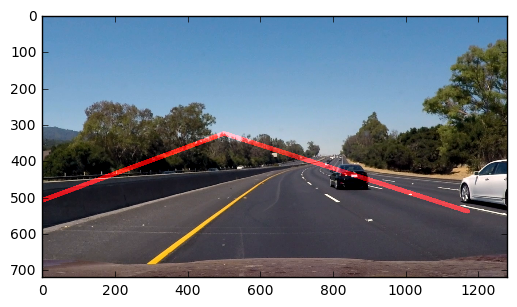

In [26]:
challenge_output = 'extra.mp4'
clip2 = VideoFileClip('challenge.mp4')
challenge_clip = clip2.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

In [27]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))